# Business Analytics Model Notebook
This notebook is designed to analyze and build a business analytics model. It includes data cleaning, exploratory data analysis, model development, and evaluation using multiple machine learning models. The notebook aims to identify the best-performing model based on evaluation metrics.

## Step 1: Import Required Libraries
We will import the essential libraries for data manipulation, visualization, and modeling. Each library serves a specific purpose:
- `pandas`: For data manipulation and cleaning.
- `numpy`: For numerical operations.
- `seaborn` and `matplotlib`: For data visualization.
- `sklearn`: For machine learning and evaluation.

In [2]:
# Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Display plots inline
%matplotlib inline

## Step 2: Load and Review Dataset
We will load the dataset and perform an initial review to understand its structure and content.

In [3]:
# Step 2: Load and Review Dataset
file_path = r"C:\Users\admin\Downloads\Module 4\cleaned_employee_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 Rows of the Dataset:")
print(df.head())

# Check the structure of the dataset
print("\nDataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

First 5 Rows of the Dataset:
                Employee ID      Date of Joining  Gender Company Type  \
0  fffe32003000360033003200  2008-09-30 00:00:00  Female      Service   
1      fffe3700360033003500  2008-11-30 00:00:00    Male      Service   
2  fffe31003300320037003900  2008-03-10 00:00:00  Female      Product   
3  fffe32003400380032003900  2008-11-03 00:00:00    Male      Service   
4  fffe31003900340031003600  2008-07-24 00:00:00  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                    3                   3.8   
1                 Yes            1                    2                   5.0   
2                 Yes            2                    4                   5.8   
3                 Yes            1                    1                   2.6   
4                  No            3                    7                   6.9   

   Burn Rate  
0       0.16  
1       0.36  


## Step 3: Data Cleaning
Data cleaning involves handling missing values, duplicates, and outliers to ensure a high-quality dataset.

In [ ]:
# Step 3: Data Cleaning
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Check for outliers using z-score (threshold > 3)
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
outliers = (z_scores > 3).any(axis=1)
print(f"\nNumber of Outliers: {outliers.sum()}")
df = df[~outliers]


Missing Values Count:
Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


TypeError: Could not convert ['fffe32003000360033003200fffe3700360033003500fffe31003300320037003900fffe32003400380032003900fffe31003900340031003600fffe3300350037003500fffe33003300340039003100fffe32003600320037003400fffe32003200300034003700fffe31003600320030003200fffe33003100330032003700fffe3400310035003800fffe32003100300030003700fffe31003800330032003500fffe33003100330036003300fffe31003700350033003100fffe33003200360037003000fffe31003500350030003400fffe31003000380035003800fffe3300350037003200fffe31003300360039003000fffe32003700370038003300fffe31003800390035003300fffe3700370035003600fffe3700300033003500fffe3700370038003000fffe3200340036003400fffe3600330034003600fffe31003600310031003600fffe3400310034003500fffe32003300340037003400fffe3500380031003000fffe32003400340039003400fffe31003500310034003800fffe32003700310030003800fffe32003800300036003300fffe390036003000fffe32003700390039003300fffe32003500390036003500fffe33003400390030003300fffe3200350030003300fffe3800360036003400fffe33003200380030003900fffe31003800370038003900fffe31003700330031003000fffe31003500330034003700fffe32003300380035003700fffe3500320032003000fffe3900300031003500fffe32003700300034003600fffe31003500390030003200fffe31003500360032003800fffe31003300360038003700fffe32003100320039003700fffe31003200340033003100fffe33003100340034003900fffe32003100340032003800fffe380030003100fffe3900310031003800fffe3200390030003200fffe3800370031003300fffe3300320030003200fffe33003200310034003500fffe32003200310030003200fffe3300300031003100fffe33003300310030003900fffe31003200340034003500fffe32003400320036003200fffe3600330031003200fffe31003300330034003700fffe3600330032003400fffe3500300037003900fffe33003400360037003500fffe32003500310039003700fffe32003600370032003500fffe3200350037003200fffe3800390036003200fffe3400390032003600fffe33003300360032003700fffe32003600360039003700fffe3200360031003700fffe33003300350036003100fffe31003600360039003900fffe31003500340038003100fffe32003400320034003800fffe31003300310036003300fffe33003100300031003200fffe31003300310037003900fffe3300300036003900fffe3300360039003000fffe3500340030003800fffe3800390038003000fffe31003500310038003800fffe340035003800fffe31003700300036003800fffe32003900320033003900fffe380031003300fffe33003200330030003500fffe33003300390037003700fffe31003500380034003100fffe32003500370036003100fffe33003200300033003500fffe32003500370037003600fffe32003400380030003100fffe32003800330033003400fffe32003500360037003200fffe31003700350033003000fffe3900300032003700fffe3400320031003800fffe3300360035003600fffe31003900360033003300fffe32003800300036003600fffe31003900310039003200fffe3400390037003700fffe31003600300039003700fffe33003100380034003500fffe3800380039003400fffe31003500390038003000fffe3600310036003700fffe3800390030003800fffe3300390033003100fffe3900330037003500fffe31003400350030003200fffe3300360038003700fffe32003400390034003500fffe33003100300035003600fffe31003900380032003800fffe3900340036003300fffe31003900300036003900fffe31003600300030003000fffe390031003100fffe31003300380039003700fffe32003700390032003000fffe32003000300035003100fffe33003400340033003100fffe32003200360039003000fffe3900380037003500fffe31003300380033003700fffe33003000340037003600fffe32003600370033003700fffe3600320032003900fffe31003100360037003000fffe3400330035003800fffe3600380039003200fffe31003700330032003400fffe32003900320030003300fffe32003600370036003700fffe3500320039003100fffe33003400300034003600fffe3400350037003000fffe32003800370034003800fffe31003500390039003000fffe31003300330030003000fffe31003100370035003400fffe3100360037003800fffe3500390039003700fffe33003400350037003000fffe3300340033003900fffe32003800380038003500fffe31003700380039003600fffe32003600360038003400fffe31003000340032003700fffe3300380034003600fffe32003200320034003000fffe31003100380033003600fffe32003800310031003100fffe31003800370033003800fffe32003000330031003700fffe32003500340034003400fffe33003300310035003800fffe32003400360033003800fffe31003000300032003600fffe31003700330032003300fffe3900370030003600fffe3900360033003500fffe31003100350037003700fffe31003400350033003700fffe3100390034003700fffe31003700380032003400fffe31003300310035003400fffe33003400390035003500fffe31003600300032003500fffe3700370031003700fffe31003400340031003500fffe32003300340038003400fffe31003700310033003400fffe32003000330033003800fffe31003400380038003100fffe3400350037003400fffe31003000360035003700fffe33003400330035003900fffe3900350033003600fffe31003000300037003800fffe3900300031003000fffe33003100360037003700fffe3900350039003000fffe31003200370030003900fffe3800380035003500fffe32003000310034003600fffe31003700380033003600fffe33003400360035003000fffe31003200370036003300fffe32003000320030003900fffe31003800390034003900fffe32003800370033003600fffe33003000360035003300fffe31003100370037003500fffe32003700320037003100fffe31003800300037003300fffe32003700370030003400fffe31003400310039003400fffe3300370039003900fffe3400350038003300fffe31003900300039003700fffe32003400330033003400fffe32003800310033003800fffe3700360035003600fffe32003000340039003700fffe3300350035003000fffe3800350037003300fffe31003900330038003200fffe3100360031003700fffe31003600380030003300fffe33003400360039003100fffe33003000300033003700fffe3400370031003000fffe32003800370039003300fffe3400310036003300fffe31003100380031003200fffe3200390038003900fffe32003000370031003000fffe31003500390038003500fffe31003400340032003700fffe33003000340033003600fffe31003500340030003900fffe3800310033003200fffe31003200370033003800fffe33003200300031003300fffe32003100380035003300fffe3400340035003800fffe33003200380031003800fffe33003200330034003200fffe33003000310038003300fffe32003200390032003500fffe32003600360035003100fffe360030003700fffe31003200320037003900fffe3100320034003200fffe3600390030003500fffe32003100360038003100fffe32003800370033003900fffe31003100300038003900fffe310030003300fffe3600350036003900fffe32003200330038003600fffe3700340032003100fffe32003100390036003700fffe31003600360035003400fffe31003800360038003300fffe32003800330034003000fffe32003400300033003500fffe31003400390032003000fffe32003600300034003200fffe32003200380037003700fffe31003500330036003700fffe32003900310031003300fffe33003100310035003200fffe3300330034003200fffe3400360032003100fffe3700390038003900fffe32003700330036003100fffe3100310034003000fffe31003400370037003600fffe31003500330036003100fffe3200340032003800fffe32003500340036003900fffe3500340030003100fffe31003100320034003200fffe32003500330030003600fffe32003800370038003100fffe33003400390038003700fffe31003600370032003800fffe32003400350038003000fffe31003100350037003800fffe32003700310038003500fffe32003400390031003600fffe3500350032003300fffe3300360036003400fffe33003200380032003700fffe33003300320037003500fffe32003200330034003200fffe31003000340033003200fffe390035003100fffe3500300035003400fffe32003500370035003000fffe31003700340033003400fffe33003400340030003900fffe33003100320037003700fffe3900300039003300fffe31003600330039003300fffe3500370038003800fffe3200340033003500fffe31003700370036003700fffe3200350035003100fffe33003100310030003900fffe33003000370038003600fffe31003900330039003900fffe31003500380036003900fffe3400310039003500fffe33003100350036003000fffe340039003600fffe3700330038003100fffe3700300032003000fffe31003500390034003500fffe3200370032003800fffe3200370037003600fffe32003900350036003500fffe33003000380035003300fffe31003800320039003800fffe31003300310039003200fffe32003800340031003500fffe31003400320038003900fffe32003700300037003600fffe32003600380034003200fffe31003800360034003800fffe31003500340036003400fffe3100350036003700fffe31003900380039003900fffe31003300390037003400fffe32003500380038003000fffe33003100340038003200fffe32003600340033003900fffe32003500350030003000fffe31003700300039003800fffe32003400350032003300fffe32003500350031003700fffe3700330033003700fffe32003300360036003800fffe31003100380035003700fffe32003700330031003200fffe32003300390039003100fffe32003000340034003200fffe32003400310034003700fffe32003100320031003200fffe31003900340030003200fffe3800360038003500fffe3400380036003000fffe3900390035003300fffe31003300360033003500fffe31003000350034003500fffe3900360034003800fffe31003200360030003700fffe3600350037003000fffe31003700330038003800fffe31003500390038003400fffe3300360037003100fffe32003500350032003000fffe33003300350035003900fffe31003700330038003900fffe32003500310036003900fffe33003200390034003100fffe32003000360039003500fffe3200370034003700fffe32003600310032003100fffe31003800310037003600fffe3300310034003800fffe31003500390033003400fffe3700370039003400fffe31003200350033003500fffe3600330034003100fffe3800350034003900fffe31003800360032003600fffe31003400390031003500fffe32003600360038003900fffe3500340031003000fffe32003700350037003900fffe3500340033003400fffe3100350038003300fffe3200320039003200fffe3100390036003900fffe32003900340036003400fffe3200380030003000fffe3100380034003500fffe33003200310037003800fffe31003700310036003200fffe33003100370039003200fffe32003600320034003600fffe32003000300034003100fffe31003700370038003300fffe3700360038003900fffe33003400330038003800fffe31003900350036003300fffe33003400330036003300fffe31003100360033003300fffe31003000340030003900fffe3400300032003700fffe3800390038003100fffe32003700320030003400fffe3300380031003800fffe32003600360038003300fffe31003600320037003300fffe31003800320037003400fffe32003700330034003900fffe31003200310032003900fffe32003500340038003800fffe32003800370032003300fffe3100380031003800fffe31003100340036003300fffe32003800360035003900fffe33003400370039003500fffe31003100310039003000fffe31003700370039003900fffe32003500390035003800fffe33003000350037003300fffe3500380033003400fffe32003100300032003900fffe33003300360038003400fffe3600300031003100fffe3200390033003200fffe31003000300038003500fffe31003300380036003400fffe31003800310031003800fffe32003300320031003800fffe31003500380038003100fffe3100360039003600fffe31003100360030003000fffe32003000300032003600fffe31003300320037003300fffe31003300340033003900fffe3900300030003000fffe31003500370039003900fffe31003200390033003300fffe33003400370035003500fffe33003100310033003900fffe31003400380030003200fffe31003500350037003400fffe31003200330039003800fffe31003500380030003300fffe33003400310032003100fffe32003400320030003700fffe33003100330031003100fffe32003000360038003100fffe32003200380032003800fffe33003300390038003100fffe3100340039003700fffe32003500330035003800fffe32003700340037003100fffe3200370031003400fffe32003500320036003800fffe32003800350038003400fffe32003600330031003300fffe3900370038003000fffe33003100300030003300fffe3300320036003700fffe3300330037003700fffe3200390036003400fffe31003400300030003200fffe3200360035003800fffe31003300370037003200fffe31003600320033003200fffe31003800380033003700fffe32003800380038003000fffe3100350038003500fffe32003900330039003500fffe32003300380032003300fffe31003900330036003000fffe32003300390033003400fffe32003000340030003800fffe32003600330037003100fffe32003700300032003200fffe3600390032003600fffe31003100320039003300fffe31003600340037003100fffe32003900390038003200fffe3100370031003500fffe31003500320032003000fffe32003900350036003600fffe32003800320038003800fffe33003400370037003000fffe31003300370034003400fffe3200350034003000fffe31003700340039003100fffe31003400370039003700fffe33003300350035003700fffe3200390038003500fffe32003300310033003700fffe33003200310034003000fffe3500300038003300fffe32003400390036003200fffe31003600330031003500fffe32003200390038003700fffe33003000390039003100fffe33003000300037003700fffe32003000390039003700fffe32003600380038003500fffe3900340032003800fffe3700320030003100fffe31003000380032003000fffe32003000380034003700fffe32003700390037003600fffe31003900350030003000fffe31003200360035003400fffe33003000390039003200fffe32003700300030003900fffe31003000300036003700fffe31003700390032003500fffe31003900370032003900fffe31003900300038003900fffe3600320033003700fffe31003500350032003200fffe3300390031003300fffe32003300380036003600fffe31003800320036003900fffe32003600300031003000fffe33003300350037003700fffe31003300350033003700fffe33003200360038003800fffe3200320031003100fffe3400320036003800fffe370038003800fffe360030003400fffe3100310038003900fffe33003200300031003200fffe32003700360039003600fffe33003100340030003200fffe320031003200fffe33003400310032003900fffe3600390039003600fffe32003400390032003800fffe3500350033003800fffe3100330032003200fffe32003600390032003600fffe3900300038003900fffe33003100330034003900fffe32003700350039003200fffe31003600360031003100fffe31003500320031003500fffe32003700300034003200fffe33003000310031003200fffe33003000370030003400fffe33003100330038003200fffe33003100390039003500fffe33003000300037003100fffe31003100310031003600fffe31003500320038003900fffe3800310039003600fffe3500380033003500fffe31003700350034003000fffe3600340035003000fffe3400310037003400fffe32003400320034003600fffe32003200300030003000fffe32003600340039003400fffe32003200340031003200fffe32003100320031003400fffe31003000380033003800fffe32003500360034003500fffe3500340037003800fffe3500300039003500fffe31003700310033003300fffe33003100320035003900fffe31003900350039003800fffe31003400300032003600fffe3300340034003400fffe3600340032003600fffe32003900320034003800fffe3400310031003400fffe31003400350037003800fffe32003600310038003600fffe3500340033003000fffe31003000340032003400fffe32003700390036003800fffe32003200340035003000fffe31003900370030003900fffe32003000300039003400fffe31003200340036003200fffe3700390033003200fffe31003300340030003800fffe32003300380032003700fffe3500330032003400fffe32003600370038003300fffe32003400350036003900fffe32003100300035003300fffe3100340030003400fffe32003400360037003100fffe31003200310034003800fffe3600390034003300fffe31003600340035003400fffe32003700320039003600fffe31003600350038003500fffe31003100370037003800fffe31003800340039003300fffe3200340030003100fffe3300330030003900fffe31003800390039003900fffe32003600330038003300fffe3800350031003400fffe32003200390036003000fffe31003400300037003700fffe31003700330037003300fffe3600380037003400fffe31003600300033003900fffe31003300320039003100fffe31003300360031003500fffe32003400300038003500fffe33003200360037003700fffe31003600320032003000fffe33003300320032003800fffe32003400370037003600fffe32003600350037003200fffe33003400380032003600fffe31003800340033003300fffe3300360038003800fffe3500320034003200fffe31003300370031003500fffe33003400300033003300fffe31003900380033003500fffe32003200310036003200fffe31003200360030003000fffe32003200350037003700fffe32003400330032003600fffe32003100320037003300fffe3100390031003700fffe31003000320037003900fffe32003800370037003400fffe33003300300038003600fffe3300330031003400fffe32003200340031003300fffe31003100380030003900fffe3100380031003700fffe31003200340031003000fffe32003300340032003800fffe3100310031003000fffe32003400350032003100fffe32003600340030003300fffe32003800320035003000fffe33003200340036003500fffe32003700360031003800fffe32003300320038003700fffe3100300032003800fffe3900350033003300fffe32003600330030003800fffe3700380032003600fffe31003400300031003000fffe3500340038003500fffe3500350033003200fffe31003400360038003100fffe3800310030003700fffe3700360037003600fffe32003800380039003400fffe32003600380039003300fffe31003800380034003600fffe3700370036003600fffe31003000380032003100fffe32003900340035003200fffe3300300039003100fffe32003100360035003500fffe32003400300030003600fffe3400330039003800fffe33003000330037003300fffe31003300340030003000fffe32003600350032003600fffe32003100390033003100fffe350035003400fffe31003100320037003300fffe3100300035003000fffe33003100380032003700fffe32003700360030003700fffe350030003300fffe33003400360036003500fffe31003300300039003700fffe3500350032003200fffe3400350032003100fffe33003400330031003000fffe33003100370039003400fffe31003000310031003100fffe32003700370033003400fffe31003800340036003300fffe3200350037003100fffe3400360038003800fffe32003100390034003400fffe31003900330033003000fffe32003200390036003400fffe32003600360038003500fffe32003600360038003600fffe32003500370032003300fffe32003900310032003700fffe32003100340036003100fffe3600320034003600fffe33003200360032003100fffe31003200320032003300fffe31003300320035003400fffe33003400360037003600fffe3900370034003600fffe31003400360036003700fffe31003500350032003600fffe31003600350031003500fffe3100330034003300fffe31003700320034003100fffe32003100320039003500fffe31003300300032003000fffe3700330030003400fffe31003000390030003100fffe33003000360030003800fffe32003000300033003600fffe31003800320034003600fffe33003200390032003600fffe32003300370036003300fffe31003200380039003700fffe33003200300036003100fffe32003700300034003900fffe32003800300031003800fffe31003900350033003100fffe31003000310031003300fffe3800320033003500fffe3900320035003300fffe33003400300030003400fffe3500330030003300fffe3100330039003500fffe3900340037003700fffe31003900340030003400fffe32003100300031003500fffe3200380032003600fffe32003800340032003700fffe3200360035003900fffe32003900380031003300fffe32003000350037003100fffe31003800350036003600fffe32003300360038003500fffe3200380032003200fffe31003600300032003900fffe3400350030003400fffe31003600370037003800fffe3200330035003500fffe33003100340037003500fffe32003600300036003000fffe3700320038003500fffe33003000360030003500fffe31003900310036003400fffe32003800360033003100fffe3800360039003600fffe3800390032003600fffe33003400390034003900fffe3500390034003500fffe32003900310035003800fffe33003100300033003300fffe33003400390035003200fffe3500350031003000fffe31003300330037003000fffe32003600330036003400fffe32003500390038003600fffe3400300035003600fffe33003400300036003500fffe33003300310031003000fffe33003000380037003600fffe3800300034003000fffe32003000390038003100fffe32003100320039003800fffe33003100330031003700fffe32003000350034003300fffe32003000350030003000fffe33003000350030003900fffe3300370035003300fffe3500360038003900fffe31003800320031003100fffe31003600390034003100fffe31003700360033003400fffe31003900370037003900fffe31003500350037003600fffe33003300350034003900fffe32003200310032003900fffe3800370037003800fffe32003700390033003900fffe31003800320039003500fffe32003600310038003300fffe3600310035003300fffe3400330035003600fffe3100320034003600fffe32003000370037003700fffe3100330037003100fffe3900340033003600fffe33003200310037003500fffe31003000370039003500fffe31003400310039003300fffe31003700380039003700fffe3600350035003400fffe31003600310030003800fffe31003700360035003500fffe31003400360035003900fffe31003600320036003000fffe31003700350034003500fffe31003800300034003400fffe32003200380038003100fffe32003200320037003000fffe3200380032003400fffe3900370030003100fffe32003600300034003600fffe33003300340033003400fffe3100310034003500fffe3400350038003100fffe32003300330032003200fffe3800320036003300fffe3600390033003900fffe31003100310031003800fffe31003800320031003000fffe3400380037003700fffe32003300380032003100fffe33003400330030003700fffe32003200390030003400fffe31003400390035003900fffe31003900320038003700fffe32003900320032003900fffe32003400390031003300fffe32003000350039003900fffe32003100310031003300fffe32003700360031003700fffe32003100300034003400fffe31003900390031003000fffe31003300370033003800fffe32003300330033003100fffe32003300350038003200fffe3600320039003200fffe31003100350035003900fffe33003200390035003900fffe32003500380033003900fffe3700380030003000fffe32003000360032003300fffe3100330033003800fffe32003100310033003000fffe32003300370034003500fffe3900360032003200fffe3600330038003800fffe3200330039003600fffe3800300032003200fffe32003500360034003700fffe32003800370033003300fffe33003000390032003400fffe31003600340037003500fffe31003800370039003900fffe31003100340034003400fffe3900380032003600fffe3500300030003000fffe33003200380031003900fffe31003000380039003500fffe31003200380033003100fffe31003900330037003500fffe32003700380032003100fffe32003400330033003100fffe32003300360031003900fffe31003600340035003500fffe33003100310036003900fffe32003500360035003700fffe31003900330030003000fffe31003500300030003900fffe31003500310035003900fffe31003800350035003700fffe33003000350032003300fffe32003000310030003300fffe32003400340038003100fffe31003200370032003600fffe3600380039003800fffe32003400300037003700fffe3900320037003600fffe31003600320037003200fffe31003200390034003500fffe32003700340038003500fffe33003400340030003400fffe32003800370037003900fffe32003200300034003000fffe310033003900fffe33003400310033003700fffe3100310037003300fffe32003600330030003500fffe32003600380039003100fffe31003100300030003600fffe32003900300035003600fffe31003000340038003400fffe31003200380039003200fffe3800370031003900fffe3600350034003000fffe3500340031003300fffe33003200390038003600fffe32003200310035003300fffe31003800360038003200fffe32003500360033003700fffe33003300350033003500fffe3600310030003800fffe33003200330033003000fffe33003000360032003300fffe31003200330037003200fffe32003200320033003400fffe31003900330030003200fffe3200320037003000fffe31003600300038003400fffe3600320035003600fffe32003800350032003900fffe3700300037003800fffe31003100350036003800fffe3800380031003300fffe3600340039003700fffe32003700330035003000fffe32003900380030003400fffe3800390038003600fffe32003900330030003200fffe32003200330038003100fffe31003700320030003200fffe32003200380036003600fffe33003200300039003600fffe33003400390039003700fffe33003300350039003800fffe31003700340034003600fffe32003100380037003900fffe31003600340031003100fffe3900360037003300fffe3200390037003100fffe3500320036003400fffe32003400380030003300fffe380035003000fffe32003100360036003000fffe31003200370031003900fffe32003100330032003400fffe31003900310037003900fffe31003900330036003600fffe3100380034003200fffe3400300038003500fffe31003800340030003100fffe33003200380032003600fffe32003800340033003800fffe33003300380038003700fffe3600380032003400fffe3300300030003900fffe32003300300039003400fffe3100370032003700fffe3200340032003100fffe32003000300039003300fffe3700370035003700fffe3700300038003900fffe31003400300038003900fffe31003800350034003000fffe33003400300030003200fffe32003900320039003300fffe31003200320033003300fffe33003200370030003700fffe31003400320038003500fffe32003600300035003300fffe32003500370034003000fffe31003500390030003600fffe3300320033003200fffe3300350030003900fffe3600380036003800fffe3700360031003900fffe3700330037003800fffe32003900330034003000fffe3600390038003400fffe33003400320035003300fffe32003700300030003700fffe33003200370031003100fffe3500370032003300fffe32003100330032003100fffe32003900310039003900fffe32003900350038003800fffe3700350036003600fffe31003800330035003000fffe31003700310033003800fffe32003200320033003100fffe31003100350035003700fffe33003400350038003700fffe31003800300033003700fffe33003100330032003200fffe32003600360035003900fffe32003200360035003400fffe31003700340035003000fffe3300390030003300fffe33003000380038003700fffe32003100370031003800fffe33003100350030003400fffe32003800380037003400fffe32003600310034003300fffe31003900370037003400fffe32003300370033003900fffe31003100310037003300fffe31003700350036003000fffe3100390039003000fffe33003000350031003600fffe31003500360037003700fffe31003500330039003300fffe32003100340039003600fffe31003300370036003900fffe3600310032003200fffe31003000380031003400fffe33003200390039003700fffe3900340037003500fffe32003400300038003300fffe31003500330036003400fffe31003100320036003000fffe33003400300036003300fffe33003200310039003700fffe32003800310035003900fffe32003100380035003900fffe31003400360032003600fffe3500340035003200fffe32003700320037003300fffe32003900340037003000fffe31003400320034003100fffe32003000350031003400fffe32003900340030003800fffe31003300370038003500fffe33003000340037003000fffe32003500330035003300fffe33003400380032003000fffe33003000320031003400fffe3100330037003200fffe33003400360031003200fffe3100370030003900fffe3900380030003100fffe32003800380034003100fffe32003800360032003200fffe32003000370030003600fffe31003900350035003900fffe31003400340035003300fffe33003000360039003300fffe33003100340035003000fffe32003300340031003700fffe31003600330033003100fffe3200350039003200fffe3700380030003300fffe3600370038003000fffe3700310034003100fffe31003600360031003500fffe3900390036003300fffe33003200310033003900fffe32003700350030003600fffe31003300300034003200fffe32003300380038003100fffe32003500390030003900fffe31003900320035003000fffe32003700330034003500fffe32003100360038003800fffe3500340035003900fffe32003300330031003100fffe31003000320039003800fffe32003000390034003000fffe3700340037003300fffe31003300300037003400fffe32003600350036003600fffe3800370034003400fffe3500340032003100fffe32003600350038003900fffe32003200310035003500fffe3800390031003600fffe32003400370033003800fffe31003900310033003000fffe32003500370030003400fffe32003300390037003400fffe31003800350037003600fffe32003200360036003500fffe32003400330035003000fffe3400330034003400fffe31003500320034003900fffe380039003400fffe32003500360031003100fffe33003300310034003500fffe31003900360032003600fffe32003700370038003600fffe3500370031003200fffe32003700350030003100fffe33003200380035003200fffe33003000340035003400fffe31003300360033003900fffe31003900310037003500fffe33003200320035003100fffe31003000330037003200fffe33003700fffe33003100330037003400fffe31003500340034003000fffe3600320038003100fffe33003100340037003700fffe31003600360031003400fffe32003400340033003000fffe32003400370034003300fffe32003300390038003900fffe3100310030003300fffe31003700370039003300fffe32003800330037003400fffe32003700370034003700fffe31003600380032003300fffe3200320035003900fffe35003200fffe31003400380030003400fffe31003500370035003200fffe31003300310033003200fffe3400350037003500fffe32003300350035003500fffe3400390038003100fffe32003400390036003500fffe33003000350035003100fffe31003000380039003800fffe31003000310036003100fffe33003200360033003500fffe3300300032003900fffe32003400370035003400fffe32003300330032003100fffe31003600320039003500fffe32003600390030003400fffe31003400340037003600fffe3700300035003300fffe32003600300034003400fffe31003900360033003900fffe3600300034003600fffe31003600330038003800fffe31003700390035003000fffe3100390031003000fffe32003900370033003300fffe32003100380038003400fffe32003400340030003300fffe3300390037003700fffe31003700320034003600fffe31003300390033003500fffe31003400320034003600fffe33003000310030003300fffe31003700340037003200fffe32003400340031003100fffe3900300034003900fffe3800300035003800fffe31003500300038003200fffe31003400330036003900fffe31003700340035003100fffe32003100320037003600fffe32003800320032003400fffe32003900350034003500fffe3900310030003700fffe31003700330039003300fffe32003200320032003500fffe31003900300035003300fffe31003500360037003300fffe32003200300037003300fffe3100330036003400fffe32003300390036003400fffe32003700370031003700fffe33003300390031003700fffe3800350036003600fffe31003500380034003400fffe32003100390034003700fffe3800310039003400fffe32003200350033003500fffe31003400310033003600fffe32003600380033003700fffe370035003800fffe31003700350035003200fffe32003600390035003600fffe31003300330032003300fffe32003800330034003900fffe31003400300031003300fffe31003900320033003600fffe32003300360033003800fffe31003700350034003300fffe3800320037003300fffe31003300370035003300fffe32003600300034003700fffe32003300390036003500fffe3600300039003700fffe33003400380035003400fffe32003300340034003000fffe32003000320033003600fffe3600300032003600fffe31003900360037003000fffe31003800330036003200fffe32003500380038003900fffe3100320034003700fffe3500350034003000fffe3200350036003600fffe3300330031003700fffe3900330036003100fffe31003700380030003500fffe33003400310039003600fffe32003400390034003700fffe31003900310039003900fffe31003500350034003900fffe32003900370034003500fffe32003400350032003200fffe32003400370035003600fffe31003200350030003500fffe33003400320035003100fffe31003500300036003500fffe32003100350032003500fffe32003000390037003200fffe39003100fffe32003000360037003600fffe32003100350035003500fffe31003600370035003800fffe32003300320036003200fffe3100310035003900fffe31003100340030003100fffe31003300300037003100fffe3400310039003000fffe3900390034003400fffe32003100310035003500fffe33003200360036003500fffe330037003000fffe31003100340035003500fffe32003400320035003600fffe3900320039003500fffe31003400330038003700fffe31003600330039003700fffe32003100370036003300fffe31003000370033003300fffe31003800310037003200fffe31003700360035003300fffe31003000320039003500fffe3400350037003600fffe33003100380032003900fffe31003100360037003800fffe31003900360038003200fffe33003300390032003900fffe31003700300033003500fffe3500350038003100fffe31003700380033003800fffe31003900340033003200fffe3200330038003700fffe31003800330033003200fffe3600360036003100fffe3600300037003900fffe31003900370031003000fffe39003700fffe3600360031003700fffe31003300330030003200fffe32003100370031003200fffe31003600340031003500fffe33003200380035003800fffe32003000390036003700fffe32003400330031003400fffe31003300330037003600fffe32003600380039003400fffe32003000380037003600fffe3600390039003900fffe3700300038003300fffe32003200390036003500fffe32003500350030003400fffe32003900370037003800fffe3700380033003000fffe31003900380032003400fffe3900370030003400fffe32003000310039003100fffe31003200330031003000fffe33003000380033003700fffe33003300380037003500fffe31003600360037003500fffe33003200380037003400fffe31003400350039003500fffe310032003300fffe3500390033003800fffe33003300390032003300fffe33003300370032003200fffe32003600380035003200fffe33003100330038003500fffe3800360032003000fffe3300330033003100fffe33003200320030003500fffe31003100320032003200fffe3900370035003700fffe3900310032003600fffe3600350037003300fffe31003800370034003100fffe31003900360035003000fffe3300360036003800fffe3400300034003000fffe32003500390032003800fffe32003700350035003700fffe360037003900fffe3200380038003600fffe31003800340030003200fffe3100330031003900fffe33003200360039003500fffe32003500380031003700fffe31003100380037003200fffe3500320035003800fffe33003100370039003000fffe3900340039003400fffe31003800340038003900fffe32003600360037003100fffe3800330030003500fffe31003100390034003400fffe320034003800fffe3300370037003200fffe3500330036003000fffe31003700340038003400fffe32003200340036003300fffe370030003600fffe31003900300035003000fffe3600360033003800fffe31003700380031003600fffe32003700320032003200fffe32003000360034003400fffe32003700330038003900fffe31003400380034003100fffe31003300350035003000fffe31003200320036003900fffe31003400380033003800fffe3800380030003900fffe31003000340033003600fffe32003600390031003000fffe32003900360035003000fffe31003600370037003700fffe3100340038003300fffe31003800330032003600fffe3300320031003800fffe32003600370031003600fffe3800390035003500fffe33003100380036003800fffe32003900350039003200fffe31003300370032003300fffe32003800350032003800fffe32003000370034003500fffe31003300350038003000fffe32003800330032003100fffe3500320035003000fffe31003100320033003100fffe31003200350036003700fffe3300320035003400fffe3200330030003500fffe32003600300033003200fffe32003200380039003500fffe3800310034003900fffe32003700340035003400fffe3400370039003300fffe3300320031003200fffe31003700320033003700fffe380033003900fffe3500380035003700fffe33003200300037003600fffe33003100360039003600fffe3700380035003200fffe32003400310039003100fffe32003600370037003400fffe3300350031003400fffe3400390030003200fffe3700300039003800fffe32003700330035003700fffe32003500350030003700fffe32003400330031003600fffe31003500300035003400fffe31003400370036003900fffe32003400390038003800fffe32003900370039003200fffe32003500380030003700fffe3900340030003300fffe31003100310032003400fffe32003400300031003400fffe32003500390031003000fffe31003600320038003400fffe31003900330033003800fffe32003900360033003300fffe33003000380039003500fffe32003100320033003000fffe3400340034003200fffe3100370037003600fffe32003300390034003200fffe32003200320033003900fffe33003300380039003400fffe31003200370037003800fffe3900330031003300fffe3200360038003300fffe32003500300030003300fffe32003700300037003300fffe31003200360031003400fffe32003800340039003500fffe3800320037003100fffe31003700310032003100fffe33003000350039003100fffe31003900360034003400fffe31003000340033003400fffe3600330039003200fffe3700360035003900fffe3500340031003100fffe3800370033003700fffe33003300310034003400fffe31003800330035003900fffe340037003000fffe33003100310030003600fffe31003900340037003400fffe32003000380035003000fffe32003400320031003500fffe31003400340032003400fffe33003200390033003500fffe31003700380030003400fffe33003400330038003300fffe31003200360032003200fffe33003000390038003900fffe33003200350036003000fffe32003000370038003800fffe32003200360032003000fffe3900390038003200fffe3500340038003000fffe3100350031003400fffe3900350034003200fffe33003000370032003000fffe31003200370034003300fffe33003100360032003500fffe3200390030003700fffe33003300340038003500fffe32003300350032003600fffe33003300370034003900fffe3800360035003800fffe3700370033003000fffe32003200340032003800fffe31003600370037003900fffe32003100300033003800fffe32003000300034003900fffe31003500360039003200fffe31003800320031003200fffe31003000310039003200fffe31003600360035003900fffe31003200350030003000fffe3100320032003200fffe3200320031003300fffe32003700320034003000fffe3100310033003600fffe32003800370034003400fffe33003000390033003200fffe32003100330030003500fffe32003700350038003600fffe32003400340030003400fffe31003200330038003300fffe3400340030003800fffe32003400330032003400fffe3600330036003400fffe31003500370035003100fffe31003500310037003500fffe33003200380039003000fffe32003000310031003000fffe32003000320038003200fffe32003400300030003900fffe31003000350035003500fffe3100340038003600fffe32003100350032003400fffe32003300390034003700fffe31003900330032003000fffe31003900340038003800fffe310030003500fffe3200310030003000fffe31003500300039003300fffe3700340037003000fffe3900350036003200fffe31003500340031003400fffe32003300360038003400fffe3800300032003500fffe3200340033003000fffe31003400370038003200fffe31003400300035003300fffe32003800320030003400fffe31003000390030003800fffe31003000350039003200fffe3100300031003800fffe3400310030003700fffe32003600320035003400fffe31003700390030003600fffe31003300370033003700fffe31003000300037003100fffe32003400380035003500fffe3500300032003000fffe32003300340033003200fffe3300350030003100fffe31003400320034003400fffe3100330032003700fffe32003100300037003900fffe3100340033003600fffe32003700380031003400fffe31003600300036003200fffe3200320039003100fffe31003800360030003900fffe33003300330036003100fffe33003100350036003200fffe3900300031003900fffe360039003700fffe31003300390038003600fffe32003700340030003600fffe32003100330039003700fffe3100370037003000fffe31003100330030003300fffe33003300370039003200fffe32003900340034003500fffe32003100360035003300fffe32003200360035003600fffe31003800330038003000fffe3600340033003700fffe32003000310038003000fffe3200310037003500fffe32003500300035003400fffe3700390034003500fffe33003000390030003000fffe32003600320033003500fffe31003700330039003700fffe32003100300030003100fffe32003700350033003600fffe32003800370039003800fffe33003400350033003800fffe33003000380036003900fffe33003300310036003700fffe33003100360038003500fffe32003500370037003200fffe32003200320032003900fffe33003100380035003500fffe31003100380030003000fffe31003000370030003100fffe3300330034003700fffe32003200310037003500fffe32003800320031003600fffe3100310032003700fffe31003800370038003700fffe33003100380030003100fffe32003800360030003300fffe31003100340034003800fffe31003900340030003300fffe33003100310035003000fffe32003500380036003900fffe31003400360033003000fffe33003300330038003900fffe31003500360037003800fffe32003000330035003200fffe380039003200fffe31003900380034003200fffe31003200300037003900fffe310034003200fffe360036003000fffe3900350038003000fffe3200360039003900fffe3800310031003600fffe32003100330039003200fffe31003800350033003700fffe33003300360035003800fffe3400350031003300fffe32003200390038003800fffe31003700350030003800fffe32003900310036003000fffe32003200300039003000fffe3100350038003700fffe31003600320035003500fffe31003700340034003200fffe3300370032003000fffe3100390038003700fffe3300380033003800fffe3400360032003700fffe3900390031003400fffe3500370030003000fffe31003500370030003200fffe3900380033003800fffe32003300310030003300fffe3900320035003200fffe3600320031003800fffe33003100350036003300fffe31003200390032003100fffe31003900330033003900fffe32003700340033003900fffe32003400320035003400fffe31003900350039003300fffe33003300330039003900fffe31003300350037003400fffe32003700320035003400fffe3400350039003100fffe31003100380037003800fffe32003700380031003300fffe32003400330035003500fffe33003400300035003400fffe360032003000fffe31003800360032003100fffe32003200370038003900fffe32003300350039003000fffe31003000300039003500fffe31003000390038003600fffe3800310036003500fffe33003200300032003100fffe3800310031003300fffe3100300034003100fffe31003500340039003400fffe3500300031003200fffe31003300390036003500fffe3700380038003400fffe31003800350038003100fffe31003700380038003100fffe3800340034003500fffe31003300360039003300fffe33003300310035003400fffe31003500310030003900fffe31003800330037003700fffe32003600310038003100fffe31003300340039003300fffe31003700360033003200fffe32003500340038003300fffe3800370035003400fffe31003800370039003000fffe3200320033003200fffe31003500310031003900fffe31003100310032003800fffe370031003100fffe32003100330038003200fffe3300380031003400fffe3100330034003800fffe32003400360039003600fffe32003800340030003600fffe32003400310030003800fffe3300360034003300fffe31003400370037003400fffe32003800330035003100fffe33003400340036003400fffe350030003500fffe3600360033003700fffe31003800390036003900fffe3800360036003200fffe33003300360037003100fffe360034003200fffe31003300330034003900fffe33003400350030003300fffe31003700300031003200fffe33003100300035003100fffe3300340032003600fffe3900340037003200fffe31003900340037003800fffe31003700340039003500fffe32003400310034003000fffe33003000380037003800fffe32003800350038003100fffe31003600340032003200fffe3800390031003100fffe33003100370032003900fffe31003900300030003200fffe31003900350039003200fffe31003900330037003300fffe32003900300031003900fffe32003100320032003000fffe32003900340035003100fffe31003600370039003800fffe31003000300034003100fffe31003300370036003000fffe31003400370035003500fffe31003200380032003800fffe33003300360037003900fffe31003300350033003800fffe31003200390039003500fffe3800330031003200fffe32003800370037003600fffe32003100320032003100fffe33003400300032003600fffe3400370037003600fffe32003100330037003600fffe31003900370030003300fffe31003500300030003400fffe3700390037003700fffe32003800380032003600fffe32003200370035003300fffe32003300300031003100fffe31003700380036003000fffe32003300340038003100fffe3400360036003300fffe32003700370035003600fffe3400360039003700fffe3200320037003500fffe31003500380034003600fffe31003100340034003600fffe3800320030003900fffe32003400320034003400fffe31003100380038003200fffe32003100310036003600fffe33003200300039003500fffe3800350038003700fffe350031003600fffe31003900360036003300fffe31003100320035003700fffe31003700320036003900fffe31003200390030003700fffe390039003400fffe3700320034003400fffe33003100300030003200fffe31003600360034003500fffe31003800370031003700fffe32003500330034003300fffe32003400360038003600fffe320037003700fffe33003200320036003400fffe3900370035003100fffe33003400360034003900fffe320036003200fffe33003100390033003200fffe32003300320030003900fffe31003000380030003000fffe31003900300031003800fffe3400360032003400fffe32003000370031003900fffe32003400330037003800fffe31003400370034003000fffe3300390038003900fffe3300300036003000fffe31003600320038003700fffe3500300037003400fffe31003300320030003200fffe3200380034003100fffe31003100310035003600fffe33003000300035003800fffe33003000320032003100fffe33003200360038003300fffe33003000310034003700fffe32003900340035003000fffe31003500390036003300fffe3600330030003600fffe32003500360035003800fffe32003700330038003100fffe32003500340033003800fffe32003600310039003500fffe33003100310037003400fffe32003600330035003700fffe31003800340032003100fffe32003800320036003100fffe3600340039003400fffe32003400360036003800fffe32003900300033003900fffe3900380031003200fffe32003300320030003000fffe3700300039003100fffe31003400350032003900fffe3600370036003500fffe31003900380038003400fffe32003400390038003600fffe3100320033003100fffe31003500300035003700fffe31003300390039003500fffe31003100350031003800fffe32003900340037003200fffe31003000320033003400fffe32003400380032003200fffe33003100390031003500fffe33003400350038003600fffe32003300380033003400fffe31003000390034003500fffe33003100390039003400fffe33003400370036003800fffe31003000320032003300fffe31003200320038003200fffe32003500310032003900fffe31003500300039003100fffe33003400300031003000fffe33003300300036003600fffe3100330038003600fffe32003400330039003900fffe33003400320033003400fffe3500320033003700fffe3700330036003100fffe31003400380034003900fffe3200370032003400fffe3200380037003700fffe3600330033003300fffe31003400320030003500fffe32003100380039003700fffe3200310038003700fffe32003500360031003800fffe32003200380039003400fffe31003400350036003800fffe32003700370034003000fffe33003400340033003400fffe31003200300036003400fffe32003000300034003300fffe31003600390038003100fffe3100300031003000fffe32003300310038003500fffe31003100330037003300fffe32003400380035003700fffe31003400300038003500fffe33003000320031003500fffe31003100350037003900fffe31003000fffe33003200350035003800fffe31003000310034003300fffe3100320039003800fffe31003200330037003800fffe33003000320035003500fffe31003000340035003700fffe32003100300032003400fffe32003900370030003600fffe3200310034003200fffe32003000360038003400fffe32003700310036003800fffe31003200360035003700fffe33003100330034003400fffe3200350032003000fffe31003600360030003400fffe3400320039003700fffe32003500330031003500fffe32003500330032003700fffe3300350030003700fffe3700340036003600fffe31003700390039003400fffe32003300310032003100fffe3200300038003100fffe32003900300032003100fffe31003500360035003600fffe32003200300037003600fffe33003100350032003700fffe33003400320035003600fffe31003600390033003300fffe32003500390039003800fffe350033003200fffe31003100380037003300fffe37003800fffe3100330035003500fffe31003700340034003900fffe31003000310037003500fffe32003100330030003800fffe33003000370033003300fffe32003300300030003400fffe3300320037003100fffe32003900310039003100fffe32003500340037003300fffe3400310032003500fffe31003600360038003100fffe31003600330034003600fffe32003100320036003900fffe3800350030003600fffe32003300360038003200fffe31003600320034003900fffe3500390036003000fffe32003200370036003800fffe33003400310033003500fffe33003100300033003100fffe3100330032003900fffe31003100310031003000fffe31003900330039003400fffe33003400370034003500fffe3900320036003400fffe3200350034003100fffe32003700360034003300fffe31003200340033003700fffe3200370031003700fffe32003500330030003800fffe31003200360036003900fffe31003200370032003500fffe32003500390030003600fffe3200390030003100fffe32003400370032003100fffe3900390036003100fffe31003400320038003100fffe32003900360038003600fffe3700310039003800fffe31003500370032003400fffe32003700300036003900fffe3900370036003000fffe33003400320039003300fffe31003400390039003700fffe3800340038003500fffe31003300370039003300fffe32003100310030003700fffe3200390036003900fffe3600390035003900fffe3800330036003600fffe33003000320030003500fffe31003500370036003000fffe31003300350031003800fffe33003400370033003900fffe32003400330037003100fffe31003800320036003500fffe32003100390030003100fffe32003300360039003000fffe31003300300038003500fffe3200330032003500fffe3700390036003300fffe3900390032003600fffe33003300330034003300fffe370037003800fffe3500340033003700fffe32003300390032003700fffe3200360034003400fffe32003100310032003600fffe32003500300036003000fffe3200390039003300fffe3300300037003200fffe32003600300038003600fffe3100320033003700fffe3600380036003000fffe350035003500fffe3700350032003200fffe3700360033003100fffe32003500310030003500fffe31003700300031003400fffe3700370037003300fffe3400330038003100fffe31003900350032003000fffe31003400310035003400fffe3300330032003100fffe33003300360039003300fffe3700300031003100fffe33003000330035003600fffe3600380038003600fffe31003600380033003400fffe31003200320038003800fffe3700390037003600fffe32003200300035003900fffe31003700300034003400fffe32003400300034003000fffe32003100390032003900fffe32003300370032003900fffe32003500370038003500fffe32003400330036003200fffe3200350036003300fffe32003200320030003900fffe31003400320033003400fffe3500300033003800fffe3300340038003300fffe32003200370035003600fffe32003600350039003000fffe31003500330033003000fffe370034003400fffe32003600360038003700fffe32003900340035003900fffe33003300340032003800fffe33003400300039003700fffe32003300390035003100fffe32003000380034003000fffe33003000320034003900fffe31003500300034003400fffe3400320037003700fffe3100330037003000fffe33003300340036003600fffe32003200390039003600fffe32003300380032003800fffe31003500330030003300fffe33003400390033003300fffe3600310031003200fffe3300310036003100fffe3700340034003400fffe31003800360033003500fffe31003800330039003100fffe3900330031003000fffe3600340036003400fffe32003500310037003200fffe32003800330030003400fffe32003100300034003900fffe32003800370031003300fffe33003100320032003400fffe33003200330038003600fffe32003100310038003300fffe31003000340032003000fffe3200300033003400fffe32003600360032003600fffe32003500320035003100fffe3800340034003100fffe3100380036003400fffe31003300310039003500fffe33003100360036003400fffe31003900360031003400fffe32003200370036003100fffe31003900330034003500fffe32003700350039003800fffe32003000310036003300fffe3600340039003800fffe31003300350037003800fffe32003400350039003200fffe33003100370038003300fffe3800380031003100fffe32003700320033003400fffe3400380032003500fffe33003200310031003600fffe3300380031003600fffe33003400310033003400fffe31003100390036003900fffe32003100370032003700fffe33003100320039003200fffe32003800340038003800fffe32003600360033003700fffe3900fffe31003300370031003400fffe3700370039003700fffe32003900330039003200fffe31003600320038003800fffe32003400310038003500fffe3400300039003500fffe3600300031003500fffe31003200340034003900fffe32003600320031003100fffe380037003800fffe32003600310031003400fffe31003300340033003300fffe31003700320030003500fffe3700380031003600fffe3500310034003100fffe3600340039003100fffe32003900320039003900fffe3300390032003300fffe33003100310034003700fffe31003100310031003900fffe31003700370039003200fffe3100380037003700fffe33003300350033003000fffe3600360031003600fffe33003100350032003900fffe32003200320039003400fffe33003200310033003000fffe3200350031003900fffe32003700360033003800fffe31003100320034003000fffe32003400390031003000fffe31003000380030003300fffe31003600370030003000fffe32003200390033003200fffe31003300300033003500fffe31003200340038003300fffe32003700370037003400fffe31003300370037003500fffe3500350033003400fffe3100390035003200fffe31003900360036003900fffe31003300300036003900fffe3700390032003500fffe33003000390035003700fffe32003000320037003900fffe3200310038003800fffe32003400320031003200fffe3700340034003500fffe32003200320031003200fffe39003300fffe3800380039003500fffe32003300340038003800fffe33003000330037003600fffe3600320034003700fffe32003100350036003300fffe3300380036003000fffe33003300320034003600fffe32003400370037003100fffe31003300310032003600fffe33003300310032003300fffe360032003600fffe33003300390036003300fffe33003100390031003000fffe31003700320037003200fffe32003100310035003800fffe32003400380030003700fffe33003300390037003300fffe32003000370030003400fffe33003400380037003600fffe33003400370031003600fffe32003200300038003800fffe32003600300031003900fffe31003600360037003400fffe33003000380031003900fffe3300310033003300fffe3600370039003400fffe32003900340031003000fffe3300360032003300fffe33003300300032003300fffe3500330036003600fffe33003100370038003900fffe32003400330034003400fffe31003500340030003700fffe3400310035003200fffe3600360038003500fffe3400380030003300fffe3100390037003300fffe32003700360039003200fffe33003100390038003400fffe31003700330038003300fffe3900300036003400fffe31003100390030003400fffe31003100300037003000fffe31003900340033003500fffe32003700360036003300fffe31003100310037003500fffe33003200330037003700fffe3700310033003900fffe31003900310037003300fffe33003300350039003700fffe3300380037003900fffe32003700360037003700fffe33003000350036003300fffe3300320034003600fffe32003200330033003300fffe31003100310035003400fffe340031003000fffe32003000370034003900fffe32003800330035003600fffe31003400370034003400fffe32003000310039003000fffe33003300380034003900fffe31003100370038003600fffe32003700340039003000fffe33003000380031003600fffe31003100300035003500fffe31003700370036003400fffe31003100300033003800fffe32003300380034003600fffe33003200320035003200fffe32003500310038003900fffe3700380037003800fffe31003200330032003400fffe32003200380034003500fffe3300310037003500fffe31003700310031003900fffe31003800310039003100fffe31003700360033003500fffe32003100320030003900fffe3200360032003600fffe32003400390032003000fffe31003100330038003000fffe3500330034003700fffe31003500370033003500fffe31003800310038003200fffe31003200320039003500fffe31003000320030003400fffe32003500370039003600fffe32003300310033003300fffe3200320031003500fffe3200370036003400fffe31003000380039003200fffe3900320033003100fffe33003400350033003200fffe31003300300039003200fffe31003300330031003400fffe31003300350033003000fffe33003200320035003900fffe31003400360031003700fffe32003700340037003300fffe31003100350032003200fffe3500390032003700fffe32003000380038003500fffe33003300360030003400fffe31003200320033003700fffe32003500320036003600fffe31003500330038003100fffe3600360031003200fffe3700350034003800fffe32003200320032003200fffe32003900330036003500fffe31003100340038003500fffe31003700330037003900fffe33003000360035003900fffe33003400310031003400fffe31003200360037003000fffe33003100300037003900fffe3300330035003500fffe31003700320033003400fffe32003800360034003000fffe3200330032003900fffe38003900fffe3400310031003200fffe3300360031003000fffe3300380031003500fffe3800340039003700fffe31003300310034003600fffe31003300360037003300fffe3100360037003700fffe31003900390036003000fffe32003000380031003600fffe31003700370031003800fffe32003400380030003400fffe3400310036003900fffe3700380039003700fffe33003000320037003600fffe31003200300035003000fffe33003000320033003200fffe31003400320036003000fffe31003000300035003300fffe310030003800fffe33003000360037003000fffe31003500320039003500fffe340031003400fffe33003000320038003100fffe31003400330038003300fffe31003700300037003500fffe31003700350037003900fffe32003400360030003600fffe31003500340036003800fffe32003100360034003400fffe32003400320033003500fffe3900390039003500fffe33003000310030003400fffe3700370033003300fffe33003400340030003300fffe33003300300033003900fffe31003400360038003500fffe390033003900fffe33003200390037003500fffe3400340030003200fffe3500350030003900fffe3600310036003800fffe3900320037003700fffe32003000370034003400fffe33003100340035003400fffe33003300310036003800fffe32003700390032003300fffe31003100360034003000fffe31003400310036003800fffe32003900300039003500fffe32003500390038003900fffe31003200330032003700fffe3700380033003900fffe33003200340035003000fffe3700360033003000fffe32003000340036003900fffe31003900380030003500fffe31003100310038003200fffe31003800360036003100fffe3400350031003200fffe3700300035003600fffe32003300360035003300fffe31003600390035003800fffe31003000340039003000fffe31003400310038003900fffe33003200390033003100fffe3600320033003800fffe31003900340036003900fffe3200370030003600fffe32003900380039003400fffe3500330036003700fffe32003300330039003800fffe32003200300036003500fffe31003800340031003600fffe32003400330031003700fffe31003300300039003000fffe350033003600fffe32003500340036003100fffe32003100330030003000fffe33003000350031003300fffe31003500300035003000fffe32003200310033003100fffe32003000300033003500fffe3100370036003200fffe32003800390036003100fffe32003000370030003200fffe32003800310033003200fffe31003100380034003500fffe340032003000fffe31003400300034003900fffe3800350033003400fffe350039003400fffe3300340031003500fffe31003300370034003500fffe3400320039003400fffe33003100370037003000fffe32003300300031003900fffe32003800360031003200fffe31003000300036003900fffe32003700390037003500fffe31003100380033003800fffe31003300340035003800fffe31003500320039003400fffe32003700370031003800fffe32003000320036003900fffe3200300031003100fffe33003300300038003100fffe350038003100fffe33003000320034003300fffe31003000330038003800fffe33003400350038003300fffe31003300390035003900fffe32003000390034003400fffe31003000320036003000fffe3500370032003100fffe32003100310035003300fffe33003000330033003400fffe3100370038003100fffe320036003900fffe3500380035003900fffe31003300380039003000fffe340038003600fffe31003500330038003800fffe32003300350035003700fffe32003900320038003900fffe3900360037003900fffe31003300340036003400fffe3100300031003400fffe3300320038003200fffe32003800330037003900fffe3100340038003900fffe3200390039003000fffe31003700390038003000fffe32003700320038003300fffe33003300330032003600fffe3600330031003500fffe33003400350030003400fffe32003800390030003700fffe3600340037003600fffe3500370033003100fffe31003100380031003300fffe32003400370035003200fffe32003000350034003700fffe31003000320038003300fffe31003500390036003500fffe3600380031003000fffe31003900330036003700fffe33003400340034003400fffe31003700330035003700fffe3400330030003500fffe31003500340031003700fffe3800340034003200fffe3100330038003400fffe3800340038003200fffe32003000350035003600fffe3800330038003600fffe32003000330031003800fffe3800350039003900fffe31003500300034003000fffe310030003900fffe31003500320033003200fffe32003200320038003300fffe32003900360035003400fffe3600330035003800fffe3600370035003600fffe3800340030003500fffe320032003900fffe32003200310037003900fffe33003000310037003700fffe32003800360030003800fffe33003100390036003200fffe33003300350033003100fffe31003700340037003800fffe33003400300036003100fffe31003500370033003900fffe31003200330032003500fffe32003500300038003400fffe33003200310035003200fffe31003300330039003600fffe32003100320034003200fffe32003800380031003400fffe32003900320035003800fffe32003500300038003700fffe3400370034003300fffe32003800340030003800fffe31003600300039003900fffe31003000340031003500fffe31003300330031003000fffe3900350031003100fffe32003900390036003900fffe33003200350038003200fffe3200360036003000fffe3100310035003400fffe31003500330039003200fffe3200360038003000fffe32003000370039003300fffe33003100380038003500fffe32003100330035003900fffe380034003000fffe32003400300036003300fffe31003600310031003000fffe32003600360030003500fffe32003000380035003200fffe3300350031003500fffe32003300330031003600fffe3900380032003300fffe31003300350035003700fffe32003100310036003500fffe3400370037003500fffe31003300380035003100fffe33003200360035003900fffe31003400300030003600fffe33003200350037003800fffe32003300320035003900fffe31003900340036003600fffe31003700380039003000fffe31003900390033003800fffe31003700300037003600fffe31003900300033003400fffe33003400370034003900fffe33003200350034003700fffe31003400310033003800fffe32003200300030003800fffe31003800320037003500fffe31003100350039003000fffe31003600330034003500fffe32003800390034003600fffe32003500350032003700fffe32003100310033003700fffe32003000310035003900fffe33003000340035003100fffe32003400320033003200fffe31003700330035003000fffe33003100380034003800fffe3900370035003000fffe31003300390030003100fffe3100340030003500fffe33003000370036003400fffe31003500390037003400fffe3600330031003700fffe31003000370039003400fffe3400390038003900fffe32003100360033003400fffe3200320032003200fffe32003900300036003000fffe33003400390036003900fffe31003100320030003600fffe33003200340037003100fffe31003900300030003000fffe3900310039003200fffe31003500370036003500fffe33003100330039003200fffe31003000340031003000fffe31003700380030003900fffe33003000370031003000fffe33003000310034003000fffe32003100300039003700fffe31003400350035003900fffe31003900300031003600fffe31003900330030003500fffe31003100380036003400fffe31003900300035003200fffe32003300370030003800fffe32003500380031003900fffe31003400390032003500fffe31003100340033003400fffe32003500300034003600fffe32003500300037003300fffe32003700380036003500fffe31003000320033003100fffe3100390033003000fffe3500380039003700fffe3900330034003400fffe32003600330035003900fffe3800330038003300fffe32003500330033003700fffe32003600390033003000fffe31003400380032003100fffe32003300350031003900fffe31003600330035003100fffe32003700380039003200fffe32003600310038003500fffe32003400360037003400fffe32003000320037003000fffe380031003900fffe3900300033003800fffe33003100370032003200fffe33003300390032003200fffe32003300320034003900fffe32003400320031003300fffe31003300310033003600fffe31003200380037003400fffe3600390034003200fffe31003100320032003700fffe340036003400fffe3500390033003100fffe3400330039003900fffe32003500350034003100fffe32003000330034003500fffe31003700340030003100fffe31003200360030003200fffe31003700370038003000fffe3700300038003400fffe31003200380032003600fffe33003100370030003800fffe32003100380033003000fffe31003900330039003600fffe3300320032003200fffe32003600390036003500fffe31003800380031003600fffe33003100380037003800fffe31003600320036003300fffe3300350037003300fffe31003500330032003300fffe3300310034003900fffe3100350035003100fffe32003900390031003900fffe3300310034003700fffe33003300300031003100fffe32003400320034003700fffe32003900380035003600fffe3800370039003700fffe3500320031003600fffe31003000350039003400fffe32003500300038003600fffe3900370031003200fffe31003500330039003000fffe32003800390037003600fffe3300370036003200fffe3400370033003000fffe31003900320033003000fffe32003300380031003500fffe32003500390036003100fffe32003300350032003900fffe32003400380036003900fffe380032003200fffe32003900310033003400fffe33003400350039003100fffe33003300390035003100fffe3200340031003400fffe33003300380032003900fffe32003100380034003300fffe31003200370035003300fffe3200330035003200fffe31003100390031003600fffe32003000390037003000fffe32003400300033003900fffe32003700340034003700fffe3800390033003300fffe33003400310038003200fffe31003600380031003200fffe32003700370034003100fffe32003300330031003900fffe33003200330038003500fffe31003100350036003600fffe32003500300039003000fffe32003600330033003900fffe3900340038003100fffe32003400330034003100fffe3800360035003400fffe3800310032003800fffe3600360034003300fffe3100350038003800fffe3300360033003300fffe31003300350031003100fffe33003000320036003500fffe32003600300033003100fffe32003800350035003700fffe32003000350038003500fffe31003900330039003200fffe3900380039003300fffe32003900390035003700fffe32003500370031003300fffe33003400340031003800fffe32003500340035003800fffe32003000370036003900fffe32003200340031003100fffe3400300035003200fffe31003700330030003500fffe31003200300033003400fffe3800340032003400fffe3200380035003200fffe32003200310031003500fffe3300310038003700fffe32003200320034003200fffe32003400370031003700fffe3700370038003400fffe33003200360030003700fffe3800380035003400fffe32003900390037003800fffe360030003200fffe3300310039003800fffe32003300320037003200fffe3900320032003100fffe3800390039003600fffe32003600340033003100fffe3400350034003400fffe3900370033003800fffe31003000360034003000fffe3700320038003400fffe3100390035003000fffe3100370038003300fffe33003100330036003500fffe31003500320037003800fffe31003200300038003600fffe32003200300037003800fffe3600390034003000fffe31003900310037003800fffe31003300390034003200fffe31003700330038003500fffe3700340030003900fffe32003500310039003400fffe3900300038003500fffe3700380034003100fffe3700320032003700fffe32003300340035003900fffe31003300350036003000fffe31003600300038003800fffe31003800340037003200fffe32003200330030003300fffe3700380036003400fffe32003500340030003600fffe32003600360034003100fffe31003500310033003000fffe3800320036003900fffe3500380037003000fffe31003300380037003200fffe33003300370037003300fffe31003600310037003300fffe33003400340037003000fffe3600330030003700fffe31003500350033003800fffe33003000370031003600fffe3500330039003500fffe31003500310032003100fffe3900380038003300fffe3200310036003600fffe3100340039003300fffe32003600310033003100fffe3700310035003100fffe33003300390030003400fffe33003400360036003300fffe31003000370030003500fffe3400340038003200fffe32003900300035003800fffe33003300360030003000fffe32003700350036003800fffe31003100380039003300fffe33003300330031003500fffe31003600360034003700fffe3100340033003100fffe32003700370035003000fffe32003000370033003300fffe31003600320036003600fffe31003100390036003600fffe32003600340037003700fffe3500300038003100fffe31003200390035003900fffe33003100380035003600fffe3200380039003100fffe3100380039003600fffe33003000340038003100fffe31003800340033003600fffe31003600340030003000fffe3400330031003100fffe33003200330030003000fffe33003200350030003000fffe31003400330034003500fffe31003500330031003500fffe3400370033003400fffe32003900360039003200fffe32003400330037003000fffe3100360032003400fffe32003300380037003400fffe3800330034003200fffe33003100390037003300fffe31003100300038003300fffe3700390034003700fffe32003800380037003000fffe32003200350038003900fffe340035003300fffe32003900340036003500fffe32003700370031003900fffe33003300390039003200fffe33003200340038003000fffe33003300300031003800fffe31003700370037003300fffe31003600340032003500fffe380031003700fffe3500320032003800fffe31003400360036003200fffe32003100310030003500fffe3200300032003500fffe32003500360031003000fffe350032003700fffe31003700390033003200fffe32003200360037003800fffe33003000390033003000fffe32003400320038003500fffe32003200360033003500fffe3200330035003300fffe3500350033003300fffe32003200360039003900fffe32003300350038003500fffe32003900330036003100fffe3600340036003300fffe32003000360039003300fffe31003000340034003800fffe3300360033003800fffe31003000360038003700fffe32003700370037003100fffe32003900320037003200fffe32003000340035003700fffe3400320035003400fffe33003300310037003700fffe31003000350034003400fffe31003300350034003800fffe32003500300036003800fffe31003500350031003500fffe3200380034003900fffe31003700390033003000fffe31003200360036003700fffe3400300032003100fffe3600360032003600fffe3400390030003500fffe32003800300032003400fffe31003100320037003500fffe33003100300038003500fffe3600300033003300fffe33003000300039003100fffe31003700380030003000fffe32003100370038003300fffe33003300360031003900fffe31003500310032003200fffe32003100320036003200fffe32003700360033003100fffe33003300330033003900fffe32003900320033003300fffe390038003500fffe3100370037003700fffe31003500320036003400fffe32003800390035003200fffe33003300380030003600fffe31003300340036003000fffe31003900310030003600fffe32003100320034003000fffe3900370035003900fffe31003100310038003900fffe3100390032003900fffe32003800310039003800fffe32003500360032003000fffe32003700310031003200fffe32003300320033003300fffe3500330039003800fffe31003000360035003800fffe31003300310030003200fffe32003800330030003800fffe33003200360032003000fffe3600320030003700fffe32003800390039003400fffe3100380035003200fffe33003300320039003800fffe3100360033003200fffe3200390031003100fffe32003200300037003200fffe3900350037003400fffe3400320030003200fffe31003600390037003700fffe32003000390035003100fffe32003400300031003000fffe32003100390039003500fffe31003200380037003900fffe32003400390035003400fffe32003200370031003500fffe32003100370035003800fffe32003500340033003000fffe3300320032003100fffe32003900380030003000fffe3500330034003000fffe33003200390036003900fffe31003100390031003300fffe3400380033003900fffe3200360036003700fffe33003100360036003100fffe33003200360035003000fffe32003400360035003700fffe32003100340039003700fffe32003600350035003000fffe32003300300036003600fffe32003000330036003800fffe32003900350035003500fffe32003300320037003600fffe31003400340033003700fffe31003600310037003400fffe31003700390032003000fffe33003100330037003300fffe31003900310033003500fffe33003300380033003100fffe32003000360032003100fffe32003300300039003700fffe31003300320038003700fffe31003700310030003500fffe32003800390030003600fffe31003800300038003700fffe32003700330036003700fffe3600300035003200fffe3200390034003600fffe31003800360037003100fffe31003000390038003000fffe32003700330039003200fffe32003500340037003500fffe32003000370036003300fffe32003600350031003800fffe3400340032003900fffe32003100310039003300fffe31003600360037003700fffe33003400320032003200fffe31003300330032003900fffe31003200310038003100fffe31003500380030003000fffe33003000330031003600fffe32003200370036003600fffe34003300fffe3100390032003800fffe32003100390037003700fffe3300300032003500fffe31003600300036003100fffe31003800380034003100fffe32003100310033003400fffe32003600390035003400fffe3800370033003000fffe32003600350036003500fffe31003000310037003400fffe3400390038003500fffe31003000370037003300fffe3800300038003200fffe31003000300031003600fffe32003000360038003200fffe3800390033003700fffe31003800320032003800fffe33003300360036003500fffe31003400350034003000fffe32003000360035003500fffe330032003000fffe33003400390036003700fffe32003500310036003400fffe3400370032003100fffe3400350036003300fffe3500300035003300fffe31003700350038003000fffe32003600350033003300fffe3800370039003300fffe31003600340034003000fffe33003300340034003900fffe3400360031003800fffe32003500300034003000fffe31003600390038003400fffe31003000340034003900fffe31003100340032003000fffe3600360038003900fffe31003600320030003000fffe3400390035003700fffe380033003600fffe31003100350031003700fffe31003900320033003900fffe370030003100fffe31003100340036003200fffe3500340031003200fffe33003400330033003300fffe3600370033003500fffe33003000360038003300fffe32003000300037003000fffe33003400380035003300fffe390035003300fffe31003600300033003500fffe33003000390035003300fffe32003800310034003200fffe31003000390036003200fffe3700320037003000fffe31003800380030003100fffe31003100330038003600fffe32003300320039003200fffe32003000390034003900fffe31003200370038003900fffe31003100300039003000fffe3300370033003800fffe33003000310038003400fffe320032003400fffe3300300035003400fffe33003200320037003600fffe32003100340031003700fffe3400350031003100fffe3400350035003800fffe33003200300030003800fffe31003400350033003100fffe3400330030003200fffe32003300330036003000fffe31003700350033003400fffe33003200350031003900fffe320037003200fffe33003400350034003900fffe3400340038003400fffe32003800350035003600fffe3500310034003000fffe32003100370032003600fffe32003000350032003100fffe31003700300032003200fffe32003400390035003700fffe33003200390034003900fffe32003400330036003400fffe33003200330033003400fffe32003500380036003000fffe3400300034003400fffe33003300370031003900fffe33003000340031003300fffe31003400330038003400fffe31003900310039003300fffe3100330032003800fffe3700330033003500fffe3300340037003300fffe32003600370035003900fffe33003400300039003100fffe3600380031003800fffe33003100310038003500fffe32003600380034003800fffe31003600370032003000fffe390037003600fffe3200350038003200fffe3700370034003100fffe33003300380039003700fffe33003300360032003900fffe33003000390033003400fffe31003400360032003500fffe3600390033003100fffe32003500370036003900fffe32003800380032003300fffe31003100390039003900fffe3100300037003800fffe32003000390036003500fffe32003500340036003700fffe31003800350031003200fffe3900340030003100fffe3100380034003800fffe31003000380036003900fffe31003100320033003000fffe32003900360031003200fffe32003200340037003400fffe32003300310030003900fffe32003200300035003200fffe31003700370031003200fffe32003500320037003900fffe31003800340032003200fffe32003600380033003100fffe31003800320031003600fffe32003500300039003700fffe31003100370036003900fffe31003700350039003500fffe32003000380036003800fffe31003000360037003300fffe32003100380032003100fffe31003000370036003500fffe32003500310032003100fffe3100330035003800fffe33003000360037003100fffe33003200310030003200fffe3400310035003500fffe32003400370038003500fffe32003000350037003200fffe33003300390039003600fffe33003400390037003600fffe3900300039003500fffe32003100340032003700fffe32003000300036003700fffe32003200370036003500fffe3200380037003500fffe3200340036003500fffe31003200370032003300fffe3600370036003900fffe31003300390038003200fffe31003000300031003900fffe32003200330038003900fffe31003500360031003100fffe31003300390034003800fffe31003600340035003100fffe32003900330037003800fffe3500330037003500fffe3100300031003200fffe3400330031003800fffe31003800360030003100fffe33003200360035003200fffe3200320037003300fffe32003500320034003500fffe310036003800fffe33003300390032003400fffe33003400390035003600fffe3300360034003400fffe350037003200fffe33003200360037003500fffe31003700370030003600fffe3300340030003800fffe31003600370036003600fffe3900390036003200fffe32003400340033003900fffe31003000330037003500fffe31003600360038003200fffe3900350031003700fffe32003800370034003500fffe3500360038003500fffe3800330038003100fffe32003600390039003100fffe32003800320038003300fffe32003800300038003200fffe32003400360039003400fffe3900340030003900fffe32003800340038003100fffe32003800300034003300fffe3500350039003000fffe31003700380036003400fffe31003700330034003600fffe3200320036003500fffe3400300034003800fffe33003100370036003200fffe32003000340033003400fffe31003000300030003400fffe3400340033003800fffe31003400310037003600fffe32003600330039003600fffe31003100320031003200fffe3300360034003800fffe31003200320036003200fffe3600320033003100fffe3400390033003300fffe3700330039003500fffe3500310030003800fffe32003200360032003200fffe33003300350039003100fffe3700330033003100fffe31003700390038003200fffe31003700370035003900fffe31003800340036003100fffe3900310037003200fffe32003900340038003800fffe33003400390038003800fffe330035003700fffe31003400360032003700fffe3500310038003400fffe31003200390031003400fffe32003700330031003600fffe32003100300036003000fffe3100350032003700fffe32003400330030003200fffe33003400390038003300fffe32003000380033003500fffe31003800380035003100fffe350031003700fffe32003100320037003200fffe31003000310035003300fffe3900340037003900fffe32003400360032003600fffe3800330037003200fffe32003200380030003800fffe3100320031003200fffe33003100390036003900fffe31003800370033003600fffe3600380034003200fffe33003000380032003200fffe31003600310032003900fffe31003900380035003700fffe31003300380034003100fffe3300340030003600fffe31003100350030003400fffe32003100310039003800fffe33003100360032003600fffe32003300340031003500fffe3800310035003900fffe32003700360039003800fffe32003900300031003200fffe31003700360034003700fffe32003400360033003200fffe32003900350036003800fffe32003100340033003500fffe32003900390032003600fffe33003400330035003400fffe31003300350034003500fffe32003700390030003600fffe33003300390038003000fffe32003000350034003800fffe3600330037003900fffe3600300038003900fffe32003200360037003700fffe3400340031003500fffe31003800390032003700fffe3600330037003400fffe3400310032003400fffe3300330039003900fffe33003000330037003000fffe31003300330035003200fffe31003600380037003900fffe33003100380035003900fffe31003600380033003900fffe3400380031003900fffe31003800320036003200fffe31003800380037003600fffe32003700350035003600fffe32003900360031003500fffe3600320032003700fffe32003100340034003500fffe31003500340031003300fffe32003000360031003200fffe32003200310033003800fffe31003400320038003400fffe3600300031003600fffe31003100310036003300fffe32003000300039003000fffe31003700340030003000fffe31003300360035003000fffe32003000310037003500fffe32003500370038003900fffe33003400370030003400fffe31003300350036003600fffe32003100360036003200fffe31003800300039003500fffe370033003000fffe32003300370031003200fffe31003300370034003100fffe32003400340036003100fffe32003600380038003300fffe3300350039003700fffe31003100330034003100fffe32003500370035003100fffe3600310033003000fffe3400330036003700fffe33003400380035003700fffe3400340033003300fffe31003600310032003800fffe32003000360036003600fffe31003900360035003700fffe33003000320034003600fffe33003100380039003600fffe31003200380038003000fffe31003600320031003700fffe3900330033003000fffe3300300037003500fffe3100330031003800fffe3400310030003800fffe33003200300031003100fffe3100310034003100fffe32003500390039003300fffe3900370036003400fffe32003500350038003200fffe31003900350031003100fffe32003600350036003700fffe32003700340033003200fffe31003000310036003000fffe32003300380035003000fffe390036003400fffe31003300360031003100fffe3600350036003100fffe3800350033003100fffe32003800380039003100fffe33003300330036003000fffe31003500300037003200fffe32003500390030003300fffe31003300380032003400fffe31003900330039003700fffe32003600350031003200fffe33003000380034003300fffe32003700320038003100fffe3300390032003700fffe3300300031003800fffe31003400310030003700fffe31003500360032003400fffe32003600390036003200fffe32003800320034003000fffe3800340037003100fffe3500390033003600fffe31003100340039003300fffe3100330036003300fffe32003500330034003700fffe31003400330036003600fffe3600380034003000fffe3700300032003100fffe3100320037003300fffe31003000300039003300fffe32003400380030003200fffe3800340036003100fffe31003800390039003000fffe32003400390037003400fffe33003200300039003000fffe31003200320037003800fffe31003600390030003900fffe3100350032003900fffe33003200350036003700fffe33003000370031003100fffe32003700380039003400fffe32003000300036003600fffe32003300370031003800fffe31003800310032003200fffe3800380035003600fffe32003600350035003300fffe3800300035003200fffe320038003500fffe3300320038003100fffe3100350030003700fffe32003200330032003200fffe31003800340033003800fffe31003500350038003400fffe32003200300032003700fffe31003300340032003800fffe3500370036003000fffe31003600310039003800fffe3100350038003600fffe31003700380031003800fffe33003200310036003000fffe33003300370038003200fffe33003400310036003600fffe3600300031003700fffe32003800360036003000fffe3300390030003200fffe3400380036003800fffe3400330037003500fffe31003000350033003000fffe3400310034003600fffe33003300370031003700fffe32003800360036003900fffe32003300320031003500fffe32003400300039003800fffe32003600340030003600fffe32003200350038003800fffe3500300031003400fffe3200390038003300fffe31003600390032003500fffe320033003800fffe31003200350031003800fffe3200330034003500fffe31003700340034003100fffe31003100340038003300fffe32003500310033003200fffe32003300380038003200fffe310036003100fffe3500360036003400fffe3700350032003900fffe33003300360030003600fffe32003900370031003000fffe31003100380039003600fffe3300360035003100fffe32003800360033003600fffe32003700320036003600fffe32003700380039003300fffe3100340036003100fffe32003500320039003200fffe3800370036003200fffe32003500380032003300fffe31003200390031003900fffe33003300330033003300fffe380030003200fffe31003400370032003000fffe32003300310030003500fffe31003000370033003700fffe3300300033003100fffe33003000300037003800fffe31003800300030003000fffe31003300300038003800fffe31003500380032003800fffe31003800360031003500fffe31003400330034003400fffe3700320038003900fffe33003000370037003900fffe31003300350036003200fffe32003100390031003100fffe33003100310032003200fffe3600390035003700fffe32003700350032003800fffe32003500380033003200fffe31003500390035003200fffe31003800370033003200fffe31003600330032003000fffe31003300340031003300fffe31003200360030003400fffe3700350036003900fffe3500390032003900fffe3900390031003200fffe32003900390030003200fffe3100390035003600fffe31003500360030003600fffe32003800320032003000fffe31003800330030003900fffe33003200390031003400fffe33003000380038003000fffe31003500330031003900fffe31003900390038003500fffe33003200300036003300fffe3500300039003400fffe32003800390033003700fffe3700390030003100fffe32003100380037003800fffe3800310031003100fffe32003700310037003600fffe3100310031003800fffe31003400300035003000fffe3200370031003500fffe31003700390034003700fffe31003700320032003600fffe31003100390039003000fffe31003500350036003800fffe31003100330036003200fffe32003900300036003400fffe33003100390038003900fffe32003400350039003700fffe3900310033003600fffe31003900370036003100fffe3700390035003500fffe33003200340031003600fffe3500390038003500fffe32003200370032003700fffe32003500350036003200fffe31003200380037003100fffe33003200330036003200fffe31003800390036003500fffe31003600330031003200fffe3500380036003800fffe3200370030003000fffe32003000340032003000fffe31003400350031003500fffe33003100380031003300fffe3800360039003200fffe33003200300039003300fffe3600320030003200fffe32003800320033003900fffe32003800300037003900fffe32003900310035003000fffe32003000320039003200fffe31003700380035003900fffe33003400320037003100fffe32003300300039003500fffe3800310030003800fffe3400340039003400fffe33003200310038003900fffe32003800330033003300fffe32003300390034003000fffe31003600300032003200fffe32003000320039003100fffe32003800310030003100fffe33003100310038003400fffe3500330039003100fffe3100310033003500fffe31003200370031003700fffe32003100340037003500fffe32003100350030003500fffe3100360034003700fffe32003100340034003100fffe31003400370030003800fffe32003700370039003300fffe31003300350032003700fffe31003700390031003900fffe3200330031003800fffe32003000370031003500fffe3600350039003100fffe32003700340032003300fffe3300370035003200fffe32003100310039003000fffe3100360032003300fffe31003400330034003000fffe32003900310032003500fffe32003400370038003100fffe32003300370037003400fffe3900390032003200fffe32003300310030003600fffe3800380031003400fffe31003900390035003400fffe32003200340031003000fffe3600300034003500fffe3700310030003400fffe31003600390035003900fffe33003300360036003600fffe33003000390031003800fffe360034003300fffe3800390033003400fffe33003300300039003300fffe3400340039003500fffe31003900310037003000fffe3900370036003300fffe3700340032003700fffe31003800360037003500fffe33003100360031003300fffe3200380037003800fffe32003900330032003900fffe3300350030003600fffe33003100300033003000fffe32003200360037003600fffe32003500390034003700fffe31003500350034003200fffe3700340035003400fffe32003000340034003500fffe32003500310033003500fffe3500370036003200fffe33003300300032003800fffe32003700380033003400fffe31003400310037003800fffe3700350039003000fffe31003700370030003800fffe3100330036003800fffe31003400320034003700fffe31003900370034003900fffe32003000380037003900fffe32003700320030003000fffe31003600330039003500fffe32003700380036003200fffe3900380034003400fffe33003000390035003200fffe32003800340038003900fffe33003000340036003600fffe32003700330032003800fffe33003400320037003300fffe32003400370030003500fffe31003800390037003200fffe31003200350036003300fffe3600390038003000fffe3400370031003200fffe31003600320037003500fffe3100390031003500fffe3400310032003800fffe3100380038003600fffe32003100350032003300fffe33003200360034003700fffe3200390039003600fffe32003000340031003800fffe32003500370034003100fffe32003800370033003000fffe31003100320038003800fffe32003500380037003500fffe31003100350031003500fffe33003100350037003700fffe32003600320039003600fffe31003700340038003000fffe31003700320034003200fffe32003200370030003000fffe31003900310038003000fffe32003900370036003600fffe33003400310034003700fffe33003300390035003600fffe32003800320033003500fffe33003400350036003300fffe31003900380033003700fffe31003600370037003600fffe31003200360033003700fffe32003800300035003700fffe320031003800fffe3300380030003200fffe31003000360039003200fffe32003500310030003800fffe33003000340032003500fffe31003200370034003000fffe3300310035003300fffe32003600370033003900fffe380038003600fffe32003000370037003400fffe32003300390039003000fffe3800350031003200fffe3800390030003500fffe31003100370038003200fffe3400310037003800fffe3200350034003900fffe320031003600fffe3700370031003800fffe32003500330035003400fffe3600380033003600fffe32003700320034003900fffe31003900390031003200fffe31003000370031003500fffe33003200350030003700fffe33003300390032003700fffe31003700300036003200fffe3100350034003600fffe3700390030003500fffe3500340039003500fffe31003200330039003100fffe32003600350030003200fffe33003400370037003100fffe33003300300034003500fffe31003100380033003700fffe32003300360033003200fffe31003000320038003400fffe32003900340031003600fffe31003700350037003800fffe33003400370033003700fffe33003100380036003100fffe32003900310034003700fffe33003000370031003500fffe3800330036003500fffe3400360038003700fffe31003400310030003500fffe31003100350031003200fffe3500330032003800fffe31003000390033003900fffe3800320039003300fffe32003700380032003400fffe31003700330036003500fffe3300380034003100fffe3300330031003600fffe31003500300031003800fffe33003200390034003500fffe33003200320032003100fffe31003000340030003300fffe3900310036003500fffe3200330034003600fffe32003800370039003400fffe31003400320037003400fffe33003400360037003400fffe31003600340033003800fffe33003000340033003900fffe31003700390038003400fffe32003200370039003700fffe3700310032003300fffe33003000390037003500fffe32003900390034003100fffe32003200380035003000fffe33003300340034003100fffe33003000350030003700fffe32003700360038003700fffe32003200310038003600fffe31003500340032003200fffe32003400320030003000fffe33003400310033003100fffe32003900340039003700fffe3200340035003500fffe370036003800fffe33003300390031003000fffe32003000370032003200fffe32003800390032003800fffe31003300320037003700fffe31003600330039003100fffe3600330032003900fffe3600320030003300fffe31003900360039003200fffe32003500330036003400fffe32003300370035003400fffe31003900350032003600fffe31003600310034003200fffe33003100320037003900fffe31003500350036003100fffe31003800340039003800fffe3400300033003900fffe31003900300038003800fffe32003200350035003100fffe3900390034003200fffe31003700380039003100fffe31003500360039003900fffe31003100300035003700fffe3600360031003000fffe33003200310039003900fffe3600340033003600fffe32003800370036003800fffe3700350039003100fffe31003400360037003700fffe3400350033003800fffe3800360036003100fffe3600330039003100fffe3500390039003000fffe3700330037003000fffe32003700350034003800fffe3800350038003800fffe31003800340030003000fffe32003200340039003500fffe31003200310038003300fffe31003600350036003400fffe3700350031003500fffe31003200390038003800fffe3700390034003300fffe3300330038003600fffe31003200330031003500fffe3400350033003600fffe32003400330038003400fffe31003000390039003400fffe33003300320032003100fffe32003100350035003700fffe3800350030003900fffe31003100370037003400fffe32003400390030003300fffe32003500330032003100fffe3500320031003300fffe33003200350038003500fffe31003400370031003300fffe32003200310031003400fffe33003000310036003300fffe31003500380039003200fffe33003300330030003100fffe31003200350038003000fffe3200390031003300fffe3200370035003200fffe31003300310030003500fffe3800360034003900fffe3400360033003500fffe32003500330030003200fffe32003300350034003900fffe3200370032003200fffe32003900360034003200fffe31003800310039003200fffe31003800370035003600fffe31003200340034003200fffe3600340035003800fffe32003700360037003600fffe31003600320036003900fffe33003400380034003300fffe32003600350031003500fffe31003800390035003400fffe3200320038003700fffe32003500350039003100fffe31003200320037003200fffe3300320035003000fffe31003300300037003900fffe3800330032003600fffe32003900320035003300fffe33003100330035003500fffe31003900310036003200fffe32003500300034003200fffe31003900380037003600fffe32003700370039003100fffe32003100300034003200fffe3400390034003900fffe360032003800fffe31003900350038003900fffe31003800310033003200fffe32003200370039003900fffe31003100340038003700fffe31003800350030003500fffe3700380032003900fffe3700370031003000fffe32003800380038003900fffe33003300390037003500fffe380034003300fffe32003800360030003000fffe3500360036003500fffe33003100380034003600fffe32003400370036003300fffe31003600370033003100fffe32003500320035003500fffe32003700300035003900fffe33003400350034003100fffe32003600330032003200fffe33003300380038003800fffe32003800380030003500fffe3200340034003500fffe3900330030003900fffe33003200350037003500fffe32003800380030003600fffe32003800320039003000fffe3700320035003900fffe32003500370032003400fffe31003900300031003100fffe32003600390032003400fffe31003700380031003200fffe33003000340036003300fffe32003500330037003800fffe3200320036003400fffe32003500320035003300fffe33003400300036003600fffe3600380034003900fffe32003000360038003500fffe360038003000fffe32003400360037003300fffe32003200360039003800fffe3300320033003800fffe3900340036003400fffe32003300330035003900fffe31003600360038003600fffe33003300300030003700fffe32003600380034003100fffe3900370037003500fffe33003100300036003200fffe3300350035003500fffe33003400310035003900fffe31003700320035003300fffe32003100350039003700fffe33003200370037003000fffe32003700330039003500fffe31003900320031003400fffe32003400310034003300fffe33003300350036003900fffe3400390037003200fffe32003700300032003600fffe3700390031003500fffe31003400370031003100fffe3100330039003400fffe3600370030003300fffe31003700330030003800fffe3600380030003400fffe31003100390039003100fffe33003200330031003600fffe32003300350036003800fffe33003100350039003400fffe31003000330031003600fffe32003800320030003100fffe32003200320030003800fffe32003600380031003100fffe31003900390030003100fffe340032003100fffe3900370037003000fffe3300330031003100fffe31003900370038003500fffe31003000390034003400fffe31003500300037003600fffe32003000310032003500fffe31003700350037003700fffe31003700350032003100fffe31003100320030003800fffe3200320039003900fffe31003500340037003900fffe3700330037003900fffe3500380038003000fffe33003100390037003100fffe32003500300037003800fffe32003900320031003100fffe31003000320036003400fffe31003500370038003000fffe31003100350032003700fffe32003600370031003200fffe3700340035003500fffe31003000310030003700fffe32003100360034003300fffe32003300360037003400fffe32003500370038003200fffe3900360031003400fffe31003000320031003600fffe33003400360038003900fffe31003600300039003400fffe31003300350032003500fffe32003800300030003500fffe3300350033003300fffe31003500390032003900fffe33003200320030003200fffe31003400330033003700fffe3900380037003800fffe31003400380033003000fffe3300360034003600fffe32003500300039003800fffe33003400310034003800fffe32003300380035003200fffe32003900300037003000fffe33003000320034003000fffe32003900390037003100fffe33003000360036003000fffe32003800370039003000fffe32003000330037003800fffe31003100330032003300fffe32003200370030003800fffe3800380039003300fffe33003400330030003500fffe32003000310039003700fffe3300330033003000fffe3900390036003600fffe31003900350036003600fffe31003300390037003200fffe3100340037003700fffe31003200340035003700fffe31003700310039003300fffe32003400390034003000fffe33003300360039003700fffe3200370039003500fffe3700330036003000fffe33003300390035003300fffe31003000310035003100fffe31003800380038003900fffe32003500360037003600fffe32003900380038003700fffe3400360035003600fffe3600370037003900fffe31003700350039003900fffe32003800360032003100fffe31003700300031003800fffe3200350038003800fffe31003600350032003500fffe31003100390032003900fffe32003800340032003400fffe31003800350033003400fffe31003800310031003700fffe32003300370039003600fffe31003700320037003800fffe32003100300032003000fffe33003400350039003000fffe3500390038003100fffe32003600370036003800fffe33003200320035003300fffe32003800390037003400fffe32003800300036003000fffe32003000390032003300fffe33003400330030003900fffe33003100360031003500fffe31003400380031003300fffe31003600300039003100fffe31003600370034003800fffe32003400300033003400fffe31003900350034003900fffe31003200380035003600fffe31003500390036003400fffe33003200340038003800fffe3800370039003600fffe32003600320034003800fffe33003100350031003600fffe31003000350031003100fffe32003700320036003200fffe3800350034003500fffe33003200380031003600fffe33003300350039003500fffe33003000310032003100fffe32003700360030003900fffe3200330030003100fffe32003100390030003000fffe33003400370036003200fffe32003200360030003200fffe3800380030003800fffe3100350030003800fffe310034003800fffe33003200360033003100fffe33003000330032003200fffe33003000320035003000fffe33003000360039003700fffe3600310032003300fffe31003300300039003300fffe31003500370036003600fffe31003600310035003900fffe31003300320039003000fffe3200330034003100fffe31003300380038003000fffe32003900350031003000fffe31003300340035003200fffe3100310035003800fffe31003300310031003200fffe3500380032003300fffe3800350039003700fffe33003300350039003300fffe3500330032003100fffe32003400310031003400fffe31003100360035003700fffe32003300330031003700fffe34003000fffe33003000310031003900fffe32003200340030003100fffe33003100360032003200fffe32003900340038003300fffe33003100360037003900fffe31003300370033003600fffe3900390034003800fffe31003700300039003700fffe33003000350030003200fffe33003300360036003100fffe3100390037003100fffe32003600320037003300fffe32003200340030003700fffe3600380030003200fffe31003600310034003400fffe3200350033003400fffe32003600390037003000fffe32003000360031003400fffe3500370036003100fffe31003000360039003900fffe31003600360039003400fffe31003000320039003300fffe32003500300031003700fffe33003200360031003700fffe32003500390030003000fffe33003000350037003900fffe31003500330035003400fffe31003700360037003700fffe31003400300036003800fffe33003000330031003000fffe32003500360037003700fffe31003700380033003000fffe33003400330031003100fffe3600340031003400fffe31003300320033003900fffe31003500300038003700fffe32003200300039003200fffe3400300034003700fffe31003700370034003700fffe3200360036003400fffe33003100320034003800fffe31003900310030003900fffe32003700350039003600fffe32003300370039003200fffe32003900360038003100fffe3200300039003100fffe31003100300031003800fffe32003800320031003400fffe31003000360030003200fffe360030003100fffe3100390036003700fffe31003200380034003000fffe370037003100fffe33003000340032003100fffe3300350033003400fffe3800310034003700fffe3800360033003200fffe31003700360036003300fffe31003900380033003400fffe31003300390038003500fffe31003900380030003400fffe33003000370034003100fffe32003200390032003900fffe31003500340031003100fffe32003300320032003900fffe3300300037003300fffe31003100370031003000fffe33003300360030003900fffe33003100310036003800fffe31003600340032003400fffe33003400390030003700fffe33003000310036003400fffe3300380031003700fffe33003200380034003600fffe3700380034003400fffe32003300350039003300fffe32003900390031003800fffe32003200320030003200fffe33003200320037003200fffe32003000340032003200fffe32003600310035003700fffe3600300037003800fffe31003800320032003000fffe32003100340031003000fffe33003400370034003700fffe3100350032003400fffe31003400380036003700fffe33003100340035003100fffe33003400350033003500fffe32003800310032003000fffe3500360034003700fffe330039003300fffe3900340035003000fffe31003900360033003500fffe31003200370038003300fffe3100370033003800fffe33003400390036003100fffe3100390030003500fffe32003700310034003900fffe32003500360032003600fffe31003000310032003100fffe3500380033003200fffe32003900340033003300fffe31003700380032003100fffe32003900320039003200fffe3300360032003400fffe3500340036003900fffe31003200310035003800fffe390031003700fffe3400310038003200fffe32003900380038003900fffe3300350035003300fffe33003000370033003900fffe32003600390031003200fffe31003400310031003100fffe32003500320034003300fffe32003800320033003600fffe32003100380035003200fffe32003800300034003400fffe330037003300fffe32003600320035003500fffe31003600340039003300fffe33003400360039003700fffe38003300fffe32003400310036003300fffe3500370037003700fffe32003800380033003000fffe31003600390037003500fffe33003000340038003200fffe32003700330034003600fffe33003300330035003100fffe32003800330030003000fffe33003300380031003000fffe32003000300034003200fffe33003400390037003300fffe3200310038003100fffe31003200300035003100fffe32003300360032003600fffe3400310030003400fffe32003500310035003100fffe32003400320032003500fffe32003600350035003200fffe3300330030003800fffe33003400320034003400fffe32003100350032003700fffe31003200370036003800fffe3200370031003600fffe32003000330032003700fffe3500330031003500fffe31003500380039003400fffe33003200380032003300fffe3800fffe31003700390034003300fffe32003700300033003700fffe31003600320037003600fffe32003800320035003400fffe31003800320038003400fffe32003800380034003900fffe3700360034003700fffe3300390033003800fffe330036003900fffe32003600360032003500fffe32003000380039003000fffe3700330031003800fffe32003700360035003400fffe3400330039003600fffe32003800370036003200fffe32003800330039003800fffe31003100380032003800fffe32003100340034003700fffe32003200320032003000fffe31003200370032003400fffe31003300330036003300fffe31003700360038003200fffe32003900310031003600fffe33003300390030003100fffe32003300320033003500fffe31003500350034003000fffe31003100380030003700fffe32003000320033003300fffe32003300340032003500fffe31003200300033003300fffe33003200350036003100fffe32003500330038003400fffe3900340031003300fffe31003000320033003300fffe31003400320036003900fffe33003100340038003300fffe32003400350033003800fffe31003500390031003000fffe31003700330039003800fffe32003000380031003000fffe31003200360032003100fffe32003700360035003800fffe31003800390031003100fffe33003300330036003500fffe33003200310035003500fffe3500360039003200fffe32003600360033003500fffe32003200390038003500fffe31003200350030003600fffe31003200350035003100fffe31003400360034003800fffe32003100300038003300fffe3400300030003700fffe33003000310036003500fffe33003000300037003200fffe31003800380038003800fffe32003100310036003000fffe31003000320035003100fffe31003500350035003800fffe31003000380032003700fffe32003500340034003000fffe32003700390035003100fffe33003400340035003200fffe32003300370037003100fffe370037003300fffe33003000320031003200fffe31003500380032003600fffe32003200380032003700fffe31003100300032003400fffe32003600340034003300fffe32003500360034003800fffe3700330038003700fffe31003400330032003600fffe31003800300033003000fffe32003100300033003100fffe31003400370031003500fffe31003400330038003000fffe31003800300032003700fffe33003300320037003600fffe3100370035003800fffe32003800370031003400fffe31003100380037003400fffe31003600300039003600fffe31003200310039003400fffe32003200310033003400fffe3400380039003200fffe32003900330037003900fffe33003100380032003500fffe32003200300030003100fffe3600300038003400fffe32003900380035003100fffe3200310032003300fffe32003400360036003100fffe3200390033003900fffe31003100360035003100fffe32003700310035003700fffe32003500360030003000fffe32003400380037003500fffe3200330034003000fffe3900310034003300fffe330033003200fffe350034003600fffe32003900360030003000fffe31003600300033003600fffe33003100340030003800fffe32003000390033003300fffe3300380030003000fffe32003800390034003200fffe32003000350038003600fffe3800370034003600fffe3500370032003500fffe31003600370036003500fffe31003400390030003000fffe33003400320033003800fffe33003000320038003200fffe3100340031003700fffe33003300380033003200fffe32003600340039003900fffe31003100360038003300fffe31003000370031003800fffe31003700380034003500fffe31003400360039003400fffe32003300350036003500fffe33003000350031003000fffe32003600300031003400fffe31003600340038003900fffe32003600310038003900fffe3700320034003000fffe3100300030003300fffe3800320033003700fffe3900300039003200fffe33003300380030003700fffe33003400300035003700fffe33003000330036003700fffe3200340032003500fffe33003200390039003900fffe3500380037003400fffe31003300380030003500fffe31003400320035003200fffe33003100380032003300fffe33003100320031003900fffe33003300330032003900fffe31003700350031003100fffe31003300fffe330033003300fffe3500300030003300fffe33003000300034003600fffe32003300370036003500fffe3500300038003700fffe32003400370034003200fffe32003400330033003900fffe32003100380033003300fffe3100330039003700fffe31003500370037003800fffe31003300340037003300fffe32003100370037003400fffe32003800320035003700fffe3600370038003200fffe31003000310032003400fffe32003100380037003500fffe32003600380031003200fffe31003200370033003900fffe3300330038003500fffe33003300380038003200fffe31003200360032003000fffe32003800330039003100fffe32003200330037003800fffe32003600380036003500fffe33003000300039003500fffe31003000340035003400fffe32003100330034003000fffe31003000300037003400fffe33003000340030003800fffe32003900360037003900fffe31003900300033003200fffe33003400370031003200fffe31003200330032003200fffe31003100380036003900fffe32003500380036003400fffe32003700320039003300fffe3400320036003500fffe31003500320035003000fffe3400380038003500fffe32003700380031003800fffe3800300030003900fffe31003100330031003200fffe3400310031003800fffe31003200300034003400fffe31003900340034003500fffe31003900390036003700fffe31003300310039003700fffe33003300340030003400fffe33003000350039003200fffe3900300033003500fffe32003100380036003200fffe3200320030003200fffe31003200310033003200fffe32003000380032003200fffe31003300390033003200fffe33003200370030003000fffe32003900310036003800fffe31003100380035003000fffe31003400340030003500fffe3300390031003000fffe310032003100fffe31003500330032003400fffe31003200370036003500fffe3400390036003100fffe32003500330037003100fffe3700300034003200fffe3900330038003000fffe32003800380032003700fffe33003100390038003600fffe31003400380030003700fffe32003800350034003600fffe31003100380039003100fffe3200390032003200fffe3900340038003200fffe3700340034003600fffe31003200370031003100fffe33003000310032003900fffe31003600320036003500fffe31003900390038003400fffe31003500350030003800fffe3400380036003900fffe32003000340035003900fffe32003300330033003800fffe3200350039003900fffe32003900350033003900fffe33003000310034003600fffe3700360035003300fffe33003300350033003200fffe32003400350033003000fffe32003100300030003500fffe33003000380033003100fffe31003500390032003100fffe32003900320030003400fffe32003700380036003900fffe31003400390030003300fffe33003000310039003500fffe33003100370037003100fffe31003100390032003600fffe31003900320031003100fffe31003200310037003200fffe31003900390031003100fffe31003200380032003200fffe390032003600fffe31003200370030003100fffe32003200330035003300fffe31003300340036003600fffe31003700300034003900fffe32003800320035003300fffe32003100300033003400fffe3400320034003700fffe32003500340037003700fffe32003800300030003600fffe31003900380034003600fffe3500320036003100fffe32003700390030003100fffe3200340038003400fffe3800390032003900fffe31003600390035003700fffe3900380031003600fffe32003000360031003000fffe33003400380038003600fffe3100310035003200fffe32003100370035003300fffe31003600320030003700fffe32003600350033003700fffe31003700370031003500fffe31003900300038003000fffe31003700380036003100fffe32003500320037003700fffe31003200330034003100fffe31003500380033003900fffe31003000370030003600fffe31003700350032003500fffe32003000380032003300fffe3300360033003900fffe32003500310030003700fffe31003100380036003700fffe32003500370033003600fffe31003100350031003100fffe32003300390035003200fffe33003300300036003800fffe3700340033003100fffe31003200300035003900fffe32003500330039003600fffe31003800300037003700fffe31003600340033003000fffe33003200340033003600fffe3300360039003100fffe31003700370039003600fffe31003900370033003800fffe31003400320031003400fffe32003900360036003400fffe31003600380032003800fffe33003000310031003500fffe33003100380030003000fffe33003200380035003400fffe3400330032003500fffe3300370038003600fffe3900380035003200fffe33003100320034003100fffe3700300034003100fffe3500330038003800fffe3500370035003800fffe31003500350039003900fffe32003300300039003000fffe32003000310033003800fffe3200380033003600fffe3900390030003400fffe3800370033003600fffe33003200360038003500fffe31003400340037003800fffe3100350033003400fffe3200360032003700fffe330032003800fffe33003000320036003800fffe32003500340033003600fffe3500350038003400fffe32003900340034003400fffe3100300031003100fffe33003100380037003200fffe31003500330034003800fffe32003900380037003300fffe3700310035003400fffe31003100310037003800fffe3900300033003400fffe31003600300037003400fffe31003600390034003500fffe32003700350033003500fffe3900340030003000fffe3800350038003000fffe33003300380031003400fffe32003600300031003600fffe31003000330039003800fffe31003400350036003500fffe3400380033003000fffe3700320032003900fffe32003500330032003000fffe3500340039003200fffe3100310035003500fffe33003100370039003300fffe32003500390033003400fffe3700380039003500fffe31003900340036003000fffe3700320033003700fffe32003700390039003200fffe33003000350032003500fffe32003100330030003600fffe32003500380030003000fffe3700350036003000fffe350033003000fffe32003100380034003900fffe32003900380031003600fffe3800340036003700fffe31003400300034003400fffe31003300360032003300fffe32003900380032003300fffe33003100360039003500fffe3500300036003900fffe32003000320031003000fffe32003900310036003500fffe31003600380036003300fffe32003900380038003800fffe32003900300034003400fffe32003700390032003200fffe3300330032003800fffe31003500340037003000fffe3200360037003400fffe33003100380031003700fffe32003000340033003800fffe3400350030003100fffe32003700380030003300fffe31003100390030003900fffe3800310035003300fffe370039003900fffe3700380031003300fffe32003100390038003900fffe3100350030003300fffe3100380036003500fffe3400330032003100fffe31003000310031003600fffe3700360035003500fffe33003200340035003100fffe31003200310033003000fffe3900380034003300fffe32003500320036003300fffe31003200390030003300fffe32003300360035003000fffe31003100330033003600fffe3200370039003000fffe32003500390032003300fffe32003700340039003700fffe31003300390030003500fffe31003900370039003900fffe32003400300034003800fffe32003300370033003400fffe33003200390036003000fffe32003000300030003800fffe33003400330031003200fffe31003800380039003600fffe32003400360032003900fffe32003100380033003700fffe32003600370039003300fffe31003700320032003000fffe33003100390039003700fffe31003300350034003600fffe32003800320032003200fffe33003000360030003200fffe33003200380036003900fffe32003300310039003900fffe3100370031003800fffe3600360037003900fffe31003100370030003100fffe32003900320032003700fffe31003600360032003600fffe32003500320031003700fffe33003100300035003300fffe31003000310037003300fffe31003900340033003400fffe3500370038003400fffe31003300340033003400fffe32003600350032003700fffe3100370038003400fffe32003400340037003700fffe3300320035003800fffe32003600390038003500fffe31003100370034003100fffe32003500390031003400fffe33003000300031003300fffe360032003700fffe3100310038003600fffe31003500320037003300fffe32003700320033003600fffe350032003600fffe32003400330038003900fffe31003600380038003600fffe31003500310033003300fffe32003800340039003600fffe33003100390034003300fffe31003500340031003000fffe32003600300037003700fffe31003700340039003900fffe3800320030003700fffe33003300330035003700fffe3100350032003800fffe31003900330032003100fffe31003000370031003300fffe31003800330039003000fffe33003300300032003700fffe33003000360032003000fffe3600390036003600fffe3300340033003700fffe3400300033003400fffe3300340030003700fffe3400300031003300fffe3200330032003800fffe33003400300039003900fffe31003100320034003800fffe32003500330039003000fffe31003100370032003000fffe3300390032003800fffe32003200330032003400fffe33003000310039003300fffe33003200350034003900fffe3600300036003400fffe31003900350033003300fffe31003900380036003300fffe32003800360036003500fffe33003000300037003300fffe31003500300031003200fffe33003200340039003100fffe32003400350030003500fffe360035003500fffe31003300360036003200fffe32003000350033003600fffe31003000350039003700fffe31003000370035003900fffe3600340035003500fffe32003800390032003600fffe33003300390039003300fffe32003100380037003400fffe32003800340030003300fffe32003300390031003700fffe32003900340037003100fffe32003300310033003100fffe33003400330036003000fffe31003400330037003000fffe3800360034003700fffe3500370032003600fffe32003800320037003600fffe31003500360033003000fffe3800380033003100fffe33003200350039003000fffe33003000360036003700fffe31003800370037003100fffe32003100300030003200fffe31003100390037003500fffe31003300320035003200fffe370039003200fffe31003400360037003100fffe31003700310034003300fffe3100360033003500fffe31003800390032003900fffe3300380032003700fffe350035003700fffe3200370036003100fffe3500350036003700fffe32003300360032003300fffe3600330039003700fffe3200330036003100fffe31003200390030003100fffe32003700350038003200fffe33003300370036003000fffe3600390031003400fffe32003600380038003600fffe33003200350033003700fffe31003400340031003000fffe32003700340030003700fffe3100340031003500fffe33003200300037003800fffe3900300032003000fffe32003800350039003400fffe31003600340034003600fffe33003000360039003400fffe33003400380034003800fffe32003400370037003400fffe330036003000fffe31003800370036003600fffe33003400380037003300fffe31003200380030003900fffe32003200340036003100fffe32003800310035003300fffe3800390034003900fffe3100370036003900fffe33003000340031003500fffe33003000330030003600fffe3900300030003700fffe32003200390036003700fffe32003100360033003100fffe31003200310036003000fffe31003500370031003200fffe31003200320039003700fffe3100370031003700fffe31003500360036003500fffe31003900330030003400fffe32003500300037003500fffe31003200310036003900fffe31003800340038003500fffe31003100370030003500fffe3100360039003100fffe32003400350035003000fffe31003100380032003000fffe3500310036003900fffe31003000320038003000fffe31003600390033003400fffe3500380038003500fffe31003500370035003000fffe33003100390039003600fffe31003100380036003600fffe32003600340037003800fffe33003200360036003400fffe31003400310037003100fffe31003000350033003100fffe32003600380035003100fffe3800300035003600fffe31003900320030003500fffe33003000300038003000fffe31003600300034003800fffe33003400360030003600fffe3800390036003000fffe3900320030003100fffe32003300310032003300fffe3400310038003600fffe32003500370035003200fffe31003100380037003900fffe32003000390030003800fffe31003800330039003800fffe32003900300038003300fffe31003800320032003300fffe32003100360036003300fffe3300370032003300fffe31003200390033003800fffe3300310039003100fffe3500370038003500fffe33003300310037003100fffe32003600300039003400fffe33003100380036003700fffe33003100330034003700fffe33003300390031003900fffe33003200320039003000fffe33003100360038003200fffe31003900330035003400fffe33003200320037003000fffe31003300370035003000fffe3200390030003500fffe32003600320034003000fffe3400320037003100fffe32003400310031003000fffe31003700310032003200fffe31003500370033003600fffe31003100350034003600fffe32003600330031003400fffe32003800380036003900fffe31003300310038003700fffe3800330034003900fffe3300320033003900fffe31003200310036003700fffe31003200390032003300fffe31003500350035003500fffe32003100320030003500fffe31003300370035003800fffe3600360033003400fffe32003800350037003700fffe31003100370037003000fffe3500380035003500fffe3800310033003600fffe3700340036003700fffe31003400300033003600fffe380034003700fffe3700340033003000fffe32003600350034003800fffe33003200340032003800fffe32003300320035003200fffe3600370031003000fffe32003300350036003000fffe32003200340038003600fffe3500300030003700fffe31003200330036003900fffe32003800350030003800fffe3700370036003000fffe32003800330034003200fffe310038003500fffe32003800310032003700fffe33003400350031003300fffe33003200370032003700fffe32003900380039003100fffe33003400340036003100fffe31003300320031003500fffe33003300340038003300fffe32003100380031003300fffe32003700320037003600fffe32003100330032003800fffe380037003200fffe31003200370039003700fffe3800380037003100fffe32003800340033003300fffe33003300330036003800fffe3200340030003000fffe3900340036003500fffe31003900350034003300fffe31003600390038003200fffe3100370030003400fffe3200390037003500fffe33003100380031003100fffe31003000320036003100fffe32003500320039003100fffe32003500340033003300fffe32003300380031003000fffe32003800380033003600fffe32003700340035003800fffe33003000370037003200fffe3700370030003300fffe33003000390035003400fffe3100390035003800fffe33003200360032003600fffe33003100360033003000fffe32003300360038003600fffe32003700390032003400fffe3900350036003700fffe3500310035003100fffe32003900330030003700fffe31003800390038003400fffe32003300330032003900fffe32003500320032003700fffe31003100360039003100fffe32003000380034003900fffe33003100390036003500fffe32003300390032003600fffe32003700370033003200fffe31003000390033003700fffe33003100320032003100fffe32003300320038003800fffe3300350038003600fffe31003800310034003600fffe31003800320031003300fffe31003400300036003400fffe3200300030003100fffe33003100360034003400fffe31003300330038003100fffe32003200380039003200fffe33003100330035003200fffe32003400360039003700fffe32003000380030003400fffe32003100310037003800fffe32003700380032003200fffe31003300340032003200fffe33003200340033003100fffe31003900370032003400fffe3900340037003300fffe33003000330035003000fffe32003100390034003200fffe3500310038003800fffe3700380039003300fffe32003800350032003000fffe31003400300037003100fffe32003100310034003500fffe33003000370038003100fffe3800340035003800fffe32003200300034003900fffe32003100390035003000fffe3400350033003100fffe3200390035003900fffe32003500320035003700fffe3200360035003100fffe33003000320037003200fffe32003800310038003700fffe32003200360035003000fffe31003900340035003100fffe31003900360036003800fffe31003200370030003500fffe3500360036003900fffe32003600390038003200fffe33003200340038003300fffe32003000370034003600fffe3300380035003500fffe31003700380037003100fffe3100360037003900fffe31003500380034003500fffe31003700390039003500fffe31003700320035003500fffe33003200320033003500fffe32003200380031003500fffe3300350032003400fffe3400380035003600fffe32003400300039003600fffe31003700340030003800fffe31003600310033003500fffe31003000310034003600fffe32003800380038003700fffe3200330030003300fffe32003100310034003000fffe33003000390037003700fffe32003000380037003300fffe32003100370035003700fffe31003700360038003300fffe33003200340032003600fffe3700370036003500fffe3300300033003600fffe31003800300031003700fffe3300300036003800fffe32003900340030003900fffe33003000330036003400fffe31003000350030003800fffe31003500330031003100fffe3200350038003400fffe31003400340034003600fffe31003300300035003900fffe32003600390038003000fffe31003700360038003000fffe31003000330038003700fffe370034003000fffe32003600350034003000fffe3600340036003900fffe32003600370038003200fffe3100350031003300fffe3200350032003300fffe31003200330039003500fffe33003400380031003000fffe31003400340035003000fffe31003900350034003100fffe32003700340034003300fffe31003800330036003600fffe32003900340037003800fffe31003100340034003000fffe380031003500fffe31003600300031003000fffe3500360033003800fffe3900300031003400fffe32003800310039003100fffe3400350031003500fffe3100330033003300fffe32003500330038003500fffe33003200380036003600fffe31003000310030003400fffe33003200340037003500fffe32003000300031003300fffe3200390033003100fffe33003200390037003200fffe31003400370030003500fffe32003600310031003900fffe31003100310037003600fffe31003000380038003000fffe32003300340037003600fffe3400350035003600fffe33003000330031003900fffe33003300300038003800fffe3900320035003800fffe31003700320031003200fffe32003600320033003900fffe31003000330034003000fffe31003100310035003000fffe3800370032003000fffe33003300300032003500fffe32003500320030003100fffe3900340036003200fffe33003100380039003100fffe31003000360033003600fffe3900370030003500fffe32003300300038003400fffe31003700390031003300fffe32003200320035003700fffe31003300310037003400fffe31003000390035003700fffe32003700300030003600fffe33003400380032003800fffe32003700330033003700fffe3600340038003100fffe3100340035003700fffe31003900370031003600fffe33003200370037003500fffe3200380037003200fffe33003300360033003500fffe31003000370037003800fffe3300310031003400fffe3500300037003800fffe31003000390038003200fffe31003600320030003400fffe33003400330030003200fffe32003500370036003500fffe3800330031003700fffe33003300350036003400fffe31003500320038003400fffe32003700370032003600fffe31003300310039003800fffe31003600320034003600fffe33003400380039003700fffe3300350031003000fffe32003500390038003800fffe32003300340038003600fffe32003700310036003000fffe32003100390039003400fffe31003200310034003000fffe340033003300fffe3400370035003900fffe32003800370032003600fffe32003400390033003400fffe3600300032003100fffe33003200340036003800fffe3900390031003700fffe3600360035003900fffe31003600380032003700fffe31003400310033003100fffe3600320032003200fffe31003100380038003600fffe3500390035003800fffe3200370030003100fffe32003800310038003500fffe33003200310037003400fffe32003700340036003900fffe33003000360037003300fffe32003500330036003100fffe31003400330039003000fffe33003100300037003500fffe32003200350030003800fffe31003000360037003100fffe33003100380032003400fffe32003200360032003800fffe31003100350033003400fffe32003700310035003400fffe3600380031003600fffe31003900370032003000fffe33003000340030003100fffe31003100320032003400fffe32003400310033003800fffe32003200330036003700fffe3600320037003400fffe31003300350030003200fffe33003000300031003100fffe31003500310034003200fffe31003200330038003800fffe31003000350033003400fffe31003300370038003400fffe31003000380034003100fffe31003700340033003000fffe31003300380031003000fffe32003400320038003000fffe3600330032003100fffe33003300310034003900fffe31003700300039003300fffe31003900310030003100fffe32003500320033003200fffe32003500350032003400fffe3400300036003800fffe31003100340032003200fffe390032003900fffe31003400320032003700fffe32003400390032003700fffe33003100350032003400fffe31003300360030003500fffe33003400360038003200fffe3500300037003200fffe32003000360038003700fffe31003100340032003900fffe31003200390035003000fffe31003600370039003900fffe31003700350033003800fffe32003300370039003500fffe31003000370033003200fffe32003200360030003600fffe3900360035003700fffe340038003200fffe33003400350034003800fffe32003900350035003000fffe3400380034003500fffe35003700fffe31003100370038003000fffe32003100340039003100fffe32003400330039003400fffe32003700380034003500fffe3300350037003900fffe3300350032003200fffe3100310033003900fffe33003400370036003400fffe31003200370037003300fffe31003700390030003700fffe32003500330033003200fffe32003600370034003400fffe32003200320035003400fffe3100340037003800fffe32003900330038003300fffe31003000390030003000fffe3200340038003700fffe3700330035003500fffe33003000300033003400fffe3300360031003900fffe32003900330037003100fffe31003800370038003000fffe31003300370030003200fffe32003800380035003300fffe31003000390031003800fffe32003300370037003500fffe32003400350035003700fffe33003000380038003500fffe31003400320032003900fffe33003000380034003200fffe3400300033003300fffe32003400380037003000fffe31003200370035003600fffe32003400340035003700fffe31003500330034003900fffe32003700360035003000fffe3900390035003600fffe3100390034003200fffe33003000350035003900fffe31003000340035003600fffe3900360031003100fffe3200320034003100fffe3900390036003000fffe31003300390036003300fffe31003500360039003100fffe32003700380037003300fffe32003300330037003000fffe3700340030003800fffe33003000340034003000fffe32003000360035003900fffe3500360031003100fffe31003200320037003100fffe31003900310033003400fffe3800330034003100fffe31003400310033003900fffe31003700320031003400fffe32003100350038003100fffe32003100380038003500fffe31003300330035003400fffe33003300370030003000fffe31003200300030003100fffe3300340035003800fffe31003300330038003500fffe32003200350032003300fffe32003500370038003700fffe31003000350037003200fffe350034003100fffe32003500320032003400fffe33003300300030003600fffe33003400340039003100fffe32003300390036003900fffe31003000300035003000fffe33003400360034003700fffe32003300380036003300fffe33003100390033003700fffe31003700390032003600fffe3400370036003200fffe33003400370039003700fffe32003900300034003800fffe3400350034003500fffe32003500360035003900fffe3800320035003100fffe3100370033003900fffe31003700340031003300fffe3800330034003400fffe31003800310035003700fffe32003700340036003600fffe33003200320035003400fffe32003300360035003700fffe3600330033003200fffe31003800390036003800fffe33003200310036003200fffe32003200350039003800fffe31003800360030003200fffe32003100380031003600fffe3300320031003900fffe32003300310035003500fffe31003000340035003000fffe33003100340035003300fffe3400370033003700fffe32003300350036003900fffe3200310032003700fffe3800320037003900fffe31003800340032003500fffe32003800330034003700fffe3100310036003600fffe32003200350035003200fffe31003700340038003600fffe3700370033003800fffe3600360036003200fffe31003900380037003800fffe3200390034003400fffe31003600330032003600fffe31003200350032003400fffe31003500320039003800fffe3100300032003100fffe31003700360037003500fffe32003800350034003800fffe31003600300038003100fffe31003300320039003300fffe32003900350033003800fffe32003200320033003000fffe33003200300035003500fffe32003900310038003000fffe3900370037003400fffe33003200350035003500fffe31003600300039003300fffe32003100380035003500fffe31003700350038003700fffe32003600340031003800fffe31003600320032003700fffe3800300031003500fffe31003400390038003900fffe32003100370034003500fffe31003400300039003100fffe3600360032003400fffe31003600390030003100fffe32003300350037003500fffe3500330035003900fffe33003300300031003200fffe3300320030003100fffe33003100310034003300fffe3300340030003100fffe3100300037003300fffe3700340039003700fffe32003700330032003700fffe32003500310030003200fffe3500330031003900fffe31003600330036003400fffe360037003800fffe31003700310030003700fffe31003700390034003200fffe3900310034003400fffe3600300034003900fffe32003700320039003400fffe31003900310030003200fffe32003400380039003100fffe3100320032003400fffe32003200340030003800fffe32003200320039003300fffe31003200330030003300fffe32003600350035003100fffe3300300039003800fffe32003400340030003100fffe31003900390030003600fffe32003600380039003000fffe31003900320030003100fffe31003300330035003300fffe3400390032003100fffe3600300036003700fffe33003100370031003000fffe32003300380039003900fffe31003600380033003000fffe3800310032003900fffe31003700390039003600fffe3300390035003500fffe33003400300032003200fffe31003800330031003500fffe32003800350037003300fffe3700360035003800fffe31003700350030003400fffe31003100380033003300fffe32003800380031003500fffe350034003900fffe33003300340038003600fffe32003200360037003400fffe32003600310035003000fffe32003900310037003300fffe3300320031003000fffe32003400350033003600fffe31003800300039003600fffe33003000390036003300fffe32003000380035003300fffe31003900390037003600fffe32003400350032003700fffe32003500350030003500fffe3700380039003000fffe32003700330036003000fffe3100360031003500fffe3200320037003800fffe31003300360037003900fffe3200370038003000fffe32003300350031003100fffe32003100310030003300fffe32003000340034003900fffe31003900330032003900fffe32003300300038003900fffe3500310032003100fffe33003000370037003800fffe31003300330037003700fffe31003600300034003100fffe32003700390033003100fffe32003700330037003600fffe32003800350030003100fffe3500310030003300fffe390036003300fffe3900330030003800fffe32003200370038003600fffe360031003200fffe32003100390030003400fffe31003200380030003700fffe31003900320030003300fffe32003400390039003400fffe32003000360032003800fffe31003500310038003000fffe31003400360034003000fffe33003300300037003200fffe3400390038003300fffe3300380038003400fffe3500370038003600fffe31003100380031003400fffe31003500350034003600fffe33003400360033003700fffe31003800330030003800fffe32003300350038003400fffe32003300330036003700fffe3800330036003100fffe31003300350039003600fffe3700320033003300fffe33003300300034003100fffe3600310036003300fffe33003400310036003800fffe3900390036003400fffe33003400360033003100fffe32003800350033003400fffe3400340031003000fffe32003900300037003900fffe32003700330039003700fffe33003400360032003300fffe3600320036003500fffe32003900300033003600fffe3900340039003600fffe31003900390032003300fffe3900320038003000fffe33003200390033003200fffe31003500350030003300fffe3400300030003800fffe3700340037003700fffe320035003900fffe33003100340032003200fffe32003000390034003600fffe33003200370030003600fffe33003200370038003200fffe31003500380034003800fffe3600390034003400fffe31003600340039003800fffe3800340035003500fffe31003900360039003500fffe33003000370037003500fffe32003000380037003100fffe3700380038003500fffe31003800350035003000fffe33003100360032003400fffe31003000310033003000fffe32003400380033003400fffe33003200300033003100fffe3700390037003200fffe31003700360036003600fffe31003600330032003800fffe35003100fffe3900360033003600fffe31003000370031003600fffe31003700350035003100fffe31003500310039003500fffe32003400320039003500fffe32003100380030003200fffe3800390035003300fffe3300380037003800fffe31003400380039003300fffe3600300031003400fffe3600390030003800fffe32003500350038003400fffe31003400330031003900fffe31003300380035003200fffe33003200370035003400fffe33003100330037003900fffe32003400380032003000fffe31003800370034003700fffe33003000300031003000fffe3900340032003900fffe32003900300039003300fffe31003100310038003500fffe32003100380038003600fffe3900350039003400fffe31003400360033003900fffe33003100380033003400fffe3900330032003700fffe3400320036003100fffe3600330036003200fffe33003000380037003700fffe31003400320037003100fffe3400340038003700fffe32003400340039003100fffe31003400380033003900fffe33003000370032003200fffe33003000320038003000fffe31003100340038003100fffe31003700350034003100fffe3900370032003900fffe32003500fffe33003100380035003000fffe3500380030003300fffe32003000360037003100fffe31003200380036003200fffe3200320034003200fffe320034003000fffe31003000380030003800fffe31003200300033003700fffe33003100310031003200fffe370035003100fffe32003200360034003200fffe31003800370035003900fffe31003300360032003200fffe32003700370030003100fffe33003400330031003900fffe3200390037003400fffe33003000330037003500fffe3200370037003400fffe33003300390033003400fffe3400340033003100fffe31003700320032003300fffe31003600310034003600fffe32003200370038003100fffe32003400350036003000fffe32003600320032003500fffe3800330038003400fffe31003100310033003500fffe32003100320032003900fffe3100360033003600fffe31003900320031003300fffe3300330033003400fffe33003000390034003700fffe33003100300036003300fffe3500330030003200fffe32003100390035003600fffe32003900330034003300fffe31003400300035003600fffe31003600360035003800fffe32003200370033003900fffe3200310031003200fffe3600330035003400fffe33003200300036003500fffe31003400360031003300fffe33003200300038003800fffe33003300380032003500fffe31003800350034003700fffe32003800390031003500fffe33003000360032003700fffe3400350039003500fffe3400390039003600fffe31003300390034003600fffe32003500330036003500fffe31003500350032003300fffe32003800310030003800fffe32003600350030003700fffe32003300390038003100fffe31003200330037003500fffe3500330039003700fffe31003400360031003900fffe31003800310032003100fffe31003800300031003400fffe390037003400fffe3600380037003600fffe31003800380030003500fffe33003000380039003900fffe31003000390033003400fffe31003300350039003800fffe31003900300035003600fffe32003400310038003600fffe31003600370034003500fffe31003100390039003300fffe32003300340034003800fffe380034003200fffe31003600310037003600fffe32003000350033003200fffe33003300350032003800fffe31003100320033003600fffe31003000370038003100fffe33003200390034003800fffe31003100330031003600fffe3600380039003600fffe3600390037003500fffe3800360037003000fffe31003600350036003500fffe32003500300039003500fffe3400340032003600fffe32003000300035003400fffe33003100320039003000fffe33003100330038003400fffe31003800330038003600fffe32003300310033003600fffe31003900360037003100fffe33003200370032003100fffe32003700340034003500fffe33003100320035003800fffe32003500320034003100fffe32003900380036003300fffe380033003800fffe32003500350031003300fffe3500320030003400fffe32003500320039003400fffe31003200390036003300fffe31003900370033003300fffe32003000330031003500fffe32003000350034003600fffe32003300370035003100fffe3100340036003400fffe32003800350031003700fffe33003300320037003000fffe33003400340035003100fffe33003100350034003700fffe31003600380030003600fffe33003300370033003000fffe32003100330036003600fffe31003600370035003400fffe33003400370039003900fffe32003800360032003600fffe31003100330039003000fffe31003600370039003500fffe31003000300030003300fffe33003300320032003200fffe32003100310033003800fffe3400390031003400fffe32003800340030003700fffe31003800310034003100fffe32003400300031003300fffe3100370039003300fffe32003000300031003100fffe32003800310032003200fffe3100380032003100fffe3300390038003300fffe31003000320036003200fffe32003400380038003700fffe33003100340035003500fffe32003900370033003800fffe32003400360033003400fffe32003700380033003600fffe32003700390032003600fffe3600300030003100fffe33003300380036003000fffe32003900390036003100fffe31003400300031003200fffe32003200370035003700fffe31003500330037003600fffe3800340039003900fffe3800360037003800fffe31003400360036003300fffe31003900320039003800fffe31003100320036003200fffe390030003000fffe32003500310036003100fffe33003300360038003600fffe33003200350032003300fffe31003800350038003000fffe3900350039003500fffe32003100330036003400fffe31003400380038003200fffe32003500390030003700fffe31003400300033003700fffe3600320037003500fffe33003400370039003100fffe33003100370034003900fffe31003600350030003200fffe32003600340034003400fffe3200360034003700fffe31003300350036003300fffe3900310039003500fffe33003000370033003200fffe31003600330032003900fffe3100370036003700fffe32003200360035003800fffe32003300360036003700fffe32003300340034003100fffe31003100390033003700fffe31003100320037003600fffe31003800330036003800fffe32003000370035003900fffe3500380032003800fffe31003500330038003500fffe32003600330032003300fffe32003100360032003800fffe3100370035003100fffe32003400350037003400fffe32003100390032003800fffe31003500360037003600fffe3700390030003200fffe32003000330039003800fffe33003100370031003800fffe3300380030003700fffe33003000340030003500fffe31003000320034003400fffe32003800390039003200fffe33003300340035003600fffe33003200330031003400fffe33003200390036003600fffe3800330030003200fffe31003100300038003700fffe33003200370030003400fffe31003600370032003600fffe33003200320037003100fffe33003400350031003900fffe31003400350039003200fffe32003300320035003500fffe3900360035003000fffe32003300350030003400fffe31003100390035003900fffe31003100310037003700fffe3800340037003900fffe3600360034003400fffe31003200370033003000fffe32003400380031003900fffe33003400310032003400fffe33003100310037003800fffe3300360037003800fffe33003100390038003800fffe31003000370034003100fffe3100320039003700fffe31003300380030003700fffe3600350030003600fffe31003900370034003400fffe32003900300038003600fffe3500360034003900fffe360037003500fffe3500340035003400fffe33003100320039003800fffe32003300380036003800fffe32003700390035003800fffe32003600360039003200fffe32003300370037003300fffe3300320032003000fffe32003600310039003600fffe32003300380032003400fffe31003600380034003900fffe31003500310039003800fffe31003100390035003400fffe31003400360037003400fffe31003000350032003400fffe3900380035003800fffe31003200300030003800fffe32003100390030003600fffe31003900360032003900fffe3700350034003900fffe31003600340039003500fffe32003400330031003800fffe32003600390032003800fffe31003400380038003400fffe3200390032003700fffe32003200370034003700fffe3700300034003900fffe3300320030003300fffe32003500390038003500fffe3100370032003500fffe32003400300036003200fffe31003400370033003000fffe31003800380038003600fffe32003900310035003200fffe32003800330030003600fffe310033003300fffe31003900380033003300fffe32003900350039003800fffe3900390030003800fffe32003300350038003300fffe3200370030003500fffe31003900350036003100fffe32003700330031003800fffe32003900390039003900fffe33003000320030003300fffe32003400370037003300fffe32003200370036003900fffe31003800330031003300fffe32003300320034003000fffe3500310031003000fffe31003600310035003600fffe3200380032003800fffe31003300330036003700fffe31003800320035003800fffe3600350030003000fffe32003500310032003700fffe3100390032003200fffe3800340039003400fffe3600340033003300fffe31003200320034003300fffe33003200350037003000fffe32003100370033003800fffe31003100370033003500fffe32003800360039003900fffe31003600340037003400fffe3800340036003400fffe3800320037003500fffe32003300340030003400fffe31003700330037003700fffe3500320030003600fffe32003400390039003600fffe33003000360030003000fffe31003000300039003200fffe32003500320036003100fffe31003800390031003700fffe32003200390036003600fffe3400380038003700fffe3500390032003600fffe32003000310033003600fffe31003200370036003400fffe33003400380031003700fffe3500360031003700fffe31003400340030003600fffe3300390035003800fffe33003100350031003900fffe32003100370036003400fffe3600390037003700fffe3700320031003900fffe33003200340034003700fffe33003300370034003300fffe32003100360033003000fffe32003000330036003300fffe31003100300039003200fffe3900390032003800fffe31003800350030003300fffe31003800350033003200fffe33003000390030003200fffe33003400370037003900fffe32003700330034003000fffe33003000300034003500fffe37003400fffe32003100320031003300fffe3900350035003200fffe390031003800fffe31003400330037003500fffe31003300380031003200fffe3200340031003100fffe31003500390034003000fffe31003200350032003200fffe3900330039003300fffe3100fffe3400370036003900fffe31003500330032003900fffe3800320031003700fffe32003400380034003300fffe31003200370034003600fffe3700330034003300fffe31003900380030003800fffe32003900390033003200fffe31003900380037003400fffe3900380033003900fffe3500310038003500fffe31003200370035003400fffe32003900380033003100fffe32003300330030003200fffe32003100350037003800fffe32003800350035003000fffe3800380030003200fffe33003400370032003300fffe32003600370038003900fffe3600340034003100fffe32003500380035003500fffe31003500360030003400fffe32003400320034003100fffe32003300310039003500fffe31003400370032003900fffe33003400360036003100fffe32003100390032003500fffe32003300350039003500fffe33003100360037003100fffe32003700330038003400fffe31003000370039003900fffe31003700390032003200fffe32003800310033003500fffe33003000330032003900fffe31003400310036003700fffe3100390032003000fffe31003000350037003700fffe3900300033003900fffe32003400330032003700fffe33003300360030003200fffe32003300350035003100fffe32003500300036003300fffe31003200360035003500fffe33003400370037003700fffe31003900370036003000fffe31003900340039003000fffe3500390031003900fffe31003900380034003000fffe3800340035003600fffe33003400340039003000fffe32003900350038003100fffe32003300350034003600fffe3700350036003200fffe33003300380039003100fffe33003300350034003600fffe32003600390033003600fffe33003200390032003000fffe32003000320032003300fffe3800340031003300fffe32003100390034003500fffe3200310032003200fffe3400300036003600fffe33003200320030003800fffe32003600340032003900fffe3600320032003300fffe31003100310038003100fffe31003400350035003200fffe32003800350039003700fffe32003400330031003000fffe3900360037003800fffe32003200340030003500fffe3700320032003300fffe32003200380034003300fffe3700360034003100fffe31003100340031003600fffe3500390039003400fffe33003000360036003100fffe3300310035003600fffe31003000300039003900fffe31003000370030003300fffe3300370036003800fffe3200310038003600fffe3400380032003000fffe31003000330036003600fffe33003300360039003200fffe3500390034003900fffe3800350031003300fffe3900330036003000fffe31003900340034003400fffe33003100350033003300fffe3700350034003400fffe32003400370032003800fffe310035003300fffe3700310030003900fffe31003300320036003500fffe3300330038003300fffe3200370035003700fffe32003800350030003700fffe3700320036003700fffe32003400380039003300fffe31003100310034003000fffe32003900380033003300fffe3800300036003400fffe3800300037003600fffe32003200310037003600fffe3800350039003400fffe31003500360031003400fffe32003900330030003500fffe3600390032003400fffe33003300310037003200fffe32003800340033003700fffe33003000370037003000fffe33003400320033003300fffe31003100360039003900fffe31003100320037003700fffe32003500350035003900fffe32003000390039003900fffe33003400330036003200fffe31003300390039003300fffe32003400360039003500fffe32003700310039003800fffe3200360032003100fffe3200360035003600fffe31003000350031003400fffe3900330035003900fffe3600390032003300fffe31003100390036003800fffe32003000360036003500fffe3200330031003000fffe3500380030003500fffe31003900330035003900fffe3700390039003600fffe3900370033003500fffe3200380030003400fffe3900330033003500fffe32003700310030003300fffe31003200310032003800fffe32003900380031003700fffe31003900310036003700fffe3300390038003400fffe32003900370032003100fffe31003000300035003500fffe31003000390035003000fffe31003200390036003000fffe31003800340036003200fffe3900340036003100fffe33003000320039003400fffe32003100320030003100fffe3700380034003800fffe31003500330033003900fffe33003300390030003200fffe32003700310036003700fffe33003000350030003800fffe3900390037003400fffe3200390030003400fffe31003200300032003000fffe31003400370033003800fffe32003900320034003000fffe33003300340031003500fffe3300310032003300fffe3400380033003600fffe31003900340039003400fffe3600350039003300fffe33003100310031003400fffe32003100340031003200fffe3700370035003300fffe32003200310034003100fffe3400330039003000fffe31003000330037003300fffe360031003500fffe31003800360034003300fffe32003700340033003800fffe33003100320036003800fffe31003200310030003700fffe33003200370036003200fffe31003400380039003200fffe32003000320031003500fffe3900350037003500fffe3100320031003500fffe3200340035003300fffe32003800320034003300fffe3700310030003800fffe3900300034003400fffe32003100300034003500fffe32003600300038003500fffe32003500310039003900fffe3800390037003900fffe33003300370035003100fffe32003200380038003700fffe32003200350038003100fffe32003900370037003000fffe32003600300036003800fffe32003500320032003300fffe33003000330035003100fffe31003500370032003300fffe33003200370033003900fffe32003900360031003600fffe32003900370039003700fffe31003100300036003500fffe31003700340034003300fffe33003200350039003800fffe32003900330032003300fffe32003200380038003300fffe31003900390030003800fffe3700350032003700fffe31003500320038003800fffe33003200310039003500fffe32003400390035003100fffe31003400390036003100fffe3200370037003200fffe3500320032003700fffe33003000350034003100fffe360039003000fffe31003200370039003600fffe32003700380036003000fffe31003200340039003700fffe3100390035003300fffe3400310035003400fffe3100300030003000fffe32003600390039003600fffe32003300380037003200fffe32003500390033003500fffe3300370034003800fffe3500380035003200fffe3900390038003600fffe3200310030003600fffe32003300370035003000fffe32003800310034003000fffe31003400340030003300fffe31003800350036003700fffe3100380039003900fffe33003300310030003100fffe32003400390036003800fffe3600350032003400fffe32003200310035003700fffe3700380030003100fffe33003200340035003300fffe32003000380035003600fffe31003000390039003200fffe31003800350033003500fffe3200380030003600fffe32003800300035003600fffe33003400360035003100fffe31003700370037003900fffe3600310032003400fffe3200330038003800fffe33003300340035003400fffe31003200300032003500fffe31003700390030003100fffe31003100360033003100fffe33003100340030003300fffe31003600330036003300fffe32003800350036003000fffe340032003500fffe3300350034003300fffe32003200320031003100fffe33003000380033003800fffe31003400390036003800fffe31003800310039003500fffe33003500fffe31003800370031003600fffe32003400320035003500fffe3900330032003300fffe3600390031003100fffe3400370035003000fffe32003000340039003600fffe33003400390034003700fffe31003900310034003900fffe32003800340036003000fffe3700360039003900fffe31003000370038003800fffe3400300035003300fffe31003700310033003600fffe32003700310035003300fffe3200310037003400fffe3900330033003700fffe33003400360039003900fffe32003900320037003500fffe32003000350030003200fffe31003200320031003500fffe31003600360034003300fffe32003100370033003700fffe33003000380032003100fffe360036003500fffe3700380038003900fffe3700360032003900fffe32003300370030003600fffe3400300031003700fffe32003400370031003500fffe3700390038003100fffe32003000350035003400fffe3900360039003300fffe31003400300032003300fffe33003300360031003200fffe31003000320032003100fffe3600390030003100fffe33003300390033003100fffe33003200340038003500fffe31003800310031003100fffe32003300370033003000fffe33003300380031003200fffe3400350032003300fffe3300320036003100fffe3100370030003300fffe31003900320034003000fffe32003200300039003500fffe3700390032003300fffe3600310033003100fffe3800360035003900fffe3600340039003600fffe3900390032003900fffe31003800310039003800fffe3200340032003900fffe32003700310039003500fffe31003600300031003200fffe31003200370032003200fffe33003000310030003900fffe31003800370035003300fffe3100330035003600fffe34003100fffe3100340035003000fffe31003800310030003000fffe33003000380032003700fffe33003100390037003200fffe3400330033003700fffe31003700320033003200fffe33003100360032003700fffe31003000310033003900fffe3800320036003000fffe31003800360036003900fffe31003000300034003400fffe31003800310030003200fffe32003200340032003900fffe32003400370038003900fffe33003300380036003200fffe32003100330030003200fffe32003500330038003000fffe33003000370036003600fffe31003600320037003800fffe3800380034003400fffe31003400380032003200fffe3800360037003200fffe31003500390035003700fffe3300360039003200fffe32003500370031003000fffe32003400350032003800fffe3800380039003900fffe33003300380037003400fffe31003300360037003200fffe32003600340035003900fffe32003500380037003900fffe32003200300039003700fffe3600390030003900fffe31003900310033003200fffe3700390033003600fffe31003500310030003800fffe32003300360033003900fffe32003900320038003000fffe33003300300030003900fffe3300370038003900fffe33003200320039003900fffe31003000360039003300fffe33003000350038003600fffe3600340034003900fffe31003900330038003000fffe31003900340036003100fffe3600320038003200fffe31003600390037003100fffe32003200310033003200fffe31003900390036003200fffe32003600310032003000fffe31003100390031003400fffe31003400340031003900fffe33003400320034003800fffe3200390039003400fffe32003000320030003600fffe32003300350039003100fffe3100350030003200fffe33003000300037003900fffe31003600390038003700fffe33003400390038003400fffe3200350036003000fffe3200370039003300fffe31003200380037003000fffe31003000320033003200fffe31003500320036003100fffe31003400330036003700fffe32003000340036003000fffe33003100360038003800fffe31003100370038003500fffe3500360033003300fffe31003100330036003400fffe360036003200fffe31003200350035003600fffe32003700350036003600fffe31003500310037003300fffe3300340032003000fffe3500370033003900fffe33003200340034003800fffe32003300350031003400fffe33003000350033003400fffe33003400320038003100fffe3200fffe3800320039003800fffe31003900310035003200fffe32003000350036003900fffe31003100330030003700fffe32003700380038003400fffe3400320034003500fffe33003300380034003200fffe350031003400fffe33003300350038003600fffe32003700330031003100fffe3400310036003600fffe350038003500fffe32003400320037003000fffe32003400340034003100fffe31003900360039003700fffe32003800370039003600fffe3900340036003000fffe32003600390037003900fffe31003500370035003500fffe3700350031003800fffe33003200350034003000fffe3400370037003400fffe31003500350037003800fffe3400380030003600fffe3300350034003900fffe31003200300039003300fffe33003000330030003800fffe3700320039003500fffe3800370038003300fffe370035003900fffe32003400330038003000fffe32003300310034003200fffe31003400310035003500fffe3800350037003000fffe32003200390032003600fffe32003300320036003700fffe3300310032003800fffe3200370037003500fffe330031003200fffe3400390035003200fffe33003200310034003300fffe32003200390031003500fffe32003800350030003600fffe32003500350033003000fffe33003300330034003800fffe32003000390039003500fffe32003500360030003800fffe32003900360032003900fffe32003400380038003600fffe32003600350032003500fffe33003100350033003700fffe3800390031003900fffe32003500300034003100fffe31003100360037003300fffe31003500380033003100fffe33003200380030003600fffe32003700380039003000fffe33003200330033003800fffe33003400370030003500fffe3400300037003400fffe32003900370030003000fffe32003300390032003500fffe32003600350039003200fffe33003200330035003000fffe33003200340039003200fffe31003000310037003000fffe33003100310031003800fffe32003000360034003300fffe31003700390038003500fffe32003500390036003600fffe32003400390033003700fffe32003200380036003000fffe32003400380033003100fffe33003300320035003200fffe3800360033003800fffe3800310035003800fffe3700340034003300fffe3600340031003500fffe31003900380039003500fffe3700360030003700fffe31003200380031003300fffe3200370035003100fffe32003600380036003900fffe3200380039003800fffe31003200350032003100fffe32003100320035003000fffe31003800300038003000fffe32003300340038003200fffe31003000390039003700fffe32003700350032003700fffe3300310033003200fffe31003700360032003400fffe31003600380031003000fffe33003200310034003900fffe31003800390037003800fffe3500310038003700fffe31003300380033003800fffe31003600390036003800fffe31003200300034003200fffe33003300330035003400fffe3700340037003200fffe31003600320031003400fffe32003300360039003500fffe32003700360033003300fffe32003900320031003400fffe33003100300031003100fffe32003900320035003100fffe3200360035003400fffe3900300038003800fffe31003800340037003300fffe3600300033003900fffe3800320032003200fffe33003200360032003800fffe3500370038003700fffe31003800380038003000fffe33003000370032003800fffe32003800330030003300fffe32003600350031003100fffe31003600300033003100fffe31003000380037003900fffe33003400370034003400fffe3800350038003600fffe3800340032003200fffe3800380036003100fffe310033003000fffe3300300037003800fffe33003300380039003300fffe3300330034003000fffe32003700310032003500fffe32003100350031003400fffe3100390030003300fffe360034003600fffe3100310037003700fffe31003500340039003000fffe3900330035003400fffe3400300039003700fffe31003300380036003900fffe31003100380038003400fffe3100300036003900fffe3700350033003400fffe31003800380036003800fffe3400390033003400fffe31003800370031003200fffe32003900380030003300fffe31003200320036003400fffe32003100380031003400fffe3700300032003400fffe33003000350034003700fffe33003200330035003100fffe33003300370035003000fffe33003100360037003600fffe31003300320030003900fffe32003900350039003900fffe32003700340035003200fffe340037003500fffe31003900390039003400fffe32003400370036003600fffe3200380034003500fffe32003100370031003400fffe33003300310037003300fffe3100350031003500fffe33003200330034003500fffe3400340033003000fffe39003000fffe3700390034003400fffe33003000310035003800fffe31003800360032003800fffe32003200300034003200fffe32003400330031003900fffe3100390032003400fffe3500390037003300fffe3400310033003300fffe3400340032003500fffe32003700340036003800fffe3800370038003600fffe3300330035003300fffe3200320038003100fffe3600310034003700fffe3900390038003300fffe31003400350038003800fffe3100300032003900fffe350032003100fffe31003200390031003100fffe3100360038003500fffe32003000340039003100fffe33003000320033003900fffe3900380039003800fffe3600390033003200fffe33003300330036003300fffe360033003900fffe3200370035003900fffe32003300330038003700fffe32003400300035003400fffe31003700350031003800fffe32003100340033003600fffe3900340034003400fffe33003200310037003100fffe3800310038003400fffe33003100390038003200fffe3900360039003700fffe32003600330032003700fffe32003400330032003500fffe31003500340032003000fffe33003100340032003800fffe32003700390037003100fffe32003500300034003500fffe3700360039003700fffe3100390034003800fffe33003000330034003600fffe3100380033003800fffe32003200320035003000fffe32003900390034003800fffe32003200350031003100fffe32003400300034003100fffe3700330038003600fffe3100350033003800fffe32003200320037003100fffe3700340033003500fffe3300380030003400fffe31003100320034003400fffe3900320036003100fffe32003000310034003800fffe3200370031003800fffe31003700310032003500fffe3500310033003700fffe31003100310039003600fffe31003000300037003300fffe3500380034003000fffe31003300300030003500fffe33003300320030003300fffe31003600360033003000fffe32003200360031003000fffe32003500370034003800fffe32003900350039003500fffe31003600350036003800fffe31003400330039003200fffe31003100320039003700fffe31003200340038003500fffe33003300320031003900fffe33003300390033003700fffe3100310034003800fffe32003900300031003000fffe3400380030003000fffe3700310035003200fffe31003500380030003400fffe32003200320035003200fffe32003900370032003200fffe31003200310036003600fffe3800350037003500fffe33003000390032003600fffe31003900320036003400fffe33003300320030003900fffe31003700360032003100fffe33003300300032003100fffe360035003400fffe3600370039003800fffe32003800360032003700fffe31003600320035003200fffe3200340038003200fffe340038003700fffe3200330035003400fffe32003000350035003500fffe31003500300032003300fffe32003200330034003800fffe31003400380038003000fffe33003000390039003000fffe32003400360039003900fffe3100300036003800fffe3100390034003400fffe3900330037003000fffe32003300370036003100fffe31003200340033003600fffe32003800380039003800fffe32003200350039003400fffe31003400370037003500fffe32003200390034003100fffe3800390036003700fffe31003900380035003300fffe3400370039003500fffe31003200300032003700fffe33003000310037003200fffe32003700330039003800fffe31003400390035003800fffe31003200360039003500fffe32003200390034003200fffe32003400390036003600fffe3200390034003900fffe32003300360036003900fffe33003100390034003800fffe32003600310031003100fffe33003100300031003700fffe3300310036003900fffe32003800310036003900fffe32003400360036003300fffe32003100340035003900fffe3200320031003700fffe32003500360031003300fffe31003100350039003700fffe3800300037003400fffe3400390039003300fffe3900360039003600fffe33003000320036003300fffe3300390038003700fffe3500360038003800fffe32003100390037003200fffe390033003500fffe31003700330030003200fffe33003000380037003900fffe31003700330035003500fffe31003400390038003400fffe32003600390034003700fffe3200330033003900fffe32003000350033003800fffe32003400300039003700fffe31003400350033003500fffe33003200330034003900fffe33003000300037003500fffe3100350035003900fffe38003100fffe32003600390038003900fffe32003400300031003800fffe370039003400fffe320030003600fffe31003500360036003700fffe32003700340030003300fffe3500330031003300fffe32003800340031003300fffe32003700360039003900fffe31003300360033003800fffe32003300300037003800fffe31003400370032003600fffe31003500340039003200fffe3800320039003100fffe33003200390035003400fffe32003600360030003700fffe32003000370039003500fffe32003200350031003300fffe31003800360037003300fffe3800380036003000fffe31003500350035003900fffe31003900390038003900fffe32003200350033003100fffe3200330032003200fffe32003900320034003500fffe32003300360037003900fffe32003100360036003900fffe3200330030003600fffe33003100340033003000fffe3900310032003900fffe31003500350039003600fffe31003700370035003600fffe31003900380035003000fffe31003700350037003500fffe32003800370036003100fffe3400380031003400fffe32003200300039003100fffe3100320031003600fffe31003600320036003700fffe3100310032003600fffe32003500310037003600fffe32003100310032003200fffe380038003900fffe33003000380030003400fffe33003200330034003600fffe32003800370039003500fffe3300390036003500fffe33003000340039003700fffe3100320033003500fffe31003900350035003300fffe33003400330039003400fffe31003600310037003700fffe32003300300037003700fffe31003700300033003700fffe33003300390034003000fffe32003200390034003600fffe31003700310039003400fffe31003300380034003900fffe33003100360038003400fffe3900360033003100fffe33003200380037003600fffe31003900390034003200fffe33003300310036003400fffe32003000340032003900fffe31003600300036003600fffe31003700340034003500fffe33003000370039003700fffe3200350035003800fffe32003200320033003800fffe3900390036003700fffe32003400390034003900fffe31003400330033003400fffe31003900390032003100fffe3200370039003600fffe32003800360030003600fffe3400330034003900fffe3100350033003600fffe32003700350037003100fffe31003000320037003600fffe31003600370039003200fffe32003000340038003900fffe32003200360030003500fffe3800370035003000fffe32003000310035003300fffe32003700370035003100fffe33003100310036003500fffe31003500310035003200fffe32003800380036003300fffe3900330032003500fffe32003200390033003300fffe32003900370038003800fffe3400320032003900fffe31003000300030003900fffe31003300370038003200fffe32003200380038003500fffe31003300340035003400fffe3300360038003500fffe3700370031003600fffe3700350030003500fffe33003200320037003800fffe31003800380032003800fffe39003600fffe33003200340033003000fffe31003200310031003700fffe33003400340034003700fffe31003600390037003000fffe32003700340038003700fffe32003400310036003700fffe370035003400fffe320038003200fffe31003200300034003700fffe3700350037003600fffe32003800380030003800fffe360034003500fffe31003000330033003500fffe32003900310039003000fffe31003000320032003400fffe32003500340031003200fffe31003400380037003800fffe32003300390030003400fffe390039003000fffe33003100320030003000fffe32003800380035003200fffe31003000370030003200fffe32003900340030003500fffe33003400320034003100fffe3600370039003700fffe33003300380039003800fffe32003000330038003300fffe31003500330031003600fffe31003600390031003200fffe32003400360033003900fffe31003000310038003000fffe32003100310038003900fffe31003900380032003900fffe3700380037003500fffe31003800360037003200fffe3600360032003300fffe32003500330039003100fffe31003600390030003600fffe3400330031003300fffe32003500330037003900fffe3400310039003400fffe31003100360033003200fffe31003800300037003100fffe3400360036003900fffe31003200330037003300fffe3200340035003400fffe31003300360035003600fffe33003100340035003200fffe31003900320038003100fffe33003000310036003100fffe31003500320030003700fffe32003100390033003500fffe31003700360039003300fffe31003500310036003900fffe31003000370031003200fffe31003300320036003000fffe32003100320035003900fffe32003600380034003400fffe3400300030003600fffe32003100300038003600fffe3300330038003400fffe31003400310037003200fffe3700380039003800fffe33003000380032003900fffe3400340035003300fffe33003000380036003800fffe32003000340030003300fffe33003300370034003200fffe32003700320035003600fffe32003200380032003400fffe31003100380033003000fffe31003800300036003400fffe33003000310033003200fffe31003100340034003100fffe31003100300031003300fffe3200320033003400fffe3600360033003500fffe33003100390030003700fffe31003300350030003700fffe31003800320033003600fffe32003700310032003300fffe3500380032003400fffe32003700350035003500fffe32003100370038003100fffe31003100340039003700fffe32003100340037003800fffe31003100370039003400fffe33003200330034003000fffe31003000360037003000fffe32003300360032003700fffe3500390034003100fffe32003200340034003100fffe3400360038003100fffe31003000370030003900fffe31003700320033003500fffe32003900380037003900fffe32003400380036003800fffe31003700350038003100fffe3500340036003100fffe33003000370037003400fffe33003100300034003600fffe32003700360035003900fffe31003800350031003500fffe31003500310034003400fffe32003600370039003200fffe33003300310038003200fffe33003100350030003600fffe3600390030003200fffe3700310038003200fffe31003700380036003800fffe32003300340030003500fffe330031003600fffe32003300330030003500fffe31003100360038003200fffe32003100340036003500fffe32003300360030003900fffe31003000380039003700fffe32003700370033003600fffe3300390035003600fffe3300300039003400fffe31003000370038003200fffe3900360030003200fffe32003900300039003800fffe33003000300031003200fffe32003300340038003900fffe31003300390035003200fffe32003300370032003600fffe32003400350031003400fffe32003200370032003600fffe31003900360030003200fffe380033003500fffe32003700380035003000fffe31003300320033003800fffe31003600390038003900fffe33003400350030003600fffe32003800370035003600fffe31003200370030003000fffe32003600390037003200fffe33003200350033003600fffe3500300037003300fffe31003700350034003700fffe32003100310038003700fffe31003900350037003400fffe3800300033003600fffe33003000380030003100fffe31003800320037003600fffe3300360039003800fffe31003300300036003200fffe33003300390034003900fffe3600350031003400fffe31003900370032003100fffe31003700320031003700fffe32003500340034003700fffe32003900350030003800fffe32003100350033003600fffe31003200320034003400fffe31003000380036003400fffe3700390032003800fffe33003400350039003300fffe3500340032003400fffe3900310032003300fffe31003400330033003600fffe33003400330037003000fffe31003200380033003500fffe31003900320035003100fffe32003300310034003500fffe32003500310039003000fffe3400380031003200fffe31003100350034003500fffe3100390030003100fffe32003400350035003500fffe32003900300031003300fffe32003000380038003900fffe31003100330038003200fffe31003700330036003800fffe3900390036003900fffe31003300340036003900fffe32003300340038003300fffe31003600340035003300fffe31003800320031003800fffe32003900360037003100fffe3700300036003900fffe32003900320038003100fffe3800310035003200fffe32003000380038003700fffe31003900350039003400fffe3400300030003400fffe32003300310037003800fffe31003100370039003100fffe33003100390034003400fffe31003200340032003700fffe340037003800fffe3100300038003700fffe31003100370033003200fffe31003000340034003600fffe32003700380034003900fffe3100360033003400fffe320034003200fffe31003800330035003700fffe33003300340038003100fffe32003700370031003500fffe32003100320035003600fffe390031003000fffe3800380036003500fffe32003300390030003500fffe32003700340031003500fffe3800310033003900fffe31003800370036003500fffe350034003500fffe3800390031003700fffe32003000300037003500fffe33003100340039003100fffe32003200360032003700fffe350032003500fffe32003400320039003800fffe31003800370034003500fffe31003800350039003900fffe32003500390033003300fffe32003000340035003400fffe370039003700fffe33003400330036003800fffe31003400390037003100fffe32003000370038003200fffe3800340037003400fffe33003100350031003000fffe33003100390035003300fffe32003800370037003800fffe31003700350039003000fffe33003200300038003000fffe33003000350032003600fffe310035003500fffe31003300310037003100fffe31003100360030003600fffe3600390039003000fffe3100380034003400fffe32003000360032003600fffe31003500390034003400fffe32003600320039003500fffe3800370037003200fffe32003300380038003500fffe3800390034003700fffe33003400330033003800fffe31003600350038003400fffe32003900310036003600fffe3500330036003800fffe31003100300033003600fffe31003100350030003100fffe31003200310031003800fffe31003700330036003100fffe32003800390032003500fffe33003200380035003500fffe3200330033003500fffe31003700390030003900fffe33003400310037003900fffe3900340032003200fffe31003100300032003300fffe33003100350035003500fffe32003600320039003100fffe330033003500fffe32003300310034003800fffe31003700370039003800fffe32003300300033003400fffe3300380032003900fffe31003700390034003800fffe32003800380039003200fffe32003100390030003800fffe32003300390032003100fffe310037003400fffe3200320035003300fffe33003100380031003900fffe32003100390037003100fffe32003600300031003300fffe33003300390036003700fffe31003000380036003800fffe32003300330039003700fffe32003800330033003700fffe31003600370033003300fffe32003900360036003000fffe33003400350035003200fffe33003300310030003300fffe33003100340035003700fffe33003400320033003500fffe31003500330039003800fffe3700390036003400fffe31003300340035003500fffe33003400310030003400fffe3100380037003200fffe31003800310034003700fffe32003400330032003900fffe31003300320032003500fffe31003300350035003800fffe33003200340031003100fffe32003100330038003900fffe31003800330036003400fffe3400390034003100fffe31003600330035003800fffe3700300031003600fffe31003200300039003100fffe31003500360030003900fffe31003800390035003600fffe3400390039003000fffe320033003400fffe31003000330033003900fffe32003800360038003400fffe32003000340036003200fffe33003000360032003400fffe31003800380034003300fffe33003000390035003900fffe3900320030003200fffe3700360034003500fffe31003600370030003800fffe3700320039003200fffe32003300330032003500fffe3800390031003400fffe3200330038003400fffe3300390032003600fffe32003800370031003000fffe31003500320038003700fffe3700330036003800fffe33003300360039003600fffe3400350031003700fffe3700330034003900fffe32003800300036003400fffe33003100350033003200fffe33003400370031003900fffe32003400380033003600fffe32003000320036003400fffe3100330037003300fffe340031003900fffe31003300350031003300fffe31003700350032003900fffe31003000300039003800fffe32003900340035003300fffe31003500300039003000fffe33003000370034003000fffe31003300310038003500fffe31003500320032003500fffe31003600320034003300fffe3800390034003500fffe3200310035003300fffe3900310037003300fffe3500390039003900fffe32003200310038003300fffe33003400380038003100fffe31003100390032003300fffe33003200370033003200fffe3300340032003700fffe32003700310039003300fffe31003100350033003800fffe31003400380030003000fffe31003600380037003700fffe32003400370035003100fffe3900390038003700fffe33003400320033003900fffe3700380038003700fffe32003100360035003000fffe33003200350031003200fffe31003300390030003800fffe31003300360035003700fffe3100360034003200fffe31003000360032003700fffe31003400390030003800fffe32003300390033003000fffe32003800380036003800fffe3100350034003300fffe3300370034003100fffe32003200350035003900fffe340037003300fffe31003100370037003700fffe3600300038003000fffe31003600360031003000fffe32003600350039003900fffe31003000380039003300fffe31003400340030003100fffe33003000300031003600fffe3400380032003700fffe31003700370037003000fffe360031003800fffe3600390033003700fffe32003500300031003100fffe3800360033003600fffe31003400350036003300fffe3900330035003600fffe32003600330038003000fffe31003400350034003900fffe3400300031003400fffe3400320030003000fffe3500330033003700fffe31003400340033003300fffe3500370037003600fffe31003700300037003400fffe32003500340031003400fffe380031003400fffe3200360032003300fffe3800320030003200fffe32003100330036003500fffe32003900320031003300fffe31003200370039003400fffe31003400310039003600fffe31003900320039003200fffe31003900380036003800fffe31003000340033003900fffe32003900310034003000fffe3400360035003900fffe33003300350036003000fffe31003000330032003900fffe3600350036003700fffe33003000340036003700fffe3200350030003600fffe33003100320030003600fffe31003600330039003200fffe31003400310034003800fffe3900350032003200fffe32003700310034003100fffe33003000310032003000fffe3400300036003500fffe3500380038003100fffe33003000370030003900fffe32003600330034003200fffe32003800370035003500fffe3300390038003500fffe31003800370030003800fffe31003300370036003300fffe3600320039003600fffe33003400360036003800fffe33003200370032003200fffe32003200330036003600fffe33003400360034003500fffe32003300370036003600fffe31003600360031003700fffe33003300350030003000fffe31003000360031003800fffe31003100310037003000fffe33003000330035003400fffe32003000350037003500fffe32003600380033003900fffe31003900310033003800fffe31003900390038003700fffe3200330036003400fffe33003300340038003900fffe32003100360035003600fffe31003700300030003100fffe31003500340036003700fffe31003200350031003500fffe31003500390037003300fffe31003500340034003300fffe33003000390033003900fffe31003400370033003700fffe31003300330037003400fffe31003800300039003400fffe31003100300033003400fffe31003100320037003000fffe31003600390031003700fffe3400380035003700fffe31003000320035003900fffe31003300320035003000fffe33003300390033003300fffe31003100350036003700fffe32003500350035003000fffe33003300330039003200fffe3300360032003600fffe31003800340033003900fffe32003800360035003100fffe32003700390033003300fffe32003300360034003000fffe32003900350038003900fffe31003200380035003900fffe33003200360037003800fffe32003200350033003900fffe32003300370031003400fffe33003000330037003800fffe3300370039003700fffe31003500340032003900fffe32003100340036003000fffe31003600300035003000fffe31003900320030003800fffe3900350035003300fffe32003700380030003700fffe33003000330033003100fffe31003700340038003100fffe32003600350034003200fffe33003100390033003600fffe31003400350031003100fffe3300370035003800fffe32003400350033003100fffe31003700390036003800fffe32003900320032003000fffe32003900380036003800fffe3800360039003700fffe31003500320031003800fffe31003100300039003800fffe31003200340039003400fffe32003500350034003800fffe32003600390035003300fffe3600390037003800fffe32003300390034003900fffe3700350038003400fffe3100320032003900fffe3800300030003400fffe3900330034003900fffe3100330037003800fffe3400360031003300fffe3700350039003300fffe3100370033003600fffe32003900390038003100fffe32003000350035003300fffe31003500320037003200fffe32003000320035003100fffe31003500310030003500fffe32003700350033003000fffe32003900380033003700fffe33003300300036003100fffe3300310039003500fffe3700390034003900fffe32003700370032003900fffe3100360038003000fffe31003100300036003100fffe3800310035003700fffe31003800300033003600fffe31003700300030003500fffe31003500300039003800fffe310030003200fffe3700310031003100fffe31003800370030003900fffe32003200330039003200fffe32003700380032003800fffe31003600360033003100fffe31003400350039003000fffe31003200390039003900fffe31003500360039003600fffe31003100320031003900fffe3700330030003300fffe31003700340039003700fffe33003200390030003800fffe32003600360032003100fffe31003900390032003200fffe31003400330034003900fffe32003000390031003100fffe3100300033003100fffe33003400370032003500fffe32003800330032003500fffe3600310034003000fffe32003700360032003000fffe33003400350033003400fffe31003600330036003500fffe33003000330032003700fffe32003300300038003600fffe3700330036003400fffe3600330036003100fffe31003700350035003300fffe3200360030003000fffe3700350037003200fffe31003300300035003800fffe31003400310030003600fffe32003800350036003700fffe33003400340031003600fffe33003300390036003900fffe32003200330035003400fffe31003000360039003000fffe33003300380032003000fffe31003100320038003000fffe3400380033003300fffe3200330039003000fffe32003400310039003800fffe370030003800fffe31003200340039003600fffe31003800350034003200fffe32003000300035003200fffe32003200310036003300fffe3200340037003800fffe33003100300033003900fffe3500380034003700fffe32003600310039003100fffe33003300370038003100fffe3200310039003100fffe33003300350030003600fffe32003800350030003900fffe3300350030003200fffe370038003200fffe32003400310035003400fffe33003100300038003400fffe31003200330037003600fffe31003400340032003600fffe33003400390039003300fffe340036003500fffe32003800360033003700fffe32003500320031003000fffe31003800330039003400fffe31003400310031003400fffe31003700380035003200fffe31003700360039003500fffe33003100320032003900fffe32003800300038003300fffe32003700370036003900fffe31003800320038003900fffe32003400320036003100fffe33003000350038003400fffe3800360036003300fffe31003100300037003700fffe3500350034003400fffe33003100330034003800fffe32003000390039003600fffe33003300370034003700fffe360031003400fffe32003500300033003000fffe31003200390030003600fffe3400360030003800fffe33003400340034003500fffe31003400350033003900fffe31003600300030003800fffe31003900320037003500fffe31003100370039003500fffe31003100330034003700fffe31003600390037003800fffe3400310037003700fffe31003500300038003300fffe31003900340032003500fffe3900320034003200fffe33003000320037003800fffe32003800300037003600fffe31003800320035003200fffe32003600360031003000fffe32003100320036003400fffe32003200380039003000fffe33003400380031003900fffe3300300036003500fffe32003500300032003700fffe3600340037003900fffe33003200390036003300fffe33003400310031003900fffe32003700390033003200fffe31003900340032003300fffe31003900370036003800fffe31003800380035003600fffe31003500390034003300fffe33003000320030003900fffe31003300370035003400fffe31003000320031003400fffe3900330039003400fffe3700390030003300fffe3900320035003000fffe31003100340036003800fffe31003500330037003700fffe31003800370033003400fffe3700340031003500fffe3600320039003400fffe33003000300032003600fffe3200360034003200fffe32003800350034003000fffe32003600350035003800fffe3800350032003900fffe3100380032003300fffe3200310032003100fffe3800310038003300fffe33003100320033003100fffe3200350030003400fffe3100380030003100fffe32003200320034003700fffe3600330035003900fffe31003600390035003400fffe32003900350037003800fffe3600360032003500fffe31003000360032003300fffe33003100390033003300fffe3100340038003500fffe3600360031003500fffe3200310039003800fffe33003100390030003600fffe32003300360039003700fffe32003600350034003400fffe32003000340030003000fffe32003400300039003100fffe31003300300032003600fffe3500320034003500fffe32003900320034003200fffe3700330032003400fffe32003300360035003800fffe33003000350037003100fffe3900310036003200fffe32003500330031003000fffe32003300350032003700fffe31003200350030003100fffe32003200340032003600fffe33003100360036003800fffe31003400380038003700fffe3200370035003300fffe3600370037003400fffe3800360031003500fffe33003100300036003100fffe31003600330037003800fffe32003900300032003300fffe31003300370033003100fffe31003500370033003000fffe3600350032003200fffe31003700360031003800fffe31003500360038003400fffe380035003400fffe31003000380034003400fffe33003000340037003800fffe32003000310036003700fffe31003800310034003500fffe33003200380030003000fffe31003600390039003500fffe32003900370039003400fffe3500340035003700fffe31003700300038003600fffe3500380034003400fffe31003400300033003500fffe33003400380035003200fffe3400340032003400fffe3600310038003800fffe3700370034003200fffe3800350035003500fffe32003000320036003800fffe33003300310034003100fffe32003500370031003400fffe32003800390038003000fffe3800370037003300fffe32003600320038003900fffe31003300350031003900fffe31003400330030003600fffe33003200320037003400fffe31003000300030003100fffe32003800300035003000fffe32003500300039003300fffe3300300035003300fffe33003000380037003100fffe31003800330037003100fffe32003700310038003300fffe33003400320035003200fffe31003100330039003100fffe33003400310037003700fffe3500360034003800fffe32003700320032003300fffe32003900300032003200fffe33003400320037003200fffe32003100330031003800fffe32003100300031003100fffe33003100330031003000fffe32003100350035003900fffe31003600390032003900fffe32003000340032003800fffe32003300300032003000fffe32003600330034003800fffe3100380034003600fffe360037003400fffe31003000360035003600fffe3200310034003700fffe31003000390037003300fffe3500340036003400fffe33003200310035003000fffe31003500390035003800fffe31003000380031003800fffe3500370033003700fffe3900350031003900fffe33003300380032003700fffe32003300390037003300fffe32003500390035003500fffe31003100370032003700fffe31003900340034003800fffe3600370038003600fffe32003200360034003400fffe31003700380037003500fffe31003100390036003100fffe3700330038003400fffe31003500390031003300fffe3300330037003900fffe31003000300035003100fffe31003500300037003300fffe31003100370038003300fffe33003000310036003700fffe390031003500fffe3300360035003800fffe31003800360034003200fffe3400380035003900fffe32003200320035003300fffe32003000350033003500fffe33003400350031003500fffe31003300330035003700fffe32003600380039003700fffe31003400320037003000fffe32003200340033003900fffe31003300350037003200fffe3400320031003900fffe31003600390035003000fffe32003900360030003900fffe31003600340034003800fffe32003800340034003000fffe3900390039003700fffe3400370039003900fffe32003000350033003700fffe32003900360036003300fffe31003700310037003700fffe32003200310035003400fffe31003100370035003000fffe32003800330033003900fffe3600320037003300fffe31003300300031003000fffe31003000340033003800fffe32003500350039003000fffe32003600390032003700fffe3200380035003900fffe3800360033003300fffe32003700340039003300fffe3900370037003300fffe32003100340032003600fffe32003300300039003100fffe33003200350031003600fffe31003400320031003000fffe31003300350033003300fffe31003400370030003400fffe3300310033003000fffe3700350038003600fffe3500360033003100fffe33003100320030003200fffe31003300360039003500fffe33003200380034003900fffe3900300037003800fffe31003000390035003100fffe32003600320031003900fffe32003300340032003100fffe31003700390038003700fffe3700350039003800fffe32003400390032003200fffe31003300350037003300fffe32003000360035003600fffe32003700380034003600fffe32003900310032003600fffe3800330032003300fffe31003400300030003000fffe33003200330033003200fffe32003200300035003100fffe31003500380036003500fffe3400380036003100fffe32003600330039003000fffe31003400350037003500fffe32003800330033003200fffe32003400310036003800fffe31003300300038003700fffe32003200330039003300fffe3100320035003600fffe32003800340035003900fffe33003100360031003400fffe3700380030003900fffe31003600340035003600fffe32003100300033003600fffe32003500360037003800fffe32003900390032003700fffe3700380035003400fffe3900320030003700fffe31003900320035003600fffe31003000320033003500fffe3500390030003300fffe32003200390038003000fffe31003200380039003300fffe32003600320030003700fffe32003400340034003200fffe33003100360037003300fffe32003700360032003700fffe3400310037003300fffe3400350039003800fffe3600320036003300fffe32003800330030003100fffe32003800300030003200fffe32003600360033003800fffe32003700380037003700fffe31003600380031003400fffe32003100310038003200fffe31003600300035003200fffe31003200330036003200fffe32003600380034003600fffe3500320034003100fffe31003700380038003400fffe31003700300033003400fffe33003000300030003700fffe3100370032003200fffe31003100340038003900fffe33003400300031003700fffe33003000380032003500fffe33003100300039003500fffe31003900380033003000fffe31003600300033003200fffe3500380032003900fffe31003000340036003500fffe31003400390037003300fffe32003400380037003200fffe31003900370036003900fffe32003800330033003600fffe32003700340036003200fffe32003100390038003700fffe32003300380036003500fffe32003500320037003300fffe31003100380035003500fffe3900380036003900fffe32003600330033003300fffe31003600390033003000fffe380033003700fffe3300390035003100fffe3500350038003200fffe3600390031003600fffe33003100300033003400fffe31003300320031003700fffe32003500320034003200fffe3500350036003600fffe32003700340032003800fffe31003000350039003500fffe31003000370034003300fffe3200360032003200fffe3500370030003700fffe31003000340038003700fffe32003200330031003600fffe31003700300034003600fffe31003000360034003700fffe33003300310034003000fffe32003100380036003000fffe31003500380032003100fffe33003400340038003600fffe31003600300031003300fffe32003400300032003100fffe3600310035003600fffe31003900320037003200fffe31003500320031003700fffe3800350037003600fffe31003800340031003400fffe33003200350033003900fffe32003000340034003600fffe3200320032003000fffe32003000380030003200fffe3500350038003700fffe3900320034003400fffe32003900350036003900fffe32003600360034003600fffe33003000320035003400fffe31003000370034003600fffe3200310035003100fffe3800360036003700fffe32003600340036003500fffe33003000370031003300fffe32003300340030003000fffe3500300032003500fffe3200370036003800fffe31003600310035003800fffe33003100340030003700fffe31003000310038003800fffe31003100360031003500fffe3600310031003600fffe31003400350039003700fffe32003700300039003000fffe31003500390035003400fffe32003100330031003600fffe31003800380038003300fffe32003500320030003500fffe31003500330036003500fffe33003000340033003200fffe32003900300035003200fffe32003700390034003300fffe3600380036003900fffe32003800310038003400fffe3800360032003100fffe32003200330035003100fffe32003100330036003900fffe3100300034003500fffe33003300340038003800fffe3500340037003100fffe380034003100fffe32003000360035003100fffe31003700330039003600fffe31003400320036003600fffe32003800360039003800fffe3300370037003900fffe3300350036003300fffe3500320032003300fffe3500380036003500fffe32003500310038003600fffe3400320035003200fffe380036003200fffe32003400310036003400fffe33003200300033003600fffe31003000360033003200fffe3700390034003200fffe3200390039003700fffe31003300370033003400fffe32003300370031003000fffe33003000350030003600fffe31003400310039003500fffe32003000360039003100fffe32003500390037003400fffe360039003200fffe31003800300036003500fffe32003700320032003900fffe31003200360034003300fffe33003200310032003200fffe3600350037003800fffe32003500360030003900fffe32003600350035003900fffe31003100340034003500fffe31003600330033003900fffe31003900330036003500fffe32003100320030003300fffe32003600310032003200fffe3300320035003200fffe31003700370036003300fffe32003500340033003700fffe31003800310031003400fffe3100390038003900fffe3500390036003200fffe32003800320031003800fffe31003500370034003700fffe32003300350039003400fffe31003100390034003100fffe3200350033003200fffe3400fffe31003000310031003900fffe33003200330038003400fffe32003700330035003400fffe31003400340038003900fffe3300330037003000fffe3300300032003600fffe33003300390035003500fffe31003500350035003200fffe31003400350035003100fffe3600300039003100fffe32003300340030003700fffe3200330033003400fffe3200390034003500fffe32003000320037003600fffe330038003700fffe33003400340032003900fffe32003100350035003000fffe3800310030003500fffe31003500340033003900fffe3400390031003300fffe32003200390033003700fffe31003400300035003200fffe3600350038003900fffe33003400310038003700fffe3200300032003900fffe32003400300035003800fffe3300300036003200fffe3800340032003700fffe32003000310037003000fffe32003600320030003400fffe31003300370031003200fffe3100360033003300fffe32003900380033003000fffe31003900380039003200fffe31003800320036003600fffe33003100370038003800fffe31003200360038003200fffe31003500350032003700fffe3800310039003000fffe33003400360032003100fffe3400390038003600fffe31003200370031003600fffe32003900310030003600fffe31003200320032003600fffe32003500330032003400fffe38003600fffe32003600360037003200fffe33003000380037003500fffe31003600320031003300fffe32003400300037003900fffe31003300310032003500fffe32003200370030003900fffe3300370031003000fffe31003500320033003500fffe33003200350039003100fffe33003000320039003100fffe32003900380033003200fffe33003300360032003500fffe3400370038003400fffe31003200310039003000fffe32003700310030003600fffe3100330037003600fffe32003200370032003900fffe31003100390039003700fffe33003300340033003100fffe32003400390030003200fffe32003900360033003700fffe3300330034003300fffe32003900360032003800fffe33003300340035003900fffe3100320034003900fffe32003100380032003700fffe31003200350033003200fffe32003300310037003600fffe32003400300032003700fffe3200370038003800fffe32003900380032003200fffe32003200340030003200fffe32003200300033003600fffe32003500370032003200fffe32003900350030003100fffe3500320035003400fffe31003000370032003400fffe3800330038003700fffe32003700330036003400fffe31003500300035003300fffe33003400380033003400fffe32003300380034003400fffe3800380032003000fffe32003400350034003000fffe3800390035003100fffe3600370037003000fffe3200300038003900fffe31003500340032003800fffe32003200320031003400fffe32003300310038003800fffe31003600390033003200fffe31003200360033003600fffe32003300370035003600fffe3500320032003400fffe32003100340037003700fffe3300300033003300fffe3300330036003500fffe31003400370030003100fffe32003900380038003200fffe32003000380035003500fffe33003200360037003200fffe32003900370033003100fffe3300310031003000fffe31003500350031003300fffe32003200300039003300fffe31003500310030003100fffe32003800380039003700fffe32003500300036003900fffe3400340034003100fffe33003100390033003900fffe33003400320033003100fffe32003300390031003900fffe3200310030003900fffe3700300036003500fffe33003200390038003200fffe3200380034003800fffe31003300380031003500fffe32003000300030003900fffe33003300380038003400fffe32003800360031003900fffe31003600330031003400fffe31003000310032003800fffe31003700360039003000fffe31003900360037003400fffe32003600390031003700fffe32003600360033003100fffe32003500360035003300fffe32003700390032003100fffe32003300330037003300fffe3300300033003800fffe31003000300035003200fffe3600380032003100fffe32003400350038003500fffe32003800310033003700fffe3100390035003700fffe33003400330032003900fffe32003200310036003500fffe3200310033003900fffe32003100350032003900fffe3400320038003000fffe31003000340035003300fffe31003800380034003900fffe33003000330038003400fffe32003900390031003200fffe3400300038003100fffe31003500380031003900fffe3500320039003200fffe3500300034003500fffe3600350033003200fffe31003100320036003700fffe31003800360034003100fffe32003100320033003200fffe32003700310037003500fffe32003100350032003100fffe33003400390033003900fffe32003700390034003900fffe3300320037003900fffe3200320039003000fffe31003500340038003500fffe3100380035003700fffe32003100380034003200fffe31003600300034003500fffe31003500380036003700fffe31003100320036003900fffe32003100390032003000fffe32003800390036003400fffe32003100360039003200fffe32003900320031003800fffe3400350035003100fffe32003200370035003100fffe31003000340037003400fffe3200340034003900fffe3500300035003100fffe32003800390031003000fffe350032003800fffe31003400330038003100fffe31003100380034003900fffe3400370038003900fffe3300300038003900fffe32003800380030003300fffe3900340031003700fffe3900320037003200fffe32003900390031003500fffe31003100330030003200fffe3300330032003600fffe31003900360038003500fffe31003400350038003600fffe31003600380035003500fffe32003400360033003300fffe3100340039003800fffe33003000380036003100fffe32003500340031003800fffe33003000350032003800fffe3300300031003700fffe31003500340036003600fffe31003200320036003100fffe31003600370037003200fffe31003800300035003300fffe33003300320031003700fffe32003900340034003000fffe32003300380032003500fffe32003300350034003800fffe310035003200fffe32003800390039003100fffe31003400310033003400fffe31003600320038003000fffe31003300360038003100fffe31003300340037003200fffe32003000350036003400fffe3600310030003500fffe31003400330031003100fffe3100370038003800fffe3200350033003800fffe32003700300035003700fffe32003200310037003300fffe32003000350037003800fffe32003700330030003200fffe32003300360035003100fffe350037003500fffe33003300350038003300fffe32003200340035003300fffe32003800370031003700fffe3400310038003900fffe31003100340031003900fffe33003300350035003200fffe3300350031003300fffe32003900350034003300fffe3300310035003000fffe32003300370039003100fffe32003300330032003000fffe32003500310039003100fffe3600350033003400fffe31003600380035003400fffe31003400310037003300fffe3800330039003400fffe3600310034003900fffe360037003600fffe33003100360034003900fffe32003300390031003800fffe33003100310035003400fffe32003400320034003200fffe31003900310035003800fffe32003100370036003600fffe33003400340032003400fffe3700330031003500fffe3200320034003500fffe33003400390031003400fffe33003400330034003900fffe3400360030003100fffe3900340037003800fffe31003300300032003100fffe3700300032003800fffe31003400390036003400fffe32003000360038003800fffe33003400330038003900fffe3400360031003200fffe31003500320034003500fffe33003000330039003000fffe340039003700fffe32003200390030003500fffe31003800350030003100fffe3500340037003400fffe32003400330034003200fffe3900300037003700fffe31003100360030003800fffe32003900370030003700fffe3900340033003200fffe31003700390039003300fffe32003400380031003700fffe31003400380031003200fffe33003400320030003700fffe32003900300031003100fffe31003900320037003600fffe3500370034003900fffe3900370033003200fffe31003400340031003400fffe32003400310032003300fffe32003600360031003100fffe31003400340036003700fffe33003100300036003900fffe31003800350032003700fffe33003100380035003800fffe31003200370032003900fffe31003900340037003600fffe32003500360034003200fffe31003300340037003000fffe3200360036003800fffe32003700340035003500fffe3500300037003100fffe3400330035003500fffe33003100370033003700fffe31003500310034003300fffe31003500320034003800fffe310037003800fffe3100380037003500fffe380037003400fffe33003000320034003100fffe3400360031003100fffe31003200330031003300fffe32003300390034003400fffe32003700370038003900fffe32003000330039003200fffe31003300340038003700fffe31003800300039003200fffe3700340033003400fffe32003800300030003700fffe32003900330033003200fffe32003000380032003700fffe32003600330034003700fffe33003300330035003000fffe32003500370036003600fffe3900390032003700fffe33003100360035003500fffe3600380033003900fffe3200370031003900fffe33003300370030003800fffe3900300030003900fffe3900310033003800fffe32003600340030003700fffe3100390032003600fffe31003700330033003800fffe32003500300033003900fffe32003300370030003500fffe31003100320039003400fffe32003300330039003900fffe3900320032003700fffe31003100330031003400fffe32003100350031003300fffe31003800350033003900fffe3600350038003000fffe32003600310036003900fffe31003100320032003900fffe32003700350032003200fffe32003900340031003300fffe31003800390031003400fffe32003900320030003200fffe32003000370038003900fffe32003600390031003900fffe32003100350036003900fffe32003900360038003400fffe370035003300fffe32003600340031003100fffe31003500340036003000fffe31003100330034003000fffe31003500310030003300fffe33003000350035003800fffe3700380036003600fffe32003300390037003200fffe3200310036003000fffe3100340031003200fffe3800300032003900fffe32003300390036003100fffe31003100320031003100fffe33003000390034003500fffe31003000350031003300fffe3300370038003500fffe32003500380032003800fffe32003400360036003600fffe33003100310036003600fffe32003600300033003000fffe32003600320039003700fffe31003500370039003000fffe31003100380032003600fffe340033003400fffe31003000300033003800fffe31003600390033003600fffe31003500370035003800fffe3600350031003900fffe3400390032003000fffe33003100300039003100fffe31003100330031003000fffe32003700350037003800fffe33003000370039003500fffe31003700370035003500fffe3600380036003700fffe31003400380038003800fffe33003000330032003400fffe33003000330032003100fffe31003500310031003200fffe32003900300038003200fffe3200300035003000fffe31003400300034003300fffe32003600300038003800fffe3700350039003600fffe33003300390033003600fffe33003000310030003600fffe31003300340038003600fffe33003000340030003200fffe3800340036003000fffe3400370038003200fffe31003700380037003300fffe3100350031003200fffe31003200330036003100fffe33003300370037003800fffe3700350036003100fffe33003200310034003400fffe31003200380035003300fffe32003500370032003800fffe31003900350036003800fffe32003100340035003800fffe32003300300033003500fffe31003000370032003700fffe32003500360036003800fffe32003800300032003600fffe31003900380031003300fffe32003800300039003300fffe3500340035003800fffe31003300350031003700fffe3200320039003500fffe31003300340030003300fffe31003900360030003900fffe3700320036003400fffe33003400340036003700fffe31003000350031003500fffe31003000320030003200fffe32003000370030003700fffe31003900370037003600fffe3800350039003600fffe31003100340030003700fffe33003300320035003000fffe31003800380032003200fffe31003200390039003100fffe33003100320037003300fffe33003300310033003200fffe3500310033003000fffe32003600330037003300fffe32003300300036003400fffe3900380031003300fffe32003700390034003700fffe3700350030003700fffe3100360038003600fffe3800330033003600fffe31003600390031003000fffe33003400330032003400fffe32003900340037003900fffe31003100340039003000fffe3600380032003500fffe31003100370035003100fffe32003400370035003000fffe32003200380035003100fffe3700370037003600fffe3600360038003700fffe3100300032003400fffe32003500390036003000fffe3200390039003500fffe33003200380033003200fffe32003000390038003700fffe3800350030003400fffe31003300390035003700fffe3900350037003300fffe32003200390037003900fffe33003200300033003300fffe33003300350037003400fffe32003100360033003300fffe31003900370035003500fffe3600340034003400fffe31003500370031003500fffe33003300350030003800fffe3200340035003200fffe3300390038003600fffe32003100350034003600fffe3200340030003800fffe31003800310037003100fffe3700350039003500fffe31003900300031003900fffe31003200340038003600fffe31003100300039003900fffe3700370039003300fffe330035003600fffe33003100330033003000fffe31003200340034003800fffe31003700310037003400fffe31003300370034003900fffe3600300038003600fffe32003200380037003500fffe32003200390038003300fffe32003300330038003200fffe31003500330036003600fffe31003900390037003500fffe32003000300034003800fffe32003400320037003900fffe3600320032003800fffe32003400310031003900fffe31003100320030003200fffe31003000350030003400fffe33003400320038003200fffe32003200300036003000fffe31003300390031003400fffe33003200360039003000fffe3900340039003800fffe32003800300032003100fffe3400380030003800fffe32003300370030003200fffe33003100330039003600fffe32003600350036003200fffe31003800300031003300fffe3300320035003700fffe31003400360038003900fffe32003200310034003500fffe31003700320031003600fffe3200330036003800fffe31003800380034003500fffe32003900390030003400fffe32003900360032003500fffe32003600310036003800fffe33003300390030003900fffe31003900370037003300fffe32003300350031003500fffe32003000300037003300fffe32003200310031003900fffe3200310035003200fffe31003000360031003500fffe3100350037003400fffe33003200340030003200fffe32003300350034003400fffe32003700330039003900fffe31003000370036003100fffe31003000390037003900fffe31003500360033003200fffe3400310039003300fffe31003500390031003900fffe31003000390031003200fffe31003800390035003100fffe32003300360039003800fffe31003500360039003700fffe3900380039003400fffe32003000320036003600fffe31003500340038003200fffe350033003500fffe32003200330034003700fffe31003000360033003000fffe32003200390037003400fffe31003200320037003000fffe3100320036003900fffe3700370030003100fffe31003000370030003000fffe32003300300032003400fffe3300330037003100fffe33003100300039003800fffe32003200320032003300fffe31003300380033003500fffe32003100370030003100fffe3100350039003600fffe3700310034003700fffe3200340037003000fffe32003500340038003400fffe390035003600fffe32003600390038003300fffe32003900360038003200fffe3600330036003500fffe31003600370036003000fffe32003700350037003400fffe31003300330038003900fffe32003000320035003800fffe32003500300038003500fffe33003100380038003200fffe33003300380033003400fffe31003700340033003900fffe33003100310035003100fffe32003500350037003700fffe33003100320031003500fffe31003500350033003200fffe31003500370035003300fffe32003200380032003900fffe32003500390037003800fffe32003700380033003100fffe32003700350038003300fffe31003500300036003400fffe32003900350034003000fffe32003500330037003200fffe33003000310030003100fffe3300360033003200fffe31003000370034003900fffe32003700320035003900fffe31003800320030003500fffe3300380035003600fffe330031003700fffe32003100300037003200fffe31003600330035003700fffe3500360031003900fffe320037003300fffe33003300390032003500fffe31003500320038003500fffe33003100310038003600fffe31003700320033003000fffe31003300320039003500fffe31003600340039003100fffe3600310036003100fffe33003400300031003900fffe370037003000fffe31003500300033003000fffe32003000370036003100fffe33003300310031003500fffe32003500370039003900fffe31003600350037003700fffe33003400350032003200fffe32003700320037003000fffe3800340037003800fffe3700350031003000fffe3500310035003200fffe3400370038003000fffe3600390031003900fffe31003000310034003900fffe3200310034003300fffe3100300039003300fffe32003600370035003700fffe33003200320035003700fffe31003800350033003800fffe3400350034003600fffe31003900310034003000fffe32003700310031003300fffe33003400300039003800fffe3600310035003900fffe32003000320030003200fffe31003400350031003800fffe31003200350030003300fffe31003100350031003400fffe3300380037003000fffe31003800310032003500fffe31003700370037003600fffe31003900310031003500fffe33003000340031003800fffe32003000380038003600fffe31003900360037003900fffe32003200380033003000fffe3200340033003400fffe31003500320034003200fffe33003200350039003500fffe3300320031003500fffe33003000300030003400fffe32003300300032003200fffe31003000310037003900fffe32003800380033003800fffe3700370035003200fffe31003800330038003200fffe31003600320034003200fffe31003100370034003000fffe32003000310031003400fffe3900360032003600fffe3900380034003600fffe3100370033003500fffe32003700370039003000fffe33003400350036003400fffe33003300350031003300fffe31003200360039003100fffe32003000310035003400fffe32003900360039003400fffe32003900360039003700fffe3900370036003700fffe3900310032003100fffe32003300310033003800fffe32003300370030003000fffe3800390038003400fffe32003000300035003700fffe32003200390032003100fffe33003300390035003000fffe32003100330036003700fffe3800330036003400fffe32003500310038003300fffe31003000390034003700fffe33003200320031003800fffe3400310037003200fffe3800320032003600fffe31003400380032003300fffe3100380035003500fffe32003100390034003600fffe32003200380031003300fffe31003300390030003900fffe3100390038003100fffe33003300350038003000fffe3600310038003300fffe3300370039003200fffe33003200300038003300fffe31003400320031003200fffe32003800340032003500fffe32003100380030003700fffe3600380032003600fffe33003100350039003000fffe33003300310032003600fffe32003700320033003700fffe32003900320036003900fffe3400380031003600fffe31003800360039003100fffe33003400350039003600fffe3900350033003500fffe31003200370039003000fffe3100310036003700fffe32003300350038003900fffe32003800320035003800fffe31003300350031003200fffe3300380032003500fffe31003100340031003300fffe3800300030003200fffe3400360037003600fffe3100310032003400fffe3800370037003700fffe31003600340037003700fffe3300350032003500fffe31003400300034003200fffe33003300360033003800fffe33003200380031003500fffe3500300031003800fffe33003000320035003100fffe31003400340039003500fffe32003500390033003800fffe32003900320035003600fffe33003200330031003200fffe3600380034003400fffe3100330039003600fffe33003400390038003600fffe3500340038003300fffe3500350033003700fffe32003000340038003000fffe320032003300fffe32003500300032003600fffe33003300310039003200fffe32003000350031003000fffe32003900380034003200fffe31003000380034003900fffe31003800390033003300fffe31003600370033003200fffe32003900380035003800fffe31003000350030003900fffe3700300031003200fffe31003200320035003800fffe32003000390031003800fffe32003600390032003900fffe33003400380033003000fffe31003500350036003600fffe32003400350030003800fffe31003500310031003400fffe32003700310035003800fffe32003700360038003200fffe31003100390033003900fffe31003300340030003900fffe31003100360035003400fffe33003200300033003700fffe31003600320035003700fffe3900370032003600fffe31003700350039003300fffe32003100380033003600fffe31003300330030003500fffe3400340031003300fffe32003900300039003200fffe32003500310033003700fffe32003400340035003600fffe3400340032003300fffe31003600360039003700fffe32003400380033003800fffe33003000320037003100fffe31003000310038003600fffe32003400350039003800fffe33003300360037003500fffe31003700360036003000fffe3700350033003300fffe31003900320038003300fffe33003000340033003400fffe32003700340032003500fffe3300370037003500fffe32003300360032003200fffe32003900310031003200fffe3100380030003400fffe32003300380031003400fffe31003000390039003900fffe33003400390031003500fffe31003800310033003800fffe3500300033003900fffe31003600370032003700fffe33003400370039003200fffe32003000390031003500fffe32003300370036003800fffe31003700350033003900fffe33003300360039003400fffe32003600370030003000fffe31003400390036003500fffe32003000360033003300fffe31003900370037003000fffe3400360034003600fffe31003200380030003500fffe33003300320037003800fffe3500300036003800fffe3800370031003800fffe33003300320033003200fffe31003500310034003100fffe31003200310037003300fffe3100320039003500fffe3300390034003700fffe32003700360036003500fffe31003400350039003600fffe31003800340032003300fffe32003700300030003300fffe32003300330032003700fffe32003700320031003200fffe33003200310031003800fffe31003300330032003800fffe33003000360031003300fffe33003200320031003400fffe360031003300fffe3900360036003300fffe31003200350034003600fffe390032003700fffe31003900390031003800fffe33003100360030003400fffe32003000340030003500fffe330030003600fffe33003300360030003800fffe32003300360033003500fffe32003600390030003700fffe32003900360038003000fffe3500350031003300fffe32003500350038003000fffe31003400340035003100fffe32003000380036003900fffe3800350035003600fffe3600300031003900fffe32003600300038003400fffe31003700380038003600fffe3500330031003200fffe33003200390037003000fffe370032003800fffe31003800350035003200fffe32003500350035003400fffe32003100330039003500fffe3500370037003000fffe33003100330031003500fffe33003300300036003300fffe31003100300035003000fffe32003500310032003200fffe31003000350036003400fffe32003700390032003900fffe31003300380032003800fffe31003500370039003700fffe31003600320038003200fffe32003400360032003100fffe31003600350034003900fffe32003500340033003100fffe32003300300035003400fffe31003800350033003300fffe31003600360037003200fffe33003300380037003000fffe3400310033003400fffe32003700310038003400fffe3100310036003900fffe3500310032003300fffe31003300330033003200fffe33003400300038003600fffe3900300032003800fffe32003800370032003800fffe32003300340034003700fffe32003900350033003400fffe33003000380033003000fffe32003000330033003200fffe3200320035003000fffe32003900300038003400fffe32003800300037003400fffe33003200370039003400fffe33003100380032003200fffe3800340035003900fffe3900340033003800fffe31003500360035003100fffe32003200330034003500fffe31003000380035003200fffe3800360030003400fffe31003500330032003800fffe31003800300038003400fffe33003100390030003800fffe32003400370032003200fffe3100350037003900fffe32003000300039003700fffe3600320034003200fffe32003300390038003500fffe3700320033003000fffe31003700340036003300fffe31003100330032003900fffe3300300033003900fffe32003100360033003800fffe31003500300037003000fffe31003200310032003700fffe31003500390037003900fffe33003200390036003500fffe32003600310039003300fffe3400300039003100fffe31003300370039003800fffe31003500300032003400fffe31003400360037003800fffe3900340034003300fffe31003300300032003800fffe32003000370030003100fffe3500390030003600fffe31003200300034003000fffe31003000310037003200fffe3300320032003900fffe31003100350032003500fffe3400380038003400fffe3200360032003400fffe3200360033003900fffe31003000370037003700fffe32003300330038003000fffe3200310037003100fffe32003900360033003200fffe32003600360031003500fffe3100330034003000fffe31003200390034003600fffe32003300380031003700fffe33003000380031003800fffe3800370035003900fffe3600330030003800fffe33003400370030003300fffe31003600390030003300fffe3700370037003700fffe33003400370035003100fffe31003400390033003500fffe3700330039003000fffe32003800350036003800fffe31003400330037003200fffe32003100370030003900fffe32003100340038003400fffe3300370030003200fffe3300350030003500fffe31003700300033003600fffe31003300360030003200fffe31003000370035003200fffe31003300370030003400fffe3100310038003200fffe31003800340031003900fffe32003700320036003800fffe3300370039003500fffe32003400300039003900fffe33003200310036003700fffe3700310038003800fffe32003600320038003100fffe31003300370035003100fffe360035003300fffe3800390031003200fffe33003300320030003500fffe32003400300039003000fffe3900310036003900fffe3500370036003600fffe33003200390039003600fffe3700310038003900fffe32003100390039003600fffe31003300370032003200fffe33003300390036003400fffe33003100340034003500fffe3300300033003500fffe3700310030003500fffe3100330032003000fffe33003200310031003700fffe33003100310038003000fffe31003300330033003600fffe31003000320035003300fffe32003300fffe33003300320036003800fffe31003900370039003200fffe32003500320030003400fffe32003400330032003100fffe32003400340032003700fffe31003600350039003800fffe31003400370032003300fffe33003400300035003000fffe31003600320030003300fffe3600320031003700fffe3200320032003100fffe31003400330030003500fffe31003000320032003500fffe32003700320032003700fffe3500380033003700fffe3200310035003000fffe32003000310032003900fffe31003800310034003900fffe31003600380036003900fffe340034003400fffe32003100380034003800fffe32003300370033003800fffe3100360038003400fffe3900370033003100fffe3600340034003200fffe31003900350033003200fffe3700300039003500fffe32003900390030003700fffe31003400390034003900fffe32003600310037003100fffe3900350030003200fffe32003700350031003100fffe31003800390033003900fffe33003200360032003300fffe3200390031003800fffe33003400390038003100fffe31003900380031003900fffe32003500380037003000fffe31003500320032003700fffe32003800350038003300fffe3300330039003100fffe31003200360031003000fffe31003500300033003700fffe32003600390031003600fffe33003000380035003000fffe32003500320038003300fffe3500370031003600fffe32003800330038003400fffe31003100310038003600fffe31003800320034003100fffe32003100300036003100fffe32003900330036003800fffe32003100330038003400fffe32003400370036003000fffe31003600330033003600fffe3400320039003900fffe32003500370035003600fffe3100350031003800fffe31003700300037003100fffe3400390032003300fffe3400390036003300fffe3500350039003400fffe31003000390035003500fffe32003800350035003800fffe32003900320035003000fffe31003700320037003400fffe3500340032003000fffe31003500300030003000fffe33003400300031003800fffe32003500310037003500fffe31003300340030003600fffe32003800320034003100fffe31003800350036003300fffe32003500390039003400fffe31003500330035003900fffe3600390036003200fffe32003600310033003700fffe31003100390036003000fffe32003500340039003500fffe31003000350034003300fffe3500330034003400fffe31003000320036003600fffe32003200370034003100fffe31003300370033003500fffe31003300300034003700fffe3800330033003400fffe33003200380030003200fffe33003100310034003400fffe33003200320037003900fffe33003200370038003600fffe32003800340038003700fffe3700330037003200fffe31003800390030003500fffe3300320037003500fffe32003700340036003500fffe32003100360033003900fffe32003100370038003400fffe31003900310037003600fffe3700370036003200fffe32003900300039003600fffe32003800310030003600fffe31003000390037003400fffe33003200380037003100fffe33003100370039003800fffe31003000310035003900fffe32003000300037003400fffe33003000390033003100fffe32003800350032003700fffe33003100340033003200fffe31003400360030003800fffe31003700390034003500fffe3400330030003700fffe3900340033003900fffe33003400330030003800fffe32003000370035003500fffe33003100370035003100fffe31003200330039003200fffe32003500360031003200fffe31003300390032003100fffe32003500360032003500fffe350037003700fffe31003100310032003900fffe32003300350037003800fffe3800350033003300fffe3600300037003300fffe31003500380035003900fffe32003400310034003100fffe3500370035003000fffe3900340036003900fffe31003900370032003200fffe32003000330039003900fffe360039003900fffe32003200320036003000fffe33003100310031003500fffe32003400360032003500fffe31003300390036003200fffe32003700300039003900fffe33003200360034003600fffe31003000370038003900fffe31003300320030003700fffe31003200300031003800fffe3700370031003500fffe3200320032003300fffe31003300320037003400fffe32003700320034003500fffe32003300350033003700fffe360033003800fffe33003200340031003000fffe31003700380034003600fffe31003700330038003700fffe33003200350030003200fffe3200340033003300fffe32003500310035003500fffe32003600360034003400fffe31003300360039003100fffe32003700360034003100fffe32003500360037003400fffe32003400320037003400fffe33003400380030003600fffe33003200390038003800fffe3400360036003400fffe32003600300033003800fffe31003100330035003700fffe31003600310039003300fffe31003800370035003200fffe3200370033003300fffe31003200330035003800fffe31003900360037003300fffe31003700320030003700fffe3500350036003000fffe33003000340035003900fffe3600320037003700fffe33003100360035003700fffe32003700330031003400fffe31003300390034003400fffe32003800320031003300fffe31003700310039003500fffe31003400370037003300fffe3500300039003300fffe3600310033003600fffe31003300350038003700fffe3200330039003100fffe32003500390039003600fffe33003200320036003100fffe32003700330032003200fffe33003000340035003200fffe31003200350032003500fffe31003300300036003700fffe33003400310035003600fffe31003700330033003400fffe3200360039003300fffe32003600fffe3800390036003300fffe32003300320031003100fffe33003300310031003800fffe32003200320035003900fffe3300300033003400fffe32003800390036003800fffe3200350033003900fffe3700350033003500fffe3900340030003200fffe31003900370035003100fffe31003600350031003300fffe32003600300035003600fffe32003200300035003700fffe32003300310032003800fffe33003200390036003200fffe31003400320039003100fffe33003400340031003100fffe32003700300036003800fffe3300370037003700fffe3100310030003100fffe31003500360033003600fffe31003000310035003400fffe3600360031003300fffe31003800390030003400fffe31003000310034003200fffe3300330033003800fffe32003500380037003100fffe31003900380034003100fffe31003700380030003700fffe32003700360039003300fffe3600360035003300fffe33003400310033003300fffe3600380038003900fffe32003400380036003300fffe3900310039003000fffe33003300310031003700fffe31003300340030003700fffe32003800390037003000fffe31003600320034003100fffe32003600370036003400fffe32003300300039003200fffe31003200340035003400fffe33003000360034003600fffe32003000340038003400fffe33003000340034003300fffe3800320035003900fffe32003600360033003000fffe32003500360038003200fffe31003800320033003900fffe31003500350031003200fffe32003000310036003400fffe32003900390033003700fffe32003500350036003900fffe32003600370036003900fffe3400370034003400fffe31003800320032003400fffe33003400320035003700fffe31003300340038003500fffe31003400390039003100fffe32003300380032003900fffe32003400320037003700fffe3500330032003500fffe32003400330039003000fffe32003000360034003100fffe33003200360030003800fffe32003800350031003500fffe33003200380033003600fffe31003200300030003000fffe32003000300036003400fffe3800330034003300fffe3500340033003800fffe31003400370039003600fffe32003200330037003600fffe3700380033003300fffe33003200330037003900fffe32003100340031003100fffe3200300037003600fffe32003600320036003400fffe3900340030003700fffe3600300035003000fffe3500340034003400fffe310034003400fffe31003800300034003100fffe31003500320030003600fffe32003100330037003900fffe33003100310039003700fffe31003200370035003800fffe32003300310038003900fffe3900310035003300fffe3400320033003300fffe32003300300030003300fffe31003700320038003600fffe31003900340038003300fffe3600300039003900fffe3600390034003500fffe32003100320032003200fffe33003200300034003300fffe3800390039003000fffe31003000350030003100fffe31003100330038003100fffe31003300380030003000fffe32003300390031003500fffe31003600320039003100fffe33003100330034003500fffe3500350039003900fffe33003200380033003800fffe33003200390037003100fffe31003300310034003200fffe33003100380032003800fffe31003000340032003500fffe33003000370038003500fffe32003300330038003100fffe33003200310031003500fffe33003300320034003200fffe32003100380030003900fffe32003800340031003600fffe31003300330038003700fffe32003400350033003500fffe31003900340038003500fffe32003900320031003500fffe3400300038003700fffe33003100350035003600fffe31003200300038003000fffe32003900320038003400fffe32003800390031003800fffe33003400390032003400fffe31003600310034003100fffe3500340034003100fffe320035003600fffe31003900360039003300fffe32003000300034003400fffe3200370033003000fffe350036003600fffe31003400300035003100fffe3400310031003600fffe31003500300035003600fffe31003500310033003100fffe32003200300031003500fffe32003500330032003300fffe31003000320032003600fffe33003400370033003400fffe3100360037003500fffe31003400380037003200fffe31003600300030003400fffe3500330038003600fffe31003200360038003400fffe31003900370034003000fffe31003800360038003900fffe3900380035003600fffe31003200350033003700fffe31003500300031003600fffe32003500380032003900fffe3800390032003700fffe3500340039003000fffe31003900370038003000fffe31003400300036003700fffe31003700300033003100fffe3700350032003500fffe31003100350030003700fffe31003400300033003400fffe32003200380032003000fffe32003700330036003300fffe33003200340036003000fffe31003800340038003200fffe31003300310037003700fffe32003200340039003700fffe32003900310038003700fffe3300380039003100fffe32003600330036003000fffe3800350036003400fffe32003800350037003400fffe3900330031003100fffe33003100360032003300fffe31003900300034003700fffe3200330037003700fffe31003200310036003500fffe31003800370031003100fffe32003500380030003100fffe31003900350038003100fffe31003000340031003200fffe33003300370034003600fffe3900310031003500fffe32003000350036003500fffe31003500390033003600fffe32003200340037003800fffe31003600360034003100fffe32003200380032003100fffe33003000300038003200fffe330035003900fffe33003000320031003900fffe32003000330032003600fffe32003500320038003400fffe31003700300032003000fffe3100380033003200fffe31003400370033003100fffe31003600360030003700fffe33003100300033003600fffe3500310035003300fffe31003500390031003100fffe3700300036003000fffe3800300033003700fffe3600320035003100fffe32003600300030003800fffe31003600380033003100fffe33003400340036003500fffe33003000350033003300fffe3600310039003800fffe370038003500fffe33003300380036003900fffe32003700370039003700fffe3200380035003500fffe32003700330038003500fffe33003200340034003300fffe32003500310036003000fffe31003400300034003500fffe31003500330031003700fffe3900370039003000fffe33003000360034003500fffe360039003800fffe31003300370035003200fffe32003900390037003200fffe31003000300034003600fffe31003900380037003500fffe31003900300035003700fffe320035003700fffe32003600370034003300fffe3400330034003300fffe3700310037003700fffe31003500360037003200fffe3800330033003900fffe32003300320031003700fffe31003600300031003600fffe31003600370031003900fffe3400360034003500fffe3800380037003900fffe33003400320031003200fffe32003000330036003900fffe32003400340035003200fffe33003400390035003000fffe31003500330037003200fffe32003900370038003200fffe3200370039003900fffe32003700320036003900fffe32003400320036003500fffe3700310039003200fffe31003300370038003900fffe3600380036003200fffe31003500350035003100fffe31003800310038003800fffe32003200360038003900fffe31003800350034003600fffe32003500390038003700fffe3500300030003800fffe3500310030003200fffe360036003700fffe3100310032003800fffe31003700300032003500fffe31003400300031003100fffe31003900390039003200fffe32003800360030003200fffe31003900310030003800fffe3700310037003500fffe3500380033003000fffe32003500310033003100fffe3500360032003100fffe32003100310036003900fffe32003400320039003600fffe3100350038003400fffe3500350034003900fffe3700370032003600fffe31003400380036003100fffe32003400380032003500fffe32003600390039003800fffe31003600390038003300fffe31003500300033003600fffe3100310034003200fffe3300390034003800fffe3200390033003800fffe3300320036003900fffe31003900360037003200fffe370030003300fffe32003800310032003400fffe31003000390038003900fffe31003800380036003400fffe33003200320037003300fffe31003000300038003800fffe31003700360030003600fffe310031003600fffe31003100340030003500fffe32003500390036003400fffe3400390037003400fffe31003300390033003300fffe32003200360031003100fffe33003400340030003200fffe3600330034003300fffe3100340033003400fffe32003500380031003800fffe31003700370034003800fffe32003800390031003600fffe31003500350032003900fffe31003200370031003000fffe31003000310030003000fffe32003800310037003400fffe3500340038003600fffe3500340034003300fffe31003700340031003900fffe3300390038003200fffe31003200330035003100fffe33003300380035003700fffe31003300360034003400fffe33003200340035003400fffe3600330030003400fffe32003600300039003800fffe3400390032003800fffe33003100330030003900fffe33003000380033003300fffe33003000390033003500fffe3500340038003100fffe32003100300037003300fffe3800300039003000fffe31003700300036003500fffe3100310031003600fffe3800380034003600fffe33003400300038003200fffe31003300380031003700fffe32003400360031003100fffe32003500380030003400fffe31003300360038003900fffe33003000380036003300fffe3200380032003500fffe31003100310030003500fffe32003300330038003800fffe32003700340037003800fffe3200330034003400fffe3700360036003600fffe31003100320032003500fffe3400320035003500fffe3600350037003500fffe31003700300038003100fffe3900390033003800fffe32003700340031003600fffe3900300030003800fffe3600380030003900fffe3700340034003900fffe3700350033003700fffe3700330039003700fffe3700340038003600fffe3600320033003500fffe32003600350037003400fffe3200340036003800fffe32003600310038003000fffe32003600310034003400fffe32003800380037003800fffe31003500360030003700fffe31003200350035003900fffe32003100360039003600fffe31003300310033003000fffe3200340034003200fffe32003600380037003100fffe31003200350031003200fffe3500370038003900fffe31003700390037003700fffe32003400370037003900fffe3900370031003100fffe31003500380035003700fffe31003700380031003400fffe31003400310031003300fffe33003100300032003200fffe33003000340039003300fffe3700330030003600fffe31003800390033003800fffe32003300320030003400fffe31003700350035003700fffe3500330037003600fffe3200340034003600fffe33003300330035003900fffe31003900380035003200fffe33003200350032003700fffe3300350036003000fffe32003600360037003000fffe32003600320038003000fffe33003100390034003200fffe31003300370034003800fffe33003000340037003100fffe31003700300035003300fffe3300380037003300fffe32003900380037003000fffe3100340039003900fffe33003000340033003000fffe32003700380035003200fffe33003000380038003400fffe32003200350034003000fffe31003300340031003900fffe3600310034003200fffe31003600310032003200fffe32003400380036003200fffe32003400350037003500fffe31003100330032003600fffe3100330030003200fffe3300310031003600fffe33003000310036003800fffe31003200300036003100fffe31003400310032003500fffe3700380038003000fffe31003300380035003400fffe3300340032003900fffe32003400320038003900fffe32003100320039003400fffe31003000310030003800fffe31003200300037003400fffe32003200340038003500fffe31003100370030003900fffe31003800350033003600fffe3100360039003900fffe3500320030003800fffe3700320030003600fffe3700330032003200fffe3300350034003500fffe31003400310031003700fffe32003800310030003500fffe3500350033003600fffe32003700360036003100fffe3600320037003100fffe3700340035003200fffe3700380038003800fffe3400380035003500fffe32003700380039003800fffe33003400340035003400fffe3300360030003100fffe31003900380037003000fffe3400350032003800fffe3400330034003700fffe3400310038003800fffe3400380038003800fffe32003700380037003100fffe31003200320031003900fffe32003200370031003000fffe32003200300038003200fffe32003200360035003300fffe33003400310035003000fffe33003300310032003500fffe32003100320032003700fffe32003300390036003200fffe31003400340037003700fffe3100370037003800fffe32003700340032003900fffe32003600390030003200fffe31003300370033003300fffe32003400340033003500fffe32003900300034003300fffe3500350032003700fffe380033003400fffe32003900390032003300fffe3500340037003200fffe3800350038003200fffe31003900330038003400fffe32003800330034003800fffe32003900390038003400fffe32003100300033003900fffe33003400350031003200fffe33003400350031003600fffe31003200320038003000fffe31003200330032003900fffe32003400340032003200fffe31003300340034003800fffe32003000340031003900fffe3700320035003400fffe32003500380037003800fffe31003000350032003900fffe31003700330032003200fffe33003300330039003000fffe33003200350031003700fffe31003700360032003000fffe32003800310031003200fffe32003900320038003300fffe3700340035003800fffe3400320030003400fffe3600320033003400fffe31003200300032003400fffe31003400360036003800fffe3500390035003400fffe31003100300033003300fffe3900300038003700fffe31003800390035003800fffe360039003100fffe31003700320032003400fffe32003600310033003500fffe33003100320037003200fffe33003300350037003100fffe31003000350036003700fffe3400310032003600fffe3600300032003200fffe3600300038003300fffe3700340039003200fffe32003300330032003600fffe32003000320032003100fffe33003100350037003300fffe31003500330037003500fffe32003300390034003100fffe33003000380038003900fffe33003400350034003300fffe33003400370038003000fffe32003100370033003400fffe3200350034003400fffe31003500320035003800fffe32003200310035003100fffe32003000390033003400fffe31003300370038003600fffe33003300380030003400fffe3300350035003600fffe31003200320030003300fffe3600300034003000fffe32003700330037003200fffe32003600390032003300fffe32003200390031003700fffe31003600310032003600fffe3900320039003900fffe3500370035003200fffe3500310037003300fffe31003100360035003900fffe31003000300033003300fffe31003600350033003200fffe3300380035003300fffe32003900370032003600fffe31003000330039003900fffe32003000390030003600fffe33003300350031003500fffe31003800310038003300fffe32003500370038003300fffe32003200300037003700fffe33003300330037003200fffe31003500390038003200fffe32003600310033003800fffe3100300030003400fffe3200360035003200fffe32003300390031003000fffe32003900310033003000fffe32003600340031003000fffe31003500360038003700fffe33003000350039003000fffe33003300330030003800fffe32003200380039003600fffe3500330038003400fffe31003000320030003600fffe3700360034003900fffe32003700340039003400fffe32003800360034003200fffe32003800340038003600fffe31003300350033003400fffe32003900330038003500fffe31003900300031003300fffe3600300036003900fffe31003700370032003200fffe3600380039003700fffe33003000360034003200fffe32003600320037003000fffe31003900310033003600fffe31003700370039003700fffe31003300360034003600fffe33003000380039003200fffe32003000340036003500fffe3200310032003000fffe31003700340034003400fffe33003300340037003300fffe31003100360036003000fffe31003300380038003600fffe31003700380034003000fffe32003400350030003400fffe3300340034003800fffe31003900320037003300fffe32003600380032003000fffe3900390031003300fffe31003400310032003000fffe31003100310033003800fffe3600340033003500fffe3200350038003900fffe32003200340032003400fffe3400370036003300fffe32003500390039003100fffe31003600340031003700fffe31003800340032003000fffe31003800320038003100fffe32003200360038003400fffe3400380031003100fffe3900310033003900fffe3600310031003000fffe32003000380036003500fffe32003200370038003800fffe32003800380036003000fffe32003300370031003500fffe32003900380034003800fffe31003100300036003800fffe3100380039003700fffe32003600340038003600fffe33003300390030003800fffe32003600360035003200fffe3300380039003500fffe3900390030003100fffe31003300310030003900fffe33003300320033003800fffe31003700310031003000fffe32003000340033003000fffe32003200380039003300fffe3200330031003300fffe31003100370031003900fffe31003200350035003700fffe3200330037003200fffe3500310032003800fffe31003700370036003200fffe32003900360034003500fffe3900360038003600fffe31003400330039003300fffe32003000360037003800fffe31003900380036003100fffe3200320037003400fffe32003300390035003000fffe32003100340031003300fffe32003600320033003000fffe31003100360031003600fffe3700350032003600fffe3400330032003700fffe31003200330037003100fffe31003200310034003900fffe33003200300036003000fffe3100320035003100fffe3800340030003200fffe31003300320037003000fffe31003200370036003000fffe3500300031003500fffe32003900310032003400fffe31003800340030003900fffe31003400350037003700fffe3900370037003900fffe31003700370031003400fffe3100340037003400fffe3900370031003300fffe3400360033003600fffe32003600390038003800fffe31003000350035003700fffe32003100360033003200fffe33003100300031003800fffe31003300300034003400fffe3300320030003700fffe32003700300039003400fffe31003200360030003600fffe31003900300037003800fffe31003600370031003500fffe33003200320033003300fffe3100330032003500fffe3900370039003300fffe31003400370030003200fffe3900380033003300fffe32003600350030003500fffe3500350032003500fffe33003400390030003600fffe31003500380036003600fffe3600380031003400fffe3800370039003800fffe3100300036003500fffe32003500310038003700fffe3400350038003800fffe3300390036003600fffe31003200310033003400fffe31003400330035003600fffe31003000360039003400fffe3400310032003000fffe3100350036003200fffe32003300380034003500fffe3800310032003500fffe33003000370032003500fffe3100350035003500fffe31003100390034003500fffe31003300320038003200fffe31003200350032003900fffe3800340030003600fffe32003900310039003700fffe3600390031003000fffe33003200380038003300fffe33003300380032003300fffe3200350033003700fffe3800330039003800fffe31003000330039003500fffe3900330031003400fffe31003800350034003100fffe33003400340032003500fffe31003900fffe32003800390030003000fffe3400370036003800fffe32003900300037003700fffe3100330037003500fffe3100380035003000fffe320039003900fffe32003400330030003500fffe32003000360033003500fffe32003400380038003300fffe3600360030003700fffe3900300035003700fffe3300370033003400fffe32003000320034003100fffe3700370033003400fffe32003600380036003200fffe33003100390037003000fffe32003100360032003600fffe33003100370037003800fffe33003000330037003700fffe32003500300036003600fffe31003300340034003900fffe3400360032003500fffe32003000330030003800fffe31003600350037003100fffe32003500340030003700fffe32003700320034003400fffe32003300360034003900fffe32003800350031003900fffe32003700350037003700fffe33003100340030003400fffe3400330038003000fffe31003100330036003500fffe32003500320037003200fffe31003000380036003700fffe32003600330032003100fffe31003600360036003800fffe31003700310038003500fffe32003500320031003900fffe3800320037003200fffe3100350036003100fffe33003200330037003500fffe32003300340039003500fffe31003000380038003800fffe32003400330037003900fffe3200360031003600fffe31003400370036003500fffe3700340033003200fffe31003500390031003700fffe31003900360039003400fffe31003000330031003700fffe33003100310031003000fffe3800320031003900fffe32003400340035003800fffe32003500310035003000fffe31003100320033003500fffe3100390039003600fffe3800370039003500fffe32003300380032003600fffe390039003700fffe33003300310038003100fffe31003300330033003400fffe32003300380038003300fffe31003700390036003600fffe32003500310037003400fffe3700320034003600fffe3600360037003300fffe3100360034003500fffe32003200320031003300fffe31003200330030003100fffe33003400370036003900fffe33003200310037003700fffe33003400380032003900fffe3200390036003300fffe32003700350035003100fffe32003400320030003100fffe31003200310037003400fffe3600300030003800fffe3400360034003200fffe32003400380033003500fffe32003600350037003900fffe33003000370035003000fffe32003200350030003500fffe32003500380030003600fffe3900350037003100fffe33003000320032003500fffe3600370030003600fffe33003100370033003900fffe33003000370031003400fffe31003100300032003900fffe33003100390036003800fffe3900380032003400fffe32003000320030003800fffe32003700370032003800fffe31003200330035003700fffe31003400340037003100fffe32003400340033003300fffe33003200340035003200fffe33003400380033003300fffe32003000340030003900fffe33003300390035003400fffe31003500390032003400fffe31003900310031003600fffe33003300380034003600fffe3100380034003100fffe3500390039003800fffe31003200380034003900fffe33003000310035003400fffe3700310033003600fffe32003500300039003200fffe31003400370035003700fffe32003500350039003600fffe32003800340033003500fffe32003300320036003300fffe31003100390038003300fffe3200310036003100fffe31003300330030003600fffe3900320033003700fffe320031003500fffe32003100310038003100fffe33003000340038003300fffe3200360034003800fffe33003100330039003000fffe3300360035003900fffe32003800330038003100fffe3900340036003700fffe33003000320032003800fffe31003400310032003100fffe31003500340039003900fffe360036003400fffe31003300330039003000fffe32003400310030003200fffe31003200340032003300fffe33003400310034003900fffe3800380032003900fffe33003000330036003100fffe31003600340036003600fffe3100380039003500fffe3800310035003400fffe32003200300035003300fffe31003500330037003100fffe33003100330032003900fffe3100350038003100fffe32003300340036003600fffe31003900320034003500fffe320039003300fffe3700340038003700fffe3300370033003500fffe31003700320039003300fffe3400390033003500fffe32003200340036003700fffe32003900360031003100fffe32003200390039003700fffe3200380037003300fffe340038003100fffe31003400330037003300fffe32003200350035003300fffe3200370037003900fffe31003900350032003200fffe32003500340039003800fffe32003400300038003000fffe3700320036003000fffe31003900390033003100fffe3200360036003100fffe3900380034003800fffe32003100360039003000fffe33003400340034003300fffe32003900370031003300fffe3200390036003100fffe31003500330030003700fffe32003900310030003700fffe3200350039003300fffe33003200380038003500fffe32003000380035003800fffe32003500300038003300fffe31003800340034003100fffe31003000370034003200fffe3500370035003500fffe31003800360036003400fffe31003600360034003400fffe32003600340035003000fffe32003400380032003800fffe31003200330035003400fffe33003400380036003500fffe32003700320039003900fffe3200330030003700fffe3700340036003300fffe31003100390037003400fffe32003500310039003600fffe32003000320032003600fffe3500350030003100fffe31003100350037003000fffe31003800390034003400fffe3500340030003900fffe32003300310034003600fffe3600310030003700fffe31003500390033003500fffe3200350030003900fffe31003200360033003200fffe31003700350031003700fffe3200390034003800fffe33003100350031003500fffe33003200350037003200fffe360032003100fffe33003300370030003200fffe3400360035003100fffe3700370036003400fffe3700320037003600fffe31003000350031003700fffe340036003200fffe32003900390038003800fffe3500320038003200fffe32003600310032003900fffe31003000360038003900fffe31003100340037003000fffe33003300350030003300fffe31003100370039003700fffe32003700320030003600fffe32003200390033003000fffe3100310033003000fffe31003300340033003100fffe32003500330036003000fffe33003100340035003900fffe3700350033003100fffe31003000330032003500fffe31003600340033003300fffe31003200350032003700fffe3600300033003400fffe3900310036003000fffe32003400390038003000fffe31003000330034003200fffe31003800300035003700fffe32003500300031003500fffe32003300320035003600fffe31003900330031003800fffe3400360039003000fffe31003000320030003000fffe31003000370035003400fffe32003000340034003800fffe3200350039003100fffe33003400380032003700fffe33003100300039003700fffe31003900300030003700fffe31003200350036003100fffe360030003800fffe3100300030003900fffe3800390035003700fffe33003100340039003700fffe33003300320036003300fffe31003400300039003900fffe32003700340030003800fffe32003700380034003800fffe32003300300033003300fffe33003200310038003600fffe31003600350038003600fffe31003300380038003300fffe32003000300033003800fffe3700350035003700fffe31003000320033003700fffe31003500390037003800fffe3200340038003500fffe33003400360033003500fffe3100350036003300fffe32003300320039003600fffe32003400300031003200fffe3300330032003300fffe33003200330036003500fffe32003400390038003500fffe31003000390030003300fffe31003100350030003200fffe3500320036003700fffe31003100320034003900fffe31003000350032003600fffe31003900360030003700fffe33003300340030003900fffe3700310038003500fffe33003100340039003800fffe3100390030003900fffe3700380036003900fffe33003200380035003600fffe3500340038003800fffe3700340032003000fffe33003400390033003400fffe31003800380037003400fffe31003300340039003200fffe3100340033003200fffe33003000370035003300fffe31003600330031003100fffe31003500300033003200fffe3400300037003200fffe33003000380031003500fffe31003600330036003000fffe31003400370031003000fffe3400370033003200fffe32003400380034003200fffe32003900360034003800fffe32003000360031003800fffe32003000330035003100fffe3300330039003700fffe320030003900fffe33003100350039003700fffe330035003300fffe31003900350037003100fffe32003600360033003300fffe31003100390031003000fffe32003500340036003800fffe32003200300032003800fffe32003400370038003800fffe32003800380030003000fffe3300310031003700fffe31003300370032003400fffe31003300310039003100fffe33003400380039003600fffe32003300380037003100fffe31003700390030003500fffe3200300030003700fffe31003300350031003000fffe32003000370038003500fffe31003700370032003800fffe32003900370036003300fffe32003300320034003800fffe31003000370034003500fffe3800350033003700fffe390035003500fffe31003400370037003700fffe31003500300036003700fffe33003100340038003000fffe31003000380037003000fffe31003800390039003800fffe3800370037003500fffe32003300340036003700fffe3600370031003400fffe360036003300fffe3200370038003500fffe32003800320036003400fffe3500300032003200fffe3200340037003900fffe31003500350035003300fffe32003300340039003100fffe32003600390035003100fffe33003300320032003000fffe3500390033003300fffe3700330039003300fffe32003500360033003500fffe31003700340038003800fffe3300380032003600fffe3800380034003000fffe39003200fffe31003300300038003200fffe31003900320035003300fffe33003000390039003900fffe3200330037003400fffe32003300340037003800fffe31003100330031003300fffe32003100310038003500fffe31003500330034003000fffe31003100390032003400fffe31003000390030003200fffe32003200300032003400fffe33003000360036003300fffe32003900370039003600fffe31003800360036003800fffe3700310030003000fffe31003300310033003500fffe33003300370037003200fffe33003000390036003700fffe32003200340038003100fffe32003800340031003200fffe31003700390031003100fffe3500310036003200fffe32003200340035003900fffe32003800340035003600fffe32003800350039003000fffe32003700350033003200fffe3700360035003700fffe3900310032003200fffe3500380030003200fffe32003300320038003200fffe32003900360032003200fffe33003300340035003100fffe3100300030003800fffe3500340031003800fffe32003500300030003400fffe32003400390038003400fffe33003000390030003300fffe31003400390032003600fffe33003000390038003000fffe32003600310033003300fffe3700310033003300fffe32003700370039003900fffe31003100320038003200fffe3500330033003900fffe33003400380031003100fffe31003600310030003600fffe31003400320031003900fffe3300380035003000fffe32003200380035003500fffe3700350036003400fffe32003400380036003500fffe31003000300034003200fffe3100330038003100fffe33003100380030003600fffe32003200390038003900fffe31003200310034003300fffe32003200340034003000fffe32003600300036003600fffe32003400320034003300fffe32003000330036003000fffe31003600360038003300fffe3200380034003600fffe33003300330038003800fffe3100330034003200fffe3500330035003700fffe32003400350036003300fffe3100330038003900fffe32003200320037003300fffe3200390039003900fffe31003700360038003700fffe32003600370031003800fffe33003300390034003100fffe3900390038003800fffe31003000350036003900fffe3900310030003200fffe31003300330032003600fffe33003200350032003600fffe33003100300036003400fffe32003100310033003100fffe33003300330036003200fffe31003200310036003100fffe31003000330032003000fffe31003300370033003900fffe3100310032003000fffe32003000300034003600fffe33003300390031003200fffe3900370030003700fffe3700340032003500fffe32003500330038003300fffe32003000390036003900fffe3600380032003800fffe31003600380039003600fffe32003200370030003600fffe31003800390036003600fffe32003600360036003100fffe3700300032003900fffe33003100330031003200fffe31003000370035003000fffe33003300370039003300fffe31003000320033003000fffe31003300310039003300fffe31003900330038003800fffe31003800330032003300fffe3900350034003700fffe33003100330035003700fffe33003100380033003900fffe32003600300032003900fffe31003200340032003500fffe32003600310035003400fffe32003500360031003700fffe3600310035003700fffe31003500350031003800fffe32003100350034003700fffe31003500370036003200fffe3300360030003000fffe31003200310038003200fffe32003600340038003800fffe33003200350036003500fffe330034003300fffe33003300330032003500fffe31003500300036003600fffe3900330032003600fffe32003700320039003200fffe33003300340037003900fffe3500340038003700fffe32003400390035003200fffe340032003300fffe32003700380037003600fffe31003700370033003000fffe3500320033003100fffe350033003700fffe32003200340037003500fffe3200370036003500fffe32003700350039003400fffe33003400300033003700fffe32003200360039003600fffe33003400360036003900fffe31003500360030003200fffe31003700330033003500fffe31003800300034003500fffe31003700300032003300fffe32003400300037003800fffe3600370034003700fffe33003000330034003900fffe31003000390031003400fffe32003700320031003600fffe32003000340031003300fffe31003200370032003700fffe31003100350038003600fffe3300370032003900fffe31003400300031003900fffe32003600380034003300fffe31003600380038003900fffe31003800300036003100fffe31003300320030003600fffe310034003700fffe31003300330039003200fffe31003000390033003000fffe32003500380031003000fffe32003800360033003900fffe32003700350039003100fffe32003600320030003800fffe31003100340032003300fffe32003500350036003000fffe3100320039003000fffe33003100300033003500fffe3700380033003500fffe3300350030003800fffe32003300340031003400fffe33003400340036003800fffe32003800360035003200fffe3600350030003200fffe350038003900fffe31003900340036003300fffe33003300380037003900fffe310038003400fffe31003000380034003500fffe32003600390033003700fffe3800300032003700fffe33003100380030003700fffe31003500370039003800fffe32003000370033003600fffe31003200360033003400fffe3700320039003800fffe32003900310030003400fffe32003500300031003000fffe31003100370034003500fffe3400340031003900fffe32003900350033003500fffe31003400360035003100fffe31003200340030003100fffe33003200350031003300fffe3200360035003000fffe32003900320038003700fffe3500300038003200fffe31003400360038003400fffe3500300036003500fffe3500390031003200fffe3700330030003700fffe31003600340036003300fffe310037003200fffe32003100300036003600fffe32003700300036003200fffe32003400320036003700fffe3400350036003100fffe31003900330031003600fffe31003400340036003500fffe31003100320033003300fffe32003700360037003200fffe3600300036003800fffe31003900390032003400fffe31003400300033003100fffe33003000300034003100fffe31003600360038003500fffe32003000350039003700fffe3900370038003100fffe32003200320032003100fffe31003700300034003700fffe3100390034003000fffe32003100330031003900fffe32003100350036003700fffe31003700370037003100fffe3300340034003300fffe31003000350034003000fffe32003400340035003000fffe32003100380035003700fffe3400380038003200fffe33003300360035003700fffe3200360030003200fffe31003100320032003100fffe32003400310034003200fffe32003200330031003700fffe350036003900fffe32003000390036003300fffe33003300310034003800fffe32003900370032003500fffe33003400360032003800fffe31003900340037003700fffe33003300330031003200fffe31003300370030003700fffe32003400370036003800fffe32003500320037003800fffe3900300032003500fffe33003100330030003000fffe31003900360033003100fffe3900300031003600fffe31003000300033003200fffe31003800330034003600fffe3900310037003100fffe31003500320038003000fffe3700380031003200fffe32003000390031003300fffe31003000300038003000fffe31003600380032003200fffe32003300390033003600fffe3500370035003100fffe31003000380034003300fffe32003500360038003700fffe32003400320038003100fffe31003000310034003100fffe31003600340036003400fffe31003100370033003900fffe33003000340039003900fffe31003200320036003500fffe31003100370035003900fffe31003400390033003100fffe32003000300031003600fffe32003500340032003500fffe31003400310035003300fffe31003600330031003900fffe31003300370038003000fffe32003100370039003200fffe31003900310035003300fffe3400310032003700fffe33003400340033003500fffe32003600330031003500fffe3200350032003900fffe32003700320032003400fffe350032003900fffe3300380030003900fffe3800350035003100fffe32003100310038003400fffe31003200390034003900fffe31003700300038003400fffe31003100360032003900fffe3500320039003000fffe31003500360038003100fffe3700390031003700fffe31003400330039003400fffe3500370034003600fffe32003700370037003200fffe31003900300032003200fffe3800390037003100fffe32003000320034003800fffe31003500390033003900fffe31003300300038003400fffe32003700340039003800fffe32003700320038003000fffe3300370033003000fffe31003800340034003900fffe31003800320037003100fffe3900310033003200fffe32003300360032003500fffe31003400300037003500fffe33003400330034003200fffe32003300340036003100fffe33003300370035003700fffe32003400370033003000fffe3100320030003500fffe31003900310030003400fffe33003000350036003800fffe33003200390037003900fffe31003000380036003000fffe31003700380039003500fffe33003200390039003100fffe3900380032003700fffe31003700380035003500fffe3900370032003800fffe31003800340035003400fffe31003100390037003600fffe31003000390038003300fffe32003700300039003200fffe33003300380032003400fffe3200340038003800fffe33003300390039003900fffe31003700350035003900fffe31003900320033003200fffe31003000390034003800fffe31003100380031003900fffe31003500380037003900fffe3700310032003700fffe32003500340035003900fffe31003500350039003300fffe3600380035003300fffe32003800360031003600fffe33003400390039003400fffe3900300037003200fffe33003000390032003100fffe32003100320038003400fffe3500330034003600fffe32003800300038003000fffe31003400300036003300fffe33003400340032003800fffe33003400310037003100fffe31003100380036003500fffe31003200390035003100fffe33003100370034003800fffe31003800300039003800fffe31003000330035003600fffe31003400380032003500fffe31003300300037003800fffe32003900340033003800fffe3400390034003000fffe33003100380037003600fffe32003900330030003100fffe32003500310033003800fffe32003000320036003100fffe32003600370032003300fffe3200360039003700fffe3800340033003500fffe32003900320035003500fffe31003600380031003900fffe3900370034003200fffe31003200330039003700fffe31003400380034003700fffe31003400320033003100fffe32003200370030003300fffe3300320033003700fffe32003700390037003800fffe33003300350032003200fffe3500330030003100fffe33003200320039003700fffe3700320031003000fffe31003500310033003700fffe31003000360039003500fffe32003400310039003400fffe31003800330035003300fffe32003800320034003800fffe3100330031003600fffe32003800330032003000fffe32003100360030003100fffe32003100300037003000fffe32003600370032003100fffe31003700330039003000fffe31003300390031003300fffe3400360039003100fffe32003000390032003100fffe3200330037003900fffe32003800370038003000fffe32003300320039003900fffe3900370031003900fffe33003100360031003900fffe33003100300036003000fffe32003500390032003000fffe33003400330035003300fffe3400350032003500fffe31003400380031003100fffe31003100300036003000fffe32003400370036003500fffe32003500370037003300fffe32003400300030003400fffe32003900330034003700fffe32003300360034003100fffe31003000360033003100fffe31003700310039003000fffe33003100380033003700fffe3900350033003800fffe3200360033003500fffe31003500390034003200fffe32003000330035003600fffe31003600370039003000fffe3800350035003400fffe3800360035003300fffe3900320031003100fffe33003000320030003400fffe31003900300035003900fffe3500310038003300fffe3200330030003000fffe32003600380030003100fffe3400390036003700fffe32003600320032003200fffe3800310037003000fffe370031003200fffe3100320039003900fffe3200370030003400fffe31003600360037003100fffe3900300038003200fffe31003600330033003800fffe33003200340031003800fffe3800330032003100fffe3100390033003300fffe31003100370032003400fffe31003900320032003900fffe31003200320035003000fffe3900380031003900fffe32003300380034003200fffe31003400390033003400fffe330031003300fffe31003600340034003300fffe32003700320033003200fffe32003900370035003800fffe31003400310035003600fffe3300390039003700fffe31003500320037003400fffe3700380032003500fffe32003600380039003600fffe33003200330035003700fffe31003100350038003800fffe31003100330030003100fffe33003300370036003500fffe33003000330036003500fffe31003800300038003500fffe31003000350032003800fffe3900320039003100fffe33003200370033003600fffe31003600300032003000fffe320030003000fffe32003000390031003700fffe32003200390034003500fffe33003100350030003800fffe31003100320036003300fffe33003200340033003500fffe33003100300036003600fffe31003300380034003700fffe31003500370039003300fffe350030003600fffe32003800300035003800fffe31003900300039003600fffe3200370032003500fffe3700350030003600fffe33003100320034003300fffe31003000350030003000fffe31003400350032003200fffe32003400340034003300fffe32003900300038003000fffe31003500370032003000fffe3400330034003800fffe33003200310039003400fffe3400320037003300fffe31003400330035003300fffe32003200330031003000fffe33003300340036003300fffe31003200310039003100fffe3300360038003300fffe32003900340030003600fffe3100370038003000fffe31003600320032003800fffe32003200380034003200fffe32003300310038003200fffe32003700350036003400fffe33003400380031003800fffe32003500300035003500fffe31003600320039003700fffe33003400340032003000fffe32003500340033003500fffe3400330030003000fffe31003100370038003400fffe3500340030003200fffe31003400310035003000fffe31003600350033003000fffe32003500300038003000fffe3900320034003700fffe33003000310035003900fffe32003400390036003400fffe33003000320036003000fffe32003100310031003700fffe32003100360030003900fffe33003400340039003800fffe33003200350039003600fffe31003100300033003700fffe31003600300035003100fffe32003000320031003300fffe380030003900fffe32003500330031003300fffe3300330035003100fffe31003800340032003400fffe31003300300039003400fffe33003400320030003400fffe32003100300038003500fffe31003600310037003100fffe32003000310037003600fffe3100380037003000fffe31003000360037003400fffe31003900360039003100fffe32003700360033003900fffe3200370036003600fffe31003700380035003600fffe31003000380030003700fffe3400350039003400fffe32003600380032003200fffe32003700350031003800fffe33003400330037003300fffe3400340036003000fffe33003400330035003200fffe32003800320030003500fffe31003400300038003400fffe31003500380030003600fffe33003200310037003200fffe31003500370034003500fffe32003900310030003300fffe32003900390037003400fffe3400370031003800fffe32003300350038003800fffe32003400370032003500fffe31003800360038003100fffe32003500340032003700fffe3700380034003000fffe32003400350030003200fffe3300390035003900fffe3300330030003400fffe32003000350037003300fffe32003800340039003800fffe31003700330036003000fffe3300370034003900fffe32003900300036003500fffe32003900340033003500fffe32003500310039003800fffe31003900350031003200fffe32003000390036003100fffe31003400370035003900fffe32003600350036003100fffe32003000380033003100fffe31003500370034003600fffe350034003300fffe3100340031003300fffe32003900320034003700fffe31003800330032003400fffe33003300300036003900fffe32003700340038003400fffe3500370031003100fffe32003000380033003800fffe32003300330037003200fffe3300320034003900fffe32003800300031003600fffe31003600340030003700fffe32003700380037003500fffe31003700390037003400fffe33003200310030003600fffe33003300330035003500fffe3100370032003800fffe3700330034003200fffe33003000330039003400fffe32003600380032003600fffe3200390030003800fffe32003500360033003400fffe31003500390039003400fffe3100360034003600fffe33003100370035003300fffe32003800320033003400fffe32003900360039003500fffe32003600330034003500fffe3600360035003700fffe3100360036003700fffe33003400370038003200fffe3900320033003000fffe32003300300038003500fffe32003800370039003700fffe3900320032003500fffe31003800300036003200fffe31003800320032003700fffe31003900300037003700fffe32003700360038003000fffe31003900390030003500fffe33003000330031003100fffe32003600350032003200fffe31003400380037003700fffe31003000330039003700fffe31003700310037003300fffe32003900370030003800fffe31003100320030003000fffe31003100300031003900fffe330031003000fffe33003000310032003700fffe32003300390037003600fffe32003000340033003700fffe31003500370031003800fffe33003400380035003600fffe32003300300036003700fffe32003000310034003700fffe33003200300037003500fffe31003000310036003600fffe32003000380034003500fffe3900390038003100fffe32003000300038003900fffe31003900360030003500fffe3500330032003900fffe33003200350031003400fffe32003800320030003200fffe3500350039003700fffe31003600390037003300fffe32003300340032003600fffe32003000300038003500fffe31003500380034003300fffe3500380039003200fffe32003900330039003100fffe32003600330034003900fffe33003000370039003000fffe32003700370030003000fffe31003900350033003600fffe32003700320037003200fffe32003900310037003400fffe32003800340034003900fffe32003300300032003100fffe31003400310032003300fffe3500390035003300fffe350038003600fffe32003000340036003800fffe3200330033003200fffe32003800380039003500fffe32003400360031003700fffe32003400380038003900fffe3600380031003700fffe380034003400fffe31003900370037003500fffe32003300300031003800fffe32003000390037003500fffe31003800320034003400fffe32003000320030003700fffe32003200330038003200fffe32003000380033003400fffe3800380032003800fffe32003800340034003100fffe3900310030003500fffe3200340037003400fffe3700360030003400fffe32003000330036003700fffe32003900380035003400fffe33003400380036003200fffe31003600380034003400fffe3500310031003300fffe31003700310030003200fffe31003200320031003300fffe31003800390031003000fffe31003900310031003200fffe31003100300032003100fffe31003500300030003500fffe31003900300030003400fffe31003300320038003600fffe32003900380033003400fffe350032003200fffe32003800380036003600fffe3600330037003300fffe33003100310037003200fffe32003300330039003100fffe31003200360033003300fffe32003300390038003700fffe33003000330034003800fffe3300340031003900fffe3500310037003500fffe32003500360039003000fffe31003600380032003000fffe33003000370032003700fffe31003700390038003600fffe3600390034003100fffe3400330034003200fffe33003000350039003700fffe32003700310034003400fffe31003800300033003300fffe31003700350037003400fffe32003600310037003400fffe3800370030003300fffe31003400360031003000fffe31003800380035003800fffe3200360037003600fffe31003300370036003800fffe3500360039003100fffe32003200330033003400fffe32003800390034003100fffe31003500370033003700fffe32003100380031003200fffe31003800300034003300fffe33003400320036003900fffe31003800390030003200fffe31003300370038003100fffe3100320037003400fffe340034003700fffe3500330037003000fffe3400380034003400fffe320030003400fffe32003100370039003900fffe32003300310036003800fffe3400370034003900fffe31003600350038003300fffe32003700370032003000fffe32003800360033003500fffe32003500300035003900fffe3700310039003300fffe31003200390031003000fffe31003900380036003600fffe31003500380038003400fffe31003000340037003300fffe31003600300033003300fffe31003300380039003900fffe31003400310030003100fffe32003100350034003400fffe3500350030003200fffe32003400380032003300fffe31003300310036003700fffe32003300330037003800fffe31003400350037003200fffe380035003500fffe3400370036003500fffe33003100330035003100fffe33003300380031003600fffe31003000350037003100fffe32003900390034003200fffe32003500370038003600fffe3800310038003100fffe3200300035003100fffe32003300390031003300fffe31003700310034003700fffe3900330037003700fffe3500310038003000fffe31003400350035003500fffe32003500340036003000fffe3400380035003400fffe350030003700fffe3500310035003800fffe3600350035003300fffe31003400380031003400fffe33003000340038003800fffe33003000350035003200fffe3900370033003700fffe3700360033003600fffe3900380036003300fffe31003300380037003000fffe31003400380035003100fffe32003900350035003100fffe31003600380030003800fffe31003100330039003300fffe3800310033003100fffe32003800320039003900fffe31003600380030003400fffe31003200380038003200fffe32003700380032003700fffe32003300390035003900fffe31003800330034003700fffe31003600310039003500fffe3300380032003200fffe32003600350038003500fffe3500370031003400fffe31003200350033003100fffe31003800fffe31003000390032003400fffe31003800300039003300fffe31003200370031003300fffe3700350033003800fffe330032003400fffe3900340039003100fffe31003800330036003900fffe32003500350035003100fffe31003100320033003700fffe32003700310037003300fffe3900380039003600fffe31003800360033003700fffe31003900300035003400fffe32003600310035003100fffe390031003400fffe3700340032003800fffe31003700300033003300fffe33003400360033003300fffe32003600300039003000fffe3800380030003600fffe3600340038003600fffe32003000300037003900fffe31003900330038003100fffe31003600320038003600fffe3300390039003800fffe3100360035003600fffe3300300030003700fffe3700370031003900fffe3500390030003500fffe33003200320036003500fffe31003000330033003000fffe3400310036003200fffe3300300034003400fffe3200380035003600fffe32003600330032003800fffe31003900340039003500fffe31003100370037003300fffe3800380035003800fffe31003300370031003100fffe310033003600fffe31003000350033003200fffe31003400370034003800fffe32003800310034003700fffe3500360031003800fffe31003800380035003500fffe32003600360032003000fffe32003600350033003800fffe31003800330039003300fffe3600330033003700fffe32003300310039003400fffe33003100370035003000fffe32003000320034003900fffe33003300380034003800fffe360034003100fffe32003000390035003400fffe31003300380036003800fffe33003300380037003100fffe31003500350038003900fffe3800370032003600fffe32003000310035003200fffe3300390031003900fffe32003700310034003300fffe31003700340039003400fffe32003800390035003900fffe31003000300032003700fffe31003500300034003600fffe32003700350032003600fffe380039003800fffe33003400330038003100fffe32003200370037003900fffe3500390037003800fffe32003300390031003200fffe3600340035003400fffe31003100370039003300fffe31003500390034003900fffe31003100320038003300fffe33003000390037003800fffe31003700310036003900fffe32003900300034003100fffe37003500fffe32003700390031003300fffe31003300350032003300fffe31003400340038003200fffe32003400350039003300fffe31003000300032003100fffe3200380031003800fffe39003800fffe3300350038003200fffe31003900300039003900fffe3500350039003300fffe31003400390032003700fffe31003600360036003900fffe3400360038003900fffe33003100330035003400fffe3900340038003500fffe31003200390037003700fffe32003900320030003700fffe32003200370033003400fffe32003800330032003400fffe32003700310034003200fffe31003200360037003600fffe33003200360033003900fffe31003400300034003600fffe31003000370030003800fffe32003500330034003500fffe31003000330033003800fffe31003900380030003600fffe31003100370030003700fffe32003800330037003300fffe3800310035003100fffe33003000380039003100fffe31003000350033003500fffe32003200360035003100fffe3600300031003000fffe32003300330030003300fffe32003500350033003300fffe32003800310036003100fffe310032003500fffe31003900300035003500fffe31003900380033003900fffe33003300310035003300fffe3800350038003300fffe3900390035003700fffe3800370030003700fffe3900320036003900fffe32003500380033003300fffe3600380033003400fffe32003100340036003600fffe31003500390030003400fffe31003500340034003500fffe31003700350037003200fffe33003000330032003300fffe32003600350039003800fffe32003200370039003800fffe33003000370039003100fffe3300340038003000fffe33003000300037003400fffe32003400390030003800fffe3200380038003200fffe33003100300031003000fffe3900350038003200fffe31003400320037003900fffe31003400340036003200fffe31003300360039003900fffe33003000330038003800fffe32003700310034003700fffe32003800300033003800fffe32003700330030003400fffe3900330031003500fffe32003500370034003700fffe3700330030003800fffe3500350034003100fffe32003800320037003100fffe31003400380033003300fffe31003300320031003900fffe31003100330033003400fffe3800360033003000fffe31003100310032003100fffe31003800350030003600fffe33003200320032003300fffe390038003000fffe31003700300034003800fffe32003500320035003900fffe33003000340037003500fffe31003900360031003900fffe3900340036003600fffe31003000390031003000fffe32003800330035003500fffe32003600350030003600fffe330037003500fffe32003100330036003300fffe330036003300fffe32003600390038003600fffe31003100310035003800fffe3200330030003200fffe31003200360035003800fffe33003000380033003600fffe32003500370033003700fffe3500320039003700fffe31003200390031003300fffe3400340039003000fffe31003500370035003600fffe32003100380031003800fffe31003700310035003900fffe36003700fffe33003200380032003200fffe3400350037003800fffe32003000390033003000fffe32003700300031003100fffe3600380033003700fffe32003200390039003500fffe31003100370031003300fffe32003100380036003600fffe3600360036003500fffe3700380035003800fffe32003500340037003200fffe31003300360036003100fffe33003200340032003300fffe32003900300036003900fffe3200340034003100fffe32003700380031003600fffe3800310039003900fffe31003900310030003700fffe350031003200fffe31003000380030003500fffe3600320035003000fffe33003100360037003200fffe32003500310031003000fffe31003100370036003800fffe32003100390034003800fffe31003100360037003400fffe33003400390034003800fffe33003200320031003600fffe33003200330030003800fffe32003800330033003000fffe32003400390030003000fffe3600310036003200fffe3200380038003400fffe32003400310032003400fffe3700390039003200fffe33003100390034003500fffe3100350039003700fffe33003400320038003800fffe32003000300030003600fffe32003900340033003600fffe32003900390034003900fffe32003300380030003100fffe31003900320037003100fffe31003700300032003900fffe31003800380039003900fffe340031003300fffe32003000310033003200fffe33003300390035003800fffe31003500380033003200fffe3100360035003400fffe31003400360031003500fffe31003200360035003000fffe3400310034003700fffe32003700300034003400fffe32003400360037003800fffe3900320037003900fffe31003100300032003200fffe31003500360034003700fffe31003400330036003300fffe32003500370039003000fffe33003300350035003400fffe31003000320037003400fffe33003100350035003800fffe32003400390033003300fffe31003200310036003400fffe31003100370037003900fffe31003500370034003100fffe31003800310031003300fffe31003600300038003600fffe31003100380034003400fffe31003300340031003200fffe31003300310036003500fffe31003800350032003100fffe31003900370033003100fffe3200390035003000fffe31003800300031003100fffe320034003100fffe33003200340033003800fffe3700390035003800fffe31003400340032003100fffe32003900300031003700fffe32003800320030003000fffe3700320033003900fffe32003700390037003900fffe32003700360039003500fffe32003600330035003400fffe3700380035003000fffe31003600370031003200fffe3800340037003000fffe3500350035003200fffe33003100370038003100fffe3300300039003900fffe31003200360034003900fffe32003200310030003800fffe3700380034003300fffe32003100350030003000fffe31003200390032003200fffe3900320037003300fffe33003100360039003200fffe33003200370039003100fffe32003300330039003200fffe3800310030003400fffe32003900300038003100fffe33003300320030003700fffe3200350031003100fffe32003000370037003300fffe3300330035003400fffe32003400330035003200fffe32003200300036003200fffe3900320032003000fffe32003400370031003100fffe3100320033003200fffe3800320036003400fffe3200320037003700fffe32003500300039003900fffe32003500390034003600fffe31003000350031003800fffe31003300380034003200fffe3200300039003500fffe31003600300039003200fffe3900350037003200fffe33003400330038003000fffe31003700360032003600fffe31003000310032003600fffe31003400390037003500fffe32003700340030003000fffe32003400350031003300fffe31003000360032003100fffe32003300340031003900fffe31003400390030003200fffe3500330037003400fffe32003900320037003300fffe3500370033003800fffe31003500350033003700fffe32003600300033003400fffe31003900390032003700fffe3900360035003900fffe32003300330036003100fffe32003500390031003700fffe31003000350030003200fffe31003200310032003600fffe3300340039003000fffe330037003900fffe33003400320038003700fffe31003300350037003900fffe32003900370033003400fffe31003100300031003700fffe33003100350035003300fffe33003100310033003700fffe33003100310038003700fffe330030003300fffe33003200310034003200fffe31003000390036003100fffe33003400330033003700fffe33003100390036003000fffe33003200370035003300fffe3500320033003600fffe32003800370033003400fffe33003300310035003600fffe3700320030003900fffe3900390034003000fffe3600340035003600fffe32003400310038003700fffe32003000320032003200fffe33003200330039003000fffe32003300320037003800fffe3400380036003300fffe31003000330032003400fffe32003800370037003000fffe32003900360034003900fffe31003100390035003500fffe3200310033003100fffe3300380036003800fffe31003000360035003300fffe3900370036003100fffe31003100300034003800fffe31003400380030003500fffe3600370037003100fffe33003400350036003100fffe3400380034003100fffe32003700300039003700fffe32003700340032003600fffe32003600320032003300fffe32003100330032003600fffe3800360034003800fffe33003100320036003600fffe31003300320036003900fffe31003500340034003100fffe32003800380030003700fffe3200350035003600fffe3700300039003400fffe3500370034003100fffe33003200340035003700fffe3700380034003200fffe3700350038003100fffe3200330038003600fffe3100310031003300fffe32003000370032003300fffe32003900340033003100fffe31003700360031003400fffe32003500330038003900fffe32003700300033003100fffe3300360037003400fffe3200310030003700fffe3400390037003900fffe32003900340036003700fffe31003800360030003800fffe32003000340030003700fffe32003800380030003900fffe31003200370031003200fffe32003900fffe32003500320036003400fffe3300340035003300fffe3200300033003500fffe31003800310030003900fffe33003400350030003900fffe31003200360033003900fffe3200310038003300fffe3700310036003500fffe32003800310039003400fffe32003400310035003100fffe31003300340032003400fffe31003700350030003700fffe32003900300035003500fffe33003300380037003600fffe32003400310036003100fffe32003500370035003900fffe32003800300034003500fffe31003800330036003300fffe33003200380038003400fffe3200310031003800fffe32003500370036003000fffe33003100320038003100fffe32003900300036003800fffe32003700360034003800fffe3300340032003400fffe32003300390039003200fffe32003300310037003400fffe31003600310031003900fffe31003300330032003200fffe32003500340030003100fffe3300380039003200fffe32003500330034003100fffe3400380035003800fffe31003400390035003400fffe31003700310038003900fffe3700360032003700fffe31003600350036003600fffe32003400370031003400fffe3100300034003800fffe33003000300032003800fffe3300330033003300fffe32003200350033003800fffe3600390032003900fffe31003800310034003400fffe33003000320037003500fffe33003100340032003700fffe31003900300034003200fffe3900310030003800fffe32003900320030003000fffe31003300320031003800fffe31003100340035003000fffe31003600380035003600fffe32003800370033003200fffe3100300034003900fffe32003200370037003600fffe32003100360030003600fffe31003700300039003000fffe360036003600fffe31003300370036003100fffe32003600350032003400fffe31003200320039003200fffe31003300340033003700fffe3200360039003100fffe3500320036003600fffe3900300035003500fffe3700310034003000fffe33003000360033003700fffe32003800300033003100fffe32003000300038003600fffe33003300310035003500fffe31003400350035003000fffe31003800340030003400fffe31003000350039003100fffe31003300340032003000fffe32003700370038003000fffe3900320036003000fffe31003700330033003300fffe31003600390032003200fffe3200340034003000fffe31003100390034003800fffe3600330036003900fffe3600300035003300fffe31003700340039003600fffe32003600330039003900fffe31003100360030003500fffe32003100390033003900fffe3300350035003400fffe33003300380031003300fffe3100320038003200fffe3300370031003700fffe32003400340034003800fffe350039003500fffe31003000350032003000fffe3500330034003100fffe31003400330034003700fffe31003100390037003300fffe3500330032003300fffe3600320031003400fffe32003300370035003700fffe32003900380034003500fffe32003400340036003700fffe33003100350032003200fffe31003000370039003800fffe3200360031003900fffe32003900310038003100fffe310038003700fffe32003200340035003200fffe3900320039003300fffe31003400350038003700fffe31003500390037003200fffe31003500330035003000fffe33003100320030003800fffe32003000310031003700fffe32003800380033003100fffe32003700310037003000fffe35003900fffe31003800300031003200fffe31003500320035003100fffe3700300036003400fffe32003200330033003800fffe31003000380037003300fffe31003500380037003600fffe32003700300032003500fffe3500380031003100fffe33003100390031003300fffe32003700380037003400fffe3500320030003100fffe32003200330034003100fffe3700330033003400fffe32003900300034003900fffe3200300036003800fffe32003000360032003700fffe32003300360033003000fffe31003000360031003000fffe3900380031003400fffe3200310031003400fffe3100350030003900fffe32003600370035003600fffe32003600370039003800fffe33003100320034003400fffe32003600300036003700fffe33003100380033003500fffe3600300037003700fffe31003100300033003000fffe320039003600fffe32003600330036003800fffe33003000370035003500fffe31003500320039003700fffe31003200330034003200fffe31003200310035003600fffe32003500390037003700fffe31003000300033003100fffe3900390039003600fffe32003400350030003600fffe31003000370037003400fffe3800300039003100fffe32003100350039003200fffe32003800380037003600fffe32003600350038003800fffe31003300330031003600fffe32003700360030003400fffe32003500380031003100fffe3500360037003100fffe31003100350035003800fffe33003100380035003300fffe31003200360032003700fffe370031003300fffe3700350031003400fffe32003500370038003000fffe31003600300034003300fffe32003300380035003300fffe32003900300032003600fffe3500300032003700fffe3900360038003700fffe31003200320039003300fffe32003200350036003100fffe33003200360039003400fffe31003600330036003200fffe33003200320034003300fffe31003700310032003900fffe3900340032003700fffe33003400350039003900fffe32003300380030003800fffe3400340036003200fffe33003400380035003100fffe32003700330030003300fffe31003900310038003700fffe3300390033003500fffe31003700360033003000fffe32003400360032003000fffe3900300032003100fffe33003000330031003200fffe3800390036003600fffe31003800320031003500fffe31003900300037003600fffe32003400350031003700fffe31003800350037003400fffe32003800360038003200fffe31003300320031003600fffe3600330032003300fffe31003900350033003700fffe32003800380034003700fffe32003600390036003800fffe3600370036003800fffe3400370031003400fffe3700370030003200fffe31003500360039003300fffe31003800350032003900fffe3600350030003500fffe31003300310032003800fffe32003800320030003300fffe33003100310034003500fffe3700300037003600fffe370030003500fffe3400350031003000fffe3500340031003900fffe3900350031003300fffe32003800330032003600fffe33003400370034003200fffe33003100340036003600fffe3600340030003700fffe3900350036003000fffe3700380035003600fffe31003000360034003100fffe390031003900fffe33003400360031003400fffe32003000360034003000fffe3100370039003600fffe3200360038003600fffe31003000330030003000fffe32003400330030003800fffe31003200330038003200fffe33003200310036003400fffe31003200380036003900fffe3900300038003400fffe32003800370030003400fffe31003000360033003900fffe32003000380033003000fffe31003600310036003800fffe33003300360036003200fffe3800370037003100fffe31003300330031003500fffe3800340033003700fffe32003100300035003600fffe31003400310039003800fffe360032003400fffe31003400300038003200fffe32003700330039003100fffe31003400300035003500fffe32003000360030003600fffe32003100370032003500fffe33003200300031003600fffe31003400330032003900fffe32003900330030003300fffe32003500330031003800fffe32003900370035003600fffe32003800300032003900fffe31003100380038003900fffe3500330034003300fffe3900350036003900fffe33003300360039003000fffe3800300039003400fffe32003400310038003100fffe3900380034003000fffe32003900330036003000fffe31003500360039003800fffe3400310033003900fffe33003200370034003800fffe31003800310032003300fffe3200390031003000fffe31003700330030003000fffe3400370034003500fffe31003600330033003500fffe31003200390030003200fffe31003600370036003200fffe31003000350035003300fffe31003700300039003600fffe3500390036003700fffe32003300360031003100fffe31003200360034003100fffe3400350035003000fffe31003900360035003500fffe32003400360032003300fffe3400320036003700fffe32003700380031003100fffe31003300370038003700fffe33003000350036003100fffe32003200300031003000fffe31003500300037003500fffe33003300330038003000fffe32003600300036003500fffe3800380033003200fffe33003000390035003100fffe31003300370032003600fffe3800390031003500fffe3900380036003100fffe31003400300038003000fffe33003300360038003500fffe3700380031003700fffe32003700360034003700fffe33003300390036003000fffe3400350036003600fffe31003700370032003500fffe32003200350039003000fffe32003600360038003000fffe32003700300038003900fffe31003200390039003600fffe31003500340033003000fffe3300300035003700fffe32003200360039003200fffe32003000340031003100fffe33003200360033003300fffe31003900300037003300fffe33003000310037003300fffe3500340039003300fffe31003600370039003100fffe31003700320033003900fffe3200350036003200fffe31003700380039003200fffe32003200330039003900fffe3900300035003000fffe3200360033003600fffe33003000310038003500fffe32003100350039003100fffe3500360037003300fffe3200300033003800fffe33003100330030003100fffe32003200390037003300fffe32003700390030003900fffe33003100330032003800fffe33003400320030003500fffe31003600330038003900fffe32003800320032003900fffe31003800300035003200fffe32003900350031003400fffe3700390033003400fffe31003200320038003900fffe31003000310034003500fffe3200300034003300fffe3100390039003500fffe32003100300032003300fffe31003600330034003800fffe31003500350033003600fffe32003500310030003600fffe32003900330031003700fffe31003400320033003300fffe32003700340033003000fffe31003500360039003000fffe3100340037003900fffe3200360036003300fffe3100360038003100fffe3200310034003500fffe32003800340030003500fffe32003600320035003800fffe32003600310036003300fffe32003700370030003200fffe32003900360033003400fffe3600360030003500fffe31003600350034003500fffe32003400300039003200fffe33003300380031003700fffe3900360035003200fffe32003400360030003900fffe32003400360030003300fffe32003700360037003300fffe33003100370037003500fffe32003200360033003800fffe3500380039003300fffe32003300380036003900fffe3600320031003100fffe32003000320035003000fffe3900360038003100fffe3300330031003200fffe33003100350030003000fffe3100370031003900fffe310034003900fffe3300340034003100fffe31003400380032003900fffe33003300340031003000fffe33003000340034003600fffe32003800350033003500fffe3200310033003600fffe3100370034003600fffe31003600300034003900fffe31003800380033003500fffe3500310035003000fffe3600380035003900fffe32003700380038003900fffe32003200350034003100fffe31003300320034003900fffe33003300330032003300fffe31003200360031003500fffe32003600330033003600fffe31003600350039003400fffe3300340036003400fffe32003900340034003600fffe31003300390039003200fffe31003400320033003600fffe32003900320032003300fffe31003500380038003200fffe31003800340039003500fffe31003900370039003300fffe3400380033003700fffe31003400360039003600fffe31003300340037003100fffe31003000310033003400fffe3800350035003900fffe32003200340032003300fffe33003400370030003000fffe3700360030003900fffe31003300310035003200fffe33003400370037003500fffe32003200350032003800fffe31003900370039003100fffe31003700390032003300fffe31003400340037003000fffe33003300390037003200fffe3600340038003500fffe33003000300035003300fffe3900390035003100fffe3900300037003500fffe33003000330033003900fffe31003400340039003700fffe32003200340037003700fffe3700320032003500fffe32003700350035003000fffe31003800310033003500fffe31003300300031003900fffe3600330033003000fffe33003100360030003100fffe32003800380039003600fffe31003500320030003400fffe33003400310030003100fffe3800330039003000fffe32003500380034003200fffe31003900350037003700fffe33003100370037003300fffe33003100360035003600fffe320033003000fffe32003600300031003700fffe3900350039003700fffe31003000360034003900fffe31003200380032003100fffe33003200350035003400fffe32003400300037003400fffe31003400340039003900fffe31003800370037003600fffe32003400320038003700fffe31003400390039003600fffe31003300300035003100fffe31003500320032003900fffe31003800330031003000fffe32003500340030003500fffe32003900390032003500fffe3600350030003900fffe32003300370036003200fffe3500360038003200fffe31003400330031003200fffe32003300330037003100fffe3500350030003000fffe31003400320038003800fffe31003800330038003500fffe32003500300030003800fffe32003800300034003100fffe31003900360038003000fffe33003200390032003300fffe32003900350037003700fffe3200330039003500fffe32003100390035003400fffe31003100340038003000fffe3800340039003300fffe31003800390036003400fffe380036003800fffe32003000330038003500fffe31003800360036003200fffe3600310038003400fffe32003200350035003000fffe33003400310034003400fffe32003000370034003700fffe31003000390032003900fffe31003400350039003800fffe32003400330038003800fffe31003300300031003400fffe31003900360039003900fffe3500330031003700fffe31003800340039003100fffe32003600340036003700fffe31003600300037003500fffe32003600300037003400fffe31003200360039003200fffe370037003200fffe31003300330036003200fffe33003200350035003700fffe31003000360035003500fffe33003300300034003000fffe33003200330031003800fffe32003400360031003600fffe32003900310039003300fffe3300320034003300fffe31003000340039003600fffe31003800350037003300fffe32003600360032003800fffe33003100330038003700fffe32003400360036003700fffe33003000390035003600fffe31003900320034003200fffe31003900320030003000fffe31003900390031003500fffe3300330032003900fffe33003100310033003400fffe31003600310031003800fffe31003400350033003000fffe31003000300034003800fffe3100360033003800fffe33003100320033003400fffe32003000300035003300fffe3400390034003700fffe3200380039003500fffe31003900380034003900fffe3600370037003700fffe33003200300038003600fffe32003600390030003100fffe32003300360031003600fffe31003100350033003200fffe32003600330035003800fffe31003900320034003600fffe3500330037003200fffe3200320036003600fffe3400340037003600fffe3600360033003300fffe3600370030003200fffe32003800360039003300fffe33003300350037003200fffe31003300310033003400fffe33003100300032003900fffe3200340031003300fffe31003500350036003000fffe33003300300033003100fffe350038003200fffe3800320030003500fffe3200350032003200fffe32003100350033003500fffe31003900340037003300fffe3200300037003400fffe32003000330034003600fffe32003500360030003400fffe3800340036003800fffe3800350031003000fffe31003100370033003700fffe32003000320033003400fffe32003100380030003100fffe31003100310036003700fffe32003800380037003200fffe32003800320039003700fffe32003300330035003800fffe340036003300fffe3900380038003000fffe31003900380038003200fffe31003400310034003600fffe3800380032003300fffe32003000330031003200fffe3400340034003600fffe31003600300031003800fffe3800370032003700fffe31003400350032003500fffe32003400320030003300fffe3100380039003400fffe310037003700fffe3200340039003900fffe3600370038003900fffe380037003700fffe31003000360033003700fffe32003200390036003300fffe31003000330030003300fffe3200350036003700fffe31003800360031003100fffe32003200340030003400fffe31003000380032003400fffe32003700350034003900fffe31003500380039003100fffe390035003700fffe31003000370034003000fffe3700340032003900fffe32003900370037003700fffe32003600310033003900fffe3800380033003700fffe3700300039003000fffe32003700370038003800fffe33003300390034003800fffe3500360031003400fffe31003600300030003200fffe32003600300032003700fffe3900320032003200fffe3900300030003600fffe3100390031003300fffe3400370037003000fffe31003300320032003800fffe32003400390034003100fffe31003400320037003300fffe3300310039003700fffe33003000310039003100fffe33003000310030003700fffe31003000380032003600fffe32003500370038003800fffe32003800390037003800fffe33003000380032003800fffe3500320037003300fffe31003800380032003600fffe31003900370038003700fffe3500360031003000fffe3900340033003400fffe3600390038003800fffe33003300340039003500fffe3900300030003100fffe3300310035003800fffe31003700380037003900fffe32003800300039003400fffe31003300380036003200fffe31003200380033003200fffe31003600350031003200fffe32003100360036003700fffe3400330032003800fffe31003200360031003100fffe32003600310031003700fffe3800310035003000fffe32003300390038003000fffe31003600320036003100fffe32003500350030003300fffe33003400390039003500fffe360035003700fffe31003600330037003100fffe3300350035003100fffe3700330035003200fffe32003500350038003500fffe32003900320037003400fffe33003000350031003700fffe31003300380035003300fffe33003000360038003100fffe31003600340039003000fffe32003200380035003600fffe3600360031003900fffe31003100390031003500fffe3900390033003500fffe32003300320032003500fffe33003100330031003400fffe31003300350038003900fffe33003400300030003300fffe31003300340035003000fffe3300330033003500fffe33003000340030003000fffe33003200390037003400fffe31003600340031003000fffe32003400370034003700fffe32003400340034003000fffe31003200350039003500fffe32003200310038003800fffe32003200390031003100fffe32003200360036003000fffe32003300370037003000fffe3500320039003500fffe32003800360038003800fffe3700310039003500fffe33003300370035003600fffe32003300390037003000fffe32003400340031003400fffe33003000350039003300fffe31003700330037003500fffe32003400390037003300fffe33003100360036003700fffe31003100310032003300fffe31003000320038003900fffe32003200340033003300fffe3200320033003800fffe32003600360036003500fffe3500320030003000fffe32003000320039003000fffe3400350030003200fffe32003300320037003100fffe3800380032003200fffe31003500390037003600fffe32003200350037003400fffe33003300370038003000fffe33003200390031003200fffe31003400330032003800fffe3600300030003400fffe32003400350039003900fffe31003700370037003200fffe32003000390033003200fffe32003900360030003500fffe31003600300037003600fffe31003500300030003200fffe32003700340037003700fffe32003900300033003700fffe32003600350033003500fffe32003900320038003500fffe32003400340037003200fffe33003200320031003300fffe32003400320035003800fffe3100330032003100fffe3800340036003600fffe360033003700fffe33003400370033003800fffe370035003600fffe32003000330038003700fffe32003500390035003600fffe31003800370032003500fffe320035003000fffe3800300034003500fffe3900390039003900fffe33003200320032003600fffe31003400310035003800fffe31003200360034003700fffe31003700310035003100fffe32003000330034003100fffe32003500320031003200fffe32003900310034003400fffe31003800300035003600fffe3900350035003900fffe32003100340034003900fffe31003000360036003200fffe3300340031003200fffe31003700340034003700fffe33003100310036003000fffe31003200310030003300fffe32003800340037003300fffe32003100300038003700fffe3700360039003200fffe33003200300034003900fffe3900390031003000fffe32003100330032003700fffe3600370031003800fffe31003600300036003800fffe31003300320037003600fffe33003200380031003100fffe32003000330032003100fffe31003900330036003400fffe31003200380030003200fffe3500310036003000fffe3300340037003100fffe32003500300031003900fffe32003700300035003500fffe380035003300fffe31003500300031003300fffe3400380033003800fffe31003800350030003400fffe3200310036003800fffe32003300390035003300fffe32003300300038003300fffe31003800360031003300fffe32003900340033003900fffe3800390033003900fffe32003900350039003100fffe3400300037003900fffe33003300390032003600fffe31003300320036003100fffe33003000370032003300fffe3800350037003100fffe33003300320033003300fffe31003700390036003900fffe31003800350036003000fffe32003600320032003700fffe32003800300038003400fffe3900330036003900fffe33003300390036003100fffe31003300320039003600fffe32003000310038003600fffe32003500390035003400fffe33003300390038003600fffe32003800370033003700fffe32003000300030003500fffe32003600380037003400fffe3300340032003500fffe3600380031003900fffe33003300300034003200fffe3800310038003700fffe3500350035003300fffe3700310032003000fffe3900340031003000fffe32003700390038003000fffe33003300320031003100fffe3800390032003100fffe3700360036003200fffe3300310037003200fffe31003100320032003800fffe3600390035003500fffe3400330035003400fffe3700320038003800fffe32003100350033003800fffe31003200360039003600fffe3300340033003600fffe3500390033003700fffe31003900340032003000fffe31003300340039003400fffe32003200340036003600fffe32003500390034003100fffe31003700350034003900fffe33003400330038003400fffe31003400370034003300fffe31003500390037003100fffe3100370035003300fffe31003600350033003700fffe31003300350036003700fffe32003200300032003600fffe33003200300035003800fffe3800350030003700fffe32003600360039003000fffe33003400310034003000fffe350037003800fffe31003300330036003500fffe3800340032003800fffe32003500390036003300fffe3300390033003600fffe3700340031003100fffe31003200350036003900fffe32003600320037003500fffe31003200390034003400fffe32003900310037003600fffe32003400380039003900fffe31003000300034003300fffe32003000380039003600fffe3200350034003800fffe31003800360038003400fffe33003100300030003600fffe370034003700fffe3400370033003900fffe31003900370034003100fffe3200390036003700fffe31003700390030003300fffe31003900390035003000fffe3500350034003500fffe33003000370031003700fffe33003000350032003900fffe3700390033003900fffe31003700320033003100fffe3700350037003000fffe32003700350039003700fffe31003100360034003200fffe3500360031003200fffe3700350034003000fffe3700350034003300fffe32003000370037003000fffe3300330037003400fffe32003900300035003900fffe33003100340033003800fffe33003400370036003100fffe3200310030003800fffe33003400390036003600fffe32003900360036003800fffe3200320030003600fffe3200320035003800fffe3800360031003400fffe33003400310032003000fffe32003900320036003200fffe31003100300036003600fffe32003500360039003800fffe32003200380034003600fffe370034003200fffe31003400320038003200fffe32003800370030003500fffe33003200340030003600fffe33003100320038003800fffe33003200330033003500fffe3400350032003700fffe31003200330033003500fffe31003400360039003900fffe33003000340039003000fffe320037003800fffe31003800380035003700fffe33003400390037003700fffe32003000340032003500fffe32003900320035003700fffe31003600340037003000fffe33003400390031003800fffe32003000340031003200fffe33003000380039003700fffe31003000370032003600fffe32003700370036003300fffe3800390033003200fffe3200390032003300fffe31003000330035003300fffe32003400300036003700fffe33003300340036003200fffe32003500380034003000fffe31003500380030003900fffe33003400380036003600fffe3700370039003800fffe31003800300039003700fffe32003000340032003300fffe31003800340032003800fffe3200300030003900fffe32003900320034003300fffe32003300300031003300fffe33003200310034003700fffe3600350033003900fffe31003100330035003100fffe33003100330034003200fffe32003200320037003400fffe31003600350032003800fffe33003400330033003100fffe31003200390038003200fffe3500330038003500fffe32003700300038003700fffe31003900320039003700fffe31003500300031003000fffe33003300340038003200fffe31003300380035003700fffe32003400340034003400fffe33003300320032003600fffe3300390030003800fffe32003900360036003900fffe32003400340036003900fffe3800360039003500fffe33003400360039003300fffe32003400340030003600fffe3400370031003700fffe32003900320039003000fffe3500360035003200fffe3300370039003800fffe31003600320037003900fffe32003500310039003500fffe32003000370039003200fffe3400380038003900fffe31003100310035003700fffe31003500300034003300fffe32003700340036003100fffe31003400340034003900fffe31003000390039003600fffe3600370034003600fffe36003200fffe3400350030003800fffe32003700360036003000fffe31003600370034003200fffe31003600330034003300fffe32003600340033003500fffe33003400360033003600fffe3200330036003900fffe32003600370035003300fffe3900340035003300fffe33003000370033003600fffe31003400340038003300fffe31003100360031003700fffe31003400380037003400fffe31003600390033003500fffe32003100380033003900fffe3800370038003900fffe32003100310036003200fffe32003000390036003800fffe33003300330036003900fffe31003000340037003100fffe3800380033003900fffe33003300340030003500fffe32003700380039003900fffe3300360030003600fffe31003100390030003800fffe32003400390031003500fffe32003200380036003400fffe3900320035003600fffe3100320034003100fffe3800380030003500fffe33003100320035003500fffe3800390031003300fffe33003200340030003100fffe33003300370036003400fffe31003200390035003200fffe32003900310038003900fffe31003500310032003900fffe3600330033003100fffe31003500350030003000fffe31003800300037003900fffe3900350039003100fffe3400380032003100fffe33003000350036003400fffe3700350034003200fffe31003200330031003700fffe33003000320035003700fffe32003000390038003400fffe3800390033003100fffe32003800330036003900fffe33003000300032003500fffe3300320031003300fffe3600350037003100fffe33003100300039003300fffe32003600340031003500fffe31003600340032003000fffe3600300032003900fffe3500360039003400fffe31003200330033003200fffe33003200320032003800fffe31003800380031003900fffe31003100390033003200fffe32003700340036003300fffe3400340036003700fffe33003100360036003500fffe33003400340034003800fffe32003200330032003100fffe31003100330032003000fffe33003100340036003700fffe31003500360035003300fffe3700300035003500fffe32003400340038003700fffe31003700330039003900fffe32003600340036003200fffe330035003800fffe31003400360039003100fffe31003200390034003800fffe33003400300035003200fffe33003000350033003700fffe32003900370033003500fffe33003300330035003800fffe32003300370036003000fffe3400310033003800fffe32003300380036003000fffe33003200340030003800fffe32003000330034003300fffe3800310037003700fffe3900370039003500fffe3900330030003500fffe32003300320039003100fffe31003000320034003500fffe32003300340034003500fffe31003800350036003900fffe33003100370036003800fffe3300350034003000fffe32003100350038003600fffe33003000390031003900fffe33003100370035003900fffe3800300032003000fffe32003300380035003500fffe31003100300035003200fffe3800340039003100fffe33003300370033003200fffe3100380037003600fffe3100300032003000fffe3700310033003700fffe31003200320034003600fffe3300360039003500fffe32003200330030003600fffe32003900370030003500fffe3200380037003600fffe32003300380039003600fffe3100300033003800fffe32003000380038003300fffe32003800340033003900fffe31003200350038003400fffe32003100350036003100fffe32003000390035003200fffe32003200310039003800fffe32003300360032003800fffe33003300320036003100fffe3400300033003600fffe31003400330037003400fffe3400310033003000fffe32003900380037003600fffe32003200390037003200fffe33003100340031003800fffe32003400350035003900fffe32003400340039003700fffe31003200360033003000fffe31003700330031003600fffe31003100320036003800fffe3200310034003400fffe32003600300030003200fffe3200370036003200fffe3200320032003500fffe33003400380037003400fffe31003700390036003400fffe3700310038003300fffe31003700310039003900fffe31003600320031003000fffe3200320034003600fffe31003500330039003600fffe32003500380030003500fffe32003800390031003400fffe32003000350038003300fffe3700320035003500fffe32003000390033003100fffe33003400340037003200fffe31003900320035003800fffe31003100320030003100fffe32003900300039003100fffe3100310032003300fffe31003400340032003800fffe32003200390033003400fffe3400360036003500fffe32003500360036003500fffe31003700380036003700fffe3200320035003400fffe32003000320031003800fffe3200340034003400fffe3800380039003600fffe31003800340039003400fffe3800330030003300fffe33003300350030003700fffe32003300330039003000fffe31003500380038003800fffe31003200310038003900fffe32003100340031003400fffe32003600380033003800fffe32003500350037003200fffe33003400380034003700fffe3600360032003200fffe3300360036003300fffe33003400320034003200fffe360033003500fffe3900340037003100fffe32003900300032003500fffe3600360039003600fffe33003400320036003400fffe3300380033003500fffe33003300320038003800fffe32003900310037003900fffe31003800340035003700fffe33003400350037003700fffe32003200390039003200fffe3100320032003800fffe32003100310039003200fffe3600340033003100fffe320039003000fffe32003000360037003700fffe32003200310034003400fffe32003600310032003500fffe31003000340032003800fffe32003700350039003300fffe3100350031003900fffe31003800380036003900fffe310035003400fffe31003600340032003300fffe32003400330031003100fffe3700380039003100fffe31003600390039003200fffe32003700310032003000fffe32003200390038003100fffe33003300380035003200fffe33003200320033003200fffe31003100340038003800fffe31003700340032003300fffe3400360031003000fffe32003800300038003800fffe31003900320035003400fffe33003100370034003600fffe32003400330037003200fffe3800370030003100fffe32003700390039003600fffe3200350037003500fffe33003300330033003600fffe31003100350030003000fffe3700330031003200fffe33003000310037003900fffe32003800350033003900fffe360034003900fffe3500320035003300fffe3400390033003000fffe31003000390035003800fffe33003300360039003900fffe32003800390032003900fffe3500390039003200fffe31003800390037003300fffe3400310033003100fffe32003700380038003800fffe3400320030003500fffe32003100380039003800fffe3700350031003200fffe32003400340032003900fffe31003400370031003400fffe32003600370038003400fffe3800370030003800fffe3300360039003400fffe31003400300033003300fffe33003000310033003000fffe32003300380035003600fffe3700390037003400fffe31003800310031003600fffe32003700390038003600fffe3600370035003400fffe32003400390035003900fffe33003400310030003900fffe33003300380035003900fffe33003200380034003100fffe32003100330036003000fffe31003400370038003100fffe32003000330030003200fffe31003400390036003300fffe390033003300fffe3400300034003200fffe32003000310038003200fffe33003100380035003100fffe32003900330033003700fffe32003200330037003300fffe3400350038003500fffe32003500330034003200fffe32003700350031003900fffe31003200310038003400fffe370033003600fffe31003500330030003200fffe31003400320031003700fffe32003200320030003300fffe31003800360035003000fffe31003600390036003500fffe33003200380036003300fffe340033003800fffe32003400320039003000fffe3100310033003200fffe3400360033003700fffe31003700320035003600fffe31003600360034003800fffe3100330036003100fffe3200390032003600fffe31003900320032003600fffe32003600380030003200fffe3600310030003400fffe31003000390031003700fffe32003900300033003500fffe3700390039003500fffe32003600350038003000fffe33003100310038003300fffe33003200370033003700fffe32003800310031003500fffe32003300310034003000fffe3500340033003500fffe32003300310038003000fffe32003300320037003500fffe31003900360034003700fffe31003000380030003600fffe32003000360036003900fffe33003000310039003900fffe31003300390032003600fffe3100380039003300fffe3400320033003600fffe31003500320032003100fffe3900350034003900fffe32003500390031003100fffe3300370031003900fffe32003500380036003300fffe33003200370033003300fffe32003700330033003100fffe3400380039003000fffe33003200330039003300fffe3200340039003200fffe32003600370033003200fffe390033003100fffe3500300038003800fffe32003400340031003700fffe32003900340039003900fffe31003400300034003100fffe31003100320030003900fffe360033003600fffe32003200380034003000fffe320035003100fffe3800350032003600fffe31003800360037003400fffe32003000300035003900fffe32003200300030003400fffe3700360039003500fffe32003300310031003700fffe31003500370031003100fffe32003300360034003400fffe3500340037003900fffe32003400360030003200fffe33003400330032003100fffe31003100360036003300fffe3600320030003100fffe32003400370032003400fffe3800310032003200fffe32003200300033003800fffe3200310031003700fffe3600340038003900fffe32003700320039003800fffe3400330039003400fffe33003000300038003500fffe33003000310038003600fffe3100330039003300fffe32003800330038003800fffe3400350039003300fffe33003000320039003000fffe32003000310030003100fffe32003400340039003900fffe33003100340037003000fffe32003500340030003400fffe33003200370032003500fffe33003000300039003000fffe32003400310031003500fffe3800330031003900fffe3700310038003000fffe32003100330036003100fffe31003800340034003500fffe32003900340032003500fffe31003800370032003600fffe31003900370032003600fffe32003000310032003300fffe37003600fffe31003100340030003400fffe3200330031003700fffe3800340033003400fffe32003500350034003000fffe31003800350038003900fffe31003000330037003600fffe32003200320034003400fffe32003400350038003400fffe33003200330036003800fffe31003800310036003400fffe32003000360034003900fffe32003000310037003100fffe31003700300032003400fffe3700390035003100fffe3500360033003700fffe3200310032003900fffe32003200350039003500fffe3700370033003600fffe33003300320035003500fffe32003900370037003600fffe3900370034003100fffe33003200370036003100fffe32003400320033003000fffe31003700330036003300fffe32003600350032003800fffe32003800360032003800fffe31003700310030003000fffe31003300390033003000fffe31003800370037003700fffe33003400340039003200fffe3200380030003900fffe33003200390033003600fffe32003900330032003700fffe320037003900fffe31003300300030003100fffe33003300300039003700fffe32003300380032003200fffe3100340035003300fffe32003400300035003200fffe32003200370036003400fffe32003500300036003100fffe3400350038003600fffe31003100360033003900fffe3400330037003700fffe32003800300033003000fffe31003900390030003900fffe31003800380035003900fffe32003300390032003800fffe31003600390035003200fffe32003800370034003600fffe3400310036003800fffe3900390038003400fffe32003300330030003400fffe32003800390034003800fffe32003800340035003000fffe32003100330034003300fffe32003600380032003100fffe31003600380039003900fffe32003300300039003800fffe3800340037003700fffe32003200320031003500fffe3300370036003500fffe32003200380034003900fffe31003100370033003400fffe31003600340037003600fffe340030003300fffe3300340032003100fffe31003500320031003200fffe31003800390035003900fffe33003300320036003000fffe32003300360032003400fffe32003100300038003000fffe32003300380035003900fffe31003000300036003300fffe32003200380036003300fffe31003900350036003200fffe32003800360032003400fffe32003200370034003600fffe31003500360030003800fffe33003000330037003900fffe31003700360030003000fffe31003600300039003500fffe32003900350038003400fffe31003200370036003100fffe32003500360031003600fffe32003800390033003200fffe32003500380033003500fffe3900340038003000fffe3300340033003800fffe32003100340034003200fffe32003500380039003100fffe33003200310036003600fffe3500300031003900fffe3500310039003900fffe32003500380038003800fffe32003200330039003100fffe32003500320032003500fffe32003000310032003100fffe31003300340039003600fffe31003600340034003700fffe31003700340035003800fffe32003800330036003000fffe32003100370032003800fffe32003600380036003000fffe33003000390034003000fffe32003900370039003300fffe33003100370033003100fffe3700340033003700fffe3300340035003400fffe31003700310034003600fffe31003400360034003900fffe3900320032003400fffe32003100310034003400fffe31003200310037003900fffe32003200330039003600fffe31003300300035003400fffe31003000320031003500fffe31003900350036003400fffe32003900340033003700fffe31003700380035003400fffe32003100300036003400fffe32003200390039003400fffe3700300034003500fffe31003900340039003700fffe3500330033003200fffe3100320039003300fffe32003500320039003600fffe32003000330036003600fffe31003600370033003600fffe3200330035003700fffe33003200360031003000fffe31003300350039003500fffe31003100370036003300fffe31003300390038003700fffe32003600390030003800fffe32003000300039003200fffe32003300300032003600fffe31003700320031003300fffe31003400340036003000fffe32003100390035003200fffe31003000380033003400fffe3200360034003000fffe31003300380036003500fffe32003200340035003800fffe3800310037003500fffe32003000390038003900fffe31003100370037003200fffe33003000340032003000fffe33003000300033003800fffe32003200360035003900fffe33003000380034003000fffe31003700340033003100fffe330035003400fffe31003900340030003100fffe3300350036003100fffe33003200340032003000fffe3600350034003200fffe3100370036003600fffe32003600320036003000fffe32003600340038003300fffe33003400300031003500fffe31003700360035003700fffe33003200360039003300fffe3400350035003700fffe33003200360037003300fffe32003800310037003000fffe31003800350034003900fffe3400360030003600fffe3800380033003300fffe32003900300031003400fffe3100350037003000fffe3600310039003100fffe31003100370039003000fffe31003700370035003800fffe33003200360030003500fffe3300350038003400fffe31003900360038003400fffe3300320038003900fffe32003600360037003400fffe3300300037003900fffe3900320031003700fffe32003300300034003300fffe31003000390035003300fffe31003100360031003100fffe32003200370037003100fffe31003900360034003100fffe31003600390031003500fffe33003300350030003500fffe32003000380035003900fffe32003900330037003500fffe31003900350034003800fffe32003500360036003100fffe31003400350039003400fffe31003800320032003500fffe32003600310037003700fffe32003600370038003500fffe32003500300032003400fffe31003700320037003600fffe3200350038003700fffe32003500380036003700fffe3400360032003300fffe33003000310038003700fffe32003500370036003700fffe33003200390032003700fffe32003200330038003800fffe33003000390034003300fffe3800320032003300fffe31003100310036003200fffe3600330034003000fffe32003000340036003700fffe32003000330035003300fffe32003100370039003100fffe3600340037003200fffe32003800390032003700fffe3300310036003500fffe32003300320033003900fffe32003700370036003800fffe33003300300038003700fffe3800360037003600fffe31003900350031003500fffe33003100320035003400fffe31003700380034003300fffe32003800350038003500fffe3200300039003400fffe3300310031003800fffe31003700340032003900fffe31003400340038003000fffe32003000380031003800fffe31003900360034003900fffe31003400300039003300fffe3600360036003800fffe31003300390033003800fffe32003800310034003900fffe3700330032003100fffe3800310032003400fffe33003300360030003300fffe32003900390033003400fffe32003000360031003900fffe32003100300035003200fffe31003500390036003100fffe31003300310035003900fffe3800350033003500fffe31003000380032003800fffe31003700330034003900fffe32003300350035003600fffe32003700340034003200fffe33003000380038003600fffe31003900380038003700fffe33003200360031003900fffe3700310039003700fffe32003000370037003600fffe310033003700fffe3700370036003800fffe3100340035003600fffe33003300330039003700fffe31003200340036003600fffe31003600350039003200fffe32003900330037003700fffe31003300380032003100fffe31003000320038003500fffe31003800370039003800fffe31003100310033003700fffe32003000300032003700fffe33003300380039003600fffe31003000380037003200fffe32003700350035003900fffe31003700340035003600fffe33003200380039003900fffe3600370031003700fffe32003100370033003600fffe3800390032003500fffe32003500330030003400fffe31003100370032003600fffe33003400380037003000fffe360033003200fffe3500300030003500fffe32003600340038003200fffe32003200300039003800fffe31003600370036003400fffe32003300340036003800fffe33003000350031003400fffe3100370036003800fffe3400300039003400fffe33003000390031003000fffe3900350032003500fffe3200350031003500fffe31003800310039003600fffe32003100350037003700fffe32003000390037003300fffe31003300320033003200fffe32003800310037003100fffe32003200320032003700fffe3400330036003100fffe3700310035003700fffe32003600360034003900fffe31003800350039003800fffe32003400320033003800fffe31003000360032003000fffe31003900390037003000fffe3300310032003900fffe32003900380035003200fffe31003900350035003800fffe32003900300037003600fffe32003200310032003800fffe3400360034003900fffe32003200330031003900fffe31003800350038003600fffe3500380033003900fffe32003100340033003900fffe31003100310034003100fffe32003200350038003200fffe33003400340031003500fffe32003800370035003200fffe31003400360038003000fffe32003600360039003600fffe31003400310039003900fffe32003400380037003700fffe31003300370035003700fffe31003900390031003600fffe3700300033003900fffe3600350035003800fffe31003800380037003300fffe32003300380038003400fffe31003400320035003100fffe32003200320036003500fffe32003100310039003900fffe31003800360033003000fffe33003400390036003000fffe3900330032003900fffe32003800310034003500fffe31003800350035003600fffe31003100300035003300fffe3700370037003100fffe3800350035003000fffe3200320031003000fffe33003400350037003500fffe32003400350036003400fffe32003800360031003500fffe3300330036003000fffe32003700360031003400fffe31003200330038003500fffe32003500370037003000fffe3400360033003400fffe32003300350037003200fffe3900320030003000fffe3100300035003200fffe3100330039003800fffe3500340030003700fffe32003100360032003900fffe3500360033003600fffe33003200340038003400fffe31003800310036003100fffe32003400370030003300fffe3700fffe320030003700fffe3500300036003600fffe33003400340036003900fffe32003400350036003200fffe32003500350033003500fffe31003200310037003700fffe32003600350036003300fffe31003900320034003400fffe31003000320032003900fffe32003200390030003600fffe32003400300039003500fffe33003400390031003000fffe33003400370035003700fffe32003700360033003600fffe31003800330034003200fffe32003600360031003400fffe3200310035003500fffe33003100320038003200fffe3300380034003800fffe32003100300031003300fffe32003300380030003300fffe33003100320033003500fffe33003100370036003300fffe33003200300031003800fffe32003900370036003500fffe33003400320031003300fffe390038003400fffe31003100370030003600fffe31003200300031003000fffe31003600390031003400fffe36003100fffe3900380035003900fffe31003100310039003700fffe32003800360034003300fffe3600390039003500fffe33003100310039003000fffe3100370032003300fffe3700310037003900fffe33003200340031003200fffe3100300030003600fffe3500340030003300fffe3700390031003000fffe33003000310033003800fffe3200300038003400fffe31003700300039003200fffe31003900370036003700fffe3800380036003200fffe32003100350037003900fffe3400320038003500fffe32003300370039003300fffe31003300360032003500fffe32003400390031003400fffe32003100380032003800fffe32003400390039003000fffe32003300310039003700fffe32003500320038003800fffe33003400330037003200fffe33003300310037003400fffe31003800300036003800fffe32003400380032003400fffe3800330032003800fffe31003300320031003200fffe33003100360030003200fffe33003400320039003400fffe3700370034003400fffe3200340039003000fffe32003700320036003500fffe32003500340036003300fffe3900360030003900fffe3500370031003000fffe3800370039003100fffe31003700390039003700fffe3700300036003300fffe3800380031003800fffe31003800380031003400fffe32003300380037003600fffe31003800370038003300fffe31003500360031003500fffe32003000350037003000fffe31003400390035003000fffe31003500360032003000fffe3200390033003400fffe3100360035003000fffe370034003100fffe31003700380036003900fffe3900360033003700fffe31003400330039003700fffe3800390039003200fffe31003700350032003400fffe32003300330034003800fffe31003200350030003800fffe31003200320037003400fffe31003700370032003600fffe33003200330034003100fffe32003500360039003600fffe31003500330033003200fffe3800390035003400fffe3700360036003400fffe33003400320037003500fffe32003600360037003300fffe31003700330038003000fffe32003500350036003500fffe310036003000fffe32003600310034003900fffe3900390038003500fffe31003100330031003700fffe3700390033003100fffe3100370036003300fffe32003100380039003100fffe3900330031003200fffe32003000370038003300fffe33003300310033003900fffe33003000390033003800fffe33003000360038003600fffe32003100340030003800fffe33003100340037003100fffe3700340034003800fffe3700380036003200fffe3400330038003900fffe3900350038003500fffe3500310038003200fffe32003900370039003800fffe31003600350037003300fffe31003700310039003800fffe32003600310030003900fffe3200360031003800fffe31003300310032003100fffe31003600390030003400fffe31003700370033003400fffe33003300390038003400fffe3800360030003300fffe32003300380031003300fffe380032003500fffe3700330035003900fffe33003200350034003300fffe3200340030003300fffe32003100320039003100fffe31003100390034003000fffe3900360036003400fffe3800350031003500fffe3500350034003300fffe32003500310032003000fffe32003300330034003700fffe31003200320035003700fffe3900330039003800fffe3400320031003400fffe32003000350030003400fffe32003700300039003300fffe3600310036003900fffe31003600300030003300fffe3800310033003700fffe350039003900fffe33003300370031003300fffe3800300037003500fffe3100310036003300fffe31003400380032003600fffe32003100330036003800fffe32003700360032003100fffe3600350031003800fffe33003300390038003200fffe3700370034003500fffe3300340031003600fffe32003100370030003200fffe31003900360036003500fffe31003300300036003600fffe32003600370031003400fffe32003600300035003200fffe32003800330034003100fffe31003600360034003000fffe3700360036003000fffe3900370033003600fffe3200310034003900fffe3800330038003000fffe31003400340031003800fffe31003500320032003800fffe31003900330037003400fffe31003400370036003000fffe31003300330032003400fffe31003000300031003400fffe31003400310030003200fffe31003200300035003700fffe31003100390035003800fffe3500360030003100fffe32003200340030003300fffe3100390030003200fffe3600310039003000fffe31003900360034003000fffe340034003900fffe31003200390034003700fffe33003200380030003100fffe32003600320035003900fffe31003700330033003100fffe31003000350034003800fffe32003200300038003900fffe31003300310036003900fffe32003100300039003800fffe32003900300038003900fffe3800350033003800fffe31003800380037003100fffe31003200340034003400fffe33003400330036003400fffe31003800320039003900fffe32003300390035003600fffe3700360033003900fffe3800340035003400fffe32003900300032003700fffe32003700320034003600fffe32003700330035003100fffe31003100380032003400fffe32003500310033003400fffe33003000370030003600fffe31003000340031003800fffe340032003700fffe32003100390031003900fffe33003400340037003500fffe3400360039003600fffe32003700320036003400fffe3800390032003400fffe33003300340034003800fffe31003100390031003100fffe32003200340033003700fffe3800340034003000fffe3800330037003700fffe3200380030003100fffe32003800310039003200fffe33003400320038003400fffe32003100330031003400fffe3600390038003600fffe3400340030003400fffe31003300310035003600fffe31003900390035003200fffe31003500300036003800fffe33003000350039003800fffe32003100300037003500fffe32003500310031003800fffe32003300350035003000fffe31003200370039003900fffe33003100370036003100fffe32003200380035003700fffe3400360037003000fffe31003300330031003800fffe31003200360037003500fffe32003000350032003200fffe31003000370039003300fffe32003600330035003000fffe32003100350030003600fffe3200300038003800fffe3100350034003800fffe32003600330034003600fffe3800360031003600fffe31003900390039003100fffe32003200370032003300fffe3700330034003500fffe31003000380031003700fffe32003400310036003500fffe31003400300031003800fffe32003800340032003300fffe32003400330034003500fffe32003500320035003600fffe3200300037003900fffe31003000310038003500fffe31003000330032003200fffe32003000300032003500fffe32003000300033003300fffe32003900350036003300fffe3800380031003900fffe33003400370037003200fffe3900380032003100fffe32003500350038003100fffe32003300300030003000fffe33003100360033003300fffe3300340039003900fffe32003100390039003800fffe32003300310034003900fffe31003000350035003200fffe31003400340032003300fffe31003800320034003900fffe32003400380038003000fffe32003300380036003400fffe32003800330036003300fffe31003000360038003600fffe32003700380039003100fffe33003400320036003000fffe31003700330035003900fffe31003600340035003200fffe3800300036003500fffe31003700360034003200fffe31003300310030003100fffe33003100350038003900fffe33003100360033003800fffe33003000320031003300fffe32003100370038003000fffe32003000350039003500fffe32003400310032003800fffe32003600320036003100fffe3800380032003600fffe31003800380039003500fffe33003100340035003600fffe320030003300fffe3800320035003300fffe3200360033003100fffe32003600370033003600fffe31003900360036003700fffe3600360030003000fffe31003800380036003200fffe33003300340037003400fffe3100350033003000fffe31003300370034003600fffe32003500380031003500fffe3800310037003400fffe33003100360031003100fffe3900350035003500fffe32003200350031003000fffe31003000340032003100fffe33003000360038003000fffe31003400350031003400fffe31003000310035003700fffe3300300036003600fffe31003600390036003100fffe32003200370038003000fffe32003300370032003400fffe33003300390030003500fffe31003200360034003400fffe33003300350033003300fffe3700390036003100fffe33003400370033003600fffe32003300340034003900fffe3500320034003000fffe3600360031003400fffe32003800370032003000fffe3700370039003500fffe3200380032003900fffe33003300300030003300fffe3400390033003600fffe31003500350039003100fffe3900320034003900fffe31003700330032003700fffe3600300036003600fffe31003200310032003200fffe32003500300034003400fffe32003600340034003900fffe32003400360034003800fffe3300360036003100fffe31003000300039003400fffe32003500340039003700fffe3100390038003800fffe31003600300035003700fffe33003300370035003800fffe31003200380030003300fffe3700350038003900fffe3100360033003900fffe31003800370032003000fffe32003500310034003100fffe3700310033003000fffe31003900380036003000fffe31003400370035003000fffe31003700330034003700fffe3300340035003100fffe33003100330037003600fffe3200390034003300fffe3400370036003700fffe32003500360039003900fffe33003100320036003400fffe32003300360032003100fffe3800350032003400fffe31003600380037003600fffe31003800350037003900fffe31003600310032003300fffe31003300390036003600fffe3300330039003500fffe32003400350034003700fffe32003700390036003500fffe33003200330032003400fffe32003300380039003000fffe31003200350039003800fffe33003100340034003200fffe3900350037003900fffe3200380030003500fffe32003700360036003800fffe31003700380038003200fffe33003100310036003100fffe3300380039003700fffe31003800330030003700fffe3500380035003300fffe32003700330032003600fffe32003700390038003500fffe31003400370030003700fffe32003100360039003900fffe3200340031003200fffe32003000370036003800fffe32003500330032003200fffe33003400320039003700fffe31003500320034003300fffe32003900360036003600fffe3200330036003200fffe3600390030003300fffe31003200300032003800fffe32003100340038003500fffe31003700390036003700fffe31003300380033003400fffe340036003600fffe31003200380035003400fffe32003800380033003900fffe32003800320037003900fffe32003900350032003000fffe31003800380034003400fffe3300320032003600fffe3500370030003400fffe3900340036003800fffe31003600390037003400fffe33003000330038003500fffe31003300340037003400fffe31003600390039003000fffe33003000300032003100fffe32003600390032003200fffe31003900300033003700fffe3500380034003800fffe33003100320034003500fffe3600380039003500fffe31003300340033003200fffe33003000390034003900fffe32003700350038003500fffe3100320037003900fffe33003300380039003500fffe3800330035003600fffe31003600370035003600fffe33003200320035003500fffe31003000360036003500fffe31003800310035003300fffe3800330039003500fffe32003200390033003900fffe32003400390030003900fffe32003300300035003100fffe33003200340033003900fffe3100340033003300fffe31003500350034003800fffe32003900370039003500fffe31003700370033003500fffe32003000330030003500fffe33003100390035003000fffe3600330039003900fffe32003300350038003700fffe32003900380037003500fffe32003900370036003200fffe32003700300036003700fffe31003000360036003000fffe3300330030003700fffe3300330030003500fffe31003000380030003400fffe31003900320035003900fffe3800390038003700fffe3500370032003000fffe32003900340034003800fffe33003200310035003900fffe33003100300038003100fffe3600370031003500fffe3400370034003700fffe33003000330030003300fffe33003100340032003100fffe33003000360030003400fffe370032003100fffe31003600370039003300fffe31003600390034003200fffe32003200330037003100fffe3300300032003800fffe31003700300032003800fffe32003400340031003200fffe32003100380032003600fffe31003600380034003100fffe32003200300035003000fffe31003700350030003300fffe31003200380034003600fffe3500360039003500fffe32003700380039003500fffe3800370033003900fffe31003400390038003100fffe32003600380033003600fffe32003700370034003500fffe3400390034003800fffe33003300340032003000fffe32003600300034003000fffe31003400380035003800fffe3900390035003000fffe3100390033003900fffe32003900390034003000fffe32003000370039003600fffe31003700350038003200fffe33003300300039003600fffe3200310039003900fffe31003600370039003700fffe32003300310032003700fffe31003900390034003000fffe32003100390035003800fffe32003200380031003400fffe3100360031003000fffe3700320030003400fffe31003300390036003800fffe3900320031003200fffe33003200300030003900fffe32003900380031003100fffe31003400350034003700fffe31003100390037003900fffe31003800330033003700fffe33003400370038003300fffe32003600360030003800fffe3100340035003100fffe31003800330034003000fffe3200320030003700fffe31003700300035003400fffe33003100360036003600fffe31003600330036003100fffe32003200370032003400fffe32003900390037003500fffe3300360036003900fffe31003600370037003100fffe33003400330030003600fffe33003300370030003600fffe32003900340032003100fffe3600310038003700fffe33003100380030003400fffe3700340038003900fffe32003700310037003100fffe32003200370031003900fffe31003700370037003700fffe32003900350030003200fffe31003000360030003300fffe31003800360038003700fffe32003000390034003200fffe32003300300031003600fffe33003300360033003100fffe32003700320037003800fffe31003400330035003800fffe33003000390030003600fffe3100310039003200fffe32003700300032003900fffe31003800360032003400fffe31003500300036003100fffe31003400300036003100fffe3900380033003200fffe3900300033003200fffe33003100340032003900fffe3700380031003800fffe31003000360030003800fffe33003100350035003900fffe32003600320035003300fffe32003700320030003800fffe32003500310035003900fffe390033003800fffe32003400390039003800fffe32003100320036003700fffe33003100370032003100fffe31003200370033003600fffe32003700390036003700fffe3700350031003700fffe33003300370036003800fffe32003100340032003000fffe33003400310038003800fffe32003500310031003300fffe31003100360030003300fffe32003000320030003500fffe3300330036003200fffe32003900370033003900fffe32003800320031003100fffe32003600310036003500fffe3400330037003200fffe31003800390030003300fffe32003100360034003200fffe3900370030003900fffe3500310039003800fffe31003400330034003800fffe3300380035003400fffe33003000350034003800fffe33003400340031003000fffe31003000320030003800fffe32003800300037003100fffe31003900300038003200fffe32003600390033003900fffe33003400390039003000fffe3500370030003300fffe32003400310030003000fffe33003000300033003300fffe31003200390038003700fffe31003400360039003700fffe31003100340039003100fffe32003100380038003900fffe3100360031003600fffe32003100390037003500fffe3600320037003200fffe390036003500fffe32003000370036003500fffe31003200300033003200fffe32003800340032003100fffe330032003900fffe32003100340035003300fffe31003500340036003100fffe31003700360039003600fffe33003000380035003900fffe33003200370032003600fffe31003600300035003800fffe3400370030003900fffe32003200310036003000fffe32003600390034003400fffe31003200350036003600fffe380030003400fffe3800310031003700fffe33003100390037003700fffe3600330034003500fffe31003200320032003200fffe32003000310030003900fffe31003100350037003300fffe31003800380036003500fffe32003000320033003700fffe32003800340033003600fffe32003900310037003500fffe33003100310032003100fffe31003300340032003100fffe33003400350038003900fffe32003600360030003000fffe31003900310034003700fffe33003400380039003400fffe31003000320030003900fffe31003600340034003400fffe32003500300034003800fffe31003400390038003200fffe32003800300031003100fffe330032003500fffe31003300350030003600fffe31003600380039003300fffe33003400320035003900fffe3100310037003200fffe31003700370038003600fffe3800320038003100fffe31003400320030003200fffe32003700330035003900fffe31003400320031003300fffe3400370034003800fffe31003700310032003000fffe3500360032003700fffe32003300380035003800fffe33003200360034003300fffe33003400320038003300fffe33003100390032003700fffe32003100340037003200fffe31003300330030003700fffe3300350032003600fffe33003000310038003900fffe3100320038003900fffe31003600320036003800fffe33003000360034003800fffe31003100340035003600fffe31003400360033003700fffe33003300330039003600fffe3900360038003500fffe33003300360031003000fffe33003000330033003500fffe33003100310032003500fffe3400350036003200fffe3800360031003200fffe3200360033003400fffe33003300300033003300fffe3700300034003800fffe3400310030003000fffe350036003400fffe33003000390038003200fffe31003200350034003200fffe3500390037003500fffe3300380033003900fffe33003300320035003100fffe32003100380033003500fffe3800330039003200fffe32003500350033003800fffe32003400340039003200fffe3700300035003000fffe32003900310032003800fffe32003900380030003900fffe32003000310030003200fffe33003400300030003600fffe31003600360039003600fffe31003300310030003300fffe340030003700fffe32003400350039003400fffe33003200390030003300fffe32003100340037003400fffe33003100300039003000fffe32003200350035003500fffe32003600350033003200fffe31003000370033003400fffe3800360038003300fffe32003200350039003100fffe31003100350033003900fffe3700330037003400fffe32003700360032003600fffe31003700300031003700fffe33003200390038003500fffe3700320036003600fffe31003000360038003100fffe33003400370033003000fffe32003700320032003100fffe31003700370030003900fffe31003400350036003900fffe33003100350039003500fffe3300350039003100fffe31003100310037003400fffe32003300380033003800fffe3800370033003300fffe31003600360033003900fffe3200360035003500fffe32003000340037003300fffe31003000310035003800fffe3700370035003900fffe3100310036003200fffe3300340037003700fffe32003300360035003600fffe31003300350039003000fffe31003100300036003300fffe3300320030003000fffe31003800340035003200fffe3800300030003600fffe33003400330034003100fffe3100320031003800fffe32003200320038003400fffe31003400300034003800fffe3200320031003400fffe3800350033003600fffe31003500390037003000fffe3300380031003100fffe32003400390034003800fffe33003200310033003100fffe3600380036003100fffe31003200300038003900fffe33003200370030003300fffe32003400310031003100fffe33003400370035003600fffe3400340037003900fffe31003400390037003600fffe31003500380037003100fffe32003800310038003300fffe3100320037003000fffe33003000330038003200fffe31003700360034003500fffe3500360034003400fffe32003600300032003100fffe32003900330032003800fffe31003300300033003900fffe32003300370039003800fffe3900380033003000fffe32003000370036003000fffe33003400350032003600fffe31003800370037003400fffe3800370036003500fffe32003900350036003400fffe31003600350033003900fffe3800320037003400fffe32003600330032003600fffe32003000310034003400fffe3100350033003100fffe32003900320037003100fffe31003900380038003600fffe33003300340031003900fffe32003900350033003000fffe31003500330038003200fffe32003500350032003300fffe33003100320035003600fffe350032003300fffe31003800320038003800fffe31003000350037003900fffe33003200340036003100fffe3100340037003300fffe33003100370038003700fffe31003000340032003600fffe3500360032003300fffe32003500360037003500fffe3700300034003600fffe32003400310037003100fffe380039003500fffe3100310035003100fffe32003500310032003500fffe3100340033003900fffe3300340039003500fffe3200330036003700fffe33003300330030003000fffe32003000360037003900fffe33003300320030003800fffe32003600300035003900fffe32003200360030003900fffe32003400360037003000fffe33003200390034003400fffe31003800310035003900fffe3800300030003000fffe32003300320038003900fffe31003300380030003400fffe32003200320032003800fffe33003200320039003300fffe3700360031003400fffe32003900360035003300fffe31003900360035003400fffe32003500380036003500fffe3200370032003300fffe32003400320030003900fffe32003700340035003700fffe31003100380039003800fffe32003500350035003600fffe33003100340037003900fffe32003400340031003500fffe31003600380035003200fffe31003300380038003800fffe32003900350035003900fffe32003200370034003300fffe33003000380030003700fffe32003600350039003600fffe31003100340037003600fffe32003800300031003200fffe31003900300030003500fffe3400360034003800fffe3300330035003200fffe3200370039003400fffe32003200360034003300fffe31003400350038003300fffe3800390032003200fffe31003300360039003700fffe31003900310034003600fffe3600350035003100fffe31003700370033003200fffe32003500390031003300fffe32003600330039003100fffe32003800310038003000fffe3400310035003600fffe33003200340034003100fffe31003400360032003200fffe31003200300034003900fffe32003200300033003200fffe3200370034003300fffe31003600300035003400fffe32003800330036003600fffe3900310037003600fffe32003900300034003700fffe3200310037003900fffe3200330033003000fffe33003200300032003300fffe31003600330031003800fffe3800350037003800fffe33003000320030003600fffe33003000320033003500fffe32003400340031003300fffe31003700320036003500fffe33003400380038003400fffe3200380033003700fffe31003800350032003300fffe3100310030003200fffe33003200360035003400fffe31003800310039003400fffe31003900350030003400fffe3700320034003900fffe3600330039003300fffe32003200310039003200fffe3500310030003500fffe32003500320039003300fffe31003500390037003700fffe31003100300034003600fffe32003900330035003500fffe3900360031003800fffe32003800350038003800fffe3900390037003600fffe31003000340036003300fffe33003400320030003600fffe32003100370036003000fffe32003500310035003800fffe3500320035003900fffe380039003700fffe32003300330030003100fffe31003900320039003400fffe31003000380031003300fffe3300340035003900fffe33003200310031003400fffe32003500340039003000fffe3600390035003100fffe3300380034003200fffe32003700300030003200fffe32003500390033003000fffe350033003100fffe3900380038003200fffe31003300330033003800fffe3500330038003900fffe3400350031003900fffe3100370030003800fffe31003900320030003200fffe32003800360034003900fffe32003800380032003800fffe33003300340033003600fffe32003600340032003400fffe3500300033003100fffe33003400350034003700fffe3200340035003600fffe31003400380035003400fffe31003900340037003200fffe32003900330031003200fffe32003900350030003500fffe32003500390037003500fffe31003100340030003600fffe31003500320030003000fffe33003400320032003500fffe32003900370034003300fffe33003000380034003500fffe32003100300037003700fffe32003900390035003500fffe32003600310037003800fffe3700310039003400fffe31003700310036003100fffe32003500300035003100fffe33003400350034003200fffe32003500340039003300fffe32003400390039003700fffe3900370031003700fffe31003300320033003100fffe31003200310033003300fffe32003400320031003400fffe32003100340038003200fffe3400320031003700fffe310034003600fffe31003100300038003500fffe31003500310032003800fffe31003800370035003100fffe31003100390034003300fffe32003700310033003500fffe3900340038003800fffe33003200370037003600fffe31003400310032003400fffe32003000350038003900fffe32003800330031003000fffe33003200300032003800fffe33003000380030003800fffe3900370035003200fffe3100370033003100fffe3900330039003500fffe3900380037003700fffe3600350032003800fffe31003100370030003800fffe32003700350036003100fffe3600310031003900fffe3100320032003500fffe33003300360038003800fffe3100390033003600fffe3100300039003900fffe31003600330032003700fffe32003100330037003500fffe33003300340035003300fffe31003100360030003900fffe3400340037003000fffe32003600310033003600fffe31003200390032003800fffe3900380033003700fffe31003400350036003000fffe32003500320036003500fffe32003300370037003800fffe3700390037003300fffe32003300300035003800fffe350034003800fffe33003100370031003400fffe33003200360036003900fffe330035003100fffe32003700330034003700fffe32003100340034003400fffe32003900340033003000fffe32003800340036003800fffe3500370032003700fffe33003300390037003400fffe3200300035003700fffe31003900340030003700fffe32003100380038003800fffe3500310036003600fffe32003600300039003700fffe32003700300030003800fffe31003000300033003700fffe31003900350034003400fffe31003100310032003000fffe32003000340039003200fffe31003200340035003100fffe32003200380034003800fffe3400390038003200fffe3100310031003400fffe33003000370035003200fffe32003700380032003600fffe33003300330038003400fffe320038003600fffe31003100360038003500fffe31003800380032003300fffe32003600370033003100fffe33003400370033003300fffe32003700310031003900fffe33003100300034003300fffe33003200320030003100fffe31003100360034003700fffe32003700370030003300fffe33003000380031003300fffe31003800330037003800fffe32003200340039003000fffe33003100320039003900fffe31003700380037003000fffe32003000380037003400fffe31003500370037003400fffe31003700340033003800fffe3100380032003600fffe32003800380031003600fffe33003400370036003300fffe31003300350035003500fffe31003200300039003600fffe31003300350038003200fffe31003300360036003600fffe32003500370035003400fffe3200330034003200fffe32003500350039003200fffe32003000330038003200fffe3100350033003500fffe33003300310035003900fffe31003800360039003000fffe32003800340037003400fffe32003900350039003600fffe33003000330034003500fffe31003500330030003000fffe31003400370038003800fffe3800310037003900fffe31003500350033003000fffe32003000340036003600fffe31003800310031003500fffe32003900310031003000fffe33003300350037003900fffe3500310034003500fffe3700370037003900fffe3300300038003400fffe31003100390039003800fffe32003400340033003700fffe380034003900fffe32003200390039003800fffe31003800320036003000fffe32003100330037003300fffe31003600390033003800fffe31003100350032003900fffe33003100390035003900fffe33003200340030003300fffe31003900350039003600fffe32003300390035003400fffe3700340039003500fffe32003000380038003200fffe31003600360030003100fffe32003400320032003600fffe32003500340036003600fffe31003900310039003600fffe31003700390033003600fffe31003500340033003400fffe340035003400fffe31003800360037003700fffe32003600390034003500fffe32003800330039003000fffe31003200340037003800fffe32003500300030003000fffe33003400350035003100fffe3700310031003800fffe33003000380034003800fffe33003200380033003000fffe31003600350036003700fffe3600350037003400fffe31003300320038003300fffe33003200370032003900fffe31003900330035003100fffe3800340035003100fffe31003500350038003800fffe31003200380030003400fffe3700330035003700fffe31003300360038003200fffe33003000320033003300fffe3600390034003700fffe32003400310036003200fffe31003500390033003300fffe33003100310035003800fffe31003000310036003300fffe32003800360038003900fffe3600350035003700fffe32003200300034003500fffe31003400320036003300fffe31003600340030003100fffe3300330039003800fffe31003500390031003600fffe32003000340031003700fffe33003300300037003400fffe32003100350034003300fffe31003600390031003900fffe33003300320039003700fffe32003900360035003900fffe3600360037003400fffe32003200320039003700fffe370031003800fffe3400380039003700fffe32003800330039003400fffe33003400360038003100fffe32003900360033003000fffe32003800350034003400fffe32003800360034003100fffe31003200330034003600fffe32003800370037003300fffe31003800370030003400fffe31003600300038003500fffe3600300030003600fffe33003300350038003400fffe32003500360032003100fffe32003000390038003200fffe3600320031003600fffe31003600320039003600fffe31003300330038003200fffe32003500360034003400fffe3800320032003900fffe31003300330035003900fffe31003500330034003600fffe3900300030003300fffe31003300380037003500fffe3800370032003500fffe3300370030003700fffe33003300360037003600fffe3300310037003700fffe3700320035003700fffe3100310030003700fffe3700320037003800fffe32003500320031003600fffe32003400340033003600fffe32003800380035003000fffe3500310036003700fffe32003700310033003700fffe32003700320036003700fffe3200300039003000fffe3400330037003800fffe32003900300036003700fffe3400310032003300fffe3300300034003600fffe31003700390038003900fffe31003900380039003400fffe32003400350031003000fffe32003900370031003700fffe31003000310031003400fffe3300360032003100fffe31003400320037003200fffe33003000300039003700fffe31003400330038003200fffe3100390036003100fffe32003100340035003100fffe3800370034003800fffe33003400310033003200fffe3700330032003800fffe3800370032003900fffe32003500390032003500fffe32003400300034003200fffe32003100340039003500fffe33003300300037003800fffe32003100370036003900fffe31003500330039003500fffe32003000380030003300fffe33003300370036003300fffe32003400310038003800fffe32003400310030003400fffe3200350037003700fffe31003600320031003100fffe32003600300039003300fffe31003500380033003300fffe31003000330033003100fffe31003100370034003600fffe3100300034003200fffe32003300310033003900fffe3700300036003700fffe33003300350035003800fffe32003600340038003000fffe31003800300036003600fffe3300300030003000fffe3800330033003300fffe31003300390030003000fffe3400300039003300fffe31003700300030003700fffe32003900370030003200fffe3900350034003600fffe33003000300036003300fffe33003400350034003500fffe31003700340031003000fffe33003000360039003600fffe3200380033003800fffe33003400300037003000fffe390030003800fffe31003100330030003800fffe31003400360034003400fffe31003500390030003500fffe31003100300039003100fffe32003500350036003600fffe32003400360034003100fffe32003700370038003200fffe3800360032003200fffe31003800370037003800fffe3100350037003500fffe3200360033003800fffe33003000390036003200fffe3100360032003900fffe3900300034003100fffe3300340039003100fffe3900350038003100fffe31003800340037003600fffe31003500390030003800fffe33003300320033003900fffe380035003900fffe31003700350035003400fffe3900390034003500fffe32003900360034003700fffe32003400310032003900fffe3500370030003200fffe31003900380034003500fffe32003300390030003200fffe3900330031003900fffe32003300300039003600fffe32003700330037003000fffe32003200380038003800fffe3800330033003000fffe32003000350030003300fffe33003100310031003600fffe3300360036003200fffe31003900390032003900fffe31003400340031003100fffe33003400370039003400fffe3300360031003400fffe3700380037003400fffe32003500310035003300fffe3500310032003400fffe3400310036003100fffe31003300310031003500fffe3600360037003700fffe31003100380034003200fffe31003500370038003800fffe3800390031003000fffe3700370037003200fffe32003400380036003600fffe31003300380031003300fffe31003000390034003000fffe31003100370030003200fffe3300340034003900fffe370030003400fffe31003600310031003200fffe33003000380037003000fffe31003100340030003000fffe3800300033003900fffe33003300310030003600fffe3100370039003800fffe3300310030003800fffe32003900320036003400fffe33003100370030003900fffe32003200310037003100fffe33003000360031003800fffe33003200320031003700fffe31003100360036003800fffe33003100310039003400fffe32003600380039003800fffe3600330038003900fffe31003200340034003100fffe3900360032003500fffe31003600370035003700fffe31003400320034003500fffe3100360031003800fffe3900370038003400fffe33003100320033003800fffe31003300300037003600fffe31003600380033003800fffe3200350035003500fffe31003300360037003700fffe33003200370034003000fffe33003300380036003400fffe33003100370032003300fffe32003900360036003700fffe32003300340035003200fffe33003100300039003400fffe33003300370034003000fffe3300370030003400fffe3700330034003600fffe31003300390031003700fffe32003200370036003300fffe3700380030003200fffe32003600310037003300fffe350038003300fffe3600370030003700fffe31003500390030003900fffe32003700310037003200fffe33003300360032003600fffe31003800330032003800fffe32003800360036003100fffe3400350039003700fffe32003300330036003300fffe32003600390034003600fffe33003100350037003200fffe3500380038003900fffe31003100390036003200fffe310037003100fffe31003000330036003400fffe33003000340034003800fffe33003400390033003500fffe3800310036003700fffe32003500380034003100fffe3800370031003000fffe3600310030003100fffe32003400300036003000fffe32003900380035003700fffe3700320036003200fffe32003600310034003500fffe31003200370034003800fffe31003300360034003200fffe33003300370033003700fffe32003900330035003600fffe31003700310037003900fffe32003600300036003900fffe32003600350030003100fffe3400380037003800fffe31003100300039003600fffe32003200320031003600fffe350034003700fffe3900350034003100fffe32003500390032003200fffe32003100310037003700fffe33003400380038003000fffe32003400340032003500fffe3400380032003900fffe32003700390039003500fffe33003100370031003200fffe31003300300036003000fffe32003100330031003200fffe33003400370038003700fffe33003100330036003000fffe31003200390035003800fffe32003000390033003600fffe32003700370033003300fffe32003100340038003600fffe33003300360032003100fffe31003400390034003500fffe31003500390033003000fffe32003600390035003500fffe32003800310036003400fffe32003900370037003300fffe3100340030003800fffe3900310039003400fffe3200380032003000fffe32003200380036003800fffe32003800360031003300fffe31003700370031003700fffe32003500380036003200fffe31003000380037003100fffe32003300340034003600fffe31003800310034003800fffe32003900320037003600fffe32003100300037003600fffe32003200320038003600fffe31003500390039003800fffe31003800370038003800fffe32003300390035003800fffe3100310037003800fffe370032003600fffe3700300037003400fffe3100390036003400fffe33003200390035003800fffe32003300350031003600fffe32003200320034003100fffe32003800310031003600fffe32003900350038003700fffe31003100310039003100fffe3700360035003200fffe32003800300033003700fffe3700330035003600fffe33003100330039003400fffe32003700390037003000fffe33003400370032003900fffe31003500320032003300fffe32003100380034003000fffe3300390036003400fffe32003700390030003400fffe32003500350030003100fffe3200390034003000fffe32003100390031003800fffe32003700360031003600fffe3900300039003900fffe31003100330032003400fffe3700370032003400fffe31003700360030003400fffe33003100350039003800fffe3200340035003100fffe33003200370039003000fffe32003700370030003600fffe31003900360034003300fffe31003500370033003100fffe340033003200fffe33003400370035003800fffe3900370031003600fffe32003900300037003200fffe31003700350037003300fffe31003700360034003600fffe31003600340034003100fffe360035003000fffe32003300340032003900fffe32003900310035003100fffe3500360030003500fffe3100340032003500fffe33003200360036003000fffe3200390037003700fffe32003300340035003800fffe31003500360038003000fffe31003000370036003600fffe3100320033003900fffe32003800320036003500fffe31003100350033003500fffe32003400350031003600fffe32003400390037003500fffe3600340038003300fffe31003200310038003500fffe33003200360039003900fffe32003400330032003800fffe33003200350037003600fffe31003200340031003300fffe31003800350038003700fffe3600360037003200fffe31003500320036003800fffe3800360034003200fffe32003200300031003100fffe31003500330039003900fffe31003800300037003200fffe33003300320038003100fffe32003300390039003900fffe32003300330031003500fffe33003100300030003900fffe32003800350037003500fffe32003900310036003400fffe33003400300038003400fffe32003900330038003600fffe33003100300032003300fffe31003300360034003500fffe31003500370036003300fffe32003900350037003600fffe32003800320039003200fffe33003200370038003700fffe3300330035003700fffe31003300300031003700fffe3900310034003500fffe33003200320033003400fffe31003100390031003200fffe31003000340034003100fffe32003500390030003500fffe31003400350030003000fffe31003300300034003500fffe31003600350034003200fffe32003900310030003000fffe31003900300032003800fffe3700350035003900fffe32003500370038003100fffe31003300300035003600fffe32003700320034003700fffe32003100350033003700fffe32003300360036003000fffe32003400320034003500fffe32003600380033003500fffe32003000340031003500fffe32003300310039003000fffe31003100380039003500fffe31003600370035003200fffe33003400360031003900fffe32003400350038003300fffe31003800390033003200fffe31003000340036003900fffe31003400360033003400fffe32003400300034003700fffe32003900320033003400fffe3400360033003200fffe31003800390030003100fffe32003100350038003000fffe32003500350037003000fffe32003200330035003600fffe31003600330038003100fffe31003800330033003400fffe32003800320034003900fffe31003600340038003800fffe33003200300034003200fffe31003600370037003000fffe3200340037003500fffe31003100360033003500fffe33003200380038003700fffe390031003200fffe31003600370036003100fffe370032003300fffe32003200310036003600fffe31003700370035003000fffe3200340037003700fffe3100330036003000fffe3900370035003500fffe3700380032003300fffe33003000300038003900fffe31003000330034003500fffe3400310039003700fffe32003800340036003600fffe3200380034003000fffe33003100370030003600fffe31003900390035003900fffe31003100330033003100fffe32003700300035003200fffe3200320034003300fffe33003400320036003100fffe31003300350038003300fffe33003100390030003400fffe31003800390032003000fffe31003300320034003500fffe32003300380031003100fffe31003800330034003100fffe31003200340038003000fffe32003500380038003100fffe31003600370030003400fffe32003400300036003100fffe32003900340031003700fffe32003900310037003000fffe31003200370034003500fffe3700320039003600fffe3700340033003600fffe3800330037003400fffe32003800340031003400fffe3600390036003000fffe3800380034003300fffe32003800380037003300fffe3100370034003500fffe3800380037003000fffe31003500300035003900fffe32003400360039003200fffe33003300330031003100fffe31003500370032003700fffe31003700330034003800fffe31003600330038003600fffe31003800390038003600fffe33003400360036003600fffe31003000300030003600fffe3700390033003300fffe31003100300031003500fffe3500360032003000fffe3800310030003000fffe32003500350035003500fffe32003100300036003700fffe33003400390037003400fffe33003000340034003400fffe32003600340037003000fffe3500370033003000fffe3300340037003500fffe3300380037003700fffe31003400310032003700fffe31003900320038003900fffe32003100340034003000fffe33003100300031003500fffe32003500380037003300fffe32003800370035003800fffe33003400300030003900fffe33003300350036003300fffe3900330036003200fffe31003900370030003100fffe31003900350037003600fffe32003000fffe33003400390033003800fffe33003100340034003600fffe33003200350033003100fffe3700330036003700fffe31003600340033003900fffe32003500310032003400fffe31003600350037003900fffe3600310031003100fffe32003300350033003900fffe31003400320030003000fffe370034003500fffe32003300330035003100fffe3200350035003400fffe32003600380034003700fffe32003000320034003300fffe3500310033003800fffe32003800380038003600fffe32003100380030003800fffe31003800380030003900fffe380039003300fffe31003300300039003500fffe31003600310039003200fffe32003500380039003300fffe32003900350039003000fffe32003400380039003200fffe31003900380035003600fffe3500390035003900fffe31003300300034003100fffe3400300031003900fffe3900300039003800fffe32003300320030003600fffe32003900300030003900fffe32003900380038003100fffe31003000300031003800fffe31003500390038003300fffe3300340038003800fffe31003800390031003500fffe32003400300033003700fffe31003600340033003200fffe31003300370032003800fffe3100360035003900fffe32003600330031003100fffe33003000380034003400fffe3300310030003500fffe33003300380038003300fffe3700350037003500fffe3400330036003000fffe31003100330037003900fffe3900310033003700fffe32003800370036003000fffe3900390033003000fffe31003200320032003500fffe32003900370039003900fffe3600300039003400fffe33003300370033003600fffe31003600340034003200fffe32003200350033003300fffe32003700340030003500fffe32003700350036003200fffe310038003100fffe31003500300039003600fffe31003000350034003200fffe31003000360031003900fffe32003300390039003500fffe31003400370038003400fffe31003800360035003400fffe3100320036003600fffe32003600340034003800fffe32003500380034003500fffe32003300320036003000fffe31003900300036003200fffe32003400350039003600fffe32003300320039003000fffe33003200330036003300fffe32003400340037003100fffe3400340036003500fffe33003300320037003900fffe33003400350038003400fffe32003900360030003200fffe3300360036003700fffe32003500340031003900fffe32003400310034003500fffe32003600340032003800fffe3100390035003900fffe32003700330039003000fffe33003400310030003000fffe31003600310039003900fffe31003000340030003600fffe3100320030003200fffe33003100330039003900fffe3600340032003200fffe33003300300036003000fffe32003800330037003700fffe3800310037003600fffe3100380033003000fffe33003400320032003300fffe32003600360036003000fffe33003200350038003100fffe33003300310036003500fffe32003400320036003400fffe31003300390036003900fffe33003400310039003000fffe33003200340034003200fffe31003600350031003400fffe32003100380031003700fffe3700380036003700fffe32003400330030003100fffe31003200360037003300fffe31003200300039003900fffe31003000300038003200fffe3400320034003900fffe31003300350036003100fffe31003100380033003900fffe310031003300fffe3300310033003500fffe32003200300030003200fffe32003500300031003400fffe32003300340035003600fffe33003100350030003700fffe31003000370032003900fffe33003400300033003100fffe32003500310031003100fffe33003000370038003800fffe3300370032003800fffe32003100300033003200fffe33003100300032003700fffe33003200310030003400fffe33003400320038003600fffe32003100320035003800fffe33003300350034003400fffe32003600370030003600fffe33003000330030003000fffe3300360037003900fffe3300360033003400fffe3700300030003200fffe32003100340032003200fffe32003000360030003800fffe33003300350038003700fffe32003200350030003600fffe33003300370035003300fffe32003300370030003700fffe3400320032003100fffe33003100390036003600fffe3800330032003200fffe32003700360038003100fffe3200350036003500fffe31003400370036003800fffe31003000370033003800fffe3500340032003500fffe33003300340038003700fffe32003500350031003400fffe360039003300fffe3200320038003400fffe31003800360034003600fffe32003300350033003200fffe31003200310031003400fffe370036003200fffe31003500370037003600fffe31003500320033003900fffe3700300037003300fffe31003400300037003400fffe31003700320033003300fffe380037003300fffe3900370039003800fffe31003900390039003600fffe32003600390034003900fffe3100340034003100fffe33003100350037003000fffe32003500340032003100fffe31003900370034003300fffe31003000350035003600fffe31003900350037003000fffe31003900330038003900fffe3200370033003700fffe31003100350038003700fffe3600350034003600fffe390033003600fffe31003500320039003300fffe33003100350033003600fffe31003700330034003200fffe3100310034003400fffe31003100350033003000fffe31003600360032003000fffe31003200380033003300fffe31003000350033003800fffe3100330030003500fffe33003300320038003300fffe33003300330030003400fffe31003900370036003400fffe33003200360036003300fffe3200370033003500fffe32003300390030003800fffe31003800300030003400fffe3800300036003100fffe31003000350038003200fffe31003500340033003100fffe3100340037003000fffe32003400330038003600fffe31003900320037003400fffe32003600310039003900fffe31003500360030003000fffe32003000360035003700fffe32003300370034003400fffe32003400340030003800fffe32003100360039003400fffe32003300340034003300fffe31003900370039003400fffe3600340030003500fffe3700350033003000fffe33003200320033003000fffe3300330035003800fffe3100320032003300fffe31003000390036003000fffe32003500390037003000fffe3400370039003700fffe32003200350032003000fffe3600330039003400fffe32003600320034003400fffe33003300370037003100fffe3400380035003100fffe3600340030003600fffe31003200360035003300fffe31003600330031003600fffe33003200380037003300fffe33003000320032003700fffe32003700390039003000fffe33003000370039003900fffe3600370033003000fffe32003500370034003500fffe3900370032003000fffe31003900310031003000fffe33003300360032003800fffe32003200350034003600fffe3400340034003000fffe32003900390031003400fffe32003600300038003300fffe32003400340038003000fffe31003600340038003300fffe31003800370037003500fffe33003100360039003700fffe32003200370039003600fffe3400330038003200fffe31003400380032003400fffe33003400320032003000fffe32003000330033003700fffe32003100360034003600fffe3900320030003900fffe3900340035003500fffe33003400370038003600fffe33003400300035003600fffe32003100360032003000fffe31003200380033003000fffe32003200390030003700fffe3900340033003100fffe31003900360030003600fffe3200350033003000fffe32003900380035003500fffe3300320037003300fffe3400350032003900fffe3200340031003600fffe32003700370030003900fffe31003300350036003900fffe31003800330030003100fffe33003400320036003600fffe3400370038003600fffe32003100320034003700fffe3100380038003800fffe32003200380033003600fffe31003900360037003700fffe32003900350036003100fffe32003300320036003600fffe3800320034003300fffe33003000350033003100fffe3200300036003100fffe33003300330033003000fffe32003700340035003900fffe33003300360037003800fffe31003700360033003100fffe31003500300038003900fffe31003700390037003900fffe32003400390032003900fffe370032003900fffe3300380031003200fffe3700330031003400fffe32003400310032003200fffe330039003600fffe32003700330039003600fffe32003700350036003000fffe32003800340030003000fffe32003900350034003100fffe31003300380035003800fffe32003300300036003000fffe3400360035003300fffe310036003300fffe31003500370030003900fffe32003700390031003700fffe3400390030003700fffe31003000380037003600fffe3100300030003700fffe3600320030003400fffe31003500300031003900fffe31003900330034003300fffe33003200330038003100fffe32003900300030003400fffe31003200370036003200fffe340031003100fffe31003000390031003100fffe3100360039003700fffe31003600320030003100fffe3600340032003900fffe32003200360034003900fffe32003600360036003200fffe33003400350031003700fffe31003600320033003000fffe3200340036003700fffe32003800300032003200fffe3400310030003300fffe32003000340035003300fffe31003800360039003800fffe32003200360031003900fffe390030003400fffe33003400310034003200fffe31003400340035003400fffe31003000390032003600fffe3600330031003000fffe3700370034003700fffe31003900350032003500fffe32003400320038003400fffe31003500310035003000fffe3800340032003000fffe3300300031003400fffe31003200340035003300fffe32003400300037003500fffe31003200340030003900fffe3900320031003400fffe32003500360034003300fffe32003500320037003000fffe31003700320035003900fffe32003900380037003800fffe3900360036003500fffe3400370037003800fffe32003900360030003600fffe31003200330032003600fffe3300360038003200fffe33003000330039003500fffe3600340031003000fffe31003200340036003800fffe3300360033003100fffe31003000330039003300fffe32003300350030003200fffe32003900390030003500fffe32003200360037003000fffe3700350036003800fffe33003400360038003600fffe3900390037003500fffe32003200350033003400fffe31003500310039003000fffe3600300039003500fffe33003300320039003400fffe33003200310031003200fffe33003400320031003900fffe32003300320031003600fffe3500330033003300fffe32003100310037003900fffe3100390039003800fffe31003400310036003400fffe33003100380038003100fffe3200360031003200fffe33003400380038003900fffe33003300340037003800fffe31003500300033003300fffe31003000360038003000fffe31003700360032003500fffe3100350037003700fffe33003300370039003800fffe31003300350035003400fffe32003300340032003400fffe32003800350039003600fffe31003100380032003500fffe32003300360030003500fffe33003300370039003500fffe33003400370034003300fffe31003400370036003300fffe33003000380037003300fffe32003500360038003000fffe31003300380032003000fffe3900350036003400fffe3400340032003800fffe3700350035003500fffe3700370032003200fffe3700350031003600fffe31003900310030003500fffe32003900340038003700fffe33003300390031003400fffe3900300035003300fffe31003300330038003400fffe31003900320030003600fffe31003400380038003300fffe33003000350039003600fffe3700340037003800fffe3900310039003600fffe31003900350035003400fffe31003700310039003200fffe33003200310033003400fffe33003200320038003900fffe31003400300039003700fffe3200330037003800fffe3400310037003600fffe3200300034003600fffe3100330033003700fffe32003500310036003600fffe31003900340035003800fffe33003100380036003000fffe31003400340032003500fffe33003400310036003000fffe33003000300035003000fffe33003300340036003800fffe3800310031003400fffe32003900360034003100fffe32003000320030003300fffe31003000370037003500fffe3100350039003300fffe31003500340033003800fffe32003900340036003000fffe32003500380033003400fffe32003800330030003200fffe31003900380030003000fffe32003900310036003900fffe32003300390037003700fffe3800300038003700fffe32003800330036003200fffe3300300032003100fffe31003200390039003300fffe31003300300030003600fffe31003400330032003100fffe3800370035003500fffe3200320036003100fffe31003100300032003800fffe33003400330031003300fffe3900370032003400fffe32003000330030003700fffe31003400380037003900fffe33003200310039003100fffe3200300036003400fffe32003000310030003500fffe31003000310038003100fffe31003600390038003600fffe3600380036003400fffe3200390037003300fffe32003700300033003900fffe31003700350034003600fffe32003500340035003200fffe3600380034003500fffe31003300320030003500fffe32003200310035003600fffe33003100300034003900fffe340039003100fffe32003700310032003800fffe31003400310030003900fffe340038003300fffe3500330037003800fffe31003100340031003800fffe32003000330033003900fffe3900380038003100fffe32003800390035003500fffe3500350036003100fffe33003300380037003800fffe31003400380035003200fffe33003200360039003600fffe3700380038003100fffe31003800390035003700fffe32003900350038003000fffe31003500370031003300fffe32003700310031003000fffe3300360038003600fffe33003200320031003100fffe32003700300037003800fffe3200300039003600fffe3200370032003100fffe31003900380036003200fffe3200300032003300fffe370031003900fffe3500370037003900fffe32003200380033003800fffe32003100340031003800fffe3400340036003100fffe31003700380039003400fffe3500350035003900fffe3300320033003600fffe31003400370034003700fffe31003600370036003300fffe32003600340035003700fffe32003700320038003600fffe31003600340031003300fffe31003900330037003100fffe3200370033003900fffe32003000300032003400fffe32003200390035003500fffe31003500310036003400fffe31003900310039003000fffe32003600310031003600fffe33003000360031003400fffe31003900370039003500fffe32003400320035003200fffe31003600350030003000fffe31003800390034003300fffe3100330031003100fffe32003300330035003500fffe3400300036003400fffe3600310037003600fffe32003300300037003400fffe33003200300039003800fffe31003100300030003400fffe31003000330032003700fffe31003600350039003700fffe33003200350030003600fffe32003900330038003900fffe31003900330038003600fffe330032003600fffe3100300032003500fffe3800300038003000fffe3100340034003900fffe31003800320034003200fffe3900390037003700fffe3600320031003000fffe32003600350039003100fffe31003200340039003300fffe32003700300039003500fffe32003600330038003900fffe31003300310030003600fffe33003200310031003300fffe32003700330038003800fffe32003600360037003800fffe3500390038003700fffe33003300370033003500fffe32003200380031003800fffe390036003200fffe33003300340031003600fffe32003300390032003900fffe33003000350034003600fffe380031003000fffe31003000360030003000fffe3400380036003700fffe3600320039003000fffe33003000320033003700fffe31003100310036003000fffe32003400370036003200fffe32003000310034003300fffe32003600330030003700fffe31003700380038003500fffe32003400380035003600fffe3400330038003600fffe32003700380033003300fffe31003900340031003100fffe3500300038003000fffe33003200350031003800fffe3700380030003500fffe31003800330037003300fffe3300310035003200fffe33003200380031003000fffe33003100390037003800fffe32003800340036003900fffe32003400390035003000fffe33003000390035003500fffe3300330031003000fffe33003400300030003100fffe32003900310033003900fffe31003300380032003300fffe32003200360036003200fffe32003100310032003900fffe33003000390031003600fffe32003300390031003100fffe3600380038003100fffe31003600320035003900fffe32003000390034003500fffe32003400300031003700fffe3400330030003100fffe32003600300034003800fffe3800370031003600fffe33003400300036003800fffe32003600380035003400fffe32003500340034003800fffe32003400350037003800fffe3500350039003200fffe31003200360030003500fffe31003500300039003700fffe3800370036003700fffe3300350033003000fffe33003000340038003900fffe31003400370039003800fffe33003000340030003300fffe33003100380039003000fffe32003200300039003900fffe32003700300033003400fffe32003400310039003600fffe31003900360031003300fffe3700360032003300fffe32003200340037003600fffe32003900320030003500fffe31003200380036003400fffe31003300300038003600fffe31003200340038003800fffe3800340036003500fffe31003400380037003500fffe3400390037003800fffe31003800390030003000fffe33003200390034003000fffe32003100300039003300fffe33003100330033003300fffe3500370039003400fffe33003000300036003500fffe3700310037003800fffe31003700330030003900fffe32003600300032003800fffe31003300310033003800fffe31003300370031003000fffe3800300035003300fffe32003800380032003100fffe31003400380033003400fffe3700380031003900fffe32003900370039003000fffe32003000310031003900fffe32003600340038003900fffe31003100390033003800fffe33003000330033003800fffe31003600360030003600fffe32003200330036003800fffe32003000310039003500fffe390031003300fffe31003600300031003400fffe31003300350030003800fffe31003700320035003700fffe390037003300fffe32003800370031003100fffe32003500320035003800fffe33003200330035003800fffe31003300350039003700fffe380031003800fffe3200300031003700fffe32003500330034003000fffe3100360030003900fffe3700310036003400fffe31003000350033003600fffe31003400320032003500fffe31003400350039003100fffe31003500350039003200fffe33003100380036003400fffe3900380038003600fffe33003300360039003800fffe31003400380039003000fffe33003400330037003500fffe32003000350038003200fffe32003100350032003000fffe31003900370031003400fffe3700350031003300fffe32003500330039003700fffe32003400370034003500fffe3600350032003500fffe3700370030003500fffe32003100380030003400fffe31003000310039003300fffe31003900360031003000fffe3800370035003800fffe32003400340036003300fffe32003100320039003600fffe31003900340036003700fffe33003400360033003200fffe3100330030003400fffe31003100310030003600fffe31003300380037003600fffe3600350037003700fffe3600340039003300fffe32003000300038003200fffe31003700320037003100fffe31003100300036003900fffe390035003000fffe3100330034003600fffe3300310035003100fffe3700320034003200fffe32003500390039003500fffe310039003400fffe3600340036003700fffe3900330036003700fffe32003200330035003200fffe3100350030003400fffe3200300038003000fffe380035003600fffe31003300310034003000fffe33003200390038003400fffe31003000350032003100fffe32003000320031003400fffe31003500320036003000fffe33003200370037003700fffe32003400300038003100fffe32003100370035003000fffe32003100360035003400fffe32003800300030003100fffe33003400350039003400fffe32003300330038003900fffe3700300030003300fffe31003300390034003500fffe32003000360031003100fffe32003000390039003400fffe3700340038003300fffe32003800360037003500fffe32003500350037003800fffe31003800340033003700fffe3400330032003000fffe31003800370036003300fffe3300340032003300fffe31003700370035003100fffe33003000330031003500fffe35003500fffe31003700330031003400fffe31003800390036003200fffe31003200360038003800fffe31003800350037003100fffe31003700340032003600fffe3200350035003300fffe32003800350036003900fffe32003800380031003900fffe31003700330034003300fffe3600350031003000fffe31003900310034003400fffe33003400360031003300fffe31003900340031003200fffe31003600350032003200fffe32003400370039003300fffe33003400320039003800fffe31003000380038003300fffe3800320039003700fffe32003400fffe32003900390033003600fffe3800360030003500fffe31003100390033003100fffe32003300370035003200fffe32003000330037003300fffe33003200350032003000fffe32003800320032003800fffe31003200300032003200fffe31003800340037003700fffe32003200370032003500fffe32003700300036003500fffe31003300320038003500fffe31003400340033003400fffe31003100330036003600fffe32003000390031003600fffe33003400340037003900fffe33003400330033003500fffe32003900310033003600fffe3400340030003900fffe31003200370030003600fffe31003100370039003600fffe32003100350035003100fffe32003100380036003300fffe32003800330036003700fffe3600370032003800fffe3500310037003000fffe31003500340034003900fffe32003800330038003500fffe32003300360030003800fffe31003200330033003900fffe32003900390032003800fffe3800350032003700fffe33003000370039003800fffe33003100360031003600fffe31003700330035003800fffe33003400390030003500fffe3600320036003400fffe31003600310033003200fffe32003700370031003300fffe33003000340032003400fffe31003700380032003300fffe33003300320031003800fffe31003300390033003400fffe32003300380038003900fffe32003600360037003900fffe31003000370037003100fffe32003100310038003000fffe3700350035003400fffe32003700390033003500fffe31003800380033003800fffe3800380035003700fffe33003200370036003000fffe31003200390036003900fffe32003400350030003100fffe32003600320031003800fffe31003900300038003100fffe31003900390030003700fffe3300310030003400fffe31003400320035003600fffe33003400310038003500fffe31003300310036003600fffe32003800320039003100fffe32003600340036003400fffe32003200310038003000fffe33003100390037003400fffe31003600380035003100fffe3500370033003600fffe33003000330030003500fffe31003300340031003500fffe32003300300034003500fffe3100390035003500fffe33003000310035003200fffe32003700350030003700fffe3200300030003300fffe3400310036003400fffe31003300320034003100fffe380038003300fffe32003700330035003200fffe31003800360031003200fffe33003100340031003400fffe3800300031003600fffe3700350037003100fffe32003100320033003100fffe31003900390038003000fffe32003800330032003800fffe32003300370031003100fffe33003400350032003800fffe3500380031003700fffe32003700310036003500fffe32003900390036003200fffe3900350034003500fffe33003100310031003100fffe32003800330035003000fffe32003300310036003000fffe32003200310034003000fffe31003300320038003000fffe32003900360033003100fffe32003000300034003000fffe31003800350035003400fffe3500300034003700fffe33003200320030003900fffe31003000370039003000fffe32003700330033003500fffe31003800370034003300fffe32003000320037003800fffe3200310033003700fffe31003300370034003300fffe31003400350034003800fffe31003900320032003200fffe32003400350035003100fffe31003000330034003900fffe32003400340034003900fffe32003400380031003300fffe32003000370035003000fffe31003100340031003200fffe31003900330030003100fffe32003600380039003200fffe31003600390034003000fffe32003500310038003000fffe3700340033003900fffe3400340031003800fffe33003400360034003000fffe31003500380031003100fffe31003300350038003500fffe3900330030003200fffe31003200390039003400fffe3800360039003400fffe32003500370036003200fffe3600380038003200fffe32003700380035003700fffe31003300390031003100fffe31003100390034003900fffe32003900330030003000fffe31003400300036003600fffe31003900330030003300fffe3200310036003200fffe3700350037003400fffe32003200380038003400fffe32003400370037003200fffe33003100340031003900fffe3800370030003200fffe33003100390033003400fffe31003200300030003700fffe32003700320032003500fffe31003900310033003900fffe3300340038003900fffe32003200370039003000fffe32003500390031003800fffe3500380034003300fffe3100370038003700fffe31003900320035003200fffe32003200370036003200fffe32003500330038003800fffe3500340033003300fffe3200370030003700fffe3400370030003800fffe32003000300038003700fffe32003400330035003300fffe31003800300033003400fffe3300340031003000fffe32003200370039003300fffe31003100300032003600fffe3600300037003000fffe3600330037003200fffe3900340033003000fffe32003300390036003700fffe3300330037003200fffe31003600350031003800fffe31003400300037003000fffe31003800310038003000fffe3800350034003400fffe3300340036003500fffe31003100390030003700fffe33003000340033003800fffe33003200320038003200fffe320038003900fffe3500330036003100fffe3100340034003500fffe3100330039003900fffe31003400310032003900fffe32003300310033003400fffe33003300370038003400fffe33003000390032003300fffe33003000370037003300fffe32003000330033003600fffe33003000340035003800fffe33003200360030003000fffe3300390030003400fffe330038003000fffe3500310036003500fffe3300380030003800fffe32003300350033003600fffe33003300330033003200fffe3400350036003500fffe33003000340036003900fffe31003300360034003100fffe33003400340033003200fffe31003000320030003500fffe33003000360034003300fffe31003200330030003800fffe32003900360032003100fffe31003600310031003700fffe3700320032003200fffe31003800390038003300fffe3100380038003200fffe32003700330032003100fffe32003000360036003200fffe3900330038003300fffe3200350038003600fffe31003400310034003000fffe3700360038003400fffe330034003900fffe31003000320035003500fffe32003600330032003000fffe31003500310030003600fffe31003800340038003300fffe3900370035003600fffe32003800380034003500fffe32003000390035003700fffe33003100350034003400fffe32003000390032003600fffe32003000310030003700fffe31003100340030003800fffe33003300340030003200fffe33003100380032003000fffe3300340037003800fffe3200360038003800fffe3400390037003000fffe32003000330034003000fffe31003200360032003800fffe33003400360030003500fffe3400310033003600fffe3800310030003600fffe32003100330034003100fffe31003700370035003700fffe3800360038003700fffe3400360038003400fffe31003600350034003400fffe32003800300038003900fffe32003900340036003900fffe32003000310039003300fffe3500350039003500fffe3700350035003600fffe31003700330037003400fffe370036003100fffe31003800340036003800fffe32003100300030003900fffe33003200370037003800fffe3100340030003300fffe33003000370030003200fffe31003000300032003000fffe3300360037003200fffe32003800320038003600fffe31003500380038003500fffe32003700380038003700fffe33003000330033003200fffe31003700330030003100fffe32003500340038003100fffe32003400390037003700fffe32003800320032003500fffe33003400390034003400fffe3900350035003600fffe33003100370033003400fffe31003000350032003500fffe32003800370038003700fffe31003400360036003900fffe3200360030003600fffe3800330037003300fffe33003400360035003700fffe31003600340037003900fffe32003000360031003300fffe31003100300030003500fffe3800390037003800fffe32003700300031003300fffe31003100330032003200fffe32003400330033003600fffe33003200310030003700fffe3400390038003700fffe33003400360039003800fffe32003000300032003800fffe32003600380038003800fffe31003900300032003100fffe3900350037003000fffe32003200380034003400fffe32003700350034003400fffe32003900350038003500fffe370031003000fffe32003000370031003700fffe33003300310037003800fffe31003400310034003700fffe3200300037003000fffe31003000350030003500fffe3600350030003400fffe3400300039003800fffe32003400380030003500fffe32003600320033003100fffe32003200380036003200fffe31003300310032003300fffe32003100330035003300fffe31003600310036003300fffe32003600360033003200fffe33003200380032003800fffe33003200300034003500fffe3500300039003800fffe3500300036003300fffe32003300340036003000fffe33003300390037003900fffe3100350034003200fffe33003000330030003400fffe33003000350034003500fffe31003900310034003800fffe33003400370032003800fffe31003600350039003600fffe33003200350036003900fffe33003200320039003200fffe32003600390034003100fffe33003000370034003700fffe3100310033003100fffe32003900300035003000fffe31003800350036003400fffe32003000380031003200fffe31003200380037003700fffe31003300340038003800fffe33003300350031003100fffe31003300310038003900fffe3700350033003900fffe3400360031003600fffe31003700350031003300fffe31003400390037003400fffe3200350036003100fffe3300380033003300fffe31003100310031003300fffe3500330030003600fffe32003100330038003000fffe32003700370031003600fffe32003300370033003300fffe31003800360035003800fffe32003900390034003400fffe32003000390037003100fffe3700320032003100fffe33003400310030003800fffe31003400350034003100fffe3300320039003800fffe33003400370032003600fffe32003500330035003900fffe32003700340033003500fffe31003700310035003000fffe32003500330033003400fffe3400360034003100fffe31003900360038003900fffe32003500350030003800fffe32003800340036003400fffe32003300350031003000fffe3200390030003900fffe3600360035003800fffe3600390035003600fffe3100370030003200fffe33003400350035003000fffe31003300330030003300fffe31003200380030003000fffe32003100390036003800fffe32003000320039003500fffe32003500350035003800fffe32003200350039003900fffe32003300300037003500fffe3300310037003900fffe32003700300032003800fffe33003100350037003800fffe3900390033003300fffe31003100330039003500fffe32003300360030003600fffe32003900330034003200fffe33003000360031003100fffe3500310031003800fffe32003100380030003000fffe32003500370039003500fffe33003300310039003300fffe31003200330035003500fffe33003000390038003500fffe32003700310032003600fffe32003200330037003500fffe32003800320038003400fffe3300340035003600fffe3100310039003400fffe32003400370036003700fffe32003600370037003600fffe32003100330037003200fffe31003300370037003700fffe32003500310033003600fffe3300360030003800fffe31003100340033003000fffe31003100330030003900fffe32003200380034003100fffe3300380031003900fffe3600360030003300fffe33003300320035003900fffe31003400330036003500fffe31003400320036003500fffe3200340036003200fffe32003000340038003300fffe33003100300038003300fffe3600340030003400fffe3200330031003400fffe32003300350037003600fffe32003300340031003100fffe31003400310033003700fffe31003400320033003200fffe31003700370037003500fffe3900380037003000fffe32003400320035003700fffe32003600370033003400fffe31003700370039003500fffe31003300370033003200fffe370036003300fffe31003000350035003100fffe31003600310030003700fffe31003200350039003900fffe31003300310032003000fffe31003900300032003600fffe33003100360031003200fffe3500360035003800fffe3200340037003600fffe31003200340030003500fffe32003300390034003300fffe33003100300036003700fffe32003900330035003100fffe32003500380030003200fffe31003500360034003400fffe31003400350031003900fffe32003500320033003000fffe32003000340033003900fffe33003200360038003100fffe3600330031003400fffe31003300340031003700fffe3500390034003000fffe3300350036003400fffe3100370030003600fffe33003100350031003100fffe32003800370033003100fffe3700310039003000fffe32003500340037003100fffe3500370035003400fffe31003900340034003000fffe33003200380031003400fffe33003100300038003800fffe3800300034003600fffe31003400390034003700fffe33003200380033003400fffe3100350038003200fffe32003100370038003900fffe32003600350033003100fffe32003300380036003100fffe31003400370038003500fffe31003300360030003900fffe33003100360030003600fffe32003200370034003500fffe31003100390037003100fffe31003100390037003700fffe31003700350036003700fffe32003300360033003700fffe31003900300030003100fffe32003600390035003900fffe33003400330039003000fffe3900300030003200fffe31003300320039003700fffe32003800360034003700fffe33003200360030003400fffe3900300037003400fffe32003900310037003200fffe31003400300038003700fffe31003500380032003400fffe3800310033003300fffe32003500330031003200fffe33003100300037003300fffe310033003200fffe32003800350035003400fffe3200390032003100fffe3900340034003900fffe320032003200fffe31003100370038003100fffe31003700330034003100fffe38003500fffe31003600300031003100fffe32003700390035003600fffe360037003000fffe32003800310033003300fffe3800300034003900fffe3700320031003700fffe31003900320036003500fffe32003200300030003500fffe33003400320030003300fffe3600320036003700fffe3600380030003100fffe33003400310035003400fffe31003500320030003200fffe32003200300038003700fffe32003100350034003900fffe31003900330031003000fffe3300310035003500fffe33003300350032003400fffe31003300360035003800fffe32003400350034003100fffe32003300350034003000fffe3600320036003200fffe3200390035003400fffe31003600370035003100fffe31003200300039003000fffe3800370036003800fffe33003400300034003800fffe33003300360037003700fffe3600320038003500fffe390034003800fffe33003200360035003800fffe33003100350033003400fffe31003500320031003100fffe31003500300037003400fffe3400310034003100fffe32003900320033003500fffe32003300380030003400fffe3700300034003000fffe33003000380031003200fffe31003600340038003500fffe3700320032003400fffe32003700340033003100fffe33003100300030003700fffe31003900360032003400fffe33003300370032003800fffe32003100390035003900fffe33003200350030003900fffe3100320031003000fffe31003700330036003600fffe32003300310035003400fffe32003900370032003700fffe33003400300033003900fffe31003600360036003600fffe31003200310038003700fffe3600390030003700fffe31003200350034003300fffe3700390035003700fffe33003300300034003300fffe3200300035003200fffe3300340037003200fffe3600390036003900fffe31003500310030003200fffe33003000330039003200fffe31003400350031003700fffe31003000310033003600fffe3800360034003400fffe3200300039003300fffe32003600300036003400fffe3200300039003200fffe3800360031003000fffe31003900390034003800fffe31003500300035003800fffe32003500360038003800fffe31003200340035003900fffe32003100350035003600fffe31003300310036003100fffe32003000300035003000fffe33003200320034003400fffe3500350035003600fffe360031003000fffe3900350033003400fffe3600300033003000fffe3100330035003100fffe32003600320030003600fffe32003500360030003100fffe33003200330031003500fffe32003600340033003800fffe3300310031003100fffe380036003000fffe3600360035003500fffe32003000300038003300fffe3900350032003100fffe31003700300038003800fffe3700300030003600fffe31003800360036003500fffe33003200340032003200fffe31003200310037003600fffe31003400310036003300fffe32003300320035003800fffe33003300390032003000fffe31003100300037003400fffe32003200330038003400fffe32003800330031003500fffe31003100320037003900fffe3500320030003500fffe32003100380034003600fffe31003700380038003900fffe3200390038003800fffe31003300350030003300fffe32003900300030003100fffe3600320033003000fffe3300380039003600fffe33003100310031003700fffe31003100380034003000fffe3600370039003200fffe35003600fffe33003200380030003800fffe3600370039003000fffe3500370034003000fffe32003800310034003600fffe31003700310032003600fffe31003800350034003400fffe32003600360033003600fffe32003400350035003800fffe33003400340039003900fffe3600320034003000fffe31003000380031003500fffe3100390037003800fffe32003700390035003500fffe3500370036003700fffe31003800300037003800fffe330039003200fffe32003600320034003500fffe3100310039003800fffe33003300380037003300fffe33003100300037003800fffe350038003800fffe31003800350038003200fffe31003400390036003700fffe3400350030003300fffe31003800340031003100fffe3600340031003800fffe33003200370033003000fffe32003700330031003000fffe33003300370032003400fffe3900390037003900fffe33003300300036003700fffe32003500370031003200fffe3500390038003600fffe31003800340037003800fffe31003700340037003100fffe33003200380030003500fffe31003000390032003100fffe3500340039003900fffe3100330031003400fffe3900360034003400fffe31003000360032003200fffe33003200360038003400fffe32003600380037003800fffe33003100360039003300fffe31003600390035003300fffe32003500300030003200fffe31003700380035003700fffe340039003800fffe31003100350034003800fffe31003300320035003100fffe3800350031003100fffe3400310034003900fffe32003400310030003900fffe3400300031003500fffe32003100350038003900fffe31003800300035003100fffe3300340039003600fffe32003300300031003000fffe32003400330036003000fffe3600300030003500fffe32003700390039003700fffe32003900310031003900fffe3200350034003600fffe31003100350035003300fffe3500330030003800fffe31003100300035003600fffe38003000fffe32003100300032003600fffe32003200370031003300fffe33003300330033003400fffe32003500320036003700fffe31003700320039003000fffe31003800320037003200fffe32003500370033003300fffe330030003500fffe3900340038003900fffe31003400320032003100fffe31003400390038003000fffe32003200330032003700fffe31003400390030003400fffe3600360035003000fffe31003000380037003700fffe32003000310038003500fffe31003900300032003000fffe32003600350038003700fffe32003300340037003100fffe32003400300032003200fffe33003400360030003000fffe33003400320033003200fffe3500310030003600fffe3600390030003600fffe32003000340039003800fffe3300370033003200fffe32003600310035003200fffe3800390032003800fffe31003200320035003100fffe32003200330036003100fffe31003600330033003400fffe32003700370031003400fffe31003300370038003800fffe32003200330031003200fffe3500360037003800fffe32003500320033003800fffe3600370039003600fffe32003500340030003300fffe31003300340035003300fffe33003300390039003700fffe32003200350036003600fffe31003800390032003200fffe3700360033003700fffe31003700390031003400fffe31003300380031003800fffe32003200340034003700fffe32003800350033003800fffe3100320030003400fffe32003700360035003300fffe31003900310032003500fffe31003200300038003200fffe32003000350035003700fffe33003100300032003600fffe32003000320032003000fffe31003700320036003800fffe32003400380034003600fffe31003000300038003600fffe3700320038003700fffe3500380038003800fffe32003500370039003700fffe3900390031003500fffe3100380030003600fffe31003700390032003900fffe3900320031003800fffe31003200330031003600fffe32003100380032003000fffe31003900310035003700fffe32003800340038003000fffe32003100330034003700fffe31003200380038003800fffe32003100300036003500fffe33003000350038003300fffe3900320036003500fffe3700310030003700fffe31003500330032003000fffe32003600370036003000fffe32003200380038003200fffe32003900330031003400fffe33003400340033003900fffe32003900350035003600fffe31003800390039003500fffe32003300390033003100fffe32003000370035003100fffe31003000380035003400fffe32003700380037003800fffe31003300360030003600fffe32003200370037003200fffe32003300310031003400fffe32003900310038003200fffe32003200300036003400fffe31003600310033003300fffe31003300350033003200fffe33003000310033003700fffe32003600360031003300fffe31003700360031003000fffe31003000380033003700fffe3800300039003800fffe340032003900fffe31003200390033003100fffe31003200360032003600fffe31003200380032003400fffe3100310038003700fffe3300360030003200fffe380032003100fffe32003500360030003600fffe32003500330034003400fffe31003000370038003300fffe32003200320037003500fffe32003200340035003700fffe32003600360032003700fffe32003400340039003000fffe33003200300035003400fffe32003100330030003400fffe32003000370033003200fffe32003100340039003200fffe3200370036003000fffe33003400340038003800fffe32003600320030003200fffe32003300350036003600fffe33003000320034003500fffe3700370035003100fffe31003800360037003800fffe32003800300039003700fffe32003600370037003300fffe3400320031003600fffe3400390035003900fffe32003400370038003300fffe3900360033003800fffe33003100330033003400fffe32003000350036003300fffe32003400360035003400fffe3700360033003300fffe3200350031003600fffe3400360039003800fffe3300380033003200fffe3400330034003600fffe32003100310033003900fffe31003400300032003000fffe32003400370030003600fffe3800320031003100fffe31003900340038003600fffe3300330038003900fffe33003300350030003200fffe31003000390039003500fffe33003400370037003300fffe31003900380032003500fffe32003300360031003000fffe32003300320036003400fffe3500320034003700fffe3500330030003900fffe31003600380035003700fffe32003100350034003200fffe3800370038003200fffe31003900370038003900fffe33003100330030003300fffe3400380034003000fffe32003600350034003600fffe31003900300030003300fffe32003400370030003100fffe330033003800fffe32003300330032003300fffe3600390037003000fffe31003600360033003500fffe32003500350034003500fffe32003300360038003300fffe31003100390030003300fffe32003900390031003100fffe3600300034003700fffe32003200330030003500fffe3700350037003700fffe31003900320031003200fffe340039003400fffe31003900340038003200fffe32003200380033003500fffe3300310030003100fffe320037003000fffe33003400300031003300fffe33003200370031003300fffe32003700390037003400fffe31003100310037003200fffe31003400340035003500fffe3800340035003300fffe3500380038003600fffe33003000350038003000fffe32003400300036003500fffe31003400370038003700fffe3300340039003800fffe32003600360038003100fffe33003100330030003200fffe31003000360030003100fffe31003600320033003300fffe3100320039003600fffe3300350033003700fffe31003300370037003000fffe3200380034003700fffe3500350031003600fffe32003800330036003100fffe3300370037003000fffe31003900310037003100fffe33003200340033003400fffe31003300380036003600fffe31003700310035003400fffe33003400350031003100fffe31003900390038003800fffe33003000300035003900fffe32003400390038003900fffe31003500320034003600fffe3700390036003200fffe31003500390034003800fffe31003600320032003100fffe31003200360032003500fffe310035003000fffe32003900370031003600fffe3600370035003700fffe32003000320033003800fffe3800300035003400fffe3100390035003100fffe31003400300037003300fffe3600360035003600fffe33003100370035003400fffe33003200340032003700fffe31003800320039003600fffe31003000310032003900fffe31003600390036003000fffe32003600360030003600fffe32003800350036003200fffe3800310031003900fffe33003300320033003500fffe31003100350034003700fffe31003400340036003600fffe31003800330033003500fffe32003100360036003100fffe32003000350037003600fffe3300310037003600fffe32003800310030003900fffe3700390036003700fffe32003700360030003200fffe31003400330039003900fffe3900360030003700fffe31003600360031003300fffe3500380039003600fffe31003700340036003400fffe32003600320031003300fffe31003800320034003800fffe31003200390038003400fffe360030003000fffe32003200390035003400fffe32003600370030003300fffe33003400340035003800fffe3100320031003900fffe32003700350030003800fffe32003700380030003600fffe33003200380039003300fffe340030003200fffe3700380035003900fffe31003100370036003600fffe31003200330033003600fffe33003200370039003700fffe33003200370035003200fffe31003100390035003600fffe31003700340037003600fffe32003600390036003300fffe32003700370033003700fffe31003600370037003400fffe3700360034003400fffe32003800320039003400fffe33003100390035003600fffe33003400300038003300fffe31003800330039003600fffe3100300034003400fffe32003300360034003700fffe370039003800fffe33003100350039003200fffe3500350033003900fffe340039003000fffe3500300033003400fffe3200370032003900fffe3500330038003200fffe32003800320035003100fffe31003000340037003200fffe33003200320038003500fffe31003600300032003100fffe33003300350032003600fffe32003300350031003200fffe32003300390036003600fffe31003800370036003100fffe3700300030003500fffe32003900320038003200fffe3800350037003700fffe330031003800fffe32003100320035003400fffe31003600360037003800fffe3500370038003200fffe31003400390034003000fffe33003200330032003700fffe32003200330039003500fffe31003900380038003900fffe32003300300034003600fffe3500370033003200fffe3900330033003900fffe3100360039003500fffe3100330033003500fffe31003600350030003300fffe33003400380033003900fffe3500320034003900fffe32003100300034003600fffe32003400320031003800fffe33003000320036003400fffe32003400390035003300fffe31003200390039003200fffe32003800350031003300fffe31003100300035003900fffe3900330030003000fffe31003200330039003400fffe3900350034003300fffe32003000330037003600fffe33003300320032003900fffe3100370037003400fffe33003100380038003600fffe31003900340038003700fffe33003100390039003200fffe3100300037003600fffe31003800370035003800fffe31003200320031003700fffe32003800310034003300fffe32003100380039003400fffe32003900340037003600fffe32003100310034003200fffe33003100380037003300fffe360037003200fffe31003900310038003600fffe33003100300031003300fffe33003300300033003600fffe31003900360039003800fffe33003000360032003500fffe31003900350039003900fffe33003100340033003400fffe32003900330032003200fffe33003000340034003200fffe32003600370034003600fffe31003600320034003000fffe3100380039003100fffe32003000300038003100fffe32003200300030003300fffe3400350038003200fffe31003700390030003200fffe3900380036003600fffe31003000380031003200fffe3700300039003300fffe3700340035003700fffe31003500390039003100fffe31003700300036003400fffe31003600350032003300fffe31003900340033003700fffe31003900380033003200fffe3500360035003000fffe32003500340032003200fffe3300370039003300fffe32003400320031003900fffe3600350030003100fffe33003000360031003500fffe3100360033003000fffe3600380033003800fffe32003000330032003900fffe32003000370032003500fffe31003200350038003700fffe3700340036003400fffe32003700330035003500fffe33003200300033003900fffe33003400350035003500fffe3600360039003300fffe3500310033003100fffe33003100370035003200fffe32003400370035003700fffe3600340036003800fffe33003300300034003600fffe31003200300033003800fffe3500310034003600fffe3600340036003000fffe3600370035003500fffe32003900310035003900fffe3600390031003500fffe33003300330037003100fffe33003200390035003200fffe32003000320035003900fffe32003000310034003100fffe32003200310033003600fffe32003800310039003500fffe32003700370036003700fffe32003500320039003900fffe32003500310031003400fffe33003100350031003400fffe32003400380037003300fffe32003400340030003700fffe31003900300034003000fffe31003300350036003800fffe32003900300037003800fffe310031003100fffe32003600380031003400fffe32003700370036003100fffe32003500380036003600fffe3700390036003600fffe31003900330035003700fffe3700340030003000fffe3600320037003600fffe32003500310036003700fffe3400320032003200fffe31003100330035003600fffe32003800310037003300fffe3900310037003000fffe31003400320030003300fffe31003200300033003100fffe32003500350032003200fffe32003700360036003600fffe31003600380038003500fffe33003100380038003000fffe31003400340038003400fffe32003700380038003100fffe32003000310038003400fffe31003900340034003200fffe33003300340031003800fffe3400360037003700fffe310039003800fffe31003900340033003900fffe32003000350031003700fffe32003600320031003500fffe32003600350039003500fffe33003200300031003400fffe3100300032003700fffe32003100370034003200fffe33003100360032003000fffe3500390030003700fffe32003800330039003500fffe31003600310030003000fffe33003300350039003000fffe3200320034003700fffe33003400370035003200fffe32003500330036003900fffe31003400330034003100fffe31003300340037003700fffe3900360034003600fffe32003500380032003100fffe3900300037003900fffe3600380039003400fffe3900380034003500fffe32003900350030003700fffe31003500340037003100fffe32003000390030003200fffe31003300390031003800fffe32003700320039003700fffe32003900360039003600fffe3400380035003000fffe31003400380039003500fffe37003700fffe32003300370039003400fffe31003800360039003200fffe32003100340037003900fffe33003400380030003800fffe33003400320035003500fffe32003300350031003700fffe3700390036003000fffe31003900310038003300fffe32003900350037003500fffe3500320035003600fffe32003300320037003900fffe32003800340034003300fffe32003400340035003100fffe3500320031003500fffe33003200340037003600fffe31003800390031003900fffe3800370038003100fffe31003400330033003800fffe32003700310034003500fffe31003300390035003000fffe31003900330032003800fffe3800370037003000fffe31003700360035003200fffe31003600350036003100fffe32003400370037003700fffe32003300330034003200fffe3700330032003700fffe3500310031003700fffe31003500330034003300fffe31003900380038003000fffe33003100370038003600fffe31003200320038003300fffe3200380036003800fffe31003900390033003600fffe31003500300031003700fffe3900370030003200fffe32003100320037003400fffe31003000370036003800fffe31003800330038003300fffe3500360033003900fffe31003700350034003200fffe31003300350033003900fffe3100320034003400fffe31003100320034003500fffe33003000300030003000fffe33003100310033003500fffe31003300300031003500fffe31003900330030003700fffe31003600330039003900fffe31003400360038003800fffe33003400380031003600fffe3700330039003100fffe31003600320032003600fffe3100360031003900fffe3700370030003600fffe31003600350033003800fffe32003200330030003900fffe31003900330038003300fffe32003300370038003900fffe31003800390039003100fffe31003800340037003000fffe31003200320039003000fffe32003200350036003700fffe3300340036003100fffe330033003900fffe32003300310031003600fffe31003600340036003700fffe33003000340036003000fffe32003600380038003200fffe33003100370034003500fffe31003200340034003600fffe31003800370032003200fffe32003900320033003200fffe32003800350037003000fffe31003800330038003400fffe31003100390033003500fffe31003800360039003300fffe32003000370033003400fffe3800390037003000fffe32003100320031003900fffe32003200370031003600fffe370030003700fffe32003000350039003100fffe3800380031003600fffe32003600330035003500fffe32003400350034003900fffe3400350030003700fffe31003900310032003800fffe3400340038003100fffe3300350037003600fffe3700310031003000fffe320031003100fffe3700300035003400fffe33003300300037003300fffe32003500390037003600fffe31003000360036003900fffe33003300310036003100fffe31003000380035003100fffe3600310031003300fffe32003100330030003100fffe31003900360034003500fffe31003500370038003500fffe32003200320030003700fffe32003300310036003900fffe3100330030003900fffe3300390037003100fffe31003500300034003500fffe3200310031003000fffe33003100310032003900fffe33003400340030003700fffe3300360035003300fffe31003000310033003700fffe32003000330038003400fffe3400340035003600fffe330039003100fffe3600360035003200fffe33003300370038003700fffe33003000360035003500fffe3400370038003100fffe3800350038003500fffe31003600300035003900fffe32003500390030003200fffe3700320034003800fffe340030003900fffe32003100390036003000fffe31003000320036003700fffe3100380037003100fffe32003000300039003100fffe32003800350036003600fffe31003700310036003700fffe32003700370039003200fffe32003600380035003900fffe32003800330035003400fffe31003100360038003000fffe3800380039003200fffe3900310039003100fffe31003800340039003600fffe3200320039003800fffe31003500370038003200fffe33003200360034003500fffe32003100310035003000fffe32003600380032003800fffe340038003000fffe31003500300037003100fffe31003100330039003900fffe3800320036003100fffe32003400300034003600fffe31003200340037003500fffe32003400390038003300fffe31003600380036003200fffe33003200320033003800fffe33003000320038003900fffe32003200330032003500fffe32003300330037003700fffe31003600340031003600fffe3800370032003300fffe390037003100fffe3700340035003100fffe31003700340030003200fffe31003000320037003800fffe32003100390033003200fffe3900370036003900fffe32003800300036003100fffe31003200320030003100fffe33003000300039003600fffe32003200320039003800fffe3700390037003800fffe3800320036003500fffe3600370036003400fffe33003200380036003100fffe32003400320034003000fffe3500370035003900fffe32003700340037003600fffe31003300340038003100fffe31003000340034003300fffe31003300390034003700fffe32003100370037003100fffe31003600360033003800fffe31003800330035003600fffe3900380034003900fffe32003400390033003800fffe31003000320030003100fffe3500360030003200fffe32003000360032003900fffe31003300300033003300fffe3900390035003900fffe32003100310037003600fffe32003700370030003700fffe32003500300037003100fffe31003800320031003700fffe3900360039003200fffe33003100310033003800fffe31003100300033003100fffe3100390037003400fffe33003200330037003800fffe33003400380039003000fffe32003400360039003100fffe3900370038003600fffe31003700310031003100fffe31003100330035003000fffe350035003600fffe3300390036003800fffe32003400370035003300fffe31003300330037003900fffe31003000320039003100fffe3100310038003400fffe3900360039003000fffe32003800340037003100fffe31003200380037003500fffe31003200360039003400fffe33003200310035003100fffe33003000360039003500fffe3100300033003600fffe3100300030003500fffe3700330030003900fffe32003500340037003600fffe32003100340033003800fffe32003200300034003100fffe33003400310039003100fffe31003000380030003900fffe33003100360038003100fffe33003000320033003600fffe3400370032003600fffe3100300036003200fffe3300320030003400fffe3200310038003400fffe3600300037003400fffe32003600310038003400fffe3300390031003600fffe31003200340037003200fffe3700390036003800fffe31003400380034003200fffe31003000310036003800fffe3600380031003100fffe3200310031003900fffe3400320032003400fffe3600370035003100fffe33003000360034003100fffe31003800320036003800fffe32003600340038003400fffe31003100390031003800fffe32003800370031003500fffe3500350037003500fffe33003000310033003400fffe31003100390035003000fffe31003500310039003300fffe32003300330034003500fffe3400320031003300fffe33003000350036003700fffe3200340030003200fffe32003300350038003600fffe31003300370037003900fffe3500300031003600fffe3200330037003300fffe3600350039003000fffe31003200390031003500fffe31003700390033003500fffe3700360036003100fffe31003100310036003400fffe33003200330033003900fffe3400320036003300fffe31003900380030003100fffe33003300370037003000fffe3500330039003400fffe32003300370038003600fffe32003400310035003300fffe33003400330037003800fffe3400310034003200fffe32003800380035003700fffe31003000340036003200fffe32003300300034003100fffe3700300037003500fffe3500310032003900fffe33003200320038003100fffe33003100350034003200fffe3900390039003200fffe31003300390039003100fffe35003800fffe31003800350038003800fffe3400320030003800fffe31003500320036003300fffe32003800320038003000fffe33003400320031003700fffe31003700320038003700fffe33003100370030003000fffe36003000fffe3200380036003000fffe3100300033003300fffe31003100360039003700fffe31003900390039003000fffe31003800350037003700fffe33003400390037003800fffe33003100380030003900fffe32003600370037003200fffe31003100300037003600fffe31003500340033003300fffe3300330036003700fffe31003800340038003000fffe33003200340039003400fffe32003300320031003200fffe32003900320031003200fffe33003100340032003000fffe3900330034003500fffe3500350032003100fffe32003300340033003400fffe32003600390034003300fffe31003500350031003000fffe32003500380039003000fffe32003600350036003900fffe32003000360037003300fffe31003000320034003800fffe31003300370036003200fffe3400310038003400fffe31003300390038003300fffe32003600390039003500fffe3500340036003000fffe3200340036003300fffe33003000380035003400fffe31003100310034003600fffe31003000300039003000fffe31003700300039003500fffe33003000360035003700fffe33003400390035003800fffe3600340033003900fffe3100330030003000fffe32003300310030003400fffe32003200340036003000fffe3300310036003800fffe32003500340034003500fffe31003900380035003900fffe3300380036003500fffe3400320036003900fffe3200330038003300fffe32003200310038003400fffe31003100350030003300fffe3700390031003800fffe3900390037003100fffe32003000380037003800fffe31003300330036003100fffe32003900370038003700fffe31003800320038003000fffe32003900340036003600fffe32003400360034003900fffe31003600390039003700fffe32003300370037003200fffe31003100310033003300fffe31003900330035003200fffe32003100330038003100fffe33003100330036003900fffe32003900310033003700fffe31003800310037003300fffe31003500380037003000fffe33003000380038003300fffe32003400310033003900fffe3300360038003400fffe3100330038003200fffe32003300320037003700fffe31003200380039003100fffe32003000370037003800fffe3600300030003900fffe3800300031003800fffe31003300370039003000fffe3300300030003600fffe3100390031003100fffe3200380035003000fffe3900310038003100fffe33003200300034003800fffe3300370034003600fffe3500370038003000fffe3300300031003900fffe3300380036003900fffe3100320034003500fffe32003100360035003100fffe32003200340038003700fffe32003500330033003000fffe32003700320031003500fffe3800370037003400fffe31003800310033003600fffe33003200390037003600fffe33003400320030003100fffe33003000340034003100fffe32003900380032003100fffe31003000340038003900fffe32003700330038003600fffe320033003500fffe31003000310033003300fffe31003300310036003200fffe32003600370038003600fffe3700370039003000fffe3600330032003500fffe32003800360036003800fffe33003100300033003700fffe33003200320039003600fffe31003400320037003600fffe32003100340030003600fffe36003900fffe31003900370035003000fffe32003800360038003000fffe32003800370030003900fffe3900380035003500fffe3300300034003000fffe3700300038003500fffe33003200360031003400fffe31003400320032003200fffe3600330031003600fffe33003100350031003200fffe3400310037003900fffe31003900390037003300fffe3900320037003800fffe32003300330038003400fffe33003300360034003900fffe31003800340031003700fffe32003000300037003200fffe32003400360032003700fffe31003900360032003300fffe33003000320035003300fffe33003200380034003200fffe32003500370037003700fffe3300340030003300fffe3500360038003300fffe31003600370038003800fffe3500310035003500fffe31003700360033003800fffe31003200350038003800fffe3200340038003300fffe3300380030003300fffe32003600340037003400fffe32003600320039003300fffe31003000390036003600fffe31003700370030003100fffe3200340035003700fffe32003500350037003900fffe33003300370031003500fffe32003500300032003500fffe32003100330032003900fffe3900310034003000fffe3300340036003700fffe31003300390031003600fffe32003300360037003100fffe31003600350032003100fffe320037003400fffe3900380037003300fffe31003500360035003400fffe31003100350030003900fffe31003300300031003800fffe3900320030003600fffe31003300320033003600fffe31003500320033003000fffe31003500300032003500fffe32003700300034003100fffe31003800300036003300fffe31003000340036003800fffe33003400360034003600fffe32003800300034003900fffe390037003500fffe31003200310038003600fffe39003500fffe3600330038003200fffe340036003700fffe33003100370035003800fffe31003500340030003100fffe33003300300039003200fffe31003900360035003100fffe31003800310036003500fffe31003600370038003300fffe31003100310035003300fffe33003200330038003800fffe3100390037003700fffe33003400320031003600fffe33003000390039003300fffe31003800340034003200fffe3400380036003400fffe32003300320032003700fffe33003100330037003700fffe31003200330034003700fffe31003800350032003800fffe33003300320039003000fffe3500310037003400fffe33003400300036003700fffe32003700360039003000fffe31003100360037003200fffe3700360032003000fffe3800360035003000fffe32003500390030003800fffe31003700320034003500fffe32003700380030003800fffe3800320035003700fffe31003200360039003000fffe32003100310037003500fffe32003600360030003400fffe32003600320034003700fffe33003300340037003500fffe33003000340039003500fffe32003000350033003000fffe32003200370030003700fffe32003100310034003300fffe3100360037003200fffe32003700310037003700fffe3600390036003700fffe33003300300038003000fffe32003200390037003000fffe33003000300035003500fffe34003600fffe32003100360039003100fffe31003700330033003200fffe32003300320036003100fffe32003000340038003600fffe32003100320031003700fffe3900350037003600fffe32003000390032003700fffe33003200390031003300fffe310039003000fffe31003400350031003200fffe32003400370030003200fffe31003400380036003900fffe32003700330030003000fffe3100380032003000fffe32003100350033003000fffe33003000360032003800fffe3800390035003800fffe3600370036003100fffe32003300390037003900fffe32003000370035003700fffe32003200330038003300fffe31003500340032003100fffe31003400390032003200fffe32003600340037003200fffe31003800350034003300fffe3600300034003300fffe32003400390039003200fffe32003700350031003000fffe32003100300035003800fffe31003800380030003300fffe31003000320036003900fffe32003000300031003500fffe31003500340037003400fffe3300360032003800fffe32003300320031003000fffe320030003500fffe340031003600fffe33003000370034003200fffe350037003400fffe33003400300032003000fffe3300350032003700fffe3700310038003600fffe32003800360033003800fffe31003600340035003900fffe31003900320032003800fffe3100360032003100fffe33003400310031003200fffe3100310032003100fffe3400300030003300fffe3600320030003600fffe33003000300036003900fffe32003300380037003700fffe33003400370032003000fffe3500360039003800fffe32003600380037003200fffe31003000380038003700fffe31003500340035003300fffe33003000340030003900fffe31003900340032003200fffe32003600340036003000fffe3700390033003700fffe31003200310031003000fffe32003900380034003600fffe32003300350036003700fffe3500370039003300fffe33003400380033003700fffe3700350038003200fffe33003400340039003500fffe33003200340032003500fffe3800370036003000fffe3700350036003700fffe32003200320039003200fffe32003500380039003900fffe33003200310032003100fffe31003600370035003000fffe31003100380036003100fffe32003500360035003600fffe31003800340030003800fffe3900300034003200fffe32003700390039003100fffe31003000390030003400fffe3500330036003900fffe3100390036003600fffe3800360039003800fffe32003500340032003600fffe32003600300032003300fffe32003500350035003300fffe3800370033003100fffe32003300350034003500fffe3600330035003500fffe3500380036003400fffe32003500300036003400fffe33003400320036003700fffe31003800330035003100fffe32003500350035003700fffe31003600340036003000fffe3100310034003600fffe31003700390037003600fffe32003800390032003400fffe37003300fffe33003000320036003700fffe32003300390034003800fffe31003800390032003400fffe31003900390033003300fffe31003500350031003600fffe32003200310038003900fffe32003100360037003100fffe33003300330038003300fffe32003300350036003300fffe3900340032003300fffe3500320039003300fffe33003300330032003700fffe32003200350039003200fffe32003200300035003600fffe31003500380030003700fffe33003400360039003500fffe3800340034003900fffe32003600340030003200fffe3700340035003600fffe3500380037003300fffe33003200300038003200fffe31003500360035003000fffe31003400340036003900fffe3900330039003700fffe3300300034003700fffe3200390038003200fffe31003900340034003900fffe32003100340038003700fffe31003800320039003400fffe31003700360035003000fffe32003100390034003000fffe3800350036003000fffe31003400320038003700fffe32003000340033003200fffe31003500330036003900fffe32003000370033003800fffe31003800360030003600fffe32003700340038003200fffe32003100330033003600fffe31003900360030003800fffe3400350032003000fffe31003800320030003600fffe31003900320036003200fffe32003900320032003100fffe31003100330039003200fffe32003400380030003600fffe31003000370032003800fffe33003200320031003500fffe31003500370030003800fffe33003000310037003500fffe31003100310038003000fffe3200340031003500fffe31003300360035003400fffe32003700370039003600fffe32003700370038003500fffe3400350032003200fffe31003200380036003000fffe31003900340031003000fffe33003200340036003300fffe3800320031003000fffe32003500340039003200fffe3400320034003300fffe31003800300030003100fffe32003000320031003600fffe32003800320031003500fffe32003700330030003100fffe350037003600fffe3800340032003500fffe32003700300033003800fffe32003500300033003200fffe32003300350039003800fffe32003600360039003300fffe31003400350036003200fffe33003000360030003700fffe31003800370033003100fffe32003900350030003600fffe32003700320037003400fffe33003400370035003300fffe31003900320037003000fffe31003200370038003800fffe3200310037003600fffe32003800350034003700fffe31003800310035003600fffe32003800300037003500fffe32003900370032003000fffe32003200350030003900fffe31003100330036003100fffe33003200310038003200fffe31003300370030003000fffe33003300340033003000fffe3100310035003600fffe32003500310035003200fffe31003000350038003000fffe32003600320030003500fffe31003900370030003700fffe31003100300034003000fffe32003500340031003500fffe32003100300035003000fffe31003000320031003800fffe3200310032003600fffe31003800310038003700fffe32003200380032003600fffe32003600370035003200fffe33003400340038003700fffe32003000320039003800fffe32003300330034003300fffe3800350032003800fffe31003700350038003400fffe330036003200fffe32003300340035003700fffe33003400320033003000fffe31003500320031003000fffe31003500300039003400fffe32003600330039003300fffe31003000310036003200fffe31003600370032003100fffe32003800380035003900fffe31003600340038003400fffe3500330030003500fffe31003400370036003100fffe32003500340036003400fffe31003000350034003700fffe32003000320036003000fffe3500300033003200fffe33003300390034003500fffe31003000340035003200fffe3800360037003700fffe32003700300037003200fffe3400300036003200fffe31003400350033003600fffe31003500360036003200fffe3300370035003500fffe3500330038003300fffe3800360037003400fffe32003700350034003600fffe31003600360031003600fffe32003900380036003000fffe33003200380033003900fffe31003100320036003400fffe32003100310030003800fffe31003300300031003100fffe3100360037003600fffe3300300034003100fffe3800380033003000fffe3200350039003700fffe3700320038003000fffe31003800300030003200fffe33003000370038003700fffe33003400300030003700fffe32003200390032003800fffe3900310035003600fffe3400340037003700fffe3700300036003200fffe3400390033003900fffe32003300340031003800fffe32003700360035003100fffe31003600370034003300fffe3700360036003900fffe3700310033003400fffe32003100310035003900fffe32003700340038003300fffe33003400370035003400fffe31003200310035003200fffe3100330033003000fffe31003700380031003100fffe31003400380039003600fffe32003100320036003500fffe3900390037003300fffe33003300320035003400fffe3200360038003700fffe33003100320038003000fffe32003700390038003100fffe32003100390034003900fffe32003900370039003100fffe31003400330035003000fffe31003200370034003100fffe32003900350035003800fffe33003100330033003600fffe32003400360037003900fffe3400360035003400fffe32003500380031003300fffe3600340032003700fffe3300310030003600fffe3100380031003900fffe32003100330038003300fffe3200370037003100fffe32003500360037003900fffe31003100340036003000fffe370030003900fffe31003900310036003800fffe32003100320034003800fffe32003400380032003600fffe32003100360034003000fffe32003000380039003800fffe31003700390035003900fffe31003500390031003800fffe31003800350039003100fffe33003200370038003100fffe32003200310031003800fffe3500380037003600fffe3900370034003400fffe32003800390030003200fffe3200360031003300fffe31003400310038003700fffe3300350031003800fffe31003200390039003700fffe32003300380033003100fffe31003800330033003800fffe3200360032003000fffe33003300360038003000fffe31003700310035003500fffe3600390038003700fffe33003300330039003500fffe3800310039003800fffe32003700300033003000fffe32003000320038003400fffe32003000330037003000fffe3200330039003800fffe31003300320032003100fffe31003200320033003400fffe32003100390039003900fffe32003800380039003900fffe33003300340034003000fffe31003800320037003700fffe33003100330033003100fffe32003300340030003900fffe31003000320039003400fffe3100310039003100fffe31003900340032003700fffe31003300340036003800fffe33003100320036003500fffe33003200300032003200fffe3800380038003300fffe31003200320034003100fffe32003800390038003300fffe350036003300fffe33003000390037003200fffe31003200320036003700fffe32003800300035003500fffe31003600320038003900fffe31003500370034003800fffe31003400310031003500fffe32003700390033003800fffe32003200310039003600fffe360035003800fffe33003300300030003500fffe32003500320033003100fffe3900340035003100fffe31003800360030003500fffe33003400390035003300fffe31003500390036003000fffe3400340030003300fffe32003600380030003700fffe32003600390038003100fffe31003800320039003000fffe31003500350030003900fffe32003600390034003000fffe31003100330030003500fffe31003200340039003900fffe33003100310038003800fffe340036003900fffe3700300037003100fffe33003100350033003900fffe32003700300036003100fffe32003500350039003800fffe3500390038003800fffe31003300370031003800fffe390031003600fffe3700390035003000fffe3600360032003100fffe3200360037003500fffe3600370039003900fffe31003600350031003100fffe32003900380038003600fffe32003500310037003900fffe33003000320034003800fffe31003000360037003500fffe31003600340030003600fffe31003900300034003500fffe32003700320037003700fffe33003200340038003200fffe3700310034003600fffe31003900390033003400fffe340031003500fffe32003300330035003200fffe32003100330033003500fffe32003100350036003200fffe31003500310033003800fffe31003200300031003500fffe32003200360035003200fffe32003500360033003100fffe31003300310039003000fffe31003500300039003500fffe31003300330034003200fffe31003900390030003000fffe32003400300033003600fffe32003900380037003100fffe3300320038003000fffe3100370032003400fffe3400320031003100fffe31003000320032003200fffe33003400380039003900fffe32003300370038003100fffe31003800320038003300fffe31003100370039003200fffe31003200340036003700fffe31003900310031003400fffe32003100390031003700fffe33003100390035003100fffe3800350037003400fffe3600330036003700fffe33003200350032003500fffe31003300300034003000fffe32003500350031003500fffe32003900330032003100fffe3300300032003400fffe3200370038003400fffe3500300030003600fffe31003300350032003600fffe32003400370031003000fffe32003600350036003800fffe32003800370039003100fffe3200390033003000fffe3100320036003500fffe31003500390034003700fffe31003100370033003800fffe32003400360038003400fffe31003000340039003800fffe3900300034003800fffe32003100390037003600fffe33003300340036003100fffe33003400330031003700fffe31003800370038003400fffe380038003000fffe3900370038003800fffe32003200300031003600fffe32003800350030003000fffe33003200320032003700fffe33003300390035003700fffe3500330033003100fffe31003100300038003000fffe3800330035003700fffe33003300340038003000fffe33003200370036003700fffe32003500310030003300fffe3900390039003100fffe32003300320036003500fffe32003600310038003200fffe33003300310033003100fffe33003300300032003900fffe3400340033003500fffe3500390036003300fffe3200320035003100fffe3200350031003300fffe380036003100fffe32003600360036003800fffe32003000310032003600fffe3800370030003900fffe32003700360032003200fffe32003100330033003200fffe32003100340036003200fffe32003500310037003700fffe31003700350030003900fffe32003900350034003400fffe32003200350038003000fffe3300370039003400fffe33003300330031003600fffe31003300360037003400fffe3500300037003600fffe31003900310036003000fffe3400320032003000fffe31003600310033003400fffe33003400390036003800fffe33003300330035003600fffe31003000380038003200fffe32003900350031003100fffe33003100340034003300fffe31003400300035003900fffe3800300039003900fffe31003500370036003800fffe3500320032003100fffe33003000310033003900fffe31003200330036003700fffe31003000380033003500fffe3500340038003400fffe32003400330036003500fffe33003300300033003500fffe3300320033003500fffe32003200350031003200fffe33003200380034003300fffe32003500310032003300fffe33003000340037003400fffe3700310034003900fffe33003200350033003800fffe3200360032003800fffe3500350035003400fffe31003300380037003800fffe31003100310034003500fffe31003000390031003500fffe3500300038003500fffe3600340030003000fffe3100380035003600fffe31003900370034003200fffe3300390036003100fffe32003700320031003100fffe32003000370039003400fffe3400300032003300fffe32003500380034003800fffe32003200350032003600fffe32003200390032003200fffe31003200380031003100fffe32003400380032003700fffe32003400340038003600fffe32003600380032003400fffe33003100380034003700fffe31003900300032003500fffe31003700350030003100fffe32003500360033003800fffe3200300038003300fffe3100300038003800fffe31003600390036003700fffe31003200370036003600fffe33003000390030003800fffe3300360035003400fffe3700380038003200fffe33003000350038003500fffe31003000340032003900fffe32003100330035003200fffe33003400310037003400fffe31003600340030003900fffe31003400310038003300fffe32003400350036003800fffe33003200340034003000fffe31003100320033003800fffe3700310031003700fffe3500330038003100fffe3400370034003600fffe31003300320032003700fffe3700350031003100fffe3200390031003700fffe33003100300037003700fffe31003800380034003700fffe31003400380035003900fffe32003200330034003300fffe32003900360037003700fffe3500310032003000fffe31003100360030003700fffe31003200370035003000fffe31003000340038003000fffe31003000310037003800fffe3400300033003800fffe3100300036003100fffe31003000360031003700fffe3700380030003600fffe32003000340031003600fffe3900340030003800fffe31003500340035003900fffe32003800340039003700fffe32003600350032003900fffe32003500360035003500fffe31003900310034003500fffe32003300390032003300fffe31003800320030003000fffe3500310037003900fffe32003800340037003800fffe31003900390031003900fffe32003000380039003100fffe32003200390030003900fffe31003200300033003000fffe31003900330032003200fffe3500370032003400fffe31003900380031003200fffe31003400390039003300fffe32003100360033003600fffe3200300030003500fffe3200340039003700fffe31003100310036003900fffe31003300380030003100fffe390030003300fffe31003500390036003600fffe32003800300038003100fffe3300350034003200fffe3800350032003500fffe32003100310033003600fffe33003200300036003700fffe33003300300036003200fffe32003700310039003600fffe31003500340035003800fffe32003200350032003500fffe3200390030003000fffe3700320031003800fffe31003900370030003200fffe32003500350030003600fffe31003600390032003300fffe3400340036003600fffe3100330035003700fffe32003800360037003200fffe390034003100fffe3900320036003800fffe31003000330035003400fffe370033003900fffe3800310034003500fffe32003500320031003400fffe31003500360031003700fffe380033003100fffe32003200380030003200fffe31003400300039003500fffe31003500300032003200fffe32003800370034003100fffe33003400370031003000fffe31003600380037003200fffe3500370033003500fffe3900380032003800fffe31003600320037003000fffe3900320038003700fffe31003500360034003900fffe3700340036003000fffe31003400380037003600fffe33003400340031003700fffe32003700310038003100fffe3800340036003900fffe32003700340037003400fffe32003500310036003200fffe31003300330035003100fffe31003600370038003700fffe3900350030003700fffe3900330033003600fffe3200360035003700fffe33003400380039003800fffe3400380037003300fffe31003700320034003800fffe3400380039003500fffe32003200380037003400fffe31003500370035003700fffe3200350037003300fffe31003700310038003000fffe32003200350032003200fffe31003200330038003900fffe33003100310037003600fffe31003700300035003800fffe380032003800fffe32003900350032003300fffe32003400310033003500fffe32003800330039003300fffe33003100330032003400fffe32003000360038003600fffe3600350039003700fffe31003800360031003900fffe31003300340031003800fffe33003100310036003200fffe3400310031003700fffe32003700390033003700fffe32003100380035003600fffe31003200330034003500fffe33003300380034003000fffe31003200310031003100fffe32003000320034003400fffe33003000370034003800fffe340033003700fffe3400310038003000fffe3800370030003500fffe31003500350039003000fffe31003700360031003600fffe32003300300030003800fffe31003400380030003600fffe3700340032003400fffe33003300300030003800fffe31003000390036003900fffe32003700390036003900fffe31003700310031003500fffe31003900370032003700fffe31003100360039003800fffe31003100350033003600fffe31003400370032003700fffe32003200360031003200fffe3400340033003600fffe33003000340031003200fffe320038003300fffe32003200360036003900fffe32003000350035003000fffe31003400360035003600fffe33003100340033003600fffe3900380036003500fffe32003100350033003900fffe3200340033003600fffe32003700370037003900fffe31003200370030003400fffe31003400370038003600fffe33003300380034003700fffe3500350036003300fffe31003600380031003600fffe31003300300033003100fffe32003200310032003400fffe33003400300034003700fffe33003200340033003200fffe3100350036003900fffe32003200340030003900fffe32003900340030003300fffe33003300350037003500fffe3900320036003600fffe3800370036003400fffe32003500370030003100fffe31003500340034003800fffe33003300370039003600fffe31003700360033003600fffe32003900350030003900fffe31003500340032003700fffe32003200370036003700fffe32003300340033003000fffe320036003800fffe3100300036003400fffe31003600360035003000fffe31003000350039003800fffe33003400390036003300fffe32003000370033003500fffe31003200350038003900fffe3200350035003700fffe32003200340037003300fffe32003200330034003900fffe3900390034003100fffe31003300380031003600fffe3900330038003600fffe3700330030003500fffe3200300034003500fffe3500380034003600fffe32003600340031003900fffe350037003300fffe31003500390033003100fffe31003300330038003000fffe32003000340034003700fffe31003500360036003800fffe32003500340033003900fffe32003900390037003900fffe32003800340033003400fffe32003800340030003100fffe3200360039003000fffe3900370034003900fffe31003500370036003100fffe32003600320031003400fffe3100370035003600fffe31003400380036003300fffe31003400310031003000fffe3500380037003200fffe31003900300031003500fffe31003800360034003700fffe32003900380031003900fffe31003200310038003000fffe31003600370031003600fffe3700330038003000fffe3200320038003900fffe3600310038003600fffe33003300380038003900fffe3800380038003700fffe32003000350039003400fffe32003800370035003900fffe31003000370033003000fffe31003500310033003900fffe31003300310038003800fffe31003900310035003600fffe3700390035003200fffe33003100320038003900fffe3600320033003600fffe390037003800fffe31003500340038003600fffe32003300330034003100fffe32003300310030003700fffe33003200310038003300fffe32003100380039003000fffe32003000350036003700fffe32003600370038003800fffe31003900390036003300fffe3300310038003500fffe3400360038003200fffe32003000320035003300fffe3900360038003400fffe31003500360038003900fffe32003500380033003700fffe32003200380030003400fffe32003800370035003000fffe31003700320035003400fffe340033003000fffe31003000330030003200fffe31003800390037003000fffe3400300037003800fffe33003400330035003100fffe3500330033003600fffe33003400350033003000fffe31003800360034003900fffe32003600330039003400fffe31003700390039003100fffe32003000310037003700fffe32003800340039003400fffe32003600370032003200fffe31003500340034003600fffe31003400320037003800fffe31003300360036003700fffe32003600390037003100fffe31003200310039003300fffe32003100370034003000fffe31003600370031003800fffe32003600350030003900fffe32003800390037003200fffe32003100360036003600fffe3300370031003800fffe33003000360037003600fffe32003200350039003300fffe33003300350032003900fffe33003200310030003800fffe360034003800fffe31003800320036003400fffe31003800320032003600fffe3600330033003500fffe32003900350037003400fffe32003700310039003000fffe32003900340036003300fffe33003000350039003400fffe3400380031003700fffe31003000390033003800fffe32003000360033003100fffe31003600380038003000fffe31003300390039003600fffe33003400300030003800fffe31003600390036003300fffe3700390030003900fffe33003300340033003500fffe3600390039003700fffe32003700310031003800fffe32003500380032003200fffe33003000360037003900fffe3800350036003100fffe31003000350038003800fffe3400360036003000fffe33003100370033003000fffe32003600380033003000fffe3800300032003400fffe31003400320034003900fffe32003900380032003600fffe3300300034003800fffe350036003000fffe32003500340031003700fffe3600330037003000fffe31003000310031003200fffe3400390033003200fffe31003200320039003600fffe33003200360036003100fffe32003100340037003300fffe3200340035003000fffe33003000360030003300fffe31003700340031003700fffe3900370030003800fffe32003600330036003900fffe32003800330031003600fffe32003000310039003900fffe31003700380036003300fffe31003500370038003400fffe31003800310035003100fffe3500360032003500fffe3100340039003400fffe32003100370033003100fffe33003400360034003800fffe3800340034003400fffe3900330034003000fffe32003900330033003100fffe33003400350035003300fffe32003900330036003600fffe330032003200fffe31003800370036003400fffe33003400350032003900fffe32003400340038003400fffe32003100340032003100fffe32003500390035003100fffe32003000320038003000fffe3700330035003800fffe3900330033003300fffe32003600310038003700fffe32003000370036003700fffe350035003900fffe31003500330033003800fffe32003800340037003900fffe31003100330033003900fffe32003500340035003000fffe32003400320037003100fffe31003500350036003200fffe32003800350031003400fffe31003000370033003100fffe32003300340038003500fffe31003200390037003400fffe3800380034003500fffe33003000370032003900fffe3900350039003300fffe3400340035003100fffe31003100320032003000fffe3100300038003200fffe32003900390034003600fffe3700320032003000fffe3200370036003700fffe31003900330033003400fffe32003800360037003300fffe3500380035003400fffe31003700300037003900fffe31003100370039003800fffe32003000380038003000fffe31003300360033003400fffe32003300300038003100fffe32003500340037003400fffe33003300330034003200fffe32003000380030003000fffe31003900320039003000fffe3200340036003600fffe31003000300034003000fffe31003400380034003000fffe31003800390031003300fffe32003000380033003700fffe33003000320030003800fffe32003900300033003000fffe33003300340030003000fffe32003800370036003600fffe33003000370038003900fffe31003900350035003500fffe32003100350031003100fffe3100370033003000fffe31003900390036003600fffe33003400380036003000fffe3100380038003900fffe3400310031003300fffe33003400330035003800fffe33003400300034003900fffe3200310031003600fffe33003000370038003000fffe32003100330035003700fffe31003800380034003200fffe3200340033003100fffe31003300360031003000fffe3100310030003900fffe31003400370031003700fffe32003300370034003900fffe32003500360036003600fffe33003200370034003400fffe31003600360039003800fffe31003400370039003000fffe32003800370038003800fffe3500380035003800fffe32003400360037003200fffe31003300370039003900fffe32003800380032003200fffe3600320035003200fffe33003200350033003000fffe31003800350036003200fffe31003200390035003700fffe31003200380035003100fffe3300350034003700fffe3600310033003400fffe330031003400fffe31003000320034003200fffe3300390032003000fffe3300340038003100fffe3700370036003700fffe33003400380033003100fffe3100360035003300fffe31003100330033003000fffe3400360031003900fffe32003000360033003800fffe31003300300030003200fffe33003000310038003800fffe32003500330035003000fffe3300360030003300fffe32003200310034003200fffe3900300030003500fffe33003400360037003100fffe33003100300030003800fffe32003100380039003500fffe31003300360031003800fffe32003200380036003900fffe32003000330030003900fffe32003800310033003100fffe32003600310039003400fffe32003900320030003600fffe32003000370039003000fffe31003000320033003800fffe31003200340031003200fffe31003500350038003500fffe31003400380037003100fffe33003200300030003500fffe3300340037003400fffe32003100370030003800fffe32003100390034003300fffe32003300300033003800fffe32003300320038003600fffe33003400370030003600fffe33003300390031003300fffe31003800320038003500fffe32003800300031003700fffe32003700390032003500fffe33003100310032003600fffe330038003500fffe31003700350031003400fffe31003400360038003300fffe31003600350035003600fffe31003900300038003500fffe31003300320036003200fffe32003100310032003800fffe390038003200fffe3300320036003500fffe33003000310034003900fffe32003100370031003900fffe32003000360031003600fffe32003200300035003400fffe33003400330039003100fffe32003300380036003200fffe3900380038003900fffe33003000300031003500fffe31003800380038003100fffe3800380038003600fffe32003400320037003500fffe3900330034003800fffe3800310035003600fffe31003400360030003100fffe3400370038003500fffe3500300034003000fffe32003100340030003100fffe3600350034003300fffe3600390038003500fffe32003800390031003300fffe31003400350036003600fffe31003400310038003600fffe33003000310031003400fffe3600390035003000fffe3900370033003400fffe31003300360037003100fffe33003400380030003300fffe31003500340038003900fffe33003300350032003300fffe3100320035003200fffe32003700320036003000fffe31003100300039003400fffe32003700320036003100fffe32003200380032003500fffe33003200320038003000fffe32003800380030003200fffe31003100360037003600fffe3700310037003200fffe3800370038003400fffe32003900340035003400fffe3400310036003700fffe32003100370036003800fffe3100340039003000fffe32003000300037003600fffe31003300310038003200fffe31003800340032003900fffe32003600380037003000fffe31003500320034003400fffe32003700300036003400fffe32003000310038003100fffe31003900330039003300fffe3900380036003200fffe32003700310030003000fffe31003200330030003200fffe31003700380039003800fffe33003300350036003800fffe3600320031003500fffe3100360037003000fffe3200350032003800fffe32003600390037003600fffe32003100310034003800fffe31003000360030003500fffe31003000390038003800fffe32003300360034003300fffe3800320031003800fffe3100300032003300fffe32003600340038003500fffe32003400330038003200fffe31003300310031003600fffe32003600330033003200fffe32003000370032003800fffe32003300380037003500fffe3900320030003800fffe32003000350038003700fffe31003100340035003200fffe32003200310031003300fffe32003400350037003100fffe31003300380033003600fffe31003100340039003200fffe3300310034003300fffe31003500340039003800fffe31003100340033003900fffe32003200380038003600fffe32003400340037003300fffe32003400310032003500fffe32003200370034003800fffe3200340038003600fffe31003300320039003200fffe32003400300032003900fffe310033003100fffe33003300350034003500fffe32003000310035003800fffe3300320039003500fffe31003000390033003100fffe32003800330035003300fffe3100320036003100fffe32003400350037003000fffe33003100340034003100fffe3100360038003700fffe3400350031003400fffe3100350033003300fffe3400390035003800fffe31003500390033003200fffe33003300340031003400fffe32003700320034003300fffe31003200350034003700fffe31003900370038003600fffe32003300360030003200fffe33003500300030003000fffe3400330030003900fffe33003000310030003500fffe31003400350031003600fffe3400330036003200fffe3100350030003100fffe32003400320033003100fffe32003600370030003700fffe33003200340039003500fffe31003100340033003300fffe3300390037003200fffe33003000330036003800fffe32003800390036003600fffe31003500340034003400fffe31003500380032003700fffe32003200380031003700fffe33003000360037003700fffe31003200310033003700fffe3900330030003700fffe32003400390030003500fffe32003500390036003900fffe31003800390037003500fffe32003100330031003000fffe31003500310035003600fffe32003500330030003700fffe31003500300036003900fffe32003100350037003400fffe32003300350032003300fffe3200300033003200fffe31003700380038003300fffe3200390035003200fffe3600360030003100fffe33003000330032003500fffe31003500320036003600fffe31003700380031003300fffe3400390031003800fffe32003400360033003100fffe32003800300032003700fffe31003300360038003800fffe3600330037003100fffe33003200300031003000fffe31003300300035003300fffe32003000340038003700fffe32003800300037003700fffe3200340032003300fffe33003100350030003900fffe33003000380032003600fffe32003300380038003600fffe3600370035003900fffe33003000380031003000fffe33003000310036003000fffe31003600310038003400fffe31003800310036003300fffe3500370032003200fffe3100300036003600fffe31003200320038003700fffe32003900380038003300fffe31003100350032003300fffe31003600360036003300fffe3800360034003500fffe33003200350030003400fffe31003300310034003100fffe32003800350034003200fffe32003800310032003600fffe33003300330037003800fffe31003100300037003900fffe3300310031003200fffe3800380031003000fffe3500370030003100fffe33003300300035003300fffe32003400320030003500fffe32003900380036003400fffe32003400340031003000fffe31003600330034003200fffe31003500330033003100fffe3500310039003300fffe31003300390031003500fffe32003200340031003500fffe32003200380034003700fffe3900300031003100fffe31003800390034003500fffe32003200340039003200fffe32003400370030003000fffe33003400340037003600fffe31003500360033003300fffe3300380039003000fffe32003800370036003300fffe32003100300038003800fffe31003400340030003800fffe31003700320038003200fffe31003000330038003300fffe33003300310037003500fffe31003000380033003200fffe32003000390038003600fffe32003500390032003400fffe32003100340037003600fffe33003100320033003200fffe31003700320030003900fffe31003400320035003300fffe32003200350035003700fffe3500310036003300fffe32003600320039003200fffe3400370032003900fffe31003600390039003600fffe310033003500fffe32003200350034003800fffe32003300380033003900fffe31003800310037003500fffe3100360038003300fffe310030003100fffe31003100330035003200fffe32003300390035003500fffe32003400330032003000fffe31003800320030003700fffe32003300320039003400fffe33003000380038003800fffe3500370030003800fffe31003300350032003400fffe31003200300030003600fffe31003600390032003100fffe33003100330036003100fffe3500310039003600fffe32003900370030003100fffe3900340030003400fffe31003600360035003200fffe32003800370034003000fffe32003400380033003300fffe3300300030003400fffe3300310037003400fffe31003400300036003900fffe33003100330038003000fffe31003200310035003700fffe3800340036003300fffe32003300300035003600fffe32003000380032003900fffe340034003100fffe33003400390037003200fffe31003300370030003500fffe31003400360037003000fffe31003800300032003900fffe330039003700fffe3300360030003400fffe31003000360036003100fffe370030003000fffe33003200330039003100fffe31003600390032003400fffe31003300380039003300fffe32003700380035003600fffe32003400330030003300fffe32003600380035003500fffe31003000320035003000fffe33003000360034003900fffe32003200350036003800fffe3100300038003300fffe33003200300035003700fffe32003500360034003100fffe32003100340033003100fffe32003600300030003100fffe33003200370036003800fffe32003600300035003700fffe32003700310030003100fffe31003800360032003700fffe3200390037003900fffe31003600310033003000fffe320033003600fffe31003200320038003400fffe32003400330034003000fffe31003500300034003700fffe31003200390030003800fffe32003500350036003400fffe32003100360030003700fffe31003100360032003600fffe3200330038003100fffe3400320037003200fffe3200310036003500fffe32003600310039003800fffe32003500360032003400fffe32003800310036003300fffe3500320039003900fffe32003000340037003600fffe31003500320033003700fffe32003600360039003900fffe31003900390039003500fffe31003000350030003600fffe32003400320031003700fffe32003200360030003400fffe31003500350033003900fffe32003200300037003100fffe3400390036003500fffe31003900300033003100fffe31003600350030003700fffe32003900390034003500fffe31003700370031003000fffe31003100370034003900fffe3400340037003300fffe31003300380038003500fffe32003700370033003900fffe33003300320030003100fffe31003500350038003600fffe390036003900fffe33003200380032003000fffe31003100fffe32003200390031003000fffe31003300390032003200fffe31003600310036003400fffe32003300390039003800fffe33003100330035003900fffe3800350035003700fffe33003200330033003600fffe31003700350036003900fffe31003400310037003500fffe31003700390036003000fffe32003100320032003300fffe31003000330033003400fffe32003500360037003100fffe33003300360033003400fffe3800390038003800fffe31003700370036003100fffe3500380039003100fffe33003400320035003800fffe33003300300032003400fffe32003200380030003300fffe31003000310033003800fffe32003000350033003400fffe33003000330038003300fffe32003900360031003300fffe3800320038003500fffe32003200370037003800fffe32003000300036003500fffe3400350033003400fffe31003200380039003400fffe3600300034003200fffe32003200300038003600fffe32003000330030003400fffe31003500350035003400fffe31003200390033003700fffe32003400320032003200fffe3100370034003800fffe3700390033003500fffe3500390031003800fffe32003800390033003100fffe33003300350039003900fffe31003300390032003500fffe3100300035003600fffe32003400340033003100fffe31003600350039003000fffe360036003800fffe31003200370038003500fffe33003000310033003100fffe31003100360035003800fffe31003800340036003000fffe32003000350033003300fffe390034003700fffe31003500390032003200fffe3300350031003100fffe31003900370033003900fffe31003800340035003600fffe33003300310035003200fffe350030003800fffe32003800360030003500fffe32003700330032003300fffe32003800350033003000fffe33003200380035003700fffe32003100390038003600fffe31003900320039003500fffe32003500340034003200fffe31003700350033003200fffe31003600330033003300fffe32003500320033003400fffe31003400340039003100fffe32003600320035003200fffe32003100340039003400fffe31003600330030003700fffe33003400370036003000fffe31003100310030003300fffe3800390037003300fffe3300340032003200fffe31003800370038003100fffe33003100320037003800fffe33003100320030003900fffe31003900320033003300fffe32003700310036003400fffe320035003800fffe32003500360039003100fffe32003200330034003400fffe3700310037003100fffe31003500300037003900fffe32003400340030003200fffe3600390030003400fffe33003400310031003300fffe31003200390038003100fffe31003400390031003700fffe32003600320033003600fffe3200330033003300fffe3800300035003500fffe31003000340036003100fffe33003400310036003700fffe3600390038003100fffe3800340031003600fffe32003200370035003000fffe31003000350039003600fffe32003500370036003400fffe32003400300038003900fffe3300310034003500fffe3900360036003900fffe32003800300038003600fffe3600360035003400fffe32003200360031003700fffe32003100310035003400fffe31003400390032003100fffe3800330036003900fffe31003300390037003900fffe3400370038003800fffe32003000330038003800fffe3900350033003700fffe31003900310031003700fffe31003800300030003300fffe31003300340030003100fffe32003100340032003300fffe33003300390033003200fffe3400300039003000fffe3500380033003800fffe31003900380037003100fffe3100300038003000fffe31003100350036003000fffe33003000320033003800fffe32003000310036003200fffe31003600340036003800fffe31003500360031003000fffe33003000340038003000fffe32003800360031003100fffe31003800360033003800fffe31003700310038003600fffe3400300030003100fffe370033003100fffe32003900350031003300fffe32003400320030003800fffe33003100350036003500fffe3400380030003200fffe33003200330030003200fffe32003400300035003600fffe3200320031003200fffe31003700370036003000fffe3600370034003100fffe3600370032003600fffe31003400340035003700fffe32003600310031003500fffe33003300370037003500fffe32003100350034003800fffe3300300036003300fffe32003300320033003700fffe32003700300032003100fffe32003400350032003400fffe31003700330036003900fffe3700320035003300fffe3500380036003100fffe32003200370033003700fffe31003400350032003800fffe3900320036003200fffe33003100330036003700fffe31003400350037003300fffe33003200350032003400fffe32003100350035003200fffe31003900320038003500fffe33003400380037003800fffe3300340036003900fffe3700390034003800fffe33003300330032003100fffe33003000390031003700fffe31003400340030003700fffe32003600340037003100fffe32003500350031003600fffe32003400320031003000fffe3500390034003700fffe32003600320036003300fffe3800340031003700fffe32003800370035003700fffe32003900350031003700fffe3600310035003100fffe31003000350034003900fffe33003100310032003700fffe3200390034003100fffe32003600370032003600fffe3200300035003800fffe31003500360035003700fffe32003400320032003000fffe33003200370037003200fffe3200390038003000fffe3100320035003900fffe31003500340035003700fffe33003000310036003200fffe33003400300036003200fffe31003500330030003400fffe3700340039003400fffe31003600390030003000fffe31003000300036003200fffe33003400310037003300fffe3400350039003000fffe32003400350031003800fffe31003400380031003900fffe3400310037003500fffe3700350037003300fffe31003600370037003500fffe3600310034003300fffe33003100310034003600fffe33003000310039003400fffe3200350039003800fffe32003700350032003400fffe3600380032003000fffe32003500330030003100fffe31003300360032003900fffe33003200320038003600fffe32003700310034003600fffe3200300032003700fffe32003100310031003000fffe3800340032003100fffe3500360031003300fffe3800330034003800fffe32003700390039003400fffe31003000390033003300fffe33003000300033003000fffe330036003800fffe31003900300031003000fffe32003900310034003600fffe32003100370039003300fffe33003200350039003900fffe32003400310036003600fffe32003000300031003000fffe32003100360031003500fffe32003700300037003900fffe31003200300036003700fffe32003600340039003000fffe32003700370030003800fffe31003500310037003800fffe31003400310039003200fffe3900330032003800fffe3600360032003700fffe31003200390036003400fffe32003200370035003900fffe31003000300039003100fffe33003400320030003900fffe3600360036003900fffe31003300300031003300fffe33003000380037003400fffe32003700350037003300fffe32003900370030003900fffe330030003100fffe33003100380032003100fffe32003700360030003000fffe31003400330032003200fffe32003600340030003800fffe31003400350030003400fffe32003900390035003000fffe32003900370033003000fffe33003000300033003600fffe33003100350038003000fffe31003700350036003600fffe31003000330037003100fffe31003200320031003200fffe33003300360034003700fffe32003700390038003700fffe31003900380039003100fffe31003500350033003400fffe3600350034003400fffe31003400380038003500fffe32003900350037003300fffe3500320031003400fffe32003400360034003000fffe3600340034003300fffe32003200360038003800fffe32003600300037003000fffe31003800310038003500fffe32003100380038003100fffe33003200350035003100fffe32003900380036003200fffe3100330035003400fffe3100350034003700fffe31003500380035003600fffe31003600390031003600fffe33003200330037003000fffe32003300310034003300fffe3500320038003100fffe33003400310032003300fffe33003000320031003700fffe32003100370039003700fffe31003200300031003700fffe32003200350031003500fffe33003100320033003000fffe32003100360038003200fffe3400370037003100fffe31003400320036003700fffe31003200320030003600fffe33003100390034003700fffe32003600380033003200fffe3500330036003400fffe31003200390031003200fffe32003800330039003200fffe31003900310039003700fffe32003200310032003100fffe31003500320034003100fffe33003400320034003700fffe32003000300031003400fffe32003100340035003000fffe31003200320033003900fffe31003400300035003700fffe31003200390030003900fffe3600340035003200fffe32003500370030003900fffe31003000360031003100fffe3600370038003500fffe32003600330031003000fffe3100340033003500fffe31003400330035003500fffe32003100330034003600fffe3700330033003900fffe32003800330031003700fffe31003600340037003800fffe33003400300038003700fffe33003000390037003300fffe32003700300031003800fffe31003600310036003200fffe31003600350031003000fffe32003800300036003900fffe32003300380035003100fffe3600320036003900fffe32003900310030003100fffe31003900350035003200fffe32003200320033003600fffe33003200350036003600fffe31003700350034003800fffe33003400340033003000fffe3400350033003300fffe32003500330036003300fffe3300370037003300fffe32003300340031003000fffe32003800330035003200fffe32003100330031003300fffe3400330037003900fffe31003400370038003900fffe31003700380031003000fffe31003200380035003200fffe31003400330031003000fffe32003200360038003100fffe33003300360035003600fffe33003300320034003700fffe3700330039003600fffe31003700300035003900fffe31003900350034003000fffe31003500390039003900fffe32003700320032003600fffe3800380036003900fffe31003300360030003000fffe330031003100fffe31003300300031003600fffe31003100380032003700fffe32003700350032003100fffe32003600300031003500fffe31003800330032003900fffe32003200370035003400fffe31003300300033003700fffe32003300320032003300fffe3700360031003000fffe31003800380035003000fffe33003100300032003500fffe31003100350035003100fffe32003500330037003700fffe3400320038003400fffe31003000370030003400fffe33003100380036003200fffe31003700330034003400fffe3500370039003600fffe31003500320036003200fffe31003000360034003800fffe31003700380034003900fffe32003600370035003000fffe32003100310035003100fffe32003500380034003400fffe3200390031003400fffe32003300320032003800fffe31003600300034003600fffe360033003100fffe33003300310032003100fffe33003000320035003200fffe3300340038003700fffe35003400fffe3800330031003300fffe31003900380038003100fffe33003200340035003800fffe340037003200fffe31003600380036003700fffe31003400330036003100fffe32003900300034003000fffe31003400300034003700fffe32003500320033003700fffe31003900300036003300fffe32003500310036003300fffe3100390036003500fffe32003200310039003400fffe32003100370030003500fffe32003100390037003400fffe3800320031003400fffe32003800350030003400fffe32003500340030003800fffe3300300034003300fffe33003400390030003000fffe32003000370033003900fffe31003400380039003100fffe31003300360036003000fffe31003900370036003500fffe340031003700fffe31003900300030003600fffe32003800320034003600fffe33003200360039003100fffe33003300370031003000fffe3900310035003400fffe32003800390036003000fffe3700350035003800fffe3400360035003500fffe31003100360039003600fffe31003700390031003500fffe32003000380032003100fffe32003600310030003000fffe3900340032003500fffe3300330034003100fffe3500320033003500fffe32003000330030003300fffe3600380032003300fffe32003000340037003900fffe3200320032003900fffe31003900370033003600fffe3400340037003500fffe3500300030003400fffe32003200350030003100fffe33003300370030003500fffe33003000350030003100fffe31003100360032003300fffe32003300300034003800fffe3400370031003600fffe3400320032003600fffe33003400360031003800fffe32003200320036003100fffe31003600350032003400fffe3400310034003000fffe3700360038003000fffe32003700300032003700fffe3400370033003100fffe3800370031003500fffe32003800370032003200fffe31003700320038003000fffe32003000370037003500fffe33003100330031003800fffe31003000330036003700fffe32003400340031003800fffe32003600330030003000fffe32003000360039003700fffe3400300032003400fffe32003200350031003400fffe3900330035003500fffe3100310039003600fffe31003200320034003700fffe33003300380031003500fffe32003100350033003100fffe31003900300032003700fffe32003200370038003300fffe3900350032003000fffe3800360031003700fffe32003000350030003500fffe32003400340030003900fffe3400300034003100fffe32003600330033003000fffe3200310033003400fffe33003400300032003700fffe33003300340039003700fffe32003100320031003800fffe31003500310038003900fffe31003700380037003400fffe31003000320034003000fffe33003000300036003400fffe31003500390031003400fffe32003100370037003800fffe31003000360033003800fffe3200330039003400fffe31003100340037003400fffe32003800300037003300fffe33003100360033003200fffe3400320039003800fffe31003000300031003000fffe3300370033003100fffe31003700340031003100fffe32003600320036003800fffe33003200370034003200fffe33003300300037003900fffe31003900380031003800fffe3700350037003900fffe31003300300036003100fffe31003100390038003800fffe32003900380033003500fffe32003000350038003000fffe31003900390033003700fffe33003300320035003800fffe33003100360032003900fffe3100300038003600fffe33003400350036003900fffe32003100320035003100fffe3600350039003400fffe31003200350039003100fffe31003600320030003800fffe31003900310033003100fffe3800370034003500fffe32003200330036003900fffe32003700300034003500fffe3100390039003300fffe31003700390035003700fffe33003200350039003300fffe32003600390037003800fffe31003000360032003800fffe31003400390033003700fffe33003100330035003800fffe32003100340031003500fffe33003200320032003500fffe3900380035003300fffe3400360039003500fffe31003200330036003500fffe32003100360030003000fffe32003100330037003700fffe310032003200fffe31003000370038003400fffe32003400350032003600fffe32003600330035003600fffe31003700310039003700fffe31003400300030003700fffe31003500370030003700fffe33003000340038003700fffe31003400350033003800fffe31003900340034003600fffe33003000340035003700fffe31003300320031003400fffe31003300390036003400fffe3700390031003300fffe3300300038003600fffe32003100340032003900fffe3800380037003700fffe31003000320033003600fffe33003200360033003700fffe31003000300031003500fffe3800320033003600fffe3900340031003500fffe32003300300032003800fffe3200380039003200fffe31003700360037003400fffe31003600360036003500fffe32003300330031003300fffe3200390032003900fffe32003200300030003700fffe3800310036003900fffe3600370036003700fffe31003800380036003000fffe32003800380038003800fffe32003900350034003800fffe3100380037003400fffe31003900330032003700fffe33003000320035003600fffe31003600310034003800fffe31003500300035003500fffe33003200300030003000fffe32003100360039003800fffe3600310039003400fffe3900330030003100fffe31003300360038003600fffe3600350036003200fffe33003400360035003600fffe3700370035003800fffe31003800390038003000fffe32003300360034003800fffe31003000340033003700fffe31003700390039003000fffe3600350033003100fffe31003000330030003600fffe31003100380031003600fffe3100320038003100fffe33003000360039003800fffe330030003700fffe33003100340034003800fffe32003200340036003900fffe3800300032003600fffe33003100360034003200fffe31003400340037003200fffe3800390034003600fffe32003000320032003400fffe31003300360037003600fffe31003300310038003000fffe31003300380035003500fffe3700320036003800fffe32003600340035003300fffe33003100310030003100fffe32003000370030003300fffe390038003600fffe32003100310033003500fffe33003300340035003200fffe3100390038003200fffe32003900390038003000fffe31003000330031003400fffe3300350039003800fffe3900340038003600fffe32003200300033003100fffe31003400390035003500fffe31003600300032003800fffe3300350039003600fffe31003100350036003900fffe3800380034003100fffe33003400330034003700fffe31003200300030003900fffe3600330035003000fffe31003300330037003200fffe32003000330035003900fffe32003900300032003000fffe32003400320033003700fffe31003600330035003200fffe3600320035003900fffe32003500350033003900fffe3800330037003100fffe3100360033003100fffe3200350033003500fffe32003100350031003700fffe32003600370037003100fffe31003400330037003600fffe33003400380039003100fffe33003000360039003200fffe3200300035003300fffe32003600310031003200fffe32003600350036003400fffe33003200340030003700fffe33003000300038003700fffe32003700380033003900fffe3500360038003700fffe3700310038003100fffe31003800370032003700fffe32003300320038003500fffe3900340037003400fffe3600330032003000fffe32003300310034003100fffe32003900320036003800fffe31003800340030003600fffe3200300030003800fffe32003300310039003200fffe32003600300032003200fffe32003100360034003500fffe32003200330035003500fffe33003400390030003400fffe3500380032003100fffe31003200320035003600fffe33003000330039003900fffe3600300038003800fffe31003600390030003200fffe3400300036003100fffe31003900300037003000fffe31003500300038003000fffe32003200330030003000fffe33003300380033003600fffe31003200300030003300fffe32003600340037003500fffe32003200390034003000fffe32003900300039003900fffe31003100330033003800fffe31003200360033003800fffe32003400350034003200fffe33003200360037003600fffe31003000380038003600fffe31003300340034003300fffe31003400360032003900fffe31003900310032003000fffe32003300300036003500fffe3100390038003600fffe31003000330038003200fffe31003000340037003700fffe32003400320039003200fffe33003000340038003400fffe33003200390030003100fffe3900320039003400fffe3200380036003500fffe31003500340038003800fffe33003300360034003300fffe31003000330036003800fffe32003600320033003400fffe33003000350030003400fffe360030003500fffe33003000370032003100fffe31003700300034003500fffe31003900300034003100fffe32003100360038003900fffe31003000330035003100fffe31003800380033003000fffe33003100380031003600fffe31003400350030003800fffe32003800320039003600fffe32003500390038003100fffe32003200300038003000fffe32003600330039003500fffe3500320037003500fffe31003300340032003300fffe3100310037003600fffe31003800370034003400fffe33003300310039003100fffe31003300340035003600fffe3300320033003100fffe31003000330038003500fffe32003900360039003100fffe31003400320034003000fffe31003100310030003400fffe31003300370032003900fffe31003700340031003600fffe3900330031003600fffe3400340038003600fffe31003700350039003200fffe3800370031003200fffe33003400350031003000fffe33003100350035003100fffe32003000330033003400fffe32003400390034003400fffe3900370037003800fffe33003000300033003500fffe3100300031003300fffe3400300034003300fffe3800300033003500fffe32003400370038003400fffe31003400350035003600fffe31003800370030003200fffe3900300038003000fffe32003400300034003500fffe3700310031003600fffe33003200360031003300fffe32003100320034003100fffe32003200370037003700fffe33003100390035003200fffe33003300320031003300fffe3200320039003400fffe3900330037003600fffe31003800390039003200fffe3800370039003400fffe3400320039003100fffe33003000320039003500fffe31003800370032003300fffe33003000310035003500fffe32003900300032003900fffe31003700300038003300fffe31003700330037003200fffe31003000340038003100fffe31003200350037003500fffe3400340035003000fffe32003300350032003200fffe3500360033003500fffe3300360037003300fffe32003400390033003500fffe31003500370034003000fffe31003300350032003800fffe31003100350034003900fffe31003700fffe31003600390038003000fffe31003800330033003100fffe31003000340033003100fffe3200330031003900fffe31003800300031003500fffe3500380034003900fffe33003200370030003200fffe32003700370030003500fffe31003900360034003200fffe32003300330033003600fffe3900370034003500fffe31003200370036003900fffe31003200350032003600fffe32003100340037003100fffe3200380031003600fffe32003900390033003100fffe31003200390035003400fffe3900330038003200fffe32003400380035003300fffe32003400370039003100fffe33003000370037003700fffe32003900370036003900fffe32003100370039003400fffe3300320030003600fffe3400310035003900fffe32003900370034003400fffe31003300390032003000fffe33003100360036003000fffe32003700370035003800fffe33003100350038003200fffe32003500300035003800fffe3200310030003400fffe33003300390031003800fffe32003100380031003500fffe33003000310035003100fffe33003100370034003200fffe31003600300030003900fffe31003100380034003600fffe31003400380039003900fffe32003200320038003100fffe31003600380038003400fffe32003000350032003700fffe32003700330030003600fffe3500380036003900fffe31003400300039003000fffe32003700370034003200fffe3100390037003600fffe32003300310035003300fffe3500360032003800fffe31003600300039003800fffe3300380032003800fffe32003100380039003300fffe33003400390039003800fffe3900380037003400fffe3400390039003100fffe31003700370030003500fffe33003400360039003400fffe3700320035003100fffe3200360037003100fffe31003300380038003700fffe32003500350030003200fffe3200380031003900fffe32003800360031003800fffe31003100350038003000fffe31003100300035003100fffe32003500380038003300fffe32003800360033003200fffe33003400370037003800fffe31003100380039003900fffe340039003500fffe33003400330033003600fffe32003600370033003000fffe32003500370030003500fffe33003400360035003900fffe32003800390035003000fffe31003900350037003500fffe3100330030003100fffe32003800340036003700fffe32003700320035003800fffe3400340032003200fffe33003100350033003000fffe33003200330036003400fffe31003700370034003400fffe31003000300030003200fffe31003700360035003800fffe31003200320032003900fffe32003900360033003500fffe3100370034003900fffe33003000360037003200fffe3700330038003500fffe31003400330032003400fffe31003200300031003900fffe3800380036003600fffe3500310035003700fffe31003700320036003200fffe31003800340035003000fffe33003100380035003200fffe3700310039003600fffe3200360031003100fffe32003500380033003100fffe31003300350039003200fffe32003800370034003700fffe32003200320035003100fffe3700300032003600fffe32003200350036003300fffe33003100350034003000fffe32003200370037003000fffe33003000300030003500fffe3200320032003800fffe3700310030003600fffe32003900380037003400fffe350033003300fffe3200310035003700fffe31003500340031003900fffe31003200360032003400fffe33003400370035003900fffe3700370037003500fffe31003200300030003500fffe32003400360035003300fffe31003100300036003200fffe31003500340035003200fffe32003500370033003800fffe33003100340033003900fffe3200360036003500fffe32003700370032003300fffe3100300036003000fffe32003600360039003800fffe33003400300032003400fffe33003200300035003100fffe33003000300036003600fffe3400320033003200fffe3700380039003600fffe3200350035003200fffe31003900370038003300fffe31003200350035003200fffe32003400370031003200fffe31003700360031003700fffe32003900360036003100fffe33003300380036003800fffe33003300320038003200fffe33003100350037003600fffe32003400370033003500fffe31003400310033003500fffe32003300330036003800fffe3900300039003100fffe3700390038003200fffe31003900350031003900fffe33003300320033003100fffe310030003700fffe31003700300033003800fffe3700390038003700fffe3400300037003300fffe33003100390038003100fffe31003200330039003900fffe3300340034003000fffe32003000310035003700fffe32003200390037003800fffe3300380033003600fffe31003100320036003100fffe3100300033003900fffe32003400380037003400fffe3100310038003300fffe32003900310035003300fffe32003200340036003200fffe3900310033003000fffe3500310034003300fffe32003200320039003000fffe31003200300034003300fffe33003200330036003600fffe33003200330030003100fffe33003100390033003800fffe32003400380031003500fffe3800320039003900fffe3900350031003200fffe31003300360031003400fffe32003700380036003300fffe32003600340032003000fffe3200300036003300fffe3600350035003000fffe31003800390036003000fffe33003200350039003700fffe3600350036003000fffe31003900340032003100fffe3200300032003400fffe32003000370032003100fffe32003900370032003900fffe32003200390037003500fffe33003200330035003300fffe32003700330035003800fffe3100340035003200fffe32003500360030003200fffe32003400370030003800fffe3400380039003300fffe31003900340031003500fffe3300340037003000fffe32003000300033003900fffe31003700310035003800fffe3400390032003200fffe31003800350031003000fffe31003600350030003800fffe32003600380039003900fffe31003800300033003500fffe33003200300032003700fffe3800320031003200fffe31003100320039003500fffe32003700330030003700fffe31003700360032003900fffe32003100300030003600fffe33003000330033003300fffe32003900380034003000fffe31003000300030003700fffe3300340034003700fffe32003900390032003100fffe31003200340035003500fffe320031003900fffe31003700310038003400fffe3100330032003400fffe31003200360037003900fffe32003300300033003900fffe32003500390035003000fffe3900310038003300fffe32003900330039003900fffe33003000390030003100fffe31003300350034003700fffe31003300320031003300fffe32003200330033003000fffe32003700310031003700fffe31003400380031003800fffe33003200310038003400fffe3600330032003800fffe31003300380034003400fffe3300310038003300fffe33003400340032003600fffe3500380039003000fffe3400320030003900fffe31003000330035003800fffe32003000340035003200fffe3800360039003100fffe32003200370033003500fffe32003500360031003500fffe3500320031003100fffe3600350031003600fffe3200380039003700fffe3100340031003900fffe31003800380039003300fffe33003200320038003800fffe32003100330038003700fffe3500330035003000fffe32003200330030003400fffe31003400390030003100fffe31003200330036003600fffe33003300380039003900fffe3100380036003300fffe31003500380037003400fffe3700350034003600fffe31003100320039003000fffe31003700320033003600fffe3600300036003300fffe33003200380037003900fffe33003300350034003000fffe32003800350034003100fffe31003300340033003000fffe3300310035003700fffe33003200310032003500fffe32003700320039003500fffe31003000310030003100fffe33003400310037003000fffe32003900340037003400fffe31003100330035003900fffe33003100370039003600fffe33003400320031003800fffe32003900390035003900fffe32003900330033003900fffe33003100390032003100fffe31003300300030003900fffe31003000380033003100fffe32003100380030003500fffe32003100390031003200fffe3800390036003500fffe3400330035003100fffe31003000320034003600fffe31003700330035003400fffe31003200350031003400fffe31003100310039003200fffe31003600350035003500fffe33003100300035003200fffe31003900370031003500fffe31003800320038003600fffe31003300380030003200fffe32003500360039003400fffe3100370033003200fffe33003400360031003700fffe3300360033003500fffe32003800310035003600fffe31003700370038003900fffe340038003500fffe32003300320030003300fffe31003500310032003000fffe33003100300035003700fffe3200320033003500fffe3500320031003200fffe31003100330036003700fffe31003200330038003000fffe32003900360031003900fffe32003600390038003700fffe31003400330039003800fffe32003800330037003100fffe31003700300039003100fffe31003000300037003000fffe33003100300034003700fffe32003700360030003600fffe3700310034003500fffe31003700350038003300fffe33003100320039003400fffe32003900300034003200fffe32003400320039003100fffe33003000350030003000fffe32003300370033003200fffe31003800370034003000fffe32003100360033003500fffe32003100390032003300fffe32003500320035003200fffe32003100360031003100fffe33003300350039003400fffe32003700fffe31003300370034003700fffe32003200300038003500fffe31003900370030003600fffe33003000350033003200fffe33003400320033003600fffe3600330035003600fffe31003900390035003500fffe3100380037003800fffe31003700360035003100fffe32003400370033003100fffe32003600320038003700fffe32003200300035003800fffe3700350034003100fffe31003200390039003800fffe32003700330037003400fffe31003600330034003000fffe31003500330031003300fffe31003100330032003700fffe3500350031003700fffe32003200390035003200fffe32003200320033003700fffe31003100340033003600fffe3100310039003300fffe31003100370031003700fffe32003900300038003500fffe32003400380039003800fffe31003600350030003100fffe3800370034003300fffe33003200360034003100fffe32003900380034003300fffe3500380034003200fffe3600330034003900fffe31003500360038003200fffe31003500360037003100fffe3100390034003100fffe31003800300039003000fffe31003300340031003400fffe31003900310031003100fffe31003300380039003500fffe32003400350039003500fffe33003200350030003800fffe33003200390039003200fffe31003700350035003800fffe32003800320038003900fffe3700300031003700fffe32003800320037003300fffe32003600300033003300fffe3500310033003200fffe33003400350031003400fffe32003700310037003400fffe31003000370038003000fffe33003100370032003600fffe3300320036003800fffe31003300300034003900fffe33003000310035003600fffe33003300360038003100fffe33003000390039003700fffe32003400300038003600fffe32003800370033003500fffe32003100330038003600fffe3800390034003000fffe3400340034003700fffe31003600350039003500fffe32003200390036003200fffe33003000300034003400fffe3100380036003200fffe31003100380039003000fffe31003500350035003700fffe31003900340033003300fffe3500330037003700fffe32003000340032003600fffe3700370037003000fffe31003200320032003800fffe3200300032003800fffe3900320033003400fffe32003500350033003200fffe32003200390038003200fffe31003500340030003500fffe33003300360031003600fffe32003700350035003800fffe33003100310034003100fffe32003000300033003100fffe3200310033003000fffe32003400310035003500fffe32003200380033003100fffe3500320035003500fffe32003000310033003000fffe32003700340038003600fffe33003100360035003800fffe32003300310037003000fffe3200380038003900fffe3900310039003700fffe33003000300031003900fffe3800370032003200fffe31003500370035003900fffe32003400390037003000fffe33003300300037003600fffe32003100330035003000fffe3800320038003900fffe3500320038003400fffe3400390030003600fffe3300380038003000fffe3600340035003100fffe3900350038003800fffe33003000350032003700fffe3600330033003400fffe32003500330034003800fffe33003300320034003800fffe31003900320034003900fffe31003000320039003000fffe32003600380037003500fffe310034003100fffe33003100390035003800fffe32003100350030003300fffe32003400390032003400fffe31003100310038003700fffe31003500360037003500fffe390036003800fffe3300340034003500fffe33003300310038003900fffe33003400370034003000fffe3200360032003500fffe31003800340034003800fffe32003200390031003600fffe31003300340039003700fffe3900330034003100fffe31003200380038003300fffe31003700320033003800fffe3500330030003000fffe32003000350034003500fffe33003300350030003900fffe33003000380035003700fffe31003900340039003300fffe31003900370033003500fffe3100300037003900fffe31003900320032003700fffe3200360030003800fffe31003200340033003400fffe3200300036003500fffe33003200310036003300fffe3800350033003200fffe31003500330037003800fffe32003200390032003400fffe31003800380037003800fffe32003000380039003900fffe3900390034003900fffe31003300330039003100fffe33003100320031003100fffe33003400330036003500fffe32003400360038003200fffe32003800310035003400fffe32003300360030003700fffe3400390034003500fffe32003000360031003700fffe3900300038003300fffe31003800340036003400fffe32003100380035003100fffe32003800380034003600fffe31003200320030003700fffe31003100360035003500fffe31003000390037003800fffe33003200360037003900fffe31003300330032003100fffe31003900370035003600fffe3200360030003400fffe33003400fffe32003100310037003400fffe32003800370034003300fffe33003300320031003600fffe31003400360037003900fffe3800330034003500fffe310035003600fffe31003500300038003100fffe33003100370038003000fffe33003300320034003400fffe33003100330038003900fffe3900320036003300fffe32003700360037003900fffe31003200360037003400fffe3200360037003700fffe330039003000fffe31003800350031003900fffe32003300300036003800fffe3300390035003000fffe32003200330031003800fffe32003000390039003800fffe32003000310032003700fffe31003900380033003800fffe32003700360037003500fffe3100350035003700fffe360037003100fffe32003000390030003400fffe31003900340037003900fffe3200360034003500fffe32003000330037003100fffe31003300300039003800fffe32003300320039003300fffe31003100380035003300fffe3600360039003800fffe3500390030003800fffe3500340033003200fffe3200310036003900fffe33003300320037003700fffe32003900330038003000fffe32003900390039003600fffe32003300350030003100fffe33003300320038003600fffe31003500310031003800fffe34003900fffe31003800350038003400fffe3100360039003800fffe32003700340034003400fffe32003600300039003100fffe3500330034003900fffe31003400300035003400fffe32003600300039003200fffe31003000380037003400fffe3200300030003000fffe3400360030003300fffe3900340030003500fffe3700360030003500fffe31003100360033003700fffe31003100370032003500fffe32003800330030003700fffe31003500310032003300fffe3300390034003500fffe31003900310031003800fffe33003300350031003700fffe3200380039003600fffe3900360037003200fffe310036003900fffe3300390037003500fffe31003000390030003700fffe31003300380038003200fffe32003600330030003200fffe32003200360036003700fffe3600390032003000fffe32003500310035003600fffe3700330036003500fffe32003600320039003900fffe3100350035003800fffe31003200340035003200fffe3300320032003400fffe31003200350031003700fffe3700340031003000fffe33003100360033003500fffe32003900380034003700fffe31003300350035003300fffe33003100350039003300fffe32003300350034003300fffe31003100320037003200fffe31003900390038003300fffe31003500310038003700fffe3300380032003400fffe33003300370032003900fffe32003100320033003700fffe31003700380031003500fffe3300390039003300fffe32003500370033003900fffe31003200350033003600fffe32003100350038003400fffe3900380034003700fffe31003800340038003800fffe3600300033003800fffe32003000300039003900fffe32003600300037003300fffe3100350035003300fffe3600370032003500fffe3200330035003100fffe3400350036003700fffe32003700380036003800fffe3300320039003200fffe3600390039003300fffe32003200320031003800fffe33003300340039003400fffe33003200300039003400fffe33003000360038003500fffe31003800310031003200fffe31003600380038003800fffe3400320038003100fffe3300390033003000fffe3500310032003500fffe33003200360032003500fffe31003500310031003100fffe31003900300036003100fffe3100380033003500fffe32003300310035003100fffe32003100350031003500fffe31003200390034003100fffe32003000300038003000fffe3200380036003100fffe32003100390033003700fffe380038003500fffe32003600380030003300fffe3600310038003500fffe31003200380036003100fffe32003000330034003900fffe33003300310039003400fffe32003300330038003500fffe3400320033003500fffe3200340039003100fffe31003100340036003500fffe31003200300034003600fffe32003300300038003000fffe33003000350032003200fffe32003000390032003900fffe3300310037003100fffe32003300310031003200fffe33003300320032003700fffe3900380039003900fffe31003900390035003300fffe3100340030003900fffe32003300320035003700fffe32003000300031003200fffe32003600360037003600fffe33003400360036003400fffe31003400360036003100fffe32003900370037003100fffe32003000380037003200fffe31003900320033003400fffe31003500350034003700fffe31003800320035003600fffe31003800340036003700fffe32003300350037003100fffe31003300360034003300fffe32003100390035003300fffe32003200300039003400fffe3800310034003600fffe3100340037003100fffe33003000360033003800fffe31003400360033003100fffe31003200350031003300fffe33003400300031003200fffe31003800370037003900fffe32003100380037003100fffe3300390039003400fffe32003000370036003600fffe31003400380034003500fffe3700380032003400fffe32003600310036003400fffe3900360030003800fffe33003200390033003900fffe3700390035003300fffe31003600340036003200fffe32003000380038003400fffe32003000320038003500fffe31003900360031003100fffe3300340030003500fffe32003800340033003100fffe33003400300033003000fffe370035003200fffe32003500340039003900fffe31003800310037003800fffe31003100370036003200fffe33003400360036003700fffe32003500310031003900fffe3800320038003200fffe32003000370038003400fffe33003000370030003100fffe32003400310030003500fffe31003400310036003600fffe32003000350030003900fffe32003300350035003900fffe31003800300038003300fffe3900320039003000fffe320038003400fffe32003100370037003300fffe31003900320031003600fffe33003400310033003900fffe33003300340030003600fffe32003600330033003400fffe3500370039003700fffe3500360036003800fffe32003300350033003300fffe32003300310038003100fffe31003900300033003600fffe3200320031003900fffe32003000390034003100fffe32003800320031003900fffe32003900390039003300fffe32003600320038003800fffe3700360033003800fffe31003600300032003600fffe33003000350036003200fffe31003600340039003400fffe3100380031003600fffe3500370037003300fffe33003400300034003400fffe31003800320037003900fffe3900350039003200fffe3800360038003200fffe31003800380031003700fffe31003700310038003800fffe3600350037003900fffe32003100380037003000fffe32003300380037003800fffe31003900360038003600fffe3600370032003400fffe32003700330034003800fffe3400370030003400fffe31003300310037003000fffe31003800340038003700fffe3600350030003800fffe32003500360034003000fffe3600310036003500fffe31003200390033003000fffe32003400310037003400fffe320039003500fffe31003600360031003800fffe3700360032003400fffe31003900350034003600fffe32003800350032003300fffe31003900320034003800fffe33003200300033003000fffe3800360036003800fffe33003000350035003500fffe31003000340030003100fffe32003500390039003000fffe32003700300035003800fffe32003300300036003200fffe3300380036003200fffe32003600390030003600fffe33003100370033003500fffe33003400310030003500fffe3600300032003300fffe32003600310034003100fffe31003600380039003200fffe32003800390039003600fffe31003600350032003600fffe3100350035003400fffe3600330031003300fffe3800390030003300fffe32003600330030003400fffe3800300034003800fffe31003600310038003800fffe310039003700fffe32003400390036003300fffe31003000300037003200fffe32003600310036003600fffe32003100320034003400fffe32003400380036003700fffe31003800360031003000fffe31003700310033003700fffe31003000350034003100fffe33003000300034003200fffe3700310031003300fffe31003700360031003900fffe3700330035003400fffe31003600350033003500fffe32003900390036003600fffe3600350037003200fffe33003000350035003000fffe33003200330032003000fffe3100300037003200fffe32003600380030003400fffe31003300330033003300fffe32003200340037003200fffe32003600300039003900fffe32003200350036003400fffe3400370035003700fffe3700390030003000fffe33003000350035003700fffe31003900310032003100fffe33003200320036003600fffe3200380030003700fffe3200380038003800fffe32003500300037003000fffe3300370030003600fffe3500350035003800fffe31003600340039003700fffe32003400330037003300fffe33003100370039003900fffe33003100340034003700fffe31003200380030003800fffe32003500330032003900fffe32003100390033003000fffe3300390032003200fffe32003700340031003400fffe3400340030003600fffe32003300360039003900fffe31003800300033003900fffe31003100350038003900fffe3900360034003100fffe31003600380038003700fffe33003300320030003000fffe3400380030003100fffe31003100310031003200fffe32003600310033003000fffe33003000380033003900fffe31003800360037003000fffe32003800390036003900fffe33003000350033003600fffe31003100350037003600fffe32003600350037003600fffe3400330032003900fffe32003000360032003000fffe33003200390031003000fffe31003300380030003600fffe31003100360036003100fffe3300390032003500fffe3200310035003900fffe32003100340039003900fffe31003600380034003700fffe3800320039003500fffe33003200320034003800fffe31003000350036003300fffe32003200360033003900fffe3900340031003400fffe3900350036003300fffe3800320036003800fffe32003800330032003300fffe3200370037003300fffe32003700360034003200fffe32003700330033003800fffe31003400300030003300fffe32003200340031003400fffe32003100330031003500fffe3100350034003400fffe32003400320033003400fffe32003000380033003900fffe33003400320034003000fffe31003000340033003300fffe33003400390033003100fffe31003400340037003900fffe31003800300031003900fffe32003200330030003100fffe3300340039003700fffe3400360030003400fffe3200370032003000fffe32003700320031003000fffe31003800370030003100fffe3700300038003800fffe3300370035003000fffe31003900360033003700fffe32003300390031003400fffe31003600330030003400fffe31003200380032003700fffe33003100370030003500fffe31003600330038003500fffe31003200360031003700fffe31003600310031003100fffe31003800390033003100fffe32003300380034003700fffe3900340039003700fffe31003400370033003300fffe3300370030003300fffe31003400310038003000fffe32003100370034003300fffe33003300380038003000fffe31003000320039003600fffe3800380037003400fffe31003300330033003100fffe31003900360032003700fffe3500350030003300fffe3700370037003800fffe33003200300037003300fffe32003600390039003400fffe31003000310030003600fffe32003500330032003800fffe32003000360034003200fffe3700320039003700fffe31003100350030003800fffe3800380031003700fffe32003600310035003900fffe31003300390039003900fffe32003300300035003700fffe31003900330033003600fffe32003000380035003400fffe390033003200fffe33003200300032003500fffe3200390036003800fffe31003400390038003700fffe32003100330039003800fffe32003600350030003000fffe32003900340033003200fffe31003600370035003500fffe32003400320032003400fffe31003400390031003400fffe3700370033003200fffe31003000340036003400fffe3200370036003300fffe3200330039003200fffe3500300038003600fffe33003400360033003800fffe33003300300030003200fffe32003900360035003100fffe32003700370032003400fffe3700320033003500fffe33003100330033003900fffe3400320035003100fffe33003400340034003100fffe32003000390032003200fffe32003200360039003500fffe32003100390036003400fffe31003700320039003700fffe3500340038003200fffe33003200310038003500fffe32003000360032003200fffe33003200300032003900fffe3400340036003400fffe33003200360030003600fffe33003300300034003800fffe32003000370034003200fffe3800310030003200fffe31003000330038003000fffe31003000380032003200fffe3800360038003000fffe3400340035003500fffe3200340037003300fffe33003000350037003500fffe31003800390034003800fffe3700360039003800fffe31003900360032003100fffe3900370038003300fffe32003000360036003400fffe32003000360039003200fffe3800350030003800fffe32003500370037003800fffe31003600370030003500fffe31003100300034003400fffe32003500390038003400fffe31003700330038003200fffe32003200320038003700fffe31003900330030003900fffe32003800370031003800fffe3300330034003900fffe3800340033003800fffe31003900330030003800fffe33003100300034003800fffe31003500300038003800fffe32003200360037003100fffe32003200360038003300fffe33003000360032003100fffe31003200390036003100fffe3900390033003600fffe3400360037003800fffe32003000360039003600fffe31003400300030003100fffe33003300350034003300fffe31003800330034003900fffe32003800370030003200fffe32003400360035003600fffe33003400320032003100fffe31003200350035003500fffe3700360035003000fffe3700330030003000fffe31003900340033003800fffe31003100360038003900fffe31003900310035003500fffe3800350039003000fffe3600340039003500fffe31003000370039003700fffe32003700380038003200fffe31003300360037003500fffe3400300038003300fffe32003400330033003000fffe32003900330033003400fffe31003500350030003100fffe310038003300fffe3100360037003300fffe31003900370031003800fffe33003400310031003700fffe3300370039003000fffe33003000340033003500fffe32003800380037003700fffe33003400320039003200fffe33003100340030003500fffe32003000340036003300fffe31003300330037003100fffe31003600310033003900fffe31003800300032003500fffe32003100320032003800fffe3800310037003300fffe32003000350038003400fffe31003200310035003000fffe3900300039003400fffe33003100380037003400fffe3800370039003000fffe3900340035003200fffe31003000330031003500fffe3800300036003800fffe33003300380032003800fffe32003400320032003100fffe32003900360037003300fffe31003500340035003600fffe33003100360035003300fffe3100340031003800fffe32003500360034003600fffe32003000310036003100fffe3500320038003300fffe3800310036003100fffe3800330035003400fffe31003900360037003500fffe32003400300035003900fffe3900310034003600fffe32003400350037003900fffe3800380033003800fffe32003500380032003400fffe3800360033003500fffe31003100310033003000fffe360031003700fffe32003800370036003900fffe31003600350039003100fffe32003000360030003500fffe32003900340037003500fffe33003400340036003200fffe3600360037003800fffe33003100370037003700fffe32003100390038003000fffe31003600330035003000fffe31003600360037003600fffe31003400310030003300fffe33003200310030003900fffe3300310039003400fffe33003200380036003400fffe32003100390038003500fffe3300320039003600fffe33003300390035003900fffe32003100310030003900fffe32003300390031003600fffe3300360032003500fffe3200360031003500fffe33003100340036003900fffe380032003300fffe3100350036003000fffe380034003800fffe3600350033003600fffe31003000370037003200fffe31003900380039003700fffe3100340036003800fffe31003500380038003000fffe3600330037003500fffe32003600350038003100fffe31003700390036003200fffe31003800390037003100fffe32003500380030003300fffe32003600330038003400fffe32003300300037003900fffe31003500350039003800fffe32003900390032003000fffe3900330034003600fffe3800350032003100fffe33003000330037003100fffe32003700380035003400fffe32003500390034003500fffe3500360039003000fffe32003400300030003500fffe31003200330032003000fffe32003600350037003000fffe31003000330034003600fffe31003300300032003700fffe32003200310035003800fffe32003800390036003700fffe31003400320030003100fffe31003600390033003900fffe32003600370033003300fffe31003900300032003300fffe31003600350033003600fffe31003000380033003000fffe32003200370030003500fffe390034003200fffe3800330031003500fffe32003800330036003800fffe32003600310030003400fffe31003000310034003700fffe32003000350032003900fffe360031003900fffe3100390034003600fffe32003800380032003400fffe31003000370032003200fffe32003300310033003200fffe32003300300038003700fffe3100350037003300fffe32003600350033003600fffe32003300340031003600fffe32003900340039003200fffe32003000320034003700fffe33003200390033003700fffe3900310030003100fffe31003500380036003100fffe31003500320034003000fffe3700390038003500fffe31003200310030003100fffe31003700300030003200fffe32003900380039003800fffe32003500320039003800fffe32003100330030003300fffe31003800370036003800fffe32003800380037003100fffe32003900350038003200fffe32003600390033003800fffe3100350037003600fffe3500320033003200fffe3100370031003400fffe31003000370033003600fffe31003800350035003100fffe32003700320030003200fffe3800360037003900fffe3600310030003300fffe32003200310036003400fffe32003100340030003900fffe33003200370031003500fffe33003200380038003600fffe32003400300030003000fffe3100360031003200fffe33003100330033003200fffe3500320034003300fffe31003300360031003200fffe31003600310038003600fffe32003400350033003900fffe3300370036003700fffe3400310033003200fffe31003800390034003100fffe31003600300033003700fffe32003100390035003100fffe3800350035003300fffe33003100350039003600fffe3700360039003100fffe3700300039003700fffe310031003900fffe3400330036003400fffe33003100320039003700fffe32003500330036003700fffe31003400390033003900fffe32003400380034003100fffe3500310037003700fffe3900380036003700fffe3800310039003300fffe3600370033003800fffe33003100380030003300fffe33003000320035003800fffe32003200350032003700fffe3300370036003000fffe31003500320031003400fffe32003000340030003400fffe31003500330033003500fffe3800360030003100fffe31003200350035003400fffe32003800360037003000fffe3700380038003300fffe32003300330034003000fffe31003700360036003700fffe31003300340035003700fffe3900360039003800fffe33003400330035003700fffe31003900330034003600fffe32003400320036003300fffe390036003700fffe3300350038003300fffe33003400390031003200fffe3300330037003800fffe3600350032003900fffe3900370031003000fffe31003000340032003200fffe31003400390039003500fffe32003800340037003600fffe3600350031003300fffe31003100320031003600fffe32003700340035003000fffe3900330034003700fffe3900360037003700fffe32003100350036003800fffe31003600370035003300fffe3800380035003300fffe33003300370032003000fffe31003400340039003400fffe33003000370031003900fffe32003100350039003400fffe31003500330032003200fffe32003900350035003300fffe32003300310037003200fffe31003300310037003200fffe31003400350038003400fffe3500390037003700fffe31003800390037003400fffe33003200340038003900fffe31003800340031003300fffe31003800370039003200fffe31003300350035003600fffe31003600300034003400fffe360038003800fffe380037003600fffe31003400390036003900fffe3500310030003700fffe3200380030003800fffe32003500350033003600fffe3100370033003400fffe3500380036003700fffe31003900390032003800fffe31003100370033003600fffe380036003600fffe3300310036003400fffe3200300033003100fffe31003200340030003400fffe33003100310032003000fffe32003800320032003300fffe31003600330038003000fffe3200380032003100fffe32003200370031003100fffe31003900370039003800fffe33003100340038003500fffe3900390038003000fffe31003100340038003600fffe32003300390036003300fffe31003000320033003900fffe3100320030003700fffe32003200330033003900fffe31003800320034003300fffe32003800310035003200fffe32003000360030003100fffe31003000380036003600fffe32003700340033003600fffe33003100390030003500fffe3300390031003700fffe3300330038003200fffe31003800330034003500fffe31003400350038003100fffe3100310030003500fffe3100350037003200fffe3700380033003400fffe3800370031003700fffe33003300320034003100fffe3100370032003600fffe32003700360038003400fffe3800320038003700fffe3500340035003300fffe31003700340038003500fffe3400390036003200fffe31003100300036003700fffe3700300036003100fffe31003400310037003000fffe33003000310034003800fffe32003100320032003500fffe3200310031003500fffe32003000320037003200fffe33003300370038003500fffe31003900350032003700fffe310033003400fffe33003400340036003600fffe3300390035003700fffe31003200360033003500fffe3100300039003800fffe3200350034003500fffe31003400370033003900fffe390030003200fffe32003600340031003300fffe32003700300035003100fffe32003200320033003500fffe3100340036003700fffe33003300320035003600fffe31003600350031003900fffe390032003300fffe31003200330035003300fffe31003400300033003900fffe3200300031003400fffe33003100330038003100fffe3900310036003100fffe31003600360036003100fffe33003300340039003600fffe3200340030003700fffe31003900300036003500fffe31003100350038003300fffe31003100380035003400fffe3300340035003000fffe31003900390030003300fffe32003600310035003500fffe3200300033003900fffe31003500380032003900fffe3400320030003100fffe31003700320032003700fffe3600360035003100fffe3400300039003200fffe32003500300038003800fffe3500360038003100fffe33003300340034003700fffe31003700350031003600fffe3200360039003400fffe32003400370037003500fffe33003400330038003200fffe3600320038003900fffe3300360039003700fffe32003300390039003700fffe31003000300035003800fffe3100320037003700fffe32003400350031003900fffe3900340038003400fffe31003000320032003800fffe33003300340033003800fffe31003400320038003300fffe3900360034003900fffe3300310033003700fffe32003000330034003200fffe3200340037003200fffe3200360038003200fffe32003400390030003600fffe31003600310039003000fffe3200300037003300fffe3600340034003000fffe3700320033003400fffe32003800390033003400fffe31003900350038003700fffe32003200360033003600fffe33003000360033003500fffe32003700330036003900fffe3800310030003100fffe33003100370034003300fffe32003000310037003300fffe32003200360030003100fffe31003200370037003700fffe33003000340035003300fffe3100310037003900fffe31003000320037003300fffe31003600390035003600fffe3800370037003900fffe32003100350038003800fffe3900350032003700fffe3300370032003400fffe32003300390033003800fffe32003700390034003800fffe32003500330036003600fffe310038003600fffe31003300310030003400fffe3200380032003300fffe33003400350035003800fffe3800370035003300fffe350037003100fffe32003300350035003300fffe3800390033003600fffe31003600350037003000fffe33003100310033003300fffe33003200390039003400fffe33003000390031003500fffe33003300360034003100fffe32003800380031003800fffe32003200390039003000fffe32003500390032003900fffe31003300300030003800fffe31003400310036003900fffe3900310031003400fffe33003100360030003300fffe32003900300037003300fffe3700310036003200fffe3100330034003400fffe3400320030003600fffe33003300320039003600fffe33003000340033003100fffe32003200390039003900fffe31003700320032003100fffe32003900380038003400fffe32003000360030003300fffe32003900310036003100fffe31003200330039003600fffe33003200320031003000fffe3100360037003100fffe3900390031003900fffe31003000300036003400fffe3200310035003400fffe31003100300037003500fffe33003300300033003400fffe33003300310034003700fffe32003500320032003100fffe32003200360032003100fffe32003400370032003900fffe32003700390030003500fffe31003800360038003000fffe3800330033003700fffe31003200300038003800fffe32003200340031003600fffe32003600370031003300fffe32003600320032003400fffe31003200300037003800fffe32003300360033003300fffe32003500330035003500fffe32003400360035003800fffe32003500310038003800fffe3600390033003500fffe3900350038003900fffe31003000390032003500fffe32003600300036003100fffe3300320033003300fffe32003700380034003100fffe32003500310034003700fffe31003200380031003500fffe32003900350030003000fffe31003800320033003800fffe3800330030003600fffe3400380034003300fffe3500370033003400fffe32003800390036003200fffe33003400300034003200fffe31003600330030003300fffe3400390037003500fffe3700380034003900fffe32003000380032003400fffe31003500340039003100fffe380032003700fffe31003500310037003200fffe3700310031003200fffe31003700390035003300fffe3800390039003300fffe31003400330039003600fffe3500380038003200fffe3600300035003900fffe31003200320034003900fffe32003700320038003800fffe33003100320035003300fffe32003000390036003000fffe32003700370034003900fffe32003500380033003600fffe32003800300033003400fffe33003100320030003400fffe3500350036003400fffe31003000330031003200fffe3100340034003800fffe33003100310039003200fffe3100380036003600fffe3100380034003700fffe3100310037003000fffe3900380031003500fffe32003500370039003200fffe3500390039003600fffe31003900380032003200fffe33003400390037003900fffe32003800310039003000fffe33003200330031003900fffe33003400380038003800fffe3300380031003000fffe32003100330038003800fffe3600330038003600fffe3700330033003200fffe33003400300034003100fffe3300390032003100fffe32003400310037003000fffe32003700320037003500fffe3400330032003300fffe32003600300033003700fffe31003000390033003600fffe33003100360033003900fffe32003800390039003700fffe3400350034003200fffe3400370032003200fffe32003500360038003900fffe32003600310030003200fffe3800350031003800fffe32003000310036003500fffe31003600360030003800fffe3300380032003100fffe3800300034003200fffe33003200310032003700fffe32003000330031003100fffe31003800300031003800fffe3200350037003000fffe3900380033003100fffe32003700300037003700fffe33003100330031003600fffe31003900300039003500fffe32003500310030003900fffe31003600310039003600fffe3800310032003300fffe32003400370039003200fffe3800320033003100fffe33003100360030003000fffe3500340032003300fffe31003500340031003800fffe31003600360032003900fffe32003000300031003800fffe31003500330038003300fffe31003100350030003500fffe3300330036003600fffe32003200310034003800fffe31003000340034003000fffe3800310031003800fffe3800330036003700fffe3300360032003900fffe32003800310038003100fffe31003200310032003500fffe32003700320038003400fffe31003700370032003700fffe33003200380039003500fffe3600360032003900fffe31003800300035003500fffe3400330030003800fffe3400370037003200fffe33003100340037003600fffe32003900330034003400fffe33003000350030003500fffe33003300330038003500fffe31003100340032003400fffe3700380034003500fffe3400330033003000fffe3100380039003800fffe32003600350030003300fffe31003300380030003800fffe3100390038003400fffe31003800310036003800fffe31003800310036003600fffe33003000320039003900fffe31003600380039003100fffe33003300310038003400fffe3500310033003600fffe33003400330039003800fffe33003200330032003600fffe3300310034003600fffe3600390032003100fffe31003500360034003200fffe32003600330039003200fffe32003600340038003700fffe31003400330033003000fffe3500390036003600fffe31003200320030003500fffe32003100370033003000fffe3700330036003900fffe3800390037003400fffe32003700390031003900fffe33003300300038003200fffe32003400310033003400fffe32003700360039003700fffe32003900300036003100fffe3200300034003800fffe31003300390039003800fffe31003900300034003400fffe3700390039003800fffe31003500320035003300fffe3600330035003100fffe3100350039003800fffe33003000380031003400fffe32003300300031003200fffe31003400370033003400fffe33003300320037003100fffe3400360037003500fffe33003300370037003400fffe31003700340032003100fffe31003900330035003800fffe32003200310036003800fffe32003900390039003100fffe3600380038003400fffe3600360031003100fffe31003200340031003400fffe31003500330034003200fffe3100390030003400fffe31003500310039003200fffe320031003700fffe32003000340037003700fffe31003200300036003600fffe31003000340031003600fffe32003500380038003200fffe31003900380039003300fffe31003900370034003800fffe31003100320037003400fffe32003000370039003800fffe32003400380035003200fffe33003200380036003200fffe3200370033003200fffe31003400300033003000fffe31003800320036003100fffe31003500310030003000fffe31003000310037003600fffe31003300300037003500fffe32003000350035003200fffe33003200390031003100fffe3700390032003200fffe3300320037003200fffe3700350030003000fffe32003800330031003300fffe31003000310030003200fffe3300310030003200fffe33003400300034003000fffe31003700330033003700fffe31003800380039003100fffe32003800390032003200fffe31003700380032003700fffe31003700370034003000fffe340030003500fffe32003300320037003300fffe3600320038003000fffe32003000330031003000fffe3200330037003000fffe31003800390030003800fffe32003900320037003000fffe33003300370037003900fffe3600320039003700fffe3800330038003800fffe3300320034003200fffe31003700350037003000fffe31003900350033003800fffe33003000380036003700fffe31003100300030003300fffe31003800370039003300fffe32003300350039003200fffe3100370038003600fffe3400380038003600fffe31003100380030003600fffe32003000390030003900fffe33003000390032003900fffe32003000320037003100fffe3400340039003800fffe3400330038003800fffe3700340038003100fffe32003000340038003500fffe32003300360036003200fffe31003100350039003800fffe3400380030003500fffe3700310033003100fffe32003100370032003300fffe33003400360038003300fffe3800300039003600fffe32003700340035003600fffe33003100390031003200fffe32003700300033003500fffe31003700310032003300fffe32003500390034003400fffe3100340030003600fffe3900330035003700fffe3600300035003700fffe32003400320035003100fffe3600370039003500fffe3300350038003700fffe31003800300035003900fffe3200300033003000fffe3100340032003200fffe3900310031003900fffe33003400320034003900fffe390032003200fffe31003700330039003100fffe3100320036003400fffe31003900390036003400fffe32003100380032003200fffe31003900350036003900fffe3300330039003400fffe32003700350038003100fffe32003600330039003700fffe3400380034003200fffe32003500330038003100fffe31003000330035003700fffe33003200330032003500fffe33003400380030003500fffe3900330033003800fffe32003800300032003500fffe31003500340034003200fffe32003500320034003700fffe31003800300037003000fffe32003200330033003500fffe3300350036003500fffe31003800390035003500fffe32003800340034003500fffe31003800300033003200fffe31003000360034003300fffe32003400390037003600fffe31003600320039003900fffe33003300330031003700fffe3200340037003100fffe31003200340030003800fffe32003600330030003100fffe32003500330033003900fffe3500350030003600fffe33003300340035003500fffe31003500320035003200fffe31003700310034003900fffe3700300035003200fffe3700350036003500fffe32003400330033003700fffe32003000340037003000fffe3700310035003500fffe3700370034003900fffe3400330037003400fffe32003800370035003400fffe32003700360038003600fffe3500380036003600fffe32003200380033003700fffe32003900350034003600fffe33003400390030003800fffe31003100300034003700fffe33003400310038003400fffe33003200300034003000fffe33003400320036003800fffe32003600390031003400fffe32003000300036003800fffe3200390031003900fffe33003100340036003500fffe32003900390037003700fffe32003700320035003000fffe31003200330032003300fffe3200300034003900fffe31003200340034003300fffe3500300034003300fffe31003300320037003800fffe3400390036003900fffe31003500350036003500fffe32003600340033003200fffe3900360032003400fffe31003600320035003300fffe3500360035003700fffe31003900300030003900fffe3600380037003200fffe3600390036003100fffe31003100360033003600fffe32003100360031003600fffe33003000310032003800fffe32003600330034003300fffe32003800350036003400fffe33003400330031003600fffe3400320039003500fffe32003900370038003900fffe32003600310039003000fffe32003600310031003800fffe31003200380038003700fffe32003600330037003500fffe3900360032003100fffe3100390033003800fffe3800330039003300fffe31003100360038003600fffe31003600330037003000fffe32003300390030003300fffe32003200310033003500fffe31003400300034003000fffe32003200390036003800fffe31003600300033003400fffe370034003300fffe3800330030003700fffe33003100300038003200fffe320030003800fffe31003500350032003000fffe3600350038003400fffe3900310037003900fffe31003700320036003000fffe32003800320037003800fffe31003500350039003400fffe3200390035003600fffe32003900380032003000fffe32003700340034003600fffe32003300340034003400fffe31003000390032003800fffe32003500360030003500fffe32003000330036003400fffe33003400310032003800fffe31003700310036003600fffe32003000340031003400fffe32003300340033003600fffe31003100350036003100fffe32003100350036003000fffe3700340035003900fffe31003400380030003300fffe32003700330033003300fffe33003400300038003000fffe32003000300036003200fffe32003200310039003100fffe31003900320038003000fffe3600350035003600fffe3500350030003700fffe32003300300039003300fffe31003100300034003500fffe31003500330030003800fffe32003200340034003300fffe31003200330034003000fffe3100370031003600fffe31003400390034003600fffe32003800310035003000fffe32003100370038003200fffe3700360031003600fffe3800300032003100fffe32003300380037003000fffe31003500320030003900fffe32003800300031003900fffe3500340035003500fffe3600320037003900fffe32003300360034003500fffe33003100300031003900fffe31003700370034003600fffe32003700380038003600fffe32003200360033003300fffe32003000310030003000fffe3200380031003000fffe3400340033003400fffe31003800320030003900fffe31003900390031003300fffe31003100340036003700fffe32003300390033003500fffe32003500310034003900fffe33003400350030003200fffe32003000390036003200fffe32003200320034003600fffe3300370036003600fffe33003200310032003000fffe31003900310038003900fffe390032003400fffe31003400370033003200fffe32003400300038003800fffe31003800340033003400fffe32003700390033003400fffe32003900320039003100fffe32003700320033003000fffe31003200340037003100fffe32003700380032003500fffe320036003400fffe3200330037003600fffe31003000330030003100fffe32003100370030003600fffe3900310036003300fffe31003900320031003000fffe31003300350032003900fffe31003200390038003000fffe31003000300033003900fffe3900300036003700fffe31003800320035003700fffe31003800330032003100fffe31003900350036003500fffe33003400360035003400fffe3900320037003100fffe33003300360033003200fffe33003100330035003000fffe31003300370032003500fffe32003400350037003200fffe3600310037003500fffe3200380035003300fffe3400340033003700fffe3900340034003000fffe3900350032003800fffe31003300340037003900fffe33003300370033003300fffe33003000300031003700fffe32003500360036003900fffe3100320038003300fffe31003700340039003200fffe32003100300032003200fffe32003100390036003300fffe340035003100fffe31003400390033003000fffe31003200350032003300fffe31003200320036003800fffe31003800370036003000fffe32003200320036003300fffe31003100380038003500fffe3700380039003900fffe32003200380037003900fffe33003400380034003100fffe33003000300035003600fffe3100330034003900fffe32003300310037003500fffe3400320032003800fffe32003700320031003800fffe32003600340035003400fffe33003400310038003600fffe31003800350038003300fffe3400320035003600fffe31003600370031003400fffe32003500300038003900fffe31003000360035003400fffe3300380039003800fffe3100310036003800fffe33003200310030003100fffe31003500310037003100fffe31003900380037003700fffe33003100300038003600fffe3400360033003800fffe32003800360037003800fffe33003400330030003100fffe31003700320036003100fffe31003300380032003200fffe310036003700fffe32003700360031003500fffe31003500340030003400fffe32003000340034003000fffe32003900370037003400fffe31003200390037003000fffe3200340032003400fffe3300310038003100fffe31003400360030003500fffe31003100360034003500fffe31003900350034003700fffe31003300310030003800fffe3300390036003300fffe31003900380032003600fffe32003100300037003400fffe32003200330039003800fffe31003200380031003000fffe3300340038003200fffe31003400340034003700fffe33003400390037003100fffe32003300330039003400fffe31003500370038003100fffe31003100310038003800fffe3200390031003600fffe3900310035003100fffe33003100350030003200fffe3800390030003000fffe31003600330037003500fffe31003100370036003400fffe31003000370031003700fffe380032003400fffe32003900300039003400fffe32003100360038003600fffe33003300330034003000fffe32003200380033003900fffe31003000350036003100fffe3600370035003200fffe31003200360031003800fffe31003000380039003600fffe3800340033003600fffe3300350039003300fffe3200380031003400fffe3500360037003600fffe31003200350030003400fffe32003500300036003700fffe3200310034003100fffe3100300038003500fffe31003600330039003600fffe3100340031003000fffe3800300031003100fffe31003400300036003500fffe32003800330036003500fffe33003100340032003400fffe32003600380033003300fffe3900390036003800fffe31003200340033003300fffe33003100310039003300fffe3700310032003100fffe3600360038003100fffe32003400320039003400fffe31003000340031003400fffe32003700370037003300fffe33003300360036003700fffe3900300037003000fffe31003500380031003800fffe3700380034003600fffe31003800380033003200fffe32003800320031003000fffe3500330038003000fffe3100390034003900fffe3700360031003100fffe3300350039003200fffe32003900370036003400fffe33003000340032003700fffe3500350031003900fffe3600370030003400fffe3100390038003500fffe32003300390030003600fffe33003000380032003300fffe31003100360034003900fffe32003900380034003100fffe32003600330032003900fffe33003400340037003300fffe3800310039003100fffe3100300030003200fffe32003200370038003200fffe31003600340033003700fffe33003100340039003600fffe32003400360038003900fffe31003900320038003400fffe3400300033003000fffe32003900300036003300fffe3600370034003400fffe3500320037003400fffe32003400340038003900fffe33003300360031003300fffe32003300360039003100fffe3900370037003700fffe3200350038003500fffe3900320033003900fffe3100300039003600fffe33003200330037003300fffe33003300340030003700fffe33003000390032003200fffe33003100310037003300fffe3500350038003900fffe31003600380030003000fffe31003700300038003900fffe3700390032003100fffe3400340037003400fffe32003400360035003100fffe31003100350031003000fffe32003800360035003300fffe32003200340035003600fffe32003600300037003500fffe31003200310031003200fffe32003800390031003900fffe32003900330031003500fffe3100340039003100fffe32003100340036003300fffe32003100310034003600fffe32003500370039003300fffe31003300310037003600fffe31003100390036003700fffe31003900360035003800fffe3300340033003500fffe31003400310031003800fffe31003700380032003200fffe3100390033003200fffe3400350039003200fffe33003200380032003400fffe31003000350036003200fffe31003500330038003000fffe31003200330039003000fffe32003900340031003400fffe3500360036003600fffe3200340033003700fffe31003900300034003800fffe3100310030003400fffe32003300360036003300fffe33003300380035003100fffe33003400340030003100fffe31003500310034003700fffe33003200300030003600fffe3500340032003700fffe3100380033003900fffe32003100360038003400fffe32003600370037003700fffe32003400350035003600fffe3700320036003900fffe3200320037003100fffe3100370031003300fffe31003500340037003500fffe31003200300032003600fffe3100340032003800fffe3300380032003000fffe31003100330031003100fffe31003700390039003900fffe390039003900fffe32003000390034003800fffe31003000380039003900fffe32003900320033003800fffe31003400300039003400fffe3100320036003000fffe31003100330031003800fffe32003800380037003500fffe3600360030003800fffe3100310033003300fffe3400300032003500fffe32003400350034003300fffe3400350038003400fffe3800370035003200fffe31003700340030003900fffe33003000300038003400fffe32003300370035003500fffe31003300350036003400fffe3800320035003600fffe380030003700fffe33003400390035003700fffe31003200320033003200fffe31003600360032003700fffe3100340038003400fffe33003300310030003200fffe31003600300035003300fffe31003500370030003100fffe3600330036003000fffe3400350030003900fffe32003000340035003600fffe32003900380033003800fffe33003100390032003500fffe31003900390036003900fffe32003100300039003200fffe33003200370035003900fffe31003100330039003700fffe31003200300032003100fffe3800350036003700fffe31003200350038003200fffe32003200360038003500fffe3700330030003200fffe3100310038003500fffe33003300350037003000fffe31003300350033003600fffe31003900360033003400fffe32003500330037003600fffe3400360036003100fffe33003400370031003500fffe3600320039003100fffe33003000340038003600fffe33003100320034003900fffe31003400370037003900fffe31003400340034003100fffe31003100360030003400fffe3200390037003600fffe32003000370033003700fffe3500380036003200fffe31003700360030003500fffe31003200320033003000fffe3500340031003400fffe31003700340033003300fffe31003100390031003700fffe32003100340037003000fffe33003100370036003500fffe32003800310035003500fffe31003200390032003000fffe3700370037003400fffe3400390037003600fffe31003800360032003000fffe31003800380032003100fffe32003700350038003700fffe32003000320030003000fffe33003000360033003400fffe31003100380035003800fffe33003300360036003300fffe32003300350030003600fffe32003200300036003100fffe3900350035003100fffe3700380035003300fffe31003200310033003800fffe31003600370032003300fffe33003000350037003700fffe32003600390036003600fffe32003600370039003000fffe33003300370038003600fffe3600340031003300fffe31003900350038003000fffe33003100390031003400fffe31003500370034003400fffe31003700360035003600fffe32003200370034003200fffe33003300350036003600fffe3300310039003000fffe32003200340036003400fffe3300330034003600fffe33003000310031003300fffe3800370030003400fffe32003100340035003200fffe31003200370033003300fffe31003300320033003000fffe32003300380039003700fffe31003000380035003300fffe31003700320031003800fffe3900390032003100fffe3300330034003400fffe3500310038003900fffe3300370034003700fffe32003100300036003200fffe31003500360030003500fffe31003300370032003100fffe31003500350033003300fffe31003200340036003000fffe31003700390037003800fffe31003600330030003900fffe31003800350033003000fffe32003000350034003200fffe3700320030003500fffe32003000330031003600fffe31003400330031003400fffe31003900380031003400fffe31003400390034003800fffe31003500330039003400fffe3400390033003800fffe3400360033003100fffe31003300390038003000fffe3500370031003900fffe310032003700fffe3800320033003200fffe32003500320032003900fffe3800340030003000fffe31003800350037003200fffe32003400360036003500fffe33003100330039003100fffe3300350039003900fffe31003400330038003800fffe32003800390032003100fffe32003700350036003300fffe32003200350038003700fffe32003800390032003300fffe32003200370039003500fffe32003200350037003300fffe31003700320034003900fffe3200300030003600fffe3600300035003100fffe32003500360039003500fffe33003400380036003900fffe32003300320033003800fffe33003300330036003400fffe32003300350037003400fffe32003800300035003200fffe3800300031003200fffe31003900310031003900fffe31003700380031003700fffe32003000360035003000fffe32003300320034003200fffe31003700390037003200fffe32003900350038003300fffe31003900390034003900fffe32003800300035003400fffe32003200340034003600fffe32003900300035003700fffe31003100390038003600fffe3800320033003000fffe31003000330033003300fffe31003500340030003300fffe33003000350033003000fffe31003300350030003000fffe3400310030003900fffe32003700320033003100fffe31003200350038003600fffe32003800350034003500fffe33003300330039003400fffe31003700340035003500fffe33003100300035003400fffe33003100350035003000fffe3200300036003900fffe33003100390038003300fffe33003300380034003300fffe3100350032003500fffe32003600340032003500fffe33003100340031003100fffe33003300330031003400fffe32003800300031003300fffe33003200310037003900fffe32003300320039003500fffe31003700330036003400fffe32003800350031003100fffe31003100320034003100fffe33003200390039003500fffe31003100350034003100fffe3600300033003700fffe3600310037003000fffe32003300380033003300fffe31003700390031003600fffe32003800390038003700fffe33003300390034003200fffe3300370038003800fffe32003600350031003300fffe32003200390039003100fffe32003500340032003300fffe3800330032003900fffe33003100320034003200fffe3200380038003700fffe32003300360038003900fffe32003900390034003300fffe3600350035003900fffe33003200330030003600fffe31003200380034003300fffe32003800350037003200fffe31003900350034003200fffe31003300300034003300fffe33003100380033003800fffe3600310033003800fffe31003700370034003300fffe31003300390036003700fffe31003400360032003300fffe31003800320035003000fffe33003300fffe32003100350039003000fffe31003800310032003400fffe3500340039003800fffe32003400380031003100fffe33003100340036003000fffe31003700350039003600fffe32003600330031003900fffe3100300038003100fffe31003500340032003400fffe33003300380037003700fffe31003800370033003300fffe31003200360036003100fffe31003100360034003100fffe31003700300030003600fffe33003200310035003300fffe31003700360030003100fffe3400340037003200fffe32003600310035003600fffe32003300310031003300fffe31003500350033003100fffe31003600320036003400fffe33003100320036003900fffe32003200380039003800fffe32003300310032003000fffe3500310039003100fffe33003100350032003500fffe31003200310035003900fffe31003800380033003400fffe31003500390038003700fffe32003000350038003800fffe32003700310034003000fffe31003700370037003800fffe3200300038003200fffe32003000340030003200fffe32003900390036003800fffe31003700300038003000fffe32003700340038003800fffe3600300032003400fffe31003400350032003400fffe3700360030003000fffe33003000320031003100fffe31003800330030003000fffe32003700390036003400fffe33003000340034003500fffe33003400380037003900fffe32003400330034003600fffe32003500330030003300fffe31003200300031003600fffe33003000340036003500fffe3800300037003100fffe310030003400fffe33003400340037003400fffe31003100330035003500fffe32003500350032003800fffe33003100340033003100fffe31003200340038003900fffe31003100310032003500fffe31003700380032003900fffe31003100350034003000fffe32003500330039003900fffe32003900340030003700fffe32003400300032003800fffe3200350031003000fffe3800310039003700fffe33003300330039003800fffe31003700300034003200fffe3200360033003200fffe32003400300033003800fffe31003000390034003300fffe3700310032003400fffe31003700360039003800fffe3200320038003800fffe32003700330031003700fffe3900310030003000fffe33003400330035003000fffe3200310038003900fffe31003600310036003100fffe31003100360036003400fffe32003300370032003500fffe31003900340031003700fffe31003700340032003800fffe33003400390032003500fffe31003300340036003500fffe3300350034003400fffe32003100320037003700fffe33003200310033003800fffe32003200340036003800fffe31003000320035003600fffe33003300370034003100fffe32003700370034003300fffe32003900330038003400fffe3300340031003400fffe33003300300032003200fffe31003900350032003300fffe31003200300038003500fffe3300360037003600fffe3400310039003800fffe32003700370032003200fffe32003400330037003700fffe31003300370033003000fffe3600370034003800fffe32003800370033003800fffe3700350032003100fffe3800320032003000fffe3200370030003800fffe32003600350035003700fffe31003400320039003500fffe3100330033003100fffe33003100350034003800fffe32003400340039003600fffe32003500320030003200fffe33003200390036003400fffe31003400390038003500fffe3600380035003400fffe3200320037003900fffe33003300360038003700fffe31003900380036003400fffe3600320034003400fffe32003900300030003000fffe3300320030003800fffe33003100310030003800fffe32003600310031003000fffe31003800320037003300fffe31003600360039003000fffe32003800310039003700fffe32003000320039003900fffe32003700360032003300fffe31003900300034003900fffe31003000360031003400fffe33003200320034003900fffe33003300320030003200fffe3900310035003200fffe3700360038003200fffe33003300360036003900fffe32003200300033003700fffe33003400380031003500fffe3200300031003200fffe3400370036003600fffe31003600350035003100fffe32003800330036003400fffe3900380037003100fffe32003000370032003900fffe31003600350037003600fffe33003200350039003400fffe32003000370030003000fffe3800340039003500fffe31003500300030003800fffe3100390031003900fffe33003000340031003000fffe33003300390038003800fffe32003000350031003300fffe32003800320033003300fffe3300370035003700fffe33003200380035003900fffe32003700330035003600fffe32003700380037003200fffe31003000390039003000fffe3600340033003400fffe32003900370030003300fffe31003000310034003400fffe3800300034003700fffe32003500380039003400fffe31003400300032003900fffe31003400370039003100fffe33003200330030003700fffe32003000350031003200fffe33003400300034003500fffe35003300fffe33003000300032003200fffe32003900380030003600fffe32003000300032003100fffe32003300330036003500fffe32003800360039003400fffe3400330033003100fffe33003000320039003600fffe32003900300033003300fffe3700360031003800fffe32003200360037003200fffe31003500320032003600fffe31003200310037003000fffe32003800380033003300fffe32003000330034003700fffe31003300370038003300fffe33003000360034003400fffe31003300330034003400fffe32003800300039003000fffe31003500370032003100fffe3400340037003800fffe31003700320038003300fffe32003700350031003200fffe33003400310036003300fffe31003700350036003100fffe31003600390031003300fffe3200360034003900fffe32003300370030003100fffe32003500380032003000fffe3300310039003600fffe3500370035003300fffe32003700350030003400fffe31003100360038003800fffe31003000330031003300fffe33003400360034003200fffe33003400330034003600fffe33003300310031003100fffe33003000380030003600fffe32003200310032003700fffe31003500370031003700fffe32003500390031003900fffe31003900330035003300fffe31003200360038003500fffe3300390035003300fffe32003900330038003200fffe33003000370036003800fffe32003600360031003700fffe31003200380035003800fffe3300320038003300fffe33003400340039003300fffe3800320039003600fffe32003300330036003600fffe31003500350032003500fffe31003900350035003700fffe31003900360036003600fffe3900320033003300fffe3900370036003800fffe32003300390038003600fffe3200320039003700fffe32003400370038003000fffe32003700360039003400fffe3200350039003500fffe3200350036003900fffe3200390032003400fffe32003700310037003800fffe32003900300037003100fffe32003700390030003700fffe33003000390033003300fffe32003000380032003500fffe33003000360035003400fffe3400370032003800fffe31003500360033003900fffe32003000390030003100fffe31003000360032003500fffe32003700310038003200fffe31003200380036003300fffe31003000370036003400fffe340034003800fffe3400310039003900fffe32003300320037003400fffe31003700320037003300fffe3700350038003700fffe33003300330030003300fffe31003000310032003300fffe32003800370030003800fffe3200330036003500fffe31003200330036003400fffe31003400330036003800fffe33003300340032003600fffe31003500330034003400fffe3600370030003800fffe32003000320039003400fffe32003400320038003300fffe32003100370032003100fffe31003600310038003900fffe31003100360036003500fffe33003000300032003000fffe32003900370034003900fffe31003300360035003500fffe3300320039003900fffe32003800380038003300fffe32003200330038003700fffe31003700310031003800fffe31003700330030003400fffe32003700360037003800fffe32003200330036003000fffe32003500380038003600fffe31003700370035003300fffe3800380034003900fffe32003600370033003500fffe3500350031003200fffe31003100310030003100fffe32003000320035003200fffe3500320038003700fffe340039003900fffe31003000300038003700fffe32003700380036003400fffe33003400330036003600fffe3600300032003700fffe32003700340033003300fffe3400330033003600fffe31003100390038003100fffe33003100370030003400fffe31003900340038003400fffe31003700390038003300fffe32003600310031003300fffe31003600310030003100fffe31003600330030003200fffe31003900310030003300fffe3600390036003400fffe3800300037003300fffe33003000360039003900fffe31003500340034003700fffe31003500350038003700fffe33003300330031003800fffe33003400380036003700fffe31003000340034003700fffe32003500310033003300fffe31003700370031003600fffe3700300031003500fffe32003900340039003600fffe31003900340035003300fffe31003600300034003200fffe31003900360033003000fffe3800320033003800fffe31003000320035003200fffe31003700390035003400fffe31003100360036003900fffe31003400350030003100fffe33003400370031003400fffe3400380034003700fffe3800390038003200fffe32003000310030003400fffe33003100390031003700fffe31003600390037003600fffe3100300037003000fffe3200380035003700fffe32003700380032003300fffe33003300380036003500fffe32003500330031003400fffe32003100350036003400fffe32003100350037003100fffe3300320039003100fffe32003300350032003500fffe32003700310033003400fffe3700310035003600fffe33003100380037003900fffe31003000360032003400fffe32003700340034003100fffe31003900340036003200fffe3100370032003900fffe32003300390030003100fffe32003400380036003000fffe3900300037003300fffe3300370032003200fffe32003500380036003800fffe3800380039003100fffe3400360033003000fffe33003000390034003100fffe31003100380030003500fffe31003100350036003500fffe32003700340034003000fffe32003400360031003200fffe31003200340033003500fffe31003300320030003100fffe32003200350034003200fffe31003500360031003300fffe31003500340030003800fffe33003300390037003600fffe3600340034003600fffe3300370034003200fffe3500350038003300fffe32003500390032003700fffe33003200320038003700fffe32003200360032003500fffe32003600360034003300fffe32003700360030003800fffe33003200370032003000fffe31003600380033003200fffe31003100350038003400fffe370037003700fffe32003900340038003000fffe31003300350037003000fffe32003100390038003300fffe31003000300039003700fffe32003500390039003700fffe31003400330030003100fffe31003400340031003600fffe3400370030003200fffe33003000340030003600fffe32003700370033003100fffe3700320037003700fffe31003600360038003000fffe31003300370035003900fffe32003000360037003500fffe33003300340034003400fffe32003600300030003500fffe32003100310039003100fffe3600320037003800fffe33003400330032003800fffe32003700300031003700fffe31003100300033003200fffe32003000330032003200fffe31003400330030003000fffe31003100370032003300fffe3900300034003700fffe3400390037003100fffe32003400350038003100fffe32003200350037003800fffe340033003100fffe3600380032003200fffe31003700330039003500fffe3800370035003600fffe31003300310034003300fffe3700350035003000fffe3400380031003000fffe31003300380038003100fffe3400390034003300fffe3600340032003000fffe31003500390035003000fffe31003500330033003700fffe32003200380030003000fffe32003700360036003700fffe32003400380031003800fffe32003700320035003200fffe31003900350031003000fffe31003000310030003500fffe3600300037003100fffe31003200300031003100fffe33003100350033003800fffe3900390034003300fffe3500310036003400fffe31003900360031003700fffe31003600370034003000fffe31003600390034003800fffe33003400310039003400fffe32003300370038003400fffe31003700300035003200fffe380033003200fffe31003000390032003200fffe3300330033003600fffe3600370033003400fffe32003400300030003700fffe33003000380039003600fffe31003500390034003100fffe3100360038003200fffe31003000330037003700fffe31003800380030003200fffe33003300370035003200fffe3100340037003600fffe31003300360033003300fffe31003400390035003700fffe32003200320031003000fffe31003400360030003000fffe31003400340037003500fffe33003000300036003700fffe32003400300032003600fffe31003400390033003200fffe32003900350031003900fffe3400310038003100fffe31003700340035003200fffe3800330036003200fffe32003300340037003900fffe31003800300035003000fffe32003900330036003900fffe3200360036003200fffe32003400360030003000fffe33003000360032003200fffe390034003400fffe32003500330033003500fffe3300310034003100fffe3600390038003900fffe31003000310033003200fffe31003000300033003000fffe3700390032003400fffe3200380033003000fffe360035003200fffe32003800370032003700fffe32003800360035003700fffe32003300350034003200fffe32003900330039003700fffe3300390033003200fffe3200390030003600fffe31003200340037003900fffe31003200350039003200fffe31003900380030003900fffe32003000340039003300fffe31003500380030003800fffe33003300340034003500fffe32003100350038003500fffe3900320032003300fffe32003700380032003000fffe31003600360034003200fffe31003100320034003600fffe3300380038003200fffe32003500370031003600fffe3100380033003600fffe32003600340039003500fffe3500320033003900fffe31003500370037003900fffe32003900370031003800fffe31003200370034003200fffe33003300330034003500fffe3400330031003500fffe31003700310033003500fffe31003900340037003500fffe31003500370036003700fffe33003100360037003800fffe33003300380036003700fffe32003400360031003500fffe33003400350032003500fffe33003400300038003500fffe32003100390032003200fffe3500340032003200fffe33003200330036003000fffe32003400300035003300fffe3200320035003600fffe32003900330039003800fffe31003300360034003000fffe33003300370038003800fffe31003800390039003700fffe32003100340038003900fffe31003800360038003800fffe32003600350033003400fffe31003100300032003700fffe32003900390037003600fffe32003800310031003000fffe33003100360037003000fffe31003700310038003700fffe3500330031003800fffe3300360032003700fffe33003000370036003300fffe32003800380032003500fffe3300300036003100fffe3300370034003300fffe3300350032003300fffe320030003100fffe31003600340032003800fffe32003900370034003000fffe3500310039003700fffe3700380033003600fffe32003800310032003500fffe3200310039003500fffe33003200360037003100fffe32003700350030003000fffe3900310038003600fffe3500320030003300fffe3800320030003000fffe3300390035003200fffe3200360031003000fffe33003300320036003600fffe3800340030003900fffe32003900320036003000fffe31003300370039003200fffe31003100330034003500fffe33003000370034003300fffe3400300030003500fffe31003600370033003500fffe3500380037003500fffe32003800380031003700fffe32003700370037003000fffe31003600360037003900fffe32003200330039003400fffe33003000360036003400fffe33003400330032003000fffe31003600360031003200fffe31003300310031003300fffe31003800380035003400fffe31003900360032003000fffe32003300370035003900fffe31003200380037003200fffe3500310034003900fffe33003000350039003900fffe32003900340039003100fffe31003100310034003400fffe32003400320037003600fffe31003200350035003300fffe3900360035003100fffe3100320035003500fffe32003300300032003300fffe3500360034003200fffe31003900350039003700fffe3400360035003800fffe32003100330038003500fffe31003700320037003000fffe3600320037003000fffe31003800300032003100fffe3100340035003400fffe3900390033003700fffe32003600370036003600fffe31003500350034003300fffe31003600380037003400fffe31003700310037003500fffe33003000340031003900fffe31003300310036003000fffe33003200350039003200fffe31003200310034003200fffe3800380035003000fffe32003700350039003900fffe32003600350038003300fffe31003400300030003400fffe31003300380035003900fffe32003700300032003000fffe32003000390032003800fffe33003000320037003900fffe31003200370030003800fffe31003200330036003300fffe32003700300035003400fffe32003000340032003100fffe32003100370033003900fffe32003300390030003700fffe33003200380035003300fffe32003900320034003400fffe32003800370037003100fffe3100360036003600fffe3200320038003000fffe3400320035003800fffe31003900310034003300fffe3500340036003300fffe32003100300035003400fffe31003100360037003100fffe3100390032003100fffe3400380039003400fffe31003800330030003400fffe3100370039003500fffe32003800370039003200fffe31003400390035003200fffe31003200390038003900fffe31003600390039003400fffe32003100340033003700fffe3900330039003600fffe33003300350032003100fffe31003400310032003800fffe33003300310031003400fffe3900310037003400fffe33003000370033003500fffe33003000390037003900fffe31003200340030003300fffe33003000350031003900fffe3500390031003300fffe31003300370035003600fffe32003800390037003300fffe33003000370035003100fffe32003500360038003400fffe3400320034003100fffe31003800370032003900fffe32003900360035003200fffe31003700310036003800fffe31003000390030003600fffe3100310033003800fffe31003900360032003500fffe32003800320036003000fffe31003000330038003900fffe33003400330039003200fffe320033003200fffe3800380031003200fffe31003200310031003500fffe33003300360036003800fffe33003400350038003200fffe31003200340033003200fffe32003000390035003300fffe31003600320033003700fffe31003600350038003200fffe3900370031003500fffe33003400370033003200fffe32003700370037003500fffe3900300038003100fffe31003100380037003100fffe31003600350030003400fffe3300370030003900fffe3600350033003800fffe33003300370032003600fffe31003000370032003300fffe32003100350037003200fffe31003800320038003200fffe3200320030003100fffe3500360037003000fffe3500340037003000fffe31003900340036003400fffe32003800390037003900fffe31003800390032003300fffe31003100340036003400fffe31003700370039003000fffe31003600380036003500fffe3800310039003500fffe32003300300034003000fffe32003800360039003500fffe31003700310031003700fffe32003400300032003300fffe3600380037003500fffe3500350038003000fffe3500340035003100fffe3700320034003100fffe31003500380030003200fffe32003500320039003500fffe3400330035003200fffe32003800350032003200fffe3300300039003600fffe33003300350039003600fffe32003400370037003800fffe3500360032003400fffe3100380032003800fffe3300320034003500fffe32003800360035003000fffe3700320039003900fffe31003000390035003600fffe340030003400fffe32003400330035003400fffe31003000310032003200fffe3900360037003500fffe32003700350030003500fffe32003100310030003000fffe32003200300036003800fffe3800320037003700fffe31003600300036003900fffe31003700330037003000fffe3800330035003200fffe32003700310035003600fffe31003900390037003800fffe3200340032003200fffe32003500380035003700fffe3700300039003200fffe31003100350035003000fffe3500370037003500fffe3200390035003700fffe3400340031003100fffe31003400360034003200fffe3400300035003400fffe31003100380033003200fffe32003400370034003100fffe3600300033003600fffe32003700340037003500fffe32003500300030003100fffe33003400320037003600fffe31003100320037003800fffe33003300320038003900fffe3400310035003100fffe31003200310039003200fffe3700310032003500fffe31003500360038003500fffe31003000320031003900fffe31003500390038003900fffe31003400360031003800fffe31003000300036003000fffe33003000360038003400fffe33003300350032003700fffe31003700330031003800fffe31003300340035003100fffe31003600350031003700fffe3400310037003000fffe32003200340033003600fffe32003500390033003900fffe31003800350032003200fffe33003000390032003500fffe32003700320036003300fffe31003900360038003800fffe32003600320031003200fffe3500390036003500fffe3200370034003000fffe31003200330039003300fffe33003000320036003900fffe33003400340035003300fffe31003700340034003800fffe33003100350038003800fffe32003900360037003000fffe33003100390036003100fffe3100360034003800fffe31003300340030003200fffe32003200320038003800fffe3700300033003000fffe31003500310036003800fffe33003000360031003000fffe32003300330032003800fffe32003100360037003300fffe33003400330036003900fffe32003200330032003800fffe31003500320036003900fffe31003500390036003700fffe31003300340039003100fffe31003500330037003300fffe33003000340039003400fffe3800380031003500fffe32003000330032003800fffe32003500390032003600fffe3300380038003100fffe31003500320032003400fffe3900320034003800fffe31003800340031003800fffe3800330032003000fffe31003700300031003300fffe3700390032003900fffe3600370032003100fffe3300320038003700fffe32003400350038003800fffe31003400340034003000fffe330034003800fffe32003200390036003100fffe31003200320035003900fffe31003200380036003800fffe3800380032003100fffe32003500370034003300fffe32003400310038003400fffe3400360031003700fffe33003000340032003300fffe31003700300037003200fffe3100370032003000fffe32003000360030003700fffe31003800310035003200fffe31003200340037003400fffe3900350034003400fffe3200300038003700fffe31003100340039003800fffe31003200380035003000fffe33003000340034003700fffe32003000350030003700fffe32003500350033003700fffe33003200300035003300fffe3900310032003000fffe33003400340034003600fffe3500330033003500fffe32003300300036003900fffe32003000340036003100fffe33003300320034003300fffe3800350030003500fffe31003800330037003000fffe31003800370035003700fffe32003400390032003500fffe3700360035003100fffe32003700310036003600fffe32003300340036003400fffe31003200390032003400fffe32003800360030003100fffe3900390033003400fffe31003800360035003200fffe33003200310039003200fffe32003600320037003700fffe3500320034003800fffe31003000360030003700fffe32003600330034003100fffe32003000370031003400fffe31003100340033003500fffe3900300033003700fffe3700330039003200fffe32003300370032003300fffe32003100350032003200fffe31003400330035003900fffe31003300380031003100fffe32003400350035003300fffe350036003200fffe32003800350037003100fffe33003200320036003000fffe31003100340031003400fffe32003100320034003500fffe31003700350030003600fffe3300390034003600fffe32003600350037003500fffe32003600380030003500fffe3700300033003200fffe31003200390036003700fffe32003300300035003900fffe31003800350030003000fffe3500390032003500fffe31003300330036003800fffe31003500370031003600fffe31003000380032003500fffe3300380038003600fffe3100370037003100fffe32003500360035003200fffe33003000330036003900fffe32003300340037003300fffe33003400340035003900fffe32003200320038003500fffe32003000330034003800fffe340031003200fffe31003700330034003000fffe32003900330035003700fffe31003200390035003500fffe33003200380036003000fffe31003900390038003600fffe33003100390030003000fffe3800340034003300fffe3700380036003100fffe3900340032003600fffe32003300310037003900fffe31003300350038003100fffe3500370036003500fffe31003300310035003300fffe3300380038003300fffe3800300036003600fffe32003600300030003900fffe33003300300030003000fffe33003200360038003200fffe32003200370036003000fffe3600390032003500fffe3800350039003500fffe32003800360033003000fffe3500390035003100fffe32003200370039003400fffe31003900330037003800fffe31003400350034003500fffe3100330031003300fffe3200370035003600fffe32003600340034003000fffe31003500300031003400fffe32003000380030003100fffe33003000370034003900fffe3800300037003000fffe32003400330038003500fffe31003200320034003200fffe3400300032003900fffe380036003400fffe32003400350037003600fffe31003200330030003500fffe33003200380037003500fffe32003200390035003000fffe3500380032003200fffe32003200390037003100fffe32003300390032003400fffe3900340031003200fffe32003800390038003600fffe32003400310032003100fffe32003800390035003600fffe3700330031003000fffe33003000320030003700fffe31003400370032003100fffe31003800330039003700fffe31003900350036003000fffe31003700350032003200fffe32003100300034003300fffe31003800370032003800fffe380032003900fffe31003600320034003400fffe31003500310035003400fffe31003700390037003100fffe33003200370036003400fffe32003500320034003400fffe32003800360030003900fffe33003100330037003000fffe32003800360032003000fffe3400370032003400fffe33003000310039003600fffe3500340037003600fffe31003900380031003500fffe31003100360031003400fffe31003600310032003700fffe33003100310038003200fffe3300370033003600fffe33003000330036003200fffe32003800380034003200fffe32003800370030003700fffe32003900350031003200fffe33003400340031003900fffe32003300350038003100fffe31003700350032003800fffe32003100310035003200fffe3200340030003600fffe31003200310030003000fffe31003800300038003200fffe32003300380030003900fffe31003600380039003400fffe31003100300037003300fffe32003300360036003100fffe31003700310031003400fffe32003800340035003200fffe3100360036003500fffe320033003700fffe32003000360039003800fffe33003300370033003900fffe3600320036003100fffe32003900320030003800fffe31003700350038003600fffe33003000360038003900fffe31003200330031003900fffe31003500380030003100fffe31003700340031003400fffe31003800320033003000fffe31003600320031003900fffe33003400300031003400fffe32003400360038003000fffe31003700330033003900fffe32003600310036003700fffe33003400370037003600fffe33003200350034003200fffe31003200320039003800fffe32003300370034003300fffe33003000380038003100fffe32003000350036003200fffe3200370039003800fffe3100390030003000fffe32003000380031003400fffe3800310039003200fffe32003200340031003900fffe360038003300fffe33003300350030003400fffe31003000350039003300fffe3500360030003800fffe31003600370030003100fffe32003900390037003300fffe3900390039003800fffe33003000340039003200fffe32003600310030003700fffe32003200380031003000fffe32003000300035003600fffe32003100320035003500fffe31003300320036003700fffe33003200360032003900fffe33003400360032003600fffe31003900320036003800fffe31003300340034003100fffe32003600360039003100fffe3500340034003500fffe33003000340034003900fffe33003100300038003900fffe31003000340038003300fffe32003900380034003400fffe380038003400fffe31003700360039003900fffe31003700340036003100fffe32003500300033003700fffe3300350032003000fffe3300350031003900fffe32003400320037003200fffe31003800390036003700fffe3100340030003000fffe3800330033003100fffe31003700360031003300fffe31003200350038003300fffe3600350032003300fffe32003100370038003700fffe3800330035003000fffe31003200330037003400fffe32003400360034003600fffe3100360033003700fffe31003400330032003000fffe31003100330035003300fffe33003400300038003100fffe32003300380031003900fffe3900330030003400fffe3200320030003900fffe31003600350034003100fffe31003100330030003000fffe32003300300031003400fffe33003200380034003700fffe31003200380039003500fffe32003100310039003500fffe31003200380031003600fffe33003000390036003600fffe370031003400fffe3600330036003600fffe32003100380032003500fffe3600370035003800fffe3500320039003800fffe31003300390034003900fffe3600310034003800fffe3100380039003000fffe31003600370038003100fffe32003000340031003000fffe33003400380030003700fffe31003400310035003700fffe32003200380030003700fffe350039003200fffe3500370039003900fffe32003700360033003200fffe3400390034003600fffe32003500310030003000fffe31003700300031003000fffe3700310030003300fffe32003000310038003900fffe33003200390030003600fffe32003000390033003500fffe31003300310030003000fffe31003100330037003500fffe32003400340032003800fffe3900310033003500fffe31003400330037003700fffe33003200380037003800fffe3500390036003100fffe31003400320038003600fffe33003000380035003200fffe31003700360036003100fffe31003700350032003000fffe32003600380031003300fffe31003400360031003200fffe320036003700fffe31003100340034003900fffe31003400310039003100fffe3800320030003600fffe31003100320035003000fffe31003400320030003400fffe31003900350038003500fffe3300390031003800fffe3300360039003600fffe3100340030003700fffe32003400380039003500fffe32003100360037003500fffe3200310033003200fffe31003100320035003100fffe33003300350031003200fffe33003400370034003100fffe33003000370036003200fffe31003800310032003700fffe33003100310034003900fffe31003700310037003600fffe3100300035003300fffe32003900360030003300fffe3500350032003800fffe3300350030003300fffe31003400360031003100fffe3100330033003600fffe31003300370031003600fffe31003900350037003200fffe33003200360034003200fffe32003900390039003000fffe32003200380039003100fffe32003300370032003800fffe32003700350036003700fffe32003400320039003900fffe32003200350032003400fffe33003400380036003300fffe3400340039003600fffe32003400310030003100fffe32003400330030003600fffe31003100370035003300fffe32003400320031003100fffe31003900310036003300fffe32003600360039003400fffe31003500370039003200fffe31003300390030003600fffe3500390032003800fffe3600300035003800fffe31003500300030003700fffe32003000300030003700fffe33003300310036003300fffe33003000330034003100fffe3200380037003900fffe32003500340038003500fffe31003400350030003500fffe32003700320030003900fffe31003100380030003400fffe31003700360031003500fffe3400360038003300fffe31003000330035003000fffe31003600360032003400fffe33003000360031003900fffe3600340031003900fffe3300310034003200fffe3100390032003300fffe32003100310032003100fffe31003300330035003800fffe3800300039003700fffe33003200390036003100fffe31003200370030003700fffe31003000320035003700fffe32003200310031003200fffe31003100360039003200fffe32003000330039003000fffe32003700340036003000fffe33003100370039003100fffe3400350037003300fffe33003300310039003800fffe32003000370031003200fffe33003000380035003500fffe32003200330038003500fffe32003800300030003400fffe33003200330039003900fffe32003900360032003600fffe3800370037003600fffe32003100320036003100fffe32003200320036003800fffe3300300037003400fffe32003700370038003400fffe33003000300034003000fffe3200380036003900fffe3100360030003700fffe33003400340032003700fffe32003500360035003100fffe33003300390039003100fffe360034003400fffe31003400350037003100fffe3700360032003600fffe31003200300034003800fffe33003000340036003400fffe3800340033003300fffe310035003900fffe33003100370031003700fffe32003900390033003300fffe33003000310033003300fffe31003600380034003800fffe32003000300038003400fffe33003300340031003300fffe3600340034003700fffe32003100320034003900fffe3100320033003000fffe33003300390030003000fffe31003600380032003500fffe33003400310031003100fffe33003100360035003000fffe3400330032003200fffe32003400340037003000fffe32003300350032003000fffe3600390039003400fffe31003000340038003600fffe31003200310037003800fffe31003700380038003700fffe33003300390034003700fffe31003700390032003700fffe32003000350032003500fffe31003900350038003400fffe32003400330032003300fffe31003500340030003600fffe33003400390039003900fffe3600320034003900fffe32003200370030003400fffe3700320033003200fffe33003300310030003500fffe3900310031003100fffe32003000370038003600fffe31003100310039003400fffe3300330039003600fffe32003800320036003700fffe32003000360037003200fffe31003300390034003100fffe31003200380034003700fffe31003100330031003500fffe31003300330037003300fffe33003300300035003800fffe33003400360032003500fffe31003200300034003500fffe31003800360039003700fffe32003400370030003900fffe3700340032003200fffe3500310038003100fffe31003900330036003900fffe3700390038003300fffe33003000350030003300fffe31003200320036003600fffe3900340039003000fffe3800320030003300fffe31003200340038003100fffe330039003800fffe3600350034003700fffe3300340039003200fffe33003200370030003100fffe31003500380034003900fffe31003600320031003200fffe31003200350039003000fffe32003700320038003500fffe31003300360037003800fffe31003100310032003600fffe3400310030003200fffe32003500310038003100fffe33003200310032003900fffe33003100360035003200fffe33003200360030003900fffe32003600390034003800fffe31003100380038003300fffe32003800370038003600fffe33003400380032003200fffe3200310033003300fffe32003600330038003600fffe32003500370035003800fffe3200320037003600fffe31003600300033003000fffe3100330035003300fffe31003200390037003900fffe32003200330032003900fffe3800360035003100fffe3500390037003200fffe3600360033003000fffe32003200320034003900fffe3800340037003500fffe3400370030003100fffe32003600320035003700fffe31003000360031003600fffe3100310031003700fffe3300370034003400fffe31003900350039003100fffe32003800380031003300fffe3400390031003100fffe33003300350034003800fffe31003600330035003900fffe31003000300035003700fffe33003200310035003600fffe3300330031003300fffe32003500320034003900fffe31003300360034003900fffe3900360030003500fffe32003500320038003000fffe31003300390036003000fffe3800330030003800fffe32003400340036003600fffe33003400330037003600fffe32003700340032003200fffe32003000370030003500fffe32003600380036003600fffe31003000390036003500fffe31003300340038003400fffe3300350037003800fffe3300330036003100fffe3400360032003900fffe31003300340037003800fffe33003200360030003200fffe3700390036003900fffe31003400300031003600fffe32003900320036003600fffe31003500390035003300fffe32003600390033003100fffe33003200380032003500fffe31003500350037003100fffe32003600320039003400fffe3100320033003600fffe3300350031003700fffe31003900330037003000fffe32003800320035003600fffe32003100310031003900fffe32003100310034003700fffe3300300032003300fffe32003000300037003100fffe32003400350037003700fffe32003500320033003900fffe32003500300035003200fffe32003200390032003700fffe33003400360037003200fffe32003500370035003500fffe3800300037003800fffe3500360034003000fffe330033003700fffe31003900360035003200fffe31003100340032003600fffe32003900320039003400fffe32003100360037003000fffe31003800380030003000fffe32003700350034003000fffe33003200340039003800fffe31003500300034003200fffe3100330030003700fffe31003300320033003500fffe32003700310036003300fffe31003300320037003100fffe3400350038003000fffe3900300037003100fffe32003400380030003800fffe3500360038003600fffe3200300032003600fffe32003400360036003400fffe32003000300032003000fffe3800350038003900fffe3900330036003400fffe32003800330037003800fffe33003200350031003000fffe3500310036003100fffe31003300340037003600fffe32003200320036003600fffe31003700370038003400fffe31003400360035003300fffe31003200340038003400fffe3200310039003200fffe31003800300032003200fffe31003600320033003800fffe31003900310037003200fffe31003000360031003300fffe32003000310037003800fffe3800360030003600fffe33003200340031003300fffe32003000350033003100fffe31003800380037003500fffe32003800370037003500fffe3400360035003000fffe32003400330038003100fffe32003500300039003400fffe31003500370032003900fffe33003000360032003600fffe3400360038003500fffe3100370039003000fffe32003800300030003800fffe3100320031003400fffe3700350034003500fffe33003200350036003800fffe31003500370030003000fffe31003100360031003300fffe31003800340033003100fffe31003300370037003400fffe31003300310035003500fffe31003600310030003300fffe320037003600fffe32003400360035003200fffe3600320032003500fffe31003400340031003700fffe32003700390035003300fffe32003400390035003600fffe31003400320032003600fffe31003100320031003300fffe31003600380037003100fffe32003600390031003100fffe33003400370030003900fffe3400390035003500fffe33003000330034003000fffe3100340034003400fffe32003500380037003400fffe3500320035003700fffe3500340035003000fffe32003200350038003300fffe3400330030003400fffe32003100360031003000fffe3500370030003900fffe31003600350032003700fffe3100370035003900fffe32003000330036003200fffe32003000350030003800fffe33003000320039003700fffe33003100320035003200fffe31003000340034003400fffe3900320033003200fffe31003500370036003900fffe33003000380036003500fffe3400330032003600fffe3500330030003700fffe3300300038003100fffe3900370030003300fffe33003400390032003000fffe3400320036003000fffe3600390032003700fffe32003000370036003400fffe33003200330038003300fffe33003100340036003200fffe3700350031003900fffe33003300310032003400fffe32003800380034003800fffe32003700330038003700fffe3100360030003000fffe33003200390035003600fffe31003800390034003600fffe31003100330037003000fffe32003700300038003000fffe3800350030003300fffe3400320031003000fffe32003500300038003100fffe31003800310038003400fffe31003700320039003800fffe31003000390039003300fffe33003000300030003100fffe3500340035003600fffe32003000370032003400fffe32003900330033003300fffe31003000370036003200fffe32003500360036003700fffe31003700360030003700fffe3400360030003700fffe3800320039003000fffe3700330032003600fffe3300370032003600fffe32003300340035003400fffe3500300033003300fffe31003000310035003500fffe3900300033003100fffe31003600360037003300fffe3600360034003700fffe31003200310035003300fffe32003900390032003400fffe3500300034003100fffe3900350034003000fffe3800380036003700fffe32003900310036003200fffe32003700380035003300fffe3700370033003100fffe33003100340038003700fffe32003500310038003400fffe33003400390032003600fffe32003700380035003500fffe3300350035003700fffe31003100380039003700fffe32003400310031003200fffe32003600300030003300fffe31003700350033003600fffe33003200360035003500fffe31003900320039003300fffe3600350036003500fffe31003300330039003300fffe33003400380034003900fffe32003000310034003900fffe3700310036003700fffe31003400320035003000fffe31003000370039003100fffe31003700320030003800fffe31003100370033003300fffe3100330031003200fffe32003100330036003200fffe31003500340039003300fffe31003200370039003100fffe33003100320037003500fffe330038003400fffe33003300340036003700fffe32003300390036003800fffe31003000380032003900fffe31003100300038003600fffe32003500390035003200fffe31003500340036003200fffe31003700340030003600fffe31003900340038003000fffe32003400380035003100fffe3400320038003700fffe32003200350037003000fffe3400390032003900fffe3500300031003000fffe31003900330035003000fffe31003700370034003200fffe33003100370031003500fffe31003100380031003000fffe3900310035003900fffe3100360038003800fffe33003000390039003500fffe3700350030003900fffe32003600300038003700fffe32003300360037003300fffe31003000330031003000fffe340032003200fffe3900330039003100fffe3700340038003400fffe32003500300030003900fffe31003000390030003500fffe32003000310037003900fffe32003300330032003400fffe3300320036003600fffe32003600300030003000fffe31003400320039003900fffe31003700310037003800fffe33003400330038003700fffe32003700380034003400fffe32003800330038003200fffe32003100380036003500fffe31003400340030003000fffe3100310032003900fffe32003100370033003200fffe31003100380038003000fffe32003200310033003300fffe32003000300039003800fffe33003000340036003200fffe31003800350037003500fffe32003800340038003500fffe3100330039003200fffe31003600320039003200fffe33003300340039003900fffe360038003700fffe33003200300032003600fffe32003600310030003800fffe3500390036003400fffe32003800300034003200fffe31003400320033003700fffe31003300300033003000fffe3200370038003100fffe32003600330035003200fffe31003800360039003400fffe32003300300030003600fffe3400340034003400fffe33003400320030003200fffe31003300360036003300fffe3600310030003200fffe33003200310033003600fffe31003600330032003100fffe3600350030003700fffe33003000310037003400fffe31003400370035003300fffe32003800360038003100fffe32003900360037003600fffe32003700300031003400fffe32003600370035003100fffe3800360032003600fffe32003200310033003900fffe31003800340031003000fffe3100350035003600fffe32003300330030003900fffe32003400390038003100fffe32003500380035003400fffe33003200380034003500fffe31003700300036003000fffe3900390033003100fffe32003600390037003500fffe33003100360030003500fffe31003200340035003600fffe31003100380039003200fffe31003700310037003000fffe31003700320036003400fffe32003700340036003400fffe32003700390031003600fffe32003200300033003000fffe3500390035003200fffe320034003600fffe32003500350034003700fffe31003100380034003300fffe3800300035003000fffe31003300360033003000fffe3300370035003600fffe32003400360031003900fffe33003200300033003200fffe32003700320038003900fffe32003800340032003600fffe33003300300035003500fffe32003500330037003500fffe3600350039003800fffe33003100350036003600fffe31003800350034003800fffe33003200390032003200fffe33003200320030003300fffe32003900310032003000fffe33003100390035003700fffe390039003800fffe31003500350037003700fffe31003800390038003200fffe32003300310038003600fffe32003700340031003300fffe32003500370031003800fffe33003100360035003900fffe310034003500fffe32003400330033003500fffe31003200390036003600fffe32003100300036003800fffe3700320037003900fffe32003900360039003800fffe31003400330031003800fffe3400380037003900fffe3600370036003300fffe33003100390030003900fffe32003600380031003700fffe33003100370038003500fffe31003700310038003100fffe33003100360038003700fffe32003800370032003100fffe3800320035003500fffe3100390039003100fffe3700300037003000fffe31003800390033003700fffe32003300320034003700fffe3600350037003600fffe3400380037003000fffe3700320039003300fffe3700370030003400fffe31003800370037003200fffe31003600380036003800fffe3600380030003800fffe33003300300033003000fffe32003600370034003500fffe31003200300039003400fffe32003800360039003700fffe3700360030003300fffe32003000320036003200fffe33003000390036003900fffe3700380035003500fffe31003500330036003800fffe32003800300034003800fffe3800390037003200fffe31003300370031003900fffe31003100360033003000fffe32003800350036003100fffe31003600300032003400fffe31003300300032003500fffe32003700310031003100fffe3700320037003300fffe32003300360031003300fffe33003000320036003200fffe3500320034003400fffe32003600320030003300fffe32003900340032003900fffe31003700370036003900fffe3800320035003800fffe32003000320036003500fffe3600380037003800fffe33003100390032003600fffe31003600370030003300fffe31003500380036003400fffe320033003100fffe31003000360032003600fffe31003200340037003600fffe32003900320031003600fffe32003700360035003700fffe32003900380036003500fffe32003700320035003500fffe3200370039003700fffe32003000310036003600fffe32003800350031003800fffe31003500350038003000fffe31003400350037003000fffe32003000380036003000fffe3900360033003200fffe3100320037003200fffe3300300035003600fffe3900380033003500fffe3900390037003000fffe31003100350036003200fffe31003700300032003100fffe3300320031003100fffe31003500370031003900fffe3600310039003600fffe33003100320032003600fffe3500300039003700fffe31003700390030003000fffe33003300330037003400fffe31003200370032003800fffe33003100310033003000fffe32003400390033003600fffe33003000380033003500fffe3200340033003200fffe32003500310034003300fffe31003700310035003200fffe3800360032003500fffe31003800380033003100fffe3700300035003700fffe3100350036003600fffe31003400370030003300fffe32003000330033003100fffe32003600310030003300fffe32003400330034003300fffe3100360032003200fffe3400350035003300fffe32003100320030003700fffe3800390032003000fffe31003700380034003400fffe32003400310033003200fffe3600300039003000fffe31003900300036003600fffe31003700380039003300fffe33003300310031003300fffe32003500370037003900fffe31003400350036003400fffe31003200310034003400fffe3900310032003400fffe3400330039003200fffe3800360033003400fffe31003600320038003100fffe33003400380037003200fffe33003200390031003900fffe31003400380033003500fffe31003700300036003600fffe31003000370037003000fffe32003000320032003800fffe32003800320032003100fffe3500390034003800fffe3700310034003400fffe32003400390037003900fffe34003500fffe31003200390036003500fffe31003700350031003500fffe33003000390038003300fffe32003700370036003000fffe31003500350036003400fffe32003100330034003800fffe32003300320038003100fffe3600370037003600fffe3600390034003900fffe31003400380034003300fffe31003100310036003500fffe33003400350035003400fffe3500370034003200fffe33003300370036003100fffe31003500300030003300fffe33003300300031003500fffe350035003800fffe33003200330032003300fffe31003000350031003000fffe32003300320033003600fffe33003200320034003600fffe31003000350035003900fffe32003000360039003400fffe32003100370031003500fffe32003800310034003400fffe3800340033003200fffe3200300032003000fffe32003700390030003800fffe31003500320038003300fffe32003700310036003100fffe31003200380034003500fffe340033003600fffe32003100360038003700fffe31003800370033003900fffe33003300390037003000fffe31003600350032003000fffe33003000300038003300fffe3800360034003100fffe370038003300fffe31003700300037003300fffe32003500340034003300fffe31003600380035003300fffe32003300390039003600fffe3400380039003100fffe32003100300035003700fffe33003200340032003900fffe31003000350039003900fffe32003700300033003200fffe31003600320037003100fffe31003400340034003500fffe31003300330034003100fffe32003700300037003400fffe32003700360032003800fffe3200370034003400fffe3100300035003400fffe33003400350037003600fffe360039003400fffe31003800340039003700fffe3300350035003800fffe350039003600fffe330034003000fffe320039003200fffe31003600370036003900fffe3700330039003400fffe3800330030003400fffe3600370031003100fffe31003800390038003800fffe3600340036003200fffe31003300380031003900fffe31003000310036003400fffe3500390032003000fffe32003800310034003100fffe31003400360037003600fffe3400300035003000fffe32003200310030003700fffe3900390033003900fffe32003500300038003200fffe31003100350031003600fffe3500340031003700fffe31003600360036003400fffe3800300031003000fffe32003900370036003100fffe32003000360034003500fffe32003900340038003100fffe32003600300037003800fffe3100370030003500fffe3400390030003400fffe31003500370030003300fffe33003100320038003700fffe31003400390036003600fffe32003200320030003400fffe310031003700fffe31003100370036003700fffe31003100300030003700fffe33003100310032003300fffe31003400310030003400fffe31003300300037003200fffe32003300360037003500fffe32003500320030003300fffe3800330037003600fffe32003300360031003700fffe3300320035003900fffe33003200350032003900fffe3700360036003500fffe33003400360037003800fffe3900350033003100fffe330036003700fffe32003400310038003200fffe3300370039003600fffe31003600340034003900fffe3200300037003500fffe3400360032003800fffe32003100350037003300fffe33003000370033003400fffe32003400330036003900fffe31003200380033003700fffe31003500350038003200fffe33003200340036003700fffe31003800380032003500fffe3300350038003000fffe3200330034003900fffe32003200330035003000fffe32003900390036003700fffe32003200380035003300fffe33003400310039003700fffe31003700310039003100fffe33003100380034003400fffe360033003400fffe31003500380037003200fffe32003100310039003400fffe31003600370033003700fffe33003100350036003400fffe32003800310032003100fffe32003200330031003500fffe33003400330036003700fffe31003900340032003900fffe31003800330032003200fffe3400380039003800fffe32003300310034003400fffe3900370032003100fffe31003200390036003200fffe33003300350035003100fffe32003000380031003700fffe33003000300036003200fffe31003600370030003900fffe3400390030003900fffe31003300390034003300fffe32003600340033003300fffe32003500350032003600fffe32003400310033003000fffe3400380031003300fffe32003300350037003300fffe31003900380032003000fffe31003000330031003100fffe31003700310038003300fffe3400360037003900fffe33003400330035003500fffe32003400360034003500fffe390030003700fffe31003300300039003600fffe33003200330032003100fffe31003000360031003200fffe380036003900fffe32003900330037003000fffe32003900300032003800fffe3800340039003200fffe31003200360030003800fffe31003000310030003300fffe3100390038003000fffe32003100300033003700fffe31003200310039003900fffe3200390033003600fffe31003300340035003900fffe32003600300030003400fffe31003600330038003300fffe3400360032003000fffe31003800330031003600fffe3800320032003800fffe31003600350036003000fffe32003400310036003900fffe33003100310030003400fffe31003100320030003500fffe32003200350034003300fffe31003400300036003200fffe31003000320039003200fffe31003100300039003500fffe32003200330037003400fffe33003400350037003300fffe31003900370035003900fffe31003900340030003500fffe32003100370037003500fffe33003100310039003800fffe32003600320035003100fffe32003800370031003900fffe390038003300fffe32003900320031003900fffe32003100330035003800fffe31003200360035003100fffe3100300035003700fffe31003500300033003400fffe33003200340030003500fffe31003600300038003200fffe32003600320035003600fffe32003500300037003900fffe31003300360034003800fffe3100390037003200fffe3100320030003000fffe32003700310033003800fffe31003900320036003000fffe340034003600fffe33003000340037003900fffe33003200360035003300fffe31003900370031003900fffe360037003300fffe31003500380039003000fffe3700380032003700fffe3300310037003000fffe3900340034003600fffe32003900330033003600fffe33003100360034003100fffe3500370038003100fffe32003300380039003200fffe3100360035003700fffe32003100300030003800fffe31003800320034003000fffe3800390037003700fffe33003300360030003100fffe3600350032003000fffe31003200330037003000fffe390035003400fffe32003300320033003000fffe31003100350030003600fffe32003000380030003900fffe31003100360030003100fffe3500340034003200fffe33003200350034003100fffe3400330033003900fffe3400310030003600fffe32003100320039003900fffe33003100300037003100fffe3900330038003500fffe3400330037003300fffe33003400340038003900fffe31003700340037003300fffe3100370031003200fffe32003000340038003200fffe33003400320034003500fffe3200320035003500fffe33003000350039003500fffe390038003800fffe33003200320030003000fffe350038003400fffe31003100330036003000fffe3900390032003000fffe3400360036003600fffe3600330031003800fffe33003100320038003500fffe31003800340036003900fffe32003500370032003000fffe32003600370039003700fffe31003200360038003100fffe3100320038003700fffe32003900340037003300fffe32003700390031003100fffe32003100300037003800fffe32003100300039003500fffe31003000350032003300fffe3900310039003300fffe33003200310031003000fffe32003700350033003300fffe31003100330031003900fffe32003400380031003000fffe33003200340030003000fffe31003600390035003100fffe32003200390034003700fffe3900300036003800fffe33003100340035003800fffe3500300039003200fffe3300310038003800fffe3600380033003300fffe3100300035003500fffe31003600300038003900fffe32003700390035003700fffe31003200300039003500fffe32003600320038003500fffe32003300350032003800fffe3600360039003400fffe33003400300037003900fffe3600350039003500fffe32003300310035003000fffe31003500380039003600fffe31003700340031003800fffe32003400380030003900fffe31003800370031003300fffe3100390036003200fffe3500320037003200fffe31003500390039003600fffe31003600330036003900fffe32003800390033003500fffe370034003600fffe31003600380033003700fffe32003400360032003200fffe31003200340032003800fffe3700370036003900fffe31003200300036003900fffe31003000330039003000fffe3100350038003900fffe32003900360034003000fffe3700330035003100fffe32003500330039003500fffe31003800330035003200fffe3700330034003400fffe32003400350038003200fffe3900310037003500fffe31003500350032003100fffe31003600340033003400fffe31003000350033003300fffe31003300340034003400fffe33003200360038003600fffe31003400380031003700fffe3300390030003700fffe3900370034003800fffe32003200390032003300fffe33003400300039003600fffe3900330030003600fffe33003300350039003200fffe3200380033003200fffe31003100390034003200fffe31003200360035003200fffe33003400350033003700fffe31003000370039003600fffe3100380035003800fffe31003500340032003600fffe32003300340030003200fffe33003200340036003400fffe32003800360037003700fffe31003200390039003000fffe3900320033003600fffe3100330038003500fffe32003200320032003600fffe370036003900fffe32003000350039003600fffe320032003800fffe31003200330033003800fffe31003100350032003800fffe33003400340034003200fffe33003100310038003900fffe32003600380036003800fffe3200330034003700fffe32003900320039003800fffe31003700320037003700fffe3100360035003800fffe33003200350034003500fffe31003900360030003100fffe31003000340038003800fffe31003500360035003500fffe31003300330039003900fffe3300390030003900fffe33003300330037003500fffe31003800380037003000fffe3800350033003000fffe32003400360035003900fffe32003300390039003300fffe32003100390032003100fffe3200340031003000fffe340036003100fffe33003200310037003000fffe32003600380031003900fffe370039003100fffe32003500300034003300fffe31003300370030003100fffe32003100330039003900fffe32003400340036003800fffe3800310035003500fffe3700360034003200fffe33003300340032003400fffe31003700300033003200fffe32003400360036003000fffe32003000360035003300fffe32003100310032003700fffe32003200390030003000fffe32003400310031003700fffe31003800320033003200fffe3300320037003700fffe32003500360033003000fffe3700370038003900fffe32003300390038003200fffe3300380033003100fffe32003200310032003500fffe3500390034003400fffe32003500390035003900fffe3300360033003000fffe32003300300039003900fffe3400320034003200fffe33003400340031003200fffe32003000350036003000fffe31003500370037003300fffe3300390033003900fffe33003100340039003300fffe340037003700fffe31003400360030003200fffe31003100350035003400fffe32003600360036003400fffe3800390030003900fffe33003400320033003700fffe31003500360034003500fffe32003100320039003200fffe3600300039003600fffe3600360039003100fffe31003900350030003900fffe31003300370032003700fffe3700370030003000fffe32003600350032003300fffe32003700380036003700fffe3300310037003800fffe32003100310031003200fffe3100340036003300fffe3400370037003700fffe3500330039003900fffe3800310031003200fffe33003300350037003600fffe3900340032003000fffe3500300033003000fffe3100310039003700fffe3900360035003800fffe32003600340034003700fffe31003200310032003400fffe33003200390035003500fffe32003200310033003000fffe33003300340033003700fffe32003500320035003000fffe31003300370039003700fffe31003300320030003800fffe31003800370030003000fffe33003100320039003500fffe3400320037003000fffe33003200380033003100fffe3300340033003100fffe31003300340032003900fffe32003300350034003100fffe33003300380031003100fffe31003600350034003800fffe33003200310039003000fffe3300390030003600fffe32003500370033003200fffe31003500370039003100fffe33003000350031003800fffe390032003000fffe33003300320036003900fffe3400350031003800'
 '2008-09-30 00:00:002008-11-30 00:00:002008-03-10 00:00:002008-11-03 00:00:002008-07-24 00:00:002008-11-26 00:00:002008-01-02 00:00:002008-10-31 00:00:002008-12-27 00:00:002008-03-09 00:00:002008-03-16 00:00:002008-05-12 00:00:002008-01-20 00:00:002008-02-23 00:00:002008-05-14 00:00:002008-02-03 00:00:002008-03-17 00:00:002008-03-28 00:00:002008-05-29 00:00:002008-06-27 00:00:002008-08-31 00:00:002008-01-15 00:00:002008-05-04 00:00:002008-11-17 00:00:002008-09-14 00:00:002008-10-09 00:00:002008-10-11 00:00:002008-09-18 00:00:002008-09-16 00:00:002008-11-26 00:00:002008-05-12 00:00:002008-12-16 00:00:002008-10-11 00:00:002008-03-10 00:00:002008-05-03 00:00:002008-08-04 00:00:002008-07-31 00:00:002008-06-17 00:00:002008-04-28 00:00:002008-10-30 00:00:002008-02-27 00:00:002008-06-22 00:00:002008-02-18 00:00:002008-06-24 00:00:002008-12-08 00:00:002008-08-05 00:00:002008-04-11 00:00:002008-03-26 00:00:002008-08-09 00:00:002008-08-28 00:00:002008-03-21 00:00:002008-07-22 00:00:002008-05-20 00:00:002008-01-23 00:00:002008-10-09 00:00:002008-09-10 00:00:002008-05-26 00:00:002008-12-22 00:00:002008-04-08 00:00:002008-12-22 00:00:002008-02-25 00:00:002008-04-24 00:00:002008-01-08 00:00:002008-11-20 00:00:002008-09-11 00:00:002008-06-11 00:00:002008-02-28 00:00:002008-05-03 00:00:002008-08-20 00:00:002008-10-18 00:00:002008-08-14 00:00:002008-01-08 00:00:002008-07-17 00:00:002008-09-11 00:00:002008-07-05 00:00:002008-02-04 00:00:002008-08-01 00:00:002008-05-01 00:00:002008-05-21 00:00:002008-11-26 00:00:002008-10-21 00:00:002008-03-19 00:00:002008-09-27 00:00:002008-03-28 00:00:002008-03-12 00:00:002008-05-20 00:00:002008-09-17 00:00:002008-02-13 00:00:002008-09-19 00:00:002008-07-03 00:00:002008-10-27 00:00:002008-08-09 00:00:002008-01-22 00:00:002008-04-15 00:00:002008-10-26 00:00:002008-01-31 00:00:002008-01-03 00:00:002008-03-13 00:00:002008-03-27 00:00:002008-08-20 00:00:002008-10-11 00:00:002008-11-15 00:00:002008-08-17 00:00:002008-11-30 00:00:002008-08-08 00:00:002008-06-28 00:00:002008-05-06 00:00:002008-12-17 00:00:002008-09-08 00:00:002008-07-04 00:00:002008-10-28 00:00:002008-05-06 00:00:002008-02-19 00:00:002008-04-08 00:00:002008-02-11 00:00:002008-03-02 00:00:002008-08-10 00:00:002008-01-04 00:00:002008-10-12 00:00:002008-11-14 00:00:002008-09-02 00:00:002008-10-04 00:00:002008-05-31 00:00:002008-09-16 00:00:002008-03-03 00:00:002008-02-21 00:00:002008-03-26 00:00:002008-02-03 00:00:002008-12-04 00:00:002008-09-05 00:00:002008-09-17 00:00:002008-02-24 00:00:002008-12-09 00:00:002008-01-19 00:00:002008-01-26 00:00:002008-05-10 00:00:002008-05-16 00:00:002008-08-10 00:00:002008-06-28 00:00:002008-05-07 00:00:002008-05-03 00:00:002008-09-16 00:00:002008-10-16 00:00:002008-07-09 00:00:002008-03-11 00:00:002008-08-15 00:00:002008-08-25 00:00:002008-12-14 00:00:002008-04-26 00:00:002008-01-26 00:00:002008-09-05 00:00:002008-04-03 00:00:002008-12-19 00:00:002008-08-13 00:00:002008-03-08 00:00:002008-09-14 00:00:002008-04-24 00:00:002008-02-05 00:00:002008-02-17 00:00:002008-09-11 00:00:002008-04-16 00:00:002008-10-24 00:00:002008-03-05 00:00:002008-04-03 00:00:002008-08-08 00:00:002008-09-18 00:00:002008-09-25 00:00:002008-03-01 00:00:002008-05-23 00:00:002008-09-07 00:00:002008-03-23 00:00:002008-01-25 00:00:002008-12-29 00:00:002008-06-15 00:00:002008-03-27 00:00:002008-02-24 00:00:002008-11-30 00:00:002008-10-03 00:00:002008-01-17 00:00:002008-01-30 00:00:002008-03-28 00:00:002008-10-21 00:00:002008-02-03 00:00:002008-10-13 00:00:002008-02-08 00:00:002008-11-25 00:00:002008-04-23 00:00:002008-11-07 00:00:002008-06-20 00:00:002008-12-23 00:00:002008-11-24 00:00:002008-06-21 00:00:002008-05-20 00:00:002008-11-29 00:00:002008-08-11 00:00:002008-04-29 00:00:002008-07-22 00:00:002008-11-19 00:00:002008-12-19 00:00:002008-12-29 00:00:002008-06-20 00:00:002008-08-31 00:00:002008-05-26 00:00:002008-12-25 00:00:002008-02-14 00:00:002008-03-04 00:00:002008-10-06 00:00:002008-10-21 00:00:002008-08-16 00:00:002008-10-29 00:00:002008-07-15 00:00:002008-04-21 00:00:002008-09-01 00:00:002008-01-06 00:00:002008-03-20 00:00:002008-04-14 00:00:002008-05-21 00:00:002008-06-11 00:00:002008-10-03 00:00:002008-02-16 00:00:002008-02-05 00:00:002008-08-11 00:00:002008-11-19 00:00:002008-10-29 00:00:002008-06-11 00:00:002008-10-13 00:00:002008-10-10 00:00:002008-09-26 00:00:002008-06-01 00:00:002008-07-11 00:00:002008-07-23 00:00:002008-07-10 00:00:002008-08-09 00:00:002008-10-05 00:00:002008-03-14 00:00:002008-08-04 00:00:002008-06-14 00:00:002008-10-23 00:00:002008-02-22 00:00:002008-02-04 00:00:002008-05-19 00:00:002008-09-20 00:00:002008-03-08 00:00:002008-08-01 00:00:002008-01-18 00:00:002008-03-04 00:00:002008-07-13 00:00:002008-08-15 00:00:002008-11-04 00:00:002008-11-24 00:00:002008-04-16 00:00:002008-12-05 00:00:002008-07-27 00:00:002008-12-07 00:00:002008-10-13 00:00:002008-06-15 00:00:002008-06-04 00:00:002008-12-17 00:00:002008-09-09 00:00:002008-02-05 00:00:002008-11-01 00:00:002008-01-28 00:00:002008-04-14 00:00:002008-04-04 00:00:002008-07-06 00:00:002008-12-19 00:00:002008-12-28 00:00:002008-02-11 00:00:002008-07-08 00:00:002008-12-16 00:00:002008-11-17 00:00:002008-07-13 00:00:002008-01-21 00:00:002008-10-19 00:00:002008-01-07 00:00:002008-10-21 00:00:002008-12-24 00:00:002008-06-09 00:00:002008-01-19 00:00:002008-09-13 00:00:002008-10-28 00:00:002008-07-22 00:00:002008-10-14 00:00:002008-11-08 00:00:002008-02-16 00:00:002008-07-11 00:00:002008-09-02 00:00:002008-12-04 00:00:002008-12-26 00:00:002008-05-08 00:00:002008-08-12 00:00:002008-01-26 00:00:002008-08-24 00:00:002008-02-03 00:00:002008-09-30 00:00:002008-09-21 00:00:002008-11-10 00:00:002008-04-28 00:00:002008-12-25 00:00:002008-01-09 00:00:002008-05-18 00:00:002008-01-23 00:00:002008-09-14 00:00:002008-08-09 00:00:002008-12-08 00:00:002008-01-25 00:00:002008-10-08 00:00:002008-09-14 00:00:002008-08-08 00:00:002008-09-27 00:00:002008-05-03 00:00:002008-07-24 00:00:002008-05-21 00:00:002008-02-04 00:00:002008-05-12 00:00:002008-02-21 00:00:002008-12-09 00:00:002008-10-16 00:00:002008-05-16 00:00:002008-10-26 00:00:002008-09-22 00:00:002008-08-06 00:00:002008-05-03 00:00:002008-03-03 00:00:002008-04-30 00:00:002008-12-20 00:00:002008-09-01 00:00:002008-03-02 00:00:002008-02-08 00:00:002008-04-13 00:00:002008-11-20 00:00:002008-11-19 00:00:002008-08-12 00:00:002008-04-12 00:00:002008-11-18 00:00:002008-04-21 00:00:002008-08-11 00:00:002008-02-25 00:00:002008-06-22 00:00:002008-02-15 00:00:002008-07-22 00:00:002008-05-23 00:00:002008-08-15 00:00:002008-02-24 00:00:002008-01-28 00:00:002008-02-14 00:00:002008-11-18 00:00:002008-02-24 00:00:002008-10-13 00:00:002008-12-22 00:00:002008-10-03 00:00:002008-09-08 00:00:002008-03-14 00:00:002008-06-07 00:00:002008-08-31 00:00:002008-11-16 00:00:002008-06-26 00:00:002008-05-11 00:00:002008-09-03 00:00:002008-03-06 00:00:002008-03-23 00:00:002008-11-03 00:00:002008-02-27 00:00:002008-09-24 00:00:002008-09-30 00:00:002008-02-23 00:00:002008-10-26 00:00:002008-04-01 00:00:002008-06-17 00:00:002008-08-10 00:00:002008-05-25 00:00:002008-05-22 00:00:002008-01-13 00:00:002008-08-06 00:00:002008-02-19 00:00:002008-09-13 00:00:002008-09-26 00:00:002008-06-06 00:00:002008-11-18 00:00:002008-12-16 00:00:002008-01-16 00:00:002008-04-11 00:00:002008-03-22 00:00:002008-02-24 00:00:002008-04-20 00:00:002008-02-02 00:00:002008-07-06 00:00:002008-10-01 00:00:002008-01-20 00:00:002008-09-02 00:00:002008-11-24 00:00:002008-10-07 00:00:002008-07-05 00:00:002008-04-04 00:00:002008-07-10 00:00:002008-06-14 00:00:002008-06-03 00:00:002008-11-12 00:00:002008-08-26 00:00:002008-04-29 00:00:002008-05-17 00:00:002008-10-23 00:00:002008-08-06 00:00:002008-05-03 00:00:002008-12-30 00:00:002008-06-19 00:00:002008-03-02 00:00:002008-11-22 00:00:002008-01-30 00:00:002008-05-13 00:00:002008-02-19 00:00:002008-01-09 00:00:002008-10-04 00:00:002008-02-11 00:00:002008-12-22 00:00:002008-03-30 00:00:002008-06-16 00:00:002008-03-12 00:00:002008-04-27 00:00:002008-09-11 00:00:002008-10-05 00:00:002008-03-14 00:00:002008-09-21 00:00:002008-07-01 00:00:002008-12-15 00:00:002008-09-10 00:00:002008-09-06 00:00:002008-04-19 00:00:002008-10-11 00:00:002008-07-15 00:00:002008-07-08 00:00:002008-06-20 00:00:002008-01-12 00:00:002008-11-24 00:00:002008-05-22 00:00:002008-02-14 00:00:002008-12-02 00:00:002008-12-24 00:00:002008-03-10 00:00:002008-02-08 00:00:002008-01-24 00:00:002008-07-02 00:00:002008-08-29 00:00:002008-07-29 00:00:002008-06-29 00:00:002008-03-21 00:00:002008-04-13 00:00:002008-01-11 00:00:002008-11-19 00:00:002008-11-09 00:00:002008-08-20 00:00:002008-07-30 00:00:002008-09-09 00:00:002008-08-06 00:00:002008-08-23 00:00:002008-10-08 00:00:002008-11-19 00:00:002008-12-02 00:00:002008-06-15 00:00:002008-03-12 00:00:002008-02-02 00:00:002008-09-03 00:00:002008-06-05 00:00:002008-09-23 00:00:002008-02-03 00:00:002008-04-30 00:00:002008-09-05 00:00:002008-01-30 00:00:002008-06-18 00:00:002008-08-15 00:00:002008-11-24 00:00:002008-01-13 00:00:002008-01-14 00:00:002008-05-10 00:00:002008-12-06 00:00:002008-01-10 00:00:002008-06-13 00:00:002008-05-29 00:00:002008-11-15 00:00:002008-09-18 00:00:002008-02-11 00:00:002008-11-29 00:00:002008-12-20 00:00:002008-11-10 00:00:002008-11-18 00:00:002008-10-03 00:00:002008-05-26 00:00:002008-07-18 00:00:002008-07-28 00:00:002008-08-06 00:00:002008-06-28 00:00:002008-03-16 00:00:002008-07-26 00:00:002008-07-26 00:00:002008-12-23 00:00:002008-01-01 00:00:002008-11-03 00:00:002008-05-18 00:00:002008-11-19 00:00:002008-09-30 00:00:002008-08-27 00:00:002008-06-11 00:00:002008-01-09 00:00:002008-01-12 00:00:002008-08-30 00:00:002008-03-20 00:00:002008-04-10 00:00:002008-05-26 00:00:002008-10-21 00:00:002008-12-16 00:00:002008-12-23 00:00:002008-07-14 00:00:002008-01-06 00:00:002008-09-28 00:00:002008-10-24 00:00:002008-10-26 00:00:002008-02-14 00:00:002008-01-14 00:00:002008-10-09 00:00:002008-09-21 00:00:002008-09-10 00:00:002008-08-10 00:00:002008-04-02 00:00:002008-10-15 00:00:002008-06-30 00:00:002008-08-05 00:00:002008-12-14 00:00:002008-08-17 00:00:002008-02-13 00:00:002008-06-26 00:00:002008-06-04 00:00:002008-12-23 00:00:002008-09-25 00:00:002008-07-27 00:00:002008-03-22 00:00:002008-10-03 00:00:002008-03-07 00:00:002008-03-03 00:00:002008-12-06 00:00:002008-07-15 00:00:002008-10-10 00:00:002008-10-22 00:00:002008-05-03 00:00:002008-08-02 00:00:002008-03-15 00:00:002008-03-18 00:00:002008-08-13 00:00:002008-08-13 00:00:002008-01-21 00:00:002008-10-11 00:00:002008-08-30 00:00:002008-02-08 00:00:002008-02-28 00:00:002008-01-07 00:00:002008-05-28 00:00:002008-11-15 00:00:002008-07-01 00:00:002008-12-02 00:00:002008-10-07 00:00:002008-02-09 00:00:002008-05-29 00:00:002008-08-27 00:00:002008-12-20 00:00:002008-09-08 00:00:002008-08-22 00:00:002008-10-23 00:00:002008-02-22 00:00:002008-11-02 00:00:002008-08-11 00:00:002008-03-20 00:00:002008-10-05 00:00:002008-04-22 00:00:002008-11-21 00:00:002008-07-13 00:00:002008-09-09 00:00:002008-05-03 00:00:002008-08-16 00:00:002008-08-29 00:00:002008-02-12 00:00:002008-01-17 00:00:002008-09-09 00:00:002008-09-16 00:00:002008-08-14 00:00:002008-09-26 00:00:002008-02-07 00:00:002008-07-05 00:00:002008-07-19 00:00:002008-10-03 00:00:002008-12-06 00:00:002008-11-23 00:00:002008-07-21 00:00:002008-10-13 00:00:002008-10-27 00:00:002008-12-08 00:00:002008-06-03 00:00:002008-07-10 00:00:002008-08-21 00:00:002008-11-11 00:00:002008-11-17 00:00:002008-02-09 00:00:002008-12-13 00:00:002008-04-25 00:00:002008-11-04 00:00:002008-02-18 00:00:002008-07-28 00:00:002008-10-28 00:00:002008-11-05 00:00:002008-08-19 00:00:002008-06-05 00:00:002008-06-29 00:00:002008-09-11 00:00:002008-07-06 00:00:002008-10-07 00:00:002008-06-09 00:00:002008-08-21 00:00:002008-05-16 00:00:002008-04-17 00:00:002008-05-21 00:00:002008-01-19 00:00:002008-02-23 00:00:002008-06-11 00:00:002008-03-27 00:00:002008-11-11 00:00:002008-04-28 00:00:002008-04-04 00:00:002008-08-28 00:00:002008-10-29 00:00:002008-08-07 00:00:002008-09-22 00:00:002008-12-31 00:00:002008-01-13 00:00:002008-04-29 00:00:002008-06-21 00:00:002008-10-14 00:00:002008-09-09 00:00:002008-09-26 00:00:002008-09-08 00:00:002008-01-06 00:00:002008-01-18 00:00:002008-06-01 00:00:002008-08-11 00:00:002008-03-08 00:00:002008-05-27 00:00:002008-10-13 00:00:002008-02-11 00:00:002008-09-29 00:00:002008-06-14 00:00:002008-11-19 00:00:002008-03-06 00:00:002008-11-05 00:00:002008-10-24 00:00:002008-11-19 00:00:002008-08-19 00:00:002008-05-30 00:00:002008-12-06 00:00:002008-05-18 00:00:002008-12-18 00:00:002008-09-29 00:00:002008-12-05 00:00:002008-09-05 00:00:002008-06-24 00:00:002008-07-22 00:00:002008-12-07 00:00:002008-02-20 00:00:002008-10-12 00:00:002008-04-13 00:00:002008-12-11 00:00:002008-07-27 00:00:002008-11-27 00:00:002008-04-13 00:00:002008-09-28 00:00:002008-03-09 00:00:002008-11-27 00:00:002008-04-27 00:00:002008-10-23 00:00:002008-09-14 00:00:002008-11-29 00:00:002008-06-11 00:00:002008-01-20 00:00:002008-09-02 00:00:002008-01-23 00:00:002008-07-31 00:00:002008-10-26 00:00:002008-04-14 00:00:002008-03-22 00:00:002008-04-13 00:00:002008-12-24 00:00:002008-02-28 00:00:002008-03-07 00:00:002008-10-05 00:00:002008-08-07 00:00:002008-05-13 00:00:002008-04-11 00:00:002008-01-19 00:00:002008-04-23 00:00:002008-10-21 00:00:002008-06-26 00:00:002008-03-10 00:00:002008-07-20 00:00:002008-11-28 00:00:002008-04-20 00:00:002008-04-28 00:00:002008-08-19 00:00:002008-08-03 00:00:002008-04-23 00:00:002008-10-20 00:00:002008-07-09 00:00:002008-03-27 00:00:002008-10-05 00:00:002008-02-11 00:00:002008-09-01 00:00:002008-08-08 00:00:002008-12-05 00:00:002008-10-18 00:00:002008-01-10 00:00:002008-07-07 00:00:002008-12-23 00:00:002008-07-23 00:00:002008-06-08 00:00:002008-03-24 00:00:002008-04-30 00:00:002008-07-24 00:00:002008-11-27 00:00:002008-08-05 00:00:002008-08-29 00:00:002008-07-15 00:00:002008-06-13 00:00:002008-12-29 00:00:002008-11-27 00:00:002008-05-31 00:00:002008-05-23 00:00:002008-11-14 00:00:002008-09-30 00:00:002008-12-27 00:00:002008-07-10 00:00:002008-11-15 00:00:002008-05-21 00:00:002008-07-30 00:00:002008-03-13 00:00:002008-11-12 00:00:002008-06-21 00:00:002008-03-01 00:00:002008-08-28 00:00:002008-07-08 00:00:002008-09-18 00:00:002008-09-29 00:00:002008-09-18 00:00:002008-05-12 00:00:002008-01-04 00:00:002008-12-21 00:00:002008-04-09 00:00:002008-11-21 00:00:002008-07-14 00:00:002008-09-18 00:00:002008-05-22 00:00:002008-12-21 00:00:002008-04-10 00:00:002008-02-19 00:00:002008-10-18 00:00:002008-12-09 00:00:002008-12-28 00:00:002008-11-19 00:00:002008-09-01 00:00:002008-09-14 00:00:002008-05-05 00:00:002008-11-01 00:00:002008-06-12 00:00:002008-07-15 00:00:002008-03-08 00:00:002008-03-07 00:00:002008-02-21 00:00:002008-10-19 00:00:002008-04-18 00:00:002008-04-15 00:00:002008-12-21 00:00:002008-05-17 00:00:002008-12-20 00:00:002008-07-24 00:00:002008-04-03 00:00:002008-05-21 00:00:002008-07-04 00:00:002008-10-23 00:00:002008-08-04 00:00:002008-07-29 00:00:002008-07-30 00:00:002008-09-02 00:00:002008-10-07 00:00:002008-02-11 00:00:002008-05-20 00:00:002008-09-14 00:00:002008-09-02 00:00:002008-06-05 00:00:002008-09-23 00:00:002008-08-22 00:00:002008-12-31 00:00:002008-08-07 00:00:002008-04-30 00:00:002008-07-09 00:00:002008-10-06 00:00:002008-08-29 00:00:002008-11-17 00:00:002008-02-21 00:00:002008-01-19 00:00:002008-02-20 00:00:002008-11-27 00:00:002008-08-13 00:00:002008-01-21 00:00:002008-10-28 00:00:002008-01-27 00:00:002008-08-21 00:00:002008-10-17 00:00:002008-02-19 00:00:002008-12-27 00:00:002008-11-14 00:00:002008-05-09 00:00:002008-03-29 00:00:002008-05-14 00:00:002008-03-14 00:00:002008-05-31 00:00:002008-11-22 00:00:002008-01-03 00:00:002008-03-18 00:00:002008-04-29 00:00:002008-05-03 00:00:002008-07-09 00:00:002008-09-12 00:00:002008-02-16 00:00:002008-12-16 00:00:002008-06-12 00:00:002008-05-12 00:00:002008-08-16 00:00:002008-11-30 00:00:002008-04-21 00:00:002008-01-01 00:00:002008-07-25 00:00:002008-06-08 00:00:002008-11-16 00:00:002008-11-08 00:00:002008-10-23 00:00:002008-02-24 00:00:002008-03-19 00:00:002008-04-07 00:00:002008-07-25 00:00:002008-02-19 00:00:002008-08-07 00:00:002008-05-02 00:00:002008-07-06 00:00:002008-01-13 00:00:002008-11-04 00:00:002008-11-24 00:00:002008-06-02 00:00:002008-09-26 00:00:002008-10-02 00:00:002008-03-07 00:00:002008-10-20 00:00:002008-02-23 00:00:002008-06-26 00:00:002008-04-23 00:00:002008-03-28 00:00:002008-10-31 00:00:002008-08-30 00:00:002008-07-18 00:00:002008-06-26 00:00:002008-09-03 00:00:002008-09-28 00:00:002008-04-01 00:00:002008-02-26 00:00:002008-09-09 00:00:002008-02-05 00:00:002008-07-14 00:00:002008-12-07 00:00:002008-06-08 00:00:002008-12-05 00:00:002008-06-21 00:00:002008-07-15 00:00:002008-12-15 00:00:002008-03-16 00:00:002008-01-04 00:00:002008-07-02 00:00:002008-09-08 00:00:002008-07-12 00:00:002008-06-15 00:00:002008-06-01 00:00:002008-12-13 00:00:002008-10-01 00:00:002008-09-13 00:00:002008-11-01 00:00:002008-06-11 00:00:002008-05-29 00:00:002008-04-18 00:00:002008-02-21 00:00:002008-03-01 00:00:002008-07-08 00:00:002008-12-28 00:00:002008-02-13 00:00:002008-07-24 00:00:002008-02-26 00:00:002008-05-10 00:00:002008-05-13 00:00:002008-11-14 00:00:002008-05-23 00:00:002008-06-24 00:00:002008-01-21 00:00:002008-05-16 00:00:002008-04-26 00:00:002008-03-19 00:00:002008-11-24 00:00:002008-10-04 00:00:002008-07-03 00:00:002008-08-11 00:00:002008-10-07 00:00:002008-03-09 00:00:002008-01-03 00:00:002008-11-28 00:00:002008-11-11 00:00:002008-06-26 00:00:002008-09-22 00:00:002008-02-06 00:00:002008-02-04 00:00:002008-04-18 00:00:002008-06-23 00:00:002008-05-02 00:00:002008-02-19 00:00:002008-10-22 00:00:002008-04-19 00:00:002008-06-24 00:00:002008-08-15 00:00:002008-11-25 00:00:002008-06-22 00:00:002008-02-22 00:00:002008-11-06 00:00:002008-07-09 00:00:002008-09-13 00:00:002008-07-16 00:00:002008-06-26 00:00:002008-04-21 00:00:002008-06-25 00:00:002008-10-14 00:00:002008-10-08 00:00:002008-01-29 00:00:002008-08-08 00:00:002008-08-10 00:00:002008-09-11 00:00:002008-12-04 00:00:002008-11-23 00:00:002008-11-10 00:00:002008-12-26 00:00:002008-05-23 00:00:002008-09-01 00:00:002008-05-20 00:00:002008-12-09 00:00:002008-11-18 00:00:002008-09-26 00:00:002008-05-03 00:00:002008-11-25 00:00:002008-04-04 00:00:002008-04-30 00:00:002008-09-06 00:00:002008-03-23 00:00:002008-07-17 00:00:002008-09-11 00:00:002008-09-02 00:00:002008-10-14 00:00:002008-04-12 00:00:002008-08-17 00:00:002008-08-15 00:00:002008-09-03 00:00:002008-04-29 00:00:002008-06-30 00:00:002008-07-14 00:00:002008-01-07 00:00:002008-11-06 00:00:002008-06-18 00:00:002008-08-05 00:00:002008-07-14 00:00:002008-06-01 00:00:002008-10-08 00:00:002008-02-29 00:00:002008-10-27 00:00:002008-04-25 00:00:002008-07-29 00:00:002008-01-12 00:00:002008-10-08 00:00:002008-09-13 00:00:002008-02-06 00:00:002008-01-26 00:00:002008-10-15 00:00:002008-08-25 00:00:002008-08-27 00:00:002008-02-29 00:00:002008-02-25 00:00:002008-04-07 00:00:002008-05-16 00:00:002008-01-30 00:00:002008-06-27 00:00:002008-01-25 00:00:002008-12-25 00:00:002008-05-08 00:00:002008-03-21 00:00:002008-02-14 00:00:002008-05-19 00:00:002008-05-27 00:00:002008-07-09 00:00:002008-01-30 00:00:002008-03-20 00:00:002008-06-18 00:00:002008-04-15 00:00:002008-08-19 00:00:002008-08-17 00:00:002008-08-20 00:00:002008-11-28 00:00:002008-07-16 00:00:002008-06-16 00:00:002008-08-13 00:00:002008-08-27 00:00:002008-01-07 00:00:002008-05-20 00:00:002008-07-16 00:00:002008-07-13 00:00:002008-09-24 00:00:002008-10-31 00:00:002008-01-04 00:00:002008-01-21 00:00:002008-01-21 00:00:002008-03-25 00:00:002008-05-17 00:00:002008-08-05 00:00:002008-09-22 00:00:002008-05-18 00:00:002008-03-22 00:00:002008-02-23 00:00:002008-10-06 00:00:002008-04-15 00:00:002008-12-28 00:00:002008-07-25 00:00:002008-11-22 00:00:002008-12-25 00:00:002008-05-21 00:00:002008-11-16 00:00:002008-12-27 00:00:002008-06-17 00:00:002008-10-27 00:00:002008-10-14 00:00:002008-09-11 00:00:002008-02-24 00:00:002008-08-18 00:00:002008-02-20 00:00:002008-09-06 00:00:002008-09-07 00:00:002008-12-17 00:00:002008-04-28 00:00:002008-07-26 00:00:002008-01-08 00:00:002008-05-13 00:00:002008-12-02 00:00:002008-03-21 00:00:002008-11-02 00:00:002008-06-24 00:00:002008-01-26 00:00:002008-03-16 00:00:002008-03-06 00:00:002008-12-22 00:00:002008-03-22 00:00:002008-04-05 00:00:002008-12-05 00:00:002008-12-27 00:00:002008-12-18 00:00:002008-04-18 00:00:002008-02-12 00:00:002008-09-17 00:00:002008-07-29 00:00:002008-12-06 00:00:002008-08-02 00:00:002008-04-27 00:00:002008-06-09 00:00:002008-08-05 00:00:002008-10-21 00:00:002008-03-19 00:00:002008-01-13 00:00:002008-06-26 00:00:002008-01-11 00:00:002008-02-13 00:00:002008-04-29 00:00:002008-06-07 00:00:002008-06-21 00:00:002008-03-06 00:00:002008-10-03 00:00:002008-09-02 00:00:002008-03-13 00:00:002008-07-29 00:00:002008-01-01 00:00:002008-01-12 00:00:002008-07-21 00:00:002008-03-10 00:00:002008-03-28 00:00:002008-10-28 00:00:002008-06-30 00:00:002008-12-14 00:00:002008-08-16 00:00:002008-10-27 00:00:002008-08-22 00:00:002008-04-18 00:00:002008-12-22 00:00:002008-03-22 00:00:002008-03-19 00:00:002008-05-15 00:00:002008-02-17 00:00:002008-10-30 00:00:002008-06-05 00:00:002008-08-05 00:00:002008-04-07 00:00:002008-05-08 00:00:002008-05-13 00:00:002008-08-07 00:00:002008-01-11 00:00:002008-01-27 00:00:002008-02-25 00:00:002008-03-26 00:00:002008-06-02 00:00:002008-02-05 00:00:002008-01-30 00:00:002008-01-25 00:00:002008-05-27 00:00:002008-02-04 00:00:002008-03-06 00:00:002008-09-14 00:00:002008-01-22 00:00:002008-11-19 00:00:002008-09-17 00:00:002008-07-08 00:00:002008-04-20 00:00:002008-01-17 00:00:002008-05-16 00:00:002008-06-05 00:00:002008-11-23 00:00:002008-04-13 00:00:002008-01-28 00:00:002008-01-20 00:00:002008-09-27 00:00:002008-06-14 00:00:002008-09-17 00:00:002008-07-24 00:00:002008-02-13 00:00:002008-01-13 00:00:002008-06-01 00:00:002008-12-12 00:00:002008-02-13 00:00:002008-01-08 00:00:002008-07-04 00:00:002008-12-31 00:00:002008-08-27 00:00:002008-12-23 00:00:002008-10-25 00:00:002008-05-26 00:00:002008-08-09 00:00:002008-10-13 00:00:002008-02-16 00:00:002008-10-24 00:00:002008-04-06 00:00:002008-01-25 00:00:002008-08-08 00:00:002008-04-15 00:00:002008-07-24 00:00:002008-10-09 00:00:002008-11-26 00:00:002008-01-29 00:00:002008-07-23 00:00:002008-04-08 00:00:002008-12-04 00:00:002008-08-21 00:00:002008-04-16 00:00:002008-01-22 00:00:002008-02-27 00:00:002008-07-08 00:00:002008-12-12 00:00:002008-05-10 00:00:002008-09-05 00:00:002008-05-10 00:00:002008-02-06 00:00:002008-03-09 00:00:002008-04-10 00:00:002008-02-08 00:00:002008-03-09 00:00:002008-10-20 00:00:002008-05-16 00:00:002008-10-17 00:00:002008-10-24 00:00:002008-09-16 00:00:002008-05-06 00:00:002008-10-30 00:00:002008-09-23 00:00:002008-11-30 00:00:002008-02-29 00:00:002008-02-08 00:00:002008-05-19 00:00:002008-06-02 00:00:002008-12-25 00:00:002008-05-01 00:00:002008-12-30 00:00:002008-03-03 00:00:002008-12-13 00:00:002008-01-28 00:00:002008-11-13 00:00:002008-06-08 00:00:002008-03-06 00:00:002008-10-01 00:00:002008-09-28 00:00:002008-07-25 00:00:002008-01-09 00:00:002008-02-24 00:00:002008-07-16 00:00:002008-04-13 00:00:002008-12-13 00:00:002008-11-05 00:00:002008-11-26 00:00:002008-03-18 00:00:002008-09-04 00:00:002008-03-07 00:00:002008-08-29 00:00:002008-09-28 00:00:002008-12-02 00:00:002008-01-31 00:00:002008-07-29 00:00:002008-09-12 00:00:002008-10-28 00:00:002008-02-28 00:00:002008-10-18 00:00:002008-10-26 00:00:002008-04-05 00:00:002008-10-28 00:00:002008-01-19 00:00:002008-08-11 00:00:002008-10-11 00:00:002008-02-20 00:00:002008-04-11 00:00:002008-08-08 00:00:002008-03-12 00:00:002008-04-05 00:00:002008-01-29 00:00:002008-06-29 00:00:002008-10-24 00:00:002008-09-24 00:00:002008-04-11 00:00:002008-06-14 00:00:002008-11-16 00:00:002008-11-21 00:00:002008-02-27 00:00:002008-01-06 00:00:002008-12-19 00:00:002008-09-08 00:00:002008-02-13 00:00:002008-05-24 00:00:002008-03-06 00:00:002008-06-20 00:00:002008-12-11 00:00:002008-01-13 00:00:002008-04-22 00:00:002008-10-13 00:00:002008-12-16 00:00:002008-03-22 00:00:002008-09-27 00:00:002008-06-23 00:00:002008-08-01 00:00:002008-07-18 00:00:002008-07-03 00:00:002008-05-25 00:00:002008-10-05 00:00:002008-02-17 00:00:002008-07-24 00:00:002008-02-22 00:00:002008-08-28 00:00:002008-05-12 00:00:002008-06-10 00:00:002008-12-16 00:00:002008-09-11 00:00:002008-05-06 00:00:002008-10-04 00:00:002008-05-28 00:00:002008-03-31 00:00:002008-08-02 00:00:002008-10-28 00:00:002008-09-13 00:00:002008-01-15 00:00:002008-04-06 00:00:002008-06-06 00:00:002008-04-30 00:00:002008-10-09 00:00:002008-09-24 00:00:002008-09-06 00:00:002008-10-07 00:00:002008-09-24 00:00:002008-03-03 00:00:002008-11-14 00:00:002008-02-23 00:00:002008-09-16 00:00:002008-11-30 00:00:002008-08-15 00:00:002008-06-08 00:00:002008-03-30 00:00:002008-02-16 00:00:002008-08-02 00:00:002008-05-13 00:00:002008-02-16 00:00:002008-08-30 00:00:002008-12-22 00:00:002008-08-18 00:00:002008-12-12 00:00:002008-03-01 00:00:002008-10-10 00:00:002008-06-09 00:00:002008-04-14 00:00:002008-09-22 00:00:002008-08-21 00:00:002008-03-21 00:00:002008-03-04 00:00:002008-02-06 00:00:002008-04-11 00:00:002008-02-27 00:00:002008-08-14 00:00:002008-05-05 00:00:002008-03-22 00:00:002008-06-08 00:00:002008-06-30 00:00:002008-12-15 00:00:002008-01-21 00:00:002008-03-22 00:00:002008-11-13 00:00:002008-05-06 00:00:002008-03-16 00:00:002008-06-28 00:00:002008-06-10 00:00:002008-12-23 00:00:002008-11-11 00:00:002008-10-30 00:00:002008-10-18 00:00:002008-08-14 00:00:002008-05-10 00:00:002008-05-07 00:00:002008-02-21 00:00:002008-10-19 00:00:002008-03-07 00:00:002008-07-06 00:00:002008-09-20 00:00:002008-07-22 00:00:002008-01-29 00:00:002008-11-16 00:00:002008-12-01 00:00:002008-04-14 00:00:002008-12-09 00:00:002008-01-17 00:00:002008-02-03 00:00:002008-10-20 00:00:002008-10-14 00:00:002008-10-25 00:00:002008-06-15 00:00:002008-10-29 00:00:002008-11-22 00:00:002008-04-10 00:00:002008-05-07 00:00:002008-12-26 00:00:002008-03-08 00:00:002008-05-07 00:00:002008-07-30 00:00:002008-03-25 00:00:002008-07-26 00:00:002008-02-20 00:00:002008-06-30 00:00:002008-03-06 00:00:002008-04-15 00:00:002008-10-02 00:00:002008-12-11 00:00:002008-02-28 00:00:002008-05-09 00:00:002008-09-03 00:00:002008-04-12 00:00:002008-04-06 00:00:002008-02-27 00:00:002008-07-29 00:00:002008-03-02 00:00:002008-05-08 00:00:002008-04-30 00:00:002008-05-01 00:00:002008-07-30 00:00:002008-05-01 00:00:002008-03-02 00:00:002008-11-25 00:00:002008-08-29 00:00:002008-04-26 00:00:002008-03-06 00:00:002008-09-14 00:00:002008-04-13 00:00:002008-11-05 00:00:002008-10-16 00:00:002008-02-14 00:00:002008-05-28 00:00:002008-03-26 00:00:002008-06-15 00:00:002008-04-11 00:00:002008-02-02 00:00:002008-04-16 00:00:002008-01-03 00:00:002008-12-16 00:00:002008-07-26 00:00:002008-01-21 00:00:002008-06-16 00:00:002008-04-06 00:00:002008-11-16 00:00:002008-03-24 00:00:002008-07-25 00:00:002008-09-23 00:00:002008-05-22 00:00:002008-11-05 00:00:002008-07-01 00:00:002008-07-01 00:00:002008-04-22 00:00:002008-01-20 00:00:002008-05-14 00:00:002008-04-28 00:00:002008-09-25 00:00:002008-10-05 00:00:002008-07-22 00:00:002008-02-13 00:00:002008-11-01 00:00:002008-12-25 00:00:002008-09-02 00:00:002008-02-12 00:00:002008-12-28 00:00:002008-02-04 00:00:002008-08-06 00:00:002008-08-10 00:00:002008-08-04 00:00:002008-12-27 00:00:002008-02-25 00:00:002008-04-24 00:00:002008-03-13 00:00:002008-04-29 00:00:002008-03-09 00:00:002008-01-21 00:00:002008-05-21 00:00:002008-08-17 00:00:002008-08-26 00:00:002008-11-16 00:00:002008-04-08 00:00:002008-07-11 00:00:002008-01-28 00:00:002008-10-17 00:00:002008-05-13 00:00:002008-03-29 00:00:002008-10-24 00:00:002008-03-31 00:00:002008-09-19 00:00:002008-02-25 00:00:002008-01-13 00:00:002008-12-22 00:00:002008-07-13 00:00:002008-07-16 00:00:002008-11-08 00:00:002008-12-27 00:00:002008-05-21 00:00:002008-01-05 00:00:002008-02-24 00:00:002008-09-12 00:00:002008-01-10 00:00:002008-05-23 00:00:002008-10-14 00:00:002008-01-01 00:00:002008-09-19 00:00:002008-11-14 00:00:002008-05-04 00:00:002008-07-29 00:00:002008-10-03 00:00:002008-10-31 00:00:002008-02-03 00:00:002008-06-22 00:00:002008-03-02 00:00:002008-04-10 00:00:002008-06-30 00:00:002008-09-23 00:00:002008-04-08 00:00:002008-08-17 00:00:002008-10-13 00:00:002008-04-18 00:00:002008-10-16 00:00:002008-08-16 00:00:002008-09-15 00:00:002008-12-15 00:00:002008-09-12 00:00:002008-08-29 00:00:002008-04-19 00:00:002008-04-12 00:00:002008-03-01 00:00:002008-06-12 00:00:002008-09-16 00:00:002008-04-01 00:00:002008-04-14 00:00:002008-07-28 00:00:002008-02-25 00:00:002008-10-31 00:00:002008-02-07 00:00:002008-09-10 00:00:002008-10-08 00:00:002008-12-05 00:00:002008-07-28 00:00:002008-09-11 00:00:002008-04-23 00:00:002008-05-20 00:00:002008-08-11 00:00:002008-08-02 00:00:002008-07-10 00:00:002008-05-22 00:00:002008-10-18 00:00:002008-11-22 00:00:002008-09-07 00:00:002008-08-14 00:00:002008-04-05 00:00:002008-03-21 00:00:002008-07-07 00:00:002008-04-04 00:00:002008-05-17 00:00:002008-03-22 00:00:002008-04-15 00:00:002008-12-20 00:00:002008-06-28 00:00:002008-09-10 00:00:002008-03-16 00:00:002008-06-18 00:00:002008-01-11 00:00:002008-09-17 00:00:002008-11-30 00:00:002008-05-24 00:00:002008-12-16 00:00:002008-11-23 00:00:002008-06-12 00:00:002008-07-06 00:00:002008-01-24 00:00:002008-05-26 00:00:002008-11-19 00:00:002008-02-07 00:00:002008-03-30 00:00:002008-12-08 00:00:002008-04-23 00:00:002008-01-06 00:00:002008-11-07 00:00:002008-03-15 00:00:002008-10-13 00:00:002008-10-21 00:00:002008-10-24 00:00:002008-09-06 00:00:002008-04-11 00:00:002008-02-21 00:00:002008-07-06 00:00:002008-07-16 00:00:002008-09-22 00:00:002008-06-29 00:00:002008-12-10 00:00:002008-10-20 00:00:002008-06-29 00:00:002008-01-30 00:00:002008-04-16 00:00:002008-05-24 00:00:002008-09-29 00:00:002008-03-21 00:00:002008-09-19 00:00:002008-05-14 00:00:002008-03-25 00:00:002008-06-29 00:00:002008-11-18 00:00:002008-08-26 00:00:002008-01-26 00:00:002008-12-20 00:00:002008-09-20 00:00:002008-10-24 00:00:002008-11-07 00:00:002008-10-13 00:00:002008-06-30 00:00:002008-02-24 00:00:002008-04-18 00:00:002008-07-28 00:00:002008-11-22 00:00:002008-09-17 00:00:002008-09-05 00:00:002008-11-06 00:00:002008-03-10 00:00:002008-02-10 00:00:002008-01-26 00:00:002008-02-19 00:00:002008-02-23 00:00:002008-11-24 00:00:002008-03-03 00:00:002008-03-23 00:00:002008-08-14 00:00:002008-10-23 00:00:002008-05-20 00:00:002008-01-21 00:00:002008-05-17 00:00:002008-11-08 00:00:002008-12-17 00:00:002008-04-17 00:00:002008-08-16 00:00:002008-11-05 00:00:002008-01-25 00:00:002008-05-29 00:00:002008-09-17 00:00:002008-07-30 00:00:002008-01-07 00:00:002008-06-26 00:00:002008-07-29 00:00:002008-01-14 00:00:002008-11-09 00:00:002008-06-14 00:00:002008-09-11 00:00:002008-02-10 00:00:002008-05-04 00:00:002008-11-13 00:00:002008-04-07 00:00:002008-01-10 00:00:002008-11-11 00:00:002008-07-21 00:00:002008-03-20 00:00:002008-10-04 00:00:002008-01-01 00:00:002008-01-16 00:00:002008-06-09 00:00:002008-01-07 00:00:002008-11-30 00:00:002008-03-31 00:00:002008-10-01 00:00:002008-03-15 00:00:002008-08-31 00:00:002008-01-04 00:00:002008-03-24 00:00:002008-04-24 00:00:002008-11-10 00:00:002008-04-06 00:00:002008-06-17 00:00:002008-07-05 00:00:002008-10-02 00:00:002008-04-28 00:00:002008-04-10 00:00:002008-06-17 00:00:002008-10-01 00:00:002008-04-10 00:00:002008-02-03 00:00:002008-03-27 00:00:002008-10-13 00:00:002008-01-22 00:00:002008-05-27 00:00:002008-12-10 00:00:002008-11-01 00:00:002008-05-21 00:00:002008-05-31 00:00:002008-04-05 00:00:002008-12-03 00:00:002008-07-04 00:00:002008-11-03 00:00:002008-08-12 00:00:002008-12-13 00:00:002008-08-31 00:00:002008-03-12 00:00:002008-06-23 00:00:002008-02-03 00:00:002008-01-22 00:00:002008-04-23 00:00:002008-05-18 00:00:002008-08-14 00:00:002008-02-12 00:00:002008-06-24 00:00:002008-05-18 00:00:002008-06-30 00:00:002008-11-26 00:00:002008-09-20 00:00:002008-03-26 00:00:002008-03-20 00:00:002008-09-07 00:00:002008-03-24 00:00:002008-12-03 00:00:002008-04-16 00:00:002008-11-16 00:00:002008-08-22 00:00:002008-10-25 00:00:002008-04-22 00:00:002008-10-14 00:00:002008-03-19 00:00:002008-01-17 00:00:002008-03-17 00:00:002008-04-14 00:00:002008-12-31 00:00:002008-03-16 00:00:002008-10-06 00:00:002008-09-16 00:00:002008-03-29 00:00:002008-06-17 00:00:002008-09-13 00:00:002008-06-03 00:00:002008-11-12 00:00:002008-04-19 00:00:002008-04-25 00:00:002008-10-22 00:00:002008-04-11 00:00:002008-11-08 00:00:002008-08-02 00:00:002008-08-04 00:00:002008-04-28 00:00:002008-02-26 00:00:002008-07-04 00:00:002008-02-10 00:00:002008-12-31 00:00:002008-11-27 00:00:002008-12-02 00:00:002008-08-27 00:00:002008-11-22 00:00:002008-10-25 00:00:002008-11-11 00:00:002008-09-01 00:00:002008-05-09 00:00:002008-08-09 00:00:002008-06-21 00:00:002008-12-22 00:00:002008-09-30 00:00:002008-04-16 00:00:002008-10-30 00:00:002008-11-08 00:00:002008-12-06 00:00:002008-04-07 00:00:002008-08-27 00:00:002008-09-26 00:00:002008-01-07 00:00:002008-06-22 00:00:002008-02-25 00:00:002008-03-24 00:00:002008-01-30 00:00:002008-11-17 00:00:002008-07-13 00:00:002008-08-07 00:00:002008-07-28 00:00:002008-08-09 00:00:002008-07-13 00:00:002008-09-23 00:00:002008-06-02 00:00:002008-08-12 00:00:002008-07-08 00:00:002008-03-08 00:00:002008-05-28 00:00:002008-04-18 00:00:002008-03-23 00:00:002008-02-16 00:00:002008-01-05 00:00:002008-06-07 00:00:002008-09-03 00:00:002008-08-08 00:00:002008-09-21 00:00:002008-05-15 00:00:002008-09-04 00:00:002008-06-12 00:00:002008-01-04 00:00:002008-02-05 00:00:002008-07-08 00:00:002008-06-04 00:00:002008-11-06 00:00:002008-08-05 00:00:002008-11-09 00:00:002008-02-11 00:00:002008-12-12 00:00:002008-06-13 00:00:002008-06-09 00:00:002008-04-12 00:00:002008-11-30 00:00:002008-08-24 00:00:002008-12-30 00:00:002008-07-12 00:00:002008-09-10 00:00:002008-03-08 00:00:002008-03-27 00:00:002008-03-27 00:00:002008-12-22 00:00:002008-08-31 00:00:002008-04-01 00:00:002008-12-16 00:00:002008-08-18 00:00:002008-01-28 00:00:002008-11-29 00:00:002008-10-10 00:00:002008-10-27 00:00:002008-07-05 00:00:002008-02-19 00:00:002008-04-04 00:00:002008-10-10 00:00:002008-04-29 00:00:002008-03-16 00:00:002008-05-10 00:00:002008-06-12 00:00:002008-03-18 00:00:002008-06-07 00:00:002008-08-20 00:00:002008-07-28 00:00:002008-08-27 00:00:002008-07-08 00:00:002008-09-12 00:00:002008-11-15 00:00:002008-05-05 00:00:002008-09-18 00:00:002008-11-28 00:00:002008-01-22 00:00:002008-11-03 00:00:002008-05-20 00:00:002008-09-01 00:00:002008-01-26 00:00:002008-07-07 00:00:002008-04-27 00:00:002008-05-08 00:00:002008-02-17 00:00:002008-11-17 00:00:002008-06-30 00:00:002008-04-19 00:00:002008-04-03 00:00:002008-02-06 00:00:002008-02-18 00:00:002008-12-04 00:00:002008-06-15 00:00:002008-08-14 00:00:002008-07-25 00:00:002008-08-28 00:00:002008-02-11 00:00:002008-11-22 00:00:002008-01-08 00:00:002008-12-17 00:00:002008-09-01 00:00:002008-11-21 00:00:002008-04-27 00:00:002008-05-31 00:00:002008-02-26 00:00:002008-01-23 00:00:002008-12-28 00:00:002008-12-13 00:00:002008-03-13 00:00:002008-06-12 00:00:002008-09-21 00:00:002008-12-10 00:00:002008-08-27 00:00:002008-11-25 00:00:002008-05-17 00:00:002008-06-14 00:00:002008-10-23 00:00:002008-02-13 00:00:002008-05-08 00:00:002008-05-23 00:00:002008-09-20 00:00:002008-01-11 00:00:002008-02-09 00:00:002008-08-07 00:00:002008-04-19 00:00:002008-01-13 00:00:002008-09-04 00:00:002008-09-16 00:00:002008-05-21 00:00:002008-01-15 00:00:002008-05-22 00:00:002008-02-16 00:00:002008-08-27 00:00:002008-05-26 00:00:002008-03-07 00:00:002008-02-15 00:00:002008-04-12 00:00:002008-06-29 00:00:002008-09-17 00:00:002008-09-20 00:00:002008-04-27 00:00:002008-11-23 00:00:002008-05-25 00:00:002008-07-30 00:00:002008-04-30 00:00:002008-05-21 00:00:002008-09-20 00:00:002008-08-12 00:00:002008-12-31 00:00:002008-08-22 00:00:002008-05-08 00:00:002008-04-29 00:00:002008-07-18 00:00:002008-04-14 00:00:002008-03-12 00:00:002008-07-03 00:00:002008-04-25 00:00:002008-11-03 00:00:002008-08-20 00:00:002008-11-16 00:00:002008-02-21 00:00:002008-12-04 00:00:002008-12-29 00:00:002008-07-17 00:00:002008-05-09 00:00:002008-01-08 00:00:002008-12-19 00:00:002008-04-06 00:00:002008-07-30 00:00:002008-08-12 00:00:002008-01-31 00:00:002008-10-16 00:00:002008-10-15 00:00:002008-03-03 00:00:002008-01-07 00:00:002008-03-12 00:00:002008-11-03 00:00:002008-10-13 00:00:002008-12-05 00:00:002008-12-21 00:00:002008-04-25 00:00:002008-09-07 00:00:002008-09-06 00:00:002008-08-09 00:00:002008-04-08 00:00:002008-06-13 00:00:002008-12-15 00:00:002008-08-09 00:00:002008-09-13 00:00:002008-10-22 00:00:002008-02-25 00:00:002008-01-02 00:00:002008-01-10 00:00:002008-03-03 00:00:002008-07-29 00:00:002008-06-02 00:00:002008-09-08 00:00:002008-02-07 00:00:002008-07-26 00:00:002008-12-06 00:00:002008-03-17 00:00:002008-10-25 00:00:002008-10-17 00:00:002008-09-05 00:00:002008-11-27 00:00:002008-05-15 00:00:002008-07-21 00:00:002008-09-02 00:00:002008-12-31 00:00:002008-12-20 00:00:002008-07-03 00:00:002008-12-09 00:00:002008-05-29 00:00:002008-05-01 00:00:002008-03-03 00:00:002008-04-17 00:00:002008-03-30 00:00:002008-12-12 00:00:002008-09-17 00:00:002008-12-03 00:00:002008-04-27 00:00:002008-02-10 00:00:002008-08-12 00:00:002008-08-29 00:00:002008-08-23 00:00:002008-10-19 00:00:002008-10-01 00:00:002008-05-01 00:00:002008-06-24 00:00:002008-11-26 00:00:002008-09-25 00:00:002008-09-06 00:00:002008-08-25 00:00:002008-12-05 00:00:002008-10-28 00:00:002008-05-30 00:00:002008-11-18 00:00:002008-04-26 00:00:002008-05-21 00:00:002008-07-10 00:00:002008-04-17 00:00:002008-11-23 00:00:002008-02-04 00:00:002008-01-12 00:00:002008-11-21 00:00:002008-10-18 00:00:002008-04-12 00:00:002008-08-18 00:00:002008-08-08 00:00:002008-08-15 00:00:002008-03-19 00:00:002008-06-26 00:00:002008-11-17 00:00:002008-11-09 00:00:002008-12-24 00:00:002008-11-05 00:00:002008-09-15 00:00:002008-02-17 00:00:002008-10-30 00:00:002008-09-08 00:00:002008-05-05 00:00:002008-08-17 00:00:002008-01-29 00:00:002008-02-05 00:00:002008-08-29 00:00:002008-05-25 00:00:002008-02-04 00:00:002008-04-08 00:00:002008-12-21 00:00:002008-09-09 00:00:002008-09-10 00:00:002008-08-12 00:00:002008-05-19 00:00:002008-07-18 00:00:002008-04-21 00:00:002008-04-06 00:00:002008-09-01 00:00:002008-03-02 00:00:002008-05-28 00:00:002008-01-21 00:00:002008-02-15 00:00:002008-04-20 00:00:002008-05-17 00:00:002008-12-21 00:00:002008-08-15 00:00:002008-08-02 00:00:002008-10-02 00:00:002008-12-06 00:00:002008-02-10 00:00:002008-02-15 00:00:002008-11-21 00:00:002008-10-23 00:00:002008-02-16 00:00:002008-02-20 00:00:002008-02-26 00:00:002008-05-14 00:00:002008-04-06 00:00:002008-07-31 00:00:002008-04-21 00:00:002008-12-01 00:00:002008-09-02 00:00:002008-07-20 00:00:002008-04-15 00:00:002008-08-01 00:00:002008-01-23 00:00:002008-08-09 00:00:002008-04-17 00:00:002008-11-09 00:00:002008-03-23 00:00:002008-11-28 00:00:002008-08-22 00:00:002008-06-04 00:00:002008-06-03 00:00:002008-11-28 00:00:002008-05-31 00:00:002008-12-02 00:00:002008-10-24 00:00:002008-03-01 00:00:002008-03-07 00:00:002008-08-21 00:00:002008-01-17 00:00:002008-08-05 00:00:002008-06-29 00:00:002008-04-09 00:00:002008-07-06 00:00:002008-06-24 00:00:002008-04-09 00:00:002008-10-06 00:00:002008-04-09 00:00:002008-05-13 00:00:002008-12-16 00:00:002008-01-06 00:00:002008-01-24 00:00:002008-05-27 00:00:002008-11-01 00:00:002008-08-10 00:00:002008-04-10 00:00:002008-10-25 00:00:002008-08-04 00:00:002008-12-29 00:00:002008-08-28 00:00:002008-10-24 00:00:002008-05-12 00:00:002008-12-26 00:00:002008-01-30 00:00:002008-01-07 00:00:002008-08-23 00:00:002008-01-16 00:00:002008-01-11 00:00:002008-04-13 00:00:002008-09-21 00:00:002008-05-07 00:00:002008-02-05 00:00:002008-08-23 00:00:002008-02-08 00:00:002008-11-12 00:00:002008-01-22 00:00:002008-09-26 00:00:002008-06-28 00:00:002008-01-27 00:00:002008-07-08 00:00:002008-06-08 00:00:002008-11-19 00:00:002008-02-12 00:00:002008-04-03 00:00:002008-12-03 00:00:002008-06-20 00:00:002008-01-08 00:00:002008-10-24 00:00:002008-10-18 00:00:002008-10-10 00:00:002008-01-01 00:00:002008-10-03 00:00:002008-08-06 00:00:002008-08-17 00:00:002008-04-11 00:00:002008-06-30 00:00:002008-08-02 00:00:002008-07-28 00:00:002008-09-05 00:00:002008-09-27 00:00:002008-12-01 00:00:002008-02-20 00:00:002008-03-13 00:00:002008-05-15 00:00:002008-02-18 00:00:002008-09-12 00:00:002008-02-07 00:00:002008-09-29 00:00:002008-01-16 00:00:002008-10-28 00:00:002008-03-10 00:00:002008-04-26 00:00:002008-09-13 00:00:002008-02-22 00:00:002008-03-27 00:00:002008-01-22 00:00:002008-09-18 00:00:002008-09-28 00:00:002008-11-18 00:00:002008-08-03 00:00:002008-02-10 00:00:002008-02-13 00:00:002008-06-08 00:00:002008-07-30 00:00:002008-04-08 00:00:002008-09-25 00:00:002008-08-01 00:00:002008-01-06 00:00:002008-06-24 00:00:002008-05-12 00:00:002008-07-01 00:00:002008-02-11 00:00:002008-05-20 00:00:002008-10-04 00:00:002008-12-15 00:00:002008-11-05 00:00:002008-02-02 00:00:002008-12-07 00:00:002008-10-06 00:00:002008-09-09 00:00:002008-01-13 00:00:002008-03-27 00:00:002008-02-17 00:00:002008-07-18 00:00:002008-02-01 00:00:002008-07-26 00:00:002008-03-30 00:00:002008-05-30 00:00:002008-01-24 00:00:002008-06-23 00:00:002008-04-30 00:00:002008-04-06 00:00:002008-07-24 00:00:002008-04-29 00:00:002008-06-19 00:00:002008-03-15 00:00:002008-03-24 00:00:002008-07-26 00:00:002008-04-16 00:00:002008-07-24 00:00:002008-12-04 00:00:002008-10-01 00:00:002008-05-08 00:00:002008-10-23 00:00:002008-07-02 00:00:002008-11-01 00:00:002008-11-02 00:00:002008-08-03 00:00:002008-07-02 00:00:002008-02-21 00:00:002008-05-23 00:00:002008-07-22 00:00:002008-08-28 00:00:002008-06-04 00:00:002008-10-03 00:00:002008-09-14 00:00:002008-02-12 00:00:002008-01-04 00:00:002008-08-30 00:00:002008-02-18 00:00:002008-08-27 00:00:002008-08-12 00:00:002008-03-20 00:00:002008-11-20 00:00:002008-05-13 00:00:002008-12-01 00:00:002008-01-31 00:00:002008-12-08 00:00:002008-07-31 00:00:002008-10-02 00:00:002008-09-24 00:00:002008-04-22 00:00:002008-03-26 00:00:002008-10-14 00:00:002008-10-04 00:00:002008-01-04 00:00:002008-03-28 00:00:002008-10-20 00:00:002008-09-25 00:00:002008-02-04 00:00:002008-07-18 00:00:002008-01-26 00:00:002008-06-06 00:00:002008-12-03 00:00:002008-09-17 00:00:002008-11-11 00:00:002008-12-04 00:00:002008-08-01 00:00:002008-09-17 00:00:002008-11-07 00:00:002008-09-25 00:00:002008-06-27 00:00:002008-10-17 00:00:002008-02-24 00:00:002008-10-31 00:00:002008-06-30 00:00:002008-02-15 00:00:002008-11-28 00:00:002008-05-16 00:00:002008-01-30 00:00:002008-01-19 00:00:002008-09-22 00:00:002008-05-19 00:00:002008-08-31 00:00:002008-11-27 00:00:002008-05-19 00:00:002008-06-15 00:00:002008-09-06 00:00:002008-03-06 00:00:002008-02-07 00:00:002008-01-27 00:00:002008-04-07 00:00:002008-04-25 00:00:002008-10-21 00:00:002008-07-28 00:00:002008-02-12 00:00:002008-01-16 00:00:002008-08-27 00:00:002008-03-14 00:00:002008-03-12 00:00:002008-05-03 00:00:002008-11-20 00:00:002008-07-11 00:00:002008-06-01 00:00:002008-08-02 00:00:002008-10-02 00:00:002008-01-28 00:00:002008-06-26 00:00:002008-12-22 00:00:002008-11-22 00:00:002008-10-30 00:00:002008-08-17 00:00:002008-10-24 00:00:002008-06-24 00:00:002008-06-03 00:00:002008-12-06 00:00:002008-06-09 00:00:002008-11-06 00:00:002008-11-30 00:00:002008-04-09 00:00:002008-08-05 00:00:002008-10-09 00:00:002008-07-05 00:00:002008-08-02 00:00:002008-09-19 00:00:002008-07-25 00:00:002008-09-26 00:00:002008-09-09 00:00:002008-01-14 00:00:002008-08-11 00:00:002008-12-02 00:00:002008-10-21 00:00:002008-09-21 00:00:002008-04-06 00:00:002008-11-14 00:00:002008-12-22 00:00:002008-09-24 00:00:002008-01-11 00:00:002008-04-12 00:00:002008-06-25 00:00:002008-12-19 00:00:002008-01-04 00:00:002008-03-25 00:00:002008-03-13 00:00:002008-08-31 00:00:002008-01-12 00:00:002008-01-20 00:00:002008-12-12 00:00:002008-02-06 00:00:002008-11-29 00:00:002008-06-10 00:00:002008-08-28 00:00:002008-09-17 00:00:002008-01-21 00:00:002008-06-13 00:00:002008-12-31 00:00:002008-04-28 00:00:002008-12-15 00:00:002008-08-06 00:00:002008-11-11 00:00:002008-10-02 00:00:002008-11-30 00:00:002008-09-10 00:00:002008-04-24 00:00:002008-04-16 00:00:002008-04-25 00:00:002008-01-25 00:00:002008-06-29 00:00:002008-08-25 00:00:002008-09-20 00:00:002008-10-08 00:00:002008-12-20 00:00:002008-11-13 00:00:002008-07-11 00:00:002008-04-29 00:00:002008-03-14 00:00:002008-10-08 00:00:002008-10-07 00:00:002008-03-13 00:00:002008-12-24 00:00:002008-08-01 00:00:002008-05-13 00:00:002008-12-01 00:00:002008-10-22 00:00:002008-06-26 00:00:002008-04-08 00:00:002008-12-05 00:00:002008-06-25 00:00:002008-11-11 00:00:002008-06-21 00:00:002008-05-19 00:00:002008-08-18 00:00:002008-11-26 00:00:002008-12-22 00:00:002008-10-18 00:00:002008-04-30 00:00:002008-10-03 00:00:002008-07-31 00:00:002008-04-06 00:00:002008-07-05 00:00:002008-02-17 00:00:002008-08-09 00:00:002008-05-22 00:00:002008-04-03 00:00:002008-01-06 00:00:002008-12-27 00:00:002008-05-31 00:00:002008-04-17 00:00:002008-08-09 00:00:002008-06-01 00:00:002008-11-30 00:00:002008-12-15 00:00:002008-06-15 00:00:002008-10-04 00:00:002008-03-21 00:00:002008-02-24 00:00:002008-01-12 00:00:002008-09-16 00:00:002008-07-02 00:00:002008-11-22 00:00:002008-10-16 00:00:002008-07-24 00:00:002008-06-28 00:00:002008-07-06 00:00:002008-10-19 00:00:002008-12-05 00:00:002008-06-12 00:00:002008-11-06 00:00:002008-02-09 00:00:002008-02-05 00:00:002008-10-28 00:00:002008-06-27 00:00:002008-09-28 00:00:002008-01-29 00:00:002008-12-18 00:00:002008-05-18 00:00:002008-09-19 00:00:002008-01-28 00:00:002008-06-06 00:00:002008-02-28 00:00:002008-03-25 00:00:002008-03-10 00:00:002008-12-22 00:00:002008-04-13 00:00:002008-06-09 00:00:002008-12-17 00:00:002008-04-18 00:00:002008-01-12 00:00:002008-09-21 00:00:002008-02-06 00:00:002008-01-16 00:00:002008-10-18 00:00:002008-01-10 00:00:002008-05-11 00:00:002008-09-15 00:00:002008-03-22 00:00:002008-02-01 00:00:002008-09-23 00:00:002008-04-21 00:00:002008-10-23 00:00:002008-09-19 00:00:002008-04-05 00:00:002008-07-15 00:00:002008-05-07 00:00:002008-03-22 00:00:002008-12-15 00:00:002008-04-21 00:00:002008-02-28 00:00:002008-03-19 00:00:002008-08-04 00:00:002008-05-15 00:00:002008-08-25 00:00:002008-02-06 00:00:002008-05-05 00:00:002008-08-12 00:00:002008-02-05 00:00:002008-10-11 00:00:002008-03-27 00:00:002008-08-02 00:00:002008-12-08 00:00:002008-06-23 00:00:002008-10-05 00:00:002008-01-05 00:00:002008-05-23 00:00:002008-01-26 00:00:002008-06-11 00:00:002008-05-27 00:00:002008-11-04 00:00:002008-12-01 00:00:002008-03-09 00:00:002008-10-09 00:00:002008-03-31 00:00:002008-04-17 00:00:002008-10-21 00:00:002008-06-18 00:00:002008-01-21 00:00:002008-05-31 00:00:002008-08-26 00:00:002008-01-04 00:00:002008-10-27 00:00:002008-05-03 00:00:002008-03-20 00:00:002008-07-10 00:00:002008-05-24 00:00:002008-02-23 00:00:002008-03-29 00:00:002008-03-29 00:00:002008-09-23 00:00:002008-01-26 00:00:002008-03-23 00:00:002008-12-07 00:00:002008-04-23 00:00:002008-02-22 00:00:002008-12-01 00:00:002008-09-19 00:00:002008-11-20 00:00:002008-03-31 00:00:002008-11-21 00:00:002008-08-26 00:00:002008-09-23 00:00:002008-02-16 00:00:002008-04-08 00:00:002008-06-09 00:00:002008-08-31 00:00:002008-07-25 00:00:002008-09-03 00:00:002008-02-28 00:00:002008-12-22 00:00:002008-12-04 00:00:002008-06-02 00:00:002008-01-31 00:00:002008-09-02 00:00:002008-03-04 00:00:002008-06-25 00:00:002008-08-25 00:00:002008-08-02 00:00:002008-07-09 00:00:002008-10-05 00:00:002008-08-02 00:00:002008-10-29 00:00:002008-03-28 00:00:002008-03-07 00:00:002008-09-14 00:00:002008-04-17 00:00:002008-10-12 00:00:002008-12-20 00:00:002008-09-15 00:00:002008-06-28 00:00:002008-02-23 00:00:002008-06-24 00:00:002008-07-16 00:00:002008-11-01 00:00:002008-03-24 00:00:002008-02-07 00:00:002008-03-11 00:00:002008-01-15 00:00:002008-11-27 00:00:002008-10-15 00:00:002008-05-23 00:00:002008-10-24 00:00:002008-09-11 00:00:002008-07-21 00:00:002008-10-26 00:00:002008-01-18 00:00:002008-04-28 00:00:002008-10-11 00:00:002008-04-06 00:00:002008-12-26 00:00:002008-04-19 00:00:002008-10-31 00:00:002008-10-18 00:00:002008-01-27 00:00:002008-06-01 00:00:002008-08-12 00:00:002008-10-31 00:00:002008-04-04 00:00:002008-09-18 00:00:002008-09-30 00:00:002008-11-04 00:00:002008-11-25 00:00:002008-11-09 00:00:002008-11-27 00:00:002008-04-24 00:00:002008-09-21 00:00:002008-03-13 00:00:002008-04-14 00:00:002008-03-03 00:00:002008-01-24 00:00:002008-05-14 00:00:002008-05-13 00:00:002008-11-06 00:00:002008-06-09 00:00:002008-12-30 00:00:002008-09-23 00:00:002008-08-14 00:00:002008-05-07 00:00:002008-10-23 00:00:002008-01-11 00:00:002008-05-26 00:00:002008-12-18 00:00:002008-08-06 00:00:002008-04-26 00:00:002008-05-01 00:00:002008-09-04 00:00:002008-10-24 00:00:002008-01-07 00:00:002008-10-16 00:00:002008-11-15 00:00:002008-12-30 00:00:002008-12-31 00:00:002008-04-22 00:00:002008-09-08 00:00:002008-07-30 00:00:002008-05-06 00:00:002008-11-04 00:00:002008-02-23 00:00:002008-09-21 00:00:002008-11-03 00:00:002008-03-17 00:00:002008-10-12 00:00:002008-09-14 00:00:002008-10-05 00:00:002008-01-06 00:00:002008-04-25 00:00:002008-01-06 00:00:002008-06-18 00:00:002008-12-17 00:00:002008-09-08 00:00:002008-05-22 00:00:002008-09-17 00:00:002008-12-09 00:00:002008-01-16 00:00:002008-03-21 00:00:002008-07-28 00:00:002008-08-30 00:00:002008-11-14 00:00:002008-08-31 00:00:002008-02-29 00:00:002008-08-21 00:00:002008-10-23 00:00:002008-04-16 00:00:002008-05-08 00:00:002008-05-03 00:00:002008-11-27 00:00:002008-01-07 00:00:002008-08-03 00:00:002008-11-11 00:00:002008-05-21 00:00:002008-03-01 00:00:002008-07-10 00:00:002008-04-17 00:00:002008-02-12 00:00:002008-03-04 00:00:002008-03-21 00:00:002008-02-10 00:00:002008-05-20 00:00:002008-10-22 00:00:002008-07-17 00:00:002008-04-17 00:00:002008-02-03 00:00:002008-07-03 00:00:002008-11-13 00:00:002008-01-13 00:00:002008-08-05 00:00:002008-02-12 00:00:002008-11-05 00:00:002008-10-16 00:00:002008-09-15 00:00:002008-04-07 00:00:002008-03-28 00:00:002008-11-26 00:00:002008-12-10 00:00:002008-11-03 00:00:002008-04-22 00:00:002008-02-23 00:00:002008-06-24 00:00:002008-04-09 00:00:002008-05-04 00:00:002008-04-27 00:00:002008-04-29 00:00:002008-08-24 00:00:002008-01-08 00:00:002008-09-14 00:00:002008-12-26 00:00:002008-02-25 00:00:002008-02-02 00:00:002008-07-25 00:00:002008-12-05 00:00:002008-03-13 00:00:002008-08-07 00:00:002008-07-13 00:00:002008-01-14 00:00:002008-01-27 00:00:002008-11-15 00:00:002008-10-24 00:00:002008-05-07 00:00:002008-03-28 00:00:002008-08-27 00:00:002008-04-06 00:00:002008-12-10 00:00:002008-07-20 00:00:002008-04-21 00:00:002008-12-01 00:00:002008-03-25 00:00:002008-12-12 00:00:002008-10-01 00:00:002008-01-20 00:00:002008-05-15 00:00:002008-05-08 00:00:002008-11-28 00:00:002008-11-08 00:00:002008-11-15 00:00:002008-10-22 00:00:002008-02-25 00:00:002008-09-24 00:00:002008-06-20 00:00:002008-01-07 00:00:002008-11-08 00:00:002008-08-22 00:00:002008-04-29 00:00:002008-05-27 00:00:002008-06-23 00:00:002008-11-15 00:00:002008-01-05 00:00:002008-04-30 00:00:002008-04-27 00:00:002008-05-03 00:00:002008-10-06 00:00:002008-09-09 00:00:002008-05-15 00:00:002008-05-11 00:00:002008-07-26 00:00:002008-03-20 00:00:002008-08-14 00:00:002008-04-09 00:00:002008-08-17 00:00:002008-09-29 00:00:002008-01-17 00:00:002008-06-01 00:00:002008-01-01 00:00:002008-12-06 00:00:002008-05-19 00:00:002008-09-20 00:00:002008-01-21 00:00:002008-07-23 00:00:002008-03-19 00:00:002008-09-30 00:00:002008-04-04 00:00:002008-09-21 00:00:002008-10-31 00:00:002008-06-03 00:00:002008-09-25 00:00:002008-07-17 00:00:002008-03-15 00:00:002008-04-27 00:00:002008-11-11 00:00:002008-02-22 00:00:002008-07-03 00:00:002008-07-24 00:00:002008-05-23 00:00:002008-10-03 00:00:002008-06-05 00:00:002008-06-12 00:00:002008-01-23 00:00:002008-03-07 00:00:002008-09-08 00:00:002008-05-20 00:00:002008-07-13 00:00:002008-01-21 00:00:002008-10-08 00:00:002008-06-24 00:00:002008-03-12 00:00:002008-05-28 00:00:002008-03-27 00:00:002008-12-15 00:00:002008-03-26 00:00:002008-11-29 00:00:002008-04-30 00:00:002008-03-03 00:00:002008-04-05 00:00:002008-12-13 00:00:002008-11-26 00:00:002008-08-20 00:00:002008-03-09 00:00:002008-04-14 00:00:002008-10-26 00:00:002008-09-10 00:00:002008-10-19 00:00:002008-03-16 00:00:002008-11-16 00:00:002008-05-25 00:00:002008-10-21 00:00:002008-09-27 00:00:002008-08-29 00:00:002008-07-09 00:00:002008-05-25 00:00:002008-06-04 00:00:002008-10-03 00:00:002008-01-13 00:00:002008-06-25 00:00:002008-07-19 00:00:002008-06-06 00:00:002008-12-29 00:00:002008-03-17 00:00:002008-01-18 00:00:002008-12-17 00:00:002008-01-16 00:00:002008-05-04 00:00:002008-10-07 00:00:002008-06-19 00:00:002008-01-09 00:00:002008-04-19 00:00:002008-03-02 00:00:002008-11-01 00:00:002008-01-17 00:00:002008-08-05 00:00:002008-03-02 00:00:002008-02-04 00:00:002008-01-19 00:00:002008-10-03 00:00:002008-08-14 00:00:002008-11-01 00:00:002008-03-31 00:00:002008-02-02 00:00:002008-04-22 00:00:002008-02-24 00:00:002008-12-21 00:00:002008-10-20 00:00:002008-01-21 00:00:002008-07-17 00:00:002008-10-12 00:00:002008-09-05 00:00:002008-08-03 00:00:002008-05-09 00:00:002008-10-03 00:00:002008-12-13 00:00:002008-09-08 00:00:002008-07-06 00:00:002008-12-16 00:00:002008-10-12 00:00:002008-07-22 00:00:002008-04-01 00:00:002008-12-02 00:00:002008-02-12 00:00:002008-04-26 00:00:002008-11-29 00:00:002008-12-19 00:00:002008-08-11 00:00:002008-06-09 00:00:002008-12-26 00:00:002008-02-16 00:00:002008-04-28 00:00:002008-09-16 00:00:002008-06-25 00:00:002008-02-19 00:00:002008-08-20 00:00:002008-12-08 00:00:002008-04-18 00:00:002008-06-27 00:00:002008-10-16 00:00:002008-04-22 00:00:002008-10-03 00:00:002008-01-30 00:00:002008-09-20 00:00:002008-10-30 00:00:002008-10-06 00:00:002008-06-03 00:00:002008-02-24 00:00:002008-07-10 00:00:002008-06-05 00:00:002008-09-04 00:00:002008-01-13 00:00:002008-10-04 00:00:002008-12-30 00:00:002008-05-30 00:00:002008-12-28 00:00:002008-11-11 00:00:002008-12-16 00:00:002008-02-14 00:00:002008-07-16 00:00:002008-04-14 00:00:002008-08-23 00:00:002008-05-25 00:00:002008-10-22 00:00:002008-12-02 00:00:002008-11-15 00:00:002008-05-18 00:00:002008-07-11 00:00:002008-01-02 00:00:002008-09-03 00:00:002008-06-11 00:00:002008-07-24 00:00:002008-12-18 00:00:002008-08-18 00:00:002008-07-07 00:00:002008-01-09 00:00:002008-08-05 00:00:002008-12-30 00:00:002008-08-16 00:00:002008-06-24 00:00:002008-09-05 00:00:002008-03-04 00:00:002008-12-28 00:00:002008-12-08 00:00:002008-03-26 00:00:002008-03-05 00:00:002008-07-20 00:00:002008-04-01 00:00:002008-02-21 00:00:002008-01-21 00:00:002008-10-18 00:00:002008-08-29 00:00:002008-09-22 00:00:002008-07-22 00:00:002008-12-28 00:00:002008-12-09 00:00:002008-02-10 00:00:002008-07-26 00:00:002008-07-10 00:00:002008-10-19 00:00:002008-07-31 00:00:002008-10-12 00:00:002008-08-10 00:00:002008-03-25 00:00:002008-07-25 00:00:002008-06-07 00:00:002008-12-28 00:00:002008-10-27 00:00:002008-11-25 00:00:002008-03-07 00:00:002008-04-13 00:00:002008-07-28 00:00:002008-08-10 00:00:002008-11-30 00:00:002008-03-08 00:00:002008-01-21 00:00:002008-04-05 00:00:002008-02-16 00:00:002008-09-27 00:00:002008-05-22 00:00:002008-11-11 00:00:002008-07-26 00:00:002008-04-04 00:00:002008-10-28 00:00:002008-08-24 00:00:002008-12-16 00:00:002008-12-25 00:00:002008-08-06 00:00:002008-07-06 00:00:002008-06-08 00:00:002008-01-08 00:00:002008-07-28 00:00:002008-11-24 00:00:002008-04-17 00:00:002008-05-09 00:00:002008-07-11 00:00:002008-04-02 00:00:002008-08-08 00:00:002008-08-19 00:00:002008-11-14 00:00:002008-01-19 00:00:002008-08-17 00:00:002008-07-09 00:00:002008-07-03 00:00:002008-12-26 00:00:002008-06-28 00:00:002008-11-09 00:00:002008-11-07 00:00:002008-03-26 00:00:002008-04-13 00:00:002008-03-28 00:00:002008-10-06 00:00:002008-05-01 00:00:002008-01-30 00:00:002008-02-28 00:00:002008-01-18 00:00:002008-11-23 00:00:002008-09-02 00:00:002008-08-22 00:00:002008-03-19 00:00:002008-05-08 00:00:002008-03-18 00:00:002008-08-18 00:00:002008-12-19 00:00:002008-03-23 00:00:002008-05-20 00:00:002008-01-21 00:00:002008-03-28 00:00:002008-12-26 00:00:002008-09-24 00:00:002008-11-18 00:00:002008-05-10 00:00:002008-03-07 00:00:002008-12-13 00:00:002008-03-11 00:00:002008-10-25 00:00:002008-05-14 00:00:002008-05-15 00:00:002008-11-06 00:00:002008-01-07 00:00:002008-11-08 00:00:002008-01-08 00:00:002008-04-10 00:00:002008-08-06 00:00:002008-10-17 00:00:002008-11-04 00:00:002008-01-25 00:00:002008-12-04 00:00:002008-04-30 00:00:002008-06-07 00:00:002008-11-29 00:00:002008-08-18 00:00:002008-03-11 00:00:002008-07-05 00:00:002008-07-15 00:00:002008-04-02 00:00:002008-07-27 00:00:002008-08-05 00:00:002008-08-27 00:00:002008-10-12 00:00:002008-10-09 00:00:002008-09-21 00:00:002008-11-19 00:00:002008-02-19 00:00:002008-02-14 00:00:002008-07-03 00:00:002008-08-26 00:00:002008-12-28 00:00:002008-12-05 00:00:002008-04-09 00:00:002008-11-28 00:00:002008-12-14 00:00:002008-04-22 00:00:002008-09-25 00:00:002008-10-01 00:00:002008-09-07 00:00:002008-03-06 00:00:002008-03-30 00:00:002008-06-05 00:00:002008-05-31 00:00:002008-12-24 00:00:002008-08-16 00:00:002008-11-12 00:00:002008-01-03 00:00:002008-05-07 00:00:002008-06-13 00:00:002008-10-07 00:00:002008-03-08 00:00:002008-01-19 00:00:002008-06-22 00:00:002008-06-04 00:00:002008-10-04 00:00:002008-03-23 00:00:002008-03-04 00:00:002008-07-11 00:00:002008-03-03 00:00:002008-01-15 00:00:002008-02-06 00:00:002008-11-13 00:00:002008-12-11 00:00:002008-11-18 00:00:002008-04-19 00:00:002008-12-02 00:00:002008-03-12 00:00:002008-09-19 00:00:002008-04-18 00:00:002008-07-15 00:00:002008-09-21 00:00:002008-12-01 00:00:002008-08-25 00:00:002008-11-30 00:00:002008-02-26 00:00:002008-07-22 00:00:002008-09-08 00:00:002008-04-24 00:00:002008-08-15 00:00:002008-06-15 00:00:002008-05-17 00:00:002008-06-29 00:00:002008-11-26 00:00:002008-06-09 00:00:002008-01-31 00:00:002008-11-10 00:00:002008-10-15 00:00:002008-08-19 00:00:002008-08-20 00:00:002008-05-26 00:00:002008-05-02 00:00:002008-09-01 00:00:002008-01-21 00:00:002008-05-20 00:00:002008-11-02 00:00:002008-03-21 00:00:002008-01-30 00:00:002008-07-31 00:00:002008-03-10 00:00:002008-03-28 00:00:002008-07-22 00:00:002008-02-12 00:00:002008-09-15 00:00:002008-03-14 00:00:002008-05-20 00:00:002008-01-17 00:00:002008-10-20 00:00:002008-04-02 00:00:002008-04-23 00:00:002008-01-31 00:00:002008-04-17 00:00:002008-06-26 00:00:002008-04-09 00:00:002008-11-02 00:00:002008-02-11 00:00:002008-10-26 00:00:002008-11-16 00:00:002008-07-07 00:00:002008-07-20 00:00:002008-12-06 00:00:002008-01-25 00:00:002008-02-17 00:00:002008-10-31 00:00:002008-09-04 00:00:002008-02-15 00:00:002008-12-01 00:00:002008-05-27 00:00:002008-12-27 00:00:002008-07-30 00:00:002008-12-26 00:00:002008-12-15 00:00:002008-02-14 00:00:002008-08-14 00:00:002008-07-29 00:00:002008-05-05 00:00:002008-04-18 00:00:002008-06-18 00:00:002008-02-07 00:00:002008-04-03 00:00:002008-06-01 00:00:002008-02-21 00:00:002008-01-21 00:00:002008-08-17 00:00:002008-02-06 00:00:002008-12-09 00:00:002008-10-17 00:00:002008-01-21 00:00:002008-12-30 00:00:002008-06-13 00:00:002008-04-08 00:00:002008-03-01 00:00:002008-10-14 00:00:002008-12-11 00:00:002008-08-21 00:00:002008-08-16 00:00:002008-07-14 00:00:002008-04-05 00:00:002008-03-18 00:00:002008-12-20 00:00:002008-02-03 00:00:002008-09-28 00:00:002008-01-05 00:00:002008-03-22 00:00:002008-08-07 00:00:002008-02-04 00:00:002008-05-11 00:00:002008-04-27 00:00:002008-07-14 00:00:002008-12-25 00:00:002008-01-17 00:00:002008-07-29 00:00:002008-01-18 00:00:002008-01-28 00:00:002008-11-30 00:00:002008-09-30 00:00:002008-10-14 00:00:002008-12-10 00:00:002008-01-20 00:00:002008-12-26 00:00:002008-04-03 00:00:002008-03-30 00:00:002008-08-08 00:00:002008-10-20 00:00:002008-01-23 00:00:002008-05-12 00:00:002008-12-09 00:00:002008-02-13 00:00:002008-01-11 00:00:002008-05-31 00:00:002008-09-03 00:00:002008-07-26 00:00:002008-11-23 00:00:002008-01-22 00:00:002008-07-14 00:00:002008-06-04 00:00:002008-02-13 00:00:002008-04-12 00:00:002008-08-24 00:00:002008-10-23 00:00:002008-04-18 00:00:002008-02-02 00:00:002008-06-19 00:00:002008-03-17 00:00:002008-01-28 00:00:002008-04-11 00:00:002008-03-27 00:00:002008-07-10 00:00:002008-07-02 00:00:002008-03-22 00:00:002008-09-13 00:00:002008-08-11 00:00:002008-01-06 00:00:002008-03-07 00:00:002008-10-07 00:00:002008-02-13 00:00:002008-02-19 00:00:002008-12-23 00:00:002008-08-01 00:00:002008-11-28 00:00:002008-07-19 00:00:002008-11-11 00:00:002008-08-15 00:00:002008-09-03 00:00:002008-02-27 00:00:002008-10-07 00:00:002008-12-28 00:00:002008-01-24 00:00:002008-08-06 00:00:002008-05-21 00:00:002008-07-21 00:00:002008-06-30 00:00:002008-10-26 00:00:002008-01-23 00:00:002008-01-17 00:00:002008-10-21 00:00:002008-10-04 00:00:002008-06-05 00:00:002008-07-12 00:00:002008-11-14 00:00:002008-12-13 00:00:002008-05-11 00:00:002008-08-10 00:00:002008-02-14 00:00:002008-03-17 00:00:002008-11-11 00:00:002008-09-18 00:00:002008-02-18 00:00:002008-01-14 00:00:002008-12-28 00:00:002008-10-16 00:00:002008-11-21 00:00:002008-08-06 00:00:002008-05-10 00:00:002008-12-07 00:00:002008-06-04 00:00:002008-10-27 00:00:002008-07-04 00:00:002008-05-17 00:00:002008-07-12 00:00:002008-09-04 00:00:002008-10-26 00:00:002008-06-20 00:00:002008-07-20 00:00:002008-11-28 00:00:002008-11-06 00:00:002008-11-02 00:00:002008-11-26 00:00:002008-07-10 00:00:002008-07-21 00:00:002008-07-14 00:00:002008-11-15 00:00:002008-02-02 00:00:002008-08-28 00:00:002008-10-20 00:00:002008-11-18 00:00:002008-01-12 00:00:002008-01-27 00:00:002008-01-26 00:00:002008-01-02 00:00:002008-03-04 00:00:002008-04-15 00:00:002008-09-03 00:00:002008-08-13 00:00:002008-11-03 00:00:002008-05-12 00:00:002008-07-21 00:00:002008-11-21 00:00:002008-10-17 00:00:002008-08-05 00:00:002008-12-06 00:00:002008-12-21 00:00:002008-04-13 00:00:002008-03-03 00:00:002008-03-25 00:00:002008-11-03 00:00:002008-07-26 00:00:002008-04-20 00:00:002008-02-09 00:00:002008-02-21 00:00:002008-03-08 00:00:002008-02-19 00:00:002008-12-15 00:00:002008-09-06 00:00:002008-04-18 00:00:002008-10-07 00:00:002008-05-13 00:00:002008-01-06 00:00:002008-05-24 00:00:002008-06-16 00:00:002008-03-23 00:00:002008-01-15 00:00:002008-05-24 00:00:002008-04-24 00:00:002008-09-28 00:00:002008-02-02 00:00:002008-05-19 00:00:002008-07-17 00:00:002008-06-25 00:00:002008-03-25 00:00:002008-03-25 00:00:002008-12-28 00:00:002008-03-21 00:00:002008-04-02 00:00:002008-06-07 00:00:002008-06-01 00:00:002008-01-11 00:00:002008-03-17 00:00:002008-10-30 00:00:002008-08-03 00:00:002008-01-09 00:00:002008-07-17 00:00:002008-06-05 00:00:002008-11-10 00:00:002008-07-23 00:00:002008-06-02 00:00:002008-06-11 00:00:002008-03-08 00:00:002008-03-15 00:00:002008-08-12 00:00:002008-06-16 00:00:002008-09-09 00:00:002008-08-05 00:00:002008-12-17 00:00:002008-11-03 00:00:002008-02-07 00:00:002008-08-14 00:00:002008-05-23 00:00:002008-03-25 00:00:002008-12-30 00:00:002008-12-17 00:00:002008-04-15 00:00:002008-04-13 00:00:002008-06-24 00:00:002008-12-19 00:00:002008-02-28 00:00:002008-05-18 00:00:002008-10-31 00:00:002008-10-30 00:00:002008-07-30 00:00:002008-12-06 00:00:002008-08-31 00:00:002008-11-22 00:00:002008-03-03 00:00:002008-05-24 00:00:002008-09-29 00:00:002008-08-11 00:00:002008-01-01 00:00:002008-11-08 00:00:002008-06-13 00:00:002008-08-22 00:00:002008-10-15 00:00:002008-05-07 00:00:002008-04-04 00:00:002008-12-02 00:00:002008-04-15 00:00:002008-03-16 00:00:002008-01-19 00:00:002008-10-09 00:00:002008-06-22 00:00:002008-11-17 00:00:002008-05-29 00:00:002008-10-29 00:00:002008-12-25 00:00:002008-12-19 00:00:002008-01-10 00:00:002008-04-17 00:00:002008-05-15 00:00:002008-01-13 00:00:002008-12-12 00:00:002008-07-05 00:00:002008-03-24 00:00:002008-07-23 00:00:002008-07-11 00:00:002008-04-24 00:00:002008-10-28 00:00:002008-10-30 00:00:002008-01-16 00:00:002008-03-06 00:00:002008-03-11 00:00:002008-01-28 00:00:002008-04-06 00:00:002008-07-22 00:00:002008-03-02 00:00:002008-07-30 00:00:002008-09-29 00:00:002008-09-10 00:00:002008-06-28 00:00:002008-08-26 00:00:002008-10-25 00:00:002008-10-20 00:00:002008-08-14 00:00:002008-10-15 00:00:002008-12-22 00:00:002008-03-15 00:00:002008-09-13 00:00:002008-07-05 00:00:002008-07-11 00:00:002008-08-16 00:00:002008-09-23 00:00:002008-09-23 00:00:002008-01-23 00:00:002008-01-08 00:00:002008-10-24 00:00:002008-07-08 00:00:002008-08-28 00:00:002008-10-04 00:00:002008-12-19 00:00:002008-05-28 00:00:002008-07-28 00:00:002008-11-18 00:00:002008-11-20 00:00:002008-02-14 00:00:002008-08-23 00:00:002008-10-13 00:00:002008-04-30 00:00:002008-07-10 00:00:002008-06-03 00:00:002008-07-13 00:00:002008-06-07 00:00:002008-05-27 00:00:002008-10-06 00:00:002008-01-23 00:00:002008-11-21 00:00:002008-01-27 00:00:002008-02-05 00:00:002008-06-17 00:00:002008-02-08 00:00:002008-07-11 00:00:002008-10-04 00:00:002008-04-05 00:00:002008-02-25 00:00:002008-03-11 00:00:002008-07-14 00:00:002008-03-08 00:00:002008-11-26 00:00:002008-02-14 00:00:002008-05-27 00:00:002008-09-10 00:00:002008-04-22 00:00:002008-02-05 00:00:002008-05-18 00:00:002008-08-09 00:00:002008-01-04 00:00:002008-03-30 00:00:002008-07-22 00:00:002008-04-28 00:00:002008-06-01 00:00:002008-08-30 00:00:002008-06-23 00:00:002008-06-23 00:00:002008-09-11 00:00:002008-12-13 00:00:002008-08-28 00:00:002008-05-13 00:00:002008-01-04 00:00:002008-03-12 00:00:002008-07-01 00:00:002008-02-07 00:00:002008-08-09 00:00:002008-01-28 00:00:002008-08-20 00:00:002008-12-22 00:00:002008-03-16 00:00:002008-03-26 00:00:002008-12-12 00:00:002008-07-30 00:00:002008-03-17 00:00:002008-05-26 00:00:002008-04-23 00:00:002008-12-21 00:00:002008-03-18 00:00:002008-12-18 00:00:002008-10-19 00:00:002008-01-27 00:00:002008-02-25 00:00:002008-03-30 00:00:002008-04-10 00:00:002008-06-29 00:00:002008-06-23 00:00:002008-01-03 00:00:002008-05-11 00:00:002008-01-04 00:00:002008-02-27 00:00:002008-09-02 00:00:002008-09-12 00:00:002008-06-29 00:00:002008-11-22 00:00:002008-06-19 00:00:002008-11-08 00:00:002008-05-02 00:00:002008-05-06 00:00:002008-05-31 00:00:002008-10-08 00:00:002008-10-30 00:00:002008-02-08 00:00:002008-03-25 00:00:002008-03-10 00:00:002008-03-20 00:00:002008-07-05 00:00:002008-05-21 00:00:002008-01-19 00:00:002008-12-23 00:00:002008-03-15 00:00:002008-12-11 00:00:002008-07-02 00:00:002008-03-25 00:00:002008-02-28 00:00:002008-06-29 00:00:002008-03-11 00:00:002008-01-24 00:00:002008-07-09 00:00:002008-12-13 00:00:002008-10-25 00:00:002008-12-27 00:00:002008-02-17 00:00:002008-11-28 00:00:002008-04-08 00:00:002008-12-04 00:00:002008-08-03 00:00:002008-02-29 00:00:002008-07-03 00:00:002008-04-27 00:00:002008-10-08 00:00:002008-04-30 00:00:002008-08-03 00:00:002008-07-15 00:00:002008-03-31 00:00:002008-07-22 00:00:002008-01-12 00:00:002008-12-04 00:00:002008-11-11 00:00:002008-10-17 00:00:002008-02-20 00:00:002008-09-05 00:00:002008-12-12 00:00:002008-12-28 00:00:002008-12-16 00:00:002008-10-24 00:00:002008-08-17 00:00:002008-02-02 00:00:002008-12-01 00:00:002008-05-01 00:00:002008-11-09 00:00:002008-02-02 00:00:002008-08-14 00:00:002008-02-04 00:00:002008-05-02 00:00:002008-02-11 00:00:002008-09-22 00:00:002008-02-16 00:00:002008-12-05 00:00:002008-09-06 00:00:002008-12-21 00:00:002008-03-08 00:00:002008-12-05 00:00:002008-05-27 00:00:002008-10-24 00:00:002008-02-06 00:00:002008-01-26 00:00:002008-04-03 00:00:002008-02-05 00:00:002008-06-10 00:00:002008-07-22 00:00:002008-05-02 00:00:002008-01-30 00:00:002008-11-24 00:00:002008-09-25 00:00:002008-08-10 00:00:002008-09-14 00:00:002008-08-11 00:00:002008-05-10 00:00:002008-01-06 00:00:002008-01-09 00:00:002008-07-01 00:00:002008-04-28 00:00:002008-12-16 00:00:002008-01-06 00:00:002008-02-02 00:00:002008-03-03 00:00:002008-07-08 00:00:002008-07-02 00:00:002008-09-02 00:00:002008-06-02 00:00:002008-11-13 00:00:002008-02-09 00:00:002008-01-31 00:00:002008-12-26 00:00:002008-08-17 00:00:002008-10-12 00:00:002008-08-16 00:00:002008-05-07 00:00:002008-06-20 00:00:002008-09-26 00:00:002008-03-29 00:00:002008-12-22 00:00:002008-04-22 00:00:002008-01-25 00:00:002008-12-30 00:00:002008-07-17 00:00:002008-10-09 00:00:002008-04-25 00:00:002008-08-25 00:00:002008-01-01 00:00:002008-10-25 00:00:002008-11-24 00:00:002008-02-26 00:00:002008-12-31 00:00:002008-01-24 00:00:002008-12-06 00:00:002008-06-01 00:00:002008-08-12 00:00:002008-07-02 00:00:002008-01-19 00:00:002008-03-12 00:00:002008-02-07 00:00:002008-11-02 00:00:002008-11-29 00:00:002008-12-30 00:00:002008-03-07 00:00:002008-03-25 00:00:002008-08-01 00:00:002008-04-03 00:00:002008-09-15 00:00:002008-08-13 00:00:002008-04-30 00:00:002008-04-03 00:00:002008-06-22 00:00:002008-05-09 00:00:002008-08-26 00:00:002008-01-14 00:00:002008-03-10 00:00:002008-12-04 00:00:002008-10-12 00:00:002008-05-15 00:00:002008-01-26 00:00:002008-10-18 00:00:002008-01-10 00:00:002008-11-12 00:00:002008-05-10 00:00:002008-03-25 00:00:002008-06-12 00:00:002008-03-08 00:00:002008-10-09 00:00:002008-08-11 00:00:002008-03-20 00:00:002008-01-04 00:00:002008-02-08 00:00:002008-04-02 00:00:002008-12-30 00:00:002008-07-16 00:00:002008-05-06 00:00:002008-10-30 00:00:002008-09-22 00:00:002008-02-19 00:00:002008-04-30 00:00:002008-09-12 00:00:002008-01-06 00:00:002008-07-09 00:00:002008-04-30 00:00:002008-05-14 00:00:002008-02-16 00:00:002008-08-24 00:00:002008-09-12 00:00:002008-08-26 00:00:002008-08-07 00:00:002008-11-26 00:00:002008-03-29 00:00:002008-12-10 00:00:002008-07-14 00:00:002008-04-01 00:00:002008-06-27 00:00:002008-03-13 00:00:002008-12-28 00:00:002008-08-01 00:00:002008-06-26 00:00:002008-01-09 00:00:002008-05-29 00:00:002008-01-30 00:00:002008-06-08 00:00:002008-12-20 00:00:002008-11-07 00:00:002008-11-21 00:00:002008-07-17 00:00:002008-04-06 00:00:002008-05-25 00:00:002008-02-18 00:00:002008-07-03 00:00:002008-03-16 00:00:002008-09-18 00:00:002008-09-01 00:00:002008-10-16 00:00:002008-07-08 00:00:002008-05-27 00:00:002008-03-28 00:00:002008-01-14 00:00:002008-10-21 00:00:002008-01-22 00:00:002008-10-12 00:00:002008-06-26 00:00:002008-04-09 00:00:002008-09-20 00:00:002008-05-17 00:00:002008-12-02 00:00:002008-10-28 00:00:002008-06-21 00:00:002008-12-12 00:00:002008-07-05 00:00:002008-03-18 00:00:002008-01-26 00:00:002008-08-13 00:00:002008-07-02 00:00:002008-08-29 00:00:002008-06-05 00:00:002008-04-16 00:00:002008-04-09 00:00:002008-01-25 00:00:002008-08-26 00:00:002008-07-26 00:00:002008-03-24 00:00:002008-09-13 00:00:002008-02-06 00:00:002008-01-29 00:00:002008-10-07 00:00:002008-07-29 00:00:002008-07-18 00:00:002008-02-24 00:00:002008-04-03 00:00:002008-03-30 00:00:002008-08-03 00:00:002008-09-01 00:00:002008-04-06 00:00:002008-04-28 00:00:002008-01-20 00:00:002008-11-21 00:00:002008-01-23 00:00:002008-05-29 00:00:002008-03-14 00:00:002008-04-02 00:00:002008-06-03 00:00:002008-01-27 00:00:002008-11-11 00:00:002008-11-11 00:00:002008-01-30 00:00:002008-01-31 00:00:002008-04-30 00:00:002008-02-09 00:00:002008-01-03 00:00:002008-02-15 00:00:002008-01-24 00:00:002008-11-30 00:00:002008-02-29 00:00:002008-05-21 00:00:002008-04-16 00:00:002008-07-24 00:00:002008-08-11 00:00:002008-04-02 00:00:002008-04-25 00:00:002008-03-05 00:00:002008-05-11 00:00:002008-08-26 00:00:002008-07-03 00:00:002008-01-11 00:00:002008-12-26 00:00:002008-03-14 00:00:002008-11-07 00:00:002008-08-15 00:00:002008-11-13 00:00:002008-01-28 00:00:002008-11-03 00:00:002008-07-12 00:00:002008-05-04 00:00:002008-09-03 00:00:002008-04-16 00:00:002008-05-27 00:00:002008-10-10 00:00:002008-05-10 00:00:002008-04-21 00:00:002008-07-05 00:00:002008-05-21 00:00:002008-03-08 00:00:002008-07-21 00:00:002008-03-24 00:00:002008-08-02 00:00:002008-06-08 00:00:002008-07-22 00:00:002008-04-17 00:00:002008-11-30 00:00:002008-06-21 00:00:002008-09-22 00:00:002008-01-02 00:00:002008-02-03 00:00:002008-08-11 00:00:002008-02-05 00:00:002008-02-15 00:00:002008-12-20 00:00:002008-11-22 00:00:002008-04-20 00:00:002008-11-03 00:00:002008-10-16 00:00:002008-09-28 00:00:002008-07-20 00:00:002008-09-12 00:00:002008-06-20 00:00:002008-12-15 00:00:002008-03-18 00:00:002008-07-03 00:00:002008-02-01 00:00:002008-01-29 00:00:002008-09-12 00:00:002008-05-11 00:00:002008-06-30 00:00:002008-12-24 00:00:002008-07-02 00:00:002008-08-24 00:00:002008-01-26 00:00:002008-07-10 00:00:002008-08-22 00:00:002008-10-03 00:00:002008-01-25 00:00:002008-02-01 00:00:002008-01-29 00:00:002008-06-02 00:00:002008-02-01 00:00:002008-03-24 00:00:002008-02-02 00:00:002008-09-11 00:00:002008-03-03 00:00:002008-04-04 00:00:002008-07-02 00:00:002008-06-16 00:00:002008-01-26 00:00:002008-08-23 00:00:002008-07-27 00:00:002008-12-31 00:00:002008-12-23 00:00:002008-11-23 00:00:002008-07-11 00:00:002008-09-11 00:00:002008-07-28 00:00:002008-11-04 00:00:002008-07-13 00:00:002008-04-25 00:00:002008-05-23 00:00:002008-08-14 00:00:002008-03-03 00:00:002008-08-02 00:00:002008-09-26 00:00:002008-11-06 00:00:002008-11-28 00:00:002008-10-25 00:00:002008-10-11 00:00:002008-01-02 00:00:002008-05-01 00:00:002008-05-08 00:00:002008-05-21 00:00:002008-10-16 00:00:002008-03-14 00:00:002008-03-15 00:00:002008-07-04 00:00:002008-11-25 00:00:002008-12-19 00:00:002008-02-08 00:00:002008-01-01 00:00:002008-03-18 00:00:002008-06-18 00:00:002008-12-18 00:00:002008-02-18 00:00:002008-06-17 00:00:002008-10-25 00:00:002008-08-12 00:00:002008-04-11 00:00:002008-07-08 00:00:002008-02-06 00:00:002008-02-07 00:00:002008-06-30 00:00:002008-07-18 00:00:002008-07-11 00:00:002008-08-21 00:00:002008-05-29 00:00:002008-03-29 00:00:002008-04-11 00:00:002008-02-22 00:00:002008-07-23 00:00:002008-07-09 00:00:002008-04-17 00:00:002008-09-20 00:00:002008-12-01 00:00:002008-10-25 00:00:002008-03-18 00:00:002008-10-06 00:00:002008-10-28 00:00:002008-01-31 00:00:002008-03-23 00:00:002008-01-29 00:00:002008-04-02 00:00:002008-12-02 00:00:002008-01-20 00:00:002008-10-12 00:00:002008-06-17 00:00:002008-06-23 00:00:002008-12-29 00:00:002008-03-17 00:00:002008-03-04 00:00:002008-01-05 00:00:002008-05-19 00:00:002008-07-30 00:00:002008-06-28 00:00:002008-07-28 00:00:002008-12-11 00:00:002008-12-06 00:00:002008-08-11 00:00:002008-10-27 00:00:002008-09-14 00:00:002008-02-19 00:00:002008-03-04 00:00:002008-11-11 00:00:002008-04-27 00:00:002008-11-05 00:00:002008-02-25 00:00:002008-01-16 00:00:002008-10-03 00:00:002008-07-17 00:00:002008-03-07 00:00:002008-12-14 00:00:002008-04-16 00:00:002008-07-10 00:00:002008-11-06 00:00:002008-09-22 00:00:002008-10-26 00:00:002008-11-20 00:00:002008-03-30 00:00:002008-03-08 00:00:002008-07-16 00:00:002008-12-25 00:00:002008-09-20 00:00:002008-04-13 00:00:002008-09-17 00:00:002008-07-13 00:00:002008-11-05 00:00:002008-03-11 00:00:002008-12-09 00:00:002008-01-17 00:00:002008-07-10 00:00:002008-12-28 00:00:002008-01-05 00:00:002008-12-14 00:00:002008-07-24 00:00:002008-06-04 00:00:002008-09-25 00:00:002008-02-06 00:00:002008-08-15 00:00:002008-04-08 00:00:002008-08-04 00:00:002008-01-29 00:00:002008-08-28 00:00:002008-07-31 00:00:002008-09-07 00:00:002008-01-21 00:00:002008-11-04 00:00:002008-03-28 00:00:002008-12-01 00:00:002008-11-19 00:00:002008-03-10 00:00:002008-05-09 00:00:002008-02-21 00:00:002008-05-10 00:00:002008-05-16 00:00:002008-12-28 00:00:002008-09-11 00:00:002008-02-16 00:00:002008-04-07 00:00:002008-07-21 00:00:002008-01-22 00:00:002008-08-04 00:00:002008-08-18 00:00:002008-07-05 00:00:002008-07-04 00:00:002008-11-20 00:00:002008-07-16 00:00:002008-02-19 00:00:002008-11-02 00:00:002008-12-05 00:00:002008-11-14 00:00:002008-12-14 00:00:002008-05-10 00:00:002008-08-31 00:00:002008-10-07 00:00:002008-06-18 00:00:002008-08-08 00:00:002008-08-30 00:00:002008-10-10 00:00:002008-03-23 00:00:002008-04-02 00:00:002008-03-21 00:00:002008-08-08 00:00:002008-03-09 00:00:002008-03-04 00:00:002008-09-28 00:00:002008-02-06 00:00:002008-12-09 00:00:002008-10-29 00:00:002008-01-12 00:00:002008-11-17 00:00:002008-04-14 00:00:002008-05-25 00:00:002008-08-11 00:00:002008-10-11 00:00:002008-07-16 00:00:002008-01-16 00:00:002008-01-18 00:00:002008-09-03 00:00:002008-12-18 00:00:002008-11-24 00:00:002008-08-10 00:00:002008-02-16 00:00:002008-09-01 00:00:002008-12-19 00:00:002008-06-08 00:00:002008-10-18 00:00:002008-11-06 00:00:002008-05-07 00:00:002008-11-30 00:00:002008-07-19 00:00:002008-11-05 00:00:002008-06-11 00:00:002008-05-03 00:00:002008-03-02 00:00:002008-09-13 00:00:002008-12-16 00:00:002008-03-27 00:00:002008-01-21 00:00:002008-02-19 00:00:002008-02-23 00:00:002008-03-04 00:00:002008-03-08 00:00:002008-03-25 00:00:002008-11-14 00:00:002008-12-15 00:00:002008-05-01 00:00:002008-07-30 00:00:002008-02-04 00:00:002008-02-24 00:00:002008-11-14 00:00:002008-04-22 00:00:002008-12-26 00:00:002008-03-30 00:00:002008-12-20 00:00:002008-01-21 00:00:002008-07-10 00:00:002008-05-09 00:00:002008-08-06 00:00:002008-03-24 00:00:002008-09-06 00:00:002008-09-05 00:00:002008-12-17 00:00:002008-10-06 00:00:002008-02-18 00:00:002008-06-28 00:00:002008-01-30 00:00:002008-07-05 00:00:002008-08-14 00:00:002008-01-19 00:00:002008-04-03 00:00:002008-04-08 00:00:002008-10-25 00:00:002008-10-11 00:00:002008-03-02 00:00:002008-01-25 00:00:002008-02-03 00:00:002008-05-10 00:00:002008-01-02 00:00:002008-05-01 00:00:002008-10-24 00:00:002008-09-06 00:00:002008-07-07 00:00:002008-02-02 00:00:002008-01-15 00:00:002008-12-21 00:00:002008-04-16 00:00:002008-03-17 00:00:002008-02-03 00:00:002008-01-30 00:00:002008-05-12 00:00:002008-02-04 00:00:002008-11-05 00:00:002008-12-06 00:00:002008-08-22 00:00:002008-01-09 00:00:002008-02-09 00:00:002008-01-06 00:00:002008-10-12 00:00:002008-05-30 00:00:002008-03-03 00:00:002008-04-02 00:00:002008-08-12 00:00:002008-01-28 00:00:002008-03-05 00:00:002008-03-04 00:00:002008-10-19 00:00:002008-10-05 00:00:002008-09-03 00:00:002008-04-09 00:00:002008-02-08 00:00:002008-08-18 00:00:002008-06-19 00:00:002008-11-24 00:00:002008-03-03 00:00:002008-03-13 00:00:002008-10-26 00:00:002008-03-27 00:00:002008-09-10 00:00:002008-09-07 00:00:002008-12-16 00:00:002008-10-16 00:00:002008-11-29 00:00:002008-07-25 00:00:002008-12-31 00:00:002008-12-22 00:00:002008-10-10 00:00:002008-03-07 00:00:002008-11-25 00:00:002008-12-04 00:00:002008-02-02 00:00:002008-09-15 00:00:002008-05-25 00:00:002008-06-25 00:00:002008-10-29 00:00:002008-02-13 00:00:002008-05-30 00:00:002008-10-28 00:00:002008-02-24 00:00:002008-05-11 00:00:002008-08-23 00:00:002008-07-30 00:00:002008-01-15 00:00:002008-06-30 00:00:002008-02-21 00:00:002008-11-19 00:00:002008-04-26 00:00:002008-05-31 00:00:002008-10-20 00:00:002008-04-20 00:00:002008-08-11 00:00:002008-08-05 00:00:002008-04-16 00:00:002008-01-27 00:00:002008-01-20 00:00:002008-02-16 00:00:002008-04-13 00:00:002008-05-19 00:00:002008-02-29 00:00:002008-02-25 00:00:002008-11-19 00:00:002008-09-08 00:00:002008-08-12 00:00:002008-12-21 00:00:002008-04-23 00:00:002008-06-23 00:00:002008-10-15 00:00:002008-01-02 00:00:002008-05-05 00:00:002008-10-29 00:00:002008-10-10 00:00:002008-05-16 00:00:002008-03-12 00:00:002008-02-23 00:00:002008-07-06 00:00:002008-11-26 00:00:002008-12-09 00:00:002008-10-31 00:00:002008-11-23 00:00:002008-11-23 00:00:002008-07-18 00:00:002008-04-04 00:00:002008-12-23 00:00:002008-07-18 00:00:002008-12-29 00:00:002008-01-17 00:00:002008-11-05 00:00:002008-05-28 00:00:002008-08-01 00:00:002008-07-15 00:00:002008-04-11 00:00:002008-06-09 00:00:002008-12-10 00:00:002008-02-20 00:00:002008-11-09 00:00:002008-07-18 00:00:002008-10-23 00:00:002008-02-10 00:00:002008-11-22 00:00:002008-03-21 00:00:002008-01-29 00:00:002008-08-18 00:00:002008-07-19 00:00:002008-12-20 00:00:002008-06-29 00:00:002008-02-23 00:00:002008-09-30 00:00:002008-10-30 00:00:002008-09-20 00:00:002008-03-10 00:00:002008-06-13 00:00:002008-12-27 00:00:002008-10-18 00:00:002008-07-25 00:00:002008-09-20 00:00:002008-09-12 00:00:002008-12-15 00:00:002008-03-08 00:00:002008-02-27 00:00:002008-08-06 00:00:002008-03-08 00:00:002008-04-22 00:00:002008-12-04 00:00:002008-03-12 00:00:002008-08-27 00:00:002008-04-14 00:00:002008-04-09 00:00:002008-05-12 00:00:002008-09-28 00:00:002008-05-18 00:00:002008-04-29 00:00:002008-01-31 00:00:002008-05-14 00:00:002008-06-07 00:00:002008-11-12 00:00:002008-02-02 00:00:002008-06-17 00:00:002008-10-08 00:00:002008-05-09 00:00:002008-10-30 00:00:002008-02-12 00:00:002008-06-19 00:00:002008-09-21 00:00:002008-03-09 00:00:002008-03-18 00:00:002008-04-19 00:00:002008-08-19 00:00:002008-07-15 00:00:002008-03-30 00:00:002008-11-01 00:00:002008-09-29 00:00:002008-02-27 00:00:002008-06-27 00:00:002008-01-05 00:00:002008-10-12 00:00:002008-05-27 00:00:002008-03-28 00:00:002008-10-17 00:00:002008-01-02 00:00:002008-02-07 00:00:002008-08-21 00:00:002008-03-10 00:00:002008-08-04 00:00:002008-02-17 00:00:002008-10-10 00:00:002008-03-05 00:00:002008-06-10 00:00:002008-05-28 00:00:002008-07-01 00:00:002008-07-17 00:00:002008-08-18 00:00:002008-11-03 00:00:002008-05-15 00:00:002008-01-23 00:00:002008-02-04 00:00:002008-02-23 00:00:002008-05-27 00:00:002008-07-12 00:00:002008-06-27 00:00:002008-01-02 00:00:002008-10-07 00:00:002008-06-23 00:00:002008-04-08 00:00:002008-04-12 00:00:002008-04-02 00:00:002008-08-29 00:00:002008-02-04 00:00:002008-01-27 00:00:002008-09-03 00:00:002008-05-25 00:00:002008-10-21 00:00:002008-06-21 00:00:002008-06-13 00:00:002008-02-05 00:00:002008-12-01 00:00:002008-06-18 00:00:002008-12-25 00:00:002008-09-08 00:00:002008-10-21 00:00:002008-10-30 00:00:002008-12-18 00:00:002008-10-25 00:00:002008-11-18 00:00:002008-12-03 00:00:002008-01-25 00:00:002008-06-11 00:00:002008-11-11 00:00:002008-10-15 00:00:002008-07-05 00:00:002008-08-20 00:00:002008-11-22 00:00:002008-07-11 00:00:002008-10-12 00:00:002008-07-11 00:00:002008-05-20 00:00:002008-01-09 00:00:002008-08-16 00:00:002008-04-08 00:00:002008-09-27 00:00:002008-02-07 00:00:002008-02-06 00:00:002008-04-06 00:00:002008-06-24 00:00:002008-08-19 00:00:002008-11-18 00:00:002008-12-30 00:00:002008-12-06 00:00:002008-08-21 00:00:002008-07-19 00:00:002008-12-29 00:00:002008-05-19 00:00:002008-05-28 00:00:002008-01-06 00:00:002008-05-08 00:00:002008-10-16 00:00:002008-04-07 00:00:002008-01-25 00:00:002008-08-19 00:00:002008-03-20 00:00:002008-05-10 00:00:002008-11-17 00:00:002008-03-04 00:00:002008-11-09 00:00:002008-08-24 00:00:002008-11-29 00:00:002008-02-07 00:00:002008-11-10 00:00:002008-05-06 00:00:002008-10-23 00:00:002008-03-08 00:00:002008-10-17 00:00:002008-04-16 00:00:002008-11-18 00:00:002008-06-09 00:00:002008-05-10 00:00:002008-04-01 00:00:002008-04-24 00:00:002008-05-05 00:00:002008-10-11 00:00:002008-10-27 00:00:002008-09-02 00:00:002008-08-08 00:00:002008-09-02 00:00:002008-04-18 00:00:002008-10-03 00:00:002008-03-19 00:00:002008-12-07 00:00:002008-08-27 00:00:002008-02-26 00:00:002008-09-17 00:00:002008-08-26 00:00:002008-02-18 00:00:002008-07-31 00:00:002008-09-17 00:00:002008-05-14 00:00:002008-02-08 00:00:002008-11-01 00:00:002008-08-21 00:00:002008-12-30 00:00:002008-05-12 00:00:002008-10-01 00:00:002008-01-02 00:00:002008-01-26 00:00:002008-07-24 00:00:002008-12-15 00:00:002008-07-18 00:00:002008-02-24 00:00:002008-10-27 00:00:002008-08-30 00:00:002008-07-03 00:00:002008-11-03 00:00:002008-06-04 00:00:002008-12-25 00:00:002008-03-04 00:00:002008-08-15 00:00:002008-12-08 00:00:002008-03-24 00:00:002008-05-18 00:00:002008-02-28 00:00:002008-07-21 00:00:002008-08-31 00:00:002008-01-07 00:00:002008-11-22 00:00:002008-07-16 00:00:002008-12-19 00:00:002008-04-19 00:00:002008-10-31 00:00:002008-10-26 00:00:002008-03-02 00:00:002008-04-01 00:00:002008-09-12 00:00:002008-10-30 00:00:002008-07-11 00:00:002008-01-15 00:00:002008-07-24 00:00:002008-07-01 00:00:002008-01-29 00:00:002008-06-07 00:00:002008-11-07 00:00:002008-07-19 00:00:002008-03-25 00:00:002008-03-27 00:00:002008-10-09 00:00:002008-10-19 00:00:002008-02-25 00:00:002008-11-08 00:00:002008-11-23 00:00:002008-09-09 00:00:002008-11-28 00:00:002008-08-06 00:00:002008-02-23 00:00:002008-09-03 00:00:002008-07-23 00:00:002008-02-23 00:00:002008-03-22 00:00:002008-07-05 00:00:002008-08-14 00:00:002008-07-31 00:00:002008-06-14 00:00:002008-01-05 00:00:002008-02-01 00:00:002008-08-28 00:00:002008-03-11 00:00:002008-01-21 00:00:002008-12-05 00:00:002008-02-19 00:00:002008-09-24 00:00:002008-07-29 00:00:002008-10-15 00:00:002008-03-19 00:00:002008-08-20 00:00:002008-02-21 00:00:002008-12-01 00:00:002008-06-28 00:00:002008-11-19 00:00:002008-02-20 00:00:002008-03-23 00:00:002008-10-26 00:00:002008-07-31 00:00:002008-11-08 00:00:002008-06-29 00:00:002008-07-23 00:00:002008-04-30 00:00:002008-05-06 00:00:002008-10-29 00:00:002008-09-17 00:00:002008-07-17 00:00:002008-12-12 00:00:002008-07-01 00:00:002008-03-27 00:00:002008-11-26 00:00:002008-07-26 00:00:002008-09-08 00:00:002008-06-13 00:00:002008-01-15 00:00:002008-05-30 00:00:002008-02-24 00:00:002008-09-15 00:00:002008-05-08 00:00:002008-11-12 00:00:002008-02-26 00:00:002008-03-03 00:00:002008-10-14 00:00:002008-08-15 00:00:002008-02-04 00:00:002008-10-27 00:00:002008-12-07 00:00:002008-12-01 00:00:002008-09-12 00:00:002008-09-17 00:00:002008-06-20 00:00:002008-09-28 00:00:002008-09-06 00:00:002008-07-03 00:00:002008-06-05 00:00:002008-01-09 00:00:002008-10-07 00:00:002008-08-02 00:00:002008-02-11 00:00:002008-04-12 00:00:002008-05-18 00:00:002008-05-28 00:00:002008-08-28 00:00:002008-09-26 00:00:002008-11-22 00:00:002008-03-19 00:00:002008-07-23 00:00:002008-04-03 00:00:002008-07-13 00:00:002008-08-17 00:00:002008-05-16 00:00:002008-12-15 00:00:002008-06-12 00:00:002008-05-17 00:00:002008-02-12 00:00:002008-04-02 00:00:002008-11-26 00:00:002008-02-01 00:00:002008-04-06 00:00:002008-10-03 00:00:002008-08-10 00:00:002008-08-10 00:00:002008-12-24 00:00:002008-01-04 00:00:002008-07-26 00:00:002008-03-17 00:00:002008-02-16 00:00:002008-04-21 00:00:002008-12-27 00:00:002008-12-16 00:00:002008-07-18 00:00:002008-07-19 00:00:002008-06-29 00:00:002008-06-07 00:00:002008-12-17 00:00:002008-10-14 00:00:002008-03-29 00:00:002008-04-26 00:00:002008-04-19 00:00:002008-04-03 00:00:002008-12-07 00:00:002008-04-06 00:00:002008-05-03 00:00:002008-06-01 00:00:002008-06-11 00:00:002008-07-26 00:00:002008-01-17 00:00:002008-10-12 00:00:002008-02-13 00:00:002008-01-17 00:00:002008-10-04 00:00:002008-12-28 00:00:002008-05-14 00:00:002008-08-01 00:00:002008-11-16 00:00:002008-10-03 00:00:002008-12-08 00:00:002008-05-06 00:00:002008-06-10 00:00:002008-10-08 00:00:002008-03-23 00:00:002008-05-17 00:00:002008-04-28 00:00:002008-05-05 00:00:002008-03-23 00:00:002008-12-15 00:00:002008-12-09 00:00:002008-05-22 00:00:002008-03-02 00:00:002008-02-18 00:00:002008-04-25 00:00:002008-03-30 00:00:002008-09-15 00:00:002008-06-09 00:00:002008-11-06 00:00:002008-07-22 00:00:002008-02-01 00:00:002008-07-05 00:00:002008-01-03 00:00:002008-09-15 00:00:002008-08-01 00:00:002008-05-21 00:00:002008-01-12 00:00:002008-01-04 00:00:002008-09-13 00:00:002008-03-27 00:00:002008-09-19 00:00:002008-11-13 00:00:002008-07-02 00:00:002008-02-25 00:00:002008-07-27 00:00:002008-09-28 00:00:002008-06-04 00:00:002008-05-21 00:00:002008-04-22 00:00:002008-12-30 00:00:002008-09-11 00:00:002008-09-02 00:00:002008-02-22 00:00:002008-06-20 00:00:002008-08-02 00:00:002008-05-17 00:00:002008-03-15 00:00:002008-02-08 00:00:002008-03-07 00:00:002008-02-20 00:00:002008-11-02 00:00:002008-10-26 00:00:002008-12-10 00:00:002008-05-15 00:00:002008-12-28 00:00:002008-03-04 00:00:002008-04-12 00:00:002008-06-15 00:00:002008-05-11 00:00:002008-09-20 00:00:002008-07-15 00:00:002008-05-14 00:00:002008-12-29 00:00:002008-10-01 00:00:002008-12-08 00:00:002008-04-06 00:00:002008-11-29 00:00:002008-11-01 00:00:002008-06-09 00:00:002008-07-24 00:00:002008-07-26 00:00:002008-09-17 00:00:002008-05-12 00:00:002008-09-04 00:00:002008-09-10 00:00:002008-07-24 00:00:002008-11-19 00:00:002008-09-26 00:00:002008-02-10 00:00:002008-11-02 00:00:002008-08-13 00:00:002008-07-31 00:00:002008-08-30 00:00:002008-11-16 00:00:002008-08-28 00:00:002008-07-27 00:00:002008-02-20 00:00:002008-06-27 00:00:002008-02-03 00:00:002008-04-27 00:00:002008-05-11 00:00:002008-12-26 00:00:002008-08-07 00:00:002008-11-17 00:00:002008-08-28 00:00:002008-01-03 00:00:002008-03-02 00:00:002008-12-18 00:00:002008-11-16 00:00:002008-11-29 00:00:002008-08-28 00:00:002008-01-13 00:00:002008-08-29 00:00:002008-03-31 00:00:002008-09-25 00:00:002008-07-25 00:00:002008-11-21 00:00:002008-01-11 00:00:002008-02-15 00:00:002008-11-17 00:00:002008-11-01 00:00:002008-01-05 00:00:002008-03-06 00:00:002008-10-18 00:00:002008-09-14 00:00:002008-03-27 00:00:002008-07-31 00:00:002008-01-06 00:00:002008-10-17 00:00:002008-03-16 00:00:002008-06-11 00:00:002008-11-13 00:00:002008-06-13 00:00:002008-11-25 00:00:002008-02-19 00:00:002008-10-29 00:00:002008-04-17 00:00:002008-04-15 00:00:002008-09-28 00:00:002008-03-26 00:00:002008-04-22 00:00:002008-09-28 00:00:002008-08-14 00:00:002008-09-15 00:00:002008-08-28 00:00:002008-08-22 00:00:002008-02-11 00:00:002008-05-17 00:00:002008-06-30 00:00:002008-06-25 00:00:002008-03-01 00:00:002008-02-16 00:00:002008-10-10 00:00:002008-11-14 00:00:002008-12-14 00:00:002008-08-22 00:00:002008-09-24 00:00:002008-07-02 00:00:002008-01-29 00:00:002008-08-25 00:00:002008-08-12 00:00:002008-06-28 00:00:002008-12-04 00:00:002008-07-13 00:00:002008-08-12 00:00:002008-07-26 00:00:002008-01-02 00:00:002008-12-15 00:00:002008-09-07 00:00:002008-02-20 00:00:002008-12-01 00:00:002008-12-14 00:00:002008-05-25 00:00:002008-12-24 00:00:002008-12-24 00:00:002008-01-04 00:00:002008-07-26 00:00:002008-03-05 00:00:002008-05-05 00:00:002008-10-06 00:00:002008-04-15 00:00:002008-08-27 00:00:002008-03-30 00:00:002008-04-08 00:00:002008-04-27 00:00:002008-06-11 00:00:002008-05-04 00:00:002008-03-10 00:00:002008-11-12 00:00:002008-12-31 00:00:002008-07-26 00:00:002008-03-29 00:00:002008-11-03 00:00:002008-08-28 00:00:002008-08-02 00:00:002008-12-18 00:00:002008-11-30 00:00:002008-01-12 00:00:002008-11-18 00:00:002008-01-31 00:00:002008-02-02 00:00:002008-11-21 00:00:002008-05-12 00:00:002008-11-03 00:00:002008-01-04 00:00:002008-05-28 00:00:002008-02-25 00:00:002008-06-18 00:00:002008-06-13 00:00:002008-03-01 00:00:002008-10-22 00:00:002008-08-12 00:00:002008-06-15 00:00:002008-05-15 00:00:002008-09-30 00:00:002008-04-04 00:00:002008-04-09 00:00:002008-06-21 00:00:002008-08-05 00:00:002008-03-06 00:00:002008-11-01 00:00:002008-03-12 00:00:002008-09-16 00:00:002008-08-27 00:00:002008-07-26 00:00:002008-08-11 00:00:002008-04-26 00:00:002008-01-29 00:00:002008-02-16 00:00:002008-02-04 00:00:002008-04-24 00:00:002008-10-18 00:00:002008-11-04 00:00:002008-01-22 00:00:002008-11-19 00:00:002008-11-22 00:00:002008-04-24 00:00:002008-06-25 00:00:002008-12-08 00:00:002008-12-21 00:00:002008-06-24 00:00:002008-06-24 00:00:002008-05-07 00:00:002008-01-18 00:00:002008-10-01 00:00:002008-01-18 00:00:002008-07-16 00:00:002008-09-06 00:00:002008-10-15 00:00:002008-10-04 00:00:002008-03-01 00:00:002008-08-23 00:00:002008-11-12 00:00:002008-08-12 00:00:002008-02-17 00:00:002008-03-12 00:00:002008-07-17 00:00:002008-12-29 00:00:002008-03-30 00:00:002008-10-13 00:00:002008-06-05 00:00:002008-04-17 00:00:002008-04-11 00:00:002008-11-19 00:00:002008-02-19 00:00:002008-03-12 00:00:002008-05-02 00:00:002008-06-08 00:00:002008-01-29 00:00:002008-06-22 00:00:002008-05-29 00:00:002008-08-18 00:00:002008-06-18 00:00:002008-03-05 00:00:002008-03-06 00:00:002008-06-23 00:00:002008-05-31 00:00:002008-06-06 00:00:002008-01-28 00:00:002008-10-07 00:00:002008-08-30 00:00:002008-01-02 00:00:002008-04-10 00:00:002008-04-28 00:00:002008-03-04 00:00:002008-09-25 00:00:002008-09-15 00:00:002008-08-17 00:00:002008-02-25 00:00:002008-03-12 00:00:002008-11-12 00:00:002008-02-09 00:00:002008-10-09 00:00:002008-05-25 00:00:002008-12-15 00:00:002008-08-19 00:00:002008-07-02 00:00:002008-07-23 00:00:002008-03-06 00:00:002008-12-27 00:00:002008-04-07 00:00:002008-03-15 00:00:002008-12-31 00:00:002008-01-11 00:00:002008-03-21 00:00:002008-07-24 00:00:002008-09-08 00:00:002008-05-14 00:00:002008-12-31 00:00:002008-06-16 00:00:002008-06-29 00:00:002008-08-25 00:00:002008-06-27 00:00:002008-06-26 00:00:002008-01-06 00:00:002008-11-26 00:00:002008-09-21 00:00:002008-08-01 00:00:002008-04-11 00:00:002008-01-22 00:00:002008-07-11 00:00:002008-02-21 00:00:002008-11-24 00:00:002008-11-13 00:00:002008-12-31 00:00:002008-12-29 00:00:002008-04-27 00:00:002008-04-10 00:00:002008-10-10 00:00:002008-08-04 00:00:002008-03-06 00:00:002008-01-31 00:00:002008-02-06 00:00:002008-06-09 00:00:002008-07-15 00:00:002008-12-31 00:00:002008-06-26 00:00:002008-01-07 00:00:002008-03-20 00:00:002008-08-16 00:00:002008-11-23 00:00:002008-12-09 00:00:002008-09-30 00:00:002008-06-04 00:00:002008-11-21 00:00:002008-08-03 00:00:002008-12-02 00:00:002008-03-27 00:00:002008-11-16 00:00:002008-01-22 00:00:002008-03-30 00:00:002008-08-23 00:00:002008-01-20 00:00:002008-08-26 00:00:002008-04-11 00:00:002008-07-29 00:00:002008-05-03 00:00:002008-09-04 00:00:002008-10-26 00:00:002008-04-07 00:00:002008-02-01 00:00:002008-06-18 00:00:002008-06-24 00:00:002008-05-02 00:00:002008-11-22 00:00:002008-05-05 00:00:002008-04-05 00:00:002008-01-14 00:00:002008-06-18 00:00:002008-09-01 00:00:002008-01-12 00:00:002008-06-21 00:00:002008-11-02 00:00:002008-04-28 00:00:002008-07-29 00:00:002008-07-27 00:00:002008-07-26 00:00:002008-11-06 00:00:002008-12-26 00:00:002008-02-12 00:00:002008-02-08 00:00:002008-10-03 00:00:002008-01-15 00:00:002008-04-25 00:00:002008-03-29 00:00:002008-01-18 00:00:002008-05-14 00:00:002008-01-20 00:00:002008-12-19 00:00:002008-11-10 00:00:002008-10-17 00:00:002008-02-14 00:00:002008-06-22 00:00:002008-01-07 00:00:002008-06-10 00:00:002008-08-04 00:00:002008-12-27 00:00:002008-01-15 00:00:002008-06-20 00:00:002008-03-20 00:00:002008-02-02 00:00:002008-10-20 00:00:002008-10-04 00:00:002008-04-20 00:00:002008-11-01 00:00:002008-08-18 00:00:002008-11-15 00:00:002008-05-29 00:00:002008-04-09 00:00:002008-05-18 00:00:002008-09-07 00:00:002008-09-12 00:00:002008-09-19 00:00:002008-05-31 00:00:002008-09-01 00:00:002008-03-01 00:00:002008-02-01 00:00:002008-03-29 00:00:002008-03-12 00:00:002008-03-22 00:00:002008-12-06 00:00:002008-05-31 00:00:002008-02-02 00:00:002008-10-31 00:00:002008-05-15 00:00:002008-02-16 00:00:002008-04-24 00:00:002008-10-04 00:00:002008-02-06 00:00:002008-06-01 00:00:002008-12-30 00:00:002008-11-24 00:00:002008-05-07 00:00:002008-06-28 00:00:002008-05-12 00:00:002008-07-16 00:00:002008-10-31 00:00:002008-06-05 00:00:002008-04-28 00:00:002008-11-01 00:00:002008-01-30 00:00:002008-04-09 00:00:002008-05-23 00:00:002008-04-26 00:00:002008-11-21 00:00:002008-10-17 00:00:002008-01-11 00:00:002008-09-19 00:00:002008-05-29 00:00:002008-01-07 00:00:002008-02-14 00:00:002008-11-19 00:00:002008-10-26 00:00:002008-10-27 00:00:002008-04-23 00:00:002008-08-03 00:00:002008-02-25 00:00:002008-11-06 00:00:002008-04-25 00:00:002008-10-13 00:00:002008-04-16 00:00:002008-09-18 00:00:002008-09-19 00:00:002008-08-27 00:00:002008-10-28 00:00:002008-09-18 00:00:002008-09-21 00:00:002008-04-09 00:00:002008-03-11 00:00:002008-01-15 00:00:002008-11-18 00:00:002008-10-11 00:00:002008-08-07 00:00:002008-05-25 00:00:002008-06-13 00:00:002008-05-18 00:00:002008-03-18 00:00:002008-07-13 00:00:002008-08-23 00:00:002008-01-22 00:00:002008-09-28 00:00:002008-03-30 00:00:002008-09-13 00:00:002008-01-09 00:00:002008-03-26 00:00:002008-06-25 00:00:002008-07-21 00:00:002008-01-08 00:00:002008-12-28 00:00:002008-10-28 00:00:002008-02-22 00:00:002008-01-27 00:00:002008-07-13 00:00:002008-10-14 00:00:002008-09-09 00:00:002008-07-11 00:00:002008-10-28 00:00:002008-11-07 00:00:002008-07-18 00:00:002008-09-15 00:00:002008-06-18 00:00:002008-10-10 00:00:002008-01-30 00:00:002008-12-13 00:00:002008-02-02 00:00:002008-10-27 00:00:002008-05-09 00:00:002008-06-21 00:00:002008-03-28 00:00:002008-06-22 00:00:002008-04-10 00:00:002008-08-27 00:00:002008-12-01 00:00:002008-12-26 00:00:002008-08-29 00:00:002008-10-04 00:00:002008-04-15 00:00:002008-12-20 00:00:002008-08-17 00:00:002008-03-24 00:00:002008-04-21 00:00:002008-04-23 00:00:002008-07-02 00:00:002008-08-05 00:00:002008-06-03 00:00:002008-09-17 00:00:002008-07-28 00:00:002008-09-11 00:00:002008-02-20 00:00:002008-12-01 00:00:002008-11-04 00:00:002008-02-04 00:00:002008-04-08 00:00:002008-11-13 00:00:002008-09-25 00:00:002008-07-15 00:00:002008-11-02 00:00:002008-03-05 00:00:002008-10-14 00:00:002008-02-25 00:00:002008-04-02 00:00:002008-09-16 00:00:002008-06-23 00:00:002008-02-29 00:00:002008-05-23 00:00:002008-02-26 00:00:002008-01-16 00:00:002008-03-20 00:00:002008-11-19 00:00:002008-10-11 00:00:002008-01-04 00:00:002008-07-01 00:00:002008-11-20 00:00:002008-05-12 00:00:002008-05-20 00:00:002008-03-18 00:00:002008-04-02 00:00:002008-04-05 00:00:002008-11-06 00:00:002008-05-05 00:00:002008-01-19 00:00:002008-06-19 00:00:002008-06-20 00:00:002008-06-22 00:00:002008-01-20 00:00:002008-03-13 00:00:002008-01-19 00:00:002008-12-15 00:00:002008-12-21 00:00:002008-07-24 00:00:002008-02-17 00:00:002008-01-16 00:00:002008-10-16 00:00:002008-08-24 00:00:002008-06-26 00:00:002008-05-04 00:00:002008-01-02 00:00:002008-09-11 00:00:002008-08-01 00:00:002008-08-06 00:00:002008-03-15 00:00:002008-11-13 00:00:002008-02-06 00:00:002008-05-22 00:00:002008-07-02 00:00:002008-01-03 00:00:002008-09-26 00:00:002008-11-24 00:00:002008-08-13 00:00:002008-09-09 00:00:002008-02-17 00:00:002008-11-09 00:00:002008-05-27 00:00:002008-03-06 00:00:002008-12-24 00:00:002008-05-03 00:00:002008-02-06 00:00:002008-02-14 00:00:002008-03-04 00:00:002008-04-12 00:00:002008-08-06 00:00:002008-12-19 00:00:002008-05-27 00:00:002008-02-27 00:00:002008-12-23 00:00:002008-07-26 00:00:002008-02-21 00:00:002008-07-15 00:00:002008-10-04 00:00:002008-08-28 00:00:002008-12-21 00:00:002008-03-03 00:00:002008-03-14 00:00:002008-05-18 00:00:002008-12-24 00:00:002008-08-31 00:00:002008-06-04 00:00:002008-08-29 00:00:002008-05-13 00:00:002008-11-14 00:00:002008-11-18 00:00:002008-09-15 00:00:002008-06-05 00:00:002008-06-14 00:00:002008-06-15 00:00:002008-02-26 00:00:002008-10-03 00:00:002008-12-28 00:00:002008-08-14 00:00:002008-01-15 00:00:002008-10-26 00:00:002008-01-06 00:00:002008-06-18 00:00:002008-05-08 00:00:002008-03-15 00:00:002008-04-18 00:00:002008-04-26 00:00:002008-05-16 00:00:002008-06-12 00:00:002008-12-18 00:00:002008-12-24 00:00:002008-09-09 00:00:002008-11-07 00:00:002008-06-16 00:00:002008-06-11 00:00:002008-05-17 00:00:002008-04-23 00:00:002008-03-13 00:00:002008-10-11 00:00:002008-05-04 00:00:002008-05-08 00:00:002008-02-25 00:00:002008-01-03 00:00:002008-01-11 00:00:002008-06-02 00:00:002008-03-24 00:00:002008-01-09 00:00:002008-12-18 00:00:002008-08-24 00:00:002008-01-28 00:00:002008-03-20 00:00:002008-01-28 00:00:002008-08-17 00:00:002008-05-12 00:00:002008-07-29 00:00:002008-12-26 00:00:002008-09-18 00:00:002008-03-09 00:00:002008-07-28 00:00:002008-04-19 00:00:002008-12-05 00:00:002008-12-13 00:00:002008-10-25 00:00:002008-10-24 00:00:002008-02-07 00:00:002008-03-01 00:00:002008-10-27 00:00:002008-02-21 00:00:002008-08-12 00:00:002008-06-13 00:00:002008-04-21 00:00:002008-11-11 00:00:002008-04-18 00:00:002008-01-24 00:00:002008-12-04 00:00:002008-07-05 00:00:002008-07-16 00:00:002008-10-13 00:00:002008-04-07 00:00:002008-12-17 00:00:002008-09-15 00:00:002008-02-07 00:00:002008-02-07 00:00:002008-02-22 00:00:002008-03-19 00:00:002008-01-09 00:00:002008-10-26 00:00:002008-06-11 00:00:002008-03-05 00:00:002008-04-08 00:00:002008-09-26 00:00:002008-02-08 00:00:002008-01-20 00:00:002008-07-13 00:00:002008-10-07 00:00:002008-06-16 00:00:002008-05-05 00:00:002008-04-17 00:00:002008-07-09 00:00:002008-06-18 00:00:002008-09-08 00:00:002008-07-16 00:00:002008-03-24 00:00:002008-11-14 00:00:002008-06-23 00:00:002008-01-02 00:00:002008-07-18 00:00:002008-11-23 00:00:002008-11-05 00:00:002008-10-08 00:00:002008-04-14 00:00:002008-04-23 00:00:002008-10-15 00:00:002008-08-16 00:00:002008-07-10 00:00:002008-06-02 00:00:002008-08-14 00:00:002008-07-11 00:00:002008-02-04 00:00:002008-06-19 00:00:002008-04-20 00:00:002008-07-31 00:00:002008-04-16 00:00:002008-05-19 00:00:002008-06-28 00:00:002008-08-24 00:00:002008-06-03 00:00:002008-12-26 00:00:002008-11-21 00:00:002008-07-10 00:00:002008-02-18 00:00:002008-10-14 00:00:002008-06-03 00:00:002008-04-12 00:00:002008-06-15 00:00:002008-01-17 00:00:002008-09-15 00:00:002008-04-01 00:00:002008-12-14 00:00:002008-02-09 00:00:002008-04-14 00:00:002008-04-05 00:00:002008-03-13 00:00:002008-01-12 00:00:002008-01-30 00:00:002008-10-11 00:00:002008-08-28 00:00:002008-11-21 00:00:002008-09-05 00:00:002008-06-27 00:00:002008-02-25 00:00:002008-07-05 00:00:002008-10-15 00:00:002008-10-28 00:00:002008-11-21 00:00:002008-01-03 00:00:002008-01-14 00:00:002008-09-18 00:00:002008-03-29 00:00:002008-07-15 00:00:002008-06-16 00:00:002008-02-21 00:00:002008-10-19 00:00:002008-08-02 00:00:002008-05-15 00:00:002008-02-20 00:00:002008-09-20 00:00:002008-08-31 00:00:002008-06-08 00:00:002008-02-29 00:00:002008-10-26 00:00:002008-02-18 00:00:002008-05-05 00:00:002008-06-19 00:00:002008-11-05 00:00:002008-04-21 00:00:002008-02-22 00:00:002008-08-30 00:00:002008-07-02 00:00:002008-05-19 00:00:002008-09-07 00:00:002008-11-05 00:00:002008-09-13 00:00:002008-05-23 00:00:002008-05-25 00:00:002008-01-16 00:00:002008-03-02 00:00:002008-06-30 00:00:002008-07-08 00:00:002008-03-23 00:00:002008-08-01 00:00:002008-06-15 00:00:002008-06-27 00:00:002008-03-29 00:00:002008-06-08 00:00:002008-10-24 00:00:002008-01-15 00:00:002008-05-12 00:00:002008-04-12 00:00:002008-07-23 00:00:002008-03-26 00:00:002008-10-17 00:00:002008-05-09 00:00:002008-10-30 00:00:002008-02-15 00:00:002008-02-05 00:00:002008-10-05 00:00:002008-04-19 00:00:002008-10-26 00:00:002008-02-10 00:00:002008-12-04 00:00:002008-06-13 00:00:002008-01-20 00:00:002008-11-06 00:00:002008-01-06 00:00:002008-04-15 00:00:002008-04-15 00:00:002008-08-27 00:00:002008-07-12 00:00:002008-09-14 00:00:002008-03-18 00:00:002008-06-20 00:00:002008-08-06 00:00:002008-01-02 00:00:002008-05-20 00:00:002008-07-31 00:00:002008-01-15 00:00:002008-05-27 00:00:002008-11-23 00:00:002008-08-20 00:00:002008-06-01 00:00:002008-01-24 00:00:002008-09-04 00:00:002008-09-13 00:00:002008-05-14 00:00:002008-08-02 00:00:002008-06-07 00:00:002008-03-20 00:00:002008-02-02 00:00:002008-12-08 00:00:002008-02-14 00:00:002008-05-28 00:00:002008-02-01 00:00:002008-10-05 00:00:002008-07-07 00:00:002008-05-13 00:00:002008-07-14 00:00:002008-09-28 00:00:002008-06-11 00:00:002008-03-20 00:00:002008-02-22 00:00:002008-05-03 00:00:002008-09-08 00:00:002008-09-02 00:00:002008-11-17 00:00:002008-11-04 00:00:002008-11-02 00:00:002008-03-23 00:00:002008-06-28 00:00:002008-06-12 00:00:002008-08-06 00:00:002008-05-28 00:00:002008-08-11 00:00:002008-01-21 00:00:002008-04-27 00:00:002008-07-28 00:00:002008-12-09 00:00:002008-08-29 00:00:002008-02-01 00:00:002008-07-30 00:00:002008-08-17 00:00:002008-10-02 00:00:002008-03-27 00:00:002008-03-08 00:00:002008-04-05 00:00:002008-03-04 00:00:002008-02-15 00:00:002008-01-31 00:00:002008-03-24 00:00:002008-09-21 00:00:002008-10-13 00:00:002008-08-14 00:00:002008-12-16 00:00:002008-03-05 00:00:002008-10-14 00:00:002008-06-23 00:00:002008-11-06 00:00:002008-06-23 00:00:002008-08-07 00:00:002008-07-07 00:00:002008-09-14 00:00:002008-05-04 00:00:002008-04-08 00:00:002008-05-29 00:00:002008-06-29 00:00:002008-10-01 00:00:002008-02-08 00:00:002008-07-17 00:00:002008-01-31 00:00:002008-07-10 00:00:002008-08-01 00:00:002008-08-14 00:00:002008-10-07 00:00:002008-03-12 00:00:002008-03-10 00:00:002008-05-21 00:00:002008-11-16 00:00:002008-12-05 00:00:002008-08-30 00:00:002008-04-08 00:00:002008-09-13 00:00:002008-11-24 00:00:002008-01-04 00:00:002008-10-06 00:00:002008-05-27 00:00:002008-07-20 00:00:002008-01-11 00:00:002008-04-24 00:00:002008-12-28 00:00:002008-04-29 00:00:002008-02-16 00:00:002008-09-07 00:00:002008-10-16 00:00:002008-12-19 00:00:002008-10-08 00:00:002008-06-02 00:00:002008-06-19 00:00:002008-07-05 00:00:002008-12-26 00:00:002008-04-04 00:00:002008-08-04 00:00:002008-04-06 00:00:002008-12-27 00:00:002008-02-16 00:00:002008-09-12 00:00:002008-04-26 00:00:002008-05-30 00:00:002008-08-25 00:00:002008-02-29 00:00:002008-03-09 00:00:002008-03-24 00:00:002008-12-31 00:00:002008-02-23 00:00:002008-08-21 00:00:002008-05-22 00:00:002008-07-11 00:00:002008-06-04 00:00:002008-01-15 00:00:002008-11-23 00:00:002008-04-12 00:00:002008-09-24 00:00:002008-01-19 00:00:002008-10-31 00:00:002008-06-14 00:00:002008-01-16 00:00:002008-09-01 00:00:002008-06-28 00:00:002008-05-27 00:00:002008-12-01 00:00:002008-01-07 00:00:002008-05-17 00:00:002008-07-10 00:00:002008-11-30 00:00:002008-07-24 00:00:002008-04-08 00:00:002008-02-15 00:00:002008-01-28 00:00:002008-12-22 00:00:002008-03-19 00:00:002008-04-08 00:00:002008-09-03 00:00:002008-12-14 00:00:002008-09-26 00:00:002008-06-25 00:00:002008-08-28 00:00:002008-09-27 00:00:002008-01-14 00:00:002008-07-15 00:00:002008-03-17 00:00:002008-09-09 00:00:002008-10-18 00:00:002008-04-22 00:00:002008-03-27 00:00:002008-04-14 00:00:002008-12-21 00:00:002008-08-22 00:00:002008-06-25 00:00:002008-11-08 00:00:002008-08-20 00:00:002008-07-08 00:00:002008-02-06 00:00:002008-10-13 00:00:002008-03-10 00:00:002008-05-26 00:00:002008-03-18 00:00:002008-09-01 00:00:002008-03-07 00:00:002008-10-05 00:00:002008-03-27 00:00:002008-02-09 00:00:002008-07-22 00:00:002008-02-28 00:00:002008-08-07 00:00:002008-04-09 00:00:002008-09-30 00:00:002008-12-30 00:00:002008-06-16 00:00:002008-08-10 00:00:002008-05-08 00:00:002008-09-11 00:00:002008-01-26 00:00:002008-12-05 00:00:002008-04-12 00:00:002008-08-02 00:00:002008-04-17 00:00:002008-05-08 00:00:002008-03-16 00:00:002008-04-10 00:00:002008-03-11 00:00:002008-09-20 00:00:002008-08-21 00:00:002008-02-26 00:00:002008-02-22 00:00:002008-02-04 00:00:002008-11-12 00:00:002008-10-29 00:00:002008-01-12 00:00:002008-10-20 00:00:002008-08-14 00:00:002008-08-26 00:00:002008-09-15 00:00:002008-12-18 00:00:002008-11-14 00:00:002008-07-22 00:00:002008-06-28 00:00:002008-11-12 00:00:002008-09-12 00:00:002008-05-26 00:00:002008-07-22 00:00:002008-09-12 00:00:002008-03-01 00:00:002008-03-14 00:00:002008-09-10 00:00:002008-11-09 00:00:002008-02-20 00:00:002008-12-28 00:00:002008-07-20 00:00:002008-05-01 00:00:002008-04-16 00:00:002008-12-13 00:00:002008-07-31 00:00:002008-07-12 00:00:002008-08-13 00:00:002008-06-11 00:00:002008-08-29 00:00:002008-01-18 00:00:002008-09-13 00:00:002008-07-30 00:00:002008-03-26 00:00:002008-07-05 00:00:002008-10-20 00:00:002008-12-25 00:00:002008-05-28 00:00:002008-04-04 00:00:002008-06-05 00:00:002008-09-01 00:00:002008-04-21 00:00:002008-03-20 00:00:002008-04-01 00:00:002008-02-13 00:00:002008-10-13 00:00:002008-04-11 00:00:002008-12-27 00:00:002008-05-15 00:00:002008-09-12 00:00:002008-02-02 00:00:002008-02-09 00:00:002008-12-10 00:00:002008-09-11 00:00:002008-10-05 00:00:002008-08-16 00:00:002008-11-22 00:00:002008-05-31 00:00:002008-06-21 00:00:002008-11-25 00:00:002008-03-27 00:00:002008-07-16 00:00:002008-05-10 00:00:002008-06-16 00:00:002008-04-07 00:00:002008-11-20 00:00:002008-12-28 00:00:002008-10-14 00:00:002008-07-13 00:00:002008-03-26 00:00:002008-10-19 00:00:002008-08-04 00:00:002008-09-03 00:00:002008-04-29 00:00:002008-01-27 00:00:002008-08-23 00:00:002008-01-21 00:00:002008-10-01 00:00:002008-04-11 00:00:002008-01-04 00:00:002008-08-10 00:00:002008-08-14 00:00:002008-03-13 00:00:002008-07-10 00:00:002008-05-28 00:00:002008-11-15 00:00:002008-07-24 00:00:002008-01-05 00:00:002008-08-25 00:00:002008-03-07 00:00:002008-04-06 00:00:002008-05-31 00:00:002008-06-10 00:00:002008-06-16 00:00:002008-08-16 00:00:002008-01-20 00:00:002008-03-11 00:00:002008-09-05 00:00:002008-12-09 00:00:002008-01-19 00:00:002008-02-10 00:00:002008-11-27 00:00:002008-12-08 00:00:002008-10-01 00:00:002008-06-23 00:00:002008-11-15 00:00:002008-01-10 00:00:002008-09-27 00:00:002008-10-01 00:00:002008-10-15 00:00:002008-12-20 00:00:002008-11-08 00:00:002008-04-08 00:00:002008-04-06 00:00:002008-03-15 00:00:002008-08-15 00:00:002008-05-13 00:00:002008-04-12 00:00:002008-09-29 00:00:002008-01-28 00:00:002008-01-30 00:00:002008-06-25 00:00:002008-02-03 00:00:002008-01-10 00:00:002008-03-21 00:00:002008-07-21 00:00:002008-10-30 00:00:002008-03-01 00:00:002008-12-20 00:00:002008-02-10 00:00:002008-02-11 00:00:002008-05-26 00:00:002008-12-21 00:00:002008-01-17 00:00:002008-08-29 00:00:002008-11-27 00:00:002008-05-01 00:00:002008-07-13 00:00:002008-04-12 00:00:002008-01-27 00:00:002008-09-27 00:00:002008-08-08 00:00:002008-02-25 00:00:002008-08-13 00:00:002008-01-04 00:00:002008-04-27 00:00:002008-02-02 00:00:002008-11-09 00:00:002008-07-25 00:00:002008-07-05 00:00:002008-12-12 00:00:002008-04-26 00:00:002008-10-13 00:00:002008-04-17 00:00:002008-07-12 00:00:002008-03-26 00:00:002008-09-03 00:00:002008-07-05 00:00:002008-07-14 00:00:002008-10-08 00:00:002008-07-28 00:00:002008-07-13 00:00:002008-10-15 00:00:002008-04-14 00:00:002008-11-12 00:00:002008-06-30 00:00:002008-04-11 00:00:002008-08-28 00:00:002008-02-18 00:00:002008-04-25 00:00:002008-09-10 00:00:002008-06-22 00:00:002008-07-05 00:00:002008-03-06 00:00:002008-02-02 00:00:002008-07-26 00:00:002008-05-25 00:00:002008-05-04 00:00:002008-12-17 00:00:002008-08-29 00:00:002008-06-30 00:00:002008-05-09 00:00:002008-07-14 00:00:002008-04-04 00:00:002008-05-10 00:00:002008-08-09 00:00:002008-12-26 00:00:002008-04-18 00:00:002008-10-06 00:00:002008-05-18 00:00:002008-08-28 00:00:002008-07-15 00:00:002008-09-03 00:00:002008-07-04 00:00:002008-10-01 00:00:002008-10-04 00:00:002008-04-16 00:00:002008-11-02 00:00:002008-03-31 00:00:002008-02-16 00:00:002008-06-26 00:00:002008-05-26 00:00:002008-09-08 00:00:002008-03-19 00:00:002008-12-18 00:00:002008-08-05 00:00:002008-10-01 00:00:002008-03-04 00:00:002008-04-22 00:00:002008-01-30 00:00:002008-04-01 00:00:002008-07-27 00:00:002008-12-11 00:00:002008-01-29 00:00:002008-12-05 00:00:002008-04-18 00:00:002008-09-04 00:00:002008-08-14 00:00:002008-09-01 00:00:002008-01-30 00:00:002008-04-10 00:00:002008-05-21 00:00:002008-09-13 00:00:002008-08-23 00:00:002008-11-25 00:00:002008-02-08 00:00:002008-01-01 00:00:002008-02-13 00:00:002008-07-13 00:00:002008-02-09 00:00:002008-09-02 00:00:002008-04-30 00:00:002008-04-26 00:00:002008-12-24 00:00:002008-05-19 00:00:002008-02-12 00:00:002008-09-23 00:00:002008-01-19 00:00:002008-05-31 00:00:002008-07-05 00:00:002008-03-31 00:00:002008-12-05 00:00:002008-05-27 00:00:002008-05-02 00:00:002008-12-01 00:00:002008-04-23 00:00:002008-07-13 00:00:002008-12-06 00:00:002008-09-09 00:00:002008-04-19 00:00:002008-10-23 00:00:002008-07-16 00:00:002008-09-05 00:00:002008-05-04 00:00:002008-11-27 00:00:002008-09-21 00:00:002008-04-16 00:00:002008-06-01 00:00:002008-12-17 00:00:002008-03-12 00:00:002008-02-29 00:00:002008-05-09 00:00:002008-02-15 00:00:002008-08-21 00:00:002008-04-10 00:00:002008-02-27 00:00:002008-06-25 00:00:002008-07-12 00:00:002008-05-16 00:00:002008-12-21 00:00:002008-06-27 00:00:002008-05-04 00:00:002008-12-10 00:00:002008-02-14 00:00:002008-02-02 00:00:002008-04-28 00:00:002008-06-28 00:00:002008-11-05 00:00:002008-03-03 00:00:002008-05-28 00:00:002008-09-18 00:00:002008-07-29 00:00:002008-09-27 00:00:002008-09-29 00:00:002008-09-07 00:00:002008-12-20 00:00:002008-12-21 00:00:002008-10-24 00:00:002008-08-23 00:00:002008-06-26 00:00:002008-06-21 00:00:002008-07-31 00:00:002008-12-16 00:00:002008-03-31 00:00:002008-02-10 00:00:002008-07-03 00:00:002008-03-15 00:00:002008-06-14 00:00:002008-07-25 00:00:002008-03-08 00:00:002008-03-10 00:00:002008-07-13 00:00:002008-03-09 00:00:002008-02-23 00:00:002008-02-06 00:00:002008-05-14 00:00:002008-11-21 00:00:002008-09-13 00:00:002008-05-11 00:00:002008-11-13 00:00:002008-01-18 00:00:002008-02-14 00:00:002008-03-27 00:00:002008-03-26 00:00:002008-03-07 00:00:002008-09-02 00:00:002008-08-29 00:00:002008-07-17 00:00:002008-10-23 00:00:002008-10-21 00:00:002008-09-14 00:00:002008-10-10 00:00:002008-02-18 00:00:002008-07-28 00:00:002008-10-10 00:00:002008-08-23 00:00:002008-03-03 00:00:002008-01-27 00:00:002008-03-21 00:00:002008-08-05 00:00:002008-05-27 00:00:002008-11-09 00:00:002008-08-23 00:00:002008-09-13 00:00:002008-01-23 00:00:002008-10-05 00:00:002008-04-01 00:00:002008-12-09 00:00:002008-10-03 00:00:002008-04-18 00:00:002008-06-15 00:00:002008-11-18 00:00:002008-09-23 00:00:002008-07-11 00:00:002008-08-01 00:00:002008-05-30 00:00:002008-04-28 00:00:002008-03-31 00:00:002008-01-08 00:00:002008-01-01 00:00:002008-11-25 00:00:002008-10-04 00:00:002008-06-22 00:00:002008-12-29 00:00:002008-08-27 00:00:002008-02-04 00:00:002008-02-25 00:00:002008-06-10 00:00:002008-11-06 00:00:002008-01-26 00:00:002008-09-06 00:00:002008-03-07 00:00:002008-02-25 00:00:002008-07-20 00:00:002008-04-20 00:00:002008-07-29 00:00:002008-09-10 00:00:002008-08-16 00:00:002008-07-17 00:00:002008-04-15 00:00:002008-11-10 00:00:002008-02-15 00:00:002008-09-16 00:00:002008-12-16 00:00:002008-10-10 00:00:002008-01-10 00:00:002008-07-01 00:00:002008-12-25 00:00:002008-06-22 00:00:002008-07-17 00:00:002008-11-15 00:00:002008-04-05 00:00:002008-05-23 00:00:002008-09-21 00:00:002008-04-05 00:00:002008-01-05 00:00:002008-01-09 00:00:002008-04-27 00:00:002008-12-01 00:00:002008-01-28 00:00:002008-02-08 00:00:002008-03-13 00:00:002008-11-02 00:00:002008-08-21 00:00:002008-03-11 00:00:002008-07-30 00:00:002008-04-15 00:00:002008-04-10 00:00:002008-11-07 00:00:002008-12-14 00:00:002008-06-21 00:00:002008-01-28 00:00:002008-12-08 00:00:002008-10-18 00:00:002008-04-16 00:00:002008-01-29 00:00:002008-09-22 00:00:002008-04-26 00:00:002008-09-04 00:00:002008-07-22 00:00:002008-12-08 00:00:002008-03-09 00:00:002008-11-17 00:00:002008-03-10 00:00:002008-09-30 00:00:002008-01-20 00:00:002008-06-12 00:00:002008-11-03 00:00:002008-09-07 00:00:002008-03-17 00:00:002008-05-16 00:00:002008-03-03 00:00:002008-12-03 00:00:002008-03-24 00:00:002008-11-07 00:00:002008-01-10 00:00:002008-02-13 00:00:002008-12-17 00:00:002008-08-09 00:00:002008-07-07 00:00:002008-09-23 00:00:002008-03-02 00:00:002008-07-10 00:00:002008-03-21 00:00:002008-07-06 00:00:002008-04-27 00:00:002008-10-24 00:00:002008-03-23 00:00:002008-08-18 00:00:002008-06-30 00:00:002008-10-31 00:00:002008-10-09 00:00:002008-10-06 00:00:002008-10-12 00:00:002008-12-14 00:00:002008-10-14 00:00:002008-02-24 00:00:002008-02-12 00:00:002008-04-18 00:00:002008-09-22 00:00:002008-07-09 00:00:002008-11-02 00:00:002008-06-21 00:00:002008-01-26 00:00:002008-05-27 00:00:002008-06-19 00:00:002008-05-03 00:00:002008-02-15 00:00:002008-03-29 00:00:002008-06-18 00:00:002008-05-26 00:00:002008-12-08 00:00:002008-12-07 00:00:002008-08-24 00:00:002008-11-15 00:00:002008-04-14 00:00:002008-12-05 00:00:002008-12-22 00:00:002008-01-09 00:00:002008-02-13 00:00:002008-09-27 00:00:002008-07-29 00:00:002008-04-27 00:00:002008-05-25 00:00:002008-12-09 00:00:002008-04-20 00:00:002008-10-22 00:00:002008-10-14 00:00:002008-09-14 00:00:002008-06-18 00:00:002008-12-18 00:00:002008-01-21 00:00:002008-10-30 00:00:002008-04-18 00:00:002008-09-29 00:00:002008-04-01 00:00:002008-08-07 00:00:002008-02-15 00:00:002008-03-03 00:00:002008-04-12 00:00:002008-05-05 00:00:002008-10-05 00:00:002008-06-16 00:00:002008-04-13 00:00:002008-07-23 00:00:002008-03-21 00:00:002008-08-16 00:00:002008-07-02 00:00:002008-02-03 00:00:002008-01-13 00:00:002008-08-27 00:00:002008-03-22 00:00:002008-07-26 00:00:002008-04-08 00:00:002008-10-28 00:00:002008-01-28 00:00:002008-06-29 00:00:002008-02-12 00:00:002008-11-05 00:00:002008-06-24 00:00:002008-11-27 00:00:002008-04-20 00:00:002008-11-05 00:00:002008-09-22 00:00:002008-08-07 00:00:002008-04-21 00:00:002008-06-21 00:00:002008-03-07 00:00:002008-03-01 00:00:002008-09-08 00:00:002008-01-22 00:00:002008-08-26 00:00:002008-02-09 00:00:002008-01-01 00:00:002008-10-30 00:00:002008-07-09 00:00:002008-02-22 00:00:002008-01-28 00:00:002008-09-28 00:00:002008-07-07 00:00:002008-01-28 00:00:002008-08-10 00:00:002008-07-06 00:00:002008-11-22 00:00:002008-09-26 00:00:002008-07-02 00:00:002008-08-03 00:00:002008-07-27 00:00:002008-06-03 00:00:002008-01-13 00:00:002008-09-03 00:00:002008-01-12 00:00:002008-01-23 00:00:002008-02-26 00:00:002008-03-04 00:00:002008-06-17 00:00:002008-06-26 00:00:002008-01-02 00:00:002008-05-23 00:00:002008-02-16 00:00:002008-02-17 00:00:002008-12-10 00:00:002008-02-20 00:00:002008-06-29 00:00:002008-10-21 00:00:002008-03-03 00:00:002008-04-07 00:00:002008-12-15 00:00:002008-08-19 00:00:002008-01-11 00:00:002008-09-23 00:00:002008-11-15 00:00:002008-08-14 00:00:002008-01-17 00:00:002008-10-07 00:00:002008-01-24 00:00:002008-01-22 00:00:002008-08-03 00:00:002008-02-07 00:00:002008-03-26 00:00:002008-06-11 00:00:002008-10-18 00:00:002008-09-06 00:00:002008-02-26 00:00:002008-08-01 00:00:002008-03-14 00:00:002008-09-02 00:00:002008-10-06 00:00:002008-02-15 00:00:002008-03-21 00:00:002008-12-25 00:00:002008-04-23 00:00:002008-01-13 00:00:002008-11-19 00:00:002008-03-18 00:00:002008-04-10 00:00:002008-09-16 00:00:002008-08-13 00:00:002008-04-10 00:00:002008-04-22 00:00:002008-06-12 00:00:002008-03-05 00:00:002008-12-26 00:00:002008-12-03 00:00:002008-10-06 00:00:002008-11-18 00:00:002008-10-22 00:00:002008-04-05 00:00:002008-10-02 00:00:002008-02-03 00:00:002008-07-15 00:00:002008-07-09 00:00:002008-01-29 00:00:002008-03-16 00:00:002008-02-03 00:00:002008-03-26 00:00:002008-11-12 00:00:002008-03-20 00:00:002008-10-15 00:00:002008-01-19 00:00:002008-06-06 00:00:002008-09-18 00:00:002008-12-13 00:00:002008-04-18 00:00:002008-09-06 00:00:002008-02-29 00:00:002008-04-24 00:00:002008-11-14 00:00:002008-11-14 00:00:002008-04-01 00:00:002008-01-29 00:00:002008-08-05 00:00:002008-09-03 00:00:002008-07-10 00:00:002008-12-30 00:00:002008-06-16 00:00:002008-06-05 00:00:002008-06-14 00:00:002008-01-16 00:00:002008-01-12 00:00:002008-04-25 00:00:002008-03-05 00:00:002008-05-26 00:00:002008-02-16 00:00:002008-04-13 00:00:002008-02-02 00:00:002008-08-09 00:00:002008-08-03 00:00:002008-03-04 00:00:002008-12-08 00:00:002008-11-16 00:00:002008-01-27 00:00:002008-11-26 00:00:002008-12-30 00:00:002008-05-06 00:00:002008-09-14 00:00:002008-02-08 00:00:002008-03-30 00:00:002008-12-09 00:00:002008-12-05 00:00:002008-09-19 00:00:002008-02-28 00:00:002008-03-15 00:00:002008-01-19 00:00:002008-04-18 00:00:002008-02-20 00:00:002008-09-13 00:00:002008-06-15 00:00:002008-10-22 00:00:002008-01-12 00:00:002008-01-15 00:00:002008-06-14 00:00:002008-07-30 00:00:002008-12-28 00:00:002008-09-15 00:00:002008-05-18 00:00:002008-07-08 00:00:002008-08-31 00:00:002008-10-27 00:00:002008-02-14 00:00:002008-11-25 00:00:002008-06-25 00:00:002008-03-07 00:00:002008-10-26 00:00:002008-09-21 00:00:002008-08-20 00:00:002008-03-13 00:00:002008-10-24 00:00:002008-05-24 00:00:002008-02-26 00:00:002008-02-08 00:00:002008-05-11 00:00:002008-11-16 00:00:002008-03-27 00:00:002008-02-28 00:00:002008-07-09 00:00:002008-07-08 00:00:002008-02-21 00:00:002008-05-10 00:00:002008-11-29 00:00:002008-03-17 00:00:002008-08-14 00:00:002008-12-13 00:00:002008-12-20 00:00:002008-01-26 00:00:002008-02-11 00:00:002008-02-27 00:00:002008-03-09 00:00:002008-01-21 00:00:002008-10-12 00:00:002008-02-25 00:00:002008-09-04 00:00:002008-05-16 00:00:002008-10-09 00:00:002008-06-14 00:00:002008-03-17 00:00:002008-09-27 00:00:002008-11-28 00:00:002008-11-08 00:00:002008-10-07 00:00:002008-06-12 00:00:002008-03-30 00:00:002008-06-14 00:00:002008-11-08 00:00:002008-08-24 00:00:002008-03-08 00:00:002008-07-12 00:00:002008-10-06 00:00:002008-05-05 00:00:002008-06-19 00:00:002008-10-19 00:00:002008-09-19 00:00:002008-11-16 00:00:002008-06-07 00:00:002008-08-18 00:00:002008-05-14 00:00:002008-09-02 00:00:002008-07-18 00:00:002008-04-11 00:00:002008-07-26 00:00:002008-07-21 00:00:002008-02-19 00:00:002008-07-14 00:00:002008-11-30 00:00:002008-12-02 00:00:002008-12-08 00:00:002008-12-27 00:00:002008-05-29 00:00:002008-05-15 00:00:002008-12-20 00:00:002008-09-03 00:00:002008-05-23 00:00:002008-01-28 00:00:002008-06-28 00:00:002008-05-14 00:00:002008-03-14 00:00:002008-05-20 00:00:002008-07-18 00:00:002008-06-19 00:00:002008-03-30 00:00:002008-01-06 00:00:002008-06-02 00:00:002008-08-24 00:00:002008-09-16 00:00:002008-02-10 00:00:002008-09-09 00:00:002008-10-09 00:00:002008-09-08 00:00:002008-05-26 00:00:002008-02-02 00:00:002008-11-18 00:00:002008-01-02 00:00:002008-08-20 00:00:002008-02-13 00:00:002008-11-17 00:00:002008-01-22 00:00:002008-04-10 00:00:002008-10-20 00:00:002008-06-14 00:00:002008-03-31 00:00:002008-06-28 00:00:002008-08-05 00:00:002008-07-06 00:00:002008-06-14 00:00:002008-04-20 00:00:002008-07-04 00:00:002008-07-03 00:00:002008-07-16 00:00:002008-06-13 00:00:002008-07-28 00:00:002008-03-27 00:00:002008-02-08 00:00:002008-12-22 00:00:002008-05-12 00:00:002008-03-17 00:00:002008-01-05 00:00:002008-12-12 00:00:002008-01-05 00:00:002008-12-14 00:00:002008-08-26 00:00:002008-08-14 00:00:002008-11-02 00:00:002008-09-05 00:00:002008-01-25 00:00:002008-10-17 00:00:002008-04-12 00:00:002008-01-11 00:00:002008-05-21 00:00:002008-03-22 00:00:002008-04-19 00:00:002008-03-29 00:00:002008-07-13 00:00:002008-10-31 00:00:002008-08-23 00:00:002008-11-26 00:00:002008-07-17 00:00:002008-09-07 00:00:002008-12-08 00:00:002008-08-09 00:00:002008-03-25 00:00:002008-03-12 00:00:002008-07-03 00:00:002008-12-11 00:00:002008-11-23 00:00:002008-04-08 00:00:002008-05-10 00:00:002008-06-19 00:00:002008-09-28 00:00:002008-11-18 00:00:002008-01-23 00:00:002008-04-18 00:00:002008-09-02 00:00:002008-07-16 00:00:002008-02-28 00:00:002008-11-10 00:00:002008-12-31 00:00:002008-05-31 00:00:002008-07-26 00:00:002008-01-22 00:00:002008-01-08 00:00:002008-05-26 00:00:002008-01-11 00:00:002008-08-29 00:00:002008-06-12 00:00:002008-07-04 00:00:002008-11-25 00:00:002008-12-19 00:00:002008-07-15 00:00:002008-05-19 00:00:002008-09-25 00:00:002008-05-04 00:00:002008-12-20 00:00:002008-08-26 00:00:002008-07-23 00:00:002008-03-06 00:00:002008-02-21 00:00:002008-10-19 00:00:002008-02-18 00:00:002008-06-01 00:00:002008-01-04 00:00:002008-02-12 00:00:002008-07-22 00:00:002008-08-18 00:00:002008-04-16 00:00:002008-05-21 00:00:002008-08-12 00:00:002008-06-21 00:00:002008-08-03 00:00:002008-03-09 00:00:002008-02-06 00:00:002008-09-07 00:00:002008-01-29 00:00:002008-06-24 00:00:002008-12-20 00:00:002008-04-12 00:00:002008-08-14 00:00:002008-04-18 00:00:002008-11-05 00:00:002008-08-23 00:00:002008-01-16 00:00:002008-02-04 00:00:002008-06-09 00:00:002008-05-04 00:00:002008-05-08 00:00:002008-04-23 00:00:002008-04-09 00:00:002008-11-09 00:00:002008-12-16 00:00:002008-01-14 00:00:002008-11-20 00:00:002008-05-25 00:00:002008-05-29 00:00:002008-05-19 00:00:002008-04-13 00:00:002008-09-12 00:00:002008-02-25 00:00:002008-05-15 00:00:002008-03-08 00:00:002008-09-12 00:00:002008-02-20 00:00:002008-06-19 00:00:002008-08-31 00:00:002008-08-21 00:00:002008-05-09 00:00:002008-12-31 00:00:002008-06-01 00:00:002008-05-21 00:00:002008-09-04 00:00:002008-06-10 00:00:002008-01-14 00:00:002008-12-15 00:00:002008-11-06 00:00:002008-05-15 00:00:002008-02-18 00:00:002008-10-05 00:00:002008-07-22 00:00:002008-09-09 00:00:002008-01-06 00:00:002008-01-11 00:00:002008-09-27 00:00:002008-10-08 00:00:002008-01-01 00:00:002008-08-31 00:00:002008-10-27 00:00:002008-07-29 00:00:002008-10-25 00:00:002008-03-23 00:00:002008-05-24 00:00:002008-04-28 00:00:002008-08-27 00:00:002008-05-18 00:00:002008-07-30 00:00:002008-01-03 00:00:002008-11-19 00:00:002008-05-22 00:00:002008-08-04 00:00:002008-01-08 00:00:002008-05-10 00:00:002008-04-28 00:00:002008-05-07 00:00:002008-11-04 00:00:002008-01-22 00:00:002008-05-24 00:00:002008-09-06 00:00:002008-06-07 00:00:002008-11-18 00:00:002008-01-13 00:00:002008-02-15 00:00:002008-12-05 00:00:002008-10-01 00:00:002008-01-08 00:00:002008-09-15 00:00:002008-08-21 00:00:002008-02-24 00:00:002008-07-22 00:00:002008-10-22 00:00:002008-11-24 00:00:002008-12-30 00:00:002008-09-05 00:00:002008-02-13 00:00:002008-07-31 00:00:002008-06-07 00:00:002008-10-16 00:00:002008-04-02 00:00:002008-04-08 00:00:002008-08-16 00:00:002008-11-10 00:00:002008-05-02 00:00:002008-12-26 00:00:002008-03-20 00:00:002008-05-18 00:00:002008-12-04 00:00:002008-01-18 00:00:002008-08-26 00:00:002008-05-06 00:00:002008-07-03 00:00:002008-01-24 00:00:002008-04-11 00:00:002008-11-09 00:00:002008-01-24 00:00:002008-04-27 00:00:002008-10-31 00:00:002008-04-11 00:00:002008-10-23 00:00:002008-02-25 00:00:002008-08-15 00:00:002008-12-27 00:00:002008-08-28 00:00:002008-10-24 00:00:002008-03-13 00:00:002008-09-06 00:00:002008-11-08 00:00:002008-06-07 00:00:002008-03-02 00:00:002008-10-04 00:00:002008-04-09 00:00:002008-11-11 00:00:002008-01-18 00:00:002008-06-21 00:00:002008-10-12 00:00:002008-03-30 00:00:002008-01-19 00:00:002008-12-02 00:00:002008-02-18 00:00:002008-01-18 00:00:002008-05-19 00:00:002008-12-01 00:00:002008-11-25 00:00:002008-04-30 00:00:002008-12-22 00:00:002008-10-18 00:00:002008-06-29 00:00:002008-05-03 00:00:002008-08-31 00:00:002008-03-03 00:00:002008-09-07 00:00:002008-04-30 00:00:002008-11-30 00:00:002008-05-03 00:00:002008-12-09 00:00:002008-09-23 00:00:002008-08-25 00:00:002008-11-19 00:00:002008-02-12 00:00:002008-04-13 00:00:002008-08-13 00:00:002008-07-14 00:00:002008-05-30 00:00:002008-12-31 00:00:002008-07-05 00:00:002008-05-17 00:00:002008-12-30 00:00:002008-11-21 00:00:002008-01-01 00:00:002008-01-18 00:00:002008-08-25 00:00:002008-11-09 00:00:002008-05-12 00:00:002008-09-19 00:00:002008-01-01 00:00:002008-02-05 00:00:002008-08-03 00:00:002008-03-30 00:00:002008-03-27 00:00:002008-03-06 00:00:002008-09-29 00:00:002008-10-23 00:00:002008-02-02 00:00:002008-05-28 00:00:002008-07-13 00:00:002008-10-09 00:00:002008-06-07 00:00:002008-04-07 00:00:002008-07-02 00:00:002008-10-12 00:00:002008-02-26 00:00:002008-01-05 00:00:002008-08-05 00:00:002008-03-25 00:00:002008-06-11 00:00:002008-08-30 00:00:002008-12-21 00:00:002008-10-07 00:00:002008-08-05 00:00:002008-02-12 00:00:002008-03-31 00:00:002008-03-21 00:00:002008-09-05 00:00:002008-10-13 00:00:002008-02-25 00:00:002008-09-06 00:00:002008-05-01 00:00:002008-06-01 00:00:002008-11-30 00:00:002008-06-02 00:00:002008-05-21 00:00:002008-07-11 00:00:002008-06-29 00:00:002008-12-22 00:00:002008-07-09 00:00:002008-01-14 00:00:002008-09-15 00:00:002008-11-20 00:00:002008-01-06 00:00:002008-10-09 00:00:002008-06-06 00:00:002008-03-21 00:00:002008-05-07 00:00:002008-07-27 00:00:002008-12-18 00:00:002008-02-08 00:00:002008-03-16 00:00:002008-09-27 00:00:002008-11-10 00:00:002008-02-10 00:00:002008-12-20 00:00:002008-01-28 00:00:002008-06-25 00:00:002008-11-29 00:00:002008-08-11 00:00:002008-09-16 00:00:002008-01-06 00:00:002008-09-05 00:00:002008-08-14 00:00:002008-06-04 00:00:002008-01-30 00:00:002008-01-22 00:00:002008-03-28 00:00:002008-09-01 00:00:002008-01-07 00:00:002008-07-25 00:00:002008-09-27 00:00:002008-07-13 00:00:002008-02-02 00:00:002008-05-16 00:00:002008-10-15 00:00:002008-09-26 00:00:002008-10-22 00:00:002008-04-20 00:00:002008-06-16 00:00:002008-10-30 00:00:002008-07-29 00:00:002008-11-04 00:00:002008-06-26 00:00:002008-10-08 00:00:002008-04-01 00:00:002008-04-20 00:00:002008-03-31 00:00:002008-03-08 00:00:002008-10-27 00:00:002008-02-11 00:00:002008-05-19 00:00:002008-11-09 00:00:002008-02-12 00:00:002008-06-17 00:00:002008-06-01 00:00:002008-01-05 00:00:002008-12-13 00:00:002008-12-17 00:00:002008-07-15 00:00:002008-03-09 00:00:002008-12-27 00:00:002008-10-16 00:00:002008-05-24 00:00:002008-04-26 00:00:002008-12-28 00:00:002008-04-18 00:00:002008-01-12 00:00:002008-08-22 00:00:002008-10-12 00:00:002008-05-26 00:00:002008-09-28 00:00:002008-07-03 00:00:002008-12-04 00:00:002008-07-13 00:00:002008-07-04 00:00:002008-08-11 00:00:002008-09-08 00:00:002008-12-19 00:00:002008-03-16 00:00:002008-07-10 00:00:002008-11-22 00:00:002008-05-17 00:00:002008-03-04 00:00:002008-08-23 00:00:002008-05-24 00:00:002008-09-28 00:00:002008-07-09 00:00:002008-07-22 00:00:002008-01-14 00:00:002008-06-07 00:00:002008-02-27 00:00:002008-04-18 00:00:002008-08-15 00:00:002008-10-30 00:00:002008-02-26 00:00:002008-07-30 00:00:002008-11-30 00:00:002008-02-04 00:00:002008-07-28 00:00:002008-11-01 00:00:002008-10-28 00:00:002008-05-25 00:00:002008-01-29 00:00:002008-03-23 00:00:002008-11-14 00:00:002008-01-28 00:00:002008-06-03 00:00:002008-12-09 00:00:002008-09-14 00:00:002008-08-06 00:00:002008-11-26 00:00:002008-02-13 00:00:002008-01-26 00:00:002008-06-29 00:00:002008-09-23 00:00:002008-09-21 00:00:002008-02-01 00:00:002008-05-16 00:00:002008-09-11 00:00:002008-11-08 00:00:002008-02-19 00:00:002008-10-06 00:00:002008-01-16 00:00:002008-09-07 00:00:002008-06-02 00:00:002008-05-29 00:00:002008-11-23 00:00:002008-11-09 00:00:002008-11-05 00:00:002008-09-30 00:00:002008-04-24 00:00:002008-01-02 00:00:002008-06-25 00:00:002008-02-02 00:00:002008-06-14 00:00:002008-11-16 00:00:002008-02-04 00:00:002008-06-16 00:00:002008-09-29 00:00:002008-03-23 00:00:002008-09-08 00:00:002008-08-19 00:00:002008-03-02 00:00:002008-03-05 00:00:002008-04-06 00:00:002008-12-31 00:00:002008-04-19 00:00:002008-10-19 00:00:002008-03-12 00:00:002008-12-02 00:00:002008-06-01 00:00:002008-01-01 00:00:002008-06-14 00:00:002008-11-14 00:00:002008-02-24 00:00:002008-11-26 00:00:002008-11-23 00:00:002008-07-29 00:00:002008-08-01 00:00:002008-01-17 00:00:002008-06-24 00:00:002008-01-23 00:00:002008-07-14 00:00:002008-06-25 00:00:002008-07-28 00:00:002008-07-09 00:00:002008-09-18 00:00:002008-11-27 00:00:002008-05-14 00:00:002008-05-21 00:00:002008-12-30 00:00:002008-09-04 00:00:002008-06-01 00:00:002008-09-08 00:00:002008-01-05 00:00:002008-01-12 00:00:002008-09-27 00:00:002008-01-07 00:00:002008-10-23 00:00:002008-07-02 00:00:002008-01-23 00:00:002008-04-02 00:00:002008-08-20 00:00:002008-02-11 00:00:002008-06-08 00:00:002008-05-26 00:00:002008-08-29 00:00:002008-10-18 00:00:002008-02-01 00:00:002008-03-25 00:00:002008-03-15 00:00:002008-07-23 00:00:002008-01-22 00:00:002008-07-19 00:00:002008-10-07 00:00:002008-09-12 00:00:002008-08-07 00:00:002008-01-26 00:00:002008-01-08 00:00:002008-10-25 00:00:002008-06-10 00:00:002008-04-02 00:00:002008-08-03 00:00:002008-05-25 00:00:002008-07-16 00:00:002008-11-28 00:00:002008-07-13 00:00:002008-04-09 00:00:002008-01-03 00:00:002008-03-02 00:00:002008-02-28 00:00:002008-11-01 00:00:002008-04-14 00:00:002008-07-01 00:00:002008-10-31 00:00:002008-02-03 00:00:002008-09-14 00:00:002008-07-12 00:00:002008-09-13 00:00:002008-08-12 00:00:002008-08-23 00:00:002008-09-26 00:00:002008-11-30 00:00:002008-09-02 00:00:002008-03-01 00:00:002008-02-20 00:00:002008-12-19 00:00:002008-01-15 00:00:002008-04-02 00:00:002008-12-06 00:00:002008-09-27 00:00:002008-03-10 00:00:002008-08-20 00:00:002008-02-13 00:00:002008-10-24 00:00:002008-01-22 00:00:002008-12-29 00:00:002008-01-15 00:00:002008-08-02 00:00:002008-06-27 00:00:002008-08-17 00:00:002008-02-16 00:00:002008-08-22 00:00:002008-07-22 00:00:002008-08-06 00:00:002008-01-11 00:00:002008-12-19 00:00:002008-05-23 00:00:002008-12-21 00:00:002008-09-29 00:00:002008-09-15 00:00:002008-06-14 00:00:002008-10-23 00:00:002008-10-27 00:00:002008-04-28 00:00:002008-08-16 00:00:002008-12-07 00:00:002008-12-25 00:00:002008-10-09 00:00:002008-08-06 00:00:002008-03-23 00:00:002008-06-11 00:00:002008-10-13 00:00:002008-10-20 00:00:002008-12-29 00:00:002008-02-23 00:00:002008-03-05 00:00:002008-09-05 00:00:002008-10-27 00:00:002008-03-11 00:00:002008-02-27 00:00:002008-02-02 00:00:002008-03-06 00:00:002008-05-25 00:00:002008-01-04 00:00:002008-04-22 00:00:002008-05-21 00:00:002008-01-19 00:00:002008-10-20 00:00:002008-12-17 00:00:002008-07-08 00:00:002008-02-04 00:00:002008-10-10 00:00:002008-07-23 00:00:002008-10-22 00:00:002008-08-14 00:00:002008-07-20 00:00:002008-06-30 00:00:002008-09-07 00:00:002008-04-27 00:00:002008-05-25 00:00:002008-08-23 00:00:002008-07-06 00:00:002008-03-22 00:00:002008-09-16 00:00:002008-09-10 00:00:002008-05-23 00:00:002008-02-22 00:00:002008-06-25 00:00:002008-02-15 00:00:002008-10-23 00:00:002008-07-03 00:00:002008-05-21 00:00:002008-06-28 00:00:002008-05-05 00:00:002008-07-13 00:00:002008-09-14 00:00:002008-10-07 00:00:002008-01-28 00:00:002008-12-18 00:00:002008-04-09 00:00:002008-01-25 00:00:002008-07-30 00:00:002008-11-09 00:00:002008-10-31 00:00:002008-02-04 00:00:002008-02-09 00:00:002008-10-19 00:00:002008-08-05 00:00:002008-04-13 00:00:002008-08-22 00:00:002008-05-18 00:00:002008-09-12 00:00:002008-03-04 00:00:002008-05-17 00:00:002008-09-23 00:00:002008-07-20 00:00:002008-05-12 00:00:002008-05-04 00:00:002008-06-08 00:00:002008-04-01 00:00:002008-02-10 00:00:002008-03-24 00:00:002008-07-08 00:00:002008-07-13 00:00:002008-02-10 00:00:002008-08-13 00:00:002008-07-19 00:00:002008-10-26 00:00:002008-07-04 00:00:002008-11-19 00:00:002008-02-10 00:00:002008-07-02 00:00:002008-09-01 00:00:002008-11-01 00:00:002008-10-08 00:00:002008-12-05 00:00:002008-08-03 00:00:002008-08-19 00:00:002008-08-08 00:00:002008-11-22 00:00:002008-06-30 00:00:002008-08-11 00:00:002008-03-05 00:00:002008-04-24 00:00:002008-06-20 00:00:002008-03-31 00:00:002008-07-25 00:00:002008-04-07 00:00:002008-12-09 00:00:002008-06-08 00:00:002008-09-20 00:00:002008-05-08 00:00:002008-12-14 00:00:002008-07-16 00:00:002008-07-17 00:00:002008-08-18 00:00:002008-08-27 00:00:002008-12-18 00:00:002008-01-19 00:00:002008-12-11 00:00:002008-10-09 00:00:002008-03-22 00:00:002008-11-09 00:00:002008-06-19 00:00:002008-02-23 00:00:002008-03-31 00:00:002008-04-27 00:00:002008-05-12 00:00:002008-11-18 00:00:002008-12-27 00:00:002008-02-19 00:00:002008-10-06 00:00:002008-02-03 00:00:002008-10-27 00:00:002008-07-27 00:00:002008-01-29 00:00:002008-04-27 00:00:002008-01-17 00:00:002008-12-23 00:00:002008-11-05 00:00:002008-12-26 00:00:002008-11-06 00:00:002008-10-02 00:00:002008-11-28 00:00:002008-11-10 00:00:002008-04-11 00:00:002008-01-31 00:00:002008-05-25 00:00:002008-10-09 00:00:002008-03-15 00:00:002008-06-07 00:00:002008-04-18 00:00:002008-03-10 00:00:002008-04-28 00:00:002008-11-16 00:00:002008-03-28 00:00:002008-04-23 00:00:002008-11-14 00:00:002008-03-23 00:00:002008-05-05 00:00:002008-08-19 00:00:002008-11-19 00:00:002008-07-03 00:00:002008-02-12 00:00:002008-12-15 00:00:002008-09-01 00:00:002008-11-06 00:00:002008-01-23 00:00:002008-04-14 00:00:002008-05-29 00:00:002008-02-12 00:00:002008-11-23 00:00:002008-02-26 00:00:002008-06-25 00:00:002008-04-19 00:00:002008-12-03 00:00:002008-01-16 00:00:002008-11-27 00:00:002008-11-04 00:00:002008-01-12 00:00:002008-10-24 00:00:002008-07-11 00:00:002008-04-16 00:00:002008-06-12 00:00:002008-02-14 00:00:002008-05-13 00:00:002008-07-20 00:00:002008-01-01 00:00:002008-03-17 00:00:002008-04-15 00:00:002008-07-24 00:00:002008-08-11 00:00:002008-11-18 00:00:002008-05-12 00:00:002008-12-08 00:00:002008-06-09 00:00:002008-11-17 00:00:002008-12-02 00:00:002008-02-24 00:00:002008-03-29 00:00:002008-01-19 00:00:002008-08-15 00:00:002008-06-17 00:00:002008-06-04 00:00:002008-02-02 00:00:002008-10-22 00:00:002008-07-13 00:00:002008-10-15 00:00:002008-09-25 00:00:002008-12-12 00:00:002008-02-09 00:00:002008-09-16 00:00:002008-02-18 00:00:002008-11-28 00:00:002008-04-11 00:00:002008-12-25 00:00:002008-01-31 00:00:002008-07-13 00:00:002008-04-11 00:00:002008-02-23 00:00:002008-10-13 00:00:002008-11-03 00:00:002008-04-06 00:00:002008-05-30 00:00:002008-05-19 00:00:002008-09-06 00:00:002008-04-06 00:00:002008-01-13 00:00:002008-12-31 00:00:002008-04-01 00:00:002008-07-23 00:00:002008-09-30 00:00:002008-11-09 00:00:002008-03-31 00:00:002008-01-04 00:00:002008-01-29 00:00:002008-09-21 00:00:002008-11-28 00:00:002008-07-22 00:00:002008-01-11 00:00:002008-07-02 00:00:002008-10-27 00:00:002008-02-14 00:00:002008-10-13 00:00:002008-05-21 00:00:002008-08-09 00:00:002008-04-03 00:00:002008-04-20 00:00:002008-03-26 00:00:002008-06-27 00:00:002008-10-20 00:00:002008-02-22 00:00:002008-02-22 00:00:002008-10-26 00:00:002008-05-09 00:00:002008-11-20 00:00:002008-05-07 00:00:002008-01-27 00:00:002008-07-05 00:00:002008-02-27 00:00:002008-03-14 00:00:002008-10-30 00:00:002008-10-24 00:00:002008-08-25 00:00:002008-01-22 00:00:002008-01-18 00:00:002008-01-05 00:00:002008-04-22 00:00:002008-12-01 00:00:002008-08-23 00:00:002008-02-27 00:00:002008-12-12 00:00:002008-07-02 00:00:002008-05-19 00:00:002008-01-05 00:00:002008-03-17 00:00:002008-07-17 00:00:002008-09-16 00:00:002008-10-29 00:00:002008-05-06 00:00:002008-01-27 00:00:002008-05-14 00:00:002008-04-15 00:00:002008-06-18 00:00:002008-05-02 00:00:002008-02-07 00:00:002008-09-15 00:00:002008-02-09 00:00:002008-04-09 00:00:002008-03-30 00:00:002008-10-31 00:00:002008-11-25 00:00:002008-09-22 00:00:002008-03-03 00:00:002008-10-05 00:00:002008-12-26 00:00:002008-02-24 00:00:002008-12-26 00:00:002008-04-15 00:00:002008-08-25 00:00:002008-06-29 00:00:002008-07-18 00:00:002008-01-29 00:00:002008-09-02 00:00:002008-03-08 00:00:002008-10-26 00:00:002008-10-11 00:00:002008-05-15 00:00:002008-01-13 00:00:002008-05-11 00:00:002008-07-01 00:00:002008-10-14 00:00:002008-01-14 00:00:002008-12-15 00:00:002008-11-01 00:00:002008-04-22 00:00:002008-08-06 00:00:002008-12-13 00:00:002008-05-23 00:00:002008-03-09 00:00:002008-10-30 00:00:002008-04-04 00:00:002008-10-03 00:00:002008-04-07 00:00:002008-12-31 00:00:002008-11-21 00:00:002008-12-18 00:00:002008-11-21 00:00:002008-10-06 00:00:002008-10-08 00:00:002008-10-26 00:00:002008-07-02 00:00:002008-03-28 00:00:002008-06-10 00:00:002008-05-02 00:00:002008-08-26 00:00:002008-11-18 00:00:002008-11-29 00:00:002008-08-07 00:00:002008-09-20 00:00:002008-04-29 00:00:002008-02-29 00:00:002008-08-12 00:00:002008-08-31 00:00:002008-01-17 00:00:002008-08-15 00:00:002008-07-08 00:00:002008-06-08 00:00:002008-07-07 00:00:002008-12-21 00:00:002008-10-09 00:00:002008-12-27 00:00:002008-12-10 00:00:002008-04-09 00:00:002008-11-11 00:00:002008-05-03 00:00:002008-09-20 00:00:002008-03-13 00:00:002008-05-20 00:00:002008-11-13 00:00:002008-03-01 00:00:002008-12-16 00:00:002008-07-13 00:00:002008-03-22 00:00:002008-03-09 00:00:002008-09-15 00:00:002008-11-06 00:00:002008-07-17 00:00:002008-07-16 00:00:002008-11-26 00:00:002008-07-29 00:00:002008-10-12 00:00:002008-01-03 00:00:002008-09-02 00:00:002008-10-09 00:00:002008-05-09 00:00:002008-10-19 00:00:002008-11-27 00:00:002008-02-06 00:00:002008-06-10 00:00:002008-03-17 00:00:002008-08-06 00:00:002008-02-12 00:00:002008-08-20 00:00:002008-12-28 00:00:002008-10-09 00:00:002008-06-18 00:00:002008-09-11 00:00:002008-06-06 00:00:002008-07-11 00:00:002008-11-17 00:00:002008-07-21 00:00:002008-08-17 00:00:002008-05-13 00:00:002008-06-28 00:00:002008-09-21 00:00:002008-03-10 00:00:002008-09-23 00:00:002008-01-06 00:00:002008-08-04 00:00:002008-07-14 00:00:002008-04-30 00:00:002008-09-10 00:00:002008-09-11 00:00:002008-11-02 00:00:002008-10-08 00:00:002008-03-05 00:00:002008-06-06 00:00:002008-09-29 00:00:002008-11-28 00:00:002008-07-25 00:00:002008-03-27 00:00:002008-05-20 00:00:002008-01-20 00:00:002008-11-13 00:00:002008-06-29 00:00:002008-03-28 00:00:002008-12-11 00:00:002008-10-08 00:00:002008-06-16 00:00:002008-08-04 00:00:002008-07-29 00:00:002008-09-17 00:00:002008-07-25 00:00:002008-10-26 00:00:002008-08-24 00:00:002008-06-29 00:00:002008-12-20 00:00:002008-11-30 00:00:002008-01-10 00:00:002008-03-31 00:00:002008-01-02 00:00:002008-06-03 00:00:002008-11-25 00:00:002008-07-02 00:00:002008-09-14 00:00:002008-10-10 00:00:002008-04-21 00:00:002008-03-13 00:00:002008-10-27 00:00:002008-01-19 00:00:002008-03-28 00:00:002008-09-30 00:00:002008-10-30 00:00:002008-11-10 00:00:002008-01-09 00:00:002008-08-18 00:00:002008-02-12 00:00:002008-12-02 00:00:002008-02-04 00:00:002008-11-02 00:00:002008-09-28 00:00:002008-06-27 00:00:002008-03-26 00:00:002008-05-11 00:00:002008-02-26 00:00:002008-03-15 00:00:002008-10-21 00:00:002008-05-27 00:00:002008-01-15 00:00:002008-06-18 00:00:002008-04-02 00:00:002008-04-25 00:00:002008-03-22 00:00:002008-05-31 00:00:002008-12-17 00:00:002008-01-16 00:00:002008-03-11 00:00:002008-10-15 00:00:002008-02-29 00:00:002008-03-06 00:00:002008-02-25 00:00:002008-04-06 00:00:002008-06-13 00:00:002008-01-08 00:00:002008-12-09 00:00:002008-07-11 00:00:002008-04-09 00:00:002008-05-10 00:00:002008-12-13 00:00:002008-09-18 00:00:002008-09-05 00:00:002008-07-04 00:00:002008-02-13 00:00:002008-07-17 00:00:002008-04-07 00:00:002008-12-30 00:00:002008-11-28 00:00:002008-03-24 00:00:002008-07-03 00:00:002008-07-12 00:00:002008-08-11 00:00:002008-07-17 00:00:002008-08-14 00:00:002008-03-23 00:00:002008-10-02 00:00:002008-04-30 00:00:002008-01-24 00:00:002008-10-30 00:00:002008-02-22 00:00:002008-08-26 00:00:002008-06-07 00:00:002008-10-26 00:00:002008-05-27 00:00:002008-11-17 00:00:002008-09-16 00:00:002008-01-25 00:00:002008-12-18 00:00:002008-06-16 00:00:002008-01-10 00:00:002008-01-09 00:00:002008-12-08 00:00:002008-05-25 00:00:002008-09-02 00:00:002008-03-02 00:00:002008-05-16 00:00:002008-01-25 00:00:002008-10-18 00:00:002008-09-16 00:00:002008-10-17 00:00:002008-08-19 00:00:002008-07-04 00:00:002008-09-27 00:00:002008-05-16 00:00:002008-05-09 00:00:002008-06-09 00:00:002008-03-18 00:00:002008-03-30 00:00:002008-08-25 00:00:002008-06-15 00:00:002008-09-14 00:00:002008-04-05 00:00:002008-12-20 00:00:002008-04-01 00:00:002008-05-15 00:00:002008-05-07 00:00:002008-12-02 00:00:002008-03-10 00:00:002008-05-11 00:00:002008-02-05 00:00:002008-05-26 00:00:002008-05-27 00:00:002008-04-11 00:00:002008-11-05 00:00:002008-03-09 00:00:002008-04-23 00:00:002008-05-01 00:00:002008-02-07 00:00:002008-08-27 00:00:002008-05-12 00:00:002008-03-06 00:00:002008-11-30 00:00:002008-02-18 00:00:002008-12-17 00:00:002008-10-27 00:00:002008-10-16 00:00:002008-05-27 00:00:002008-09-15 00:00:002008-10-06 00:00:002008-06-07 00:00:002008-02-23 00:00:002008-02-11 00:00:002008-09-04 00:00:002008-08-26 00:00:002008-10-30 00:00:002008-04-19 00:00:002008-03-21 00:00:002008-04-05 00:00:002008-04-25 00:00:002008-01-16 00:00:002008-07-08 00:00:002008-03-21 00:00:002008-05-25 00:00:002008-06-24 00:00:002008-09-06 00:00:002008-08-19 00:00:002008-12-25 00:00:002008-08-06 00:00:002008-08-23 00:00:002008-04-19 00:00:002008-05-28 00:00:002008-02-26 00:00:002008-03-25 00:00:002008-04-25 00:00:002008-10-20 00:00:002008-08-14 00:00:002008-06-06 00:00:002008-06-14 00:00:002008-12-29 00:00:002008-04-09 00:00:002008-05-18 00:00:002008-05-04 00:00:002008-06-01 00:00:002008-06-09 00:00:002008-10-22 00:00:002008-04-09 00:00:002008-10-14 00:00:002008-06-07 00:00:002008-11-08 00:00:002008-06-23 00:00:002008-06-17 00:00:002008-08-17 00:00:002008-01-07 00:00:002008-07-29 00:00:002008-08-24 00:00:002008-09-23 00:00:002008-03-12 00:00:002008-07-24 00:00:002008-06-29 00:00:002008-04-30 00:00:002008-06-03 00:00:002008-06-26 00:00:002008-07-14 00:00:002008-03-13 00:00:002008-02-25 00:00:002008-04-11 00:00:002008-06-09 00:00:002008-09-07 00:00:002008-07-15 00:00:002008-10-22 00:00:002008-05-02 00:00:002008-11-09 00:00:002008-07-09 00:00:002008-02-12 00:00:002008-10-11 00:00:002008-01-30 00:00:002008-03-15 00:00:002008-02-11 00:00:002008-02-18 00:00:002008-03-08 00:00:002008-04-11 00:00:002008-10-18 00:00:002008-11-07 00:00:002008-02-28 00:00:002008-04-08 00:00:002008-03-03 00:00:002008-09-09 00:00:002008-05-27 00:00:002008-11-25 00:00:002008-03-04 00:00:002008-09-11 00:00:002008-04-15 00:00:002008-10-04 00:00:002008-03-16 00:00:002008-03-21 00:00:002008-09-16 00:00:002008-05-26 00:00:002008-07-09 00:00:002008-11-22 00:00:002008-01-03 00:00:002008-08-17 00:00:002008-01-13 00:00:002008-01-17 00:00:002008-10-05 00:00:002008-09-21 00:00:002008-01-25 00:00:002008-10-25 00:00:002008-03-14 00:00:002008-12-14 00:00:002008-03-05 00:00:002008-05-22 00:00:002008-10-05 00:00:002008-01-18 00:00:002008-06-21 00:00:002008-11-11 00:00:002008-03-25 00:00:002008-09-08 00:00:002008-10-21 00:00:002008-10-04 00:00:002008-01-26 00:00:002008-01-21 00:00:002008-03-06 00:00:002008-11-13 00:00:002008-06-18 00:00:002008-01-04 00:00:002008-10-17 00:00:002008-10-04 00:00:002008-08-04 00:00:002008-03-05 00:00:002008-07-21 00:00:002008-06-29 00:00:002008-03-16 00:00:002008-03-14 00:00:002008-01-16 00:00:002008-02-25 00:00:002008-07-08 00:00:002008-08-29 00:00:002008-07-11 00:00:002008-03-24 00:00:002008-12-22 00:00:002008-02-11 00:00:002008-02-09 00:00:002008-12-27 00:00:002008-04-07 00:00:002008-07-09 00:00:002008-01-29 00:00:002008-07-05 00:00:002008-07-28 00:00:002008-09-05 00:00:002008-12-06 00:00:002008-10-14 00:00:002008-10-28 00:00:002008-05-06 00:00:002008-03-10 00:00:002008-09-22 00:00:002008-10-19 00:00:002008-12-16 00:00:002008-11-12 00:00:002008-09-09 00:00:002008-06-26 00:00:002008-11-16 00:00:002008-04-29 00:00:002008-10-27 00:00:002008-12-13 00:00:002008-02-15 00:00:002008-08-04 00:00:002008-06-18 00:00:002008-03-07 00:00:002008-08-22 00:00:002008-09-18 00:00:002008-06-09 00:00:002008-12-11 00:00:002008-11-16 00:00:002008-06-18 00:00:002008-03-14 00:00:002008-11-04 00:00:002008-12-15 00:00:002008-06-26 00:00:002008-05-22 00:00:002008-02-13 00:00:002008-10-04 00:00:002008-09-29 00:00:002008-11-20 00:00:002008-01-15 00:00:002008-12-12 00:00:002008-04-03 00:00:002008-08-18 00:00:002008-06-21 00:00:002008-08-25 00:00:002008-09-21 00:00:002008-01-01 00:00:002008-04-27 00:00:002008-05-12 00:00:002008-10-29 00:00:002008-01-08 00:00:002008-08-19 00:00:002008-05-12 00:00:002008-09-29 00:00:002008-09-22 00:00:002008-09-28 00:00:002008-10-19 00:00:002008-06-01 00:00:002008-02-18 00:00:002008-03-06 00:00:002008-03-15 00:00:002008-12-01 00:00:002008-08-05 00:00:002008-04-18 00:00:002008-10-08 00:00:002008-12-16 00:00:002008-02-07 00:00:002008-01-04 00:00:002008-09-26 00:00:002008-07-10 00:00:002008-01-16 00:00:002008-09-02 00:00:002008-07-09 00:00:002008-05-19 00:00:002008-08-16 00:00:002008-05-08 00:00:002008-06-20 00:00:002008-04-05 00:00:002008-02-20 00:00:002008-06-30 00:00:002008-06-16 00:00:002008-03-28 00:00:002008-02-04 00:00:002008-10-01 00:00:002008-06-03 00:00:002008-11-10 00:00:002008-05-21 00:00:002008-02-20 00:00:002008-04-29 00:00:002008-11-18 00:00:002008-08-22 00:00:002008-04-16 00:00:002008-05-10 00:00:002008-05-07 00:00:002008-02-27 00:00:002008-05-17 00:00:002008-01-25 00:00:002008-03-11 00:00:002008-11-30 00:00:002008-10-15 00:00:002008-06-28 00:00:002008-04-27 00:00:002008-02-12 00:00:002008-08-17 00:00:002008-09-03 00:00:002008-07-22 00:00:002008-09-07 00:00:002008-04-26 00:00:002008-10-08 00:00:002008-06-05 00:00:002008-03-27 00:00:002008-08-18 00:00:002008-05-27 00:00:002008-08-30 00:00:002008-01-02 00:00:002008-02-11 00:00:002008-09-03 00:00:002008-05-02 00:00:002008-04-19 00:00:002008-03-03 00:00:002008-10-18 00:00:002008-07-28 00:00:002008-05-06 00:00:002008-05-12 00:00:002008-04-14 00:00:002008-09-03 00:00:002008-10-02 00:00:002008-02-11 00:00:002008-01-16 00:00:002008-10-25 00:00:002008-12-02 00:00:002008-05-25 00:00:002008-12-27 00:00:002008-01-04 00:00:002008-07-17 00:00:002008-03-29 00:00:002008-02-29 00:00:002008-05-01 00:00:002008-07-29 00:00:002008-02-23 00:00:002008-01-31 00:00:002008-01-23 00:00:002008-09-11 00:00:002008-09-21 00:00:002008-12-31 00:00:002008-12-11 00:00:002008-12-11 00:00:002008-02-21 00:00:002008-10-16 00:00:002008-11-13 00:00:002008-09-20 00:00:002008-12-15 00:00:002008-08-22 00:00:002008-09-04 00:00:002008-12-05 00:00:002008-06-03 00:00:002008-04-17 00:00:002008-07-13 00:00:002008-01-24 00:00:002008-08-06 00:00:002008-06-03 00:00:002008-12-16 00:00:002008-06-07 00:00:002008-08-18 00:00:002008-06-23 00:00:002008-08-16 00:00:002008-10-30 00:00:002008-05-01 00:00:002008-09-30 00:00:002008-06-09 00:00:002008-05-14 00:00:002008-10-08 00:00:002008-08-03 00:00:002008-02-09 00:00:002008-03-18 00:00:002008-05-18 00:00:002008-11-21 00:00:002008-05-29 00:00:002008-12-09 00:00:002008-07-19 00:00:002008-08-23 00:00:002008-02-18 00:00:002008-06-14 00:00:002008-04-21 00:00:002008-02-21 00:00:002008-03-09 00:00:002008-04-03 00:00:002008-10-05 00:00:002008-11-01 00:00:002008-05-29 00:00:002008-10-07 00:00:002008-09-19 00:00:002008-02-22 00:00:002008-06-23 00:00:002008-04-21 00:00:002008-02-12 00:00:002008-03-09 00:00:002008-10-23 00:00:002008-06-19 00:00:002008-09-16 00:00:002008-07-23 00:00:002008-04-27 00:00:002008-11-29 00:00:002008-06-26 00:00:002008-01-10 00:00:002008-04-12 00:00:002008-11-22 00:00:002008-05-01 00:00:002008-10-12 00:00:002008-01-06 00:00:002008-12-12 00:00:002008-10-27 00:00:002008-07-28 00:00:002008-11-23 00:00:002008-01-06 00:00:002008-04-28 00:00:002008-06-12 00:00:002008-12-08 00:00:002008-02-20 00:00:002008-12-11 00:00:002008-07-18 00:00:002008-12-24 00:00:002008-07-14 00:00:002008-01-17 00:00:002008-11-19 00:00:002008-06-17 00:00:002008-05-23 00:00:002008-08-07 00:00:002008-06-17 00:00:002008-07-24 00:00:002008-11-29 00:00:002008-08-04 00:00:002008-10-04 00:00:002008-10-31 00:00:002008-07-26 00:00:002008-08-27 00:00:002008-03-08 00:00:002008-07-21 00:00:002008-03-01 00:00:002008-10-16 00:00:002008-10-25 00:00:002008-03-06 00:00:002008-10-08 00:00:002008-06-07 00:00:002008-11-17 00:00:002008-07-27 00:00:002008-03-10 00:00:002008-12-14 00:00:002008-10-10 00:00:002008-05-02 00:00:002008-10-17 00:00:002008-04-07 00:00:002008-12-27 00:00:002008-10-19 00:00:002008-03-24 00:00:002008-02-17 00:00:002008-02-23 00:00:002008-07-01 00:00:002008-11-28 00:00:002008-10-19 00:00:002008-06-06 00:00:002008-07-01 00:00:002008-05-21 00:00:002008-10-25 00:00:002008-01-31 00:00:002008-06-27 00:00:002008-04-23 00:00:002008-07-03 00:00:002008-12-18 00:00:002008-10-26 00:00:002008-08-20 00:00:002008-02-27 00:00:002008-10-06 00:00:002008-01-02 00:00:002008-11-28 00:00:002008-09-12 00:00:002008-05-14 00:00:002008-11-12 00:00:002008-02-26 00:00:002008-06-13 00:00:002008-06-03 00:00:002008-07-17 00:00:002008-11-22 00:00:002008-06-20 00:00:002008-04-14 00:00:002008-12-24 00:00:002008-07-25 00:00:002008-09-18 00:00:002008-11-29 00:00:002008-10-09 00:00:002008-09-21 00:00:002008-01-11 00:00:002008-04-24 00:00:002008-10-24 00:00:002008-02-27 00:00:002008-03-13 00:00:002008-11-29 00:00:002008-12-01 00:00:002008-06-17 00:00:002008-07-14 00:00:002008-12-22 00:00:002008-09-10 00:00:002008-11-28 00:00:002008-10-20 00:00:002008-05-04 00:00:002008-07-27 00:00:002008-02-12 00:00:002008-07-26 00:00:002008-09-11 00:00:002008-12-02 00:00:002008-12-09 00:00:002008-02-15 00:00:002008-01-07 00:00:002008-08-15 00:00:002008-10-31 00:00:002008-07-10 00:00:002008-08-17 00:00:002008-03-25 00:00:002008-10-23 00:00:002008-04-17 00:00:002008-05-21 00:00:002008-03-08 00:00:002008-01-16 00:00:002008-08-25 00:00:002008-03-12 00:00:002008-11-03 00:00:002008-06-17 00:00:002008-01-22 00:00:002008-08-03 00:00:002008-11-21 00:00:002008-07-31 00:00:002008-07-14 00:00:002008-02-22 00:00:002008-06-06 00:00:002008-09-25 00:00:002008-03-22 00:00:002008-03-11 00:00:002008-06-01 00:00:002008-10-07 00:00:002008-04-29 00:00:002008-10-23 00:00:002008-09-19 00:00:002008-03-10 00:00:002008-03-02 00:00:002008-09-20 00:00:002008-09-23 00:00:002008-05-15 00:00:002008-04-01 00:00:002008-05-11 00:00:002008-05-08 00:00:002008-04-16 00:00:002008-04-16 00:00:002008-02-04 00:00:002008-11-27 00:00:002008-12-31 00:00:002008-02-13 00:00:002008-04-10 00:00:002008-06-21 00:00:002008-09-13 00:00:002008-05-08 00:00:002008-09-14 00:00:002008-03-13 00:00:002008-07-28 00:00:002008-03-14 00:00:002008-08-30 00:00:002008-08-25 00:00:002008-08-16 00:00:002008-10-12 00:00:002008-04-13 00:00:002008-03-04 00:00:002008-11-06 00:00:002008-09-22 00:00:002008-11-09 00:00:002008-11-22 00:00:002008-03-22 00:00:002008-08-13 00:00:002008-03-08 00:00:002008-11-16 00:00:002008-11-28 00:00:002008-11-20 00:00:002008-09-21 00:00:002008-08-06 00:00:002008-01-02 00:00:002008-01-28 00:00:002008-10-26 00:00:002008-11-02 00:00:002008-05-02 00:00:002008-04-20 00:00:002008-01-22 00:00:002008-10-14 00:00:002008-06-01 00:00:002008-04-14 00:00:002008-05-22 00:00:002008-01-26 00:00:002008-03-22 00:00:002008-09-27 00:00:002008-01-22 00:00:002008-09-25 00:00:002008-04-22 00:00:002008-12-26 00:00:002008-04-20 00:00:002008-10-30 00:00:002008-08-20 00:00:002008-05-08 00:00:002008-12-02 00:00:002008-01-10 00:00:002008-12-26 00:00:002008-01-07 00:00:002008-08-20 00:00:002008-08-04 00:00:002008-06-11 00:00:002008-07-11 00:00:002008-04-20 00:00:002008-09-26 00:00:002008-08-25 00:00:002008-02-11 00:00:002008-03-17 00:00:002008-09-04 00:00:002008-09-19 00:00:002008-10-09 00:00:002008-09-09 00:00:002008-05-14 00:00:002008-05-21 00:00:002008-07-08 00:00:002008-02-15 00:00:002008-03-09 00:00:002008-07-16 00:00:002008-08-04 00:00:002008-06-17 00:00:002008-09-25 00:00:002008-02-10 00:00:002008-05-16 00:00:002008-06-13 00:00:002008-05-03 00:00:002008-09-08 00:00:002008-04-23 00:00:002008-06-20 00:00:002008-03-04 00:00:002008-06-09 00:00:002008-04-24 00:00:002008-04-06 00:00:002008-12-09 00:00:002008-04-24 00:00:002008-04-01 00:00:002008-05-18 00:00:002008-12-14 00:00:002008-02-28 00:00:002008-06-04 00:00:002008-08-26 00:00:002008-11-20 00:00:002008-10-19 00:00:002008-12-30 00:00:002008-02-06 00:00:002008-11-13 00:00:002008-07-16 00:00:002008-07-14 00:00:002008-07-16 00:00:002008-01-18 00:00:002008-02-08 00:00:002008-03-16 00:00:002008-02-05 00:00:002008-07-07 00:00:002008-10-11 00:00:002008-06-17 00:00:002008-12-12 00:00:002008-06-11 00:00:002008-05-26 00:00:002008-10-15 00:00:002008-12-27 00:00:002008-05-04 00:00:002008-08-21 00:00:002008-10-06 00:00:002008-09-14 00:00:002008-12-02 00:00:002008-02-28 00:00:002008-11-11 00:00:002008-11-25 00:00:002008-09-06 00:00:002008-08-09 00:00:002008-05-21 00:00:002008-03-04 00:00:002008-07-12 00:00:002008-03-15 00:00:002008-03-13 00:00:002008-12-05 00:00:002008-05-22 00:00:002008-04-17 00:00:002008-05-17 00:00:002008-02-18 00:00:002008-10-14 00:00:002008-08-20 00:00:002008-10-26 00:00:002008-02-02 00:00:002008-08-28 00:00:002008-02-20 00:00:002008-04-04 00:00:002008-03-12 00:00:002008-04-07 00:00:002008-10-27 00:00:002008-01-21 00:00:002008-02-13 00:00:002008-03-21 00:00:002008-09-28 00:00:002008-12-21 00:00:002008-05-23 00:00:002008-12-20 00:00:002008-08-26 00:00:002008-04-08 00:00:002008-10-19 00:00:002008-04-12 00:00:002008-09-24 00:00:002008-10-14 00:00:002008-12-04 00:00:002008-11-05 00:00:002008-07-09 00:00:002008-02-02 00:00:002008-10-24 00:00:002008-04-30 00:00:002008-07-26 00:00:002008-11-01 00:00:002008-10-05 00:00:002008-07-23 00:00:002008-10-26 00:00:002008-03-10 00:00:002008-12-22 00:00:002008-10-10 00:00:002008-06-30 00:00:002008-05-24 00:00:002008-01-29 00:00:002008-01-29 00:00:002008-02-08 00:00:002008-10-14 00:00:002008-07-18 00:00:002008-12-22 00:00:002008-08-01 00:00:002008-11-06 00:00:002008-11-12 00:00:002008-01-16 00:00:002008-05-19 00:00:002008-10-31 00:00:002008-06-08 00:00:002008-12-20 00:00:002008-08-08 00:00:002008-11-11 00:00:002008-04-07 00:00:002008-07-07 00:00:002008-04-15 00:00:002008-01-26 00:00:002008-06-12 00:00:002008-11-06 00:00:002008-04-02 00:00:002008-01-07 00:00:002008-11-13 00:00:002008-12-15 00:00:002008-07-22 00:00:002008-08-15 00:00:002008-06-24 00:00:002008-12-31 00:00:002008-05-30 00:00:002008-09-29 00:00:002008-11-05 00:00:002008-04-05 00:00:002008-09-10 00:00:002008-04-16 00:00:002008-10-06 00:00:002008-07-11 00:00:002008-11-21 00:00:002008-03-16 00:00:002008-12-13 00:00:002008-02-06 00:00:002008-02-07 00:00:002008-06-12 00:00:002008-01-12 00:00:002008-12-14 00:00:002008-03-29 00:00:002008-01-11 00:00:002008-07-09 00:00:002008-09-24 00:00:002008-12-28 00:00:002008-10-07 00:00:002008-03-05 00:00:002008-04-17 00:00:002008-03-04 00:00:002008-02-20 00:00:002008-05-23 00:00:002008-09-04 00:00:002008-01-21 00:00:002008-09-23 00:00:002008-07-26 00:00:002008-02-29 00:00:002008-10-18 00:00:002008-12-02 00:00:002008-07-26 00:00:002008-05-31 00:00:002008-02-13 00:00:002008-02-03 00:00:002008-02-15 00:00:002008-02-10 00:00:002008-08-26 00:00:002008-12-17 00:00:002008-03-29 00:00:002008-04-28 00:00:002008-09-05 00:00:002008-07-12 00:00:002008-06-16 00:00:002008-08-23 00:00:002008-03-09 00:00:002008-12-03 00:00:002008-11-18 00:00:002008-06-19 00:00:002008-08-17 00:00:002008-01-07 00:00:002008-11-19 00:00:002008-12-14 00:00:002008-02-25 00:00:002008-01-31 00:00:002008-10-16 00:00:002008-06-16 00:00:002008-04-20 00:00:002008-06-20 00:00:002008-10-05 00:00:002008-07-23 00:00:002008-10-18 00:00:002008-06-02 00:00:002008-06-04 00:00:002008-02-06 00:00:002008-04-13 00:00:002008-04-21 00:00:002008-09-14 00:00:002008-11-14 00:00:002008-07-02 00:00:002008-12-20 00:00:002008-01-26 00:00:002008-10-11 00:00:002008-11-09 00:00:002008-10-31 00:00:002008-08-11 00:00:002008-07-21 00:00:002008-01-30 00:00:002008-04-21 00:00:002008-09-30 00:00:002008-01-08 00:00:002008-08-18 00:00:002008-12-16 00:00:002008-04-19 00:00:002008-04-12 00:00:002008-07-26 00:00:002008-07-22 00:00:002008-07-15 00:00:002008-10-04 00:00:002008-07-16 00:00:002008-02-24 00:00:002008-12-26 00:00:002008-08-31 00:00:002008-09-24 00:00:002008-12-31 00:00:002008-08-21 00:00:002008-01-24 00:00:002008-04-17 00:00:002008-12-27 00:00:002008-12-17 00:00:002008-06-01 00:00:002008-02-25 00:00:002008-12-23 00:00:002008-02-22 00:00:002008-07-30 00:00:002008-09-27 00:00:002008-06-09 00:00:002008-06-29 00:00:002008-08-05 00:00:002008-05-27 00:00:002008-06-01 00:00:002008-10-27 00:00:002008-08-16 00:00:002008-10-16 00:00:002008-09-11 00:00:002008-12-16 00:00:002008-08-30 00:00:002008-01-14 00:00:002008-02-20 00:00:002008-03-10 00:00:002008-10-10 00:00:002008-01-01 00:00:002008-09-05 00:00:002008-09-30 00:00:002008-02-27 00:00:002008-08-09 00:00:002008-05-05 00:00:002008-02-04 00:00:002008-06-25 00:00:002008-09-29 00:00:002008-01-01 00:00:002008-04-17 00:00:002008-05-23 00:00:002008-01-26 00:00:002008-02-27 00:00:002008-07-16 00:00:002008-12-03 00:00:002008-02-22 00:00:002008-09-08 00:00:002008-02-16 00:00:002008-06-27 00:00:002008-06-22 00:00:002008-06-10 00:00:002008-07-25 00:00:002008-02-10 00:00:002008-07-09 00:00:002008-08-13 00:00:002008-05-28 00:00:002008-06-08 00:00:002008-12-12 00:00:002008-12-20 00:00:002008-11-15 00:00:002008-06-13 00:00:002008-05-28 00:00:002008-09-29 00:00:002008-01-15 00:00:002008-08-21 00:00:002008-06-06 00:00:002008-04-13 00:00:002008-10-26 00:00:002008-01-07 00:00:002008-07-27 00:00:002008-03-26 00:00:002008-03-09 00:00:002008-04-03 00:00:002008-05-12 00:00:002008-04-20 00:00:002008-10-15 00:00:002008-11-01 00:00:002008-08-25 00:00:002008-08-11 00:00:002008-08-25 00:00:002008-01-19 00:00:002008-07-13 00:00:002008-07-21 00:00:002008-05-01 00:00:002008-10-07 00:00:002008-11-01 00:00:002008-10-22 00:00:002008-03-16 00:00:002008-11-19 00:00:002008-06-12 00:00:002008-04-06 00:00:002008-12-12 00:00:002008-03-07 00:00:002008-08-30 00:00:002008-07-29 00:00:002008-02-13 00:00:002008-08-05 00:00:002008-06-13 00:00:002008-10-23 00:00:002008-05-20 00:00:002008-07-18 00:00:002008-11-24 00:00:002008-03-03 00:00:002008-07-09 00:00:002008-09-19 00:00:002008-08-25 00:00:002008-08-02 00:00:002008-09-06 00:00:002008-10-31 00:00:002008-08-29 00:00:002008-08-29 00:00:002008-08-10 00:00:002008-10-11 00:00:002008-01-10 00:00:002008-05-30 00:00:002008-01-21 00:00:002008-08-22 00:00:002008-03-19 00:00:002008-01-05 00:00:002008-06-14 00:00:002008-09-05 00:00:002008-10-23 00:00:002008-12-06 00:00:002008-06-28 00:00:002008-07-28 00:00:002008-04-24 00:00:002008-04-24 00:00:002008-08-27 00:00:002008-06-21 00:00:002008-12-15 00:00:002008-11-21 00:00:002008-06-09 00:00:002008-08-09 00:00:002008-04-14 00:00:002008-08-27 00:00:002008-05-10 00:00:002008-04-02 00:00:002008-03-21 00:00:002008-02-14 00:00:002008-03-10 00:00:002008-01-10 00:00:002008-02-06 00:00:002008-08-11 00:00:002008-06-19 00:00:002008-07-15 00:00:002008-09-07 00:00:002008-04-16 00:00:002008-11-03 00:00:002008-03-02 00:00:002008-11-16 00:00:002008-03-27 00:00:002008-10-14 00:00:002008-06-20 00:00:002008-09-20 00:00:002008-02-09 00:00:002008-01-17 00:00:002008-02-26 00:00:002008-10-01 00:00:002008-02-12 00:00:002008-08-15 00:00:002008-08-29 00:00:002008-05-06 00:00:002008-04-15 00:00:002008-02-04 00:00:002008-07-09 00:00:002008-12-15 00:00:002008-11-27 00:00:002008-11-16 00:00:002008-02-20 00:00:002008-11-11 00:00:002008-03-28 00:00:002008-01-17 00:00:002008-03-04 00:00:002008-08-19 00:00:002008-07-22 00:00:002008-12-28 00:00:002008-08-05 00:00:002008-11-27 00:00:002008-06-24 00:00:002008-09-18 00:00:002008-09-28 00:00:002008-08-13 00:00:002008-01-09 00:00:002008-08-30 00:00:002008-05-30 00:00:002008-01-14 00:00:002008-11-29 00:00:002008-05-11 00:00:002008-10-23 00:00:002008-05-31 00:00:002008-03-21 00:00:002008-07-30 00:00:002008-10-11 00:00:002008-11-01 00:00:002008-01-06 00:00:002008-01-09 00:00:002008-02-10 00:00:002008-05-16 00:00:002008-10-24 00:00:002008-07-31 00:00:002008-11-17 00:00:002008-06-27 00:00:002008-08-09 00:00:002008-02-13 00:00:002008-10-10 00:00:002008-05-01 00:00:002008-04-18 00:00:002008-04-30 00:00:002008-03-01 00:00:002008-04-13 00:00:002008-10-15 00:00:002008-07-11 00:00:002008-04-15 00:00:002008-07-30 00:00:002008-02-09 00:00:002008-07-14 00:00:002008-01-09 00:00:002008-06-29 00:00:002008-02-17 00:00:002008-10-01 00:00:002008-04-12 00:00:002008-03-27 00:00:002008-02-04 00:00:002008-12-23 00:00:002008-03-10 00:00:002008-09-05 00:00:002008-12-11 00:00:002008-05-12 00:00:002008-04-23 00:00:002008-02-04 00:00:002008-09-29 00:00:002008-11-17 00:00:002008-01-11 00:00:002008-03-05 00:00:002008-11-04 00:00:002008-09-19 00:00:002008-03-22 00:00:002008-04-12 00:00:002008-09-30 00:00:002008-10-27 00:00:002008-12-07 00:00:002008-11-23 00:00:002008-07-21 00:00:002008-02-13 00:00:002008-11-20 00:00:002008-10-29 00:00:002008-09-12 00:00:002008-11-03 00:00:002008-08-21 00:00:002008-09-29 00:00:002008-12-22 00:00:002008-11-25 00:00:002008-02-22 00:00:002008-05-19 00:00:002008-03-15 00:00:002008-10-03 00:00:002008-08-21 00:00:002008-11-09 00:00:002008-08-22 00:00:002008-05-07 00:00:002008-02-07 00:00:002008-09-17 00:00:002008-12-03 00:00:002008-09-02 00:00:002008-07-01 00:00:002008-03-22 00:00:002008-09-20 00:00:002008-03-25 00:00:002008-08-15 00:00:002008-01-12 00:00:002008-11-13 00:00:002008-06-24 00:00:002008-10-14 00:00:002008-09-07 00:00:002008-08-22 00:00:002008-12-02 00:00:002008-01-05 00:00:002008-06-03 00:00:002008-08-10 00:00:002008-11-15 00:00:002008-05-28 00:00:002008-09-11 00:00:002008-01-09 00:00:002008-10-08 00:00:002008-12-30 00:00:002008-12-01 00:00:002008-12-13 00:00:002008-06-16 00:00:002008-06-20 00:00:002008-04-26 00:00:002008-03-21 00:00:002008-12-09 00:00:002008-06-03 00:00:002008-06-19 00:00:002008-03-28 00:00:002008-12-01 00:00:002008-11-28 00:00:002008-02-09 00:00:002008-06-23 00:00:002008-06-25 00:00:002008-02-10 00:00:002008-06-21 00:00:002008-03-18 00:00:002008-01-18 00:00:002008-07-21 00:00:002008-07-14 00:00:002008-03-29 00:00:002008-08-06 00:00:002008-04-05 00:00:002008-03-16 00:00:002008-02-13 00:00:002008-04-28 00:00:002008-07-24 00:00:002008-04-03 00:00:002008-03-23 00:00:002008-03-05 00:00:002008-02-07 00:00:002008-06-06 00:00:002008-05-15 00:00:002008-07-09 00:00:002008-06-27 00:00:002008-10-26 00:00:002008-12-24 00:00:002008-10-20 00:00:002008-01-04 00:00:002008-04-06 00:00:002008-07-05 00:00:002008-01-29 00:00:002008-02-05 00:00:002008-12-13 00:00:002008-03-24 00:00:002008-08-15 00:00:002008-10-20 00:00:002008-10-29 00:00:002008-10-28 00:00:002008-04-06 00:00:002008-01-06 00:00:002008-11-04 00:00:002008-07-23 00:00:002008-10-01 00:00:002008-04-14 00:00:002008-11-12 00:00:002008-04-20 00:00:002008-01-14 00:00:002008-09-30 00:00:002008-03-17 00:00:002008-10-03 00:00:002008-02-20 00:00:002008-06-17 00:00:002008-09-17 00:00:002008-08-16 00:00:002008-11-27 00:00:002008-06-17 00:00:002008-07-13 00:00:002008-06-29 00:00:002008-08-11 00:00:002008-01-18 00:00:002008-09-11 00:00:002008-04-24 00:00:002008-12-09 00:00:002008-07-05 00:00:002008-06-20 00:00:002008-09-22 00:00:002008-11-07 00:00:002008-03-10 00:00:002008-01-09 00:00:002008-02-01 00:00:002008-02-12 00:00:002008-02-06 00:00:002008-01-16 00:00:002008-04-10 00:00:002008-06-08 00:00:002008-09-04 00:00:002008-04-05 00:00:002008-09-23 00:00:002008-01-02 00:00:002008-08-02 00:00:002008-10-31 00:00:002008-03-13 00:00:002008-04-27 00:00:002008-04-20 00:00:002008-03-01 00:00:002008-09-08 00:00:002008-08-13 00:00:002008-06-22 00:00:002008-11-24 00:00:002008-12-18 00:00:002008-06-22 00:00:002008-06-28 00:00:002008-01-31 00:00:002008-09-02 00:00:002008-03-24 00:00:002008-07-25 00:00:002008-02-16 00:00:002008-07-30 00:00:002008-04-14 00:00:002008-11-18 00:00:002008-11-17 00:00:002008-07-11 00:00:002008-01-27 00:00:002008-08-31 00:00:002008-05-01 00:00:002008-06-19 00:00:002008-09-27 00:00:002008-12-16 00:00:002008-12-02 00:00:002008-09-14 00:00:002008-12-06 00:00:002008-04-05 00:00:002008-08-23 00:00:002008-03-23 00:00:002008-05-28 00:00:002008-01-03 00:00:002008-04-11 00:00:002008-10-13 00:00:002008-02-03 00:00:002008-05-26 00:00:002008-03-30 00:00:002008-03-04 00:00:002008-11-10 00:00:002008-04-04 00:00:002008-07-22 00:00:002008-10-18 00:00:002008-01-23 00:00:002008-04-09 00:00:002008-12-07 00:00:002008-05-21 00:00:002008-07-31 00:00:002008-01-10 00:00:002008-07-14 00:00:002008-04-29 00:00:002008-11-29 00:00:002008-11-02 00:00:002008-02-19 00:00:002008-01-14 00:00:002008-03-03 00:00:002008-04-17 00:00:002008-07-31 00:00:002008-10-13 00:00:002008-09-12 00:00:002008-06-13 00:00:002008-07-28 00:00:002008-01-19 00:00:002008-06-13 00:00:002008-07-14 00:00:002008-02-05 00:00:002008-01-25 00:00:002008-07-17 00:00:002008-11-12 00:00:002008-09-12 00:00:002008-08-02 00:00:002008-02-14 00:00:002008-02-13 00:00:002008-12-25 00:00:002008-02-08 00:00:002008-07-18 00:00:002008-05-31 00:00:002008-04-02 00:00:002008-05-30 00:00:002008-06-08 00:00:002008-09-15 00:00:002008-10-11 00:00:002008-04-08 00:00:002008-07-18 00:00:002008-06-02 00:00:002008-11-08 00:00:002008-04-14 00:00:002008-08-18 00:00:002008-05-15 00:00:002008-08-10 00:00:002008-09-05 00:00:002008-03-27 00:00:002008-02-06 00:00:002008-08-02 00:00:002008-12-09 00:00:002008-09-24 00:00:002008-07-22 00:00:002008-06-30 00:00:002008-06-30 00:00:002008-11-07 00:00:002008-12-25 00:00:002008-01-16 00:00:002008-09-10 00:00:002008-10-07 00:00:002008-07-14 00:00:002008-12-07 00:00:002008-01-30 00:00:002008-09-17 00:00:002008-10-12 00:00:002008-08-27 00:00:002008-08-11 00:00:002008-06-30 00:00:002008-04-27 00:00:002008-09-09 00:00:002008-06-15 00:00:002008-08-07 00:00:002008-10-30 00:00:002008-07-31 00:00:002008-07-02 00:00:002008-12-22 00:00:002008-08-30 00:00:002008-06-02 00:00:002008-03-04 00:00:002008-08-26 00:00:002008-10-06 00:00:002008-09-26 00:00:002008-07-16 00:00:002008-11-11 00:00:002008-07-05 00:00:002008-05-06 00:00:002008-09-25 00:00:002008-11-08 00:00:002008-04-09 00:00:002008-03-12 00:00:002008-11-17 00:00:002008-06-01 00:00:002008-11-20 00:00:002008-12-26 00:00:002008-01-27 00:00:002008-09-07 00:00:002008-10-04 00:00:002008-10-10 00:00:002008-07-31 00:00:002008-06-02 00:00:002008-04-25 00:00:002008-06-09 00:00:002008-01-08 00:00:002008-06-07 00:00:002008-01-26 00:00:002008-04-16 00:00:002008-05-28 00:00:002008-02-27 00:00:002008-05-30 00:00:002008-11-30 00:00:002008-05-25 00:00:002008-12-31 00:00:002008-09-04 00:00:002008-03-04 00:00:002008-01-28 00:00:002008-07-14 00:00:002008-01-29 00:00:002008-11-11 00:00:002008-02-28 00:00:002008-07-26 00:00:002008-03-02 00:00:002008-12-13 00:00:002008-08-07 00:00:002008-09-11 00:00:002008-11-24 00:00:002008-12-21 00:00:002008-11-10 00:00:002008-05-13 00:00:002008-08-26 00:00:002008-09-24 00:00:002008-09-14 00:00:002008-08-15 00:00:002008-07-23 00:00:002008-03-11 00:00:002008-04-08 00:00:002008-05-03 00:00:002008-08-04 00:00:002008-11-16 00:00:002008-12-07 00:00:002008-07-30 00:00:002008-02-20 00:00:002008-06-07 00:00:002008-07-01 00:00:002008-11-07 00:00:002008-03-22 00:00:002008-01-19 00:00:002008-11-04 00:00:002008-01-20 00:00:002008-01-19 00:00:002008-03-03 00:00:002008-07-01 00:00:002008-02-13 00:00:002008-10-28 00:00:002008-02-04 00:00:002008-02-19 00:00:002008-10-20 00:00:002008-11-05 00:00:002008-07-07 00:00:002008-04-15 00:00:002008-06-16 00:00:002008-03-02 00:00:002008-07-06 00:00:002008-05-13 00:00:002008-01-01 00:00:002008-03-09 00:00:002008-10-28 00:00:002008-03-22 00:00:002008-01-28 00:00:002008-05-23 00:00:002008-05-11 00:00:002008-04-02 00:00:002008-10-10 00:00:002008-07-03 00:00:002008-04-03 00:00:002008-02-07 00:00:002008-12-02 00:00:002008-03-25 00:00:002008-06-30 00:00:002008-03-08 00:00:002008-07-04 00:00:002008-08-31 00:00:002008-06-10 00:00:002008-09-28 00:00:002008-09-04 00:00:002008-08-06 00:00:002008-06-11 00:00:002008-06-14 00:00:002008-11-16 00:00:002008-11-13 00:00:002008-08-19 00:00:002008-07-30 00:00:002008-06-08 00:00:002008-08-19 00:00:002008-02-14 00:00:002008-08-09 00:00:002008-10-07 00:00:002008-07-23 00:00:002008-03-08 00:00:002008-06-02 00:00:002008-09-22 00:00:002008-12-31 00:00:002008-03-03 00:00:002008-11-03 00:00:002008-03-31 00:00:002008-08-06 00:00:002008-10-11 00:00:002008-11-09 00:00:002008-09-14 00:00:002008-07-15 00:00:002008-06-09 00:00:002008-03-18 00:00:002008-12-21 00:00:002008-11-24 00:00:002008-06-29 00:00:002008-02-14 00:00:002008-04-08 00:00:002008-09-10 00:00:002008-05-06 00:00:002008-04-25 00:00:002008-04-22 00:00:002008-02-09 00:00:002008-11-08 00:00:002008-08-11 00:00:002008-09-15 00:00:002008-11-23 00:00:002008-12-06 00:00:002008-02-14 00:00:002008-05-24 00:00:002008-03-31 00:00:002008-12-18 00:00:002008-03-26 00:00:002008-08-08 00:00:002008-10-27 00:00:002008-01-15 00:00:002008-02-17 00:00:002008-02-25 00:00:002008-10-08 00:00:002008-08-20 00:00:002008-03-13 00:00:002008-08-14 00:00:002008-02-18 00:00:002008-08-23 00:00:002008-10-07 00:00:002008-08-22 00:00:002008-02-27 00:00:002008-07-24 00:00:002008-08-11 00:00:002008-12-14 00:00:002008-08-18 00:00:002008-05-12 00:00:002008-09-15 00:00:002008-06-12 00:00:002008-06-18 00:00:002008-04-09 00:00:002008-07-13 00:00:002008-07-27 00:00:002008-09-23 00:00:002008-01-04 00:00:002008-10-24 00:00:002008-09-08 00:00:002008-08-31 00:00:002008-11-10 00:00:002008-03-28 00:00:002008-07-19 00:00:002008-12-08 00:00:002008-08-04 00:00:002008-07-01 00:00:002008-07-07 00:00:002008-06-30 00:00:002008-09-29 00:00:002008-10-08 00:00:002008-08-08 00:00:002008-06-12 00:00:002008-01-29 00:00:002008-12-07 00:00:002008-04-07 00:00:002008-02-28 00:00:002008-12-03 00:00:002008-06-10 00:00:002008-11-18 00:00:002008-10-18 00:00:002008-08-11 00:00:002008-04-02 00:00:002008-12-11 00:00:002008-01-06 00:00:002008-11-23 00:00:002008-12-19 00:00:002008-06-29 00:00:002008-11-03 00:00:002008-02-11 00:00:002008-05-12 00:00:002008-10-13 00:00:002008-12-20 00:00:002008-02-26 00:00:002008-07-29 00:00:002008-07-23 00:00:002008-01-05 00:00:002008-07-19 00:00:002008-11-17 00:00:002008-03-14 00:00:002008-04-01 00:00:002008-05-28 00:00:002008-10-20 00:00:002008-12-17 00:00:002008-02-20 00:00:002008-07-01 00:00:002008-01-31 00:00:002008-11-05 00:00:002008-01-14 00:00:002008-06-14 00:00:002008-07-13 00:00:002008-06-06 00:00:002008-07-02 00:00:002008-07-11 00:00:002008-05-15 00:00:002008-07-03 00:00:002008-04-05 00:00:002008-11-18 00:00:002008-06-08 00:00:002008-09-24 00:00:002008-10-20 00:00:002008-03-29 00:00:002008-06-10 00:00:002008-06-24 00:00:002008-07-27 00:00:002008-10-15 00:00:002008-08-17 00:00:002008-02-22 00:00:002008-02-02 00:00:002008-03-01 00:00:002008-05-07 00:00:002008-08-18 00:00:002008-06-09 00:00:002008-04-07 00:00:002008-09-27 00:00:002008-12-24 00:00:002008-10-30 00:00:002008-04-15 00:00:002008-03-24 00:00:002008-10-07 00:00:002008-12-08 00:00:002008-04-02 00:00:002008-10-19 00:00:002008-08-28 00:00:002008-10-07 00:00:002008-01-22 00:00:002008-09-01 00:00:002008-07-24 00:00:002008-09-06 00:00:002008-10-23 00:00:002008-04-17 00:00:002008-10-18 00:00:002008-03-19 00:00:002008-05-08 00:00:002008-10-16 00:00:002008-03-14 00:00:002008-01-06 00:00:002008-05-08 00:00:002008-03-16 00:00:002008-08-30 00:00:002008-05-09 00:00:002008-08-04 00:00:002008-02-23 00:00:002008-06-19 00:00:002008-06-18 00:00:002008-11-23 00:00:002008-04-02 00:00:002008-08-08 00:00:002008-10-24 00:00:002008-08-29 00:00:002008-02-19 00:00:002008-03-26 00:00:002008-10-04 00:00:002008-01-09 00:00:002008-01-09 00:00:002008-05-15 00:00:002008-01-21 00:00:002008-04-01 00:00:002008-07-05 00:00:002008-01-02 00:00:002008-05-28 00:00:002008-11-25 00:00:002008-05-30 00:00:002008-03-10 00:00:002008-05-12 00:00:002008-01-27 00:00:002008-01-27 00:00:002008-05-30 00:00:002008-03-05 00:00:002008-10-16 00:00:002008-09-04 00:00:002008-05-19 00:00:002008-12-02 00:00:002008-10-20 00:00:002008-05-14 00:00:002008-05-20 00:00:002008-04-28 00:00:002008-01-23 00:00:002008-11-13 00:00:002008-12-10 00:00:002008-11-21 00:00:002008-03-09 00:00:002008-07-05 00:00:002008-01-26 00:00:002008-07-18 00:00:002008-04-25 00:00:002008-04-12 00:00:002008-04-22 00:00:002008-07-11 00:00:002008-06-23 00:00:002008-09-03 00:00:002008-01-13 00:00:002008-08-13 00:00:002008-11-25 00:00:002008-12-03 00:00:002008-02-19 00:00:002008-04-24 00:00:002008-05-05 00:00:002008-06-11 00:00:002008-01-19 00:00:002008-10-16 00:00:002008-07-07 00:00:002008-11-02 00:00:002008-01-02 00:00:002008-01-21 00:00:002008-08-12 00:00:002008-11-13 00:00:002008-12-22 00:00:002008-01-10 00:00:002008-04-15 00:00:002008-01-21 00:00:002008-09-19 00:00:002008-10-18 00:00:002008-03-13 00:00:002008-09-21 00:00:002008-09-23 00:00:002008-02-18 00:00:002008-03-09 00:00:002008-02-13 00:00:002008-11-28 00:00:002008-05-10 00:00:002008-03-25 00:00:002008-01-15 00:00:002008-02-03 00:00:002008-01-29 00:00:002008-02-09 00:00:002008-07-28 00:00:002008-09-12 00:00:002008-09-17 00:00:002008-05-10 00:00:002008-08-25 00:00:002008-04-27 00:00:002008-05-20 00:00:002008-01-27 00:00:002008-06-25 00:00:002008-03-22 00:00:002008-10-06 00:00:002008-12-22 00:00:002008-07-23 00:00:002008-10-25 00:00:002008-12-29 00:00:002008-12-03 00:00:002008-05-10 00:00:002008-09-08 00:00:002008-08-17 00:00:002008-10-14 00:00:002008-10-03 00:00:002008-01-27 00:00:002008-03-05 00:00:002008-12-16 00:00:002008-05-04 00:00:002008-05-13 00:00:002008-12-23 00:00:002008-04-10 00:00:002008-11-13 00:00:002008-09-11 00:00:002008-11-25 00:00:002008-09-06 00:00:002008-04-17 00:00:002008-09-22 00:00:002008-09-27 00:00:002008-12-20 00:00:002008-05-04 00:00:002008-06-19 00:00:002008-08-15 00:00:002008-01-15 00:00:002008-03-13 00:00:002008-12-02 00:00:002008-03-26 00:00:002008-04-15 00:00:002008-07-29 00:00:002008-02-09 00:00:002008-08-24 00:00:002008-11-30 00:00:002008-09-04 00:00:002008-12-27 00:00:002008-07-12 00:00:002008-07-02 00:00:002008-04-19 00:00:002008-03-07 00:00:002008-11-21 00:00:002008-09-30 00:00:002008-06-15 00:00:002008-01-04 00:00:002008-06-18 00:00:002008-05-29 00:00:002008-09-21 00:00:002008-02-07 00:00:002008-06-29 00:00:002008-12-31 00:00:002008-01-31 00:00:002008-03-19 00:00:002008-06-06 00:00:002008-04-14 00:00:002008-11-24 00:00:002008-11-08 00:00:002008-05-23 00:00:002008-08-03 00:00:002008-01-18 00:00:002008-04-14 00:00:002008-07-31 00:00:002008-01-14 00:00:002008-10-10 00:00:002008-05-18 00:00:002008-09-22 00:00:002008-11-11 00:00:002008-10-28 00:00:002008-01-16 00:00:002008-07-09 00:00:002008-12-27 00:00:002008-01-24 00:00:002008-12-22 00:00:002008-04-02 00:00:002008-07-21 00:00:002008-05-26 00:00:002008-08-11 00:00:002008-11-30 00:00:002008-07-30 00:00:002008-08-28 00:00:002008-06-14 00:00:002008-05-19 00:00:002008-08-17 00:00:002008-06-16 00:00:002008-04-20 00:00:002008-11-23 00:00:002008-02-23 00:00:002008-07-22 00:00:002008-06-21 00:00:002008-09-06 00:00:002008-11-22 00:00:002008-03-02 00:00:002008-10-21 00:00:002008-06-24 00:00:002008-12-25 00:00:002008-02-25 00:00:002008-04-12 00:00:002008-11-20 00:00:002008-01-03 00:00:002008-06-23 00:00:002008-11-15 00:00:002008-09-22 00:00:002008-05-16 00:00:002008-06-04 00:00:002008-05-15 00:00:002008-07-24 00:00:002008-01-31 00:00:002008-02-29 00:00:002008-08-15 00:00:002008-12-02 00:00:002008-11-01 00:00:002008-05-07 00:00:002008-09-09 00:00:002008-11-27 00:00:002008-01-06 00:00:002008-03-24 00:00:002008-09-13 00:00:002008-09-17 00:00:002008-05-20 00:00:002008-02-07 00:00:002008-02-20 00:00:002008-09-10 00:00:002008-06-24 00:00:002008-11-09 00:00:002008-03-03 00:00:002008-07-21 00:00:002008-03-19 00:00:002008-12-30 00:00:002008-08-13 00:00:002008-07-06 00:00:002008-10-11 00:00:002008-09-09 00:00:002008-12-03 00:00:002008-05-07 00:00:002008-09-06 00:00:002008-03-03 00:00:002008-02-17 00:00:002008-03-21 00:00:002008-09-07 00:00:002008-06-12 00:00:002008-09-04 00:00:002008-12-25 00:00:002008-12-01 00:00:002008-05-13 00:00:002008-06-07 00:00:002008-08-09 00:00:002008-12-22 00:00:002008-09-08 00:00:002008-07-14 00:00:002008-08-31 00:00:002008-07-19 00:00:002008-04-20 00:00:002008-08-22 00:00:002008-01-09 00:00:002008-05-10 00:00:002008-01-11 00:00:002008-01-15 00:00:002008-08-20 00:00:002008-06-13 00:00:002008-01-03 00:00:002008-08-02 00:00:002008-05-01 00:00:002008-03-02 00:00:002008-09-13 00:00:002008-10-16 00:00:002008-06-23 00:00:002008-01-11 00:00:002008-08-28 00:00:002008-05-28 00:00:002008-10-01 00:00:002008-01-19 00:00:002008-06-06 00:00:002008-10-19 00:00:002008-03-06 00:00:002008-08-25 00:00:002008-07-07 00:00:002008-03-01 00:00:002008-11-20 00:00:002008-10-03 00:00:002008-02-07 00:00:002008-08-03 00:00:002008-05-15 00:00:002008-06-18 00:00:002008-07-05 00:00:002008-02-25 00:00:002008-10-07 00:00:002008-12-03 00:00:002008-12-02 00:00:002008-08-28 00:00:002008-08-21 00:00:002008-11-19 00:00:002008-06-06 00:00:002008-07-24 00:00:002008-07-31 00:00:002008-07-10 00:00:002008-08-15 00:00:002008-02-19 00:00:002008-07-03 00:00:002008-08-01 00:00:002008-03-08 00:00:002008-03-08 00:00:002008-07-16 00:00:002008-08-03 00:00:002008-11-09 00:00:002008-04-22 00:00:002008-05-04 00:00:002008-11-30 00:00:002008-11-24 00:00:002008-03-11 00:00:002008-09-01 00:00:002008-02-20 00:00:002008-10-04 00:00:002008-09-03 00:00:002008-10-15 00:00:002008-01-31 00:00:002008-02-28 00:00:002008-04-07 00:00:002008-01-06 00:00:002008-05-08 00:00:002008-08-18 00:00:002008-08-23 00:00:002008-07-29 00:00:002008-08-19 00:00:002008-09-13 00:00:002008-08-05 00:00:002008-07-09 00:00:002008-02-24 00:00:002008-06-27 00:00:002008-08-07 00:00:002008-10-03 00:00:002008-12-24 00:00:002008-03-06 00:00:002008-07-13 00:00:002008-03-13 00:00:002008-12-22 00:00:002008-03-21 00:00:002008-10-18 00:00:002008-11-04 00:00:002008-11-27 00:00:002008-03-24 00:00:002008-01-19 00:00:002008-01-29 00:00:002008-12-04 00:00:002008-08-03 00:00:002008-10-16 00:00:002008-02-21 00:00:002008-07-14 00:00:002008-12-09 00:00:002008-01-02 00:00:002008-06-23 00:00:002008-09-16 00:00:002008-12-19 00:00:002008-09-12 00:00:002008-07-29 00:00:002008-11-17 00:00:002008-03-21 00:00:002008-05-13 00:00:002008-08-09 00:00:002008-11-27 00:00:002008-05-21 00:00:002008-03-08 00:00:002008-05-27 00:00:002008-08-19 00:00:002008-09-11 00:00:002008-05-20 00:00:002008-06-28 00:00:002008-03-23 00:00:002008-12-27 00:00:002008-05-08 00:00:002008-04-13 00:00:002008-05-09 00:00:002008-05-16 00:00:002008-12-01 00:00:002008-10-11 00:00:002008-01-19 00:00:002008-02-12 00:00:002008-06-23 00:00:002008-09-22 00:00:002008-03-20 00:00:002008-10-27 00:00:002008-12-19 00:00:002008-04-14 00:00:002008-01-22 00:00:002008-12-24 00:00:002008-10-19 00:00:002008-10-10 00:00:002008-10-30 00:00:002008-05-24 00:00:002008-01-19 00:00:002008-09-12 00:00:002008-03-07 00:00:002008-06-19 00:00:002008-10-25 00:00:002008-04-12 00:00:002008-05-06 00:00:002008-01-04 00:00:002008-09-27 00:00:002008-10-08 00:00:002008-12-18 00:00:002008-08-19 00:00:002008-02-18 00:00:002008-11-28 00:00:002008-04-13 00:00:002008-08-16 00:00:002008-06-07 00:00:002008-04-20 00:00:002008-08-09 00:00:002008-03-16 00:00:002008-10-01 00:00:002008-06-09 00:00:002008-04-22 00:00:002008-09-13 00:00:002008-09-24 00:00:002008-03-08 00:00:002008-01-29 00:00:002008-04-05 00:00:002008-12-28 00:00:002008-05-07 00:00:002008-08-11 00:00:002008-12-30 00:00:002008-07-01 00:00:002008-07-09 00:00:002008-10-11 00:00:002008-01-23 00:00:002008-12-25 00:00:002008-04-11 00:00:002008-04-04 00:00:002008-03-20 00:00:002008-07-23 00:00:002008-11-05 00:00:002008-09-20 00:00:002008-02-16 00:00:002008-12-22 00:00:002008-11-26 00:00:002008-07-25 00:00:002008-10-04 00:00:002008-09-23 00:00:002008-03-04 00:00:002008-12-21 00:00:002008-03-08 00:00:002008-07-09 00:00:002008-05-21 00:00:002008-01-07 00:00:002008-04-09 00:00:002008-11-23 00:00:002008-10-20 00:00:002008-03-01 00:00:002008-06-10 00:00:002008-01-16 00:00:002008-09-01 00:00:002008-05-10 00:00:002008-08-11 00:00:002008-05-01 00:00:002008-02-05 00:00:002008-11-20 00:00:002008-01-28 00:00:002008-04-13 00:00:002008-12-22 00:00:002008-02-25 00:00:002008-08-14 00:00:002008-10-21 00:00:002008-03-15 00:00:002008-03-30 00:00:002008-05-29 00:00:002008-03-08 00:00:002008-01-06 00:00:002008-04-04 00:00:002008-04-18 00:00:002008-03-04 00:00:002008-08-05 00:00:002008-05-25 00:00:002008-02-16 00:00:002008-12-27 00:00:002008-10-16 00:00:002008-05-19 00:00:002008-08-07 00:00:002008-12-04 00:00:002008-11-18 00:00:002008-07-23 00:00:002008-08-02 00:00:002008-05-31 00:00:002008-08-23 00:00:002008-08-13 00:00:002008-09-04 00:00:002008-11-05 00:00:002008-02-26 00:00:002008-08-13 00:00:002008-09-07 00:00:002008-01-26 00:00:002008-09-23 00:00:002008-07-19 00:00:002008-05-26 00:00:002008-10-24 00:00:002008-08-06 00:00:002008-10-04 00:00:002008-12-19 00:00:002008-07-08 00:00:002008-02-09 00:00:002008-07-10 00:00:002008-08-12 00:00:002008-04-23 00:00:002008-12-17 00:00:002008-01-07 00:00:002008-01-02 00:00:002008-03-13 00:00:002008-12-14 00:00:002008-03-17 00:00:002008-07-05 00:00:002008-07-07 00:00:002008-07-13 00:00:002008-12-25 00:00:002008-01-20 00:00:002008-08-31 00:00:002008-03-29 00:00:002008-12-08 00:00:002008-08-25 00:00:002008-04-19 00:00:002008-05-21 00:00:002008-03-22 00:00:002008-01-23 00:00:002008-08-04 00:00:002008-08-08 00:00:002008-05-23 00:00:002008-04-12 00:00:002008-09-09 00:00:002008-02-15 00:00:002008-11-11 00:00:002008-09-26 00:00:002008-12-13 00:00:002008-08-07 00:00:002008-08-26 00:00:002008-03-20 00:00:002008-04-21 00:00:002008-01-25 00:00:002008-09-06 00:00:002008-03-22 00:00:002008-05-09 00:00:002008-11-27 00:00:002008-07-29 00:00:002008-11-25 00:00:002008-08-08 00:00:002008-05-08 00:00:002008-11-10 00:00:002008-12-17 00:00:002008-08-13 00:00:002008-12-10 00:00:002008-04-03 00:00:002008-10-16 00:00:002008-12-12 00:00:002008-02-12 00:00:002008-05-02 00:00:002008-08-16 00:00:002008-02-21 00:00:002008-06-09 00:00:002008-02-05 00:00:002008-02-12 00:00:002008-11-19 00:00:002008-07-16 00:00:002008-04-11 00:00:002008-09-01 00:00:002008-06-10 00:00:002008-08-03 00:00:002008-10-09 00:00:002008-10-31 00:00:002008-07-29 00:00:002008-03-07 00:00:002008-01-08 00:00:002008-04-13 00:00:002008-09-28 00:00:002008-11-14 00:00:002008-04-12 00:00:002008-08-30 00:00:002008-06-14 00:00:002008-06-04 00:00:002008-02-07 00:00:002008-09-21 00:00:002008-04-03 00:00:002008-11-22 00:00:002008-01-16 00:00:002008-07-02 00:00:002008-07-20 00:00:002008-03-06 00:00:002008-09-13 00:00:002008-06-14 00:00:002008-02-24 00:00:002008-06-28 00:00:002008-04-29 00:00:002008-04-17 00:00:002008-06-01 00:00:002008-04-30 00:00:002008-03-21 00:00:002008-07-20 00:00:002008-01-17 00:00:002008-05-04 00:00:002008-06-23 00:00:002008-12-26 00:00:002008-02-23 00:00:002008-09-05 00:00:002008-10-18 00:00:002008-12-13 00:00:002008-09-02 00:00:002008-09-30 00:00:002008-09-25 00:00:002008-12-04 00:00:002008-06-02 00:00:002008-01-06 00:00:002008-05-24 00:00:002008-03-06 00:00:002008-02-15 00:00:002008-07-08 00:00:002008-09-02 00:00:002008-11-30 00:00:002008-06-18 00:00:002008-12-21 00:00:002008-02-02 00:00:002008-07-13 00:00:002008-07-25 00:00:002008-01-28 00:00:002008-04-07 00:00:002008-11-22 00:00:002008-01-06 00:00:002008-02-17 00:00:002008-12-06 00:00:002008-05-04 00:00:002008-11-05 00:00:002008-08-08 00:00:002008-08-27 00:00:002008-12-19 00:00:002008-11-06 00:00:002008-03-18 00:00:002008-07-13 00:00:002008-03-23 00:00:002008-02-03 00:00:002008-07-23 00:00:002008-06-08 00:00:002008-07-01 00:00:002008-07-13 00:00:002008-09-29 00:00:002008-10-15 00:00:002008-10-04 00:00:002008-10-04 00:00:002008-08-04 00:00:002008-02-06 00:00:002008-06-14 00:00:002008-02-27 00:00:002008-08-08 00:00:002008-06-04 00:00:002008-10-20 00:00:002008-10-21 00:00:002008-08-12 00:00:002008-08-14 00:00:002008-05-16 00:00:002008-04-22 00:00:002008-10-01 00:00:002008-04-28 00:00:002008-08-15 00:00:002008-03-25 00:00:002008-02-20 00:00:002008-11-29 00:00:002008-06-02 00:00:002008-08-12 00:00:002008-09-22 00:00:002008-06-13 00:00:002008-08-18 00:00:002008-01-30 00:00:002008-11-06 00:00:002008-03-11 00:00:002008-02-20 00:00:002008-10-04 00:00:002008-09-18 00:00:002008-01-01 00:00:002008-04-02 00:00:002008-04-04 00:00:002008-08-07 00:00:002008-05-31 00:00:002008-08-21 00:00:002008-02-12 00:00:002008-01-11 00:00:002008-04-03 00:00:002008-01-17 00:00:002008-01-02 00:00:002008-11-07 00:00:002008-08-25 00:00:002008-04-29 00:00:002008-09-14 00:00:002008-09-14 00:00:002008-03-01 00:00:002008-10-09 00:00:002008-03-02 00:00:002008-03-16 00:00:002008-08-24 00:00:002008-11-16 00:00:002008-12-25 00:00:002008-01-03 00:00:002008-01-20 00:00:002008-09-18 00:00:002008-02-06 00:00:002008-09-24 00:00:002008-05-28 00:00:002008-06-19 00:00:002008-12-07 00:00:002008-03-28 00:00:002008-03-26 00:00:002008-02-15 00:00:002008-11-22 00:00:002008-10-04 00:00:002008-11-05 00:00:002008-01-02 00:00:002008-07-08 00:00:002008-09-20 00:00:002008-02-02 00:00:002008-02-27 00:00:002008-02-03 00:00:002008-10-29 00:00:002008-03-31 00:00:002008-05-11 00:00:002008-04-23 00:00:002008-01-03 00:00:002008-02-10 00:00:002008-04-11 00:00:002008-05-16 00:00:002008-02-20 00:00:002008-11-18 00:00:002008-11-30 00:00:002008-08-04 00:00:002008-10-16 00:00:002008-04-15 00:00:002008-03-19 00:00:002008-07-08 00:00:002008-02-09 00:00:002008-11-27 00:00:002008-09-19 00:00:002008-09-11 00:00:002008-12-12 00:00:002008-08-15 00:00:002008-04-25 00:00:002008-01-28 00:00:002008-09-13 00:00:002008-05-03 00:00:002008-08-27 00:00:002008-05-02 00:00:002008-05-14 00:00:002008-06-12 00:00:002008-05-26 00:00:002008-06-11 00:00:002008-05-18 00:00:002008-12-03 00:00:002008-11-05 00:00:002008-04-23 00:00:002008-03-06 00:00:002008-12-28 00:00:002008-10-10 00:00:002008-05-14 00:00:002008-05-24 00:00:002008-07-18 00:00:002008-01-30 00:00:002008-05-03 00:00:002008-11-08 00:00:002008-07-01 00:00:002008-09-13 00:00:002008-12-24 00:00:002008-02-04 00:00:002008-11-19 00:00:002008-05-13 00:00:002008-02-22 00:00:002008-12-02 00:00:002008-08-28 00:00:002008-01-18 00:00:002008-07-02 00:00:002008-02-03 00:00:002008-08-18 00:00:002008-10-10 00:00:002008-11-15 00:00:002008-04-02 00:00:002008-07-05 00:00:002008-11-14 00:00:002008-02-02 00:00:002008-06-06 00:00:002008-09-07 00:00:002008-08-07 00:00:002008-04-25 00:00:002008-03-23 00:00:002008-01-03 00:00:002008-07-29 00:00:002008-10-20 00:00:002008-07-13 00:00:002008-01-02 00:00:002008-05-29 00:00:002008-10-19 00:00:002008-05-14 00:00:002008-04-29 00:00:002008-03-31 00:00:002008-12-31 00:00:002008-06-13 00:00:002008-08-04 00:00:002008-08-28 00:00:002008-07-26 00:00:002008-08-31 00:00:002008-01-28 00:00:002008-03-05 00:00:002008-11-21 00:00:002008-04-07 00:00:002008-01-08 00:00:002008-05-10 00:00:002008-09-01 00:00:002008-11-23 00:00:002008-03-08 00:00:002008-06-15 00:00:002008-10-19 00:00:002008-10-04 00:00:002008-04-20 00:00:002008-07-22 00:00:002008-05-09 00:00:002008-10-30 00:00:002008-06-17 00:00:002008-07-22 00:00:002008-09-14 00:00:002008-12-23 00:00:002008-01-24 00:00:002008-03-22 00:00:002008-12-02 00:00:002008-12-29 00:00:002008-07-22 00:00:002008-12-10 00:00:002008-09-09 00:00:002008-01-23 00:00:002008-05-28 00:00:002008-07-23 00:00:002008-11-19 00:00:002008-06-08 00:00:002008-03-27 00:00:002008-04-28 00:00:002008-07-28 00:00:002008-05-22 00:00:002008-06-10 00:00:002008-12-28 00:00:002008-04-12 00:00:002008-03-13 00:00:002008-03-29 00:00:002008-07-16 00:00:002008-06-28 00:00:002008-10-20 00:00:002008-04-11 00:00:002008-03-21 00:00:002008-04-10 00:00:002008-06-18 00:00:002008-09-18 00:00:002008-07-22 00:00:002008-06-15 00:00:002008-06-17 00:00:002008-09-28 00:00:002008-01-22 00:00:002008-08-29 00:00:002008-07-25 00:00:002008-12-15 00:00:002008-03-31 00:00:002008-04-19 00:00:002008-11-07 00:00:002008-03-21 00:00:002008-06-13 00:00:002008-11-09 00:00:002008-09-15 00:00:002008-09-02 00:00:002008-07-30 00:00:002008-08-27 00:00:002008-06-29 00:00:002008-05-20 00:00:002008-08-29 00:00:002008-04-04 00:00:002008-09-10 00:00:002008-05-09 00:00:002008-07-16 00:00:002008-09-20 00:00:002008-12-04 00:00:002008-02-08 00:00:002008-01-09 00:00:002008-08-31 00:00:002008-08-10 00:00:002008-12-07 00:00:002008-01-26 00:00:002008-04-18 00:00:002008-03-12 00:00:002008-04-18 00:00:002008-03-30 00:00:002008-03-12 00:00:002008-10-16 00:00:002008-04-05 00:00:002008-03-23 00:00:002008-04-09 00:00:002008-02-17 00:00:002008-12-16 00:00:002008-07-02 00:00:002008-10-18 00:00:002008-08-25 00:00:002008-10-18 00:00:002008-02-10 00:00:002008-02-23 00:00:002008-07-12 00:00:002008-06-13 00:00:002008-03-13 00:00:002008-12-04 00:00:002008-04-27 00:00:002008-09-03 00:00:002008-05-02 00:00:002008-03-27 00:00:002008-08-03 00:00:002008-02-04 00:00:002008-09-13 00:00:002008-04-06 00:00:002008-09-01 00:00:002008-02-19 00:00:002008-05-26 00:00:002008-05-26 00:00:002008-10-04 00:00:002008-08-12 00:00:002008-10-28 00:00:002008-07-09 00:00:002008-02-15 00:00:002008-06-17 00:00:002008-02-19 00:00:002008-01-01 00:00:002008-12-19 00:00:002008-06-06 00:00:002008-05-06 00:00:002008-12-11 00:00:002008-02-19 00:00:002008-05-16 00:00:002008-12-13 00:00:002008-02-03 00:00:002008-02-19 00:00:002008-08-17 00:00:002008-01-26 00:00:002008-12-16 00:00:002008-02-03 00:00:002008-09-19 00:00:002008-10-02 00:00:002008-07-09 00:00:002008-04-27 00:00:002008-08-17 00:00:002008-07-29 00:00:002008-02-24 00:00:002008-04-07 00:00:002008-11-04 00:00:002008-07-01 00:00:002008-01-16 00:00:002008-02-18 00:00:002008-01-23 00:00:002008-03-27 00:00:002008-04-11 00:00:002008-05-11 00:00:002008-11-15 00:00:002008-04-07 00:00:002008-05-10 00:00:002008-09-26 00:00:002008-02-08 00:00:002008-01-12 00:00:002008-01-08 00:00:002008-10-21 00:00:002008-01-04 00:00:002008-01-11 00:00:002008-12-11 00:00:002008-11-18 00:00:002008-09-05 00:00:002008-12-03 00:00:002008-07-06 00:00:002008-05-14 00:00:002008-11-17 00:00:002008-07-09 00:00:002008-04-18 00:00:002008-01-21 00:00:002008-12-24 00:00:002008-05-17 00:00:002008-09-23 00:00:002008-04-20 00:00:002008-02-25 00:00:002008-08-13 00:00:002008-09-28 00:00:002008-04-18 00:00:002008-06-04 00:00:002008-10-16 00:00:002008-09-11 00:00:002008-09-19 00:00:002008-03-25 00:00:002008-08-06 00:00:002008-09-18 00:00:002008-10-08 00:00:002008-09-22 00:00:002008-02-11 00:00:002008-03-17 00:00:002008-08-30 00:00:002008-03-25 00:00:002008-01-28 00:00:002008-02-04 00:00:002008-09-24 00:00:002008-08-14 00:00:002008-08-28 00:00:002008-12-22 00:00:002008-02-08 00:00:002008-09-01 00:00:002008-11-18 00:00:002008-01-31 00:00:002008-09-30 00:00:002008-08-21 00:00:002008-04-12 00:00:002008-06-11 00:00:002008-11-11 00:00:002008-08-15 00:00:002008-11-25 00:00:002008-04-18 00:00:002008-07-11 00:00:002008-03-29 00:00:002008-10-14 00:00:002008-01-18 00:00:002008-06-08 00:00:002008-05-09 00:00:002008-10-03 00:00:002008-11-18 00:00:002008-03-16 00:00:002008-07-06 00:00:002008-03-17 00:00:002008-03-22 00:00:002008-10-31 00:00:002008-12-10 00:00:002008-06-10 00:00:002008-05-04 00:00:002008-06-08 00:00:002008-03-24 00:00:002008-05-06 00:00:002008-07-11 00:00:002008-02-07 00:00:002008-05-13 00:00:002008-11-29 00:00:002008-09-17 00:00:002008-04-04 00:00:002008-07-27 00:00:002008-11-07 00:00:002008-08-31 00:00:002008-06-25 00:00:002008-12-06 00:00:002008-02-08 00:00:002008-05-13 00:00:002008-07-09 00:00:002008-07-15 00:00:002008-07-14 00:00:002008-01-23 00:00:002008-02-15 00:00:002008-02-25 00:00:002008-04-26 00:00:002008-06-11 00:00:002008-02-27 00:00:002008-10-24 00:00:002008-11-06 00:00:002008-05-02 00:00:002008-08-19 00:00:002008-07-07 00:00:002008-11-27 00:00:002008-03-15 00:00:002008-03-08 00:00:002008-05-25 00:00:002008-09-05 00:00:002008-08-05 00:00:002008-06-16 00:00:002008-08-27 00:00:002008-07-01 00:00:002008-05-16 00:00:002008-06-17 00:00:002008-12-28 00:00:002008-09-21 00:00:002008-01-26 00:00:002008-09-23 00:00:002008-10-24 00:00:002008-05-20 00:00:002008-02-17 00:00:002008-12-18 00:00:002008-03-16 00:00:002008-07-20 00:00:002008-01-22 00:00:002008-09-04 00:00:002008-12-10 00:00:002008-12-31 00:00:002008-03-05 00:00:002008-06-14 00:00:002008-02-06 00:00:002008-12-02 00:00:002008-04-12 00:00:002008-11-08 00:00:002008-11-11 00:00:002008-02-29 00:00:002008-03-12 00:00:002008-06-05 00:00:002008-01-17 00:00:002008-08-17 00:00:002008-09-05 00:00:002008-08-19 00:00:002008-01-25 00:00:002008-12-14 00:00:002008-06-25 00:00:002008-07-24 00:00:002008-02-29 00:00:002008-10-04 00:00:002008-04-10 00:00:002008-03-11 00:00:002008-08-22 00:00:002008-11-19 00:00:002008-05-16 00:00:002008-07-13 00:00:002008-02-19 00:00:002008-12-24 00:00:002008-06-16 00:00:002008-10-08 00:00:002008-02-19 00:00:002008-10-01 00:00:002008-01-01 00:00:002008-09-17 00:00:002008-07-04 00:00:002008-02-29 00:00:002008-01-25 00:00:002008-12-26 00:00:002008-02-03 00:00:002008-11-12 00:00:002008-03-11 00:00:002008-04-03 00:00:002008-10-01 00:00:002008-01-05 00:00:002008-07-15 00:00:002008-10-09 00:00:002008-10-22 00:00:002008-03-29 00:00:002008-07-24 00:00:002008-02-06 00:00:002008-07-21 00:00:002008-11-17 00:00:002008-01-26 00:00:002008-02-04 00:00:002008-01-06 00:00:002008-03-09 00:00:002008-07-06 00:00:002008-11-13 00:00:002008-07-13 00:00:002008-08-29 00:00:002008-01-29 00:00:002008-02-15 00:00:002008-12-05 00:00:002008-06-03 00:00:002008-03-30 00:00:002008-02-06 00:00:002008-11-22 00:00:002008-10-01 00:00:002008-02-24 00:00:002008-03-10 00:00:002008-12-22 00:00:002008-12-05 00:00:002008-01-06 00:00:002008-10-06 00:00:002008-07-11 00:00:002008-10-25 00:00:002008-07-06 00:00:002008-08-29 00:00:002008-02-03 00:00:002008-04-11 00:00:002008-09-18 00:00:002008-05-27 00:00:002008-10-07 00:00:002008-08-12 00:00:002008-05-19 00:00:002008-07-02 00:00:002008-01-09 00:00:002008-12-14 00:00:002008-02-04 00:00:002008-03-12 00:00:002008-06-30 00:00:002008-10-22 00:00:002008-03-19 00:00:002008-07-18 00:00:002008-01-07 00:00:002008-07-31 00:00:002008-11-21 00:00:002008-04-19 00:00:002008-08-31 00:00:002008-11-16 00:00:002008-06-12 00:00:002008-09-02 00:00:002008-09-30 00:00:002008-10-06 00:00:002008-03-21 00:00:002008-10-27 00:00:002008-06-07 00:00:002008-04-17 00:00:002008-05-17 00:00:002008-07-16 00:00:002008-06-13 00:00:002008-03-20 00:00:002008-11-06 00:00:002008-11-08 00:00:002008-04-25 00:00:002008-01-13 00:00:002008-10-03 00:00:002008-01-24 00:00:002008-10-22 00:00:002008-10-19 00:00:002008-12-10 00:00:002008-12-11 00:00:002008-11-23 00:00:002008-09-14 00:00:002008-09-14 00:00:002008-03-11 00:00:002008-01-25 00:00:002008-12-19 00:00:002008-07-02 00:00:002008-04-10 00:00:002008-03-11 00:00:002008-11-06 00:00:002008-04-08 00:00:002008-07-16 00:00:002008-02-27 00:00:002008-05-14 00:00:002008-06-11 00:00:002008-12-04 00:00:002008-03-10 00:00:002008-05-18 00:00:002008-09-18 00:00:002008-07-23 00:00:002008-10-27 00:00:002008-11-05 00:00:002008-12-12 00:00:002008-01-30 00:00:002008-07-29 00:00:002008-04-04 00:00:002008-01-10 00:00:002008-09-26 00:00:002008-08-27 00:00:002008-09-04 00:00:002008-06-30 00:00:002008-06-22 00:00:002008-11-18 00:00:002008-09-19 00:00:002008-07-11 00:00:002008-06-19 00:00:002008-12-20 00:00:002008-03-15 00:00:002008-04-27 00:00:002008-11-06 00:00:002008-07-17 00:00:002008-08-31 00:00:002008-08-02 00:00:002008-07-14 00:00:002008-07-19 00:00:002008-02-19 00:00:002008-09-24 00:00:002008-10-09 00:00:002008-11-15 00:00:002008-06-24 00:00:002008-01-23 00:00:002008-12-20 00:00:002008-12-12 00:00:002008-11-27 00:00:002008-03-15 00:00:002008-02-17 00:00:002008-01-19 00:00:002008-01-09 00:00:002008-12-21 00:00:002008-04-13 00:00:002008-01-26 00:00:002008-01-14 00:00:002008-04-03 00:00:002008-01-12 00:00:002008-03-29 00:00:002008-10-24 00:00:002008-09-09 00:00:002008-08-26 00:00:002008-11-05 00:00:002008-05-18 00:00:002008-12-04 00:00:002008-04-23 00:00:002008-06-11 00:00:002008-06-11 00:00:002008-01-29 00:00:002008-04-22 00:00:002008-08-14 00:00:002008-01-21 00:00:002008-09-26 00:00:002008-03-20 00:00:002008-01-29 00:00:002008-01-15 00:00:002008-11-19 00:00:002008-12-18 00:00:002008-12-23 00:00:002008-11-28 00:00:002008-06-24 00:00:002008-04-11 00:00:002008-06-28 00:00:002008-07-31 00:00:002008-12-21 00:00:002008-07-05 00:00:002008-07-28 00:00:002008-05-27 00:00:002008-12-13 00:00:002008-04-28 00:00:002008-10-24 00:00:002008-10-19 00:00:002008-05-18 00:00:002008-05-07 00:00:002008-01-02 00:00:002008-04-09 00:00:002008-02-21 00:00:002008-03-14 00:00:002008-06-19 00:00:002008-02-02 00:00:002008-03-14 00:00:002008-08-21 00:00:002008-03-22 00:00:002008-05-09 00:00:002008-06-18 00:00:002008-01-09 00:00:002008-08-10 00:00:002008-09-13 00:00:002008-07-19 00:00:002008-02-08 00:00:002008-04-10 00:00:002008-11-24 00:00:002008-09-14 00:00:002008-04-20 00:00:002008-08-22 00:00:002008-06-04 00:00:002008-08-06 00:00:002008-05-15 00:00:002008-09-27 00:00:002008-09-28 00:00:002008-01-29 00:00:002008-10-01 00:00:002008-02-26 00:00:002008-05-09 00:00:002008-10-18 00:00:002008-08-23 00:00:002008-02-01 00:00:002008-05-31 00:00:002008-06-06 00:00:002008-05-31 00:00:002008-08-23 00:00:002008-03-04 00:00:002008-09-29 00:00:002008-07-31 00:00:002008-02-09 00:00:002008-10-19 00:00:002008-05-06 00:00:002008-02-18 00:00:002008-01-24 00:00:002008-07-11 00:00:002008-01-11 00:00:002008-04-30 00:00:002008-08-16 00:00:002008-08-04 00:00:002008-05-29 00:00:002008-07-31 00:00:002008-01-14 00:00:002008-03-20 00:00:002008-02-12 00:00:002008-09-26 00:00:002008-12-27 00:00:002008-06-28 00:00:002008-04-12 00:00:002008-05-20 00:00:002008-09-22 00:00:002008-04-21 00:00:002008-01-06 00:00:002008-05-01 00:00:002008-12-12 00:00:002008-12-18 00:00:002008-12-31 00:00:002008-02-09 00:00:002008-11-03 00:00:002008-07-22 00:00:002008-03-25 00:00:002008-02-28 00:00:002008-10-11 00:00:002008-10-14 00:00:002008-04-03 00:00:002008-05-06 00:00:002008-08-08 00:00:002008-07-28 00:00:002008-04-26 00:00:002008-04-01 00:00:002008-03-08 00:00:002008-08-05 00:00:002008-07-16 00:00:002008-07-21 00:00:002008-11-11 00:00:002008-05-07 00:00:002008-08-06 00:00:002008-10-24 00:00:002008-05-25 00:00:002008-08-06 00:00:002008-03-07 00:00:002008-03-15 00:00:002008-06-08 00:00:002008-04-06 00:00:002008-02-23 00:00:002008-05-16 00:00:002008-07-19 00:00:002008-05-16 00:00:002008-12-23 00:00:002008-12-05 00:00:002008-05-20 00:00:002008-01-31 00:00:002008-07-01 00:00:002008-02-22 00:00:002008-02-15 00:00:002008-05-20 00:00:002008-12-06 00:00:002008-03-21 00:00:002008-08-25 00:00:002008-02-04 00:00:002008-07-31 00:00:002008-10-11 00:00:002008-09-03 00:00:002008-03-10 00:00:002008-07-09 00:00:002008-12-22 00:00:002008-10-20 00:00:002008-08-10 00:00:002008-10-07 00:00:002008-05-22 00:00:002008-07-28 00:00:002008-02-17 00:00:002008-05-18 00:00:002008-08-07 00:00:002008-06-26 00:00:002008-07-13 00:00:002008-10-24 00:00:002008-09-18 00:00:002008-01-18 00:00:002008-11-03 00:00:002008-03-23 00:00:002008-09-25 00:00:002008-02-09 00:00:002008-09-28 00:00:002008-01-05 00:00:002008-10-18 00:00:002008-04-14 00:00:002008-03-12 00:00:002008-05-27 00:00:002008-01-11 00:00:002008-07-22 00:00:002008-03-25 00:00:002008-01-06 00:00:002008-07-29 00:00:002008-10-06 00:00:002008-07-12 00:00:002008-06-05 00:00:002008-12-13 00:00:002008-06-26 00:00:002008-02-29 00:00:002008-06-18 00:00:002008-09-19 00:00:002008-09-10 00:00:002008-01-20 00:00:002008-01-20 00:00:002008-04-21 00:00:002008-12-03 00:00:002008-05-05 00:00:002008-08-24 00:00:002008-09-09 00:00:002008-05-12 00:00:002008-09-08 00:00:002008-04-20 00:00:002008-02-12 00:00:002008-12-16 00:00:002008-04-23 00:00:002008-12-29 00:00:002008-07-11 00:00:002008-05-27 00:00:002008-02-13 00:00:002008-05-29 00:00:002008-09-26 00:00:002008-08-07 00:00:002008-10-18 00:00:002008-10-17 00:00:002008-10-29 00:00:002008-06-18 00:00:002008-07-08 00:00:002008-06-09 00:00:002008-02-14 00:00:002008-11-13 00:00:002008-10-19 00:00:002008-09-12 00:00:002008-07-28 00:00:002008-12-03 00:00:002008-09-16 00:00:002008-12-23 00:00:002008-03-07 00:00:002008-03-29 00:00:002008-07-03 00:00:002008-12-31 00:00:002008-09-04 00:00:002008-11-04 00:00:002008-04-04 00:00:002008-05-23 00:00:002008-06-02 00:00:002008-09-12 00:00:002008-08-05 00:00:002008-10-29 00:00:002008-06-11 00:00:002008-05-23 00:00:002008-03-09 00:00:002008-10-28 00:00:002008-09-27 00:00:002008-12-14 00:00:002008-02-25 00:00:002008-10-09 00:00:002008-11-03 00:00:002008-01-13 00:00:002008-10-28 00:00:002008-09-25 00:00:002008-05-25 00:00:002008-09-14 00:00:002008-06-30 00:00:002008-01-23 00:00:002008-05-29 00:00:002008-10-23 00:00:002008-07-01 00:00:002008-04-18 00:00:002008-05-03 00:00:002008-12-25 00:00:002008-05-02 00:00:002008-12-04 00:00:002008-05-30 00:00:002008-11-12 00:00:002008-08-05 00:00:002008-05-28 00:00:002008-08-21 00:00:002008-07-29 00:00:002008-02-29 00:00:002008-12-14 00:00:002008-10-16 00:00:002008-11-27 00:00:002008-11-30 00:00:002008-01-15 00:00:002008-01-26 00:00:002008-11-22 00:00:002008-07-27 00:00:002008-10-05 00:00:002008-06-09 00:00:002008-09-14 00:00:002008-10-28 00:00:002008-12-19 00:00:002008-05-04 00:00:002008-03-14 00:00:002008-02-07 00:00:002008-06-08 00:00:002008-02-14 00:00:002008-02-13 00:00:002008-10-09 00:00:002008-08-27 00:00:002008-10-21 00:00:002008-06-18 00:00:002008-04-03 00:00:002008-10-16 00:00:002008-07-15 00:00:002008-03-15 00:00:002008-08-15 00:00:002008-05-15 00:00:002008-03-25 00:00:002008-06-26 00:00:002008-04-11 00:00:002008-03-20 00:00:002008-01-15 00:00:002008-02-13 00:00:002008-02-07 00:00:002008-04-17 00:00:002008-12-01 00:00:002008-11-27 00:00:002008-09-26 00:00:002008-08-16 00:00:002008-03-14 00:00:002008-10-22 00:00:002008-07-20 00:00:002008-08-19 00:00:002008-12-20 00:00:002008-01-29 00:00:002008-10-04 00:00:002008-02-22 00:00:002008-01-30 00:00:002008-01-19 00:00:002008-10-11 00:00:002008-05-29 00:00:002008-11-28 00:00:002008-09-16 00:00:002008-06-09 00:00:002008-04-07 00:00:002008-07-09 00:00:002008-07-04 00:00:002008-11-21 00:00:002008-01-27 00:00:002008-10-17 00:00:002008-11-25 00:00:002008-02-04 00:00:002008-11-15 00:00:002008-11-16 00:00:002008-07-02 00:00:002008-05-23 00:00:002008-02-12 00:00:002008-03-21 00:00:002008-04-10 00:00:002008-06-09 00:00:002008-06-25 00:00:002008-10-13 00:00:002008-01-06 00:00:002008-09-15 00:00:002008-02-24 00:00:002008-03-12 00:00:002008-07-08 00:00:002008-06-09 00:00:002008-07-27 00:00:002008-06-12 00:00:002008-07-25 00:00:002008-11-07 00:00:002008-12-29 00:00:002008-03-06 00:00:002008-06-03 00:00:002008-07-01 00:00:002008-12-15 00:00:002008-06-07 00:00:002008-07-08 00:00:002008-04-11 00:00:002008-08-24 00:00:002008-02-06 00:00:002008-10-19 00:00:002008-06-09 00:00:002008-05-22 00:00:002008-05-01 00:00:002008-05-19 00:00:002008-01-29 00:00:002008-08-13 00:00:002008-08-18 00:00:002008-04-01 00:00:002008-05-11 00:00:002008-01-15 00:00:002008-12-27 00:00:002008-06-11 00:00:002008-09-11 00:00:002008-03-21 00:00:002008-04-13 00:00:002008-04-27 00:00:002008-08-17 00:00:002008-07-03 00:00:002008-08-05 00:00:002008-08-05 00:00:002008-03-31 00:00:002008-10-09 00:00:002008-12-16 00:00:002008-09-30 00:00:002008-05-22 00:00:002008-12-03 00:00:002008-06-16 00:00:002008-01-03 00:00:002008-02-08 00:00:002008-01-01 00:00:002008-10-28 00:00:002008-08-31 00:00:002008-02-13 00:00:002008-10-24 00:00:002008-05-07 00:00:002008-03-15 00:00:002008-07-30 00:00:002008-11-05 00:00:002008-05-14 00:00:002008-10-03 00:00:002008-11-07 00:00:002008-02-26 00:00:002008-01-28 00:00:002008-11-23 00:00:002008-11-12 00:00:002008-03-02 00:00:002008-09-20 00:00:002008-02-22 00:00:002008-04-25 00:00:002008-04-12 00:00:002008-12-29 00:00:002008-12-21 00:00:002008-06-20 00:00:002008-09-04 00:00:002008-05-03 00:00:002008-01-23 00:00:002008-08-31 00:00:002008-04-14 00:00:002008-02-01 00:00:002008-02-18 00:00:002008-11-30 00:00:002008-03-14 00:00:002008-02-12 00:00:002008-09-20 00:00:002008-11-27 00:00:002008-08-16 00:00:002008-12-02 00:00:002008-04-01 00:00:002008-07-08 00:00:002008-11-16 00:00:002008-09-19 00:00:002008-11-20 00:00:002008-11-27 00:00:002008-08-04 00:00:002008-03-26 00:00:002008-06-01 00:00:002008-05-31 00:00:002008-02-02 00:00:002008-03-13 00:00:002008-01-12 00:00:002008-08-15 00:00:002008-11-08 00:00:002008-05-01 00:00:002008-11-19 00:00:002008-11-25 00:00:002008-12-18 00:00:002008-08-25 00:00:002008-01-08 00:00:002008-08-03 00:00:002008-12-10 00:00:002008-12-26 00:00:002008-04-27 00:00:002008-05-30 00:00:002008-10-22 00:00:002008-11-14 00:00:002008-04-22 00:00:002008-11-18 00:00:002008-03-17 00:00:002008-01-26 00:00:002008-02-28 00:00:002008-12-25 00:00:002008-03-02 00:00:002008-01-17 00:00:002008-03-13 00:00:002008-04-06 00:00:002008-01-17 00:00:002008-11-11 00:00:002008-10-23 00:00:002008-04-26 00:00:002008-04-18 00:00:002008-05-06 00:00:002008-02-20 00:00:002008-06-26 00:00:002008-09-21 00:00:002008-06-20 00:00:002008-07-16 00:00:002008-07-10 00:00:002008-07-08 00:00:002008-09-08 00:00:002008-04-01 00:00:002008-10-14 00:00:002008-04-18 00:00:002008-10-29 00:00:002008-03-15 00:00:002008-10-01 00:00:002008-04-15 00:00:002008-12-01 00:00:002008-02-19 00:00:002008-07-01 00:00:002008-12-18 00:00:002008-09-16 00:00:002008-03-08 00:00:002008-06-16 00:00:002008-07-02 00:00:002008-05-14 00:00:002008-01-18 00:00:002008-10-29 00:00:002008-12-18 00:00:002008-06-23 00:00:002008-10-17 00:00:002008-04-01 00:00:002008-06-28 00:00:002008-06-22 00:00:002008-08-07 00:00:002008-10-19 00:00:002008-11-19 00:00:002008-10-12 00:00:002008-09-09 00:00:002008-05-16 00:00:002008-03-12 00:00:002008-03-23 00:00:002008-10-24 00:00:002008-10-06 00:00:002008-04-30 00:00:002008-07-11 00:00:002008-02-13 00:00:002008-02-26 00:00:002008-06-06 00:00:002008-03-20 00:00:002008-06-14 00:00:002008-02-20 00:00:002008-10-09 00:00:002008-08-23 00:00:002008-06-15 00:00:002008-08-23 00:00:002008-09-21 00:00:002008-02-07 00:00:002008-05-26 00:00:002008-06-14 00:00:002008-05-08 00:00:002008-11-17 00:00:002008-08-11 00:00:002008-10-19 00:00:002008-01-24 00:00:002008-08-02 00:00:002008-05-22 00:00:002008-05-04 00:00:002008-09-08 00:00:002008-07-03 00:00:002008-12-21 00:00:002008-05-07 00:00:002008-12-28 00:00:002008-01-13 00:00:002008-06-07 00:00:002008-04-15 00:00:002008-10-26 00:00:002008-01-10 00:00:002008-05-19 00:00:002008-07-16 00:00:002008-11-20 00:00:002008-10-29 00:00:002008-02-13 00:00:002008-06-03 00:00:002008-11-01 00:00:002008-06-18 00:00:002008-03-15 00:00:002008-12-02 00:00:002008-04-13 00:00:002008-08-31 00:00:002008-05-06 00:00:002008-02-09 00:00:002008-08-26 00:00:002008-01-30 00:00:002008-12-22 00:00:002008-05-08 00:00:002008-03-14 00:00:002008-07-09 00:00:002008-05-19 00:00:002008-05-05 00:00:002008-11-05 00:00:002008-11-20 00:00:002008-03-14 00:00:002008-03-24 00:00:002008-09-26 00:00:002008-04-20 00:00:002008-05-11 00:00:002008-09-19 00:00:002008-05-12 00:00:002008-04-05 00:00:002008-05-05 00:00:002008-11-08 00:00:002008-01-03 00:00:002008-06-22 00:00:002008-09-27 00:00:002008-10-04 00:00:002008-06-10 00:00:002008-02-04 00:00:002008-09-17 00:00:002008-04-29 00:00:002008-03-16 00:00:002008-09-14 00:00:002008-03-16 00:00:002008-12-11 00:00:002008-02-17 00:00:002008-02-27 00:00:002008-05-18 00:00:002008-02-22 00:00:002008-06-28 00:00:002008-03-30 00:00:002008-07-03 00:00:002008-07-10 00:00:002008-07-27 00:00:002008-11-04 00:00:002008-01-15 00:00:002008-11-10 00:00:002008-06-24 00:00:002008-06-15 00:00:002008-09-18 00:00:002008-07-24 00:00:002008-12-20 00:00:002008-10-27 00:00:002008-06-05 00:00:002008-12-15 00:00:002008-10-24 00:00:002008-07-10 00:00:002008-08-23 00:00:002008-05-09 00:00:002008-02-04 00:00:002008-05-15 00:00:002008-09-25 00:00:002008-08-19 00:00:002008-08-17 00:00:002008-11-27 00:00:002008-09-26 00:00:002008-09-14 00:00:002008-05-21 00:00:002008-04-26 00:00:002008-11-28 00:00:002008-03-16 00:00:002008-01-13 00:00:002008-01-27 00:00:002008-08-04 00:00:002008-02-21 00:00:002008-02-27 00:00:002008-11-28 00:00:002008-10-13 00:00:002008-06-24 00:00:002008-10-20 00:00:002008-03-24 00:00:002008-05-30 00:00:002008-02-02 00:00:002008-12-05 00:00:002008-08-21 00:00:002008-09-26 00:00:002008-11-29 00:00:002008-08-20 00:00:002008-07-19 00:00:002008-06-24 00:00:002008-09-02 00:00:002008-01-14 00:00:002008-08-12 00:00:002008-10-19 00:00:002008-07-27 00:00:002008-09-11 00:00:002008-08-27 00:00:002008-07-25 00:00:002008-01-11 00:00:002008-06-14 00:00:002008-08-19 00:00:002008-04-14 00:00:002008-09-20 00:00:002008-07-18 00:00:002008-03-16 00:00:002008-06-26 00:00:002008-09-17 00:00:002008-08-14 00:00:002008-11-07 00:00:002008-11-02 00:00:002008-02-29 00:00:002008-11-28 00:00:002008-10-06 00:00:002008-08-19 00:00:002008-07-14 00:00:002008-04-12 00:00:002008-03-19 00:00:002008-01-31 00:00:002008-06-12 00:00:002008-02-14 00:00:002008-09-07 00:00:002008-06-21 00:00:002008-12-27 00:00:002008-03-09 00:00:002008-01-15 00:00:002008-05-28 00:00:002008-01-17 00:00:002008-03-23 00:00:002008-01-10 00:00:002008-10-01 00:00:002008-05-06 00:00:002008-09-06 00:00:002008-04-01 00:00:002008-10-03 00:00:002008-06-28 00:00:002008-08-14 00:00:002008-10-23 00:00:002008-05-10 00:00:002008-02-03 00:00:002008-01-30 00:00:002008-06-08 00:00:002008-03-29 00:00:002008-07-05 00:00:002008-03-24 00:00:002008-07-21 00:00:002008-06-08 00:00:002008-06-15 00:00:002008-08-07 00:00:002008-04-22 00:00:002008-05-11 00:00:002008-07-15 00:00:002008-02-22 00:00:002008-09-08 00:00:002008-09-09 00:00:002008-12-28 00:00:002008-01-18 00:00:002008-08-31 00:00:002008-01-16 00:00:002008-07-22 00:00:002008-04-11 00:00:002008-12-26 00:00:002008-02-17 00:00:002008-01-24 00:00:002008-05-02 00:00:002008-05-05 00:00:002008-10-19 00:00:002008-11-30 00:00:002008-10-20 00:00:002008-05-16 00:00:002008-11-11 00:00:002008-04-27 00:00:002008-05-05 00:00:002008-04-28 00:00:002008-05-14 00:00:002008-06-17 00:00:002008-10-13 00:00:002008-02-17 00:00:002008-01-07 00:00:002008-10-16 00:00:002008-07-26 00:00:002008-02-06 00:00:002008-04-14 00:00:002008-07-22 00:00:002008-06-20 00:00:002008-05-30 00:00:002008-07-28 00:00:002008-02-04 00:00:002008-04-20 00:00:002008-07-14 00:00:002008-02-08 00:00:002008-06-20 00:00:002008-11-14 00:00:002008-11-26 00:00:002008-10-17 00:00:002008-01-30 00:00:002008-02-21 00:00:002008-09-09 00:00:002008-09-22 00:00:002008-04-22 00:00:002008-04-19 00:00:002008-07-05 00:00:002008-12-02 00:00:002008-07-08 00:00:002008-06-07 00:00:002008-07-11 00:00:002008-03-08 00:00:002008-10-05 00:00:002008-12-12 00:00:002008-10-25 00:00:002008-03-20 00:00:002008-04-27 00:00:002008-08-09 00:00:002008-07-15 00:00:002008-06-03 00:00:002008-03-27 00:00:002008-01-06 00:00:002008-04-06 00:00:002008-05-27 00:00:002008-06-18 00:00:002008-11-15 00:00:002008-08-18 00:00:002008-07-06 00:00:002008-01-20 00:00:002008-01-30 00:00:002008-02-13 00:00:002008-10-27 00:00:002008-12-31 00:00:002008-10-14 00:00:002008-03-01 00:00:002008-03-15 00:00:002008-11-07 00:00:002008-05-08 00:00:002008-05-10 00:00:002008-03-14 00:00:002008-12-28 00:00:002008-01-12 00:00:002008-08-03 00:00:002008-10-20 00:00:002008-09-15 00:00:002008-03-09 00:00:002008-12-05 00:00:002008-11-06 00:00:002008-11-17 00:00:002008-05-15 00:00:002008-11-21 00:00:002008-09-21 00:00:002008-03-16 00:00:002008-04-19 00:00:002008-04-29 00:00:002008-11-19 00:00:002008-06-02 00:00:002008-02-10 00:00:002008-09-22 00:00:002008-05-07 00:00:002008-04-04 00:00:002008-09-04 00:00:002008-07-14 00:00:002008-03-10 00:00:002008-10-27 00:00:002008-09-19 00:00:002008-06-15 00:00:002008-04-15 00:00:002008-07-08 00:00:002008-05-10 00:00:002008-10-27 00:00:002008-11-24 00:00:002008-01-24 00:00:002008-10-30 00:00:002008-06-12 00:00:002008-09-29 00:00:002008-10-20 00:00:002008-02-23 00:00:002008-03-25 00:00:002008-08-03 00:00:002008-11-29 00:00:002008-01-02 00:00:002008-05-27 00:00:002008-09-25 00:00:002008-08-23 00:00:002008-11-05 00:00:002008-11-27 00:00:002008-03-18 00:00:002008-05-26 00:00:002008-07-25 00:00:002008-10-04 00:00:002008-03-14 00:00:002008-07-17 00:00:002008-02-05 00:00:002008-12-08 00:00:002008-02-22 00:00:002008-06-05 00:00:002008-04-19 00:00:002008-07-07 00:00:002008-08-31 00:00:002008-07-04 00:00:002008-01-20 00:00:002008-07-24 00:00:002008-05-28 00:00:002008-02-09 00:00:002008-08-05 00:00:002008-06-20 00:00:002008-11-27 00:00:002008-02-28 00:00:002008-08-25 00:00:002008-10-24 00:00:002008-06-01 00:00:002008-07-03 00:00:002008-04-08 00:00:002008-07-11 00:00:002008-03-28 00:00:002008-08-31 00:00:002008-02-18 00:00:002008-01-15 00:00:002008-11-01 00:00:002008-07-23 00:00:002008-11-01 00:00:002008-03-20 00:00:002008-02-13 00:00:002008-01-06 00:00:002008-08-26 00:00:002008-09-02 00:00:002008-01-13 00:00:002008-03-24 00:00:002008-12-25 00:00:002008-08-26 00:00:002008-02-07 00:00:002008-12-21 00:00:002008-03-17 00:00:002008-04-12 00:00:002008-02-24 00:00:002008-02-06 00:00:002008-04-11 00:00:002008-02-01 00:00:002008-04-27 00:00:002008-07-27 00:00:002008-06-08 00:00:002008-01-05 00:00:002008-02-14 00:00:002008-09-10 00:00:002008-04-26 00:00:002008-12-12 00:00:002008-01-21 00:00:002008-03-09 00:00:002008-01-27 00:00:002008-05-15 00:00:002008-12-12 00:00:002008-02-16 00:00:002008-12-25 00:00:002008-08-04 00:00:002008-02-03 00:00:002008-01-15 00:00:002008-10-08 00:00:002008-10-05 00:00:002008-10-21 00:00:002008-04-26 00:00:002008-04-28 00:00:002008-01-14 00:00:002008-12-13 00:00:002008-12-17 00:00:002008-10-16 00:00:002008-05-22 00:00:002008-04-21 00:00:002008-08-22 00:00:002008-11-13 00:00:002008-04-20 00:00:002008-01-19 00:00:002008-04-15 00:00:002008-04-01 00:00:002008-05-06 00:00:002008-10-21 00:00:002008-11-20 00:00:002008-07-26 00:00:002008-07-08 00:00:002008-08-14 00:00:002008-01-15 00:00:002008-04-04 00:00:002008-07-29 00:00:002008-03-22 00:00:002008-09-24 00:00:002008-02-15 00:00:002008-09-30 00:00:002008-06-18 00:00:002008-09-13 00:00:002008-04-29 00:00:002008-08-09 00:00:002008-07-07 00:00:002008-08-21 00:00:002008-09-09 00:00:002008-10-30 00:00:002008-01-28 00:00:002008-12-18 00:00:002008-08-27 00:00:002008-01-14 00:00:002008-04-29 00:00:002008-09-07 00:00:002008-05-12 00:00:002008-04-01 00:00:002008-12-05 00:00:002008-07-28 00:00:002008-05-20 00:00:002008-11-16 00:00:002008-04-10 00:00:002008-08-22 00:00:002008-08-29 00:00:002008-03-24 00:00:002008-10-05 00:00:002008-09-07 00:00:002008-01-10 00:00:002008-01-07 00:00:002008-03-20 00:00:002008-05-07 00:00:002008-09-07 00:00:002008-10-16 00:00:002008-12-14 00:00:002008-08-28 00:00:002008-12-28 00:00:002008-06-11 00:00:002008-02-21 00:00:002008-08-18 00:00:002008-05-24 00:00:002008-11-09 00:00:002008-10-23 00:00:002008-08-15 00:00:002008-03-18 00:00:002008-11-05 00:00:002008-02-18 00:00:002008-07-28 00:00:002008-10-09 00:00:002008-01-28 00:00:002008-12-26 00:00:002008-01-04 00:00:002008-11-13 00:00:002008-12-14 00:00:002008-04-07 00:00:002008-05-21 00:00:002008-09-26 00:00:002008-02-29 00:00:002008-11-08 00:00:002008-09-24 00:00:002008-08-20 00:00:002008-02-10 00:00:002008-09-14 00:00:002008-09-02 00:00:002008-05-22 00:00:002008-03-22 00:00:002008-01-23 00:00:002008-04-12 00:00:002008-11-03 00:00:002008-02-20 00:00:002008-06-01 00:00:002008-12-20 00:00:002008-10-24 00:00:002008-09-14 00:00:002008-03-25 00:00:002008-11-21 00:00:002008-05-08 00:00:002008-08-21 00:00:002008-12-09 00:00:002008-07-16 00:00:002008-01-17 00:00:002008-06-07 00:00:002008-11-06 00:00:002008-11-17 00:00:002008-01-15 00:00:002008-03-06 00:00:002008-05-24 00:00:002008-06-11 00:00:002008-03-25 00:00:002008-07-12 00:00:002008-12-01 00:00:002008-05-09 00:00:002008-02-27 00:00:002008-05-24 00:00:002008-04-03 00:00:002008-07-29 00:00:002008-08-14 00:00:002008-04-08 00:00:002008-01-01 00:00:002008-08-05 00:00:002008-10-17 00:00:002008-04-20 00:00:002008-10-17 00:00:002008-09-22 00:00:002008-09-25 00:00:002008-07-13 00:00:002008-05-31 00:00:002008-07-18 00:00:002008-01-08 00:00:002008-06-14 00:00:002008-02-21 00:00:002008-09-21 00:00:002008-08-09 00:00:002008-01-10 00:00:002008-05-10 00:00:002008-06-09 00:00:002008-03-25 00:00:002008-02-28 00:00:002008-11-10 00:00:002008-03-22 00:00:002008-07-03 00:00:002008-02-16 00:00:002008-07-16 00:00:002008-01-14 00:00:002008-12-17 00:00:002008-09-03 00:00:002008-12-25 00:00:002008-09-18 00:00:002008-09-03 00:00:002008-03-25 00:00:002008-02-23 00:00:002008-02-26 00:00:002008-10-08 00:00:002008-02-01 00:00:002008-01-06 00:00:002008-10-03 00:00:002008-04-12 00:00:002008-10-13 00:00:002008-03-10 00:00:002008-12-11 00:00:002008-05-21 00:00:002008-06-15 00:00:002008-12-09 00:00:002008-08-12 00:00:002008-04-29 00:00:002008-06-13 00:00:002008-01-03 00:00:002008-06-24 00:00:002008-08-10 00:00:002008-11-14 00:00:002008-09-04 00:00:002008-12-16 00:00:002008-07-16 00:00:002008-04-27 00:00:002008-11-08 00:00:002008-02-21 00:00:002008-02-05 00:00:002008-12-09 00:00:002008-08-28 00:00:002008-06-04 00:00:002008-12-12 00:00:002008-10-29 00:00:002008-04-02 00:00:002008-07-09 00:00:002008-01-31 00:00:002008-03-18 00:00:002008-11-13 00:00:002008-07-23 00:00:002008-06-03 00:00:002008-07-18 00:00:002008-10-04 00:00:002008-12-17 00:00:002008-02-02 00:00:002008-02-05 00:00:002008-10-17 00:00:002008-11-15 00:00:002008-04-06 00:00:002008-08-27 00:00:002008-01-04 00:00:002008-08-13 00:00:002008-07-22 00:00:002008-09-20 00:00:002008-05-08 00:00:002008-07-23 00:00:002008-01-23 00:00:002008-03-03 00:00:002008-01-06 00:00:002008-06-02 00:00:002008-01-30 00:00:002008-04-01 00:00:002008-04-22 00:00:002008-04-06 00:00:002008-03-22 00:00:002008-08-02 00:00:002008-11-19 00:00:002008-03-12 00:00:002008-11-03 00:00:002008-09-06 00:00:002008-09-07 00:00:002008-09-13 00:00:002008-12-31 00:00:002008-05-11 00:00:002008-08-03 00:00:002008-06-15 00:00:002008-10-11 00:00:002008-05-17 00:00:002008-04-04 00:00:002008-03-06 00:00:002008-06-05 00:00:002008-05-26 00:00:002008-11-02 00:00:002008-04-25 00:00:002008-10-15 00:00:002008-04-15 00:00:002008-04-19 00:00:002008-01-12 00:00:002008-07-22 00:00:002008-07-02 00:00:002008-09-07 00:00:002008-03-29 00:00:002008-12-18 00:00:002008-10-20 00:00:002008-02-14 00:00:002008-05-31 00:00:002008-10-27 00:00:002008-07-21 00:00:002008-05-17 00:00:002008-01-04 00:00:002008-08-23 00:00:002008-05-16 00:00:002008-05-12 00:00:002008-06-01 00:00:002008-09-27 00:00:002008-09-06 00:00:002008-01-31 00:00:002008-06-13 00:00:002008-07-14 00:00:002008-06-15 00:00:002008-04-14 00:00:002008-04-15 00:00:002008-09-24 00:00:002008-08-12 00:00:002008-04-17 00:00:002008-07-18 00:00:002008-10-12 00:00:002008-05-17 00:00:002008-02-09 00:00:002008-12-05 00:00:002008-12-27 00:00:002008-02-07 00:00:002008-06-03 00:00:002008-11-03 00:00:002008-09-03 00:00:002008-10-02 00:00:002008-11-07 00:00:002008-10-03 00:00:002008-09-11 00:00:002008-09-19 00:00:002008-07-22 00:00:002008-10-01 00:00:002008-12-08 00:00:002008-02-22 00:00:002008-01-07 00:00:002008-12-07 00:00:002008-11-20 00:00:002008-12-18 00:00:002008-01-16 00:00:002008-07-12 00:00:002008-05-11 00:00:002008-11-16 00:00:002008-06-02 00:00:002008-12-25 00:00:002008-02-04 00:00:002008-04-04 00:00:002008-11-12 00:00:002008-01-07 00:00:002008-10-20 00:00:002008-11-09 00:00:002008-01-25 00:00:002008-03-01 00:00:002008-09-20 00:00:002008-09-18 00:00:002008-10-23 00:00:002008-10-20 00:00:002008-05-24 00:00:002008-06-01 00:00:002008-10-07 00:00:002008-09-09 00:00:002008-03-16 00:00:002008-08-03 00:00:002008-03-25 00:00:002008-11-21 00:00:002008-09-08 00:00:002008-10-16 00:00:002008-06-29 00:00:002008-04-10 00:00:002008-03-24 00:00:002008-09-20 00:00:002008-09-02 00:00:002008-12-31 00:00:002008-02-09 00:00:002008-10-16 00:00:002008-04-19 00:00:002008-12-28 00:00:002008-07-07 00:00:002008-04-14 00:00:002008-03-03 00:00:002008-11-04 00:00:002008-06-15 00:00:002008-03-13 00:00:002008-11-08 00:00:002008-11-09 00:00:002008-12-21 00:00:002008-11-03 00:00:002008-03-03 00:00:002008-11-18 00:00:002008-01-13 00:00:002008-06-22 00:00:002008-12-14 00:00:002008-08-19 00:00:002008-05-09 00:00:002008-02-04 00:00:002008-02-28 00:00:002008-04-11 00:00:002008-08-14 00:00:002008-08-04 00:00:002008-12-08 00:00:002008-05-13 00:00:002008-11-01 00:00:002008-08-04 00:00:002008-03-12 00:00:002008-10-14 00:00:002008-06-15 00:00:002008-03-29 00:00:002008-02-03 00:00:002008-04-29 00:00:002008-07-10 00:00:002008-03-05 00:00:002008-07-20 00:00:002008-07-23 00:00:002008-03-22 00:00:002008-03-07 00:00:002008-05-10 00:00:002008-04-08 00:00:002008-05-19 00:00:002008-08-02 00:00:002008-10-17 00:00:002008-01-20 00:00:002008-02-02 00:00:002008-04-14 00:00:002008-11-02 00:00:002008-03-23 00:00:002008-07-09 00:00:002008-06-09 00:00:002008-07-01 00:00:002008-02-01 00:00:002008-03-26 00:00:002008-04-07 00:00:002008-05-08 00:00:002008-06-03 00:00:002008-02-29 00:00:002008-06-28 00:00:002008-01-05 00:00:002008-10-22 00:00:002008-12-29 00:00:002008-06-26 00:00:002008-07-10 00:00:002008-02-02 00:00:002008-12-02 00:00:002008-04-10 00:00:002008-01-18 00:00:002008-09-21 00:00:002008-03-12 00:00:002008-11-20 00:00:002008-02-17 00:00:002008-09-24 00:00:002008-05-08 00:00:002008-08-04 00:00:002008-08-06 00:00:002008-08-12 00:00:002008-03-17 00:00:002008-08-02 00:00:002008-10-05 00:00:002008-05-13 00:00:002008-06-19 00:00:002008-01-30 00:00:002008-11-18 00:00:002008-04-04 00:00:002008-12-14 00:00:002008-06-17 00:00:002008-06-22 00:00:002008-01-27 00:00:002008-05-17 00:00:002008-02-04 00:00:002008-11-23 00:00:002008-01-20 00:00:002008-05-06 00:00:002008-07-20 00:00:002008-07-14 00:00:002008-04-01 00:00:002008-04-10 00:00:002008-03-21 00:00:002008-11-22 00:00:002008-03-11 00:00:002008-03-09 00:00:002008-08-14 00:00:002008-05-14 00:00:002008-07-15 00:00:002008-06-26 00:00:002008-01-29 00:00:002008-10-08 00:00:002008-05-25 00:00:002008-06-23 00:00:002008-05-18 00:00:002008-05-21 00:00:002008-06-02 00:00:002008-06-19 00:00:002008-11-04 00:00:002008-06-18 00:00:002008-06-01 00:00:002008-03-29 00:00:002008-01-13 00:00:002008-05-08 00:00:002008-09-04 00:00:002008-04-25 00:00:002008-09-22 00:00:002008-08-27 00:00:002008-03-01 00:00:002008-07-21 00:00:002008-03-18 00:00:002008-07-15 00:00:002008-08-09 00:00:002008-01-17 00:00:002008-09-23 00:00:002008-03-20 00:00:002008-01-01 00:00:002008-07-16 00:00:002008-09-24 00:00:002008-03-22 00:00:002008-11-26 00:00:002008-01-02 00:00:002008-09-12 00:00:002008-12-06 00:00:002008-09-08 00:00:002008-07-21 00:00:002008-12-05 00:00:002008-01-19 00:00:002008-02-23 00:00:002008-08-30 00:00:002008-06-07 00:00:002008-07-01 00:00:002008-06-06 00:00:002008-07-30 00:00:002008-05-06 00:00:002008-11-27 00:00:002008-10-28 00:00:002008-10-18 00:00:002008-09-04 00:00:002008-08-25 00:00:002008-03-28 00:00:002008-08-24 00:00:002008-05-06 00:00:002008-05-10 00:00:002008-08-26 00:00:002008-03-11 00:00:002008-03-20 00:00:002008-12-21 00:00:002008-07-30 00:00:002008-03-18 00:00:002008-08-04 00:00:002008-04-30 00:00:002008-12-14 00:00:002008-06-24 00:00:002008-04-02 00:00:002008-08-25 00:00:002008-11-22 00:00:002008-06-28 00:00:002008-10-01 00:00:002008-08-02 00:00:002008-01-09 00:00:002008-12-21 00:00:002008-08-09 00:00:002008-02-29 00:00:002008-08-12 00:00:002008-12-01 00:00:002008-10-20 00:00:002008-12-27 00:00:002008-01-04 00:00:002008-10-12 00:00:002008-10-26 00:00:002008-11-07 00:00:002008-02-23 00:00:002008-09-16 00:00:002008-06-09 00:00:002008-10-01 00:00:002008-10-04 00:00:002008-03-09 00:00:002008-05-25 00:00:002008-01-05 00:00:002008-08-09 00:00:002008-05-29 00:00:002008-01-30 00:00:002008-07-25 00:00:002008-06-18 00:00:002008-05-04 00:00:002008-03-21 00:00:002008-02-04 00:00:002008-05-29 00:00:002008-06-22 00:00:002008-01-20 00:00:002008-11-06 00:00:002008-04-01 00:00:002008-01-18 00:00:002008-05-19 00:00:002008-11-24 00:00:002008-10-05 00:00:002008-11-02 00:00:002008-08-14 00:00:002008-09-17 00:00:002008-06-10 00:00:002008-01-23 00:00:002008-09-06 00:00:002008-01-19 00:00:002008-06-12 00:00:002008-07-25 00:00:002008-11-27 00:00:002008-08-16 00:00:002008-05-04 00:00:002008-05-08 00:00:002008-10-12 00:00:002008-11-15 00:00:002008-07-25 00:00:002008-11-13 00:00:002008-06-14 00:00:002008-01-29 00:00:002008-01-08 00:00:002008-09-28 00:00:002008-10-08 00:00:002008-09-04 00:00:002008-02-26 00:00:002008-09-12 00:00:002008-09-22 00:00:002008-09-02 00:00:002008-08-08 00:00:002008-02-18 00:00:002008-09-11 00:00:002008-09-01 00:00:002008-10-22 00:00:002008-05-20 00:00:002008-03-26 00:00:002008-09-19 00:00:002008-04-02 00:00:002008-11-05 00:00:002008-10-08 00:00:002008-06-17 00:00:002008-03-20 00:00:002008-03-25 00:00:002008-06-20 00:00:002008-10-31 00:00:002008-07-27 00:00:002008-01-15 00:00:002008-10-11 00:00:002008-05-05 00:00:002008-02-04 00:00:002008-04-30 00:00:002008-03-02 00:00:002008-01-07 00:00:002008-04-06 00:00:002008-01-16 00:00:002008-08-09 00:00:002008-12-26 00:00:002008-12-21 00:00:002008-03-01 00:00:002008-03-06 00:00:002008-10-04 00:00:002008-07-15 00:00:002008-09-09 00:00:002008-05-14 00:00:002008-11-12 00:00:002008-12-20 00:00:002008-02-02 00:00:002008-01-29 00:00:002008-10-31 00:00:002008-06-14 00:00:002008-11-25 00:00:002008-07-17 00:00:002008-01-27 00:00:002008-03-22 00:00:002008-11-05 00:00:002008-01-26 00:00:002008-07-16 00:00:002008-11-24 00:00:002008-11-19 00:00:002008-12-26 00:00:002008-01-30 00:00:002008-01-28 00:00:002008-05-26 00:00:002008-05-23 00:00:002008-10-22 00:00:002008-08-06 00:00:002008-05-31 00:00:002008-11-15 00:00:002008-06-06 00:00:002008-05-07 00:00:002008-11-03 00:00:002008-11-05 00:00:002008-12-19 00:00:002008-08-13 00:00:002008-07-20 00:00:002008-01-12 00:00:002008-04-10 00:00:002008-02-16 00:00:002008-04-10 00:00:002008-05-20 00:00:002008-09-22 00:00:002008-08-18 00:00:002008-01-25 00:00:002008-06-10 00:00:002008-08-01 00:00:002008-08-29 00:00:002008-02-10 00:00:002008-06-27 00:00:002008-11-15 00:00:002008-09-26 00:00:002008-06-11 00:00:002008-10-05 00:00:002008-10-18 00:00:002008-11-07 00:00:002008-11-11 00:00:002008-08-05 00:00:002008-01-11 00:00:002008-11-30 00:00:002008-07-11 00:00:002008-10-11 00:00:002008-01-07 00:00:002008-04-28 00:00:002008-04-04 00:00:002008-09-24 00:00:002008-11-27 00:00:002008-05-20 00:00:002008-02-22 00:00:002008-07-20 00:00:002008-05-12 00:00:002008-08-19 00:00:002008-07-20 00:00:002008-02-26 00:00:002008-11-24 00:00:002008-12-03 00:00:002008-12-10 00:00:002008-10-28 00:00:002008-02-15 00:00:002008-05-19 00:00:002008-08-02 00:00:002008-09-29 00:00:002008-07-08 00:00:002008-02-22 00:00:002008-11-26 00:00:002008-11-30 00:00:002008-01-12 00:00:002008-04-28 00:00:002008-02-23 00:00:002008-01-25 00:00:002008-09-24 00:00:002008-06-22 00:00:002008-09-29 00:00:002008-06-02 00:00:002008-10-31 00:00:002008-02-24 00:00:002008-01-12 00:00:002008-05-24 00:00:002008-04-30 00:00:002008-01-04 00:00:002008-03-12 00:00:002008-08-07 00:00:002008-02-02 00:00:002008-02-25 00:00:002008-11-19 00:00:002008-04-18 00:00:002008-03-21 00:00:002008-10-12 00:00:002008-06-02 00:00:002008-03-12 00:00:002008-01-30 00:00:002008-03-04 00:00:002008-08-15 00:00:002008-05-20 00:00:002008-10-02 00:00:002008-07-17 00:00:002008-03-21 00:00:002008-08-28 00:00:002008-05-08 00:00:002008-03-21 00:00:002008-07-15 00:00:002008-09-16 00:00:002008-05-30 00:00:002008-07-03 00:00:002008-04-10 00:00:002008-02-11 00:00:002008-01-18 00:00:002008-11-28 00:00:002008-09-20 00:00:002008-04-16 00:00:002008-11-03 00:00:002008-10-31 00:00:002008-05-16 00:00:002008-02-01 00:00:002008-02-17 00:00:002008-02-21 00:00:002008-01-06 00:00:002008-07-29 00:00:002008-03-18 00:00:002008-06-14 00:00:002008-11-11 00:00:002008-08-14 00:00:002008-04-28 00:00:002008-06-17 00:00:002008-12-16 00:00:002008-10-25 00:00:002008-03-04 00:00:002008-06-19 00:00:002008-10-23 00:00:002008-10-18 00:00:002008-02-28 00:00:002008-07-15 00:00:002008-09-15 00:00:002008-03-08 00:00:002008-05-23 00:00:002008-03-02 00:00:002008-12-21 00:00:002008-09-11 00:00:002008-10-24 00:00:002008-04-03 00:00:002008-01-27 00:00:002008-10-27 00:00:002008-05-26 00:00:002008-07-16 00:00:002008-04-25 00:00:002008-02-04 00:00:002008-09-29 00:00:002008-09-21 00:00:002008-10-20 00:00:002008-03-03 00:00:002008-05-19 00:00:002008-09-21 00:00:002008-10-17 00:00:002008-09-09 00:00:002008-03-22 00:00:002008-07-24 00:00:002008-08-26 00:00:002008-07-14 00:00:002008-06-19 00:00:002008-02-11 00:00:002008-12-03 00:00:002008-02-08 00:00:002008-09-24 00:00:002008-06-29 00:00:002008-12-17 00:00:002008-05-21 00:00:002008-05-22 00:00:002008-11-04 00:00:002008-01-08 00:00:002008-12-23 00:00:002008-05-25 00:00:002008-05-11 00:00:002008-07-14 00:00:002008-09-14 00:00:002008-12-30 00:00:002008-02-15 00:00:002008-05-08 00:00:002008-09-04 00:00:002008-09-30 00:00:002008-03-31 00:00:002008-10-14 00:00:002008-09-23 00:00:002008-11-07 00:00:002008-12-05 00:00:002008-07-29 00:00:002008-04-20 00:00:002008-01-03 00:00:002008-03-04 00:00:002008-02-02 00:00:002008-12-13 00:00:002008-03-17 00:00:002008-05-02 00:00:002008-07-30 00:00:002008-03-09 00:00:002008-10-14 00:00:002008-11-05 00:00:002008-12-09 00:00:002008-05-15 00:00:002008-03-19 00:00:002008-02-21 00:00:002008-03-25 00:00:002008-03-05 00:00:002008-05-01 00:00:002008-02-02 00:00:002008-03-17 00:00:002008-11-12 00:00:002008-09-22 00:00:002008-11-23 00:00:002008-12-25 00:00:002008-07-27 00:00:002008-08-07 00:00:002008-03-05 00:00:002008-11-10 00:00:002008-10-30 00:00:002008-02-25 00:00:002008-08-30 00:00:002008-02-01 00:00:002008-02-05 00:00:002008-06-24 00:00:002008-07-05 00:00:002008-05-12 00:00:002008-07-20 00:00:002008-12-22 00:00:002008-05-09 00:00:002008-05-22 00:00:002008-12-28 00:00:002008-08-20 00:00:002008-06-09 00:00:002008-05-09 00:00:002008-01-08 00:00:002008-12-22 00:00:002008-04-19 00:00:002008-02-19 00:00:002008-10-20 00:00:002008-10-18 00:00:002008-06-16 00:00:002008-03-26 00:00:002008-10-26 00:00:002008-06-13 00:00:002008-08-18 00:00:002008-05-01 00:00:002008-09-22 00:00:002008-02-14 00:00:002008-12-03 00:00:002008-01-15 00:00:002008-09-17 00:00:002008-06-05 00:00:002008-11-11 00:00:002008-07-05 00:00:002008-11-04 00:00:002008-10-20 00:00:002008-11-08 00:00:002008-11-27 00:00:002008-09-22 00:00:002008-12-06 00:00:002008-02-15 00:00:002008-06-29 00:00:002008-01-21 00:00:002008-06-13 00:00:002008-06-24 00:00:002008-12-10 00:00:002008-10-31 00:00:002008-11-19 00:00:002008-10-19 00:00:002008-09-03 00:00:002008-07-01 00:00:002008-05-04 00:00:002008-01-22 00:00:002008-11-30 00:00:002008-06-01 00:00:002008-04-30 00:00:002008-01-11 00:00:002008-06-27 00:00:002008-09-20 00:00:002008-11-09 00:00:002008-12-31 00:00:002008-02-21 00:00:002008-07-05 00:00:002008-07-15 00:00:002008-01-08 00:00:002008-12-21 00:00:002008-08-19 00:00:002008-04-08 00:00:002008-11-09 00:00:002008-12-13 00:00:002008-08-22 00:00:002008-08-22 00:00:002008-06-22 00:00:002008-03-29 00:00:002008-02-08 00:00:002008-09-27 00:00:002008-04-06 00:00:002008-03-16 00:00:002008-01-07 00:00:002008-03-19 00:00:002008-11-13 00:00:002008-01-04 00:00:002008-05-17 00:00:002008-10-01 00:00:002008-09-07 00:00:002008-07-21 00:00:002008-04-16 00:00:002008-10-31 00:00:002008-11-08 00:00:002008-08-21 00:00:002008-01-07 00:00:002008-06-03 00:00:002008-02-06 00:00:002008-07-04 00:00:002008-05-05 00:00:002008-02-05 00:00:002008-08-07 00:00:002008-07-31 00:00:002008-05-08 00:00:002008-08-09 00:00:002008-12-01 00:00:002008-10-17 00:00:002008-05-24 00:00:002008-11-07 00:00:002008-03-09 00:00:002008-09-01 00:00:002008-02-25 00:00:002008-09-10 00:00:002008-08-23 00:00:002008-11-06 00:00:002008-07-31 00:00:002008-10-31 00:00:002008-09-24 00:00:002008-05-01 00:00:002008-09-11 00:00:002008-07-21 00:00:002008-04-27 00:00:002008-06-03 00:00:002008-11-19 00:00:002008-07-08 00:00:002008-04-11 00:00:002008-10-08 00:00:002008-11-17 00:00:002008-06-30 00:00:002008-12-15 00:00:002008-12-26 00:00:002008-12-02 00:00:002008-04-28 00:00:002008-01-10 00:00:002008-11-04 00:00:002008-08-21 00:00:002008-09-09 00:00:002008-05-04 00:00:002008-04-01 00:00:002008-08-25 00:00:002008-02-06 00:00:002008-06-28 00:00:002008-09-09 00:00:002008-09-09 00:00:002008-03-22 00:00:002008-07-07 00:00:002008-10-27 00:00:002008-09-21 00:00:002008-02-22 00:00:002008-10-06 00:00:002008-01-11 00:00:002008-12-20 00:00:002008-11-26 00:00:002008-01-13 00:00:002008-07-15 00:00:002008-07-01 00:00:002008-07-08 00:00:002008-08-21 00:00:002008-01-15 00:00:002008-02-07 00:00:002008-02-14 00:00:002008-11-09 00:00:002008-08-26 00:00:002008-08-06 00:00:002008-03-28 00:00:002008-07-26 00:00:002008-09-10 00:00:002008-02-22 00:00:002008-05-14 00:00:002008-02-08 00:00:002008-09-28 00:00:002008-02-04 00:00:002008-09-09 00:00:002008-06-04 00:00:002008-03-13 00:00:002008-12-04 00:00:002008-09-08 00:00:002008-08-23 00:00:002008-09-20 00:00:002008-12-09 00:00:002008-06-20 00:00:002008-07-29 00:00:002008-02-03 00:00:002008-11-08 00:00:002008-02-22 00:00:002008-12-08 00:00:002008-12-15 00:00:002008-12-07 00:00:002008-02-24 00:00:002008-12-22 00:00:002008-08-12 00:00:002008-04-12 00:00:002008-11-18 00:00:002008-05-04 00:00:002008-11-21 00:00:002008-09-12 00:00:002008-09-09 00:00:002008-05-19 00:00:002008-07-06 00:00:002008-03-06 00:00:002008-07-14 00:00:002008-07-12 00:00:002008-03-13 00:00:002008-07-10 00:00:002008-12-19 00:00:002008-11-17 00:00:002008-06-24 00:00:002008-03-22 00:00:002008-04-18 00:00:002008-06-16 00:00:002008-06-24 00:00:002008-05-15 00:00:002008-01-08 00:00:002008-05-19 00:00:002008-09-10 00:00:002008-04-30 00:00:002008-07-12 00:00:002008-10-04 00:00:002008-05-19 00:00:002008-11-11 00:00:002008-09-01 00:00:002008-06-17 00:00:002008-09-22 00:00:002008-09-07 00:00:002008-04-16 00:00:002008-06-12 00:00:002008-08-11 00:00:002008-09-04 00:00:002008-11-23 00:00:002008-05-11 00:00:002008-06-17 00:00:002008-06-17 00:00:002008-10-27 00:00:002008-09-27 00:00:002008-06-13 00:00:002008-05-07 00:00:002008-01-07 00:00:002008-02-26 00:00:002008-08-31 00:00:002008-06-07 00:00:002008-11-10 00:00:002008-11-17 00:00:002008-09-08 00:00:002008-05-12 00:00:002008-06-30 00:00:002008-07-08 00:00:002008-09-03 00:00:002008-09-28 00:00:002008-02-24 00:00:002008-08-05 00:00:002008-02-04 00:00:002008-02-07 00:00:002008-05-20 00:00:002008-07-16 00:00:002008-05-31 00:00:002008-08-30 00:00:002008-06-18 00:00:002008-11-01 00:00:002008-08-13 00:00:002008-09-01 00:00:002008-07-11 00:00:002008-05-29 00:00:002008-01-22 00:00:002008-09-11 00:00:002008-06-25 00:00:002008-10-25 00:00:002008-04-30 00:00:002008-05-31 00:00:002008-06-14 00:00:002008-03-18 00:00:002008-08-17 00:00:002008-08-17 00:00:002008-12-09 00:00:002008-01-22 00:00:002008-04-11 00:00:002008-05-04 00:00:002008-09-03 00:00:002008-09-26 00:00:002008-06-28 00:00:002008-08-31 00:00:002008-07-20 00:00:002008-05-31 00:00:002008-11-15 00:00:002008-07-27 00:00:002008-10-26 00:00:002008-02-01 00:00:002008-02-26 00:00:002008-07-19 00:00:002008-02-05 00:00:002008-12-02 00:00:002008-02-05 00:00:002008-05-23 00:00:002008-03-12 00:00:002008-10-28 00:00:002008-10-19 00:00:002008-01-12 00:00:002008-03-16 00:00:002008-05-08 00:00:002008-12-06 00:00:002008-04-06 00:00:002008-10-22 00:00:002008-10-18 00:00:002008-05-01 00:00:002008-05-10 00:00:002008-04-27 00:00:002008-09-21 00:00:002008-12-19 00:00:002008-01-01 00:00:002008-01-26 00:00:002008-02-25 00:00:002008-11-03 00:00:002008-10-28 00:00:002008-07-31 00:00:002008-03-27 00:00:002008-09-11 00:00:002008-10-19 00:00:002008-08-15 00:00:002008-05-11 00:00:002008-05-22 00:00:002008-07-18 00:00:002008-09-23 00:00:002008-11-14 00:00:002008-06-30 00:00:002008-01-11 00:00:002008-09-17 00:00:002008-04-27 00:00:002008-08-24 00:00:002008-07-13 00:00:002008-05-05 00:00:002008-08-02 00:00:002008-08-04 00:00:002008-05-10 00:00:002008-07-29 00:00:002008-01-20 00:00:002008-04-23 00:00:002008-07-29 00:00:002008-05-04 00:00:002008-09-15 00:00:002008-02-14 00:00:002008-11-21 00:00:002008-05-15 00:00:002008-12-12 00:00:002008-02-03 00:00:002008-09-03 00:00:002008-01-16 00:00:002008-05-28 00:00:002008-01-11 00:00:002008-02-22 00:00:002008-11-06 00:00:002008-04-09 00:00:002008-10-08 00:00:002008-09-04 00:00:002008-07-23 00:00:002008-10-19 00:00:002008-11-24 00:00:002008-04-19 00:00:002008-12-11 00:00:002008-12-16 00:00:002008-08-30 00:00:002008-04-12 00:00:002008-03-02 00:00:002008-10-29 00:00:002008-06-18 00:00:002008-07-03 00:00:002008-08-30 00:00:002008-02-13 00:00:002008-02-08 00:00:002008-08-01 00:00:002008-12-12 00:00:002008-06-09 00:00:002008-05-30 00:00:002008-01-27 00:00:002008-08-26 00:00:002008-03-26 00:00:002008-09-22 00:00:002008-05-21 00:00:002008-01-23 00:00:002008-01-11 00:00:002008-09-30 00:00:002008-11-16 00:00:002008-10-08 00:00:002008-10-13 00:00:002008-05-14 00:00:002008-11-04 00:00:002008-10-03 00:00:002008-03-19 00:00:002008-11-07 00:00:002008-10-24 00:00:002008-06-05 00:00:002008-11-05 00:00:002008-01-10 00:00:002008-10-12 00:00:002008-12-20 00:00:002008-07-25 00:00:002008-03-02 00:00:002008-05-31 00:00:002008-07-27 00:00:002008-07-02 00:00:002008-01-13 00:00:002008-01-15 00:00:002008-04-02 00:00:002008-11-25 00:00:002008-02-27 00:00:002008-02-06 00:00:002008-12-11 00:00:002008-08-25 00:00:002008-06-24 00:00:002008-09-21 00:00:002008-01-10 00:00:002008-12-14 00:00:002008-07-18 00:00:002008-12-18 00:00:002008-02-24 00:00:002008-08-13 00:00:002008-03-20 00:00:002008-09-21 00:00:002008-02-04 00:00:002008-05-10 00:00:002008-06-11 00:00:002008-12-04 00:00:002008-06-04 00:00:002008-02-11 00:00:002008-03-24 00:00:002008-01-29 00:00:002008-05-18 00:00:002008-05-15 00:00:002008-05-10 00:00:002008-02-02 00:00:002008-12-23 00:00:002008-08-31 00:00:002008-10-12 00:00:002008-05-23 00:00:002008-12-05 00:00:002008-11-29 00:00:002008-01-02 00:00:002008-09-04 00:00:002008-01-11 00:00:002008-06-22 00:00:002008-05-11 00:00:002008-02-18 00:00:002008-11-08 00:00:002008-10-21 00:00:002008-11-16 00:00:002008-06-08 00:00:002008-07-17 00:00:002008-11-16 00:00:002008-04-30 00:00:002008-12-24 00:00:002008-10-07 00:00:002008-04-11 00:00:002008-11-13 00:00:002008-11-09 00:00:002008-11-10 00:00:002008-04-11 00:00:002008-11-17 00:00:002008-10-12 00:00:002008-05-01 00:00:002008-03-15 00:00:002008-07-05 00:00:002008-04-15 00:00:002008-09-06 00:00:002008-07-22 00:00:002008-10-04 00:00:002008-11-12 00:00:002008-06-30 00:00:002008-11-26 00:00:002008-06-26 00:00:002008-10-08 00:00:002008-04-14 00:00:002008-08-01 00:00:002008-06-07 00:00:002008-03-16 00:00:002008-02-15 00:00:002008-04-24 00:00:002008-02-02 00:00:002008-12-01 00:00:002008-03-22 00:00:002008-02-27 00:00:002008-09-04 00:00:002008-07-07 00:00:002008-05-21 00:00:002008-06-25 00:00:002008-06-27 00:00:002008-03-23 00:00:002008-12-26 00:00:002008-08-18 00:00:002008-03-08 00:00:002008-11-23 00:00:002008-08-11 00:00:002008-06-20 00:00:002008-08-30 00:00:002008-12-28 00:00:002008-04-12 00:00:002008-01-15 00:00:002008-03-09 00:00:002008-12-29 00:00:002008-05-14 00:00:002008-01-24 00:00:002008-03-21 00:00:002008-04-05 00:00:002008-09-02 00:00:002008-07-22 00:00:002008-04-20 00:00:002008-03-03 00:00:002008-09-29 00:00:002008-06-26 00:00:002008-03-21 00:00:002008-04-07 00:00:002008-02-25 00:00:002008-02-10 00:00:002008-05-23 00:00:002008-06-17 00:00:002008-12-30 00:00:002008-05-25 00:00:002008-12-06 00:00:002008-04-01 00:00:002008-10-15 00:00:002008-12-05 00:00:002008-10-25 00:00:002008-12-04 00:00:002008-10-14 00:00:002008-11-10 00:00:002008-05-03 00:00:002008-04-06 00:00:002008-04-15 00:00:002008-11-04 00:00:002008-04-17 00:00:002008-05-28 00:00:002008-10-30 00:00:002008-03-29 00:00:002008-11-13 00:00:002008-06-04 00:00:002008-08-05 00:00:002008-09-29 00:00:002008-09-20 00:00:002008-09-04 00:00:002008-05-07 00:00:002008-06-28 00:00:002008-04-21 00:00:002008-08-09 00:00:002008-08-02 00:00:002008-01-01 00:00:002008-05-26 00:00:002008-06-24 00:00:002008-05-27 00:00:002008-02-10 00:00:002008-10-13 00:00:002008-08-01 00:00:002008-02-09 00:00:002008-08-20 00:00:002008-05-18 00:00:002008-04-18 00:00:002008-09-23 00:00:002008-07-27 00:00:002008-03-20 00:00:002008-06-11 00:00:002008-11-15 00:00:002008-12-22 00:00:002008-05-11 00:00:002008-02-03 00:00:002008-02-22 00:00:002008-09-03 00:00:002008-09-30 00:00:002008-05-11 00:00:002008-07-11 00:00:002008-08-13 00:00:002008-10-30 00:00:002008-02-17 00:00:002008-08-28 00:00:002008-04-08 00:00:002008-11-15 00:00:002008-08-06 00:00:002008-04-20 00:00:002008-05-07 00:00:002008-04-21 00:00:002008-10-23 00:00:002008-10-16 00:00:002008-08-15 00:00:002008-04-13 00:00:002008-11-02 00:00:002008-05-05 00:00:002008-04-02 00:00:002008-04-14 00:00:002008-05-04 00:00:002008-08-08 00:00:002008-06-21 00:00:002008-08-16 00:00:002008-12-09 00:00:002008-09-18 00:00:002008-12-09 00:00:002008-12-16 00:00:002008-06-25 00:00:002008-10-05 00:00:002008-08-23 00:00:002008-06-24 00:00:002008-09-01 00:00:002008-10-19 00:00:002008-07-19 00:00:002008-12-12 00:00:002008-08-24 00:00:002008-09-28 00:00:002008-08-30 00:00:002008-09-21 00:00:002008-09-08 00:00:002008-06-08 00:00:002008-06-09 00:00:002008-06-13 00:00:002008-09-03 00:00:002008-05-24 00:00:002008-07-15 00:00:002008-12-07 00:00:002008-08-08 00:00:002008-03-08 00:00:002008-05-02 00:00:002008-10-18 00:00:002008-07-08 00:00:002008-11-16 00:00:002008-11-15 00:00:002008-06-17 00:00:002008-05-03 00:00:002008-05-31 00:00:002008-03-07 00:00:002008-12-03 00:00:002008-09-25 00:00:002008-06-26 00:00:002008-02-29 00:00:002008-09-06 00:00:002008-10-25 00:00:002008-01-12 00:00:002008-11-18 00:00:002008-08-23 00:00:002008-09-15 00:00:002008-01-02 00:00:002008-02-06 00:00:002008-09-29 00:00:002008-04-06 00:00:002008-07-13 00:00:002008-05-01 00:00:002008-03-30 00:00:002008-03-26 00:00:002008-05-17 00:00:002008-05-16 00:00:002008-08-05 00:00:002008-04-13 00:00:002008-07-08 00:00:002008-11-06 00:00:002008-05-26 00:00:002008-12-17 00:00:002008-05-01 00:00:002008-08-05 00:00:002008-10-15 00:00:002008-08-04 00:00:002008-08-31 00:00:002008-06-10 00:00:002008-03-13 00:00:002008-03-27 00:00:002008-11-18 00:00:002008-07-13 00:00:002008-03-17 00:00:002008-10-05 00:00:002008-03-14 00:00:002008-06-18 00:00:002008-08-05 00:00:002008-06-26 00:00:002008-07-16 00:00:002008-04-15 00:00:002008-06-05 00:00:002008-06-07 00:00:002008-06-03 00:00:002008-01-15 00:00:002008-05-15 00:00:002008-05-09 00:00:002008-11-27 00:00:002008-02-11 00:00:002008-06-11 00:00:002008-12-05 00:00:002008-12-26 00:00:002008-04-21 00:00:002008-05-16 00:00:002008-11-02 00:00:002008-01-27 00:00:002008-05-24 00:00:002008-02-06 00:00:002008-09-21 00:00:002008-04-14 00:00:002008-02-10 00:00:002008-11-23 00:00:002008-05-08 00:00:002008-07-17 00:00:002008-12-18 00:00:002008-06-30 00:00:002008-01-08 00:00:002008-02-13 00:00:002008-09-15 00:00:002008-07-09 00:00:002008-10-11 00:00:002008-01-14 00:00:002008-03-01 00:00:002008-05-24 00:00:002008-03-27 00:00:002008-02-04 00:00:002008-05-01 00:00:002008-12-13 00:00:002008-06-13 00:00:002008-03-12 00:00:002008-07-15 00:00:002008-07-09 00:00:002008-01-30 00:00:002008-11-23 00:00:002008-11-04 00:00:002008-08-11 00:00:002008-04-08 00:00:002008-06-07 00:00:002008-02-09 00:00:002008-04-04 00:00:002008-01-12 00:00:002008-06-05 00:00:002008-02-22 00:00:002008-03-06 00:00:002008-02-08 00:00:002008-01-15 00:00:002008-05-20 00:00:002008-03-08 00:00:002008-03-28 00:00:002008-08-13 00:00:002008-01-09 00:00:002008-02-24 00:00:002008-01-02 00:00:002008-03-13 00:00:002008-07-11 00:00:002008-03-14 00:00:002008-09-11 00:00:002008-02-17 00:00:002008-10-24 00:00:002008-05-30 00:00:002008-12-07 00:00:002008-04-15 00:00:002008-12-19 00:00:002008-12-20 00:00:002008-11-04 00:00:002008-07-08 00:00:002008-02-06 00:00:002008-12-26 00:00:002008-12-23 00:00:002008-01-18 00:00:002008-01-06 00:00:002008-05-30 00:00:002008-01-25 00:00:002008-04-05 00:00:002008-07-08 00:00:002008-10-09 00:00:002008-09-29 00:00:002008-05-13 00:00:002008-12-10 00:00:002008-12-05 00:00:002008-01-21 00:00:002008-12-04 00:00:002008-07-09 00:00:002008-07-05 00:00:002008-09-03 00:00:002008-06-21 00:00:002008-09-18 00:00:002008-03-03 00:00:002008-06-22 00:00:002008-08-21 00:00:002008-05-23 00:00:002008-11-23 00:00:002008-01-26 00:00:002008-10-23 00:00:002008-09-10 00:00:002008-11-06 00:00:002008-05-23 00:00:002008-03-12 00:00:002008-10-29 00:00:002008-05-22 00:00:002008-06-02 00:00:002008-01-16 00:00:002008-10-28 00:00:002008-01-22 00:00:002008-12-03 00:00:002008-07-13 00:00:002008-11-02 00:00:002008-07-31 00:00:002008-10-28 00:00:002008-08-26 00:00:002008-12-14 00:00:002008-06-08 00:00:002008-03-13 00:00:002008-05-22 00:00:002008-07-24 00:00:002008-07-07 00:00:002008-11-22 00:00:002008-07-30 00:00:002008-11-15 00:00:002008-03-30 00:00:002008-08-01 00:00:002008-04-25 00:00:002008-08-16 00:00:002008-05-03 00:00:002008-10-26 00:00:002008-02-15 00:00:002008-01-26 00:00:002008-01-15 00:00:002008-05-27 00:00:002008-08-09 00:00:002008-06-08 00:00:002008-10-02 00:00:002008-04-18 00:00:002008-10-20 00:00:002008-09-20 00:00:002008-01-04 00:00:002008-12-16 00:00:002008-05-31 00:00:002008-04-01 00:00:002008-04-17 00:00:002008-01-13 00:00:002008-08-13 00:00:002008-05-16 00:00:002008-11-17 00:00:002008-11-30 00:00:002008-06-12 00:00:002008-08-12 00:00:002008-11-08 00:00:002008-11-04 00:00:002008-11-11 00:00:002008-02-04 00:00:002008-02-25 00:00:002008-03-18 00:00:002008-04-30 00:00:002008-06-16 00:00:002008-03-18 00:00:002008-03-17 00:00:002008-02-22 00:00:002008-12-19 00:00:002008-05-22 00:00:002008-11-11 00:00:002008-03-04 00:00:002008-08-22 00:00:002008-10-26 00:00:002008-11-07 00:00:002008-10-02 00:00:002008-03-01 00:00:002008-10-16 00:00:002008-04-26 00:00:002008-08-06 00:00:002008-02-27 00:00:002008-12-29 00:00:002008-12-09 00:00:002008-10-04 00:00:002008-04-09 00:00:002008-10-04 00:00:002008-02-20 00:00:002008-03-13 00:00:002008-12-29 00:00:002008-12-01 00:00:002008-02-22 00:00:002008-02-10 00:00:002008-01-03 00:00:002008-12-20 00:00:002008-01-23 00:00:002008-05-16 00:00:002008-07-26 00:00:002008-10-20 00:00:002008-11-03 00:00:002008-09-26 00:00:002008-04-24 00:00:002008-05-26 00:00:002008-05-28 00:00:002008-07-08 00:00:002008-05-20 00:00:002008-12-18 00:00:002008-02-19 00:00:002008-06-18 00:00:002008-11-01 00:00:002008-07-29 00:00:002008-10-15 00:00:002008-07-12 00:00:002008-10-17 00:00:002008-04-14 00:00:002008-12-29 00:00:002008-11-20 00:00:002008-12-09 00:00:002008-10-23 00:00:002008-03-19 00:00:002008-08-29 00:00:002008-01-16 00:00:002008-03-03 00:00:002008-01-11 00:00:002008-05-08 00:00:002008-05-10 00:00:002008-01-14 00:00:002008-05-08 00:00:002008-04-04 00:00:002008-09-21 00:00:002008-12-14 00:00:002008-05-08 00:00:002008-08-20 00:00:002008-12-09 00:00:002008-06-26 00:00:002008-07-30 00:00:002008-09-02 00:00:002008-01-13 00:00:002008-12-08 00:00:002008-04-26 00:00:002008-06-20 00:00:002008-02-05 00:00:002008-09-02 00:00:002008-01-06 00:00:002008-01-26 00:00:002008-04-16 00:00:002008-07-01 00:00:002008-05-22 00:00:002008-07-28 00:00:002008-05-01 00:00:002008-08-18 00:00:002008-01-22 00:00:002008-09-18 00:00:002008-02-10 00:00:002008-08-01 00:00:002008-02-24 00:00:002008-08-26 00:00:002008-10-01 00:00:002008-01-18 00:00:002008-01-27 00:00:002008-02-14 00:00:002008-09-14 00:00:002008-05-08 00:00:002008-07-16 00:00:002008-07-15 00:00:002008-02-24 00:00:002008-03-15 00:00:002008-10-26 00:00:002008-08-11 00:00:002008-09-19 00:00:002008-05-02 00:00:002008-02-25 00:00:002008-01-19 00:00:002008-03-22 00:00:002008-12-19 00:00:002008-11-15 00:00:002008-10-01 00:00:002008-07-07 00:00:002008-08-30 00:00:002008-04-07 00:00:002008-10-14 00:00:002008-09-25 00:00:002008-04-06 00:00:002008-12-31 00:00:002008-04-04 00:00:002008-09-08 00:00:002008-06-10 00:00:002008-11-30 00:00:002008-07-12 00:00:002008-01-16 00:00:002008-06-14 00:00:002008-11-19 00:00:002008-08-10 00:00:002008-09-26 00:00:002008-06-03 00:00:002008-08-10 00:00:002008-12-15 00:00:002008-05-17 00:00:002008-09-04 00:00:002008-04-12 00:00:002008-05-03 00:00:002008-01-25 00:00:002008-04-26 00:00:002008-05-11 00:00:002008-02-14 00:00:002008-06-15 00:00:002008-02-03 00:00:002008-10-31 00:00:002008-02-05 00:00:002008-09-01 00:00:002008-05-08 00:00:002008-04-14 00:00:002008-12-05 00:00:002008-03-19 00:00:002008-05-14 00:00:002008-10-07 00:00:002008-08-05 00:00:002008-09-24 00:00:002008-07-25 00:00:002008-08-29 00:00:002008-03-06 00:00:002008-09-19 00:00:002008-10-05 00:00:002008-08-23 00:00:002008-08-27 00:00:002008-10-30 00:00:002008-08-17 00:00:002008-07-14 00:00:002008-01-18 00:00:002008-12-22 00:00:002008-12-06 00:00:002008-11-18 00:00:002008-07-13 00:00:002008-03-11 00:00:002008-06-09 00:00:002008-04-20 00:00:002008-08-27 00:00:002008-01-27 00:00:002008-10-15 00:00:002008-07-18 00:00:002008-03-27 00:00:002008-07-22 00:00:002008-09-01 00:00:002008-03-19 00:00:002008-11-17 00:00:002008-05-24 00:00:002008-04-20 00:00:002008-10-05 00:00:002008-10-17 00:00:002008-05-30 00:00:002008-08-28 00:00:002008-05-14 00:00:002008-10-10 00:00:002008-10-10 00:00:002008-11-28 00:00:002008-08-10 00:00:002008-04-22 00:00:002008-08-17 00:00:002008-12-03 00:00:002008-03-05 00:00:002008-06-28 00:00:002008-05-14 00:00:002008-02-11 00:00:002008-11-21 00:00:002008-08-09 00:00:002008-01-26 00:00:002008-07-24 00:00:002008-12-21 00:00:002008-04-13 00:00:002008-11-03 00:00:002008-06-25 00:00:002008-06-10 00:00:002008-10-02 00:00:002008-08-09 00:00:002008-01-08 00:00:002008-12-08 00:00:002008-07-02 00:00:002008-06-09 00:00:002008-10-23 00:00:002008-11-06 00:00:002008-02-28 00:00:002008-07-17 00:00:002008-03-10 00:00:002008-07-02 00:00:002008-01-10 00:00:002008-04-17 00:00:002008-11-17 00:00:002008-01-14 00:00:002008-12-18 00:00:002008-06-12 00:00:002008-07-11 00:00:002008-05-05 00:00:002008-04-10 00:00:002008-08-15 00:00:002008-08-01 00:00:002008-11-01 00:00:002008-11-23 00:00:002008-07-31 00:00:002008-05-17 00:00:002008-12-07 00:00:002008-12-08 00:00:002008-12-19 00:00:002008-09-29 00:00:002008-06-07 00:00:002008-08-31 00:00:002008-03-27 00:00:002008-04-26 00:00:002008-04-23 00:00:002008-02-23 00:00:002008-08-18 00:00:002008-03-23 00:00:002008-08-15 00:00:002008-09-17 00:00:002008-02-14 00:00:002008-05-26 00:00:002008-07-22 00:00:002008-03-12 00:00:002008-06-22 00:00:002008-07-03 00:00:002008-10-31 00:00:002008-08-04 00:00:002008-06-12 00:00:002008-04-30 00:00:002008-06-19 00:00:002008-08-30 00:00:002008-09-06 00:00:002008-03-09 00:00:002008-12-02 00:00:002008-12-12 00:00:002008-01-13 00:00:002008-08-17 00:00:002008-05-14 00:00:002008-02-08 00:00:002008-10-12 00:00:002008-11-15 00:00:002008-05-07 00:00:002008-12-26 00:00:002008-02-12 00:00:002008-06-17 00:00:002008-08-26 00:00:002008-10-08 00:00:002008-02-13 00:00:002008-10-15 00:00:002008-05-27 00:00:002008-04-02 00:00:002008-09-20 00:00:002008-04-12 00:00:002008-12-27 00:00:002008-05-31 00:00:002008-12-13 00:00:002008-05-12 00:00:002008-12-15 00:00:002008-04-03 00:00:002008-02-29 00:00:002008-03-01 00:00:002008-11-10 00:00:002008-04-24 00:00:002008-08-29 00:00:002008-01-29 00:00:002008-03-23 00:00:002008-01-29 00:00:002008-02-06 00:00:002008-05-04 00:00:002008-08-18 00:00:002008-05-11 00:00:002008-11-15 00:00:002008-07-22 00:00:002008-07-05 00:00:002008-09-12 00:00:002008-08-20 00:00:002008-12-09 00:00:002008-03-25 00:00:002008-12-23 00:00:002008-05-04 00:00:002008-06-25 00:00:002008-08-31 00:00:002008-05-12 00:00:002008-11-15 00:00:002008-04-30 00:00:002008-06-02 00:00:002008-05-05 00:00:002008-07-16 00:00:002008-04-16 00:00:002008-09-22 00:00:002008-03-24 00:00:002008-02-25 00:00:002008-10-02 00:00:002008-09-25 00:00:002008-06-20 00:00:002008-04-07 00:00:002008-04-30 00:00:002008-02-07 00:00:002008-08-04 00:00:002008-04-12 00:00:002008-02-04 00:00:002008-05-18 00:00:002008-06-26 00:00:002008-09-17 00:00:002008-03-17 00:00:002008-08-27 00:00:002008-07-14 00:00:002008-03-30 00:00:002008-04-04 00:00:002008-03-15 00:00:002008-02-27 00:00:002008-01-18 00:00:002008-06-08 00:00:002008-09-02 00:00:002008-12-21 00:00:002008-02-24 00:00:002008-08-28 00:00:002008-06-17 00:00:002008-01-13 00:00:002008-03-23 00:00:002008-11-07 00:00:002008-12-14 00:00:002008-05-24 00:00:002008-10-13 00:00:002008-08-23 00:00:002008-04-15 00:00:002008-01-29 00:00:002008-11-26 00:00:002008-06-29 00:00:002008-05-18 00:00:002008-05-13 00:00:002008-06-05 00:00:002008-06-04 00:00:002008-11-19 00:00:002008-07-11 00:00:002008-11-29 00:00:002008-04-26 00:00:002008-10-17 00:00:002008-03-12 00:00:002008-10-18 00:00:002008-05-13 00:00:002008-04-09 00:00:002008-08-06 00:00:002008-01-29 00:00:002008-12-27 00:00:002008-06-09 00:00:002008-10-03 00:00:002008-11-26 00:00:002008-08-31 00:00:002008-09-12 00:00:002008-02-03 00:00:002008-08-10 00:00:002008-02-05 00:00:002008-01-08 00:00:002008-07-21 00:00:002008-01-11 00:00:002008-10-01 00:00:002008-10-30 00:00:002008-03-27 00:00:002008-07-02 00:00:002008-07-16 00:00:002008-02-15 00:00:002008-12-19 00:00:002008-09-26 00:00:002008-03-19 00:00:002008-08-28 00:00:002008-08-17 00:00:002008-04-02 00:00:002008-11-29 00:00:002008-04-18 00:00:002008-06-16 00:00:002008-08-25 00:00:002008-05-19 00:00:002008-11-15 00:00:002008-03-24 00:00:002008-11-17 00:00:002008-05-29 00:00:002008-01-22 00:00:002008-01-04 00:00:002008-06-12 00:00:002008-06-08 00:00:002008-04-21 00:00:002008-02-27 00:00:002008-09-28 00:00:002008-05-29 00:00:002008-06-23 00:00:002008-02-21 00:00:002008-05-12 00:00:002008-07-15 00:00:002008-08-24 00:00:002008-03-25 00:00:002008-01-04 00:00:002008-01-02 00:00:002008-05-15 00:00:002008-04-13 00:00:002008-07-15 00:00:002008-08-29 00:00:002008-06-27 00:00:002008-09-05 00:00:002008-11-27 00:00:002008-04-12 00:00:002008-10-15 00:00:002008-09-27 00:00:002008-07-28 00:00:002008-02-27 00:00:002008-11-04 00:00:002008-02-28 00:00:002008-08-13 00:00:002008-05-02 00:00:002008-11-25 00:00:002008-12-07 00:00:002008-04-24 00:00:002008-06-19 00:00:002008-11-28 00:00:002008-11-23 00:00:002008-02-08 00:00:002008-03-05 00:00:002008-09-27 00:00:002008-06-09 00:00:002008-09-08 00:00:002008-10-05 00:00:002008-06-15 00:00:002008-10-05 00:00:002008-11-24 00:00:002008-04-22 00:00:002008-06-15 00:00:002008-05-17 00:00:002008-01-03 00:00:002008-09-30 00:00:002008-02-08 00:00:002008-03-18 00:00:002008-08-06 00:00:002008-05-10 00:00:002008-03-13 00:00:002008-02-01 00:00:002008-04-06 00:00:002008-02-01 00:00:002008-09-09 00:00:002008-12-21 00:00:002008-11-12 00:00:002008-04-29 00:00:002008-08-20 00:00:002008-12-14 00:00:002008-03-19 00:00:002008-05-21 00:00:002008-01-15 00:00:002008-06-07 00:00:002008-07-10 00:00:002008-07-07 00:00:002008-01-24 00:00:002008-07-16 00:00:002008-04-29 00:00:002008-11-02 00:00:002008-06-28 00:00:002008-09-05 00:00:002008-09-09 00:00:002008-09-26 00:00:002008-11-12 00:00:002008-11-18 00:00:002008-06-18 00:00:002008-12-03 00:00:002008-08-09 00:00:002008-01-08 00:00:002008-07-19 00:00:002008-05-19 00:00:002008-03-30 00:00:002008-08-06 00:00:002008-01-26 00:00:002008-12-28 00:00:002008-12-23 00:00:002008-10-17 00:00:002008-03-02 00:00:002008-04-12 00:00:002008-01-25 00:00:002008-05-05 00:00:002008-06-27 00:00:002008-12-01 00:00:002008-06-23 00:00:002008-02-13 00:00:002008-09-27 00:00:002008-04-17 00:00:002008-06-04 00:00:002008-04-23 00:00:002008-04-27 00:00:002008-09-08 00:00:002008-01-04 00:00:002008-01-13 00:00:002008-08-18 00:00:002008-07-21 00:00:002008-12-26 00:00:002008-06-20 00:00:002008-08-31 00:00:002008-06-11 00:00:002008-07-17 00:00:002008-12-29 00:00:002008-09-29 00:00:002008-02-22 00:00:002008-12-15 00:00:002008-12-07 00:00:002008-04-15 00:00:002008-10-13 00:00:002008-08-12 00:00:002008-07-11 00:00:002008-05-29 00:00:002008-04-22 00:00:002008-06-01 00:00:002008-06-18 00:00:002008-11-27 00:00:002008-04-03 00:00:002008-05-18 00:00:002008-02-10 00:00:002008-02-03 00:00:002008-10-03 00:00:002008-03-18 00:00:002008-08-13 00:00:002008-07-18 00:00:002008-02-12 00:00:002008-09-19 00:00:002008-11-19 00:00:002008-09-01 00:00:002008-10-07 00:00:002008-03-29 00:00:002008-05-28 00:00:002008-08-04 00:00:002008-04-15 00:00:002008-03-22 00:00:002008-09-29 00:00:002008-05-02 00:00:002008-08-23 00:00:002008-05-05 00:00:002008-06-22 00:00:002008-06-28 00:00:002008-10-25 00:00:002008-06-19 00:00:002008-11-21 00:00:002008-02-08 00:00:002008-02-15 00:00:002008-01-09 00:00:002008-11-19 00:00:002008-08-24 00:00:002008-08-07 00:00:002008-02-17 00:00:002008-11-09 00:00:002008-05-03 00:00:002008-02-20 00:00:002008-08-19 00:00:002008-11-10 00:00:002008-10-22 00:00:002008-09-22 00:00:002008-06-06 00:00:002008-07-16 00:00:002008-09-28 00:00:002008-05-04 00:00:002008-06-12 00:00:002008-09-22 00:00:002008-11-10 00:00:002008-07-24 00:00:002008-07-23 00:00:002008-01-10 00:00:002008-05-07 00:00:002008-10-04 00:00:002008-08-28 00:00:002008-04-21 00:00:002008-08-17 00:00:002008-11-19 00:00:002008-02-23 00:00:002008-12-15 00:00:002008-06-11 00:00:002008-10-04 00:00:002008-10-30 00:00:002008-01-27 00:00:002008-01-21 00:00:002008-01-10 00:00:002008-01-16 00:00:002008-10-03 00:00:002008-01-28 00:00:002008-09-25 00:00:002008-10-06 00:00:002008-11-25 00:00:002008-09-20 00:00:002008-07-21 00:00:002008-02-19 00:00:002008-08-27 00:00:002008-11-23 00:00:002008-04-03 00:00:002008-01-24 00:00:002008-07-08 00:00:002008-12-03 00:00:002008-02-27 00:00:002008-10-19 00:00:002008-02-03 00:00:002008-12-19 00:00:002008-03-15 00:00:002008-10-16 00:00:002008-03-31 00:00:002008-01-29 00:00:002008-03-07 00:00:002008-01-06 00:00:002008-02-02 00:00:002008-02-18 00:00:002008-03-17 00:00:002008-02-26 00:00:002008-09-19 00:00:002008-07-07 00:00:002008-08-03 00:00:002008-08-27 00:00:002008-10-28 00:00:002008-05-27 00:00:002008-10-31 00:00:002008-02-02 00:00:002008-07-18 00:00:002008-05-06 00:00:002008-07-10 00:00:002008-04-15 00:00:002008-12-10 00:00:002008-11-18 00:00:002008-08-17 00:00:002008-04-10 00:00:002008-12-22 00:00:002008-09-04 00:00:002008-08-01 00:00:002008-07-14 00:00:002008-01-28 00:00:002008-01-11 00:00:002008-09-18 00:00:002008-04-07 00:00:002008-10-25 00:00:002008-05-17 00:00:002008-07-30 00:00:002008-07-07 00:00:002008-07-06 00:00:002008-08-21 00:00:002008-04-27 00:00:002008-03-08 00:00:002008-01-02 00:00:002008-11-09 00:00:002008-02-16 00:00:002008-05-23 00:00:002008-09-21 00:00:002008-03-05 00:00:002008-05-29 00:00:002008-02-07 00:00:002008-04-13 00:00:002008-07-07 00:00:002008-12-23 00:00:002008-10-06 00:00:002008-12-11 00:00:002008-06-13 00:00:002008-01-04 00:00:002008-03-21 00:00:002008-03-01 00:00:002008-06-16 00:00:002008-02-19 00:00:002008-11-13 00:00:002008-06-20 00:00:002008-03-06 00:00:002008-01-11 00:00:002008-08-14 00:00:002008-01-29 00:00:002008-01-28 00:00:002008-09-15 00:00:002008-04-03 00:00:002008-02-11 00:00:002008-07-08 00:00:002008-10-12 00:00:002008-07-26 00:00:002008-09-13 00:00:002008-08-06 00:00:002008-07-04 00:00:002008-07-06 00:00:002008-01-18 00:00:002008-02-15 00:00:002008-03-09 00:00:002008-05-25 00:00:002008-05-24 00:00:002008-11-30 00:00:002008-04-06 00:00:002008-02-20 00:00:002008-08-05 00:00:002008-11-08 00:00:002008-07-29 00:00:002008-09-17 00:00:002008-11-10 00:00:002008-10-10 00:00:002008-06-25 00:00:002008-07-03 00:00:002008-01-14 00:00:002008-12-20 00:00:002008-05-13 00:00:002008-12-12 00:00:002008-03-02 00:00:002008-01-29 00:00:002008-10-04 00:00:002008-03-23 00:00:002008-08-22 00:00:002008-09-28 00:00:002008-02-11 00:00:002008-05-15 00:00:002008-09-16 00:00:002008-05-11 00:00:002008-02-18 00:00:002008-10-22 00:00:002008-06-17 00:00:002008-05-26 00:00:002008-03-27 00:00:002008-10-14 00:00:002008-02-02 00:00:002008-05-16 00:00:002008-03-21 00:00:002008-12-29 00:00:002008-03-30 00:00:002008-07-02 00:00:002008-07-11 00:00:002008-01-02 00:00:002008-12-15 00:00:002008-07-15 00:00:002008-10-03 00:00:002008-11-09 00:00:002008-03-22 00:00:002008-12-18 00:00:002008-10-13 00:00:002008-03-25 00:00:002008-04-21 00:00:002008-07-23 00:00:002008-10-14 00:00:002008-03-29 00:00:002008-09-11 00:00:002008-04-27 00:00:002008-01-21 00:00:002008-02-27 00:00:002008-07-12 00:00:002008-09-01 00:00:002008-12-17 00:00:002008-06-29 00:00:002008-09-01 00:00:002008-04-26 00:00:002008-01-21 00:00:002008-05-15 00:00:002008-11-24 00:00:002008-06-12 00:00:002008-06-26 00:00:002008-09-15 00:00:002008-03-11 00:00:002008-12-07 00:00:002008-08-03 00:00:002008-07-25 00:00:002008-05-10 00:00:002008-08-24 00:00:002008-12-10 00:00:002008-09-12 00:00:002008-03-06 00:00:002008-01-02 00:00:002008-11-27 00:00:002008-07-14 00:00:002008-11-22 00:00:002008-02-10 00:00:002008-03-17 00:00:002008-12-05 00:00:002008-08-27 00:00:002008-01-12 00:00:002008-09-19 00:00:002008-09-05 00:00:002008-09-12 00:00:002008-11-02 00:00:002008-10-25 00:00:002008-03-12 00:00:002008-08-25 00:00:002008-02-11 00:00:002008-05-29 00:00:002008-01-03 00:00:002008-04-12 00:00:002008-02-20 00:00:002008-03-18 00:00:002008-10-13 00:00:002008-12-23 00:00:002008-01-01 00:00:002008-06-05 00:00:002008-04-16 00:00:002008-01-26 00:00:002008-08-14 00:00:002008-05-14 00:00:002008-05-14 00:00:002008-11-27 00:00:002008-08-11 00:00:002008-06-19 00:00:002008-01-15 00:00:002008-05-15 00:00:002008-10-01 00:00:002008-01-30 00:00:002008-06-10 00:00:002008-04-04 00:00:002008-05-04 00:00:002008-11-03 00:00:002008-05-03 00:00:002008-07-08 00:00:002008-08-13 00:00:002008-03-08 00:00:002008-11-10 00:00:002008-02-21 00:00:002008-09-18 00:00:002008-03-02 00:00:002008-01-06 00:00:002008-01-25 00:00:002008-01-10 00:00:002008-02-18 00:00:002008-12-08 00:00:002008-02-01 00:00:002008-05-02 00:00:002008-07-21 00:00:002008-11-10 00:00:002008-12-12 00:00:002008-01-04 00:00:002008-03-15 00:00:002008-03-24 00:00:002008-10-10 00:00:002008-05-06 00:00:002008-04-06 00:00:002008-11-15 00:00:002008-02-26 00:00:002008-08-12 00:00:002008-10-28 00:00:002008-06-14 00:00:002008-04-10 00:00:002008-11-09 00:00:002008-09-13 00:00:002008-12-19 00:00:002008-06-26 00:00:002008-07-28 00:00:002008-09-04 00:00:002008-11-29 00:00:002008-08-05 00:00:002008-02-26 00:00:002008-11-30 00:00:002008-10-20 00:00:002008-01-21 00:00:002008-04-06 00:00:002008-03-05 00:00:002008-02-03 00:00:002008-06-13 00:00:002008-08-30 00:00:002008-02-27 00:00:002008-07-06 00:00:002008-06-03 00:00:002008-07-31 00:00:002008-12-28 00:00:002008-07-13 00:00:002008-07-21 00:00:002008-11-20 00:00:002008-07-22 00:00:002008-03-21 00:00:002008-12-28 00:00:002008-08-11 00:00:002008-08-15 00:00:002008-08-24 00:00:002008-07-17 00:00:002008-01-21 00:00:002008-02-12 00:00:002008-12-24 00:00:002008-05-28 00:00:002008-12-23 00:00:002008-11-24 00:00:002008-01-18 00:00:002008-05-01 00:00:002008-08-06 00:00:002008-03-03 00:00:002008-01-12 00:00:002008-09-06 00:00:002008-03-03 00:00:002008-08-11 00:00:002008-08-10 00:00:002008-11-09 00:00:002008-01-07 00:00:002008-07-13 00:00:002008-09-26 00:00:002008-10-29 00:00:002008-03-12 00:00:002008-06-04 00:00:002008-12-10 00:00:002008-03-21 00:00:002008-07-08 00:00:002008-05-26 00:00:002008-02-06 00:00:002008-02-16 00:00:002008-05-04 00:00:002008-08-10 00:00:002008-03-17 00:00:002008-07-21 00:00:002008-01-13 00:00:002008-06-06 00:00:002008-01-15 00:00:002008-06-10 00:00:002008-04-01 00:00:002008-01-15 00:00:002008-06-11 00:00:002008-02-23 00:00:002008-08-15 00:00:002008-03-28 00:00:002008-10-27 00:00:002008-10-24 00:00:002008-04-17 00:00:002008-05-07 00:00:002008-05-07 00:00:002008-09-10 00:00:002008-07-31 00:00:002008-06-17 00:00:002008-06-09 00:00:002008-09-13 00:00:002008-09-24 00:00:002008-07-22 00:00:002008-10-23 00:00:002008-12-03 00:00:002008-06-13 00:00:002008-03-10 00:00:002008-05-30 00:00:002008-03-10 00:00:002008-04-24 00:00:002008-04-07 00:00:002008-07-20 00:00:002008-10-25 00:00:002008-03-25 00:00:002008-07-08 00:00:002008-01-29 00:00:002008-12-06 00:00:002008-05-02 00:00:002008-03-30 00:00:002008-09-08 00:00:002008-10-22 00:00:002008-02-10 00:00:002008-11-26 00:00:002008-09-14 00:00:002008-07-03 00:00:002008-08-04 00:00:002008-12-23 00:00:002008-02-02 00:00:002008-07-10 00:00:002008-03-09 00:00:002008-09-17 00:00:002008-08-14 00:00:002008-01-05 00:00:002008-02-10 00:00:002008-05-27 00:00:002008-12-04 00:00:002008-06-22 00:00:002008-05-09 00:00:002008-12-19 00:00:002008-09-12 00:00:002008-02-06 00:00:002008-08-11 00:00:002008-08-12 00:00:002008-03-12 00:00:002008-01-25 00:00:002008-06-27 00:00:002008-01-02 00:00:002008-06-24 00:00:002008-10-30 00:00:002008-10-31 00:00:002008-03-16 00:00:002008-11-28 00:00:002008-09-02 00:00:002008-08-04 00:00:002008-02-26 00:00:002008-07-20 00:00:002008-09-16 00:00:002008-01-12 00:00:002008-02-15 00:00:002008-02-18 00:00:002008-02-22 00:00:002008-10-26 00:00:002008-06-25 00:00:002008-11-26 00:00:002008-02-08 00:00:002008-02-05 00:00:002008-07-09 00:00:002008-01-09 00:00:002008-03-01 00:00:002008-07-08 00:00:002008-03-22 00:00:002008-05-13 00:00:002008-04-09 00:00:002008-08-26 00:00:002008-10-20 00:00:002008-03-25 00:00:002008-04-13 00:00:002008-01-30 00:00:002008-01-13 00:00:002008-05-19 00:00:002008-07-01 00:00:002008-12-10 00:00:002008-04-10 00:00:002008-08-01 00:00:002008-12-21 00:00:002008-03-18 00:00:002008-07-02 00:00:002008-07-31 00:00:002008-10-22 00:00:002008-04-19 00:00:002008-04-08 00:00:002008-01-09 00:00:002008-02-06 00:00:002008-05-26 00:00:002008-11-19 00:00:002008-03-30 00:00:002008-10-28 00:00:002008-10-22 00:00:002008-06-23 00:00:002008-02-20 00:00:002008-04-02 00:00:002008-06-16 00:00:002008-03-16 00:00:002008-10-17 00:00:002008-08-26 00:00:002008-09-18 00:00:002008-07-10 00:00:002008-03-28 00:00:002008-12-05 00:00:002008-07-07 00:00:002008-06-11 00:00:002008-01-22 00:00:002008-09-27 00:00:002008-02-22 00:00:002008-12-20 00:00:002008-11-06 00:00:002008-11-02 00:00:002008-04-06 00:00:002008-04-30 00:00:002008-12-19 00:00:002008-03-08 00:00:002008-01-28 00:00:002008-04-01 00:00:002008-04-05 00:00:002008-10-13 00:00:002008-06-20 00:00:002008-12-23 00:00:002008-05-02 00:00:002008-04-07 00:00:002008-08-18 00:00:002008-03-22 00:00:002008-10-16 00:00:002008-06-24 00:00:002008-11-15 00:00:002008-01-05 00:00:002008-01-14 00:00:002008-10-01 00:00:002008-05-20 00:00:002008-05-27 00:00:002008-10-12 00:00:002008-12-06 00:00:002008-03-15 00:00:002008-08-29 00:00:002008-07-18 00:00:002008-03-31 00:00:002008-04-26 00:00:002008-01-02 00:00:002008-08-08 00:00:002008-04-29 00:00:002008-11-07 00:00:002008-01-28 00:00:002008-08-01 00:00:002008-01-31 00:00:002008-07-24 00:00:002008-10-07 00:00:002008-08-24 00:00:002008-07-25 00:00:002008-06-15 00:00:002008-08-19 00:00:002008-02-14 00:00:002008-07-09 00:00:002008-07-25 00:00:002008-01-01 00:00:002008-07-20 00:00:002008-01-26 00:00:002008-08-28 00:00:002008-11-10 00:00:002008-03-25 00:00:002008-12-22 00:00:002008-03-05 00:00:002008-11-30 00:00:002008-02-09 00:00:002008-08-24 00:00:002008-05-02 00:00:002008-07-27 00:00:002008-10-14 00:00:002008-04-07 00:00:002008-11-25 00:00:002008-01-06 00:00:002008-01-22 00:00:002008-07-19 00:00:002008-01-24 00:00:002008-06-10 00:00:002008-07-16 00:00:002008-10-21 00:00:002008-03-10 00:00:002008-11-14 00:00:002008-04-03 00:00:002008-09-28 00:00:002008-03-30 00:00:002008-07-28 00:00:002008-01-25 00:00:002008-08-10 00:00:002008-06-09 00:00:002008-09-17 00:00:002008-08-07 00:00:002008-09-28 00:00:002008-04-15 00:00:002008-06-02 00:00:002008-10-29 00:00:002008-08-04 00:00:002008-11-08 00:00:002008-08-10 00:00:002008-06-17 00:00:002008-11-01 00:00:002008-11-13 00:00:002008-10-24 00:00:002008-04-14 00:00:002008-08-05 00:00:002008-12-15 00:00:002008-03-28 00:00:002008-02-29 00:00:002008-09-28 00:00:002008-08-14 00:00:002008-08-08 00:00:002008-03-27 00:00:002008-12-17 00:00:002008-06-11 00:00:002008-03-01 00:00:002008-05-28 00:00:002008-10-02 00:00:002008-02-21 00:00:002008-01-25 00:00:002008-12-28 00:00:002008-02-04 00:00:002008-06-22 00:00:002008-12-01 00:00:002008-07-01 00:00:002008-08-04 00:00:002008-12-14 00:00:002008-09-03 00:00:002008-04-30 00:00:002008-09-15 00:00:002008-02-24 00:00:002008-07-31 00:00:002008-08-25 00:00:002008-11-30 00:00:002008-07-19 00:00:002008-09-27 00:00:002008-03-30 00:00:002008-11-16 00:00:002008-10-26 00:00:002008-06-09 00:00:002008-12-19 00:00:002008-10-11 00:00:002008-03-05 00:00:002008-05-24 00:00:002008-10-25 00:00:002008-05-02 00:00:002008-08-04 00:00:002008-07-21 00:00:002008-05-17 00:00:002008-08-30 00:00:002008-03-29 00:00:002008-02-28 00:00:002008-11-28 00:00:002008-12-13 00:00:002008-12-24 00:00:002008-12-21 00:00:002008-12-26 00:00:002008-11-30 00:00:002008-07-22 00:00:002008-05-13 00:00:002008-07-08 00:00:002008-04-23 00:00:002008-03-21 00:00:002008-10-02 00:00:002008-08-28 00:00:002008-05-02 00:00:002008-03-08 00:00:002008-12-28 00:00:002008-05-10 00:00:002008-01-28 00:00:002008-03-09 00:00:002008-08-03 00:00:002008-09-08 00:00:002008-06-05 00:00:002008-03-19 00:00:002008-07-15 00:00:002008-03-07 00:00:002008-02-21 00:00:002008-08-12 00:00:002008-12-19 00:00:002008-10-20 00:00:002008-07-13 00:00:002008-10-05 00:00:002008-03-13 00:00:002008-12-25 00:00:002008-03-14 00:00:002008-03-07 00:00:002008-08-18 00:00:002008-08-17 00:00:002008-04-26 00:00:002008-02-10 00:00:002008-08-07 00:00:002008-04-21 00:00:002008-07-16 00:00:002008-01-22 00:00:002008-01-03 00:00:002008-02-26 00:00:002008-09-16 00:00:002008-10-29 00:00:002008-06-30 00:00:002008-11-30 00:00:002008-02-02 00:00:002008-03-09 00:00:002008-02-08 00:00:002008-11-04 00:00:002008-11-14 00:00:002008-02-13 00:00:002008-11-27 00:00:002008-10-07 00:00:002008-01-11 00:00:002008-06-19 00:00:002008-01-10 00:00:002008-12-28 00:00:002008-06-01 00:00:002008-04-12 00:00:002008-03-06 00:00:002008-05-10 00:00:002008-09-20 00:00:002008-04-09 00:00:002008-08-06 00:00:002008-06-28 00:00:002008-01-09 00:00:002008-06-18 00:00:002008-10-27 00:00:002008-02-06 00:00:002008-09-18 00:00:002008-05-17 00:00:002008-12-09 00:00:002008-09-30 00:00:002008-04-07 00:00:002008-02-28 00:00:002008-04-25 00:00:002008-09-21 00:00:002008-02-17 00:00:002008-12-30 00:00:002008-03-26 00:00:002008-02-26 00:00:002008-10-23 00:00:002008-10-11 00:00:002008-05-27 00:00:002008-12-21 00:00:002008-01-24 00:00:002008-01-24 00:00:002008-03-17 00:00:002008-02-25 00:00:002008-05-30 00:00:002008-09-14 00:00:002008-12-03 00:00:002008-05-12 00:00:002008-05-17 00:00:002008-09-24 00:00:002008-06-18 00:00:002008-09-18 00:00:002008-10-16 00:00:002008-11-14 00:00:002008-08-06 00:00:002008-02-10 00:00:002008-01-29 00:00:002008-12-03 00:00:002008-10-18 00:00:002008-09-06 00:00:002008-06-07 00:00:002008-01-21 00:00:002008-10-13 00:00:002008-04-23 00:00:002008-02-08 00:00:002008-09-17 00:00:002008-10-19 00:00:002008-01-17 00:00:002008-03-22 00:00:002008-12-15 00:00:002008-03-03 00:00:002008-03-08 00:00:002008-01-27 00:00:002008-04-27 00:00:002008-07-30 00:00:002008-02-14 00:00:002008-12-20 00:00:002008-05-12 00:00:002008-12-25 00:00:002008-03-11 00:00:002008-09-17 00:00:002008-10-04 00:00:002008-11-20 00:00:002008-04-03 00:00:002008-05-24 00:00:002008-12-07 00:00:002008-04-21 00:00:002008-09-21 00:00:002008-09-09 00:00:002008-05-09 00:00:002008-02-28 00:00:002008-04-20 00:00:002008-07-04 00:00:002008-11-26 00:00:002008-09-12 00:00:002008-08-07 00:00:002008-03-11 00:00:002008-04-13 00:00:002008-03-17 00:00:002008-10-08 00:00:002008-06-24 00:00:002008-08-13 00:00:002008-01-23 00:00:002008-10-13 00:00:002008-05-31 00:00:002008-12-02 00:00:002008-01-16 00:00:002008-07-24 00:00:002008-07-07 00:00:002008-05-02 00:00:002008-02-18 00:00:002008-04-04 00:00:002008-02-04 00:00:002008-10-13 00:00:002008-11-14 00:00:002008-08-25 00:00:002008-07-09 00:00:002008-06-29 00:00:002008-03-31 00:00:002008-06-23 00:00:002008-02-26 00:00:002008-04-27 00:00:002008-01-09 00:00:002008-02-09 00:00:002008-04-11 00:00:002008-09-05 00:00:002008-06-29 00:00:002008-10-06 00:00:002008-08-21 00:00:002008-10-02 00:00:002008-04-02 00:00:002008-09-30 00:00:002008-09-29 00:00:002008-03-18 00:00:002008-12-08 00:00:002008-09-23 00:00:002008-08-22 00:00:002008-04-17 00:00:002008-08-26 00:00:002008-06-01 00:00:002008-12-23 00:00:002008-10-12 00:00:002008-08-23 00:00:002008-12-04 00:00:002008-12-19 00:00:002008-07-28 00:00:002008-09-01 00:00:002008-12-23 00:00:002008-07-09 00:00:002008-06-20 00:00:002008-08-30 00:00:002008-03-19 00:00:002008-12-23 00:00:002008-01-09 00:00:002008-09-28 00:00:002008-05-29 00:00:002008-04-17 00:00:002008-04-30 00:00:002008-06-04 00:00:002008-02-19 00:00:002008-07-04 00:00:002008-06-05 00:00:002008-05-24 00:00:002008-11-04 00:00:002008-01-28 00:00:002008-11-23 00:00:002008-10-23 00:00:002008-09-25 00:00:002008-08-10 00:00:002008-03-25 00:00:002008-10-01 00:00:002008-08-24 00:00:002008-03-18 00:00:002008-10-31 00:00:002008-04-15 00:00:002008-07-30 00:00:002008-04-02 00:00:002008-09-04 00:00:002008-01-14 00:00:002008-08-22 00:00:002008-01-24 00:00:002008-12-19 00:00:002008-04-25 00:00:002008-03-21 00:00:002008-01-21 00:00:002008-04-18 00:00:002008-06-04 00:00:002008-01-27 00:00:002008-08-27 00:00:002008-10-14 00:00:002008-04-09 00:00:002008-06-14 00:00:002008-09-28 00:00:002008-04-03 00:00:002008-07-08 00:00:002008-02-07 00:00:002008-01-16 00:00:002008-10-14 00:00:002008-02-26 00:00:002008-12-27 00:00:002008-03-27 00:00:002008-02-14 00:00:002008-04-24 00:00:002008-07-09 00:00:002008-04-15 00:00:002008-09-04 00:00:002008-12-07 00:00:002008-12-22 00:00:002008-03-25 00:00:002008-11-06 00:00:002008-12-19 00:00:002008-06-09 00:00:002008-08-27 00:00:002008-12-01 00:00:002008-01-23 00:00:002008-06-03 00:00:002008-02-02 00:00:002008-12-19 00:00:002008-02-21 00:00:002008-11-27 00:00:002008-11-12 00:00:002008-04-05 00:00:002008-07-18 00:00:002008-08-07 00:00:002008-10-27 00:00:002008-06-25 00:00:002008-04-10 00:00:002008-08-01 00:00:002008-09-01 00:00:002008-05-31 00:00:002008-06-12 00:00:002008-12-12 00:00:002008-05-13 00:00:002008-10-10 00:00:002008-12-15 00:00:002008-09-14 00:00:002008-11-20 00:00:002008-04-17 00:00:002008-09-09 00:00:002008-08-19 00:00:002008-09-15 00:00:002008-10-05 00:00:002008-02-12 00:00:002008-03-03 00:00:002008-05-26 00:00:002008-09-18 00:00:002008-08-27 00:00:002008-03-15 00:00:002008-05-09 00:00:002008-01-23 00:00:002008-06-17 00:00:002008-12-17 00:00:002008-09-02 00:00:002008-11-25 00:00:002008-03-01 00:00:002008-02-13 00:00:002008-07-01 00:00:002008-08-04 00:00:002008-12-31 00:00:002008-07-01 00:00:002008-01-17 00:00:002008-09-03 00:00:002008-11-21 00:00:002008-11-28 00:00:002008-04-23 00:00:002008-06-01 00:00:002008-11-30 00:00:002008-11-13 00:00:002008-07-24 00:00:002008-09-19 00:00:002008-05-26 00:00:002008-05-05 00:00:002008-10-02 00:00:002008-10-06 00:00:002008-11-01 00:00:002008-01-22 00:00:002008-03-13 00:00:002008-10-22 00:00:002008-08-06 00:00:002008-06-24 00:00:002008-11-22 00:00:002008-04-10 00:00:002008-08-13 00:00:002008-01-15 00:00:002008-11-06 00:00:002008-08-04 00:00:002008-05-11 00:00:002008-01-05 00:00:002008-04-03 00:00:002008-08-04 00:00:002008-03-22 00:00:002008-08-02 00:00:002008-08-24 00:00:002008-03-21 00:00:002008-03-09 00:00:002008-09-14 00:00:002008-03-17 00:00:002008-03-04 00:00:002008-03-26 00:00:002008-04-01 00:00:002008-08-08 00:00:002008-06-10 00:00:002008-05-25 00:00:002008-08-31 00:00:002008-02-21 00:00:002008-04-02 00:00:002008-03-04 00:00:002008-07-19 00:00:002008-12-11 00:00:002008-04-08 00:00:002008-06-02 00:00:002008-10-30 00:00:002008-04-08 00:00:002008-01-13 00:00:002008-07-14 00:00:002008-02-26 00:00:002008-12-24 00:00:002008-04-23 00:00:002008-08-26 00:00:002008-12-13 00:00:002008-12-30 00:00:002008-04-18 00:00:002008-06-27 00:00:002008-03-11 00:00:002008-01-02 00:00:002008-09-10 00:00:002008-01-22 00:00:002008-11-17 00:00:002008-12-15 00:00:002008-12-02 00:00:002008-06-08 00:00:002008-10-28 00:00:002008-06-12 00:00:002008-10-26 00:00:002008-09-07 00:00:002008-09-27 00:00:002008-10-01 00:00:002008-03-29 00:00:002008-08-28 00:00:002008-05-29 00:00:002008-07-26 00:00:002008-05-15 00:00:002008-12-28 00:00:002008-07-02 00:00:002008-11-25 00:00:002008-09-04 00:00:002008-08-04 00:00:002008-12-02 00:00:002008-09-29 00:00:002008-07-30 00:00:002008-03-18 00:00:002008-06-15 00:00:002008-07-04 00:00:002008-05-23 00:00:002008-08-21 00:00:002008-12-12 00:00:002008-11-14 00:00:002008-02-09 00:00:002008-10-11 00:00:002008-09-19 00:00:002008-05-31 00:00:002008-12-05 00:00:002008-12-30 00:00:002008-05-06 00:00:002008-06-19 00:00:002008-06-23 00:00:002008-03-16 00:00:002008-07-04 00:00:002008-09-07 00:00:002008-02-03 00:00:002008-10-21 00:00:002008-09-10 00:00:002008-02-26 00:00:002008-09-19 00:00:002008-02-13 00:00:002008-04-16 00:00:002008-06-11 00:00:002008-06-25 00:00:002008-12-17 00:00:002008-10-01 00:00:002008-08-08 00:00:002008-04-03 00:00:002008-02-29 00:00:002008-12-14 00:00:002008-08-11 00:00:002008-08-02 00:00:002008-12-01 00:00:002008-06-29 00:00:002008-05-17 00:00:002008-10-29 00:00:002008-09-22 00:00:002008-02-24 00:00:002008-09-26 00:00:002008-11-19 00:00:002008-02-25 00:00:002008-05-06 00:00:002008-06-11 00:00:002008-12-30 00:00:002008-07-20 00:00:002008-12-27 00:00:002008-10-08 00:00:002008-03-17 00:00:002008-12-10 00:00:002008-05-07 00:00:002008-02-18 00:00:002008-01-19 00:00:002008-12-17 00:00:002008-10-27 00:00:002008-12-05 00:00:002008-08-13 00:00:002008-08-13 00:00:002008-01-27 00:00:002008-09-19 00:00:002008-04-19 00:00:002008-11-21 00:00:002008-08-01 00:00:002008-12-03 00:00:002008-02-27 00:00:002008-03-01 00:00:002008-08-29 00:00:002008-08-08 00:00:002008-11-16 00:00:002008-11-10 00:00:002008-11-18 00:00:002008-09-17 00:00:002008-02-05 00:00:002008-10-18 00:00:002008-12-15 00:00:002008-02-23 00:00:002008-06-01 00:00:002008-06-11 00:00:002008-08-19 00:00:002008-08-18 00:00:002008-05-14 00:00:002008-01-01 00:00:002008-06-18 00:00:002008-06-16 00:00:002008-04-19 00:00:002008-07-21 00:00:002008-07-08 00:00:002008-11-10 00:00:002008-08-14 00:00:002008-10-25 00:00:002008-08-24 00:00:002008-08-30 00:00:002008-08-16 00:00:002008-07-11 00:00:002008-10-06 00:00:002008-02-01 00:00:002008-10-20 00:00:002008-07-17 00:00:002008-03-31 00:00:002008-04-24 00:00:002008-03-16 00:00:002008-10-06 00:00:002008-11-07 00:00:002008-07-20 00:00:002008-09-28 00:00:002008-08-01 00:00:002008-10-02 00:00:002008-10-03 00:00:002008-09-28 00:00:002008-01-12 00:00:002008-02-29 00:00:002008-01-08 00:00:002008-11-13 00:00:002008-07-18 00:00:002008-06-21 00:00:002008-06-06 00:00:002008-09-26 00:00:002008-03-26 00:00:002008-02-06 00:00:002008-04-24 00:00:002008-04-05 00:00:002008-11-07 00:00:002008-04-09 00:00:002008-05-21 00:00:002008-05-22 00:00:002008-07-23 00:00:002008-04-08 00:00:002008-07-19 00:00:002008-01-23 00:00:002008-10-16 00:00:002008-05-15 00:00:002008-02-28 00:00:002008-11-28 00:00:002008-08-25 00:00:002008-05-30 00:00:002008-12-20 00:00:002008-09-17 00:00:002008-02-08 00:00:002008-06-22 00:00:002008-04-29 00:00:002008-07-16 00:00:002008-04-26 00:00:002008-11-17 00:00:002008-01-02 00:00:002008-02-18 00:00:002008-10-22 00:00:002008-01-29 00:00:002008-07-25 00:00:002008-01-29 00:00:002008-01-04 00:00:002008-11-30 00:00:002008-01-09 00:00:002008-11-09 00:00:002008-01-09 00:00:002008-06-06 00:00:002008-06-01 00:00:002008-08-15 00:00:002008-04-08 00:00:002008-12-17 00:00:002008-01-13 00:00:002008-02-03 00:00:002008-05-28 00:00:002008-07-22 00:00:002008-03-28 00:00:002008-11-23 00:00:002008-05-09 00:00:002008-10-08 00:00:002008-10-30 00:00:002008-08-15 00:00:002008-01-30 00:00:002008-10-27 00:00:002008-11-15 00:00:002008-02-03 00:00:002008-05-28 00:00:002008-10-28 00:00:002008-01-15 00:00:002008-04-09 00:00:002008-07-24 00:00:002008-09-18 00:00:002008-03-12 00:00:002008-10-15 00:00:002008-11-10 00:00:002008-09-25 00:00:002008-10-03 00:00:002008-05-05 00:00:002008-10-18 00:00:002008-05-19 00:00:002008-06-04 00:00:002008-07-27 00:00:002008-09-29 00:00:002008-06-28 00:00:002008-04-09 00:00:002008-02-15 00:00:002008-09-21 00:00:002008-08-17 00:00:002008-05-04 00:00:002008-10-27 00:00:002008-08-14 00:00:002008-11-03 00:00:002008-09-03 00:00:002008-09-07 00:00:002008-07-13 00:00:002008-04-07 00:00:002008-04-10 00:00:002008-01-16 00:00:002008-03-10 00:00:002008-12-18 00:00:002008-06-02 00:00:002008-03-27 00:00:002008-12-11 00:00:002008-06-18 00:00:002008-02-11 00:00:002008-06-19 00:00:002008-04-29 00:00:002008-01-08 00:00:002008-01-09 00:00:002008-11-01 00:00:002008-11-01 00:00:002008-08-15 00:00:002008-03-14 00:00:002008-06-27 00:00:002008-05-16 00:00:002008-03-30 00:00:002008-08-05 00:00:002008-02-09 00:00:002008-08-19 00:00:002008-05-21 00:00:002008-07-30 00:00:002008-07-22 00:00:002008-07-06 00:00:002008-01-23 00:00:002008-08-21 00:00:002008-06-08 00:00:002008-08-13 00:00:002008-08-02 00:00:002008-06-04 00:00:002008-10-24 00:00:002008-12-03 00:00:002008-11-24 00:00:002008-04-04 00:00:002008-09-18 00:00:002008-03-08 00:00:002008-06-22 00:00:002008-04-15 00:00:002008-03-31 00:00:002008-06-26 00:00:002008-10-30 00:00:002008-12-02 00:00:002008-05-24 00:00:002008-07-17 00:00:002008-11-21 00:00:002008-12-18 00:00:002008-03-19 00:00:002008-01-20 00:00:002008-08-14 00:00:002008-10-29 00:00:002008-02-09 00:00:002008-01-06 00:00:002008-12-16 00:00:002008-11-20 00:00:002008-02-19 00:00:002008-08-29 00:00:002008-10-02 00:00:002008-07-09 00:00:002008-05-22 00:00:002008-04-18 00:00:002008-03-13 00:00:002008-04-16 00:00:002008-08-16 00:00:002008-06-02 00:00:002008-09-27 00:00:002008-08-24 00:00:002008-01-06 00:00:002008-08-10 00:00:002008-06-20 00:00:002008-09-28 00:00:002008-10-27 00:00:002008-12-27 00:00:002008-08-08 00:00:002008-12-30 00:00:002008-12-11 00:00:002008-06-30 00:00:002008-12-29 00:00:002008-03-27 00:00:002008-10-25 00:00:002008-02-06 00:00:002008-06-01 00:00:002008-05-11 00:00:002008-08-12 00:00:002008-12-31 00:00:002008-03-01 00:00:002008-01-25 00:00:002008-12-06 00:00:002008-01-25 00:00:002008-08-08 00:00:002008-11-21 00:00:002008-08-13 00:00:002008-05-22 00:00:002008-08-10 00:00:002008-10-18 00:00:002008-12-06 00:00:002008-11-14 00:00:002008-02-05 00:00:002008-10-05 00:00:002008-11-14 00:00:002008-02-26 00:00:002008-08-02 00:00:002008-01-29 00:00:002008-04-02 00:00:002008-03-04 00:00:002008-04-14 00:00:002008-01-28 00:00:002008-09-03 00:00:002008-12-17 00:00:002008-09-18 00:00:002008-07-03 00:00:002008-11-05 00:00:002008-12-12 00:00:002008-11-12 00:00:002008-01-01 00:00:002008-08-06 00:00:002008-08-26 00:00:002008-12-26 00:00:002008-09-30 00:00:002008-12-21 00:00:002008-04-17 00:00:002008-11-26 00:00:002008-01-01 00:00:002008-12-04 00:00:002008-07-03 00:00:002008-04-08 00:00:002008-04-09 00:00:002008-07-16 00:00:002008-06-05 00:00:002008-04-16 00:00:002008-04-23 00:00:002008-09-28 00:00:002008-08-11 00:00:002008-01-07 00:00:002008-11-20 00:00:002008-05-08 00:00:002008-03-05 00:00:002008-03-25 00:00:002008-09-06 00:00:002008-02-16 00:00:002008-02-10 00:00:002008-01-27 00:00:002008-10-11 00:00:002008-03-05 00:00:002008-09-11 00:00:002008-06-17 00:00:002008-04-14 00:00:002008-04-24 00:00:002008-03-25 00:00:002008-11-22 00:00:002008-11-08 00:00:002008-04-24 00:00:002008-01-06 00:00:002008-09-15 00:00:002008-07-20 00:00:002008-05-11 00:00:002008-08-04 00:00:002008-01-28 00:00:002008-09-12 00:00:002008-04-01 00:00:002008-02-09 00:00:002008-09-07 00:00:002008-10-06 00:00:002008-03-30 00:00:002008-03-15 00:00:002008-02-16 00:00:002008-01-06 00:00:002008-07-22 00:00:002008-11-29 00:00:002008-07-27 00:00:002008-05-07 00:00:002008-11-06 00:00:002008-12-05 00:00:002008-09-22 00:00:002008-05-24 00:00:002008-10-11 00:00:002008-01-06 00:00:002008-07-01 00:00:002008-07-14 00:00:002008-02-11 00:00:002008-04-12 00:00:002008-11-14 00:00:002008-06-27 00:00:002008-11-21 00:00:002008-02-18 00:00:002008-11-22 00:00:002008-05-11 00:00:002008-09-08 00:00:002008-08-12 00:00:002008-05-10 00:00:002008-08-26 00:00:002008-11-09 00:00:002008-01-07 00:00:002008-03-25 00:00:002008-05-08 00:00:002008-11-04 00:00:002008-09-06 00:00:002008-01-12 00:00:002008-04-01 00:00:002008-01-08 00:00:002008-11-14 00:00:002008-04-05 00:00:002008-01-01 00:00:002008-08-18 00:00:002008-06-18 00:00:002008-01-06 00:00:002008-04-20 00:00:002008-01-19 00:00:002008-09-13 00:00:002008-07-19 00:00:002008-09-12 00:00:002008-08-05 00:00:002008-02-14 00:00:002008-10-08 00:00:002008-03-18 00:00:002008-05-13 00:00:002008-09-18 00:00:002008-11-24 00:00:002008-02-18 00:00:002008-05-26 00:00:002008-11-23 00:00:002008-08-26 00:00:002008-05-26 00:00:002008-05-16 00:00:002008-10-21 00:00:002008-06-16 00:00:002008-08-10 00:00:002008-04-01 00:00:002008-08-11 00:00:002008-02-27 00:00:002008-04-30 00:00:002008-12-02 00:00:002008-12-30 00:00:002008-09-14 00:00:002008-05-16 00:00:002008-10-16 00:00:002008-11-18 00:00:002008-03-15 00:00:002008-08-07 00:00:002008-07-14 00:00:002008-11-22 00:00:002008-09-19 00:00:002008-02-11 00:00:002008-04-11 00:00:002008-08-21 00:00:002008-04-05 00:00:002008-02-29 00:00:002008-03-11 00:00:002008-12-11 00:00:002008-05-22 00:00:002008-07-06 00:00:002008-09-25 00:00:002008-12-06 00:00:002008-10-19 00:00:002008-02-03 00:00:002008-05-15 00:00:002008-07-05 00:00:002008-08-01 00:00:002008-11-25 00:00:002008-01-09 00:00:002008-02-11 00:00:002008-03-25 00:00:002008-11-01 00:00:002008-05-02 00:00:002008-08-06 00:00:002008-07-09 00:00:002008-10-14 00:00:002008-02-17 00:00:002008-11-15 00:00:002008-08-18 00:00:002008-01-27 00:00:002008-09-09 00:00:002008-11-02 00:00:002008-09-09 00:00:002008-07-05 00:00:002008-01-23 00:00:002008-07-06 00:00:002008-06-18 00:00:002008-08-23 00:00:002008-01-31 00:00:002008-06-07 00:00:002008-06-19 00:00:002008-02-12 00:00:002008-02-07 00:00:002008-08-08 00:00:002008-08-26 00:00:002008-11-01 00:00:002008-07-06 00:00:002008-05-28 00:00:002008-01-03 00:00:002008-08-25 00:00:002008-07-31 00:00:002008-08-21 00:00:002008-01-18 00:00:002008-09-11 00:00:002008-05-25 00:00:002008-03-12 00:00:002008-06-13 00:00:002008-04-16 00:00:002008-03-16 00:00:002008-11-09 00:00:002008-08-10 00:00:002008-03-08 00:00:002008-02-18 00:00:002008-02-22 00:00:002008-12-29 00:00:002008-03-23 00:00:002008-06-05 00:00:002008-08-19 00:00:002008-12-15 00:00:002008-05-23 00:00:002008-08-14 00:00:002008-03-20 00:00:002008-10-24 00:00:002008-07-18 00:00:002008-02-28 00:00:002008-09-24 00:00:002008-10-20 00:00:002008-05-08 00:00:002008-04-17 00:00:002008-09-01 00:00:002008-11-20 00:00:002008-07-20 00:00:002008-10-02 00:00:002008-04-24 00:00:002008-07-22 00:00:002008-07-15 00:00:002008-10-06 00:00:002008-03-23 00:00:002008-01-10 00:00:002008-08-20 00:00:002008-07-02 00:00:002008-04-12 00:00:002008-07-13 00:00:002008-12-25 00:00:002008-03-06 00:00:002008-11-03 00:00:002008-09-03 00:00:002008-04-13 00:00:002008-11-03 00:00:002008-07-27 00:00:002008-03-17 00:00:002008-09-10 00:00:002008-12-13 00:00:002008-02-07 00:00:002008-08-16 00:00:002008-11-14 00:00:002008-06-14 00:00:002008-12-13 00:00:002008-08-11 00:00:002008-06-11 00:00:002008-02-10 00:00:002008-08-20 00:00:002008-10-22 00:00:002008-05-14 00:00:002008-04-03 00:00:002008-08-29 00:00:002008-06-20 00:00:002008-02-28 00:00:002008-04-25 00:00:002008-05-05 00:00:002008-05-28 00:00:002008-11-21 00:00:002008-02-12 00:00:002008-12-06 00:00:002008-11-11 00:00:002008-05-14 00:00:002008-11-18 00:00:002008-08-27 00:00:002008-10-06 00:00:002008-10-17 00:00:002008-12-23 00:00:002008-03-22 00:00:002008-08-22 00:00:002008-05-22 00:00:002008-12-28 00:00:002008-09-19 00:00:002008-10-16 00:00:002008-04-22 00:00:002008-01-17 00:00:002008-02-27 00:00:002008-10-15 00:00:002008-04-10 00:00:002008-09-14 00:00:002008-03-26 00:00:002008-03-30 00:00:002008-03-14 00:00:002008-11-19 00:00:002008-07-24 00:00:002008-01-17 00:00:002008-10-13 00:00:002008-10-20 00:00:002008-10-13 00:00:002008-05-29 00:00:002008-09-18 00:00:002008-08-13 00:00:002008-08-12 00:00:002008-10-10 00:00:002008-10-02 00:00:002008-11-23 00:00:002008-01-30 00:00:002008-08-06 00:00:002008-03-18 00:00:002008-09-18 00:00:002008-05-23 00:00:002008-04-10 00:00:002008-10-02 00:00:002008-02-12 00:00:002008-04-26 00:00:002008-08-23 00:00:002008-01-17 00:00:002008-06-13 00:00:002008-06-09 00:00:002008-12-20 00:00:002008-01-07 00:00:002008-03-31 00:00:002008-08-16 00:00:002008-06-25 00:00:002008-11-15 00:00:002008-01-24 00:00:002008-10-09 00:00:002008-04-14 00:00:002008-10-16 00:00:002008-03-15 00:00:002008-07-14 00:00:002008-09-09 00:00:002008-10-19 00:00:002008-09-01 00:00:002008-12-21 00:00:002008-01-17 00:00:002008-05-05 00:00:002008-04-23 00:00:002008-04-09 00:00:002008-02-12 00:00:002008-11-24 00:00:002008-01-24 00:00:002008-05-20 00:00:002008-05-17 00:00:002008-10-21 00:00:002008-10-21 00:00:002008-05-08 00:00:002008-11-05 00:00:002008-02-28 00:00:002008-10-26 00:00:002008-05-24 00:00:002008-08-25 00:00:002008-04-08 00:00:002008-09-12 00:00:002008-01-15 00:00:002008-01-10 00:00:002008-01-01 00:00:002008-03-29 00:00:002008-12-03 00:00:002008-06-01 00:00:002008-03-11 00:00:002008-12-04 00:00:002008-08-07 00:00:002008-12-01 00:00:002008-06-16 00:00:002008-07-15 00:00:002008-03-12 00:00:002008-05-06 00:00:002008-01-01 00:00:002008-02-03 00:00:002008-05-21 00:00:002008-08-15 00:00:002008-07-20 00:00:002008-01-30 00:00:002008-02-07 00:00:002008-06-03 00:00:002008-07-05 00:00:002008-09-27 00:00:002008-02-17 00:00:002008-05-10 00:00:002008-05-10 00:00:002008-08-26 00:00:002008-10-18 00:00:002008-03-27 00:00:002008-12-07 00:00:002008-01-17 00:00:002008-02-09 00:00:002008-11-11 00:00:002008-02-22 00:00:002008-10-19 00:00:002008-02-12 00:00:002008-09-01 00:00:002008-03-12 00:00:002008-02-06 00:00:002008-06-06 00:00:002008-06-05 00:00:002008-04-03 00:00:002008-11-07 00:00:002008-03-06 00:00:002008-08-14 00:00:002008-05-21 00:00:002008-01-15 00:00:002008-07-15 00:00:002008-03-05 00:00:002008-07-11 00:00:002008-11-25 00:00:002008-08-28 00:00:002008-04-15 00:00:002008-03-17 00:00:002008-11-18 00:00:002008-03-07 00:00:002008-10-23 00:00:002008-02-20 00:00:002008-10-31 00:00:002008-03-26 00:00:002008-09-06 00:00:002008-04-05 00:00:002008-09-08 00:00:002008-09-22 00:00:002008-11-07 00:00:002008-06-29 00:00:002008-12-20 00:00:002008-02-17 00:00:002008-03-12 00:00:002008-11-09 00:00:002008-11-08 00:00:002008-10-26 00:00:002008-12-15 00:00:002008-08-17 00:00:002008-07-30 00:00:002008-12-18 00:00:002008-01-12 00:00:002008-05-09 00:00:002008-02-27 00:00:002008-11-09 00:00:002008-05-08 00:00:002008-10-14 00:00:002008-02-07 00:00:002008-12-05 00:00:002008-10-07 00:00:002008-02-13 00:00:002008-11-22 00:00:002008-04-15 00:00:002008-01-30 00:00:002008-05-27 00:00:002008-08-22 00:00:002008-10-21 00:00:002008-12-19 00:00:002008-11-22 00:00:002008-04-17 00:00:002008-04-03 00:00:002008-08-29 00:00:002008-08-31 00:00:002008-08-26 00:00:002008-04-28 00:00:002008-08-18 00:00:002008-09-20 00:00:002008-07-02 00:00:002008-10-23 00:00:002008-08-11 00:00:002008-09-02 00:00:002008-07-02 00:00:002008-11-13 00:00:002008-01-05 00:00:002008-12-14 00:00:002008-07-16 00:00:002008-04-21 00:00:002008-12-31 00:00:002008-02-02 00:00:002008-10-23 00:00:002008-10-20 00:00:002008-02-10 00:00:002008-06-09 00:00:002008-08-14 00:00:002008-06-28 00:00:002008-01-08 00:00:002008-01-01 00:00:002008-01-29 00:00:002008-04-25 00:00:002008-03-07 00:00:002008-11-15 00:00:002008-06-04 00:00:002008-11-19 00:00:002008-08-13 00:00:002008-03-08 00:00:002008-10-11 00:00:002008-09-10 00:00:002008-01-02 00:00:002008-02-27 00:00:002008-05-25 00:00:002008-10-15 00:00:002008-08-26 00:00:002008-09-25 00:00:002008-05-30 00:00:002008-07-11 00:00:002008-07-07 00:00:002008-06-10 00:00:002008-05-16 00:00:002008-04-05 00:00:002008-11-21 00:00:002008-03-16 00:00:002008-01-12 00:00:002008-08-28 00:00:002008-04-22 00:00:002008-06-16 00:00:002008-09-06 00:00:002008-04-22 00:00:002008-12-24 00:00:002008-05-09 00:00:002008-10-09 00:00:002008-05-06 00:00:002008-03-15 00:00:002008-02-02 00:00:002008-10-14 00:00:002008-04-08 00:00:002008-11-17 00:00:002008-07-28 00:00:002008-02-02 00:00:002008-01-05 00:00:002008-12-31 00:00:002008-12-16 00:00:002008-11-07 00:00:002008-08-20 00:00:002008-12-21 00:00:002008-05-25 00:00:002008-09-04 00:00:002008-06-21 00:00:002008-03-18 00:00:002008-04-07 00:00:002008-10-03 00:00:002008-09-29 00:00:002008-06-20 00:00:002008-10-20 00:00:002008-04-16 00:00:002008-04-10 00:00:002008-09-05 00:00:002008-09-30 00:00:002008-04-27 00:00:002008-02-26 00:00:002008-11-30 00:00:002008-02-23 00:00:002008-01-30 00:00:002008-06-08 00:00:002008-05-08 00:00:002008-02-21 00:00:002008-03-25 00:00:002008-09-01 00:00:002008-01-07 00:00:002008-06-17 00:00:002008-06-30 00:00:002008-07-23 00:00:002008-08-31 00:00:002008-09-04 00:00:002008-10-19 00:00:002008-08-19 00:00:002008-09-25 00:00:002008-09-29 00:00:002008-11-11 00:00:002008-05-30 00:00:002008-09-04 00:00:002008-05-25 00:00:002008-11-11 00:00:002008-08-22 00:00:002008-11-01 00:00:002008-12-04 00:00:002008-10-30 00:00:002008-01-11 00:00:002008-04-24 00:00:002008-10-19 00:00:002008-10-06 00:00:002008-07-19 00:00:002008-07-01 00:00:002008-12-16 00:00:002008-08-18 00:00:002008-02-26 00:00:002008-09-04 00:00:002008-12-09 00:00:002008-12-18 00:00:002008-07-03 00:00:002008-12-03 00:00:002008-02-04 00:00:002008-05-15 00:00:002008-02-08 00:00:002008-09-26 00:00:002008-05-01 00:00:002008-01-18 00:00:002008-06-12 00:00:002008-06-23 00:00:002008-09-13 00:00:002008-03-07 00:00:002008-10-21 00:00:002008-08-17 00:00:002008-11-26 00:00:002008-03-30 00:00:002008-06-13 00:00:002008-10-09 00:00:002008-10-13 00:00:002008-07-09 00:00:002008-02-07 00:00:002008-06-07 00:00:002008-07-15 00:00:002008-09-20 00:00:002008-08-17 00:00:002008-01-27 00:00:002008-03-30 00:00:002008-06-08 00:00:002008-08-30 00:00:002008-05-24 00:00:002008-07-13 00:00:002008-08-07 00:00:002008-11-07 00:00:002008-05-07 00:00:002008-08-03 00:00:002008-03-25 00:00:002008-07-10 00:00:002008-10-27 00:00:002008-11-19 00:00:002008-04-23 00:00:002008-01-24 00:00:002008-01-05 00:00:002008-08-23 00:00:002008-12-13 00:00:002008-03-19 00:00:002008-09-14 00:00:002008-06-21 00:00:002008-07-16 00:00:002008-03-09 00:00:002008-09-04 00:00:002008-08-08 00:00:002008-06-06 00:00:002008-03-23 00:00:002008-08-14 00:00:002008-10-03 00:00:002008-10-08 00:00:002008-06-19 00:00:002008-12-08 00:00:002008-08-09 00:00:002008-07-17 00:00:002008-01-19 00:00:002008-07-31 00:00:002008-06-01 00:00:002008-11-11 00:00:002008-03-29 00:00:002008-02-17 00:00:002008-05-15 00:00:002008-09-15 00:00:002008-06-15 00:00:002008-01-03 00:00:002008-07-24 00:00:002008-04-07 00:00:002008-01-29 00:00:002008-04-24 00:00:002008-08-09 00:00:002008-05-03 00:00:002008-11-14 00:00:002008-08-20 00:00:002008-06-10 00:00:002008-10-03 00:00:002008-06-29 00:00:002008-06-28 00:00:002008-07-17 00:00:002008-08-26 00:00:002008-06-14 00:00:002008-09-28 00:00:002008-07-30 00:00:002008-12-12 00:00:002008-05-08 00:00:002008-12-23 00:00:002008-02-11 00:00:002008-04-04 00:00:002008-07-27 00:00:002008-09-12 00:00:002008-06-08 00:00:002008-07-20 00:00:002008-05-02 00:00:002008-06-18 00:00:002008-06-11 00:00:002008-10-05 00:00:002008-02-07 00:00:002008-11-05 00:00:002008-11-22 00:00:002008-01-09 00:00:002008-01-28 00:00:002008-12-19 00:00:002008-01-08 00:00:002008-01-05 00:00:002008-03-07 00:00:002008-09-28 00:00:002008-06-12 00:00:002008-02-01 00:00:002008-11-21 00:00:002008-12-01 00:00:002008-08-23 00:00:002008-06-11 00:00:002008-02-07 00:00:002008-07-08 00:00:002008-10-26 00:00:002008-07-12 00:00:002008-05-11 00:00:002008-03-11 00:00:002008-06-25 00:00:002008-12-14 00:00:002008-05-23 00:00:002008-06-23 00:00:002008-02-02 00:00:002008-10-18 00:00:002008-10-16 00:00:002008-07-07 00:00:002008-12-31 00:00:002008-02-27 00:00:002008-09-30 00:00:002008-03-22 00:00:002008-12-02 00:00:002008-01-07 00:00:002008-10-13 00:00:002008-11-06 00:00:002008-08-27 00:00:002008-12-15 00:00:002008-07-27 00:00:002008-12-15 00:00:002008-01-13 00:00:002008-10-11 00:00:002008-05-23 00:00:002008-01-15 00:00:002008-08-12 00:00:002008-05-06 00:00:002008-05-08 00:00:002008-04-01 00:00:002008-11-02 00:00:002008-07-09 00:00:002008-04-11 00:00:002008-02-23 00:00:002008-12-28 00:00:002008-03-07 00:00:002008-07-29 00:00:002008-01-07 00:00:002008-06-15 00:00:002008-05-22 00:00:002008-04-21 00:00:002008-07-21 00:00:002008-10-01 00:00:002008-02-24 00:00:002008-10-22 00:00:002008-10-18 00:00:002008-05-14 00:00:002008-02-21 00:00:002008-11-15 00:00:002008-12-24 00:00:002008-10-04 00:00:002008-04-28 00:00:002008-07-15 00:00:002008-03-30 00:00:002008-04-25 00:00:002008-03-08 00:00:002008-08-02 00:00:002008-12-08 00:00:002008-05-04 00:00:002008-02-11 00:00:002008-12-23 00:00:002008-07-07 00:00:002008-11-29 00:00:002008-11-20 00:00:002008-02-19 00:00:002008-09-08 00:00:002008-06-21 00:00:002008-03-14 00:00:002008-04-10 00:00:002008-05-11 00:00:002008-03-15 00:00:002008-01-20 00:00:002008-02-05 00:00:002008-11-03 00:00:002008-10-25 00:00:002008-01-22 00:00:002008-04-12 00:00:002008-02-27 00:00:002008-11-11 00:00:002008-12-31 00:00:002008-11-11 00:00:002008-10-31 00:00:002008-02-02 00:00:002008-04-11 00:00:002008-10-11 00:00:002008-10-15 00:00:002008-06-18 00:00:002008-12-25 00:00:002008-10-02 00:00:002008-03-20 00:00:002008-03-29 00:00:002008-11-30 00:00:002008-12-05 00:00:002008-02-07 00:00:002008-05-04 00:00:002008-10-02 00:00:002008-07-15 00:00:002008-05-08 00:00:002008-09-09 00:00:002008-08-17 00:00:002008-07-07 00:00:002008-04-07 00:00:002008-01-19 00:00:002008-09-06 00:00:002008-03-12 00:00:002008-03-23 00:00:002008-11-12 00:00:002008-01-01 00:00:002008-08-15 00:00:002008-07-01 00:00:002008-09-22 00:00:002008-07-12 00:00:002008-10-24 00:00:002008-05-22 00:00:002008-06-23 00:00:002008-10-04 00:00:002008-11-21 00:00:002008-03-24 00:00:002008-05-26 00:00:002008-01-14 00:00:002008-07-13 00:00:002008-10-23 00:00:002008-12-22 00:00:002008-09-16 00:00:002008-02-13 00:00:002008-04-23 00:00:002008-06-07 00:00:002008-08-31 00:00:002008-06-13 00:00:002008-10-21 00:00:002008-01-10 00:00:002008-04-06 00:00:002008-11-12 00:00:002008-03-13 00:00:002008-06-11 00:00:002008-03-19 00:00:002008-04-04 00:00:002008-06-29 00:00:002008-01-09 00:00:002008-09-01 00:00:002008-08-14 00:00:002008-03-04 00:00:002008-04-06 00:00:002008-11-12 00:00:002008-12-09 00:00:002008-10-12 00:00:002008-03-20 00:00:002008-08-22 00:00:002008-01-22 00:00:002008-01-10 00:00:002008-06-02 00:00:002008-08-06 00:00:002008-12-27 00:00:002008-09-14 00:00:002008-04-16 00:00:002008-07-14 00:00:002008-09-09 00:00:002008-07-30 00:00:002008-12-04 00:00:002008-06-06 00:00:002008-11-03 00:00:002008-11-15 00:00:002008-08-18 00:00:002008-07-02 00:00:002008-10-09 00:00:002008-12-16 00:00:002008-06-22 00:00:002008-06-24 00:00:002008-09-03 00:00:002008-05-21 00:00:002008-08-27 00:00:002008-01-20 00:00:002008-04-15 00:00:002008-11-17 00:00:002008-03-12 00:00:002008-05-10 00:00:002008-03-14 00:00:002008-07-23 00:00:002008-07-27 00:00:002008-02-22 00:00:002008-06-24 00:00:002008-04-10 00:00:002008-08-24 00:00:002008-03-27 00:00:002008-12-15 00:00:002008-10-26 00:00:002008-01-18 00:00:002008-03-05 00:00:002008-10-07 00:00:002008-06-27 00:00:002008-05-31 00:00:002008-10-02 00:00:002008-09-02 00:00:002008-04-10 00:00:002008-12-31 00:00:002008-07-14 00:00:002008-10-15 00:00:002008-11-12 00:00:002008-05-24 00:00:002008-09-05 00:00:002008-08-26 00:00:002008-03-29 00:00:002008-07-25 00:00:002008-09-08 00:00:002008-05-13 00:00:002008-12-20 00:00:002008-07-01 00:00:002008-10-29 00:00:002008-08-26 00:00:002008-06-07 00:00:002008-07-04 00:00:002008-06-19 00:00:002008-12-11 00:00:002008-03-30 00:00:002008-11-26 00:00:002008-11-30 00:00:002008-10-07 00:00:002008-05-05 00:00:002008-04-13 00:00:002008-12-01 00:00:002008-07-12 00:00:002008-06-03 00:00:002008-05-05 00:00:002008-09-03 00:00:002008-05-01 00:00:002008-12-30 00:00:002008-11-18 00:00:002008-05-02 00:00:002008-11-14 00:00:002008-10-29 00:00:002008-03-19 00:00:002008-05-31 00:00:002008-09-01 00:00:002008-10-08 00:00:002008-04-22 00:00:002008-07-27 00:00:002008-02-11 00:00:002008-07-11 00:00:002008-03-03 00:00:002008-03-24 00:00:002008-12-03 00:00:002008-06-02 00:00:002008-03-16 00:00:002008-09-26 00:00:002008-01-14 00:00:002008-09-26 00:00:002008-03-26 00:00:002008-05-27 00:00:002008-06-09 00:00:002008-08-07 00:00:002008-10-19 00:00:002008-10-30 00:00:002008-02-16 00:00:002008-05-20 00:00:002008-02-12 00:00:002008-10-20 00:00:002008-04-18 00:00:002008-07-06 00:00:002008-06-22 00:00:002008-10-29 00:00:002008-04-01 00:00:002008-05-10 00:00:002008-01-07 00:00:002008-11-23 00:00:002008-02-10 00:00:002008-06-10 00:00:002008-01-28 00:00:002008-12-25 00:00:002008-04-09 00:00:002008-03-05 00:00:002008-10-29 00:00:002008-05-06 00:00:002008-04-18 00:00:002008-03-18 00:00:002008-08-26 00:00:002008-11-07 00:00:002008-05-25 00:00:002008-08-12 00:00:002008-12-04 00:00:002008-09-02 00:00:002008-01-06 00:00:002008-08-29 00:00:002008-02-27 00:00:002008-07-28 00:00:002008-11-23 00:00:002008-08-27 00:00:002008-01-23 00:00:002008-02-21 00:00:002008-10-03 00:00:002008-12-14 00:00:002008-03-30 00:00:002008-11-30 00:00:002008-11-15 00:00:002008-10-25 00:00:002008-02-27 00:00:002008-03-07 00:00:002008-10-09 00:00:002008-06-13 00:00:002008-06-29 00:00:002008-01-05 00:00:002008-03-22 00:00:002008-05-08 00:00:002008-12-29 00:00:002008-12-12 00:00:002008-03-31 00:00:002008-03-19 00:00:002008-02-15 00:00:002008-08-15 00:00:002008-06-20 00:00:002008-08-18 00:00:002008-05-04 00:00:002008-02-08 00:00:002008-04-13 00:00:002008-08-20 00:00:002008-06-19 00:00:002008-02-15 00:00:002008-05-30 00:00:002008-10-02 00:00:002008-12-27 00:00:002008-02-26 00:00:002008-03-23 00:00:002008-09-24 00:00:002008-03-09 00:00:002008-05-22 00:00:002008-07-31 00:00:002008-07-22 00:00:002008-03-22 00:00:002008-04-07 00:00:002008-11-21 00:00:002008-03-08 00:00:002008-01-17 00:00:002008-05-09 00:00:002008-01-08 00:00:002008-04-04 00:00:002008-02-21 00:00:002008-05-25 00:00:002008-07-26 00:00:002008-11-17 00:00:002008-01-06 00:00:002008-07-20 00:00:002008-02-29 00:00:002008-03-21 00:00:002008-10-15 00:00:002008-05-05 00:00:002008-03-18 00:00:002008-10-30 00:00:002008-07-31 00:00:002008-07-25 00:00:002008-09-10 00:00:002008-03-14 00:00:002008-09-19 00:00:002008-07-15 00:00:002008-05-30 00:00:002008-12-29 00:00:002008-02-27 00:00:002008-10-27 00:00:002008-08-25 00:00:002008-10-12 00:00:002008-06-27 00:00:002008-09-22 00:00:002008-04-30 00:00:002008-01-01 00:00:002008-03-18 00:00:002008-09-25 00:00:002008-08-18 00:00:002008-08-11 00:00:002008-03-10 00:00:002008-11-22 00:00:002008-03-22 00:00:002008-03-20 00:00:002008-06-06 00:00:002008-03-28 00:00:002008-04-04 00:00:002008-12-22 00:00:002008-04-12 00:00:002008-03-31 00:00:002008-10-22 00:00:002008-07-06 00:00:002008-04-22 00:00:002008-06-23 00:00:002008-11-17 00:00:002008-04-30 00:00:002008-07-10 00:00:002008-02-24 00:00:002008-07-27 00:00:002008-02-03 00:00:002008-03-05 00:00:002008-06-26 00:00:002008-02-06 00:00:002008-04-06 00:00:002008-04-09 00:00:002008-12-26 00:00:002008-11-25 00:00:002008-09-14 00:00:002008-12-06 00:00:002008-04-22 00:00:002008-10-05 00:00:002008-06-09 00:00:002008-08-03 00:00:002008-08-22 00:00:002008-08-28 00:00:002008-03-23 00:00:002008-06-26 00:00:002008-03-12 00:00:002008-06-24 00:00:002008-05-12 00:00:002008-03-06 00:00:002008-10-11 00:00:002008-03-31 00:00:002008-02-04 00:00:002008-10-21 00:00:002008-06-23 00:00:002008-01-17 00:00:002008-02-25 00:00:002008-04-02 00:00:002008-12-16 00:00:002008-11-25 00:00:002008-05-30 00:00:002008-07-21 00:00:002008-08-22 00:00:002008-12-07 00:00:002008-12-11 00:00:002008-04-21 00:00:002008-05-11 00:00:002008-08-26 00:00:002008-06-10 00:00:002008-11-15 00:00:002008-02-26 00:00:002008-11-02 00:00:002008-02-11 00:00:002008-11-07 00:00:002008-06-01 00:00:002008-06-25 00:00:002008-07-14 00:00:002008-06-04 00:00:002008-12-31 00:00:002008-02-07 00:00:002008-06-21 00:00:002008-10-28 00:00:002008-10-14 00:00:002008-02-19 00:00:002008-12-30 00:00:002008-11-20 00:00:002008-08-31 00:00:002008-10-29 00:00:002008-09-11 00:00:002008-05-31 00:00:002008-08-10 00:00:002008-03-10 00:00:002008-07-12 00:00:002008-10-25 00:00:002008-11-17 00:00:002008-04-23 00:00:002008-09-03 00:00:002008-11-08 00:00:002008-04-12 00:00:002008-01-09 00:00:002008-04-29 00:00:002008-08-30 00:00:002008-05-21 00:00:002008-05-12 00:00:002008-06-05 00:00:002008-06-22 00:00:002008-04-16 00:00:002008-08-08 00:00:002008-11-10 00:00:002008-04-13 00:00:002008-03-10 00:00:002008-03-14 00:00:002008-12-04 00:00:002008-05-14 00:00:002008-03-17 00:00:002008-03-11 00:00:002008-08-31 00:00:002008-03-06 00:00:002008-01-17 00:00:002008-07-04 00:00:002008-10-13 00:00:002008-09-10 00:00:002008-03-09 00:00:002008-11-03 00:00:002008-04-12 00:00:002008-11-28 00:00:002008-01-25 00:00:002008-12-11 00:00:002008-08-07 00:00:002008-12-13 00:00:002008-01-08 00:00:002008-09-04 00:00:002008-09-08 00:00:002008-10-17 00:00:002008-01-06 00:00:002008-10-03 00:00:002008-05-08 00:00:002008-03-01 00:00:002008-04-13 00:00:002008-03-07 00:00:002008-02-22 00:00:002008-04-12 00:00:002008-05-07 00:00:002008-12-13 00:00:002008-10-02 00:00:002008-03-11 00:00:002008-03-23 00:00:002008-02-17 00:00:002008-09-29 00:00:002008-04-30 00:00:002008-08-25 00:00:002008-01-06 00:00:002008-06-21 00:00:002008-12-14 00:00:002008-11-08 00:00:002008-04-23 00:00:002008-05-11 00:00:002008-10-07 00:00:002008-07-08 00:00:002008-07-15 00:00:002008-03-26 00:00:002008-04-08 00:00:002008-10-01 00:00:002008-08-10 00:00:002008-02-09 00:00:002008-11-24 00:00:002008-03-27 00:00:002008-02-05 00:00:002008-02-06 00:00:002008-12-10 00:00:002008-02-16 00:00:002008-07-20 00:00:002008-07-16 00:00:002008-08-16 00:00:002008-09-12 00:00:002008-11-26 00:00:002008-01-13 00:00:002008-02-24 00:00:002008-12-09 00:00:002008-05-13 00:00:002008-03-28 00:00:002008-05-22 00:00:002008-05-17 00:00:002008-09-12 00:00:002008-07-12 00:00:002008-10-30 00:00:002008-09-08 00:00:002008-04-09 00:00:002008-11-03 00:00:002008-12-24 00:00:002008-01-19 00:00:002008-09-02 00:00:002008-05-14 00:00:002008-03-01 00:00:002008-02-21 00:00:002008-02-13 00:00:002008-08-20 00:00:002008-03-31 00:00:002008-11-11 00:00:002008-10-13 00:00:002008-03-20 00:00:002008-05-05 00:00:002008-10-02 00:00:002008-09-30 00:00:002008-12-23 00:00:002008-06-06 00:00:002008-06-01 00:00:002008-10-19 00:00:002008-11-30 00:00:002008-10-22 00:00:002008-12-04 00:00:002008-02-09 00:00:002008-03-20 00:00:002008-05-20 00:00:002008-05-21 00:00:002008-01-18 00:00:002008-08-27 00:00:002008-05-25 00:00:002008-04-22 00:00:002008-07-25 00:00:002008-09-15 00:00:002008-03-20 00:00:002008-04-13 00:00:002008-04-30 00:00:002008-04-22 00:00:002008-11-27 00:00:002008-09-26 00:00:002008-08-13 00:00:002008-01-29 00:00:002008-01-15 00:00:002008-09-13 00:00:002008-08-17 00:00:002008-05-11 00:00:002008-06-09 00:00:002008-08-25 00:00:002008-06-24 00:00:002008-11-26 00:00:002008-06-22 00:00:002008-07-19 00:00:002008-10-16 00:00:002008-11-01 00:00:002008-08-28 00:00:002008-01-11 00:00:002008-06-26 00:00:002008-05-04 00:00:002008-05-01 00:00:002008-10-16 00:00:002008-10-25 00:00:002008-01-19 00:00:002008-05-21 00:00:002008-05-21 00:00:002008-08-30 00:00:002008-10-31 00:00:002008-03-03 00:00:002008-07-24 00:00:002008-07-06 00:00:002008-09-10 00:00:002008-01-11 00:00:002008-01-02 00:00:002008-02-26 00:00:002008-11-03 00:00:002008-05-10 00:00:002008-07-26 00:00:002008-03-24 00:00:002008-08-05 00:00:002008-12-22 00:00:002008-08-02 00:00:002008-02-01 00:00:002008-04-03 00:00:002008-03-27 00:00:002008-06-29 00:00:002008-04-04 00:00:002008-07-21 00:00:002008-05-07 00:00:002008-09-10 00:00:002008-05-05 00:00:002008-05-26 00:00:002008-09-09 00:00:002008-08-11 00:00:002008-10-25 00:00:002008-05-27 00:00:002008-12-16 00:00:002008-05-04 00:00:002008-03-14 00:00:002008-01-24 00:00:002008-03-04 00:00:002008-08-16 00:00:002008-01-20 00:00:002008-02-02 00:00:002008-03-31 00:00:002008-04-19 00:00:002008-01-10 00:00:002008-11-29 00:00:002008-04-24 00:00:002008-11-15 00:00:002008-05-24 00:00:002008-03-28 00:00:002008-04-05 00:00:002008-10-21 00:00:002008-02-28 00:00:002008-11-07 00:00:002008-06-28 00:00:002008-01-22 00:00:002008-04-17 00:00:002008-03-13 00:00:002008-07-02 00:00:002008-11-23 00:00:002008-04-07 00:00:002008-10-19 00:00:002008-11-11 00:00:002008-06-15 00:00:002008-04-22 00:00:002008-05-05 00:00:002008-08-09 00:00:002008-09-06 00:00:002008-07-26 00:00:002008-02-10 00:00:002008-05-16 00:00:002008-05-21 00:00:002008-09-29 00:00:002008-07-27 00:00:002008-04-10 00:00:002008-01-13 00:00:002008-07-15 00:00:002008-05-02 00:00:002008-10-30 00:00:002008-02-24 00:00:002008-12-06 00:00:002008-02-28 00:00:002008-10-06 00:00:002008-12-24 00:00:002008-10-18 00:00:002008-05-12 00:00:002008-05-08 00:00:002008-05-24 00:00:002008-07-14 00:00:002008-10-31 00:00:002008-08-01 00:00:002008-08-22 00:00:002008-12-27 00:00:002008-11-28 00:00:002008-11-01 00:00:002008-03-04 00:00:002008-11-11 00:00:002008-12-01 00:00:002008-05-11 00:00:002008-08-16 00:00:002008-06-13 00:00:002008-01-15 00:00:002008-08-24 00:00:002008-01-03 00:00:002008-09-25 00:00:002008-05-24 00:00:002008-07-01 00:00:002008-08-18 00:00:002008-02-20 00:00:002008-05-25 00:00:002008-05-30 00:00:002008-07-19 00:00:002008-05-22 00:00:002008-07-21 00:00:002008-09-21 00:00:002008-04-07 00:00:002008-08-30 00:00:002008-07-27 00:00:002008-08-21 00:00:002008-02-07 00:00:002008-06-29 00:00:002008-07-06 00:00:002008-04-01 00:00:002008-07-13 00:00:002008-04-06 00:00:002008-08-23 00:00:002008-10-29 00:00:002008-09-25 00:00:002008-11-09 00:00:002008-11-15 00:00:002008-06-17 00:00:002008-02-15 00:00:002008-08-26 00:00:002008-05-25 00:00:002008-08-12 00:00:002008-01-03 00:00:002008-10-25 00:00:002008-11-24 00:00:002008-06-11 00:00:002008-05-29 00:00:002008-01-27 00:00:002008-06-25 00:00:002008-03-04 00:00:002008-07-19 00:00:002008-04-11 00:00:002008-01-08 00:00:002008-12-16 00:00:002008-02-10 00:00:002008-06-03 00:00:002008-01-11 00:00:002008-05-23 00:00:002008-08-05 00:00:002008-03-06 00:00:002008-05-19 00:00:002008-05-29 00:00:002008-09-03 00:00:002008-01-28 00:00:002008-07-16 00:00:002008-12-06 00:00:002008-03-17 00:00:002008-08-16 00:00:002008-07-24 00:00:002008-04-13 00:00:002008-04-11 00:00:002008-04-10 00:00:002008-09-23 00:00:002008-08-14 00:00:002008-01-03 00:00:002008-07-10 00:00:002008-04-19 00:00:002008-12-16 00:00:002008-10-15 00:00:002008-07-12 00:00:002008-11-04 00:00:002008-01-30 00:00:002008-07-01 00:00:002008-02-10 00:00:002008-12-25 00:00:002008-03-12 00:00:002008-04-03 00:00:002008-10-12 00:00:002008-06-26 00:00:002008-04-07 00:00:002008-12-10 00:00:002008-11-26 00:00:002008-05-31 00:00:002008-10-05 00:00:002008-05-21 00:00:002008-01-20 00:00:002008-04-22 00:00:002008-12-22 00:00:002008-05-21 00:00:002008-12-14 00:00:002008-09-09 00:00:002008-10-09 00:00:002008-10-30 00:00:002008-08-15 00:00:002008-05-17 00:00:002008-10-19 00:00:002008-04-27 00:00:002008-01-03 00:00:002008-08-26 00:00:002008-07-02 00:00:002008-05-23 00:00:002008-11-13 00:00:002008-08-08 00:00:002008-01-22 00:00:002008-11-24 00:00:002008-03-05 00:00:002008-07-04 00:00:002008-10-15 00:00:002008-05-22 00:00:002008-02-03 00:00:002008-05-05 00:00:002008-03-10 00:00:002008-05-28 00:00:002008-02-21 00:00:002008-04-10 00:00:002008-12-30 00:00:002008-09-29 00:00:002008-01-14 00:00:002008-02-26 00:00:002008-11-12 00:00:002008-01-13 00:00:002008-12-15 00:00:002008-01-04 00:00:002008-07-02 00:00:002008-04-21 00:00:002008-09-17 00:00:002008-08-17 00:00:002008-08-30 00:00:002008-05-04 00:00:002008-04-12 00:00:002008-11-06 00:00:002008-08-10 00:00:002008-09-30 00:00:002008-01-06 00:00:002008-03-10 00:00:002008-03-15 00:00:002008-10-15 00:00:002008-04-09 00:00:002008-04-20 00:00:002008-12-31 00:00:002008-06-02 00:00:002008-11-27 00:00:002008-08-07 00:00:002008-03-21 00:00:002008-11-18 00:00:002008-10-25 00:00:002008-08-06 00:00:002008-08-08 00:00:002008-05-01 00:00:002008-01-14 00:00:002008-07-10 00:00:002008-06-03 00:00:002008-11-07 00:00:002008-07-07 00:00:002008-02-04 00:00:002008-09-30 00:00:002008-01-17 00:00:002008-09-03 00:00:002008-11-27 00:00:002008-02-14 00:00:002008-03-14 00:00:002008-12-26 00:00:002008-08-13 00:00:002008-03-13 00:00:002008-01-20 00:00:002008-05-31 00:00:002008-03-16 00:00:002008-11-14 00:00:002008-10-04 00:00:002008-11-20 00:00:002008-10-08 00:00:002008-10-06 00:00:002008-02-15 00:00:002008-11-21 00:00:002008-05-05 00:00:002008-07-03 00:00:002008-07-27 00:00:002008-04-29 00:00:002008-02-16 00:00:002008-02-26 00:00:002008-08-22 00:00:002008-04-01 00:00:002008-12-30 00:00:002008-10-02 00:00:002008-02-11 00:00:002008-08-24 00:00:002008-03-30 00:00:002008-12-09 00:00:002008-09-26 00:00:002008-12-04 00:00:002008-11-11 00:00:002008-08-29 00:00:002008-05-02 00:00:002008-09-25 00:00:002008-01-29 00:00:002008-05-04 00:00:002008-11-15 00:00:002008-12-05 00:00:002008-01-09 00:00:002008-11-25 00:00:002008-06-18 00:00:002008-09-29 00:00:002008-05-08 00:00:002008-08-30 00:00:002008-07-23 00:00:002008-11-29 00:00:002008-02-03 00:00:002008-03-02 00:00:002008-09-08 00:00:002008-02-01 00:00:002008-08-19 00:00:002008-05-08 00:00:002008-02-08 00:00:002008-06-09 00:00:002008-05-24 00:00:002008-01-24 00:00:002008-03-17 00:00:002008-02-12 00:00:002008-03-02 00:00:002008-05-31 00:00:002008-09-13 00:00:002008-11-15 00:00:002008-01-06 00:00:002008-02-18 00:00:002008-02-02 00:00:002008-07-12 00:00:002008-04-01 00:00:002008-10-01 00:00:002008-12-07 00:00:002008-08-22 00:00:002008-10-07 00:00:002008-03-11 00:00:002008-09-14 00:00:002008-03-05 00:00:002008-05-06 00:00:002008-10-30 00:00:002008-07-30 00:00:002008-05-30 00:00:002008-07-15 00:00:002008-05-04 00:00:002008-10-23 00:00:002008-07-07 00:00:002008-05-16 00:00:002008-03-22 00:00:002008-05-24 00:00:002008-05-06 00:00:002008-11-07 00:00:002008-04-18 00:00:002008-12-19 00:00:002008-07-02 00:00:002008-09-30 00:00:002008-07-29 00:00:002008-07-19 00:00:002008-12-28 00:00:002008-01-17 00:00:002008-03-23 00:00:002008-08-30 00:00:002008-02-24 00:00:002008-06-11 00:00:002008-07-01 00:00:002008-01-17 00:00:002008-08-19 00:00:002008-11-21 00:00:002008-01-31 00:00:002008-07-15 00:00:002008-11-30 00:00:002008-08-09 00:00:002008-02-18 00:00:002008-10-24 00:00:002008-04-29 00:00:002008-02-29 00:00:002008-04-16 00:00:002008-10-16 00:00:002008-06-15 00:00:002008-07-27 00:00:002008-06-04 00:00:002008-09-25 00:00:002008-06-21 00:00:002008-04-15 00:00:002008-12-04 00:00:002008-12-30 00:00:002008-03-30 00:00:002008-03-13 00:00:002008-02-23 00:00:002008-07-31 00:00:002008-05-30 00:00:002008-04-08 00:00:002008-12-01 00:00:002008-03-10 00:00:002008-05-11 00:00:002008-12-25 00:00:002008-08-23 00:00:002008-11-10 00:00:002008-05-20 00:00:002008-05-17 00:00:002008-01-16 00:00:002008-06-25 00:00:002008-11-09 00:00:002008-11-25 00:00:002008-10-09 00:00:002008-01-03 00:00:002008-09-18 00:00:002008-05-21 00:00:002008-09-07 00:00:002008-11-26 00:00:002008-02-27 00:00:002008-01-07 00:00:002008-12-19 00:00:002008-09-05 00:00:002008-01-04 00:00:002008-07-10 00:00:002008-05-29 00:00:002008-10-01 00:00:002008-06-07 00:00:002008-05-01 00:00:002008-04-30 00:00:002008-05-02 00:00:002008-05-07 00:00:002008-09-12 00:00:002008-02-23 00:00:002008-06-29 00:00:002008-04-27 00:00:002008-07-24 00:00:002008-01-09 00:00:002008-01-01 00:00:002008-10-07 00:00:002008-03-24 00:00:002008-03-11 00:00:002008-12-19 00:00:002008-02-04 00:00:002008-12-01 00:00:002008-08-30 00:00:002008-02-12 00:00:002008-12-20 00:00:002008-03-10 00:00:002008-08-29 00:00:002008-08-20 00:00:002008-12-14 00:00:002008-06-24 00:00:002008-02-11 00:00:002008-01-05 00:00:002008-09-09 00:00:002008-07-23 00:00:002008-01-11 00:00:002008-04-04 00:00:002008-01-17 00:00:002008-06-21 00:00:002008-10-31 00:00:002008-09-28 00:00:002008-03-04 00:00:002008-05-29 00:00:002008-08-25 00:00:002008-01-19 00:00:002008-09-18 00:00:002008-09-25 00:00:002008-10-06 00:00:002008-02-16 00:00:002008-05-23 00:00:002008-07-04 00:00:002008-07-18 00:00:002008-03-30 00:00:002008-09-20 00:00:002008-10-18 00:00:002008-10-03 00:00:002008-05-12 00:00:002008-04-25 00:00:002008-10-19 00:00:002008-05-23 00:00:002008-02-23 00:00:002008-06-08 00:00:002008-11-08 00:00:002008-04-08 00:00:002008-08-04 00:00:002008-05-21 00:00:002008-06-16 00:00:002008-03-24 00:00:002008-10-25 00:00:002008-12-30 00:00:002008-08-24 00:00:002008-02-20 00:00:002008-12-22 00:00:002008-09-11 00:00:002008-02-01 00:00:002008-11-23 00:00:002008-02-01 00:00:002008-12-20 00:00:002008-07-16 00:00:002008-11-10 00:00:002008-02-19 00:00:002008-06-10 00:00:002008-12-25 00:00:002008-03-28 00:00:002008-06-04 00:00:002008-07-11 00:00:002008-12-26 00:00:002008-12-29 00:00:002008-10-31 00:00:002008-06-11 00:00:002008-05-25 00:00:002008-07-17 00:00:002008-12-14 00:00:002008-10-30 00:00:002008-01-11 00:00:002008-12-06 00:00:002008-08-07 00:00:002008-07-11 00:00:002008-08-14 00:00:002008-12-13 00:00:002008-12-17 00:00:002008-10-02 00:00:002008-10-14 00:00:002008-03-07 00:00:002008-01-30 00:00:002008-03-11 00:00:002008-04-27 00:00:002008-07-09 00:00:002008-05-01 00:00:002008-08-11 00:00:002008-09-05 00:00:002008-10-29 00:00:002008-08-04 00:00:002008-08-01 00:00:002008-11-19 00:00:002008-02-16 00:00:002008-10-07 00:00:002008-06-30 00:00:002008-07-02 00:00:002008-12-05 00:00:002008-04-12 00:00:002008-12-26 00:00:002008-02-12 00:00:002008-08-08 00:00:002008-05-11 00:00:002008-07-14 00:00:002008-09-10 00:00:002008-02-23 00:00:002008-09-10 00:00:002008-07-18 00:00:002008-02-27 00:00:002008-05-04 00:00:002008-10-24 00:00:002008-05-24 00:00:002008-10-29 00:00:002008-11-11 00:00:002008-11-02 00:00:002008-12-03 00:00:002008-09-06 00:00:002008-11-30 00:00:002008-04-02 00:00:002008-09-27 00:00:002008-03-08 00:00:002008-07-11 00:00:002008-03-13 00:00:002008-09-24 00:00:002008-11-19 00:00:002008-09-24 00:00:002008-09-28 00:00:002008-09-28 00:00:002008-07-28 00:00:002008-03-05 00:00:002008-01-14 00:00:002008-06-18 00:00:002008-08-06 00:00:002008-04-28 00:00:002008-06-14 00:00:002008-05-13 00:00:002008-04-11 00:00:002008-07-16 00:00:002008-05-06 00:00:002008-08-07 00:00:002008-05-08 00:00:002008-12-28 00:00:002008-02-10 00:00:002008-10-24 00:00:002008-02-15 00:00:002008-05-19 00:00:002008-10-27 00:00:002008-07-08 00:00:002008-08-13 00:00:002008-09-24 00:00:002008-09-16 00:00:002008-05-21 00:00:002008-06-03 00:00:002008-06-20 00:00:002008-06-01 00:00:002008-04-08 00:00:002008-03-30 00:00:002008-02-01 00:00:002008-11-30 00:00:002008-08-11 00:00:002008-10-15 00:00:002008-07-07 00:00:002008-04-28 00:00:002008-12-06 00:00:002008-08-08 00:00:002008-11-01 00:00:002008-05-07 00:00:002008-05-24 00:00:002008-07-04 00:00:002008-05-30 00:00:002008-11-03 00:00:002008-03-04 00:00:002008-05-05 00:00:002008-11-20 00:00:002008-04-25 00:00:002008-12-08 00:00:002008-04-07 00:00:002008-06-16 00:00:002008-10-14 00:00:002008-09-12 00:00:002008-02-18 00:00:002008-08-06 00:00:002008-02-18 00:00:002008-10-11 00:00:002008-03-13 00:00:002008-08-05 00:00:002008-08-26 00:00:002008-11-28 00:00:002008-03-13 00:00:002008-11-08 00:00:002008-09-23 00:00:002008-01-31 00:00:002008-03-14 00:00:002008-09-28 00:00:002008-08-08 00:00:002008-10-13 00:00:002008-10-23 00:00:002008-04-09 00:00:002008-07-09 00:00:002008-09-24 00:00:002008-10-23 00:00:002008-07-18 00:00:002008-10-01 00:00:002008-12-06 00:00:002008-06-14 00:00:002008-03-28 00:00:002008-11-30 00:00:002008-01-10 00:00:002008-12-03 00:00:002008-06-28 00:00:002008-01-30 00:00:002008-12-24 00:00:002008-10-21 00:00:002008-04-28 00:00:002008-07-05 00:00:002008-02-08 00:00:002008-09-30 00:00:002008-12-20 00:00:002008-07-10 00:00:002008-07-09 00:00:002008-05-03 00:00:002008-03-22 00:00:002008-05-08 00:00:002008-08-22 00:00:002008-09-11 00:00:002008-09-14 00:00:002008-09-11 00:00:002008-05-25 00:00:002008-03-09 00:00:002008-07-26 00:00:002008-04-04 00:00:002008-12-25 00:00:002008-12-20 00:00:002008-10-21 00:00:002008-05-21 00:00:002008-09-16 00:00:002008-12-29 00:00:002008-01-06 00:00:002008-11-14 00:00:002008-12-12 00:00:002008-12-17 00:00:002008-12-19 00:00:002008-02-24 00:00:002008-07-10 00:00:002008-01-22 00:00:002008-02-05 00:00:002008-09-16 00:00:002008-10-13 00:00:002008-05-05 00:00:002008-03-26 00:00:002008-02-17 00:00:002008-12-05 00:00:002008-09-14 00:00:002008-04-01 00:00:002008-12-11 00:00:002008-11-16 00:00:002008-10-06 00:00:002008-04-19 00:00:002008-01-25 00:00:002008-12-28 00:00:002008-08-07 00:00:002008-09-27 00:00:002008-05-31 00:00:002008-04-09 00:00:002008-09-22 00:00:002008-10-16 00:00:002008-05-21 00:00:002008-01-15 00:00:002008-05-28 00:00:002008-12-28 00:00:002008-07-04 00:00:002008-06-14 00:00:002008-09-28 00:00:002008-02-29 00:00:002008-05-10 00:00:002008-04-16 00:00:002008-02-24 00:00:002008-03-03 00:00:002008-08-10 00:00:002008-03-19 00:00:002008-05-19 00:00:002008-09-11 00:00:002008-08-27 00:00:002008-09-23 00:00:002008-11-27 00:00:002008-08-29 00:00:002008-02-26 00:00:002008-09-18 00:00:002008-09-01 00:00:002008-11-06 00:00:002008-04-22 00:00:002008-07-14 00:00:002008-04-08 00:00:002008-02-09 00:00:002008-02-14 00:00:002008-10-22 00:00:002008-05-09 00:00:002008-08-05 00:00:002008-05-28 00:00:002008-05-23 00:00:002008-04-24 00:00:002008-08-02 00:00:002008-10-06 00:00:002008-01-28 00:00:002008-08-20 00:00:002008-02-27 00:00:002008-01-26 00:00:002008-09-06 00:00:002008-01-19 00:00:002008-11-26 00:00:002008-01-07 00:00:002008-12-08 00:00:002008-03-19 00:00:002008-09-13 00:00:002008-09-27 00:00:002008-09-18 00:00:002008-12-31 00:00:002008-04-23 00:00:002008-05-02 00:00:002008-08-27 00:00:002008-05-29 00:00:002008-02-05 00:00:002008-01-11 00:00:002008-02-11 00:00:002008-11-02 00:00:002008-12-04 00:00:002008-03-24 00:00:002008-06-03 00:00:002008-04-12 00:00:002008-10-18 00:00:002008-03-08 00:00:002008-09-05 00:00:002008-12-24 00:00:002008-02-04 00:00:002008-10-23 00:00:002008-04-29 00:00:002008-06-22 00:00:002008-11-12 00:00:002008-12-01 00:00:002008-03-15 00:00:002008-06-27 00:00:002008-01-31 00:00:002008-11-01 00:00:002008-10-08 00:00:002008-04-11 00:00:002008-10-03 00:00:002008-12-13 00:00:002008-02-16 00:00:002008-11-06 00:00:002008-06-07 00:00:002008-03-31 00:00:002008-01-19 00:00:002008-03-01 00:00:002008-11-19 00:00:002008-05-25 00:00:002008-06-26 00:00:002008-07-21 00:00:002008-05-12 00:00:002008-07-20 00:00:002008-03-02 00:00:002008-11-07 00:00:002008-04-26 00:00:002008-09-05 00:00:002008-03-05 00:00:002008-09-17 00:00:002008-03-26 00:00:002008-11-30 00:00:002008-12-23 00:00:002008-06-13 00:00:002008-01-11 00:00:002008-07-20 00:00:002008-05-20 00:00:002008-09-12 00:00:002008-08-17 00:00:002008-04-18 00:00:002008-10-04 00:00:002008-10-06 00:00:002008-12-16 00:00:002008-11-20 00:00:002008-06-17 00:00:002008-03-29 00:00:002008-11-14 00:00:002008-03-18 00:00:002008-11-25 00:00:002008-08-30 00:00:002008-05-28 00:00:002008-01-26 00:00:002008-03-02 00:00:002008-03-30 00:00:002008-04-28 00:00:002008-01-01 00:00:002008-09-18 00:00:002008-09-03 00:00:002008-10-11 00:00:002008-10-19 00:00:002008-10-02 00:00:002008-09-19 00:00:002008-03-06 00:00:002008-02-26 00:00:002008-11-05 00:00:002008-11-29 00:00:002008-12-19 00:00:002008-09-07 00:00:002008-10-13 00:00:002008-03-10 00:00:002008-11-07 00:00:002008-10-06 00:00:002008-05-26 00:00:002008-05-21 00:00:002008-08-07 00:00:002008-07-30 00:00:002008-07-29 00:00:002008-02-27 00:00:002008-10-25 00:00:002008-08-26 00:00:002008-08-29 00:00:002008-04-15 00:00:002008-06-10 00:00:002008-10-21 00:00:002008-06-06 00:00:002008-12-10 00:00:002008-06-03 00:00:002008-10-20 00:00:002008-03-31 00:00:002008-06-06 00:00:002008-04-03 00:00:002008-09-10 00:00:002008-07-02 00:00:002008-07-04 00:00:002008-03-08 00:00:002008-12-24 00:00:002008-02-18 00:00:002008-01-17 00:00:002008-04-06 00:00:002008-11-16 00:00:002008-03-11 00:00:002008-12-02 00:00:002008-11-06 00:00:002008-03-11 00:00:002008-01-10 00:00:002008-12-15 00:00:002008-05-05 00:00:002008-07-01 00:00:002008-08-21 00:00:002008-10-27 00:00:002008-11-13 00:00:002008-02-18 00:00:002008-03-12 00:00:002008-11-26 00:00:002008-10-11 00:00:002008-05-02 00:00:002008-04-19 00:00:002008-03-31 00:00:002008-03-16 00:00:002008-11-21 00:00:002008-03-22 00:00:002008-10-22 00:00:002008-02-29 00:00:002008-12-28 00:00:002008-03-09 00:00:002008-05-24 00:00:002008-12-19 00:00:002008-06-07 00:00:002008-12-26 00:00:002008-12-18 00:00:002008-01-01 00:00:002008-12-04 00:00:002008-09-25 00:00:002008-08-08 00:00:002008-11-25 00:00:002008-12-17 00:00:002008-07-13 00:00:002008-03-04 00:00:002008-11-13 00:00:002008-08-25 00:00:002008-11-24 00:00:002008-08-13 00:00:002008-04-25 00:00:002008-12-26 00:00:002008-05-06 00:00:002008-03-18 00:00:002008-06-21 00:00:002008-10-16 00:00:002008-06-17 00:00:002008-02-22 00:00:002008-04-30 00:00:002008-06-03 00:00:002008-03-06 00:00:002008-07-28 00:00:002008-03-21 00:00:002008-11-05 00:00:002008-08-19 00:00:002008-05-30 00:00:002008-10-29 00:00:002008-02-06 00:00:002008-11-17 00:00:002008-11-16 00:00:002008-06-05 00:00:002008-02-10 00:00:002008-04-09 00:00:002008-10-25 00:00:002008-07-15 00:00:002008-04-17 00:00:002008-06-03 00:00:002008-01-14 00:00:002008-11-13 00:00:002008-10-31 00:00:002008-07-02 00:00:002008-09-06 00:00:002008-01-24 00:00:002008-12-26 00:00:002008-12-11 00:00:002008-05-12 00:00:002008-03-29 00:00:002008-09-07 00:00:002008-05-06 00:00:002008-05-04 00:00:002008-05-19 00:00:002008-12-22 00:00:002008-05-01 00:00:002008-04-13 00:00:002008-04-24 00:00:002008-03-05 00:00:002008-01-17 00:00:002008-11-06 00:00:002008-01-10 00:00:002008-10-03 00:00:002008-07-22 00:00:002008-08-06 00:00:002008-04-23 00:00:002008-07-13 00:00:002008-01-19 00:00:002008-11-17 00:00:002008-05-01 00:00:002008-08-26 00:00:002008-07-15 00:00:002008-04-26 00:00:002008-09-13 00:00:002008-09-22 00:00:002008-10-05 00:00:002008-06-02 00:00:002008-07-11 00:00:002008-11-04 00:00:002008-10-12 00:00:002008-09-27 00:00:002008-10-31 00:00:002008-03-22 00:00:002008-08-22 00:00:002008-12-01 00:00:002008-03-17 00:00:002008-11-05 00:00:002008-04-22 00:00:002008-09-04 00:00:002008-02-10 00:00:002008-11-16 00:00:002008-08-27 00:00:002008-01-07 00:00:002008-06-09 00:00:002008-04-17 00:00:002008-08-20 00:00:002008-05-10 00:00:002008-08-12 00:00:002008-09-20 00:00:002008-03-01 00:00:002008-08-06 00:00:002008-05-05 00:00:002008-06-10 00:00:002008-11-06 00:00:002008-11-01 00:00:002008-11-17 00:00:002008-06-14 00:00:002008-05-23 00:00:002008-10-25 00:00:002008-03-20 00:00:002008-09-30 00:00:002008-05-23 00:00:002008-08-09 00:00:002008-01-31 00:00:002008-11-22 00:00:002008-03-12 00:00:002008-09-19 00:00:002008-07-13 00:00:002008-01-07 00:00:002008-11-30 00:00:002008-05-20 00:00:002008-12-13 00:00:002008-01-19 00:00:002008-09-29 00:00:002008-03-20 00:00:002008-02-23 00:00:002008-10-05 00:00:002008-04-07 00:00:002008-07-27 00:00:002008-10-26 00:00:002008-10-12 00:00:002008-05-15 00:00:002008-07-11 00:00:002008-05-24 00:00:002008-11-10 00:00:002008-09-11 00:00:002008-07-23 00:00:002008-04-07 00:00:002008-04-04 00:00:002008-08-07 00:00:002008-12-06 00:00:002008-10-22 00:00:002008-08-22 00:00:002008-08-23 00:00:002008-01-18 00:00:002008-07-21 00:00:002008-11-28 00:00:002008-08-17 00:00:002008-08-25 00:00:002008-11-10 00:00:002008-02-26 00:00:002008-01-24 00:00:002008-12-07 00:00:002008-10-26 00:00:002008-08-20 00:00:002008-11-07 00:00:002008-09-26 00:00:002008-11-02 00:00:002008-03-19 00:00:002008-01-13 00:00:002008-01-09 00:00:002008-11-17 00:00:002008-11-22 00:00:002008-10-16 00:00:002008-12-23 00:00:002008-01-20 00:00:002008-07-01 00:00:002008-06-26 00:00:002008-11-22 00:00:002008-03-09 00:00:002008-08-13 00:00:002008-08-15 00:00:002008-07-06 00:00:002008-05-15 00:00:002008-06-17 00:00:002008-06-26 00:00:002008-11-03 00:00:002008-09-28 00:00:002008-10-15 00:00:002008-10-02 00:00:002008-11-25 00:00:002008-04-18 00:00:002008-08-26 00:00:002008-02-23 00:00:002008-05-29 00:00:002008-12-22 00:00:002008-01-04 00:00:002008-08-09 00:00:002008-08-22 00:00:002008-03-29 00:00:002008-08-24 00:00:002008-01-15 00:00:002008-08-28 00:00:002008-06-11 00:00:002008-07-31 00:00:002008-10-25 00:00:002008-09-05 00:00:002008-10-29 00:00:002008-12-26 00:00:002008-12-20 00:00:002008-06-14 00:00:002008-03-24 00:00:002008-09-15 00:00:002008-02-04 00:00:002008-10-20 00:00:002008-01-06 00:00:002008-10-19 00:00:002008-08-18 00:00:002008-07-30 00:00:002008-08-09 00:00:002008-10-16 00:00:002008-07-23 00:00:002008-10-08 00:00:002008-07-23 00:00:002008-07-25 00:00:002008-06-17 00:00:002008-08-19 00:00:002008-06-06 00:00:002008-09-29 00:00:002008-06-03 00:00:002008-02-09 00:00:002008-10-06 00:00:002008-12-09 00:00:002008-03-10 00:00:002008-02-18 00:00:002008-08-02 00:00:002008-05-21 00:00:002008-04-18 00:00:002008-01-12 00:00:002008-10-19 00:00:002008-11-15 00:00:002008-02-19 00:00:002008-03-20 00:00:002008-10-04 00:00:002008-03-06 00:00:002008-10-23 00:00:002008-04-14 00:00:002008-08-30 00:00:002008-03-31 00:00:002008-01-17 00:00:002008-05-19 00:00:002008-12-03 00:00:002008-01-25 00:00:002008-11-08 00:00:002008-03-03 00:00:002008-01-19 00:00:002008-10-01 00:00:002008-09-21 00:00:002008-06-01 00:00:002008-01-06 00:00:002008-07-07 00:00:002008-07-31 00:00:002008-09-08 00:00:002008-10-27 00:00:002008-01-11 00:00:002008-09-24 00:00:002008-10-29 00:00:002008-12-10 00:00:002008-07-29 00:00:002008-06-02 00:00:002008-06-04 00:00:002008-11-01 00:00:002008-07-29 00:00:002008-04-16 00:00:002008-07-15 00:00:002008-10-19 00:00:002008-06-04 00:00:002008-11-08 00:00:002008-12-14 00:00:002008-10-21 00:00:002008-11-28 00:00:002008-09-08 00:00:002008-04-24 00:00:002008-09-15 00:00:002008-03-16 00:00:002008-10-23 00:00:002008-12-04 00:00:002008-09-10 00:00:002008-02-28 00:00:002008-03-18 00:00:002008-07-09 00:00:002008-01-18 00:00:002008-09-24 00:00:002008-06-17 00:00:002008-05-21 00:00:002008-11-04 00:00:002008-06-17 00:00:002008-12-09 00:00:002008-03-17 00:00:002008-10-09 00:00:002008-07-02 00:00:002008-02-15 00:00:002008-10-10 00:00:002008-12-30 00:00:002008-03-28 00:00:002008-05-23 00:00:002008-04-26 00:00:002008-08-03 00:00:002008-06-09 00:00:002008-07-18 00:00:002008-08-20 00:00:002008-02-01 00:00:002008-09-02 00:00:002008-05-24 00:00:002008-08-14 00:00:002008-01-28 00:00:002008-11-17 00:00:002008-04-23 00:00:002008-04-28 00:00:002008-03-19 00:00:002008-10-10 00:00:002008-04-16 00:00:002008-07-12 00:00:002008-09-01 00:00:002008-03-03 00:00:002008-08-05 00:00:002008-06-05 00:00:002008-04-29 00:00:002008-09-26 00:00:002008-01-09 00:00:002008-09-10 00:00:002008-11-12 00:00:002008-04-02 00:00:002008-05-18 00:00:002008-07-28 00:00:002008-03-24 00:00:002008-05-17 00:00:002008-10-29 00:00:002008-01-07 00:00:002008-07-23 00:00:002008-02-07 00:00:002008-06-20 00:00:002008-07-29 00:00:002008-05-16 00:00:002008-10-29 00:00:002008-12-03 00:00:002008-08-20 00:00:002008-05-17 00:00:002008-03-09 00:00:002008-11-19 00:00:002008-07-16 00:00:002008-07-28 00:00:002008-10-18 00:00:002008-03-08 00:00:002008-05-04 00:00:002008-11-21 00:00:002008-06-04 00:00:002008-08-31 00:00:002008-06-02 00:00:002008-04-09 00:00:002008-07-01 00:00:002008-01-17 00:00:002008-11-24 00:00:002008-02-15 00:00:002008-06-12 00:00:002008-04-20 00:00:002008-11-04 00:00:002008-08-05 00:00:002008-09-14 00:00:002008-03-13 00:00:002008-05-20 00:00:002008-03-24 00:00:002008-01-20 00:00:002008-04-21 00:00:002008-02-08 00:00:002008-11-02 00:00:002008-09-30 00:00:002008-02-18 00:00:002008-06-18 00:00:002008-08-18 00:00:002008-09-24 00:00:002008-08-28 00:00:002008-05-23 00:00:002008-02-10 00:00:002008-06-16 00:00:002008-09-06 00:00:002008-01-26 00:00:002008-07-21 00:00:002008-06-04 00:00:002008-05-30 00:00:002008-06-05 00:00:002008-09-20 00:00:002008-10-05 00:00:002008-02-14 00:00:002008-11-02 00:00:002008-03-26 00:00:002008-08-19 00:00:002008-05-22 00:00:002008-08-13 00:00:002008-09-06 00:00:002008-11-12 00:00:002008-11-25 00:00:002008-07-16 00:00:002008-06-01 00:00:002008-09-07 00:00:002008-04-11 00:00:002008-05-03 00:00:002008-03-29 00:00:002008-04-22 00:00:002008-07-21 00:00:002008-07-13 00:00:002008-11-23 00:00:002008-09-28 00:00:002008-03-03 00:00:002008-10-02 00:00:002008-06-02 00:00:002008-05-19 00:00:002008-12-17 00:00:002008-09-07 00:00:002008-09-21 00:00:002008-12-19 00:00:002008-04-21 00:00:002008-06-21 00:00:002008-11-07 00:00:002008-03-03 00:00:002008-10-19 00:00:002008-06-12 00:00:002008-01-23 00:00:002008-10-21 00:00:002008-03-06 00:00:002008-03-03 00:00:002008-10-13 00:00:002008-01-09 00:00:002008-03-27 00:00:002008-10-24 00:00:002008-07-10 00:00:002008-10-06 00:00:002008-06-13 00:00:002008-11-06 00:00:002008-06-17 00:00:002008-12-19 00:00:002008-09-18 00:00:002008-07-28 00:00:002008-03-21 00:00:002008-07-22 00:00:002008-09-24 00:00:002008-02-18 00:00:002008-12-03 00:00:002008-01-22 00:00:002008-02-10 00:00:002008-07-10 00:00:002008-08-31 00:00:002008-12-18 00:00:002008-05-18 00:00:002008-03-18 00:00:002008-06-05 00:00:002008-02-28 00:00:002008-08-10 00:00:002008-05-11 00:00:002008-03-19 00:00:002008-02-07 00:00:002008-11-25 00:00:002008-09-11 00:00:002008-01-12 00:00:002008-07-27 00:00:002008-02-11 00:00:002008-09-10 00:00:002008-10-13 00:00:002008-12-03 00:00:002008-07-26 00:00:002008-03-04 00:00:002008-08-21 00:00:002008-07-22 00:00:002008-10-30 00:00:002008-05-22 00:00:002008-05-09 00:00:002008-07-02 00:00:002008-02-25 00:00:002008-01-07 00:00:002008-03-17 00:00:002008-06-11 00:00:002008-06-16 00:00:002008-09-13 00:00:002008-11-29 00:00:002008-09-24 00:00:002008-09-24 00:00:002008-08-06 00:00:002008-03-12 00:00:002008-01-21 00:00:002008-07-11 00:00:002008-05-12 00:00:002008-02-22 00:00:002008-04-23 00:00:002008-11-06 00:00:002008-01-07 00:00:002008-10-06 00:00:002008-07-30 00:00:002008-07-21 00:00:002008-08-13 00:00:002008-06-13 00:00:002008-10-26 00:00:002008-04-17 00:00:002008-11-26 00:00:002008-05-15 00:00:002008-06-25 00:00:002008-10-07 00:00:002008-03-23 00:00:002008-08-25 00:00:002008-08-02 00:00:002008-03-10 00:00:002008-05-01 00:00:002008-08-25 00:00:002008-12-26 00:00:002008-11-27 00:00:002008-10-02 00:00:002008-01-22 00:00:002008-12-07 00:00:002008-01-20 00:00:002008-06-11 00:00:002008-04-22 00:00:002008-04-05 00:00:002008-02-09 00:00:002008-03-29 00:00:002008-07-18 00:00:002008-09-23 00:00:002008-03-23 00:00:002008-01-03 00:00:002008-05-09 00:00:002008-02-05 00:00:002008-12-30 00:00:002008-05-14 00:00:002008-02-16 00:00:002008-04-27 00:00:002008-03-21 00:00:002008-12-27 00:00:002008-08-23 00:00:002008-02-06 00:00:002008-08-31 00:00:002008-10-28 00:00:002008-08-08 00:00:002008-06-11 00:00:002008-04-10 00:00:002008-01-09 00:00:002008-03-06 00:00:002008-08-07 00:00:002008-04-07 00:00:002008-12-31 00:00:002008-12-19 00:00:002008-08-11 00:00:002008-07-28 00:00:002008-09-12 00:00:002008-11-16 00:00:002008-03-08 00:00:002008-06-23 00:00:002008-11-20 00:00:002008-02-29 00:00:002008-06-23 00:00:002008-12-10 00:00:002008-01-08 00:00:002008-10-19 00:00:002008-07-29 00:00:002008-02-01 00:00:002008-07-27 00:00:002008-05-20 00:00:002008-11-14 00:00:002008-02-03 00:00:002008-11-16 00:00:002008-10-01 00:00:002008-05-26 00:00:002008-01-12 00:00:002008-06-04 00:00:002008-02-04 00:00:002008-02-01 00:00:002008-10-13 00:00:002008-03-29 00:00:002008-10-22 00:00:002008-03-21 00:00:002008-08-26 00:00:002008-05-20 00:00:002008-05-20 00:00:002008-08-25 00:00:002008-01-13 00:00:002008-10-20 00:00:002008-11-22 00:00:002008-10-30 00:00:002008-08-25 00:00:002008-10-07 00:00:002008-07-11 00:00:002008-06-11 00:00:002008-10-26 00:00:002008-12-17 00:00:002008-02-23 00:00:002008-11-03 00:00:002008-09-28 00:00:002008-10-12 00:00:002008-12-11 00:00:002008-04-24 00:00:002008-08-16 00:00:002008-11-22 00:00:002008-09-10 00:00:002008-09-07 00:00:002008-04-24 00:00:002008-10-27 00:00:002008-08-09 00:00:002008-06-13 00:00:002008-05-06 00:00:002008-04-13 00:00:002008-01-17 00:00:002008-07-02 00:00:002008-10-03 00:00:002008-06-20 00:00:002008-03-14 00:00:002008-01-24 00:00:002008-04-30 00:00:002008-08-05 00:00:002008-03-14 00:00:002008-07-17 00:00:002008-11-14 00:00:002008-06-13 00:00:002008-02-18 00:00:002008-03-29 00:00:002008-03-25 00:00:002008-03-14 00:00:002008-08-07 00:00:002008-02-11 00:00:002008-07-16 00:00:002008-06-06 00:00:002008-05-14 00:00:002008-06-08 00:00:002008-08-25 00:00:002008-03-04 00:00:002008-08-05 00:00:002008-07-20 00:00:002008-12-14 00:00:002008-09-14 00:00:002008-09-11 00:00:002008-05-20 00:00:002008-09-12 00:00:002008-01-05 00:00:002008-05-31 00:00:002008-12-23 00:00:002008-03-24 00:00:002008-08-06 00:00:002008-06-06 00:00:002008-07-13 00:00:002008-01-18 00:00:002008-03-01 00:00:002008-10-07 00:00:002008-11-28 00:00:002008-10-29 00:00:002008-06-17 00:00:002008-05-10 00:00:002008-05-15 00:00:002008-12-03 00:00:002008-01-01 00:00:002008-08-21 00:00:002008-11-29 00:00:002008-12-12 00:00:002008-05-26 00:00:002008-04-16 00:00:002008-12-22 00:00:002008-10-27 00:00:002008-06-19 00:00:002008-10-05 00:00:002008-01-06 00:00:002008-01-10 00:00:002008-02-17 00:00:002008-09-12 00:00:002008-09-25 00:00:002008-10-22 00:00:002008-12-11 00:00:002008-03-27 00:00:002008-12-16 00:00:002008-05-06 00:00:002008-06-11 00:00:002008-03-17 00:00:002008-10-08 00:00:002008-10-29 00:00:002008-05-07 00:00:002008-11-09 00:00:002008-12-11 00:00:002008-09-30 00:00:002008-05-22 00:00:002008-09-22 00:00:002008-06-24 00:00:002008-12-08 00:00:002008-07-02 00:00:002008-03-16 00:00:002008-07-18 00:00:002008-12-28 00:00:002008-04-28 00:00:002008-04-09 00:00:002008-03-18 00:00:002008-04-26 00:00:002008-04-11 00:00:002008-02-03 00:00:002008-07-19 00:00:002008-08-29 00:00:002008-04-30 00:00:002008-12-17 00:00:002008-02-29 00:00:002008-12-23 00:00:002008-05-24 00:00:002008-07-01 00:00:002008-11-20 00:00:002008-10-18 00:00:002008-08-24 00:00:002008-03-15 00:00:002008-05-10 00:00:002008-12-27 00:00:002008-01-25 00:00:002008-04-27 00:00:002008-02-20 00:00:002008-11-02 00:00:002008-09-28 00:00:002008-11-01 00:00:002008-09-18 00:00:002008-12-04 00:00:002008-12-22 00:00:002008-09-06 00:00:002008-03-11 00:00:002008-01-04 00:00:002008-05-14 00:00:002008-11-13 00:00:002008-07-08 00:00:002008-03-28 00:00:002008-02-18 00:00:002008-09-09 00:00:002008-08-23 00:00:002008-08-13 00:00:002008-09-05 00:00:002008-09-22 00:00:002008-02-22 00:00:002008-01-22 00:00:002008-03-28 00:00:002008-07-31 00:00:002008-03-27 00:00:002008-09-18 00:00:002008-06-09 00:00:002008-09-18 00:00:002008-12-04 00:00:002008-06-27 00:00:002008-07-17 00:00:002008-08-08 00:00:002008-02-27 00:00:002008-01-29 00:00:002008-06-11 00:00:002008-10-05 00:00:002008-04-27 00:00:002008-02-11 00:00:002008-10-11 00:00:002008-10-31 00:00:002008-05-10 00:00:002008-06-08 00:00:002008-04-11 00:00:002008-10-13 00:00:002008-03-19 00:00:002008-04-02 00:00:002008-12-31 00:00:002008-08-24 00:00:002008-07-16 00:00:002008-12-09 00:00:002008-09-19 00:00:002008-12-09 00:00:002008-04-05 00:00:002008-03-26 00:00:002008-04-14 00:00:002008-12-31 00:00:002008-11-15 00:00:002008-05-27 00:00:002008-01-06 00:00:002008-11-14 00:00:002008-11-19 00:00:002008-03-01 00:00:002008-12-21 00:00:002008-05-12 00:00:002008-06-22 00:00:002008-07-02 00:00:002008-10-17 00:00:002008-09-19 00:00:002008-09-22 00:00:002008-08-06 00:00:002008-05-26 00:00:002008-07-14 00:00:002008-03-01 00:00:002008-08-24 00:00:002008-05-27 00:00:002008-04-26 00:00:002008-04-30 00:00:002008-05-30 00:00:002008-02-18 00:00:002008-09-02 00:00:002008-12-23 00:00:002008-02-26 00:00:002008-04-25 00:00:002008-10-02 00:00:002008-05-09 00:00:002008-10-31 00:00:002008-02-05 00:00:002008-01-22 00:00:002008-07-10 00:00:002008-08-11 00:00:002008-08-20 00:00:002008-09-15 00:00:002008-06-04 00:00:002008-11-10 00:00:002008-01-07 00:00:002008-12-23 00:00:002008-12-11 00:00:002008-02-16 00:00:002008-11-21 00:00:002008-04-25 00:00:002008-08-13 00:00:002008-05-29 00:00:002008-11-19 00:00:002008-12-17 00:00:002008-03-08 00:00:002008-08-25 00:00:002008-08-26 00:00:002008-12-28 00:00:002008-10-31 00:00:002008-05-26 00:00:002008-03-27 00:00:002008-05-20 00:00:002008-01-30 00:00:002008-12-05 00:00:002008-05-05 00:00:002008-02-20 00:00:002008-12-12 00:00:002008-05-14 00:00:002008-03-26 00:00:002008-02-23 00:00:002008-09-18 00:00:002008-12-30 00:00:002008-02-29 00:00:002008-05-23 00:00:002008-11-21 00:00:002008-11-27 00:00:002008-09-19 00:00:002008-09-02 00:00:002008-11-28 00:00:002008-06-05 00:00:002008-07-16 00:00:002008-06-30 00:00:002008-08-12 00:00:002008-11-01 00:00:002008-02-13 00:00:002008-06-11 00:00:002008-11-23 00:00:002008-12-14 00:00:002008-02-22 00:00:002008-08-11 00:00:002008-02-25 00:00:002008-01-31 00:00:002008-07-06 00:00:002008-04-24 00:00:002008-01-17 00:00:002008-02-06 00:00:002008-11-13 00:00:002008-03-17 00:00:002008-04-07 00:00:002008-01-25 00:00:002008-07-27 00:00:002008-08-11 00:00:002008-07-03 00:00:002008-01-15 00:00:002008-04-11 00:00:002008-05-31 00:00:002008-04-18 00:00:002008-12-01 00:00:002008-08-13 00:00:002008-06-05 00:00:002008-06-05 00:00:002008-04-24 00:00:002008-08-08 00:00:002008-02-29 00:00:002008-02-22 00:00:002008-10-21 00:00:002008-11-11 00:00:002008-11-12 00:00:002008-06-04 00:00:002008-03-15 00:00:002008-02-07 00:00:002008-01-28 00:00:002008-03-30 00:00:002008-11-02 00:00:002008-12-24 00:00:002008-04-08 00:00:002008-06-29 00:00:002008-05-18 00:00:002008-06-24 00:00:002008-03-08 00:00:002008-10-21 00:00:002008-03-08 00:00:002008-12-22 00:00:002008-04-04 00:00:002008-09-29 00:00:002008-01-04 00:00:002008-03-11 00:00:002008-08-02 00:00:002008-10-08 00:00:002008-12-13 00:00:002008-10-29 00:00:002008-11-09 00:00:002008-02-26 00:00:002008-09-25 00:00:002008-01-26 00:00:002008-05-29 00:00:002008-04-23 00:00:002008-08-23 00:00:002008-06-30 00:00:002008-10-20 00:00:002008-05-27 00:00:002008-05-24 00:00:002008-12-23 00:00:002008-11-29 00:00:002008-11-15 00:00:002008-10-01 00:00:002008-01-13 00:00:002008-11-23 00:00:002008-05-01 00:00:002008-08-10 00:00:002008-02-23 00:00:002008-08-17 00:00:002008-06-18 00:00:002008-01-30 00:00:002008-10-31 00:00:002008-11-02 00:00:002008-11-05 00:00:002008-04-27 00:00:002008-12-27 00:00:002008-04-19 00:00:002008-01-15 00:00:002008-07-14 00:00:002008-06-06 00:00:002008-07-28 00:00:002008-02-08 00:00:002008-03-02 00:00:002008-01-07 00:00:002008-04-25 00:00:002008-01-23 00:00:002008-01-14 00:00:002008-07-02 00:00:002008-10-16 00:00:002008-11-05 00:00:002008-01-27 00:00:002008-11-13 00:00:002008-11-22 00:00:002008-12-13 00:00:002008-09-07 00:00:002008-02-24 00:00:002008-08-06 00:00:002008-02-01 00:00:002008-03-13 00:00:002008-06-27 00:00:002008-04-03 00:00:002008-11-23 00:00:002008-07-03 00:00:002008-11-03 00:00:002008-04-26 00:00:002008-01-19 00:00:002008-03-24 00:00:002008-07-26 00:00:002008-06-13 00:00:002008-04-03 00:00:002008-09-02 00:00:002008-10-20 00:00:002008-04-01 00:00:002008-11-28 00:00:002008-10-28 00:00:002008-08-20 00:00:002008-12-17 00:00:002008-10-10 00:00:002008-12-22 00:00:002008-12-28 00:00:002008-01-14 00:00:002008-01-12 00:00:002008-01-25 00:00:002008-09-07 00:00:002008-01-09 00:00:002008-12-16 00:00:002008-02-06 00:00:002008-07-24 00:00:002008-11-11 00:00:002008-04-14 00:00:002008-04-23 00:00:002008-10-21 00:00:002008-10-06 00:00:002008-10-30 00:00:002008-03-11 00:00:002008-05-19 00:00:002008-09-20 00:00:002008-02-22 00:00:002008-01-26 00:00:002008-07-17 00:00:002008-10-21 00:00:002008-04-13 00:00:002008-06-13 00:00:002008-05-06 00:00:002008-04-06 00:00:002008-12-18 00:00:002008-06-11 00:00:002008-11-26 00:00:002008-11-03 00:00:002008-09-20 00:00:002008-08-06 00:00:002008-02-08 00:00:002008-09-16 00:00:002008-05-02 00:00:002008-01-08 00:00:002008-04-10 00:00:002008-10-30 00:00:002008-07-25 00:00:002008-05-07 00:00:002008-02-14 00:00:002008-06-14 00:00:002008-09-13 00:00:002008-08-14 00:00:002008-11-30 00:00:002008-08-11 00:00:002008-04-05 00:00:002008-09-24 00:00:002008-08-27 00:00:002008-04-08 00:00:002008-01-20 00:00:002008-12-27 00:00:002008-12-18 00:00:002008-03-18 00:00:002008-01-22 00:00:002008-01-29 00:00:002008-09-24 00:00:002008-10-21 00:00:002008-10-27 00:00:002008-07-08 00:00:002008-02-25 00:00:002008-12-17 00:00:002008-01-06 00:00:002008-10-16 00:00:002008-02-23 00:00:002008-01-29 00:00:002008-08-15 00:00:002008-03-22 00:00:002008-10-10 00:00:002008-04-15 00:00:002008-04-02 00:00:002008-12-09 00:00:002008-06-26 00:00:002008-09-28 00:00:002008-10-11 00:00:002008-09-14 00:00:002008-12-22 00:00:002008-04-21 00:00:002008-06-30 00:00:002008-10-22 00:00:002008-11-05 00:00:002008-11-29 00:00:002008-05-08 00:00:002008-02-21 00:00:002008-09-06 00:00:002008-10-23 00:00:002008-12-14 00:00:002008-04-13 00:00:002008-09-24 00:00:002008-10-29 00:00:002008-12-01 00:00:002008-01-18 00:00:002008-04-08 00:00:002008-02-02 00:00:002008-05-31 00:00:002008-04-18 00:00:002008-08-20 00:00:002008-03-13 00:00:002008-11-18 00:00:002008-06-16 00:00:002008-06-03 00:00:002008-08-28 00:00:002008-10-18 00:00:002008-01-03 00:00:002008-11-27 00:00:002008-02-04 00:00:002008-09-18 00:00:002008-02-11 00:00:002008-09-03 00:00:002008-05-14 00:00:002008-12-16 00:00:002008-04-12 00:00:002008-06-21 00:00:002008-12-18 00:00:002008-09-22 00:00:002008-08-07 00:00:002008-11-13 00:00:002008-10-29 00:00:002008-10-03 00:00:002008-11-30 00:00:002008-02-29 00:00:002008-09-09 00:00:002008-03-06 00:00:002008-04-18 00:00:002008-09-18 00:00:002008-11-14 00:00:002008-06-07 00:00:002008-03-14 00:00:002008-03-26 00:00:002008-04-02 00:00:002008-06-28 00:00:002008-09-06 00:00:002008-08-11 00:00:002008-07-02 00:00:002008-05-30 00:00:002008-06-12 00:00:002008-12-11 00:00:002008-03-20 00:00:002008-03-15 00:00:002008-05-22 00:00:002008-02-08 00:00:002008-11-30 00:00:002008-06-07 00:00:002008-11-29 00:00:002008-10-14 00:00:002008-06-09 00:00:002008-09-07 00:00:002008-11-17 00:00:002008-01-23 00:00:002008-04-20 00:00:002008-05-24 00:00:002008-02-27 00:00:002008-09-19 00:00:002008-01-31 00:00:002008-10-11 00:00:002008-03-26 00:00:002008-12-18 00:00:002008-04-10 00:00:002008-01-31 00:00:002008-11-04 00:00:002008-03-05 00:00:002008-04-30 00:00:002008-09-25 00:00:002008-07-09 00:00:002008-06-02 00:00:002008-03-18 00:00:002008-01-29 00:00:002008-12-29 00:00:002008-03-27 00:00:002008-03-29 00:00:002008-09-22 00:00:002008-10-19 00:00:002008-09-09 00:00:002008-04-08 00:00:002008-03-16 00:00:002008-10-01 00:00:002008-04-29 00:00:002008-12-04 00:00:002008-01-17 00:00:002008-04-12 00:00:002008-06-26 00:00:002008-02-11 00:00:002008-09-07 00:00:002008-11-01 00:00:002008-05-13 00:00:002008-03-19 00:00:002008-06-28 00:00:002008-12-22 00:00:002008-01-10 00:00:002008-11-07 00:00:002008-12-12 00:00:002008-09-09 00:00:002008-02-04 00:00:002008-06-09 00:00:002008-01-30 00:00:002008-09-19 00:00:002008-12-20 00:00:002008-09-16 00:00:002008-10-23 00:00:002008-06-27 00:00:002008-08-13 00:00:002008-09-23 00:00:002008-08-02 00:00:002008-03-10 00:00:002008-04-20 00:00:002008-05-31 00:00:002008-05-02 00:00:002008-06-07 00:00:002008-08-23 00:00:002008-01-13 00:00:002008-01-02 00:00:002008-01-09 00:00:002008-09-30 00:00:002008-04-27 00:00:002008-02-10 00:00:002008-02-09 00:00:002008-04-12 00:00:002008-08-11 00:00:002008-02-05 00:00:002008-09-01 00:00:002008-09-23 00:00:002008-09-21 00:00:002008-09-30 00:00:002008-11-08 00:00:002008-03-07 00:00:002008-12-29 00:00:002008-02-21 00:00:002008-10-13 00:00:002008-12-29 00:00:002008-12-16 00:00:002008-12-01 00:00:002008-04-22 00:00:002008-03-21 00:00:002008-12-01 00:00:002008-08-09 00:00:002008-08-08 00:00:002008-05-23 00:00:002008-07-15 00:00:002008-07-07 00:00:002008-11-18 00:00:002008-09-05 00:00:002008-10-07 00:00:002008-06-03 00:00:002008-02-22 00:00:002008-03-17 00:00:002008-08-10 00:00:002008-09-09 00:00:002008-10-29 00:00:002008-06-05 00:00:002008-06-30 00:00:002008-01-20 00:00:002008-11-26 00:00:002008-07-09 00:00:002008-10-10 00:00:002008-01-06 00:00:002008-05-05 00:00:002008-12-25 00:00:002008-09-20 00:00:002008-05-29 00:00:002008-04-22 00:00:002008-06-02 00:00:002008-01-30 00:00:002008-03-02 00:00:002008-09-14 00:00:002008-01-07 00:00:002008-06-23 00:00:002008-09-09 00:00:002008-11-03 00:00:002008-07-30 00:00:002008-12-20 00:00:002008-09-21 00:00:002008-06-01 00:00:002008-06-25 00:00:002008-03-28 00:00:002008-05-03 00:00:002008-12-13 00:00:002008-01-07 00:00:002008-04-26 00:00:002008-07-27 00:00:002008-08-04 00:00:002008-03-30 00:00:002008-12-16 00:00:002008-08-08 00:00:002008-06-24 00:00:002008-09-27 00:00:002008-12-14 00:00:002008-01-20 00:00:002008-07-24 00:00:002008-09-25 00:00:002008-12-03 00:00:002008-09-23 00:00:002008-10-25 00:00:002008-07-12 00:00:002008-08-09 00:00:002008-07-17 00:00:002008-09-05 00:00:002008-07-13 00:00:002008-09-05 00:00:002008-02-08 00:00:002008-06-03 00:00:002008-02-25 00:00:002008-09-15 00:00:002008-11-27 00:00:002008-05-11 00:00:002008-03-28 00:00:002008-08-28 00:00:002008-04-01 00:00:002008-04-21 00:00:002008-02-03 00:00:002008-05-25 00:00:002008-09-23 00:00:002008-02-12 00:00:002008-06-22 00:00:002008-08-26 00:00:002008-04-14 00:00:002008-08-29 00:00:002008-08-05 00:00:002008-05-17 00:00:002008-06-29 00:00:002008-03-21 00:00:002008-12-03 00:00:002008-10-23 00:00:002008-07-27 00:00:002008-07-04 00:00:002008-04-06 00:00:002008-10-13 00:00:002008-12-11 00:00:002008-06-08 00:00:002008-05-27 00:00:002008-03-21 00:00:002008-06-24 00:00:002008-10-01 00:00:002008-02-03 00:00:002008-10-29 00:00:002008-06-08 00:00:002008-11-11 00:00:002008-10-19 00:00:002008-12-09 00:00:002008-12-26 00:00:002008-12-04 00:00:002008-12-12 00:00:002008-03-31 00:00:002008-10-22 00:00:002008-01-14 00:00:002008-07-14 00:00:002008-09-22 00:00:002008-05-06 00:00:002008-01-22 00:00:002008-10-10 00:00:002008-09-27 00:00:002008-01-28 00:00:002008-02-12 00:00:002008-12-07 00:00:002008-02-14 00:00:002008-03-10 00:00:002008-02-11 00:00:002008-09-10 00:00:002008-09-15 00:00:002008-10-17 00:00:002008-11-18 00:00:002008-02-29 00:00:002008-04-09 00:00:002008-09-21 00:00:002008-03-09 00:00:002008-01-30 00:00:002008-08-09 00:00:002008-10-12 00:00:002008-03-03 00:00:002008-12-28 00:00:002008-07-25 00:00:002008-06-04 00:00:002008-06-07 00:00:002008-01-21 00:00:002008-07-23 00:00:002008-12-05 00:00:002008-02-11 00:00:002008-09-03 00:00:002008-08-04 00:00:002008-10-29 00:00:002008-03-04 00:00:002008-09-24 00:00:002008-08-21 00:00:002008-04-23 00:00:002008-06-25 00:00:002008-11-28 00:00:002008-08-06 00:00:002008-05-04 00:00:002008-09-18 00:00:002008-08-21 00:00:002008-09-21 00:00:002008-03-30 00:00:002008-11-06 00:00:002008-03-02 00:00:002008-08-27 00:00:002008-05-06 00:00:002008-12-09 00:00:002008-07-15 00:00:002008-02-20 00:00:002008-03-31 00:00:002008-06-18 00:00:002008-05-18 00:00:002008-10-30 00:00:002008-05-09 00:00:002008-01-11 00:00:002008-11-24 00:00:002008-08-24 00:00:002008-12-17 00:00:002008-09-24 00:00:002008-05-26 00:00:002008-06-13 00:00:002008-07-14 00:00:002008-07-16 00:00:002008-09-16 00:00:002008-02-26 00:00:002008-11-18 00:00:002008-09-14 00:00:002008-02-20 00:00:002008-03-10 00:00:002008-08-15 00:00:002008-09-02 00:00:002008-02-04 00:00:002008-08-15 00:00:002008-09-17 00:00:002008-06-15 00:00:002008-09-12 00:00:002008-07-05 00:00:002008-09-17 00:00:002008-10-01 00:00:002008-01-24 00:00:002008-09-07 00:00:002008-09-11 00:00:002008-07-24 00:00:002008-09-17 00:00:002008-02-26 00:00:002008-01-31 00:00:002008-08-25 00:00:002008-12-16 00:00:002008-01-03 00:00:002008-08-26 00:00:002008-07-24 00:00:002008-10-09 00:00:002008-07-20 00:00:002008-11-18 00:00:002008-03-12 00:00:002008-10-12 00:00:002008-05-07 00:00:002008-01-09 00:00:002008-11-07 00:00:002008-07-20 00:00:002008-12-09 00:00:002008-08-06 00:00:002008-09-10 00:00:002008-01-14 00:00:002008-01-24 00:00:002008-06-07 00:00:002008-11-21 00:00:002008-02-01 00:00:002008-02-17 00:00:002008-01-04 00:00:002008-02-16 00:00:002008-04-24 00:00:002008-02-02 00:00:002008-10-20 00:00:002008-06-01 00:00:002008-04-10 00:00:002008-09-01 00:00:002008-12-09 00:00:002008-07-15 00:00:002008-06-09 00:00:002008-03-03 00:00:002008-10-28 00:00:002008-05-11 00:00:002008-10-12 00:00:002008-07-15 00:00:002008-08-29 00:00:002008-09-05 00:00:002008-01-04 00:00:002008-08-17 00:00:002008-08-03 00:00:002008-08-23 00:00:002008-07-31 00:00:002008-03-16 00:00:002008-11-22 00:00:002008-07-17 00:00:002008-07-16 00:00:002008-05-19 00:00:002008-02-18 00:00:002008-04-11 00:00:002008-09-12 00:00:002008-08-22 00:00:002008-01-09 00:00:002008-10-09 00:00:002008-09-16 00:00:002008-03-05 00:00:002008-08-11 00:00:002008-08-21 00:00:002008-05-04 00:00:002008-05-04 00:00:002008-02-19 00:00:002008-10-06 00:00:002008-10-17 00:00:002008-04-30 00:00:002008-05-01 00:00:002008-12-12 00:00:002008-03-22 00:00:002008-08-07 00:00:002008-02-26 00:00:002008-03-01 00:00:002008-04-21 00:00:002008-10-27 00:00:002008-02-05 00:00:002008-04-04 00:00:002008-03-27 00:00:002008-01-05 00:00:002008-08-30 00:00:002008-08-11 00:00:002008-08-24 00:00:002008-07-22 00:00:002008-04-08 00:00:002008-03-26 00:00:002008-07-12 00:00:002008-05-16 00:00:002008-11-09 00:00:002008-09-14 00:00:002008-05-04 00:00:002008-09-18 00:00:002008-12-25 00:00:002008-04-10 00:00:002008-06-02 00:00:002008-12-12 00:00:002008-07-03 00:00:002008-04-11 00:00:002008-01-04 00:00:002008-09-29 00:00:002008-01-09 00:00:002008-09-28 00:00:002008-08-01 00:00:002008-06-22 00:00:002008-02-28 00:00:002008-08-01 00:00:002008-03-28 00:00:002008-04-22 00:00:002008-09-13 00:00:002008-01-05 00:00:002008-06-26 00:00:002008-11-23 00:00:002008-08-04 00:00:002008-10-30 00:00:002008-11-02 00:00:002008-03-07 00:00:002008-08-31 00:00:002008-10-02 00:00:002008-06-11 00:00:002008-10-09 00:00:002008-08-30 00:00:002008-08-24 00:00:002008-09-07 00:00:002008-09-25 00:00:002008-03-29 00:00:002008-12-08 00:00:002008-05-25 00:00:002008-07-05 00:00:002008-08-24 00:00:002008-09-30 00:00:002008-08-12 00:00:002008-02-10 00:00:002008-09-01 00:00:002008-01-11 00:00:002008-11-24 00:00:002008-08-07 00:00:002008-09-09 00:00:002008-06-05 00:00:002008-09-16 00:00:002008-08-07 00:00:002008-11-08 00:00:002008-03-26 00:00:002008-12-11 00:00:002008-03-01 00:00:002008-01-26 00:00:002008-10-27 00:00:002008-08-29 00:00:002008-11-24 00:00:002008-12-16 00:00:002008-11-10 00:00:002008-10-19 00:00:002008-02-23 00:00:002008-09-28 00:00:002008-06-24 00:00:002008-01-22 00:00:002008-02-28 00:00:002008-10-17 00:00:002008-10-12 00:00:002008-12-22 00:00:002008-07-16 00:00:002008-07-24 00:00:002008-08-06 00:00:002008-03-22 00:00:002008-05-31 00:00:002008-11-02 00:00:002008-11-14 00:00:002008-10-19 00:00:002008-05-14 00:00:002008-08-12 00:00:002008-04-02 00:00:002008-07-10 00:00:002008-11-05 00:00:002008-08-21 00:00:002008-10-29 00:00:002008-12-06 00:00:002008-07-01 00:00:002008-01-28 00:00:002008-03-19 00:00:002008-04-12 00:00:002008-07-24 00:00:002008-03-17 00:00:002008-01-03 00:00:002008-12-10 00:00:002008-08-08 00:00:002008-09-25 00:00:002008-05-02 00:00:002008-02-15 00:00:002008-04-27 00:00:002008-05-22 00:00:002008-08-07 00:00:002008-01-05 00:00:002008-05-31 00:00:002008-11-13 00:00:002008-10-04 00:00:002008-11-20 00:00:002008-12-14 00:00:002008-12-12 00:00:002008-11-19 00:00:002008-07-03 00:00:002008-11-17 00:00:002008-01-29 00:00:002008-12-01 00:00:002008-03-13 00:00:002008-02-02 00:00:002008-08-23 00:00:002008-10-20 00:00:002008-07-29 00:00:002008-04-29 00:00:002008-01-17 00:00:002008-08-12 00:00:002008-03-07 00:00:002008-06-21 00:00:002008-02-18 00:00:002008-06-10 00:00:002008-02-12 00:00:002008-08-17 00:00:002008-09-22 00:00:002008-06-01 00:00:002008-10-23 00:00:002008-11-05 00:00:002008-07-26 00:00:002008-10-13 00:00:002008-05-24 00:00:002008-12-16 00:00:002008-09-11 00:00:002008-01-31 00:00:002008-06-21 00:00:002008-07-27 00:00:002008-04-29 00:00:002008-08-09 00:00:002008-02-06 00:00:002008-09-05 00:00:002008-06-25 00:00:002008-06-29 00:00:002008-07-24 00:00:002008-11-01 00:00:002008-11-16 00:00:002008-10-13 00:00:002008-10-04 00:00:002008-08-28 00:00:002008-02-09 00:00:002008-04-04 00:00:002008-05-04 00:00:002008-10-01 00:00:002008-06-13 00:00:002008-01-06 00:00:002008-08-06 00:00:002008-08-24 00:00:002008-01-03 00:00:002008-11-16 00:00:002008-07-24 00:00:002008-03-17 00:00:002008-09-28 00:00:002008-07-19 00:00:002008-11-18 00:00:002008-01-23 00:00:002008-10-11 00:00:002008-04-24 00:00:002008-07-30 00:00:002008-07-21 00:00:002008-08-26 00:00:002008-02-17 00:00:002008-08-08 00:00:002008-02-14 00:00:002008-11-03 00:00:002008-12-31 00:00:002008-01-30 00:00:002008-08-10 00:00:002008-11-14 00:00:002008-12-21 00:00:002008-11-28 00:00:002008-12-10 00:00:002008-07-04 00:00:002008-12-20 00:00:002008-09-11 00:00:002008-10-08 00:00:002008-11-29 00:00:002008-12-22 00:00:002008-05-14 00:00:002008-08-04 00:00:002008-06-14 00:00:002008-04-13 00:00:002008-04-25 00:00:002008-03-23 00:00:002008-05-22 00:00:002008-06-11 00:00:002008-10-19 00:00:002008-09-24 00:00:002008-04-23 00:00:002008-09-22 00:00:002008-06-04 00:00:002008-03-28 00:00:002008-08-31 00:00:002008-02-18 00:00:002008-07-11 00:00:002008-01-30 00:00:002008-02-02 00:00:002008-05-14 00:00:002008-02-22 00:00:002008-10-06 00:00:002008-08-16 00:00:002008-03-22 00:00:002008-12-16 00:00:002008-02-18 00:00:002008-08-13 00:00:002008-02-11 00:00:002008-08-12 00:00:002008-10-18 00:00:002008-12-02 00:00:002008-06-18 00:00:002008-12-05 00:00:002008-06-02 00:00:002008-01-16 00:00:002008-09-09 00:00:002008-06-18 00:00:002008-08-25 00:00:002008-12-14 00:00:002008-08-26 00:00:002008-06-02 00:00:002008-03-06 00:00:002008-11-02 00:00:002008-07-13 00:00:002008-06-21 00:00:002008-10-26 00:00:002008-03-21 00:00:002008-12-12 00:00:002008-07-19 00:00:002008-04-15 00:00:002008-12-18 00:00:002008-11-15 00:00:002008-06-07 00:00:002008-08-27 00:00:002008-11-22 00:00:002008-07-13 00:00:002008-10-28 00:00:002008-09-20 00:00:002008-12-22 00:00:002008-01-22 00:00:002008-07-23 00:00:002008-11-20 00:00:002008-06-21 00:00:002008-10-15 00:00:002008-09-25 00:00:002008-02-09 00:00:002008-03-28 00:00:002008-06-17 00:00:002008-07-09 00:00:002008-03-30 00:00:002008-04-17 00:00:002008-05-07 00:00:002008-10-28 00:00:002008-11-05 00:00:002008-08-10 00:00:002008-06-21 00:00:002008-07-18 00:00:002008-07-25 00:00:002008-01-15 00:00:002008-05-29 00:00:002008-05-28 00:00:002008-07-31 00:00:002008-04-17 00:00:002008-09-03 00:00:002008-06-13 00:00:002008-03-15 00:00:002008-07-05 00:00:002008-09-22 00:00:002008-07-05 00:00:002008-03-25 00:00:002008-01-24 00:00:002008-10-02 00:00:002008-05-05 00:00:002008-07-08 00:00:002008-12-27 00:00:002008-03-08 00:00:002008-01-10 00:00:002008-12-01 00:00:002008-09-09 00:00:002008-06-12 00:00:002008-01-20 00:00:002008-11-29 00:00:002008-12-10 00:00:002008-01-29 00:00:002008-09-03 00:00:002008-01-25 00:00:002008-08-11 00:00:002008-11-13 00:00:002008-02-09 00:00:002008-07-22 00:00:002008-12-16 00:00:002008-03-05 00:00:002008-10-21 00:00:002008-07-09 00:00:002008-06-20 00:00:002008-08-15 00:00:002008-07-19 00:00:002008-08-30 00:00:002008-06-01 00:00:002008-10-27 00:00:002008-04-29 00:00:002008-01-05 00:00:002008-09-30 00:00:002008-08-07 00:00:002008-04-09 00:00:002008-06-13 00:00:002008-06-14 00:00:002008-03-25 00:00:002008-09-07 00:00:002008-06-25 00:00:002008-07-16 00:00:002008-08-13 00:00:002008-10-02 00:00:002008-12-26 00:00:002008-10-10 00:00:002008-03-22 00:00:002008-01-18 00:00:002008-11-07 00:00:002008-06-13 00:00:002008-04-08 00:00:002008-11-20 00:00:002008-09-12 00:00:002008-05-11 00:00:002008-08-13 00:00:002008-10-26 00:00:002008-04-20 00:00:002008-04-09 00:00:002008-06-16 00:00:002008-04-13 00:00:002008-01-27 00:00:002008-04-26 00:00:002008-08-02 00:00:002008-10-31 00:00:002008-06-19 00:00:002008-08-31 00:00:002008-11-04 00:00:002008-07-21 00:00:002008-03-21 00:00:002008-01-10 00:00:002008-03-24 00:00:002008-09-02 00:00:002008-08-14 00:00:002008-07-02 00:00:002008-09-16 00:00:002008-02-21 00:00:002008-12-03 00:00:002008-03-24 00:00:002008-07-27 00:00:002008-01-29 00:00:002008-05-29 00:00:002008-09-02 00:00:002008-05-17 00:00:002008-07-29 00:00:002008-01-02 00:00:002008-09-09 00:00:002008-08-10 00:00:002008-03-08 00:00:002008-06-26 00:00:002008-12-12 00:00:002008-11-23 00:00:002008-02-16 00:00:002008-06-15 00:00:002008-09-02 00:00:002008-07-25 00:00:002008-09-25 00:00:002008-12-13 00:00:002008-09-05 00:00:002008-09-25 00:00:002008-08-30 00:00:002008-02-02 00:00:002008-07-13 00:00:002008-05-18 00:00:002008-04-17 00:00:002008-02-02 00:00:002008-11-20 00:00:002008-02-09 00:00:002008-04-14 00:00:002008-03-31 00:00:002008-10-06 00:00:002008-10-03 00:00:002008-03-16 00:00:002008-11-28 00:00:002008-02-27 00:00:002008-12-16 00:00:002008-05-03 00:00:002008-10-18 00:00:002008-01-30 00:00:002008-07-27 00:00:002008-03-28 00:00:002008-07-17 00:00:002008-02-07 00:00:002008-05-10 00:00:002008-01-24 00:00:002008-08-25 00:00:002008-12-11 00:00:002008-08-17 00:00:002008-08-15 00:00:002008-10-30 00:00:002008-09-05 00:00:002008-12-16 00:00:002008-10-04 00:00:002008-02-20 00:00:002008-07-27 00:00:002008-11-18 00:00:002008-12-25 00:00:002008-03-19 00:00:002008-05-20 00:00:002008-07-13 00:00:002008-09-25 00:00:002008-09-27 00:00:002008-05-16 00:00:002008-02-21 00:00:002008-03-01 00:00:002008-10-03 00:00:002008-04-21 00:00:002008-06-03 00:00:002008-08-13 00:00:002008-03-28 00:00:002008-02-03 00:00:002008-06-16 00:00:002008-08-29 00:00:002008-08-18 00:00:002008-08-19 00:00:002008-11-13 00:00:002008-10-01 00:00:002008-02-11 00:00:002008-04-25 00:00:002008-04-30 00:00:002008-06-09 00:00:002008-06-12 00:00:002008-03-09 00:00:002008-07-18 00:00:002008-01-25 00:00:002008-08-14 00:00:002008-01-15 00:00:002008-05-08 00:00:002008-08-14 00:00:002008-10-22 00:00:002008-05-27 00:00:002008-07-28 00:00:002008-09-28 00:00:002008-04-25 00:00:002008-04-16 00:00:002008-02-14 00:00:002008-02-17 00:00:002008-08-16 00:00:002008-04-04 00:00:002008-05-04 00:00:002008-11-18 00:00:002008-01-20 00:00:002008-09-23 00:00:002008-11-23 00:00:002008-07-08 00:00:002008-02-04 00:00:002008-01-26 00:00:002008-11-22 00:00:002008-05-29 00:00:002008-06-19 00:00:002008-10-22 00:00:002008-10-01 00:00:002008-11-16 00:00:002008-10-08 00:00:002008-12-27 00:00:002008-09-05 00:00:002008-10-22 00:00:002008-06-03 00:00:002008-03-11 00:00:002008-11-13 00:00:002008-06-11 00:00:002008-04-01 00:00:002008-03-11 00:00:002008-08-06 00:00:002008-04-05 00:00:002008-08-18 00:00:002008-02-15 00:00:002008-11-12 00:00:002008-03-12 00:00:002008-11-28 00:00:002008-11-25 00:00:002008-04-30 00:00:002008-11-13 00:00:002008-08-09 00:00:002008-02-17 00:00:002008-12-28 00:00:002008-05-26 00:00:002008-06-15 00:00:002008-10-26 00:00:002008-01-06 00:00:002008-05-19 00:00:002008-09-07 00:00:002008-05-22 00:00:002008-05-13 00:00:002008-09-03 00:00:002008-11-09 00:00:002008-07-27 00:00:002008-10-02 00:00:002008-05-12 00:00:002008-09-01 00:00:002008-07-20 00:00:002008-05-11 00:00:002008-06-20 00:00:002008-07-09 00:00:002008-11-23 00:00:002008-07-01 00:00:002008-05-03 00:00:002008-05-23 00:00:002008-10-01 00:00:002008-09-18 00:00:002008-01-08 00:00:002008-06-28 00:00:002008-07-12 00:00:002008-05-20 00:00:002008-06-25 00:00:002008-10-18 00:00:002008-03-01 00:00:002008-04-23 00:00:002008-04-10 00:00:002008-04-20 00:00:002008-06-16 00:00:002008-12-15 00:00:002008-12-22 00:00:002008-04-04 00:00:002008-01-12 00:00:002008-02-19 00:00:002008-03-01 00:00:002008-12-03 00:00:002008-04-24 00:00:002008-03-13 00:00:002008-09-05 00:00:002008-03-07 00:00:002008-02-06 00:00:002008-05-14 00:00:002008-11-20 00:00:002008-06-01 00:00:002008-11-11 00:00:002008-10-28 00:00:002008-01-21 00:00:002008-12-22 00:00:002008-09-27 00:00:002008-11-17 00:00:002008-01-30 00:00:002008-11-30 00:00:002008-10-07 00:00:002008-12-22 00:00:002008-07-21 00:00:002008-01-26 00:00:002008-10-12 00:00:002008-08-14 00:00:002008-01-09 00:00:002008-07-08 00:00:002008-11-20 00:00:002008-07-24 00:00:002008-05-14 00:00:002008-03-31 00:00:002008-07-06 00:00:002008-01-01 00:00:002008-02-21 00:00:002008-09-10 00:00:002008-07-28 00:00:002008-06-08 00:00:002008-06-25 00:00:002008-10-31 00:00:002008-01-25 00:00:002008-09-20 00:00:002008-08-06 00:00:002008-03-21 00:00:002008-03-31 00:00:002008-09-23 00:00:002008-08-16 00:00:002008-02-03 00:00:002008-08-16 00:00:002008-04-10 00:00:002008-08-28 00:00:002008-03-09 00:00:002008-05-05 00:00:002008-07-29 00:00:002008-11-10 00:00:002008-08-12 00:00:002008-02-12 00:00:002008-06-24 00:00:002008-12-19 00:00:002008-04-17 00:00:002008-08-21 00:00:002008-12-11 00:00:002008-11-23 00:00:002008-06-29 00:00:002008-03-13 00:00:002008-05-12 00:00:002008-12-04 00:00:002008-08-13 00:00:002008-04-13 00:00:002008-03-22 00:00:002008-06-06 00:00:002008-11-05 00:00:002008-03-27 00:00:002008-01-15 00:00:002008-10-24 00:00:002008-05-13 00:00:002008-04-04 00:00:002008-09-09 00:00:002008-09-28 00:00:002008-12-06 00:00:002008-12-16 00:00:002008-10-22 00:00:002008-05-16 00:00:002008-12-15 00:00:002008-04-25 00:00:002008-04-27 00:00:002008-02-26 00:00:002008-11-05 00:00:002008-02-24 00:00:002008-03-29 00:00:002008-05-10 00:00:002008-08-17 00:00:002008-12-01 00:00:002008-08-10 00:00:002008-08-29 00:00:002008-05-11 00:00:002008-09-08 00:00:002008-04-08 00:00:002008-06-02 00:00:002008-11-28 00:00:002008-02-18 00:00:002008-09-14 00:00:002008-02-23 00:00:002008-12-11 00:00:002008-05-27 00:00:002008-12-02 00:00:002008-12-10 00:00:002008-08-26 00:00:002008-07-27 00:00:002008-01-18 00:00:002008-03-16 00:00:002008-09-18 00:00:002008-10-12 00:00:002008-03-02 00:00:002008-01-27 00:00:002008-02-25 00:00:002008-09-21 00:00:002008-11-09 00:00:002008-10-11 00:00:002008-12-08 00:00:002008-10-10 00:00:002008-10-10 00:00:002008-06-13 00:00:002008-06-30 00:00:002008-09-28 00:00:002008-08-04 00:00:002008-06-01 00:00:002008-10-26 00:00:002008-08-14 00:00:002008-07-01 00:00:002008-10-28 00:00:002008-05-01 00:00:002008-05-08 00:00:002008-10-28 00:00:002008-10-20 00:00:002008-09-10 00:00:002008-02-26 00:00:002008-05-16 00:00:002008-04-06 00:00:002008-06-15 00:00:002008-06-23 00:00:002008-02-04 00:00:002008-04-06 00:00:002008-09-08 00:00:002008-02-19 00:00:002008-08-08 00:00:002008-09-24 00:00:002008-01-20 00:00:002008-06-12 00:00:002008-06-30 00:00:002008-01-17 00:00:002008-12-14 00:00:002008-12-15 00:00:002008-08-09 00:00:002008-05-28 00:00:002008-06-18 00:00:002008-06-15 00:00:002008-06-02 00:00:002008-01-31 00:00:002008-12-01 00:00:002008-08-27 00:00:002008-12-01 00:00:002008-04-06 00:00:002008-11-23 00:00:002008-02-21 00:00:002008-12-29 00:00:002008-11-01 00:00:002008-08-04 00:00:002008-06-04 00:00:002008-05-22 00:00:002008-05-26 00:00:002008-12-23 00:00:002008-03-23 00:00:002008-11-29 00:00:002008-06-22 00:00:002008-12-28 00:00:002008-09-04 00:00:002008-09-09 00:00:002008-03-16 00:00:002008-09-08 00:00:002008-03-03 00:00:002008-11-29 00:00:002008-08-12 00:00:002008-06-15 00:00:002008-02-09 00:00:002008-09-23 00:00:002008-09-10 00:00:002008-04-17 00:00:002008-10-31 00:00:002008-02-24 00:00:002008-08-16 00:00:002008-08-03 00:00:002008-03-07 00:00:002008-08-27 00:00:002008-04-03 00:00:002008-08-13 00:00:002008-05-04 00:00:002008-09-12 00:00:002008-09-04 00:00:002008-03-04 00:00:002008-11-24 00:00:002008-09-25 00:00:002008-03-15 00:00:002008-01-19 00:00:002008-11-13 00:00:002008-01-13 00:00:002008-04-22 00:00:002008-11-04 00:00:002008-11-24 00:00:002008-12-04 00:00:002008-09-16 00:00:002008-11-25 00:00:002008-11-06 00:00:002008-03-22 00:00:002008-04-03 00:00:002008-07-05 00:00:002008-05-13 00:00:002008-07-01 00:00:002008-12-15 00:00:002008-11-17 00:00:002008-12-20 00:00:002008-05-14 00:00:002008-11-11 00:00:002008-12-23 00:00:002008-06-10 00:00:002008-04-26 00:00:002008-08-31 00:00:002008-11-20 00:00:002008-12-26 00:00:002008-09-27 00:00:002008-12-13 00:00:002008-03-26 00:00:002008-10-28 00:00:002008-03-24 00:00:002008-03-30 00:00:002008-01-26 00:00:002008-02-16 00:00:002008-09-20 00:00:002008-05-07 00:00:002008-01-26 00:00:002008-12-13 00:00:002008-06-17 00:00:002008-06-03 00:00:002008-04-14 00:00:002008-10-10 00:00:002008-06-28 00:00:002008-06-04 00:00:002008-03-14 00:00:002008-09-07 00:00:002008-12-02 00:00:002008-05-17 00:00:002008-08-23 00:00:002008-09-06 00:00:002008-11-22 00:00:002008-11-24 00:00:002008-07-30 00:00:002008-05-12 00:00:002008-07-29 00:00:002008-08-17 00:00:002008-04-19 00:00:002008-05-23 00:00:002008-11-02 00:00:002008-01-11 00:00:002008-03-14 00:00:002008-05-18 00:00:002008-09-01 00:00:002008-12-09 00:00:002008-07-11 00:00:002008-08-09 00:00:002008-09-25 00:00:002008-01-15 00:00:002008-04-20 00:00:002008-01-05 00:00:002008-01-25 00:00:002008-11-27 00:00:002008-05-23 00:00:002008-11-10 00:00:002008-03-23 00:00:002008-06-13 00:00:002008-10-06 00:00:002008-05-15 00:00:002008-04-20 00:00:002008-09-20 00:00:002008-01-26 00:00:002008-12-21 00:00:002008-09-23 00:00:002008-07-26 00:00:002008-08-15 00:00:002008-07-12 00:00:002008-12-17 00:00:002008-12-20 00:00:002008-04-06 00:00:002008-06-24 00:00:002008-12-29 00:00:002008-02-28 00:00:002008-01-26 00:00:002008-11-14 00:00:002008-05-10 00:00:002008-12-14 00:00:002008-07-07 00:00:002008-08-21 00:00:002008-05-16 00:00:002008-12-03 00:00:002008-09-20 00:00:002008-12-30 00:00:002008-11-05 00:00:002008-11-03 00:00:002008-01-29 00:00:002008-10-05 00:00:002008-06-12 00:00:002008-01-26 00:00:002008-12-01 00:00:002008-11-03 00:00:002008-01-19 00:00:002008-06-30 00:00:002008-04-29 00:00:002008-02-28 00:00:002008-08-09 00:00:002008-06-14 00:00:002008-09-12 00:00:002008-03-02 00:00:002008-08-20 00:00:002008-09-12 00:00:002008-10-27 00:00:002008-02-02 00:00:002008-09-15 00:00:002008-03-15 00:00:002008-09-14 00:00:002008-01-08 00:00:002008-02-27 00:00:002008-11-21 00:00:002008-04-03 00:00:002008-02-16 00:00:002008-01-30 00:00:002008-03-19 00:00:002008-10-06 00:00:002008-09-01 00:00:002008-05-12 00:00:002008-07-05 00:00:002008-03-01 00:00:002008-11-14 00:00:002008-09-20 00:00:002008-07-07 00:00:002008-05-27 00:00:002008-05-20 00:00:002008-02-03 00:00:002008-07-22 00:00:002008-08-04 00:00:002008-12-28 00:00:002008-09-27 00:00:002008-05-10 00:00:002008-01-30 00:00:002008-04-17 00:00:002008-01-16 00:00:002008-01-29 00:00:002008-06-28 00:00:002008-11-23 00:00:002008-09-25 00:00:002008-03-07 00:00:002008-01-26 00:00:002008-11-24 00:00:002008-05-21 00:00:002008-10-25 00:00:002008-10-17 00:00:002008-01-20 00:00:002008-10-23 00:00:002008-12-23 00:00:002008-09-15 00:00:002008-12-20 00:00:002008-06-29 00:00:002008-07-12 00:00:002008-07-31 00:00:002008-05-30 00:00:002008-05-12 00:00:002008-04-20 00:00:002008-12-28 00:00:002008-04-21 00:00:002008-06-13 00:00:002008-08-02 00:00:002008-07-24 00:00:002008-10-27 00:00:002008-12-01 00:00:002008-11-02 00:00:002008-06-24 00:00:002008-03-01 00:00:002008-10-28 00:00:002008-04-28 00:00:002008-01-22 00:00:002008-05-26 00:00:002008-09-28 00:00:002008-02-18 00:00:002008-02-06 00:00:002008-05-19 00:00:002008-03-12 00:00:002008-07-02 00:00:002008-09-27 00:00:002008-04-27 00:00:002008-04-13 00:00:002008-05-01 00:00:002008-07-12 00:00:002008-09-02 00:00:002008-09-01 00:00:002008-12-13 00:00:002008-09-06 00:00:002008-09-13 00:00:002008-12-19 00:00:002008-09-10 00:00:002008-12-18 00:00:002008-07-01 00:00:002008-05-20 00:00:002008-03-06 00:00:002008-04-13 00:00:002008-09-28 00:00:002008-10-03 00:00:002008-01-28 00:00:002008-08-02 00:00:002008-05-01 00:00:002008-10-05 00:00:002008-07-01 00:00:002008-08-25 00:00:002008-04-02 00:00:002008-11-23 00:00:002008-02-25 00:00:002008-12-01 00:00:002008-06-11 00:00:002008-10-18 00:00:002008-02-19 00:00:002008-09-19 00:00:002008-07-04 00:00:002008-07-14 00:00:002008-01-08 00:00:002008-10-30 00:00:002008-10-13 00:00:002008-11-26 00:00:002008-02-08 00:00:002008-05-10 00:00:002008-08-10 00:00:002008-09-06 00:00:002008-06-06 00:00:002008-09-19 00:00:002008-11-07 00:00:002008-01-31 00:00:002008-03-08 00:00:002008-04-24 00:00:002008-03-17 00:00:002008-06-22 00:00:002008-06-24 00:00:002008-01-24 00:00:002008-10-07 00:00:002008-03-20 00:00:002008-04-19 00:00:002008-11-25 00:00:002008-08-10 00:00:002008-09-10 00:00:002008-04-06 00:00:002008-06-15 00:00:002008-07-16 00:00:002008-10-16 00:00:002008-02-26 00:00:002008-04-19 00:00:002008-04-10 00:00:002008-11-26 00:00:002008-02-12 00:00:002008-08-28 00:00:002008-01-21 00:00:002008-08-02 00:00:002008-02-09 00:00:002008-12-28 00:00:002008-02-04 00:00:002008-08-10 00:00:002008-02-19 00:00:002008-10-29 00:00:002008-10-16 00:00:002008-06-10 00:00:002008-09-08 00:00:002008-01-08 00:00:002008-11-27 00:00:002008-08-19 00:00:002008-12-03 00:00:002008-01-20 00:00:002008-03-28 00:00:002008-09-01 00:00:002008-12-26 00:00:002008-08-26 00:00:002008-12-18 00:00:002008-02-18 00:00:002008-11-24 00:00:002008-09-24 00:00:002008-08-01 00:00:002008-04-19 00:00:002008-09-13 00:00:002008-09-23 00:00:002008-01-31 00:00:002008-02-28 00:00:002008-09-06 00:00:002008-08-31 00:00:002008-07-25 00:00:002008-04-26 00:00:002008-07-11 00:00:002008-11-26 00:00:002008-12-16 00:00:002008-12-05 00:00:002008-11-22 00:00:002008-10-01 00:00:002008-07-14 00:00:002008-05-13 00:00:002008-08-29 00:00:002008-11-10 00:00:002008-07-09 00:00:002008-04-04 00:00:002008-05-11 00:00:002008-05-21 00:00:002008-04-12 00:00:002008-05-13 00:00:002008-02-05 00:00:002008-01-19 00:00:002008-05-08 00:00:002008-01-02 00:00:002008-01-14 00:00:002008-02-25 00:00:002008-05-25 00:00:002008-10-24 00:00:002008-11-02 00:00:002008-11-05 00:00:002008-03-14 00:00:002008-09-28 00:00:002008-02-18 00:00:002008-12-30 00:00:002008-02-22 00:00:002008-01-13 00:00:002008-10-19 00:00:002008-06-01 00:00:002008-06-29 00:00:002008-04-25 00:00:002008-09-07 00:00:002008-04-24 00:00:002008-10-21 00:00:002008-04-25 00:00:002008-02-28 00:00:002008-09-01 00:00:002008-06-14 00:00:002008-02-26 00:00:002008-05-31 00:00:002008-01-11 00:00:002008-05-15 00:00:002008-09-14 00:00:002008-01-26 00:00:002008-01-19 00:00:002008-01-20 00:00:002008-06-16 00:00:002008-02-25 00:00:002008-08-29 00:00:002008-11-16 00:00:002008-12-23 00:00:002008-09-06 00:00:002008-12-13 00:00:002008-07-18 00:00:002008-07-03 00:00:002008-04-07 00:00:002008-08-14 00:00:002008-06-15 00:00:002008-11-05 00:00:002008-01-27 00:00:002008-08-17 00:00:002008-06-19 00:00:002008-08-19 00:00:002008-09-04 00:00:002008-10-26 00:00:002008-10-17 00:00:002008-10-18 00:00:002008-06-25 00:00:002008-08-26 00:00:002008-08-02 00:00:002008-08-16 00:00:002008-11-04 00:00:002008-05-22 00:00:002008-09-02 00:00:002008-01-13 00:00:002008-09-08 00:00:002008-02-13 00:00:002008-01-08 00:00:002008-02-18 00:00:002008-10-12 00:00:002008-06-24 00:00:002008-05-06 00:00:002008-01-08 00:00:002008-02-08 00:00:002008-09-06 00:00:002008-11-23 00:00:002008-03-06 00:00:002008-12-01 00:00:002008-01-02 00:00:002008-05-22 00:00:002008-02-08 00:00:002008-07-26 00:00:002008-04-26 00:00:002008-11-11 00:00:002008-05-20 00:00:002008-09-10 00:00:002008-03-26 00:00:002008-10-21 00:00:002008-02-16 00:00:002008-05-22 00:00:002008-04-14 00:00:002008-07-01 00:00:002008-03-03 00:00:002008-09-07 00:00:002008-02-26 00:00:002008-11-10 00:00:002008-07-15 00:00:002008-10-12 00:00:002008-11-04 00:00:002008-04-16 00:00:002008-03-23 00:00:002008-03-12 00:00:002008-10-25 00:00:002008-05-10 00:00:002008-04-15 00:00:002008-09-02 00:00:002008-03-04 00:00:002008-03-31 00:00:002008-06-07 00:00:002008-05-13 00:00:002008-09-30 00:00:002008-06-18 00:00:002008-05-31 00:00:002008-08-31 00:00:002008-12-05 00:00:002008-11-21 00:00:002008-08-31 00:00:002008-10-28 00:00:002008-05-24 00:00:002008-08-06 00:00:002008-01-10 00:00:002008-05-25 00:00:002008-01-30 00:00:002008-06-18 00:00:002008-05-28 00:00:002008-04-13 00:00:002008-06-04 00:00:002008-10-16 00:00:002008-07-21 00:00:002008-08-16 00:00:002008-10-12 00:00:002008-05-04 00:00:002008-02-22 00:00:002008-07-03 00:00:002008-07-19 00:00:002008-08-20 00:00:002008-11-22 00:00:002008-01-24 00:00:002008-03-10 00:00:002008-09-18 00:00:002008-11-13 00:00:002008-03-16 00:00:002008-05-24 00:00:002008-01-30 00:00:002008-02-10 00:00:002008-03-14 00:00:002008-12-29 00:00:002008-10-17 00:00:002008-04-29 00:00:002008-05-31 00:00:002008-11-05 00:00:002008-11-06 00:00:002008-03-13 00:00:002008-02-03 00:00:002008-12-08 00:00:002008-09-26 00:00:002008-09-15 00:00:002008-04-19 00:00:002008-03-16 00:00:002008-11-24 00:00:002008-06-14 00:00:002008-06-02 00:00:002008-09-14 00:00:002008-09-08 00:00:002008-06-04 00:00:002008-10-09 00:00:002008-02-01 00:00:002008-06-21 00:00:002008-09-04 00:00:002008-12-26 00:00:002008-03-04 00:00:002008-07-13 00:00:002008-10-09 00:00:002008-04-22 00:00:002008-02-14 00:00:002008-11-14 00:00:002008-12-27 00:00:002008-06-07 00:00:002008-12-20 00:00:002008-03-26 00:00:002008-05-16 00:00:002008-09-30 00:00:002008-11-15 00:00:002008-03-14 00:00:002008-03-01 00:00:002008-09-28 00:00:002008-09-18 00:00:002008-05-10 00:00:002008-05-07 00:00:002008-10-27 00:00:002008-10-30 00:00:002008-02-10 00:00:002008-01-11 00:00:002008-11-15 00:00:002008-12-12 00:00:002008-12-05 00:00:002008-12-18 00:00:002008-04-09 00:00:002008-12-14 00:00:002008-05-21 00:00:002008-10-05 00:00:002008-06-24 00:00:002008-11-14 00:00:002008-05-07 00:00:002008-11-06 00:00:002008-06-05 00:00:002008-01-04 00:00:002008-02-11 00:00:002008-06-25 00:00:002008-11-25 00:00:002008-06-30 00:00:002008-07-21 00:00:002008-04-04 00:00:002008-06-21 00:00:002008-02-23 00:00:002008-07-03 00:00:002008-07-23 00:00:002008-08-31 00:00:002008-04-01 00:00:002008-02-18 00:00:002008-04-06 00:00:002008-10-15 00:00:002008-10-03 00:00:002008-09-26 00:00:002008-11-06 00:00:002008-09-06 00:00:002008-10-25 00:00:002008-10-17 00:00:002008-12-31 00:00:002008-03-22 00:00:002008-04-26 00:00:002008-05-29 00:00:002008-03-12 00:00:002008-01-24 00:00:002008-10-09 00:00:002008-03-25 00:00:002008-11-11 00:00:002008-08-27 00:00:002008-04-22 00:00:002008-03-10 00:00:002008-04-20 00:00:002008-06-30 00:00:002008-08-02 00:00:002008-01-17 00:00:002008-08-13 00:00:002008-06-28 00:00:002008-07-04 00:00:002008-09-14 00:00:002008-03-15 00:00:002008-12-02 00:00:002008-09-09 00:00:002008-09-14 00:00:002008-10-27 00:00:002008-10-28 00:00:002008-08-15 00:00:002008-05-19 00:00:002008-02-13 00:00:002008-10-11 00:00:002008-07-07 00:00:002008-07-12 00:00:002008-09-20 00:00:002008-09-30 00:00:002008-08-04 00:00:002008-01-18 00:00:002008-09-06 00:00:002008-04-24 00:00:002008-06-22 00:00:002008-06-22 00:00:002008-08-02 00:00:002008-12-23 00:00:002008-04-16 00:00:002008-05-26 00:00:002008-03-30 00:00:002008-08-13 00:00:002008-12-19 00:00:002008-12-14 00:00:002008-10-30 00:00:002008-02-16 00:00:002008-09-13 00:00:002008-05-25 00:00:002008-09-03 00:00:002008-06-20 00:00:002008-10-27 00:00:002008-07-28 00:00:002008-08-09 00:00:002008-06-22 00:00:002008-11-30 00:00:002008-09-11 00:00:002008-01-26 00:00:002008-11-20 00:00:002008-09-08 00:00:002008-11-24 00:00:002008-11-12 00:00:002008-11-25 00:00:002008-03-09 00:00:002008-01-08 00:00:002008-03-30 00:00:002008-10-25 00:00:002008-07-09 00:00:002008-08-13 00:00:002008-10-03 00:00:002008-09-28 00:00:002008-06-06 00:00:002008-07-29 00:00:002008-06-20 00:00:002008-07-13 00:00:002008-01-21 00:00:002008-01-09 00:00:002008-09-21 00:00:002008-05-31 00:00:002008-05-06 00:00:002008-06-25 00:00:002008-04-06 00:00:002008-08-03 00:00:002008-07-31 00:00:002008-07-22 00:00:002008-11-16 00:00:002008-06-27 00:00:002008-05-06 00:00:002008-07-15 00:00:002008-04-25 00:00:002008-02-17 00:00:002008-07-21 00:00:002008-04-28 00:00:002008-07-29 00:00:002008-09-13 00:00:002008-01-30 00:00:002008-10-19 00:00:002008-03-10 00:00:002008-08-03 00:00:002008-02-03 00:00:002008-06-12 00:00:002008-10-11 00:00:002008-06-15 00:00:002008-07-02 00:00:002008-03-28 00:00:002008-09-03 00:00:002008-02-27 00:00:002008-02-09 00:00:002008-04-25 00:00:002008-10-10 00:00:002008-09-20 00:00:002008-03-13 00:00:002008-02-19 00:00:002008-12-23 00:00:002008-09-20 00:00:002008-04-28 00:00:002008-08-29 00:00:002008-08-04 00:00:002008-10-23 00:00:002008-02-23 00:00:002008-02-18 00:00:002008-06-30 00:00:002008-12-14 00:00:002008-10-03 00:00:002008-03-12 00:00:002008-03-07 00:00:002008-07-12 00:00:002008-07-28 00:00:002008-04-21 00:00:002008-05-08 00:00:002008-03-20 00:00:002008-07-20 00:00:002008-09-22 00:00:002008-07-14 00:00:002008-09-23 00:00:002008-06-05 00:00:002008-04-27 00:00:002008-11-10 00:00:002008-03-06 00:00:002008-06-08 00:00:002008-01-17 00:00:002008-09-10 00:00:002008-05-03 00:00:002008-08-07 00:00:002008-10-29 00:00:002008-05-21 00:00:002008-05-07 00:00:002008-04-27 00:00:002008-06-07 00:00:002008-07-27 00:00:002008-04-13 00:00:002008-09-21 00:00:002008-06-19 00:00:002008-11-21 00:00:002008-12-14 00:00:002008-11-18 00:00:002008-10-28 00:00:002008-05-29 00:00:002008-09-18 00:00:002008-10-28 00:00:002008-04-30 00:00:002008-08-20 00:00:002008-02-23 00:00:002008-12-23 00:00:002008-09-01 00:00:002008-12-12 00:00:002008-10-19 00:00:002008-12-06 00:00:002008-08-14 00:00:002008-11-22 00:00:002008-08-11 00:00:002008-04-05 00:00:002008-06-11 00:00:002008-08-16 00:00:002008-04-10 00:00:002008-07-18 00:00:002008-09-02 00:00:002008-11-26 00:00:002008-06-16 00:00:002008-02-20 00:00:002008-02-13 00:00:002008-11-07 00:00:002008-11-03 00:00:002008-11-20 00:00:002008-04-30 00:00:002008-08-30 00:00:002008-09-10 00:00:002008-07-15 00:00:002008-06-08 00:00:002008-09-17 00:00:002008-10-08 00:00:002008-04-05 00:00:002008-01-16 00:00:002008-11-17 00:00:002008-05-29 00:00:002008-06-03 00:00:002008-06-28 00:00:002008-08-26 00:00:002008-07-16 00:00:002008-11-22 00:00:002008-03-03 00:00:002008-01-28 00:00:002008-07-01 00:00:002008-05-05 00:00:002008-01-09 00:00:002008-01-15 00:00:002008-09-22 00:00:002008-03-30 00:00:002008-07-25 00:00:002008-08-04 00:00:002008-06-14 00:00:002008-05-26 00:00:002008-04-11 00:00:002008-02-17 00:00:002008-02-25 00:00:002008-04-16 00:00:002008-08-13 00:00:002008-10-31 00:00:002008-05-19 00:00:002008-06-10 00:00:002008-08-24 00:00:002008-07-03 00:00:002008-10-08 00:00:002008-08-01 00:00:002008-03-08 00:00:002008-04-15 00:00:002008-03-21 00:00:002008-01-24 00:00:002008-03-27 00:00:002008-07-05 00:00:002008-03-01 00:00:002008-08-05 00:00:002008-02-26 00:00:002008-10-16 00:00:002008-04-21 00:00:002008-12-05 00:00:002008-01-01 00:00:002008-05-21 00:00:002008-01-05 00:00:002008-02-24 00:00:002008-01-10 00:00:002008-01-01 00:00:002008-07-22 00:00:002008-12-03 00:00:002008-08-15 00:00:002008-04-15 00:00:002008-09-25 00:00:002008-08-13 00:00:002008-03-15 00:00:002008-05-18 00:00:002008-09-05 00:00:002008-01-29 00:00:002008-07-04 00:00:002008-04-25 00:00:002008-06-14 00:00:002008-10-11 00:00:002008-02-06 00:00:002008-09-22 00:00:002008-10-26 00:00:002008-07-12 00:00:002008-02-07 00:00:002008-12-08 00:00:002008-03-09 00:00:002008-12-31 00:00:002008-10-19 00:00:002008-04-04 00:00:002008-09-24 00:00:002008-09-12 00:00:002008-11-20 00:00:002008-09-25 00:00:002008-10-20 00:00:002008-02-01 00:00:002008-01-21 00:00:002008-01-01 00:00:002008-04-03 00:00:002008-11-30 00:00:002008-04-06 00:00:002008-09-03 00:00:002008-08-22 00:00:002008-02-07 00:00:002008-12-25 00:00:002008-12-27 00:00:002008-02-13 00:00:002008-05-23 00:00:002008-05-25 00:00:002008-03-14 00:00:002008-10-20 00:00:002008-02-22 00:00:002008-04-03 00:00:002008-11-07 00:00:002008-10-12 00:00:002008-05-15 00:00:002008-07-15 00:00:002008-01-31 00:00:002008-11-05 00:00:002008-04-29 00:00:002008-09-25 00:00:002008-11-06 00:00:002008-05-17 00:00:002008-05-06 00:00:002008-02-20 00:00:002008-02-05 00:00:002008-06-04 00:00:002008-10-15 00:00:002008-05-28 00:00:002008-03-03 00:00:002008-08-29 00:00:002008-02-04 00:00:002008-03-29 00:00:002008-12-03 00:00:002008-03-25 00:00:002008-05-13 00:00:002008-08-24 00:00:002008-12-01 00:00:002008-12-14 00:00:002008-07-22 00:00:002008-09-25 00:00:002008-09-23 00:00:002008-02-09 00:00:002008-09-14 00:00:002008-07-23 00:00:002008-02-05 00:00:002008-06-19 00:00:002008-11-07 00:00:002008-07-27 00:00:002008-09-05 00:00:002008-05-31 00:00:002008-02-04 00:00:002008-06-06 00:00:002008-06-22 00:00:002008-06-19 00:00:002008-01-24 00:00:002008-08-25 00:00:002008-06-24 00:00:002008-09-19 00:00:002008-12-01 00:00:002008-11-05 00:00:002008-02-19 00:00:002008-12-09 00:00:002008-02-20 00:00:002008-02-05 00:00:002008-03-30 00:00:002008-08-10 00:00:002008-06-26 00:00:002008-12-13 00:00:002008-10-04 00:00:002008-10-09 00:00:002008-04-30 00:00:002008-04-08 00:00:002008-06-04 00:00:002008-04-17 00:00:002008-11-08 00:00:002008-05-05 00:00:002008-03-19 00:00:002008-09-10 00:00:002008-08-14 00:00:002008-04-12 00:00:002008-01-22 00:00:002008-04-29 00:00:002008-05-06 00:00:002008-06-05 00:00:002008-05-26 00:00:002008-01-03 00:00:002008-12-25 00:00:002008-07-23 00:00:002008-05-05 00:00:002008-03-04 00:00:002008-06-14 00:00:002008-06-12 00:00:002008-02-20 00:00:002008-07-29 00:00:002008-08-28 00:00:002008-08-22 00:00:002008-07-07 00:00:002008-11-06 00:00:002008-11-23 00:00:002008-08-30 00:00:002008-03-26 00:00:002008-11-10 00:00:002008-02-17 00:00:002008-04-01 00:00:002008-08-14 00:00:002008-11-05 00:00:002008-10-06 00:00:002008-10-14 00:00:002008-10-07 00:00:002008-02-09 00:00:002008-07-19 00:00:002008-03-25 00:00:002008-08-08 00:00:002008-05-31 00:00:002008-01-13 00:00:002008-02-24 00:00:002008-10-22 00:00:002008-09-24 00:00:002008-11-09 00:00:002008-09-14 00:00:002008-07-31 00:00:002008-04-18 00:00:002008-06-30 00:00:002008-04-15 00:00:002008-05-25 00:00:002008-03-15 00:00:002008-05-13 00:00:002008-01-13 00:00:002008-09-25 00:00:002008-06-23 00:00:002008-09-23 00:00:002008-03-17 00:00:002008-10-02 00:00:002008-06-05 00:00:002008-01-20 00:00:002008-06-29 00:00:002008-11-18 00:00:002008-12-03 00:00:002008-10-18 00:00:002008-03-28 00:00:002008-11-28 00:00:002008-04-24 00:00:002008-06-18 00:00:002008-07-24 00:00:002008-06-23 00:00:002008-07-22 00:00:002008-01-06 00:00:002008-03-18 00:00:002008-01-26 00:00:002008-07-10 00:00:002008-08-02 00:00:002008-05-08 00:00:002008-04-28 00:00:002008-10-14 00:00:002008-04-06 00:00:002008-01-09 00:00:002008-06-16 00:00:002008-11-08 00:00:002008-01-29 00:00:002008-12-26 00:00:002008-05-20 00:00:002008-03-11 00:00:002008-02-05 00:00:002008-06-23 00:00:002008-07-12 00:00:002008-08-20 00:00:002008-04-16 00:00:002008-09-28 00:00:002008-03-14 00:00:002008-05-13 00:00:002008-04-21 00:00:002008-01-23 00:00:002008-12-29 00:00:002008-07-27 00:00:002008-12-30 00:00:002008-12-23 00:00:002008-09-04 00:00:002008-03-11 00:00:002008-12-21 00:00:002008-06-12 00:00:002008-07-23 00:00:002008-12-16 00:00:002008-09-09 00:00:002008-06-15 00:00:002008-04-09 00:00:002008-11-11 00:00:002008-09-02 00:00:002008-09-13 00:00:002008-10-26 00:00:002008-12-16 00:00:002008-10-13 00:00:002008-03-23 00:00:002008-06-13 00:00:002008-10-18 00:00:002008-09-02 00:00:002008-01-07 00:00:002008-06-12 00:00:002008-09-12 00:00:002008-02-02 00:00:002008-09-26 00:00:002008-06-29 00:00:002008-05-23 00:00:002008-08-05 00:00:002008-07-15 00:00:002008-06-19 00:00:002008-08-29 00:00:002008-03-19 00:00:002008-06-27 00:00:002008-08-11 00:00:002008-01-20 00:00:002008-07-15 00:00:002008-02-18 00:00:002008-02-19 00:00:002008-04-23 00:00:002008-05-12 00:00:002008-11-05 00:00:002008-08-22 00:00:002008-06-12 00:00:002008-05-22 00:00:002008-05-03 00:00:002008-11-28 00:00:002008-05-30 00:00:002008-05-26 00:00:002008-01-27 00:00:002008-03-26 00:00:002008-04-22 00:00:002008-08-25 00:00:002008-08-08 00:00:002008-10-02 00:00:002008-09-09 00:00:002008-04-12 00:00:002008-04-22 00:00:002008-03-09 00:00:002008-04-12 00:00:002008-06-02 00:00:002008-08-10 00:00:002008-03-14 00:00:002008-03-07 00:00:002008-07-15 00:00:002008-10-26 00:00:002008-07-10 00:00:002008-06-10 00:00:002008-02-27 00:00:002008-06-29 00:00:002008-04-15 00:00:002008-09-02 00:00:002008-01-02 00:00:002008-07-27 00:00:002008-04-10 00:00:002008-12-10 00:00:002008-10-02 00:00:002008-06-11 00:00:002008-01-15 00:00:002008-01-09 00:00:002008-08-25 00:00:002008-09-28 00:00:002008-09-22 00:00:002008-03-11 00:00:002008-02-17 00:00:002008-02-09 00:00:002008-02-12 00:00:002008-11-11 00:00:002008-05-10 00:00:002008-06-28 00:00:002008-07-01 00:00:002008-01-12 00:00:002008-09-19 00:00:002008-11-13 00:00:002008-06-04 00:00:002008-05-02 00:00:002008-02-18 00:00:002008-12-14 00:00:002008-11-14 00:00:002008-05-12 00:00:002008-04-30 00:00:002008-04-07 00:00:002008-02-13 00:00:002008-11-14 00:00:002008-08-10 00:00:002008-04-21 00:00:002008-12-05 00:00:002008-10-05 00:00:002008-07-02 00:00:002008-06-11 00:00:002008-12-02 00:00:002008-10-19 00:00:002008-06-27 00:00:002008-02-20 00:00:002008-02-21 00:00:002008-10-06 00:00:002008-05-26 00:00:002008-02-11 00:00:002008-02-04 00:00:002008-06-28 00:00:002008-05-15 00:00:002008-11-01 00:00:002008-01-11 00:00:002008-12-31 00:00:002008-10-09 00:00:002008-04-30 00:00:002008-03-11 00:00:002008-05-20 00:00:002008-09-19 00:00:002008-04-18 00:00:002008-10-31 00:00:002008-10-26 00:00:002008-11-24 00:00:002008-06-21 00:00:002008-12-01 00:00:002008-12-10 00:00:002008-09-21 00:00:002008-12-21 00:00:002008-01-28 00:00:002008-01-12 00:00:002008-04-09 00:00:002008-01-12 00:00:002008-07-19 00:00:002008-02-09 00:00:002008-08-29 00:00:002008-03-08 00:00:002008-11-24 00:00:002008-03-16 00:00:002008-01-31 00:00:002008-10-20 00:00:002008-11-18 00:00:002008-04-26 00:00:002008-04-01 00:00:002008-09-19 00:00:002008-09-18 00:00:002008-12-14 00:00:002008-11-27 00:00:002008-08-05 00:00:002008-12-10 00:00:002008-09-29 00:00:002008-08-08 00:00:002008-11-11 00:00:002008-09-14 00:00:002008-07-05 00:00:002008-10-27 00:00:002008-02-29 00:00:002008-11-22 00:00:002008-07-21 00:00:002008-09-19 00:00:002008-11-01 00:00:002008-02-01 00:00:002008-12-12 00:00:002008-06-16 00:00:002008-05-11 00:00:002008-03-20 00:00:002008-04-04 00:00:002008-12-12 00:00:002008-07-18 00:00:002008-11-20 00:00:002008-12-10 00:00:002008-01-29 00:00:002008-09-16 00:00:002008-10-01 00:00:002008-11-10 00:00:002008-05-22 00:00:002008-12-21 00:00:002008-10-28 00:00:002008-09-22 00:00:002008-08-16 00:00:002008-06-19 00:00:002008-02-10 00:00:002008-09-21 00:00:002008-03-24 00:00:002008-11-10 00:00:002008-09-20 00:00:002008-02-25 00:00:002008-09-29 00:00:002008-02-29 00:00:002008-10-21 00:00:002008-02-20 00:00:002008-01-30 00:00:002008-07-21 00:00:002008-06-13 00:00:002008-04-11 00:00:002008-09-10 00:00:002008-03-26 00:00:002008-06-19 00:00:002008-08-31 00:00:002008-02-12 00:00:002008-04-19 00:00:002008-09-25 00:00:002008-12-09 00:00:002008-08-29 00:00:002008-10-19 00:00:002008-10-11 00:00:002008-01-05 00:00:002008-04-05 00:00:002008-03-20 00:00:002008-05-04 00:00:002008-10-29 00:00:002008-12-14 00:00:002008-09-13 00:00:002008-07-31 00:00:002008-01-19 00:00:002008-02-27 00:00:002008-06-22 00:00:002008-01-25 00:00:002008-01-11 00:00:002008-09-18 00:00:002008-07-05 00:00:002008-08-08 00:00:002008-01-21 00:00:002008-03-16 00:00:002008-08-17 00:00:002008-02-11 00:00:002008-02-03 00:00:002008-04-08 00:00:002008-07-11 00:00:002008-04-26 00:00:002008-09-11 00:00:002008-09-06 00:00:002008-04-23 00:00:002008-11-11 00:00:002008-12-01 00:00:002008-01-03 00:00:002008-04-20 00:00:002008-01-12 00:00:002008-06-04 00:00:002008-10-02 00:00:002008-07-12 00:00:002008-02-17 00:00:002008-02-17 00:00:002008-08-09 00:00:002008-05-24 00:00:002008-03-19 00:00:002008-02-22 00:00:002008-02-22 00:00:002008-11-17 00:00:002008-03-16 00:00:002008-10-03 00:00:002008-05-25 00:00:002008-06-16 00:00:002008-08-16 00:00:002008-03-04 00:00:002008-10-26 00:00:002008-10-20 00:00:002008-08-30 00:00:002008-04-11 00:00:002008-04-24 00:00:002008-01-19 00:00:002008-12-11 00:00:002008-09-21 00:00:002008-01-02 00:00:002008-11-16 00:00:002008-05-10 00:00:002008-10-24 00:00:002008-06-23 00:00:002008-10-10 00:00:002008-12-03 00:00:002008-08-17 00:00:002008-03-01 00:00:002008-06-27 00:00:002008-11-13 00:00:002008-08-09 00:00:002008-08-16 00:00:002008-07-25 00:00:002008-07-19 00:00:002008-03-30 00:00:002008-03-05 00:00:002008-12-25 00:00:002008-04-16 00:00:002008-05-16 00:00:002008-08-11 00:00:002008-11-09 00:00:002008-05-03 00:00:002008-09-17 00:00:002008-07-15 00:00:002008-08-13 00:00:002008-03-30 00:00:002008-05-23 00:00:002008-08-20 00:00:002008-05-06 00:00:002008-04-29 00:00:002008-07-06 00:00:002008-03-27 00:00:002008-08-06 00:00:002008-01-21 00:00:002008-11-12 00:00:002008-10-31 00:00:002008-02-18 00:00:002008-03-03 00:00:002008-04-27 00:00:002008-05-06 00:00:002008-09-13 00:00:002008-01-26 00:00:002008-04-16 00:00:002008-11-27 00:00:002008-11-18 00:00:002008-04-26 00:00:002008-06-15 00:00:002008-03-01 00:00:002008-03-06 00:00:002008-03-22 00:00:002008-04-02 00:00:002008-05-16 00:00:002008-05-04 00:00:002008-12-30 00:00:002008-07-30 00:00:002008-01-07 00:00:002008-12-01 00:00:002008-10-10 00:00:002008-09-09 00:00:002008-08-31 00:00:002008-06-25 00:00:002008-01-29 00:00:002008-09-02 00:00:002008-10-05 00:00:002008-02-27 00:00:002008-05-16 00:00:002008-02-10 00:00:002008-03-27 00:00:002008-02-27 00:00:002008-08-07 00:00:002008-01-05 00:00:002008-12-16 00:00:002008-08-29 00:00:002008-06-19 00:00:002008-04-19 00:00:002008-06-25 00:00:002008-06-20 00:00:002008-01-05 00:00:002008-09-21 00:00:002008-12-05 00:00:002008-01-28 00:00:002008-03-30 00:00:002008-07-23 00:00:002008-06-17 00:00:002008-08-30 00:00:002008-05-20 00:00:002008-11-24 00:00:002008-05-13 00:00:002008-11-25 00:00:002008-10-29 00:00:002008-03-27 00:00:002008-11-13 00:00:002008-01-21 00:00:002008-11-02 00:00:002008-10-17 00:00:002008-07-06 00:00:002008-01-25 00:00:002008-09-23 00:00:002008-02-05 00:00:002008-12-04 00:00:002008-01-15 00:00:002008-12-18 00:00:002008-01-30 00:00:002008-10-10 00:00:002008-08-28 00:00:002008-10-13 00:00:002008-10-04 00:00:002008-07-29 00:00:002008-11-15 00:00:002008-11-16 00:00:002008-07-21 00:00:002008-08-09 00:00:002008-01-06 00:00:002008-10-26 00:00:002008-07-26 00:00:002008-10-17 00:00:002008-10-06 00:00:002008-07-26 00:00:002008-01-15 00:00:002008-03-29 00:00:002008-03-13 00:00:002008-03-01 00:00:002008-11-17 00:00:002008-12-02 00:00:002008-12-19 00:00:002008-09-04 00:00:002008-08-24 00:00:002008-07-27 00:00:002008-06-27 00:00:002008-05-18 00:00:002008-08-27 00:00:002008-02-08 00:00:002008-01-12 00:00:002008-03-31 00:00:002008-06-27 00:00:002008-06-07 00:00:002008-06-28 00:00:002008-08-16 00:00:002008-01-07 00:00:002008-02-23 00:00:002008-11-27 00:00:002008-09-12 00:00:002008-05-31 00:00:002008-03-05 00:00:002008-07-28 00:00:002008-07-02 00:00:002008-05-15 00:00:002008-11-21 00:00:002008-02-08 00:00:002008-03-27 00:00:002008-02-13 00:00:002008-07-11 00:00:002008-05-25 00:00:002008-08-28 00:00:002008-10-07 00:00:002008-06-11 00:00:002008-12-28 00:00:002008-09-26 00:00:002008-08-08 00:00:002008-08-06 00:00:002008-10-03 00:00:002008-05-27 00:00:002008-11-20 00:00:002008-01-08 00:00:002008-02-18 00:00:002008-01-09 00:00:002008-09-21 00:00:002008-01-09 00:00:002008-02-24 00:00:002008-04-25 00:00:002008-07-19 00:00:002008-08-21 00:00:002008-09-08 00:00:002008-06-20 00:00:002008-04-27 00:00:002008-05-14 00:00:002008-02-16 00:00:002008-07-01 00:00:002008-03-01 00:00:002008-07-09 00:00:002008-08-15 00:00:002008-06-12 00:00:002008-07-31 00:00:002008-01-06 00:00:002008-11-19 00:00:002008-08-20 00:00:002008-03-13 00:00:002008-06-03 00:00:002008-08-05 00:00:002008-01-15 00:00:002008-03-31 00:00:002008-04-07 00:00:002008-06-28 00:00:002008-10-15 00:00:002008-07-04 00:00:002008-06-13 00:00:002008-09-29 00:00:002008-04-30 00:00:002008-04-09 00:00:002008-03-11 00:00:002008-03-11 00:00:002008-08-13 00:00:002008-08-11 00:00:002008-06-23 00:00:002008-06-23 00:00:002008-03-18 00:00:002008-01-22 00:00:002008-07-02 00:00:002008-03-14 00:00:002008-02-15 00:00:002008-11-06 00:00:002008-05-26 00:00:002008-10-04 00:00:002008-10-28 00:00:002008-05-12 00:00:002008-05-27 00:00:002008-03-25 00:00:002008-06-19 00:00:002008-01-06 00:00:002008-01-21 00:00:002008-05-14 00:00:002008-02-25 00:00:002008-08-05 00:00:002008-10-16 00:00:002008-05-30 00:00:002008-03-28 00:00:002008-08-27 00:00:002008-08-28 00:00:002008-12-03 00:00:002008-10-23 00:00:002008-05-18 00:00:002008-04-07 00:00:002008-07-18 00:00:002008-07-27 00:00:002008-12-30 00:00:002008-01-04 00:00:002008-08-23 00:00:002008-02-27 00:00:002008-08-31 00:00:002008-03-12 00:00:002008-01-12 00:00:002008-07-07 00:00:002008-04-11 00:00:002008-07-18 00:00:002008-12-05 00:00:002008-03-07 00:00:002008-06-14 00:00:002008-04-14 00:00:002008-01-04 00:00:002008-05-28 00:00:002008-04-21 00:00:002008-01-15 00:00:002008-06-22 00:00:002008-05-31 00:00:002008-05-30 00:00:002008-02-20 00:00:002008-01-06 00:00:002008-07-28 00:00:002008-12-13 00:00:002008-01-06 00:00:002008-03-19 00:00:002008-04-20 00:00:002008-12-01 00:00:002008-11-23 00:00:002008-10-21 00:00:002008-06-18 00:00:002008-07-03 00:00:002008-04-25 00:00:002008-05-28 00:00:002008-07-18 00:00:002008-11-26 00:00:002008-06-18 00:00:002008-06-30 00:00:002008-03-31 00:00:002008-09-26 00:00:002008-07-16 00:00:002008-06-17 00:00:002008-05-27 00:00:002008-03-13 00:00:002008-08-13 00:00:002008-03-28 00:00:002008-02-14 00:00:002008-11-29 00:00:002008-09-08 00:00:002008-04-08 00:00:002008-04-26 00:00:002008-12-10 00:00:002008-12-31 00:00:002008-07-30 00:00:002008-06-29 00:00:002008-11-09 00:00:002008-06-07 00:00:002008-01-28 00:00:002008-11-06 00:00:002008-08-18 00:00:002008-11-19 00:00:002008-07-24 00:00:002008-11-28 00:00:002008-08-27 00:00:002008-03-21 00:00:002008-10-03 00:00:002008-11-27 00:00:002008-07-31 00:00:002008-12-01 00:00:002008-09-05 00:00:002008-02-23 00:00:002008-04-16 00:00:002008-05-27 00:00:002008-12-10 00:00:002008-06-03 00:00:002008-01-29 00:00:002008-10-03 00:00:002008-06-20 00:00:002008-10-11 00:00:002008-02-25 00:00:002008-10-09 00:00:002008-04-03 00:00:002008-01-16 00:00:002008-02-10 00:00:002008-02-16 00:00:002008-05-28 00:00:002008-09-14 00:00:002008-01-17 00:00:002008-07-22 00:00:002008-10-25 00:00:002008-03-27 00:00:002008-02-16 00:00:002008-02-27 00:00:002008-03-13 00:00:002008-09-19 00:00:002008-03-19 00:00:002008-05-17 00:00:002008-12-02 00:00:002008-06-13 00:00:002008-11-19 00:00:002008-04-07 00:00:002008-04-16 00:00:002008-06-27 00:00:002008-04-16 00:00:002008-11-24 00:00:002008-03-14 00:00:002008-10-03 00:00:002008-03-17 00:00:002008-10-25 00:00:002008-11-16 00:00:002008-12-29 00:00:002008-02-07 00:00:002008-12-28 00:00:002008-12-15 00:00:002008-05-06 00:00:002008-07-18 00:00:002008-09-24 00:00:002008-05-06 00:00:002008-09-01 00:00:002008-08-21 00:00:002008-09-11 00:00:002008-09-10 00:00:002008-07-18 00:00:002008-10-29 00:00:002008-10-14 00:00:002008-12-25 00:00:002008-08-07 00:00:002008-03-24 00:00:002008-05-28 00:00:002008-07-18 00:00:002008-09-23 00:00:002008-06-02 00:00:002008-09-16 00:00:002008-09-12 00:00:002008-01-21 00:00:002008-02-09 00:00:002008-08-19 00:00:002008-05-25 00:00:002008-05-10 00:00:002008-03-21 00:00:002008-04-10 00:00:002008-02-15 00:00:002008-08-30 00:00:002008-02-02 00:00:002008-06-17 00:00:002008-04-05 00:00:002008-03-11 00:00:002008-04-12 00:00:002008-03-18 00:00:002008-09-29 00:00:002008-04-16 00:00:002008-07-26 00:00:002008-12-14 00:00:002008-03-24 00:00:002008-11-18 00:00:002008-09-19 00:00:002008-09-09 00:00:002008-06-22 00:00:002008-03-06 00:00:002008-08-13 00:00:002008-05-04 00:00:002008-12-13 00:00:002008-08-03 00:00:002008-05-10 00:00:002008-12-13 00:00:002008-03-14 00:00:002008-02-16 00:00:002008-05-26 00:00:002008-12-15 00:00:002008-03-12 00:00:002008-02-06 00:00:002008-10-14 00:00:002008-10-30 00:00:002008-10-09 00:00:002008-04-21 00:00:002008-11-03 00:00:002008-01-28 00:00:002008-03-17 00:00:002008-03-04 00:00:002008-09-09 00:00:002008-02-07 00:00:002008-10-10 00:00:002008-09-24 00:00:002008-09-11 00:00:002008-01-17 00:00:002008-06-24 00:00:002008-12-19 00:00:002008-04-17 00:00:002008-06-17 00:00:002008-03-27 00:00:002008-01-03 00:00:002008-10-28 00:00:002008-12-09 00:00:002008-05-31 00:00:002008-10-16 00:00:002008-03-28 00:00:002008-12-15 00:00:002008-08-15 00:00:002008-10-03 00:00:002008-08-05 00:00:002008-10-10 00:00:002008-11-09 00:00:002008-03-20 00:00:002008-04-11 00:00:002008-10-13 00:00:002008-04-09 00:00:002008-06-07 00:00:002008-11-19 00:00:002008-11-21 00:00:002008-10-25 00:00:002008-06-14 00:00:002008-01-13 00:00:002008-07-12 00:00:002008-01-09 00:00:002008-01-27 00:00:002008-05-04 00:00:002008-07-19 00:00:002008-09-11 00:00:002008-06-19 00:00:002008-11-05 00:00:002008-12-29 00:00:002008-05-21 00:00:002008-07-07 00:00:002008-02-08 00:00:002008-01-16 00:00:002008-06-10 00:00:002008-01-14 00:00:002008-11-29 00:00:002008-12-30 00:00:002008-02-13 00:00:002008-01-31 00:00:002008-10-02 00:00:002008-11-21 00:00:002008-05-26 00:00:002008-08-09 00:00:002008-02-12 00:00:002008-04-09 00:00:002008-02-05 00:00:002008-06-16 00:00:002008-04-25 00:00:002008-08-15 00:00:002008-05-26 00:00:002008-12-16 00:00:002008-06-10 00:00:002008-12-07 00:00:002008-11-09 00:00:002008-01-01 00:00:002008-08-04 00:00:002008-05-22 00:00:002008-03-04 00:00:002008-05-11 00:00:002008-10-25 00:00:002008-09-18 00:00:002008-02-14 00:00:002008-05-10 00:00:002008-12-12 00:00:002008-09-14 00:00:002008-04-05 00:00:002008-12-15 00:00:002008-01-03 00:00:002008-02-28 00:00:002008-07-01 00:00:002008-03-21 00:00:002008-05-03 00:00:002008-08-27 00:00:002008-10-24 00:00:002008-08-05 00:00:002008-05-31 00:00:002008-10-19 00:00:002008-05-24 00:00:002008-05-15 00:00:002008-04-21 00:00:002008-10-16 00:00:002008-01-24 00:00:002008-07-24 00:00:002008-09-07 00:00:002008-12-29 00:00:002008-11-05 00:00:002008-02-04 00:00:002008-04-25 00:00:002008-12-13 00:00:002008-03-07 00:00:002008-02-18 00:00:002008-12-20 00:00:002008-04-10 00:00:002008-10-18 00:00:002008-03-31 00:00:002008-09-03 00:00:002008-01-20 00:00:002008-08-07 00:00:002008-04-09 00:00:002008-01-10 00:00:002008-07-22 00:00:002008-09-08 00:00:002008-07-03 00:00:002008-01-13 00:00:002008-05-29 00:00:002008-08-22 00:00:002008-06-14 00:00:002008-03-22 00:00:002008-06-14 00:00:002008-09-21 00:00:002008-09-18 00:00:002008-08-31 00:00:002008-12-02 00:00:002008-02-02 00:00:002008-06-28 00:00:002008-11-27 00:00:002008-06-09 00:00:002008-04-17 00:00:002008-08-23 00:00:002008-10-04 00:00:002008-05-17 00:00:002008-09-01 00:00:002008-07-06 00:00:002008-02-14 00:00:002008-06-04 00:00:002008-09-10 00:00:002008-03-31 00:00:002008-04-29 00:00:002008-10-14 00:00:002008-01-25 00:00:002008-07-02 00:00:002008-06-23 00:00:002008-06-01 00:00:002008-10-11 00:00:002008-01-21 00:00:002008-10-05 00:00:002008-11-08 00:00:002008-09-09 00:00:002008-04-15 00:00:002008-02-04 00:00:002008-05-04 00:00:002008-02-07 00:00:002008-12-09 00:00:002008-09-17 00:00:002008-12-11 00:00:002008-05-21 00:00:002008-12-11 00:00:002008-12-21 00:00:002008-07-15 00:00:002008-11-17 00:00:002008-01-12 00:00:002008-04-19 00:00:002008-12-22 00:00:002008-09-11 00:00:002008-07-08 00:00:002008-10-25 00:00:002008-09-16 00:00:002008-05-20 00:00:002008-04-28 00:00:002008-01-06 00:00:002008-03-03 00:00:002008-12-04 00:00:002008-05-09 00:00:002008-08-31 00:00:002008-03-18 00:00:002008-04-23 00:00:002008-01-25 00:00:002008-12-30 00:00:002008-05-06 00:00:002008-08-04 00:00:002008-11-12 00:00:002008-02-04 00:00:002008-07-03 00:00:002008-02-03 00:00:002008-12-07 00:00:002008-02-14 00:00:002008-08-08 00:00:002008-08-16 00:00:002008-01-04 00:00:002008-01-05 00:00:002008-10-20 00:00:002008-01-09 00:00:002008-10-14 00:00:002008-09-04 00:00:002008-09-12 00:00:002008-12-13 00:00:002008-06-11 00:00:002008-02-14 00:00:002008-10-07 00:00:002008-06-18 00:00:002008-11-12 00:00:002008-12-24 00:00:002008-06-23 00:00:002008-07-17 00:00:002008-09-03 00:00:002008-08-22 00:00:002008-08-05 00:00:002008-12-26 00:00:002008-12-08 00:00:002008-11-28 00:00:002008-12-22 00:00:002008-02-19 00:00:002008-08-12 00:00:002008-08-15 00:00:002008-08-22 00:00:002008-08-05 00:00:002008-10-14 00:00:002008-09-09 00:00:002008-01-23 00:00:002008-06-11 00:00:002008-01-29 00:00:002008-12-26 00:00:002008-05-24 00:00:002008-04-29 00:00:002008-03-22 00:00:002008-02-05 00:00:002008-04-11 00:00:002008-06-08 00:00:002008-09-07 00:00:002008-09-03 00:00:002008-06-20 00:00:002008-07-10 00:00:002008-10-21 00:00:002008-04-06 00:00:002008-10-24 00:00:002008-04-17 00:00:002008-02-12 00:00:002008-09-06 00:00:002008-01-05 00:00:002008-11-18 00:00:002008-12-29 00:00:002008-01-20 00:00:002008-08-21 00:00:002008-01-27 00:00:002008-11-14 00:00:002008-04-28 00:00:002008-10-09 00:00:002008-04-23 00:00:002008-08-26 00:00:002008-02-23 00:00:002008-11-25 00:00:002008-09-14 00:00:002008-01-24 00:00:002008-05-12 00:00:002008-04-14 00:00:002008-07-18 00:00:002008-12-25 00:00:002008-12-01 00:00:002008-09-13 00:00:002008-03-25 00:00:002008-02-05 00:00:002008-04-02 00:00:002008-04-17 00:00:002008-05-19 00:00:002008-12-27 00:00:002008-02-21 00:00:002008-01-19 00:00:002008-05-04 00:00:002008-05-29 00:00:002008-10-28 00:00:002008-04-29 00:00:002008-03-01 00:00:002008-06-23 00:00:002008-05-20 00:00:002008-07-21 00:00:002008-09-26 00:00:002008-11-14 00:00:002008-03-25 00:00:002008-12-02 00:00:002008-06-22 00:00:002008-04-16 00:00:002008-11-22 00:00:002008-08-23 00:00:002008-05-22 00:00:002008-12-24 00:00:002008-02-27 00:00:002008-07-16 00:00:002008-05-03 00:00:002008-09-27 00:00:002008-02-26 00:00:002008-08-23 00:00:002008-02-12 00:00:002008-06-05 00:00:002008-05-25 00:00:002008-01-08 00:00:002008-01-03 00:00:002008-10-11 00:00:002008-04-18 00:00:002008-02-06 00:00:002008-03-20 00:00:002008-12-04 00:00:002008-12-01 00:00:002008-05-30 00:00:002008-11-20 00:00:002008-06-02 00:00:002008-05-13 00:00:002008-04-14 00:00:002008-08-28 00:00:002008-12-14 00:00:002008-02-23 00:00:002008-07-19 00:00:002008-12-19 00:00:002008-12-04 00:00:002008-10-18 00:00:002008-09-30 00:00:002008-07-08 00:00:002008-12-26 00:00:002008-02-03 00:00:002008-04-20 00:00:002008-12-28 00:00:002008-02-17 00:00:002008-03-09 00:00:002008-12-10 00:00:002008-04-08 00:00:002008-09-22 00:00:002008-07-11 00:00:002008-07-19 00:00:002008-07-15 00:00:002008-09-17 00:00:002008-02-07 00:00:002008-02-28 00:00:002008-06-01 00:00:002008-08-23 00:00:002008-08-16 00:00:002008-06-26 00:00:002008-06-08 00:00:002008-12-17 00:00:002008-09-29 00:00:002008-06-06 00:00:002008-10-24 00:00:002008-11-26 00:00:002008-09-16 00:00:002008-09-03 00:00:002008-03-05 00:00:002008-12-26 00:00:002008-05-31 00:00:002008-08-18 00:00:002008-02-24 00:00:002008-07-06 00:00:002008-05-06 00:00:002008-03-26 00:00:002008-07-12 00:00:002008-04-08 00:00:002008-06-10 00:00:002008-05-04 00:00:002008-02-29 00:00:002008-02-18 00:00:002008-04-18 00:00:002008-02-20 00:00:002008-09-01 00:00:002008-09-16 00:00:002008-04-08 00:00:002008-07-10 00:00:002008-07-10 00:00:002008-11-19 00:00:002008-05-13 00:00:002008-01-19 00:00:002008-02-13 00:00:002008-04-15 00:00:002008-12-01 00:00:002008-08-25 00:00:002008-06-07 00:00:002008-03-30 00:00:002008-11-15 00:00:002008-09-18 00:00:002008-05-20 00:00:002008-10-15 00:00:002008-07-11 00:00:002008-06-06 00:00:002008-03-15 00:00:002008-01-22 00:00:002008-10-26 00:00:002008-01-04 00:00:002008-10-11 00:00:002008-11-03 00:00:002008-08-15 00:00:002008-01-30 00:00:002008-07-21 00:00:002008-05-10 00:00:002008-10-17 00:00:002008-03-29 00:00:002008-06-03 00:00:002008-06-13 00:00:002008-04-11 00:00:002008-11-12 00:00:002008-09-20 00:00:002008-06-15 00:00:002008-05-22 00:00:002008-12-29 00:00:002008-09-06 00:00:002008-09-07 00:00:002008-09-26 00:00:002008-04-05 00:00:002008-01-07 00:00:002008-04-17 00:00:002008-12-10 00:00:002008-11-27 00:00:002008-03-18 00:00:002008-03-14 00:00:002008-09-03 00:00:002008-09-30 00:00:002008-09-12 00:00:002008-02-26 00:00:002008-01-26 00:00:002008-07-18 00:00:002008-03-30 00:00:002008-08-17 00:00:002008-03-01 00:00:002008-05-17 00:00:002008-04-10 00:00:002008-11-06 00:00:002008-11-18 00:00:002008-07-26 00:00:002008-01-12 00:00:002008-06-06 00:00:002008-12-21 00:00:002008-10-15 00:00:002008-10-03 00:00:002008-06-01 00:00:002008-08-06 00:00:002008-09-18 00:00:002008-09-13 00:00:002008-09-02 00:00:002008-08-29 00:00:002008-02-01 00:00:002008-02-27 00:00:002008-02-16 00:00:002008-07-13 00:00:002008-05-10 00:00:002008-12-11 00:00:002008-09-05 00:00:002008-09-08 00:00:002008-02-12 00:00:002008-03-09 00:00:002008-03-15 00:00:002008-10-18 00:00:002008-05-17 00:00:002008-03-02 00:00:002008-03-10 00:00:002008-05-21 00:00:002008-06-06 00:00:002008-01-21 00:00:002008-01-12 00:00:002008-10-26 00:00:002008-05-13 00:00:002008-10-19 00:00:002008-12-06 00:00:002008-01-19 00:00:002008-05-30 00:00:002008-12-24 00:00:002008-08-10 00:00:002008-04-28 00:00:002008-05-17 00:00:002008-01-17 00:00:002008-09-02 00:00:002008-05-04 00:00:002008-12-21 00:00:002008-05-13 00:00:002008-04-16 00:00:002008-10-28 00:00:002008-04-26 00:00:002008-03-17 00:00:002008-05-16 00:00:002008-05-08 00:00:002008-03-24 00:00:002008-01-03 00:00:002008-08-11 00:00:002008-07-18 00:00:002008-07-10 00:00:002008-03-29 00:00:002008-11-07 00:00:002008-01-08 00:00:002008-02-19 00:00:002008-08-24 00:00:002008-09-21 00:00:002008-02-21 00:00:002008-09-25 00:00:002008-07-07 00:00:002008-11-28 00:00:002008-12-04 00:00:002008-08-20 00:00:002008-01-20 00:00:002008-05-18 00:00:002008-05-14 00:00:002008-12-20 00:00:002008-11-17 00:00:002008-09-08 00:00:002008-05-23 00:00:002008-05-18 00:00:002008-01-17 00:00:002008-07-10 00:00:002008-02-13 00:00:002008-08-07 00:00:002008-04-05 00:00:002008-07-01 00:00:002008-01-06 00:00:002008-04-16 00:00:002008-01-21 00:00:002008-07-26 00:00:002008-04-26 00:00:002008-04-12 00:00:002008-03-12 00:00:002008-05-01 00:00:002008-07-17 00:00:002008-03-29 00:00:002008-06-17 00:00:002008-03-02 00:00:002008-08-27 00:00:002008-04-15 00:00:002008-07-26 00:00:002008-01-30 00:00:002008-02-11 00:00:002008-09-18 00:00:002008-06-03 00:00:002008-09-13 00:00:002008-01-09 00:00:002008-10-28 00:00:002008-04-20 00:00:002008-09-06 00:00:002008-09-21 00:00:002008-06-18 00:00:002008-05-14 00:00:002008-02-11 00:00:002008-05-09 00:00:002008-01-29 00:00:002008-03-17 00:00:002008-02-19 00:00:002008-09-08 00:00:002008-10-29 00:00:002008-02-17 00:00:002008-09-20 00:00:002008-07-24 00:00:002008-12-15 00:00:002008-01-26 00:00:002008-06-06 00:00:002008-01-08 00:00:002008-02-13 00:00:002008-11-24 00:00:002008-03-15 00:00:002008-06-19 00:00:002008-02-27 00:00:002008-11-20 00:00:002008-09-07 00:00:002008-01-18 00:00:002008-09-19 00:00:002008-10-16 00:00:002008-11-20 00:00:002008-06-14 00:00:002008-04-15 00:00:002008-09-21 00:00:002008-01-03 00:00:002008-08-04 00:00:002008-10-04 00:00:002008-10-11 00:00:002008-03-10 00:00:002008-09-22 00:00:002008-09-07 00:00:002008-01-15 00:00:002008-08-11 00:00:002008-01-04 00:00:002008-06-26 00:00:002008-09-13 00:00:002008-05-12 00:00:002008-07-24 00:00:002008-09-25 00:00:002008-01-24 00:00:002008-02-08 00:00:002008-05-31 00:00:002008-03-26 00:00:002008-06-02 00:00:002008-07-13 00:00:002008-04-25 00:00:002008-11-13 00:00:002008-06-02 00:00:002008-06-23 00:00:002008-10-29 00:00:002008-06-29 00:00:002008-09-08 00:00:002008-01-14 00:00:002008-07-16 00:00:002008-07-05 00:00:002008-01-10 00:00:002008-04-22 00:00:002008-06-20 00:00:002008-12-11 00:00:002008-09-13 00:00:002008-05-09 00:00:002008-10-29 00:00:002008-04-26 00:00:002008-07-05 00:00:002008-04-15 00:00:002008-05-18 00:00:002008-08-14 00:00:002008-08-10 00:00:002008-06-14 00:00:002008-01-23 00:00:002008-04-10 00:00:002008-03-14 00:00:002008-04-09 00:00:002008-02-27 00:00:002008-04-02 00:00:002008-08-08 00:00:002008-12-18 00:00:002008-11-09 00:00:002008-02-17 00:00:002008-11-10 00:00:002008-12-02 00:00:002008-12-13 00:00:002008-04-04 00:00:002008-04-11 00:00:002008-11-02 00:00:002008-01-08 00:00:002008-05-18 00:00:002008-02-25 00:00:002008-04-11 00:00:002008-09-06 00:00:002008-04-21 00:00:002008-06-20 00:00:002008-12-10 00:00:002008-12-20 00:00:002008-08-04 00:00:002008-10-09 00:00:002008-06-04 00:00:002008-02-27 00:00:002008-01-29 00:00:002008-08-21 00:00:002008-03-08 00:00:002008-11-14 00:00:002008-08-07 00:00:002008-09-16 00:00:002008-09-26 00:00:002008-01-26 00:00:002008-07-24 00:00:002008-05-04 00:00:002008-11-11 00:00:002008-08-05 00:00:002008-07-20 00:00:002008-11-04 00:00:002008-07-16 00:00:002008-07-10 00:00:002008-08-20 00:00:002008-06-16 00:00:002008-04-19 00:00:002008-04-10 00:00:002008-05-09 00:00:002008-11-26 00:00:002008-11-05 00:00:002008-07-04 00:00:002008-10-04 00:00:002008-03-13 00:00:002008-08-05 00:00:002008-12-31 00:00:002008-12-20 00:00:002008-01-09 00:00:002008-02-18 00:00:002008-04-17 00:00:002008-01-05 00:00:002008-10-12 00:00:002008-04-25 00:00:002008-12-25 00:00:002008-07-03 00:00:002008-10-02 00:00:002008-09-15 00:00:002008-08-30 00:00:002008-12-15 00:00:002008-11-04 00:00:002008-03-19 00:00:002008-08-02 00:00:002008-09-24 00:00:002008-01-16 00:00:002008-08-31 00:00:002008-08-11 00:00:002008-03-13 00:00:002008-02-17 00:00:002008-11-25 00:00:002008-12-06 00:00:002008-04-16 00:00:002008-04-10 00:00:002008-01-28 00:00:002008-05-02 00:00:002008-02-07 00:00:002008-08-22 00:00:002008-07-08 00:00:002008-12-02 00:00:002008-04-16 00:00:002008-03-05 00:00:002008-04-03 00:00:002008-06-03 00:00:002008-01-20 00:00:002008-03-24 00:00:002008-12-12 00:00:002008-09-26 00:00:002008-07-13 00:00:002008-07-13 00:00:002008-09-28 00:00:002008-03-22 00:00:002008-04-13 00:00:002008-03-29 00:00:002008-05-01 00:00:002008-04-20 00:00:002008-04-30 00:00:002008-03-09 00:00:002008-03-17 00:00:002008-09-29 00:00:002008-12-30 00:00:002008-08-21 00:00:002008-01-17 00:00:002008-09-03 00:00:002008-02-01 00:00:002008-10-22 00:00:002008-10-12 00:00:002008-01-08 00:00:002008-08-08 00:00:002008-07-23 00:00:002008-01-24 00:00:002008-04-15 00:00:002008-09-14 00:00:002008-11-19 00:00:002008-10-09 00:00:002008-09-03 00:00:002008-11-06 00:00:002008-04-27 00:00:002008-04-30 00:00:002008-10-24 00:00:002008-06-10 00:00:002008-03-11 00:00:002008-07-01 00:00:002008-04-03 00:00:002008-01-31 00:00:002008-04-21 00:00:002008-12-14 00:00:002008-10-04 00:00:002008-04-19 00:00:002008-02-09 00:00:002008-06-12 00:00:002008-07-28 00:00:002008-10-12 00:00:002008-10-13 00:00:002008-10-19 00:00:002008-04-30 00:00:002008-09-30 00:00:002008-05-28 00:00:002008-01-20 00:00:002008-10-24 00:00:002008-02-10 00:00:002008-04-10 00:00:002008-11-06 00:00:002008-07-16 00:00:002008-04-04 00:00:002008-09-20 00:00:002008-06-20 00:00:002008-02-11 00:00:002008-12-07 00:00:002008-05-19 00:00:002008-05-06 00:00:002008-01-18 00:00:002008-08-01 00:00:002008-05-24 00:00:002008-05-31 00:00:002008-01-14 00:00:002008-01-04 00:00:002008-09-28 00:00:002008-12-14 00:00:002008-01-03 00:00:002008-05-02 00:00:002008-03-03 00:00:002008-01-06 00:00:002008-05-10 00:00:002008-08-30 00:00:002008-03-10 00:00:002008-05-10 00:00:002008-03-08 00:00:002008-05-21 00:00:002008-04-23 00:00:002008-09-30 00:00:002008-05-01 00:00:002008-04-04 00:00:002008-03-06 00:00:002008-08-10 00:00:002008-02-07 00:00:002008-04-21 00:00:002008-09-03 00:00:002008-09-14 00:00:002008-08-27 00:00:002008-05-31 00:00:002008-06-02 00:00:002008-09-24 00:00:002008-07-22 00:00:002008-01-04 00:00:002008-05-16 00:00:002008-03-26 00:00:002008-06-06 00:00:002008-07-05 00:00:002008-06-03 00:00:002008-06-07 00:00:002008-08-15 00:00:002008-10-01 00:00:002008-08-17 00:00:002008-01-22 00:00:002008-11-20 00:00:002008-06-06 00:00:002008-10-14 00:00:002008-05-12 00:00:002008-12-11 00:00:002008-01-25 00:00:002008-07-09 00:00:002008-12-16 00:00:002008-09-11 00:00:002008-03-25 00:00:002008-10-12 00:00:002008-03-18 00:00:002008-04-30 00:00:002008-04-23 00:00:002008-04-02 00:00:002008-01-25 00:00:002008-12-31 00:00:002008-02-11 00:00:002008-05-10 00:00:002008-08-08 00:00:002008-08-10 00:00:002008-04-07 00:00:002008-06-22 00:00:002008-06-10 00:00:002008-09-17 00:00:002008-10-11 00:00:002008-12-02 00:00:002008-01-11 00:00:002008-07-28 00:00:002008-05-12 00:00:002008-05-16 00:00:002008-06-14 00:00:002008-02-08 00:00:002008-05-21 00:00:002008-03-21 00:00:002008-10-21 00:00:002008-10-09 00:00:002008-09-12 00:00:002008-01-26 00:00:002008-10-12 00:00:002008-11-20 00:00:002008-03-23 00:00:002008-05-21 00:00:002008-12-24 00:00:002008-06-22 00:00:002008-10-10 00:00:002008-06-18 00:00:002008-03-21 00:00:002008-07-25 00:00:002008-11-06 00:00:002008-01-27 00:00:002008-11-22 00:00:002008-09-06 00:00:002008-08-25 00:00:002008-10-16 00:00:002008-06-17 00:00:002008-08-23 00:00:002008-07-09 00:00:002008-08-09 00:00:002008-07-14 00:00:002008-12-22 00:00:002008-12-19 00:00:002008-01-07 00:00:002008-05-08 00:00:002008-03-04 00:00:002008-10-13 00:00:002008-03-30 00:00:002008-09-19 00:00:002008-01-30 00:00:002008-07-29 00:00:002008-05-09 00:00:002008-09-18 00:00:002008-04-10 00:00:002008-06-16 00:00:002008-01-31 00:00:002008-11-26 00:00:002008-07-23 00:00:002008-12-19 00:00:002008-06-28 00:00:002008-08-13 00:00:002008-08-16 00:00:002008-09-07 00:00:002008-03-31 00:00:002008-07-14 00:00:002008-01-27 00:00:002008-08-06 00:00:002008-02-29 00:00:002008-06-12 00:00:002008-06-13 00:00:002008-12-26 00:00:002008-06-28 00:00:002008-10-15 00:00:002008-02-10 00:00:002008-07-04 00:00:002008-05-10 00:00:002008-07-24 00:00:002008-11-08 00:00:002008-05-06 00:00:002008-07-06 00:00:002008-12-14 00:00:002008-01-15 00:00:002008-10-04 00:00:002008-09-24 00:00:002008-09-04 00:00:002008-11-06 00:00:002008-09-16 00:00:002008-09-08 00:00:002008-06-25 00:00:002008-11-12 00:00:002008-04-20 00:00:002008-09-16 00:00:002008-05-11 00:00:002008-10-27 00:00:002008-06-10 00:00:002008-11-06 00:00:002008-09-06 00:00:002008-04-28 00:00:002008-11-06 00:00:002008-05-27 00:00:002008-03-17 00:00:002008-03-27 00:00:002008-07-16 00:00:002008-10-04 00:00:002008-06-01 00:00:002008-01-07 00:00:002008-07-11 00:00:002008-03-11 00:00:002008-03-02 00:00:002008-10-20 00:00:002008-08-19 00:00:002008-04-15 00:00:002008-07-09 00:00:002008-09-23 00:00:002008-09-19 00:00:002008-07-18 00:00:002008-01-31 00:00:002008-09-10 00:00:002008-10-09 00:00:002008-07-30 00:00:002008-10-09 00:00:002008-07-23 00:00:002008-09-03 00:00:002008-08-19 00:00:002008-11-25 00:00:002008-04-25 00:00:002008-08-11 00:00:002008-10-28 00:00:002008-10-14 00:00:002008-09-30 00:00:002008-12-30 00:00:002008-07-05 00:00:002008-02-13 00:00:002008-09-05 00:00:002008-10-14 00:00:002008-04-19 00:00:002008-05-24 00:00:002008-06-14 00:00:002008-03-03 00:00:002008-04-03 00:00:002008-05-05 00:00:002008-12-15 00:00:002008-04-01 00:00:002008-09-05 00:00:002008-06-25 00:00:002008-10-23 00:00:002008-03-19 00:00:002008-06-17 00:00:002008-01-17 00:00:002008-02-12 00:00:002008-01-16 00:00:002008-06-13 00:00:002008-08-28 00:00:002008-06-14 00:00:002008-06-22 00:00:002008-05-14 00:00:002008-07-27 00:00:002008-02-02 00:00:002008-08-13 00:00:002008-01-14 00:00:002008-01-01 00:00:002008-12-23 00:00:002008-10-31 00:00:002008-10-08 00:00:002008-10-19 00:00:002008-08-21 00:00:002008-09-29 00:00:002008-05-21 00:00:002008-08-20 00:00:002008-04-18 00:00:002008-11-18 00:00:002008-02-04 00:00:002008-10-16 00:00:002008-01-01 00:00:002008-07-04 00:00:002008-12-08 00:00:002008-08-28 00:00:002008-03-15 00:00:002008-11-25 00:00:002008-01-11 00:00:002008-04-26 00:00:002008-10-23 00:00:002008-01-16 00:00:002008-12-28 00:00:002008-03-31 00:00:002008-05-07 00:00:002008-07-27 00:00:002008-01-16 00:00:002008-06-06 00:00:002008-02-23 00:00:002008-03-03 00:00:002008-09-19 00:00:002008-09-24 00:00:002008-08-03 00:00:002008-01-30 00:00:002008-01-17 00:00:002008-11-09 00:00:002008-03-10 00:00:002008-08-02 00:00:002008-10-04 00:00:002008-03-28 00:00:002008-04-17 00:00:002008-10-29 00:00:002008-12-18 00:00:002008-06-23 00:00:002008-04-27 00:00:002008-04-01 00:00:002008-11-25 00:00:002008-10-21 00:00:002008-05-13 00:00:002008-09-27 00:00:002008-05-13 00:00:002008-08-15 00:00:002008-09-25 00:00:002008-12-23 00:00:002008-01-17 00:00:002008-01-26 00:00:002008-12-06 00:00:002008-09-09 00:00:002008-07-28 00:00:002008-07-27 00:00:002008-05-28 00:00:002008-06-20 00:00:002008-02-01 00:00:002008-09-06 00:00:002008-05-27 00:00:002008-03-31 00:00:002008-10-21 00:00:002008-08-29 00:00:002008-10-23 00:00:002008-01-10 00:00:002008-12-26 00:00:002008-02-26 00:00:002008-01-26 00:00:002008-04-29 00:00:002008-02-08 00:00:002008-11-30 00:00:002008-03-27 00:00:002008-05-21 00:00:002008-11-07 00:00:002008-04-17 00:00:002008-04-14 00:00:002008-12-04 00:00:002008-03-16 00:00:002008-07-26 00:00:002008-12-15 00:00:002008-07-27 00:00:002008-06-15 00:00:002008-02-16 00:00:002008-07-09 00:00:002008-08-13 00:00:002008-02-07 00:00:002008-01-09 00:00:002008-11-02 00:00:002008-04-19 00:00:002008-01-17 00:00:002008-12-15 00:00:002008-12-11 00:00:002008-10-15 00:00:002008-01-27 00:00:002008-03-12 00:00:002008-05-01 00:00:002008-08-03 00:00:002008-06-10 00:00:002008-12-26 00:00:002008-06-27 00:00:002008-02-07 00:00:002008-02-26 00:00:002008-04-11 00:00:002008-10-29 00:00:002008-02-01 00:00:002008-08-31 00:00:002008-12-23 00:00:002008-09-24 00:00:002008-06-21 00:00:002008-02-08 00:00:002008-11-13 00:00:002008-06-13 00:00:002008-09-28 00:00:002008-10-02 00:00:002008-08-15 00:00:002008-10-17 00:00:002008-07-04 00:00:002008-02-07 00:00:002008-04-17 00:00:002008-04-29 00:00:002008-09-29 00:00:002008-05-05 00:00:002008-08-11 00:00:002008-04-27 00:00:002008-08-16 00:00:002008-11-25 00:00:002008-09-15 00:00:002008-11-28 00:00:002008-01-30 00:00:002008-07-12 00:00:002008-04-23 00:00:002008-10-12 00:00:002008-05-21 00:00:002008-08-27 00:00:002008-06-01 00:00:002008-03-02 00:00:002008-09-12 00:00:002008-09-13 00:00:002008-07-18 00:00:002008-01-27 00:00:002008-11-21 00:00:002008-12-08 00:00:002008-06-07 00:00:002008-09-02 00:00:002008-07-07 00:00:002008-06-17 00:00:002008-09-23 00:00:002008-08-04 00:00:002008-10-17 00:00:002008-01-28 00:00:002008-09-12 00:00:002008-12-29 00:00:002008-12-12 00:00:002008-02-02 00:00:002008-03-27 00:00:002008-07-28 00:00:002008-11-10 00:00:002008-07-29 00:00:002008-02-19 00:00:002008-05-25 00:00:002008-08-10 00:00:002008-03-12 00:00:002008-03-01 00:00:002008-11-18 00:00:002008-06-05 00:00:002008-09-06 00:00:002008-06-03 00:00:002008-04-16 00:00:002008-08-06 00:00:002008-05-04 00:00:002008-11-03 00:00:002008-07-22 00:00:002008-03-04 00:00:002008-07-20 00:00:002008-06-16 00:00:002008-03-10 00:00:002008-11-11 00:00:002008-01-27 00:00:002008-10-11 00:00:002008-04-11 00:00:002008-10-28 00:00:002008-11-30 00:00:002008-10-19 00:00:002008-09-25 00:00:002008-09-30 00:00:002008-12-28 00:00:002008-08-05 00:00:002008-01-17 00:00:002008-08-02 00:00:002008-12-14 00:00:002008-09-13 00:00:002008-01-01 00:00:002008-04-03 00:00:002008-03-22 00:00:002008-12-10 00:00:002008-06-22 00:00:002008-04-20 00:00:002008-01-17 00:00:002008-06-21 00:00:002008-11-27 00:00:002008-10-20 00:00:002008-10-30 00:00:002008-05-21 00:00:002008-06-23 00:00:002008-10-27 00:00:002008-04-26 00:00:002008-01-26 00:00:002008-09-16 00:00:002008-06-21 00:00:002008-11-04 00:00:002008-03-07 00:00:002008-11-03 00:00:002008-09-22 00:00:002008-04-10 00:00:002008-01-17 00:00:002008-02-29 00:00:002008-01-02 00:00:002008-06-21 00:00:002008-12-25 00:00:002008-06-09 00:00:002008-11-13 00:00:002008-07-05 00:00:002008-01-03 00:00:002008-07-20 00:00:002008-03-11 00:00:002008-05-12 00:00:002008-05-15 00:00:002008-02-29 00:00:002008-06-26 00:00:002008-09-03 00:00:002008-09-02 00:00:002008-09-17 00:00:002008-04-04 00:00:002008-01-03 00:00:002008-05-11 00:00:002008-01-04 00:00:002008-04-09 00:00:002008-02-03 00:00:002008-07-13 00:00:002008-01-31 00:00:002008-12-02 00:00:002008-10-07 00:00:002008-04-21 00:00:002008-08-11 00:00:002008-09-19 00:00:002008-10-25 00:00:002008-06-12 00:00:002008-09-24 00:00:002008-02-17 00:00:002008-10-22 00:00:002008-02-08 00:00:002008-04-10 00:00:002008-12-16 00:00:002008-01-05 00:00:002008-04-19 00:00:002008-11-22 00:00:002008-07-20 00:00:002008-03-07 00:00:002008-09-30 00:00:002008-05-04 00:00:002008-10-30 00:00:002008-01-17 00:00:002008-04-07 00:00:002008-12-10 00:00:002008-07-21 00:00:002008-09-01 00:00:002008-06-22 00:00:002008-12-23 00:00:002008-12-30 00:00:002008-11-15 00:00:002008-03-04 00:00:002008-03-20 00:00:002008-06-08 00:00:002008-03-13 00:00:002008-11-07 00:00:002008-11-10 00:00:002008-07-31 00:00:002008-06-05 00:00:002008-04-26 00:00:002008-09-15 00:00:002008-05-12 00:00:002008-01-14 00:00:002008-02-01 00:00:002008-01-07 00:00:002008-02-25 00:00:002008-06-16 00:00:002008-09-05 00:00:002008-07-26 00:00:002008-12-11 00:00:002008-09-04 00:00:002008-11-04 00:00:002008-07-30 00:00:002008-04-16 00:00:002008-11-26 00:00:002008-04-05 00:00:002008-03-11 00:00:002008-09-07 00:00:002008-03-02 00:00:002008-07-14 00:00:002008-04-29 00:00:002008-08-30 00:00:002008-12-05 00:00:002008-06-13 00:00:002008-03-31 00:00:002008-09-01 00:00:002008-11-19 00:00:002008-11-22 00:00:002008-10-09 00:00:002008-06-15 00:00:002008-03-06 00:00:002008-12-11 00:00:002008-04-24 00:00:002008-01-20 00:00:002008-02-01 00:00:002008-05-09 00:00:002008-04-19 00:00:002008-06-19 00:00:002008-09-03 00:00:002008-10-01 00:00:002008-11-29 00:00:002008-02-29 00:00:002008-11-21 00:00:002008-11-06 00:00:002008-02-23 00:00:002008-02-22 00:00:002008-03-14 00:00:002008-01-08 00:00:002008-09-13 00:00:002008-02-07 00:00:002008-11-09 00:00:002008-02-05 00:00:002008-07-18 00:00:002008-02-09 00:00:002008-12-07 00:00:002008-04-23 00:00:002008-01-14 00:00:002008-10-20 00:00:002008-10-21 00:00:002008-12-09 00:00:002008-02-03 00:00:002008-08-14 00:00:002008-07-16 00:00:002008-05-06 00:00:002008-05-30 00:00:002008-09-07 00:00:002008-02-14 00:00:002008-09-23 00:00:002008-12-04 00:00:002008-10-09 00:00:002008-08-09 00:00:002008-03-01 00:00:002008-06-28 00:00:002008-03-02 00:00:002008-11-15 00:00:002008-02-05 00:00:002008-03-21 00:00:002008-11-19 00:00:002008-04-14 00:00:002008-07-17 00:00:002008-09-02 00:00:002008-10-04 00:00:002008-01-10 00:00:002008-01-23 00:00:002008-08-11 00:00:002008-10-31 00:00:002008-03-10 00:00:002008-12-16 00:00:002008-09-12 00:00:002008-11-03 00:00:002008-02-13 00:00:002008-04-26 00:00:002008-06-14 00:00:002008-05-23 00:00:002008-08-13 00:00:002008-10-25 00:00:002008-11-06 00:00:002008-12-13 00:00:002008-03-13 00:00:002008-07-05 00:00:002008-12-14 00:00:002008-11-23 00:00:002008-08-27 00:00:002008-01-17 00:00:002008-05-23 00:00:002008-01-07 00:00:002008-12-28 00:00:002008-02-20 00:00:002008-03-08 00:00:002008-05-30 00:00:002008-07-08 00:00:002008-04-18 00:00:002008-08-07 00:00:002008-07-26 00:00:002008-11-28 00:00:002008-09-21 00:00:002008-02-17 00:00:002008-02-18 00:00:002008-03-24 00:00:002008-02-10 00:00:002008-10-01 00:00:002008-05-27 00:00:002008-06-13 00:00:002008-08-21 00:00:002008-03-24 00:00:002008-04-14 00:00:002008-02-26 00:00:002008-11-29 00:00:002008-07-29 00:00:002008-01-01 00:00:002008-01-23 00:00:002008-03-12 00:00:002008-12-16 00:00:002008-07-13 00:00:002008-10-03 00:00:002008-07-13 00:00:002008-11-14 00:00:002008-12-26 00:00:002008-01-09 00:00:002008-03-19 00:00:002008-11-28 00:00:002008-08-03 00:00:002008-01-23 00:00:002008-03-11 00:00:002008-05-26 00:00:002008-07-02 00:00:002008-09-10 00:00:002008-05-28 00:00:002008-11-10 00:00:002008-02-07 00:00:002008-01-30 00:00:002008-02-18 00:00:002008-02-14 00:00:002008-01-26 00:00:002008-02-03 00:00:002008-05-30 00:00:002008-09-02 00:00:002008-02-18 00:00:002008-10-19 00:00:002008-04-23 00:00:002008-09-07 00:00:002008-09-24 00:00:002008-01-29 00:00:002008-06-16 00:00:002008-09-08 00:00:002008-05-11 00:00:002008-09-18 00:00:002008-06-15 00:00:002008-09-10 00:00:002008-02-23 00:00:002008-12-06 00:00:002008-06-06 00:00:002008-11-25 00:00:002008-09-20 00:00:002008-06-02 00:00:002008-02-03 00:00:002008-02-11 00:00:002008-01-13 00:00:002008-12-21 00:00:002008-11-24 00:00:002008-09-30 00:00:002008-10-16 00:00:002008-05-17 00:00:002008-07-07 00:00:002008-07-28 00:00:002008-12-10 00:00:002008-02-29 00:00:002008-03-25 00:00:002008-11-16 00:00:002008-06-23 00:00:002008-12-29 00:00:002008-08-23 00:00:002008-11-07 00:00:002008-06-19 00:00:002008-02-16 00:00:002008-03-09 00:00:002008-05-14 00:00:002008-01-06 00:00:002008-08-23 00:00:002008-10-18 00:00:002008-03-24 00:00:002008-03-12 00:00:002008-06-25 00:00:002008-08-17 00:00:002008-01-30 00:00:002008-02-20 00:00:002008-09-24 00:00:002008-04-16 00:00:002008-12-16 00:00:002008-11-20 00:00:002008-02-18 00:00:002008-04-02 00:00:002008-01-14 00:00:002008-03-11 00:00:002008-05-19 00:00:002008-01-14 00:00:002008-01-29 00:00:002008-05-17 00:00:002008-11-18 00:00:002008-10-11 00:00:002008-08-01 00:00:002008-07-23 00:00:002008-08-02 00:00:002008-06-28 00:00:002008-11-09 00:00:002008-10-27 00:00:002008-09-24 00:00:002008-03-20 00:00:002008-07-22 00:00:002008-10-20 00:00:002008-09-01 00:00:002008-05-18 00:00:002008-09-21 00:00:002008-05-05 00:00:002008-03-21 00:00:002008-04-13 00:00:002008-07-01 00:00:002008-03-02 00:00:002008-10-13 00:00:002008-10-03 00:00:002008-06-06 00:00:002008-03-28 00:00:002008-03-01 00:00:002008-09-29 00:00:002008-04-11 00:00:002008-04-18 00:00:002008-05-13 00:00:002008-02-05 00:00:002008-04-23 00:00:002008-11-26 00:00:002008-05-06 00:00:002008-08-18 00:00:002008-11-18 00:00:002008-07-20 00:00:002008-08-01 00:00:002008-06-11 00:00:002008-05-04 00:00:002008-02-15 00:00:002008-09-13 00:00:002008-12-09 00:00:002008-07-14 00:00:002008-02-29 00:00:002008-04-07 00:00:002008-08-12 00:00:002008-11-20 00:00:002008-04-29 00:00:002008-04-17 00:00:002008-04-19 00:00:002008-10-25 00:00:002008-04-29 00:00:002008-07-19 00:00:002008-08-10 00:00:002008-03-04 00:00:002008-12-03 00:00:002008-03-25 00:00:002008-04-15 00:00:002008-11-10 00:00:002008-12-26 00:00:002008-04-11 00:00:002008-11-19 00:00:002008-01-29 00:00:002008-10-10 00:00:002008-05-02 00:00:002008-05-23 00:00:002008-03-26 00:00:002008-12-26 00:00:002008-11-05 00:00:002008-07-17 00:00:002008-02-27 00:00:002008-06-23 00:00:002008-11-16 00:00:002008-01-19 00:00:002008-03-10 00:00:002008-01-31 00:00:002008-11-30 00:00:002008-07-12 00:00:002008-05-04 00:00:002008-08-31 00:00:002008-11-11 00:00:002008-12-11 00:00:002008-02-29 00:00:002008-04-01 00:00:002008-03-16 00:00:002008-10-02 00:00:002008-04-10 00:00:002008-09-28 00:00:002008-10-31 00:00:002008-06-22 00:00:002008-03-10 00:00:002008-03-15 00:00:002008-02-05 00:00:002008-08-05 00:00:002008-08-22 00:00:002008-10-01 00:00:002008-09-20 00:00:002008-10-25 00:00:002008-05-06 00:00:002008-02-17 00:00:002008-02-29 00:00:002008-10-12 00:00:002008-09-20 00:00:002008-04-14 00:00:002008-02-11 00:00:002008-10-09 00:00:002008-07-18 00:00:002008-03-24 00:00:002008-07-03 00:00:002008-10-25 00:00:002008-11-25 00:00:002008-07-17 00:00:002008-03-31 00:00:002008-10-12 00:00:002008-08-18 00:00:002008-08-27 00:00:002008-12-20 00:00:002008-03-06 00:00:002008-09-25 00:00:002008-09-04 00:00:002008-05-10 00:00:002008-12-06 00:00:002008-04-12 00:00:002008-08-22 00:00:002008-08-17 00:00:002008-05-21 00:00:002008-06-19 00:00:002008-09-16 00:00:002008-01-04 00:00:002008-12-24 00:00:002008-11-19 00:00:002008-01-12 00:00:002008-07-17 00:00:002008-12-11 00:00:002008-10-16 00:00:002008-02-26 00:00:002008-04-21 00:00:002008-11-29 00:00:002008-10-08 00:00:002008-03-25 00:00:002008-07-21 00:00:002008-01-13 00:00:002008-08-24 00:00:002008-09-19 00:00:002008-02-12 00:00:002008-07-17 00:00:002008-06-12 00:00:002008-06-16 00:00:002008-11-15 00:00:002008-07-22 00:00:002008-12-24 00:00:002008-05-08 00:00:002008-06-10 00:00:002008-04-09 00:00:002008-04-25 00:00:002008-09-17 00:00:002008-01-15 00:00:002008-10-07 00:00:002008-10-17 00:00:002008-06-09 00:00:002008-11-29 00:00:002008-03-01 00:00:002008-05-20 00:00:002008-08-01 00:00:002008-01-04 00:00:002008-04-12 00:00:002008-10-09 00:00:002008-07-24 00:00:002008-07-06 00:00:002008-07-04 00:00:002008-10-17 00:00:002008-03-25 00:00:002008-11-11 00:00:002008-06-11 00:00:002008-10-09 00:00:002008-11-17 00:00:002008-12-29 00:00:002008-07-23 00:00:002008-06-01 00:00:002008-08-26 00:00:002008-08-06 00:00:002008-07-23 00:00:002008-02-04 00:00:002008-03-07 00:00:002008-07-10 00:00:002008-11-08 00:00:002008-08-10 00:00:002008-07-28 00:00:002008-10-23 00:00:002008-08-31 00:00:002008-07-15 00:00:002008-05-18 00:00:002008-11-10 00:00:002008-08-17 00:00:002008-01-02 00:00:002008-11-01 00:00:002008-10-01 00:00:002008-03-29 00:00:002008-05-12 00:00:002008-03-22 00:00:002008-01-07 00:00:002008-05-21 00:00:002008-12-31 00:00:002008-10-23 00:00:002008-02-10 00:00:002008-12-21 00:00:002008-09-28 00:00:002008-02-01 00:00:002008-07-15 00:00:002008-08-19 00:00:002008-12-10 00:00:002008-01-09 00:00:002008-03-11 00:00:002008-06-07 00:00:002008-01-16 00:00:002008-02-25 00:00:002008-12-24 00:00:002008-06-29 00:00:002008-12-04 00:00:002008-10-28 00:00:002008-02-28 00:00:002008-04-18 00:00:002008-02-04 00:00:002008-05-29 00:00:002008-01-31 00:00:002008-03-02 00:00:002008-09-10 00:00:002008-05-28 00:00:002008-10-28 00:00:002008-08-25 00:00:002008-11-11 00:00:002008-01-26 00:00:002008-09-12 00:00:002008-07-23 00:00:002008-02-23 00:00:002008-04-20 00:00:002008-12-17 00:00:002008-08-20 00:00:002008-12-24 00:00:002008-02-17 00:00:002008-06-10 00:00:002008-12-28 00:00:002008-05-05 00:00:002008-06-13 00:00:002008-01-06 00:00:002008-09-18 00:00:002008-05-27 00:00:002008-05-10 00:00:002008-11-25 00:00:002008-01-24 00:00:002008-08-20 00:00:002008-10-21 00:00:002008-12-05 00:00:002008-11-14 00:00:002008-06-11 00:00:002008-10-27 00:00:002008-08-28 00:00:002008-06-01 00:00:002008-08-12 00:00:002008-07-05 00:00:002008-01-14 00:00:002008-06-05 00:00:002008-02-06 00:00:002008-10-11 00:00:002008-07-11 00:00:002008-12-11 00:00:002008-08-24 00:00:002008-03-01 00:00:002008-08-22 00:00:002008-07-18 00:00:002008-10-07 00:00:002008-11-07 00:00:002008-12-15 00:00:002008-09-30 00:00:002008-04-03 00:00:002008-07-27 00:00:002008-03-06 00:00:002008-08-02 00:00:002008-08-17 00:00:002008-02-17 00:00:002008-10-05 00:00:002008-04-05 00:00:002008-04-30 00:00:002008-12-05 00:00:002008-04-21 00:00:002008-07-31 00:00:002008-10-07 00:00:002008-06-25 00:00:002008-03-20 00:00:002008-04-08 00:00:002008-12-10 00:00:002008-03-27 00:00:002008-07-12 00:00:002008-10-20 00:00:002008-03-09 00:00:002008-12-25 00:00:002008-11-06 00:00:002008-05-18 00:00:002008-11-07 00:00:002008-03-12 00:00:002008-08-15 00:00:002008-11-20 00:00:002008-12-19 00:00:002008-07-03 00:00:002008-02-03 00:00:002008-04-07 00:00:002008-04-27 00:00:002008-05-17 00:00:002008-03-28 00:00:002008-04-27 00:00:002008-04-13 00:00:002008-08-29 00:00:002008-03-02 00:00:002008-08-21 00:00:002008-10-02 00:00:002008-12-25 00:00:002008-03-05 00:00:002008-03-05 00:00:002008-05-30 00:00:002008-05-04 00:00:002008-01-14 00:00:002008-07-14 00:00:002008-08-20 00:00:002008-03-31 00:00:002008-02-03 00:00:002008-04-13 00:00:002008-08-18 00:00:002008-01-06 00:00:002008-02-04 00:00:002008-11-15 00:00:002008-05-16 00:00:002008-01-05 00:00:002008-12-22 00:00:002008-05-22 00:00:002008-11-04 00:00:002008-11-04 00:00:002008-02-08 00:00:002008-09-20 00:00:002008-11-17 00:00:002008-09-28 00:00:002008-08-22 00:00:002008-10-05 00:00:002008-07-20 00:00:002008-07-03 00:00:002008-12-15 00:00:002008-09-30 00:00:002008-06-23 00:00:002008-08-02 00:00:002008-11-17 00:00:002008-12-04 00:00:002008-11-17 00:00:002008-04-25 00:00:002008-03-17 00:00:002008-11-26 00:00:002008-05-05 00:00:002008-06-04 00:00:002008-09-20 00:00:002008-02-02 00:00:002008-01-14 00:00:002008-01-21 00:00:002008-01-08 00:00:002008-05-03 00:00:002008-10-09 00:00:002008-12-15 00:00:002008-06-17 00:00:002008-11-19 00:00:002008-06-30 00:00:002008-02-07 00:00:002008-02-10 00:00:002008-03-07 00:00:002008-09-13 00:00:002008-05-12 00:00:002008-09-26 00:00:002008-09-01 00:00:002008-07-11 00:00:002008-02-18 00:00:002008-10-27 00:00:002008-06-12 00:00:002008-08-01 00:00:002008-07-26 00:00:002008-07-14 00:00:002008-04-02 00:00:002008-11-25 00:00:002008-12-16 00:00:002008-12-17 00:00:002008-12-28 00:00:002008-05-16 00:00:002008-08-19 00:00:002008-06-03 00:00:002008-02-01 00:00:002008-03-20 00:00:002008-11-27 00:00:002008-08-16 00:00:002008-09-11 00:00:002008-02-09 00:00:002008-12-16 00:00:002008-03-10 00:00:002008-09-16 00:00:002008-09-26 00:00:002008-11-14 00:00:002008-01-22 00:00:002008-03-06 00:00:002008-09-12 00:00:002008-06-06 00:00:002008-11-29 00:00:002008-05-20 00:00:002008-03-06 00:00:002008-05-26 00:00:002008-01-18 00:00:002008-05-28 00:00:002008-07-15 00:00:002008-12-03 00:00:002008-04-23 00:00:002008-11-01 00:00:002008-11-09 00:00:002008-12-30 00:00:002008-09-22 00:00:002008-06-10 00:00:002008-11-03 00:00:002008-12-18 00:00:002008-08-26 00:00:002008-02-27 00:00:002008-10-07 00:00:002008-01-24 00:00:002008-12-21 00:00:002008-07-16 00:00:002008-12-07 00:00:002008-07-26 00:00:002008-04-18 00:00:002008-08-17 00:00:002008-12-23 00:00:002008-02-06 00:00:002008-09-05 00:00:002008-01-07 00:00:002008-07-28 00:00:002008-12-15 00:00:002008-05-27 00:00:002008-12-30 00:00:002008-01-19 00:00:002008-11-05 00:00:002008-01-10 00:00:002008-01-06 00:00:00'
 'FemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMale'
 'ServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductProductServiceProductServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductProductServiceProductServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceProductServiceServiceProductProductServiceProductProductProductServiceProductServiceProductServiceServiceProductProductProductServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceServiceProductProductProductProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceProductServiceProductServiceServiceProductProductServiceProductProductServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductProductProductProductProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceProductProductServiceProductServiceServiceProductProductServiceServiceProductServiceProductServiceServiceProductProductServiceProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductProductProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductProductProductServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceProductServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductProductServiceServiceProductServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductProductServiceProductServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceProductProductServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductProductProductServiceProductProductProductServiceServiceProductServiceServiceProductServiceProductServiceProductProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceProductProductProductServiceServiceProductProductServiceServiceProductProductServiceProductProductProductProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductProductServiceServiceProductServiceProductProductServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceProductServiceServiceProductServiceProductServiceServiceServiceProductServiceProductProductServiceServiceProductProductProductProductProductProductServiceProductProductServiceServiceServiceServiceProductProductServiceProductProductServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceProductServiceServiceProductProductProductServiceServiceProductProductServiceProductProductProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceProductProductProductServiceProductServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductServiceProductProductProductProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductProductProductProductProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceProductServiceProductServiceServiceServiceProductServiceProductProductServiceProductProductServiceProductProductProductProductServiceServiceServiceProductServiceProductProductServiceProductServiceProductProductServiceServiceServiceServiceProductProductProductProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceProductProductProductProductServiceProductProductServiceServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductProductProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductProductServiceServiceProductProductServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceProductServiceProductServiceServiceProductProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductServiceServiceProductProductProductProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductProductProductProductServiceProductProductProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceProductProductServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceProductProductProductProductServiceProductProductProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceProductProductServiceProductProductServiceServiceServiceProductServiceServiceProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductProductServiceProductServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductProductProductProductServiceProductServiceServiceProductProductProductServiceProductServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceProductProductProductProductProductProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceProductProductProductServiceProductProductProductProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductProductProductServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductProductServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceProductProductProductProductProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductProductServiceProductProductServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceProductProductServiceProductProductProductServiceProductServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductProductServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceProductServiceProductProductServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductProductProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceProductProductProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceProductProductProductServiceProductProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductProductServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceProductProductProductServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceProductProductProductProductServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceProductProductServiceServiceServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceProductProductServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductProductServiceProductProductServiceProductProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductProductServiceServiceServiceProductProductProductProductServiceServiceProductServiceProductServiceProductProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductProductServiceServiceProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceProductProductProductProductServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductProductProductProductProductServiceProductServiceProductServiceProductProductServiceServiceServiceProductProductServiceProductProductServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductServiceServiceProductServiceProductProductProductServiceProductProductServiceProductProductProductServiceServiceServiceProductServiceProductProductProductServiceProductServiceProductProductProductServiceServiceServiceServiceServiceProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceProductProductProductProductServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceProductProductProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceProductProductProductProductProductServiceProductProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceProductServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductProductProductProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceProductProductProductServiceProductProductServiceServiceServiceProductProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceProductProductServiceServiceProductServiceProductProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceProductProductServiceProductServiceServiceProductServiceServiceServiceProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductProductServiceProductProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceProductProductServiceProductServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductProductServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceProductProductServiceServiceProductProductProductServiceServiceServiceProductServiceServiceProductServiceProductProductProductServiceServiceServiceServiceProductServiceProductServiceProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceProductProductProductServiceServiceProductProductServiceProductProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductProductProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductProductProductServiceProductServiceProductProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductProductServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductProductProductProductProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductProductServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceProductProductProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductProductProductServiceProductProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceProductProductServiceServiceProductProductProductProductServiceProductProductServiceServiceProductServiceProductServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductProductProductServiceProductServiceProductProductProductServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceProductProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceProductProductProductProductServiceProductProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceProductProductProductServiceServiceProductServiceServiceProductProductServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceProductProductProductProductServiceServiceProductServiceServiceServiceProductProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceProductProductProductProductProductProductServiceProductServiceServiceProductProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceProductProductServiceProductServiceServiceProductServiceProductServiceProductServiceProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductProductProductProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductProductServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceProductProductProductServiceProductServiceServiceServiceProductProductServiceServiceProductServiceProductProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductProductProductServiceProductProductServiceProductServiceServiceServiceProductProductServiceProductProductProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductProductServiceServiceProductProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductProductServiceServiceProductProductProductServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceServiceProductProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductProductProductProductServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceProductServiceProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceProductProductServiceProductProductServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductProductProductServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductProductServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceProductProductServiceProductProductServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceProductProductProductServiceProductProductProductServiceProductProductServiceProductServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductProductProductProductServiceProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductProductServiceProductServiceProductProductServiceServiceServiceServiceProductServiceProductProductProductServiceServiceServiceServiceProductProductProductProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductProductServiceServiceProductProductServiceServiceProductProductProductServiceProductProductServiceServiceServiceProductProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductProductServiceProductProductServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceProductProductServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductServiceProductProductProductServiceServiceProductServiceProductServiceProductServiceProductProductProductProductServiceServiceServiceServiceProductProductProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductProductProductProductProductServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductProductProductProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceProductProductServiceProductServiceProductServiceProductServiceProductServiceProductProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceProductServiceServiceProductProductServiceServiceProductProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceProductServiceProductProductServiceProductProductServiceProductServiceServiceServiceProductServiceServiceProductProductServiceServiceProductProductProductProductProductServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductProductServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceProductProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceProductProductProductServiceServiceProductProductServiceProductProductProductProductProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceProductProductServiceServiceProductServiceProductServiceProductServiceProductProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceProductProductServiceServiceServiceServiceProductProductServiceProductServiceProductProductProductProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductProductProductProductProductServiceServiceServiceServiceProductProductServiceProductProductServiceProductProductServiceProductServiceServiceProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductProductProductProductProductProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceProductServiceProductProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceProductProductProductProductProductProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceProductProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceProductProductServiceProductServiceProductProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceProductProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductProductServiceProductProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductProductProductServiceServiceServiceProductProductProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductProductServiceProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceProductProductProductProductProductProductServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductProductProductServiceProductServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductProductProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductProductServiceServiceProductServiceProductServiceProductServiceProductProductServiceProductServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceServiceProductProductProductServiceProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceProductServiceProductProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceProductProductServiceProductServiceServiceProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceProductProductServiceProductProductServiceProductServiceServiceProductServiceServiceProductProductProductServiceServiceProductServiceServiceServiceProductServiceProductProductProductProductServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceProductServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductProductServiceProductProductServiceServiceServiceProductProductProductServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductProductProductProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductProductServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceProductProductServiceProductServiceProductProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceProductProductProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceProductServiceProductServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceProductProductProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceProductProductProductProductProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceProductServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductProductProductProductProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductProductServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductProductServiceProductProductServiceProductProductProductServiceProductProductProductServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceProductProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceProductProductProductProductServiceServiceProductProductServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceProductServiceProductProductServiceProductProductProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductProductServiceServiceProductProductServiceProductProductServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceProductServiceServiceProductProductServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductProductServiceServiceProductProductServiceServiceProductProductProductServiceServiceProductProductServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductProductProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceServiceProductProductServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceProductServiceProductProductProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceProductProductProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceProductProductProductProductProductProductServiceServiceProductServiceProductServiceProductProductServiceProductServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductProductProductProductProductServiceProductProductServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductProductProductServiceServiceProductServiceProductProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductProductServiceServiceProductProductServiceServiceProductServiceProductProductProductProductProductProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceProductServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceProductProductProductProductProductProductProductServiceProductServiceServiceServiceProductProductServiceServiceProductServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceProductServiceProductServiceProductProductProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceProductProductServiceProductServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceProductProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductProductServiceProductProductProductProductProductServiceProductProductServiceProductProductServiceServiceProductServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductProductServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceProductServiceProductProductProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceProductServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceProductProductProductProductServiceProductProductServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductProductServiceProductProductServiceServiceProductProductProductServiceProductServiceServiceProductProductProductServiceProductServiceProductServiceProductProductServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceProductProductProductServiceProductServiceProductServiceServiceProductProductServiceServiceServiceProductProductServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductServiceProductServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductServiceProductServiceProductServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceProductProductServiceServiceProductServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceProductProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceProductProductServiceProductServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceProductProductProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceProductProductProductProductServiceProductServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceProductProductProductServiceServiceProductServiceProductProductServiceProductProductProductProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceProductProductProductServiceServiceProductProductServiceProductProductProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductProductProductServiceProductProductServiceServiceServiceProductProductProductProductProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductProductServiceServiceServiceProductProductServiceProductProductServiceProductServiceServiceProductServiceProductProductServiceProductServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductProductProductProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductProductProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductProductProductProductServiceServiceServiceProductServiceProductProductServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductProductServiceProductProductServiceProductProductServiceServiceProductProductServiceServiceServiceProductProductServiceServiceProductProductProductServiceProductProductProductProductProductProductServiceProductServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceProductServiceServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceProductProductProductProductServiceProductProductServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceProductServiceProductProductProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceProductServiceProductServiceProductServiceProductProductServiceServiceServiceProductProductServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductProductServiceServiceServiceProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductProductProductProductServiceServiceServiceProductProductServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceProductProductServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductProductServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductProductProductServiceProductProductServiceServiceServiceProductProductProductProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductProductProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductServiceProductServiceProductProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductProductProductProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductProductProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceProductProductServiceProductProductProductProductProductProductProductServiceProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceProductProductServiceProductProductServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductProductServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceProductServiceProductServiceServiceProductProductProductProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceProductProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductProductProductServiceServiceServiceProductProductProductProductServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductProductServiceServiceProductServiceProductProductProductServiceProductServiceProductProductProductServiceServiceProductServiceProductServiceProductServiceProductProductServiceProductProductProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceServiceProductProductServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductProductProductProductProductProductProductServiceServiceProductProductProductServiceServiceServiceProductProductProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceProductProductServiceProductServiceServiceProductServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductProductServiceProductServiceProductServiceProductProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductProductProductProductProductProductProductServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceProductServiceProductProductServiceProductServiceProductServiceProductProductServiceServiceProductProductServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductProductProductServiceServiceProductProductProductServiceServiceProductProductProductProductProductProductProductServiceProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductProductProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceProductServiceServiceProductProductProductServiceServiceProductServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceProductProductProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceProductProductProductServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceProductProductServiceProductServiceServiceServiceProductProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceProductServiceProductProductProductProductProductServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceProductProductServiceProductProductProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductProductProductServiceProductProductProductProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceProductProductProductProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceProductProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceProductProductProductServiceProductProductServiceServiceServiceProductProductServiceProductProductServiceServiceServiceProductServiceProductProductProductServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceProductProductProductServiceServiceProductServiceProductProductServiceServiceProductProductProductServiceProductProductServiceServiceProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductProductServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceProductServiceProductProductProductProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductProductProductServiceServiceServiceServiceServiceServiceProductProductProductServiceProductProductProductProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductServiceServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceProductProductProductProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceProductProductServiceProductProductServiceProductServiceProductProductServiceServiceProductServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductProductProductProductProductServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceProductProductProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductProductServiceProductServiceServiceServiceServiceProductServiceProductProductProductProductServiceServiceProductProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceProductProductServiceProductProductProductProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductProductProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceProductProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductProductProductProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductProductProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceProductServiceProductServiceServiceProductProductProductProductServiceProductProductServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductProductProductProductServiceProductProductProductProductServiceServiceServiceProductProductProductProductProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceProductServiceProductProductProductServiceServiceProductProductProductProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceProductProductProductServiceServiceProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceProductServiceProductServiceServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductProductProductProductServiceServiceProductProductProductProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceProductProductProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductProductServiceServiceServiceProductProductServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceProductProductProductServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceProductProductProductProductProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductProductProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductProductProductServiceProductProductProductProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductProductProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductProductServiceProductProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductProductProductServiceServiceServiceServiceServiceProductProductServiceServiceProductProductProductProductServiceProductServiceServiceServiceProductServiceProductProductServiceServiceProductProductProductServiceProductServiceProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductProductProductServiceProductProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductProductProductProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductProductProductServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceProductProductProductProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductProductServiceServiceProductProductServiceProductProductProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceProductProductServiceProductProductServiceProductServiceProductProductServiceServiceProductProductProductProductServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceProductProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceProductProductProductProductServiceProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceProductProductServiceProductServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceProductProductServiceServiceProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceServiceProductProductServiceProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductProductServiceServiceProductProductProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceProductProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductProductProductProductProductServiceServiceProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductServiceProductProductServiceServiceProductProductServiceProductServiceProductProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceProductProductServiceProductProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceProductServiceProductServiceProductProductServiceServiceServiceProductServiceProductServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceProductServiceProductServiceServiceProductProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceProductProductProductServiceServiceProductServiceProductServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceProductProductServiceProductServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductProductServiceServiceServiceProductProductProductServiceProductServiceServiceServiceServiceProductProductProductServiceProductProductProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductServiceServiceProductProductProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductProductProductProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceProductProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceProductProductProductServiceServiceServiceServiceProductProductProductServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductProductProductProductServiceProductServiceProductServiceProductServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceProductProductServiceProductServiceServiceServiceProductServiceProductServiceProductProductServiceProductProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceProductProductProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceProductProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceProductProductProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductServiceProductProductProductServiceProductProductProductProductProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductProductServiceProductServiceProductProductProductServiceProductServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductProductServiceProductProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceProductServiceProductProductServiceProductServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductProductServiceProductServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductProductServiceProductServiceProductProductProductProductProductServiceServiceProductProductServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceProductProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceProductProductServiceServiceServiceServiceProductProductServiceProductServiceProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductProductProductServiceServiceProductProductProductServiceProductServiceServiceServiceServiceProductServiceProductProductServiceProductProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceProductProductServiceServiceProductServiceProductProductServiceProductProductProductProductProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceProductProductProductServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductProductProductServiceProductServiceProductProductServiceProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceProductProductProductServiceProductProductProductProductServiceProductProductProductServiceServiceProductServiceServiceProductProductProductProductServiceServiceServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceProductServiceProductProductProductServiceServiceServiceProductServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductServiceProductProductServiceProductProductServiceServiceProductServiceServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductProductProductProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceServiceProductProductServiceProductServiceServiceProductServiceProductProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceProductServiceProductServiceServiceServiceProductServiceProductProductServiceServiceServiceServiceServiceProductServiceProductProductProductServiceProductServiceServiceProductServiceProductServiceServiceProductProductProductProductServiceServiceProductServiceServiceServiceServiceServiceProductProductProductProductProductServiceProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceProductProductServiceServiceServiceProductProductProductServiceProductServiceProductProductProductServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceProductServiceProductProductServiceServiceServiceProductProductProductServiceProductProductProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceProductServiceProductServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductProductServiceProductServiceServiceProductProductProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductProductProductProductProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductProductServiceProductProductServiceProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductProductServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceProductServiceServiceProductServiceProductProductProductServiceServiceServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceProductProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceProductServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductProductProductProductProductServiceProductServiceProductProductProductProductServiceProductServiceServiceProductProductServiceServiceProductProductServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceProductServiceProductServiceServiceServiceServiceProductProductProductServiceServiceServiceProductProductProductProductServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceProductProductProductServiceServiceProductServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductServiceProductServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceServiceProductServiceProductServiceServiceProductServiceProductServiceServiceServiceProductProductServiceServiceProductServiceProductServiceServiceProductProductServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductProductServiceServiceProductServiceProductServiceProductProductProductProductProductProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceProductServiceServiceServiceServiceProductProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceServiceProductProductProductServiceProductServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceServiceServiceServiceServiceProductProductProductProductServiceProductServiceServiceProductServiceProductServiceServiceServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceServiceServiceProductProductServiceProductServiceServiceServiceServiceServiceServiceProductProductServiceServiceServiceProductServiceServiceProductProductProductProductServiceServiceServiceProductProductServiceProductServiceServiceProductProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceServiceProductProductServiceProductServiceServiceServiceProductServiceServiceServiceServiceProductServiceProductServiceServiceServiceServiceProductProductServiceServiceProductProductServiceProductServiceServiceServiceProductServiceProductServiceProductProductProductServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceServiceProductServiceProductServiceProductProductServiceServiceServiceProductServiceServiceProductServiceServiceServiceProductServiceServiceServiceServiceServiceProductServiceServiceServiceServiceServiceProductProductProductProductProductServiceProductServiceServiceProduct'
 'NoYesYesYesNoYesNoYesNoNoYesYesYesNoYesYesYesNoYesNoNoYesYesYesNoYesNoNoNoYesYesYesNoNoNoYesYesYesYesNoYesYesNoYesYesYesNoYesNoYesNoYesNoYesNoYesYesNoNoNoYesNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoNoYesYesNoYesYesYesYesYesYesNoNoNoNoYesYesNoYesYesNoYesNoYesYesNoYesNoYesNoNoNoYesYesYesNoNoYesYesYesNoNoYesNoYesNoYesNoYesNoYesYesNoNoYesYesYesNoYesNoYesYesYesYesNoNoYesNoYesNoYesNoNoYesYesNoNoNoYesNoYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesNoYesNoYesYesYesYesYesNoYesNoYesYesNoNoNoYesYesNoYesNoYesNoNoNoYesYesYesYesYesYesYesNoNoNoYesNoNoYesYesNoYesNoYesYesNoYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesNoNoYesNoNoYesYesNoYesYesNoYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesNoNoYesNoNoYesNoNoYesNoNoNoNoYesYesNoNoYesYesNoYesNoNoNoNoYesYesNoNoYesYesYesYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesNoYesNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesYesNoYesYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoNoYesNoYesYesNoNoNoNoYesYesYesYesNoYesYesYesYesNoNoNoYesYesNoNoNoNoYesNoYesNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoYesYesYesNoYesNoYesYesYesNoNoNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoYesYesYesYesYesNoYesNoYesNoYesYesYesNoYesNoYesNoYesNoYesNoYesNoNoYesYesNoYesYesNoNoNoYesNoNoYesYesYesNoYesNoNoYesYesNoYesYesYesNoYesNoYesYesYesNoYesNoYesNoYesYesNoNoYesYesNoNoYesNoYesYesNoNoNoYesNoYesNoYesNoYesNoYesNoYesYesYesNoYesNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesYesNoYesNoYesYesYesNoYesYesYesYesNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoYesYesNoYesNoNoNoNoYesNoYesYesYesNoNoYesNoYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesNoYesNoYesYesNoNoYesNoYesYesNoYesNoYesYesNoNoNoYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesNoNoNoYesYesNoNoYesNoNoNoYesYesYesNoNoYesYesYesNoYesYesNoYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoNoNoNoYesYesNoYesYesYesYesNoYesYesYesYesYesNoNoYesNoNoYesNoYesYesNoYesNoYesYesNoYesYesYesYesYesNoNoNoNoYesNoYesYesNoYesYesYesNoNoYesNoNoYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesYesYesYesYesNoNoNoYesYesNoYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesYesYesYesYesNoYesNoYesNoNoNoYesNoNoNoNoYesYesNoYesYesNoNoYesNoNoYesYesYesNoYesYesYesYesYesNoYesYesNoYesYesNoYesYesNoNoYesYesYesNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoYesNoYesYesNoYesYesNoNoYesYesNoNoNoYesYesNoNoNoYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesNoYesNoNoYesYesYesYesYesNoYesYesNoNoYesNoNoYesYesNoYesYesNoYesNoYesNoNoNoNoYesNoYesYesYesYesNoYesYesYesYesYesYesNoYesNoYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesNoYesNoNoYesYesNoNoNoYesNoYesNoYesNoYesYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoYesYesYesYesNoNoYesYesNoYesNoNoNoYesYesYesYesYesYesYesYesNoYesYesYesNoNoNoNoYesYesNoYesNoNoYesYesYesYesNoNoNoYesNoYesNoYesYesNoYesNoNoYesYesNoYesYesYesNoYesYesNoYesNoYesYesYesYesYesNoYesNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesYesYesNoYesNoNoYesNoNoNoYesNoYesNoYesNoYesNoYesYesNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesYesNoYesYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoYesYesYesYesYesYesYesYesYesNoYesNoNoNoYesNoYesNoYesYesNoYesNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoYesNoYesYesNoYesYesNoNoNoYesYesNoYesNoYesNoYesYesNoNoNoYesNoNoYesNoNoYesYesYesYesNoYesYesNoYesNoNoYesNoNoYesNoYesYesYesYesNoYesNoNoYesYesNoYesNoYesNoYesNoYesYesYesNoNoYesNoYesNoYesYesNoYesNoYesYesNoNoYesNoNoNoYesNoYesNoYesNoYesYesNoYesYesNoYesYesYesNoNoYesNoYesYesNoYesNoNoYesYesYesNoYesNoYesYesNoNoYesYesNoYesYesNoNoNoNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesNoYesNoNoYesYesYesYesYesNoNoYesYesNoYesYesNoYesYesYesYesNoNoNoNoYesYesYesYesNoYesNoYesYesNoNoYesYesYesNoNoYesYesNoNoYesYesYesYesNoNoYesYesYesYesNoYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesYesYesYesNoNoNoNoYesYesNoNoNoYesNoYesNoYesYesYesNoYesYesNoYesYesYesNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoYesNoYesNoNoYesNoNoNoYesNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoYesYesYesNoYesNoYesNoYesYesNoNoNoYesNoYesNoNoYesYesNoYesYesNoNoNoYesNoYesYesYesYesYesYesNoNoNoNoNoNoYesNoNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesNoYesYesNoNoYesYesNoNoNoYesYesYesYesYesYesNoYesNoYesYesNoYesYesNoYesYesYesNoYesYesNoNoNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoYesYesNoYesNoYesNoYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesYesNoYesYesYesYesNoNoNoNoYesNoYesNoYesNoNoYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesNoNoYesNoNoYesNoYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoYesYesYesYesNoNoNoNoYesNoNoNoYesNoNoYesNoYesYesYesNoYesYesYesNoYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoYesNoYesYesNoYesYesNoYesNoNoYesYesYesNoYesNoNoNoYesYesYesNoYesYesYesYesNoYesYesNoYesYesNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesNoYesNoYesYesNoNoYesYesNoYesYesYesYesYesYesNoNoYesYesYesYesNoNoYesNoNoYesYesNoYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesNoNoYesNoNoYesNoNoYesYesNoYesYesYesNoYesYesNoYesYesYesNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesYesNoNoYesYesYesYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesYesYesYesYesYesNoNoNoYesNoYesYesNoYesNoNoYesYesYesNoNoYesYesNoYesYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoNoNoYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesNoNoYesYesYesNoNoNoNoYesNoNoYesYesYesNoYesNoYesYesYesNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoYesYesNoNoNoYesNoYesYesNoYesNoNoNoNoYesNoYesYesYesYesNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoYesYesYesYesNoYesYesNoNoNoNoYesYesYesYesYesNoYesNoNoYesNoNoYesNoNoYesYesNoYesYesYesYesYesYesNoYesYesYesNoNoNoNoYesYesYesYesNoYesNoNoYesYesNoYesYesNoNoNoYesNoYesYesNoNoNoYesYesYesNoYesNoYesYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesYesYesYesNoNoYesNoYesNoNoNoYesYesYesNoNoYesNoYesYesNoYesNoYesNoYesYesYesYesNoYesYesYesYesYesNoNoNoYesYesYesNoNoYesYesNoNoYesYesNoYesNoYesNoYesNoNoNoNoYesYesYesNoNoYesYesNoNoYesNoYesNoNoYesYesNoYesNoNoNoYesNoYesNoYesNoYesNoNoYesNoYesYesNoYesNoYesNoYesNoYesNoYesNoNoNoYesNoNoYesNoNoNoYesYesYesYesYesNoYesYesYesYesYesNoNoYesNoNoYesYesYesNoYesNoNoYesNoYesNoYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoYesYesNoNoYesYesNoYesYesYesYesNoYesNoYesNoNoNoYesNoYesNoYesNoYesYesNoNoYesYesNoYesYesYesNoNoYesNoNoNoNoYesYesYesYesYesYesNoYesYesYesYesNoNoYesYesNoYesYesYesNoYesYesYesYesYesYesNoYesYesNoNoYesYesNoYesNoNoYesYesYesNoNoYesYesYesNoYesYesYesNoYesYesNoNoYesNoYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesNoYesYesYesNoYesNoNoYesNoYesYesYesYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoYesNoNoNoYesYesYesNoYesYesYesYesYesYesNoNoYesNoYesNoYesYesNoYesYesNoYesNoNoYesNoYesNoYesYesNoNoYesYesNoYesYesYesNoYesNoNoYesYesNoYesYesYesYesYesNoNoYesYesYesNoNoYesYesYesYesNoYesYesNoNoNoYesYesYesNoNoYesNoYesYesYesYesNoNoNoYesYesNoNoYesNoNoYesNoNoYesYesYesNoYesYesYesYesNoYesYesYesYesNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoYesNoNoYesNoYesYesYesNoNoYesYesYesNoNoNoYesYesYesNoNoNoYesYesYesNoYesYesNoNoYesNoYesYesNoNoNoYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoYesNoYesNoNoYesYesNoYesYesNoNoYesYesYesNoYesYesNoNoYesNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoYesYesYesYesYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesYesNoNoNoYesYesYesNoYesNoNoYesNoYesNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoYesYesNoNoYesYesNoYesYesYesYesNoYesYesNoYesNoYesNoNoYesYesYesYesNoYesNoNoYesNoYesYesNoYesYesYesNoNoNoNoNoYesYesYesYesYesYesYesNoYesYesNoYesNoYesNoNoNoYesYesYesYesYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesYesNoNoNoNoYesYesYesYesNoYesYesYesNoNoYesYesNoNoNoYesNoYesYesNoYesNoYesNoYesNoYesNoNoYesNoNoYesYesYesYesYesNoYesYesNoYesYesYesYesNoNoNoYesYesYesNoYesYesNoNoNoYesYesYesNoYesNoYesNoYesYesYesYesNoNoYesYesYesYesNoYesNoNoYesYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesNoYesNoYesYesNoNoNoYesYesNoYesNoYesYesNoYesYesYesNoNoYesNoYesNoYesYesNoYesNoYesNoNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoYesYesYesNoNoNoYesYesYesNoNoYesNoYesNoNoNoYesYesNoYesNoYesNoNoNoYesYesYesNoNoYesYesNoNoNoYesNoNoYesYesNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoYesNoYesYesNoYesNoYesNoNoYesNoYesYesNoYesYesYesNoNoYesNoYesYesNoYesNoYesYesYesYesNoYesNoYesNoNoNoYesYesNoYesYesNoNoNoYesNoNoNoYesNoYesNoNoYesYesNoYesNoNoYesNoNoYesNoYesYesNoNoNoNoYesYesNoYesNoYesNoYesNoNoYesYesYesNoYesYesNoYesNoNoYesNoNoNoYesYesNoNoYesNoNoYesNoYesYesYesNoNoNoYesNoNoYesNoNoYesYesNoNoYesNoYesNoNoYesNoYesNoYesNoYesNoYesYesYesYesYesYesYesYesYesYesNoYesNoNoNoNoNoYesYesYesNoYesYesYesYesYesNoNoNoNoYesNoYesNoNoYesNoYesNoYesYesYesYesYesNoYesYesNoYesNoNoNoNoNoYesNoNoYesYesNoYesNoYesYesNoNoNoYesYesNoYesNoNoYesNoYesNoNoNoYesYesYesYesNoNoYesYesYesNoYesYesNoYesNoNoNoYesNoYesYesNoYesNoNoYesNoYesNoYesNoNoYesYesYesNoYesNoNoNoYesYesNoYesYesNoYesYesYesYesYesNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesYesYesYesNoNoYesYesYesYesYesNoYesNoYesNoNoYesNoYesNoNoYesYesNoNoYesNoYesYesYesYesNoNoYesNoYesYesYesNoYesNoYesNoYesYesYesYesYesYesYesNoYesNoNoYesNoNoYesYesYesNoYesYesYesNoYesNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoYesYesNoNoNoYesYesNoYesNoYesYesYesNoNoYesNoYesYesYesYesYesNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoYesNoNoYesNoNoYesYesNoNoNoYesNoYesNoYesYesNoNoNoYesNoNoYesYesNoYesYesNoYesYesYesYesYesNoYesYesNoYesYesNoYesYesYesYesYesNoNoYesYesNoYesYesYesYesNoYesYesNoYesNoYesNoNoNoNoYesNoYesYesYesYesYesYesNoYesYesYesYesNoNoYesNoYesNoNoNoYesNoYesNoNoYesNoNoYesYesNoYesYesYesYesNoNoYesYesYesYesNoNoNoYesYesNoYesYesYesYesNoYesYesYesNoYesYesNoNoYesNoYesYesNoNoYesNoYesYesYesYesNoYesYesNoNoYesNoNoYesNoNoNoYesYesYesNoYesYesYesNoYesYesNoNoYesYesYesNoYesYesNoYesNoYesYesNoNoYesNoYesYesYesYesNoNoYesNoYesYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesNoNoNoYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesNoYesNoNoYesYesYesNoYesNoNoNoYesYesYesYesNoNoYesYesYesNoNoYesNoYesYesYesYesNoYesYesYesYesNoYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesNoNoYesYesNoNoNoYesYesYesNoNoYesNoNoNoYesYesYesYesYesYesNoYesNoYesNoYesNoNoNoYesYesYesYesYesYesYesYesNoNoYesYesNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesYesYesNoYesYesYesNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoYesNoYesYesYesYesNoYesYesYesYesNoYesNoNoYesNoNoYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesNoNoNoYesYesNoYesYesNoYesYesNoNoNoYesYesYesNoYesNoNoYesNoNoYesYesYesYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoYesYesNoNoYesYesNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesNoYesYesYesYesNoYesYesNoNoYesYesYesYesNoYesNoNoYesYesNoYesYesYesNoYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoYesYesNoYesNoYesNoYesYesNoNoNoYesYesYesYesNoNoYesYesYesNoYesYesYesYesYesNoNoYesNoNoYesYesYesNoNoNoNoYesYesYesYesYesYesYesNoYesNoYesYesYesYesNoYesYesYesYesNoYesYesNoYesNoYesNoYesNoNoNoYesNoNoYesYesNoNoNoYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesNoYesYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesNoYesYesNoYesYesYesYesNoYesYesYesYesNoNoYesYesYesNoNoYesYesNoYesNoNoYesYesYesYesYesYesNoYesYesYesYesNoNoYesNoYesYesNoYesYesNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoYesNoYesNoYesNoYesNoNoYesYesYesYesYesNoYesNoYesYesNoYesNoYesYesYesYesNoNoYesYesYesYesNoYesYesNoYesYesYesNoNoNoYesYesYesYesNoYesNoYesYesNoYesNoYesNoYesYesNoYesNoNoNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesNoNoYesYesNoYesNoYesYesNoYesYesNoYesYesNoYesYesNoYesNoNoNoNoYesNoYesNoYesNoYesYesYesNoYesNoYesNoYesYesYesNoYesYesNoYesYesYesNoNoYesNoYesNoNoNoYesNoYesYesNoYesYesYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoYesNoYesYesYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoYesYesNoYesYesNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoYesYesYesNoYesNoNoNoYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesNoYesYesYesNoYesYesNoYesYesYesYesNoNoYesNoYesYesNoYesNoYesNoYesNoNoNoNoNoYesNoYesYesNoYesYesNoNoNoNoYesNoYesYesYesNoYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesNoNoYesNoYesYesYesYesYesYesYesNoNoNoNoNoYesYesYesNoNoYesNoYesNoNoYesNoNoYesYesNoYesNoYesNoNoNoYesNoNoNoYesYesNoYesNoYesNoYesYesNoNoYesYesYesYesNoNoYesNoYesNoYesYesNoNoNoYesNoYesYesYesNoNoYesNoYesYesNoYesNoNoYesYesNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesYesYesYesYesYesNoNoNoNoYesYesYesNoYesNoYesNoNoYesYesNoYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesNoNoNoYesYesYesNoYesNoYesYesYesYesNoNoNoNoYesYesNoYesNoYesNoYesYesNoYesNoYesYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesNoNoYesYesNoYesNoYesYesNoNoNoNoYesYesNoNoYesYesNoYesNoYesNoNoYesYesNoNoNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesNoNoYesNoYesYesNoYesYesYesYesYesYesNoNoNoNoNoYesYesYesYesYesYesNoNoYesYesYesNoYesYesNoNoYesNoNoYesNoNoYesYesNoYesYesYesYesNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesNoNoYesNoYesNoYesNoNoYesYesYesNoNoYesNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesNoYesNoNoNoNoYesYesNoNoNoYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesNoYesNoNoNoYesYesYesNoNoNoYesYesYesYesYesNoYesNoNoYesNoNoYesYesYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoYesNoYesNoYesYesNoYesNoYesNoYesYesYesNoNoYesYesNoYesNoYesNoYesYesNoYesYesNoYesYesNoNoNoNoNoYesYesNoYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoNoYesYesNoYesNoYesNoNoYesYesNoYesYesYesNoNoYesNoNoNoNoNoYesYesNoYesNoNoYesYesNoNoNoNoNoYesNoYesYesYesNoYesYesYesNoYesYesYesYesNoNoNoYesYesNoYesYesNoYesNoNoYesYesNoNoYesNoYesNoNoYesYesYesYesNoYesNoYesYesNoNoNoYesNoYesNoYesYesNoNoNoYesNoNoYesNoNoYesNoYesNoYesNoNoYesYesNoYesYesYesYesNoYesNoNoYesYesYesNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoYesYesNoYesYesNoYesYesYesYesYesNoYesYesYesYesYesNoYesNoYesNoYesNoYesYesYesYesYesYesYesNoYesYesNoNoYesYesYesNoYesNoNoYesYesNoNoNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesNoNoNoYesYesYesNoYesYesNoNoNoNoNoYesYesNoYesNoYesNoYesYesYesNoNoNoYesYesYesYesNoYesNoYesNoYesNoYesNoNoNoYesNoNoYesNoYesYesNoYesNoYesYesNoYesNoYesNoYesNoYesNoYesYesYesNoNoYesNoNoYesYesYesNoYesYesNoNoNoYesNoNoYesYesYesNoNoNoYesNoNoYesYesYesYesYesYesYesNoYesNoNoYesYesYesNoYesYesNoYesYesNoYesNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoYesNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoYesNoNoNoYesYesYesNoNoYesNoYesNoYesYesYesNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoYesNoYesYesYesYesNoNoNoYesYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesNoYesYesYesNoNoNoNoYesYesYesYesNoYesNoYesYesNoNoNoYesNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoNoNoYesNoYesYesYesNoYesNoNoYesYesNoYesYesNoYesNoNoNoNoYesNoYesYesYesYesYesNoYesNoYesYesNoYesYesNoNoYesYesYesYesNoNoNoYesYesYesNoYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoNoNoYesNoYesNoNoNoYesNoYesYesNoNoYesYesNoNoNoYesNoNoYesYesNoNoYesYesNoYesNoYesYesYesNoNoYesYesYesNoYesYesNoYesNoYesYesYesYesNoYesYesNoNoYesYesNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoYesNoNoNoNoYesYesYesNoYesNoYesYesYesYesNoNoNoYesYesYesNoYesNoYesNoNoYesYesYesNoNoYesNoYesYesNoNoYesNoYesNoYesYesNoNoYesNoYesNoNoNoNoNoYesYesNoYesNoYesNoYesYesNoNoNoYesYesYesNoNoYesYesYesYesYesYesYesNoYesNoYesYesYesYesNoYesNoNoNoYesYesYesNoNoYesYesNoYesYesNoYesYesYesNoYesYesYesNoYesNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesYesNoYesYesNoYesYesNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesNoYesYesNoNoYesYesYesNoYesYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesNoYesNoNoYesYesNoYesYesYesYesNoYesYesYesNoYesNoYesNoYesNoYesYesYesYesNoYesNoYesYesNoYesNoNoYesNoNoYesNoYesNoNoNoYesYesYesYesYesNoNoNoYesYesYesYesNoYesNoNoYesYesNoNoYesNoYesYesNoYesYesNoNoYesYesYesYesYesYesYesNoYesNoYesYesYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesNoYesNoNoYesYesYesYesNoYesYesNoYesYesYesYesYesNoYesYesYesYesYesNoNoYesNoYesYesYesYesYesYesNoNoYesYesYesNoNoYesNoYesYesNoYesNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoYesYesNoYesYesNoYesYesYesNoYesYesNoYesNoYesYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoYesYesYesYesYesNoYesYesNoNoYesNoYesNoYesNoYesNoYesYesNoYesYesYesYesYesNoNoNoYesNoNoYesYesYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoYesNoYesNoNoYesYesYesYesYesNoYesNoNoNoNoNoYesNoYesNoYesYesNoNoNoYesNoYesYesNoYesYesNoYesNoYesYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesNoYesYesYesYesYesNoNoNoYesNoYesNoYesNoYesNoYesYesYesYesYesNoYesNoYesNoNoNoNoYesNoYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoYesNoYesNoYesNoNoNoYesNoYesNoYesNoYesNoYesYesNoNoNoNoNoYesYesYesYesYesYesYesNoYesNoYesYesNoYesYesNoYesYesNoNoYesYesNoNoNoNoYesNoYesNoYesNoNoNoYesNoNoYesYesYesYesYesNoYesYesYesYesNoNoYesYesNoNoYesYesYesYesNoNoYesNoNoYesYesYesYesNoNoYesNoNoYesYesYesNoYesNoNoNoYesNoYesNoNoYesNoNoNoYesNoNoYesYesNoYesYesYesYesNoNoNoNoYesYesYesYesNoNoYesYesYesNoNoYesNoNoNoYesNoYesYesYesNoNoYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesNoNoYesYesNoYesYesYesYesYesNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoYesNoYesYesYesYesNoYesYesNoNoNoYesYesNoYesNoYesYesNoYesYesNoYesNoYesNoNoYesYesNoNoNoYesYesNoNoNoYesNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesNoYesYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesNoYesNoYesYesNoYesYesNoYesNoNoYesYesYesYesNoYesYesNoNoNoNoYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesNoNoYesNoNoYesNoNoYesYesYesNoNoYesYesYesYesNoYesYesNoYesNoYesYesNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoYesNoYesNoYesNoNoNoYesNoYesNoNoNoYesYesNoNoYesYesYesNoYesNoYesYesYesYesYesNoYesNoYesYesYesYesYesYesNoYesNoNoYesNoYesYesYesYesNoNoYesNoNoYesYesNoNoYesNoYesYesNoYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesNoNoYesNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesYesYesNoYesNoNoNoYesNoNoYesYesNoNoYesYesYesYesYesNoYesYesNoNoNoYesYesYesYesYesNoNoYesYesNoYesYesYesNoYesNoNoNoNoYesYesNoYesNoNoYesNoNoYesNoYesYesNoYesYesYesYesNoYesYesYesYesNoYesNoNoYesYesNoYesYesYesYesNoYesYesNoNoYesYesYesNoYesNoYesYesYesYesNoYesNoYesNoYesNoYesNoNoNoNoYesNoYesYesYesNoNoYesNoNoNoNoYesNoNoYesYesYesNoYesYesYesYesYesNoNoNoNoYesYesNoYesNoNoNoYesNoYesYesNoNoNoYesYesYesYesNoYesYesYesYesYesNoYesYesYesNoYesNoNoNoNoYesNoYesYesNoYesNoNoYesNoYesYesNoNoNoYesYesYesNoNoNoYesNoYesNoYesYesYesYesNoNoYesYesYesNoYesYesYesYesYesYesYesNoNoNoYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesYesNoYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoYesNoNoYesYesYesYesNoYesNoNoYesNoNoYesNoNoNoYesNoNoYesYesNoYesYesYesNoNoNoYesNoNoNoYesNoNoYesNoNoYesYesNoYesYesNoNoYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesNoYesYesNoNoNoYesNoYesNoYesYesYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesYesYesNoNoYesNoNoYesYesNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesYesNoYesNoNoNoNoYesYesNoYesYesYesNoNoNoYesNoNoNoYesNoYesNoNoYesYesYesNoYesNoNoNoYesNoYesYesYesNoYesYesNoNoNoNoYesYesYesYesNoYesNoNoYesNoYesYesNoYesYesYesYesYesYesNoNoYesNoYesYesNoYesNoNoYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoYesYesNoYesNoNoYesNoYesYesYesYesNoYesNoYesYesNoYesNoYesNoNoYesNoNoYesYesYesYesNoNoNoNoYesNoYesYesNoYesYesYesNoYesYesYesNoYesYesNoYesNoNoYesNoNoNoYesNoYesYesNoYesYesNoYesNoYesYesYesYesNoYesNoYesNoYesYesNoYesNoNoNoYesYesYesNoYesNoYesNoYesYesYesNoNoYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesNoNoYesYesYesNoNoYesNoNoYesNoNoNoNoYesYesYesNoYesNoYesYesYesYesNoNoYesNoNoYesYesNoYesYesNoYesNoYesNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesYesYesNoNoNoYesNoNoYesYesYesYesYesYesYesYesYesNoYesNoYesYesNoNoNoYesNoYesYesNoYesYesNoYesYesYesYesYesNoYesYesYesNoYesNoYesNoNoNoNoNoYesNoNoNoYesYesNoYesYesNoNoNoYesYesYesNoNoNoNoYesYesYesNoYesYesYesNoYesNoYesYesYesNoYesYesNoNoNoYesYesYesYesNoYesNoYesNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoYesNoYesYesYesYesNoYesYesYesYesYesNoYesYesYesNoYesNoNoNoYesYesYesYesYesYesNoNoYesNoYesYesNoYesNoYesYesNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoYesYesNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoYesNoYesNoNoNoYesYesNoNoNoYesNoNoYesYesNoNoNoYesYesYesYesNoYesNoNoNoNoNoYesNoYesYesYesYesNoYesNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoYesNoNoNoYesYesYesYesYesNoYesNoYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesNoYesYesNoNoNoNoYesYesYesNoYesYesYesNoYesYesYesNoYesNoNoNoNoYesNoYesNoNoNoYesNoYesYesYesYesYesYesNoYesYesNoYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoYesYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesNoYesNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesNoYesNoNoNoNoYesYesYesYesNoYesYesYesNoNoNoYesYesYesNoNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesNoYesYesNoYesYesYesYesYesYesNoNoNoYesYesYesNoNoYesYesNoYesNoYesYesYesYesYesNoNoNoNoYesNoNoYesYesYesNoYesNoNoNoYesYesNoYesYesYesYesNoYesYesNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoYesYesNoNoYesNoNoYesYesYesYesYesYesYesNoYesNoYesYesNoYesNoYesNoNoYesYesNoNoNoNoYesYesNoYesYesNoYesYesNoNoNoNoYesYesNoNoNoYesYesNoYesNoYesYesYesNoYesYesYesYesYesNoYesNoNoYesNoYesYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesNoNoYesNoNoNoYesYesNoYesNoNoNoNoYesYesYesNoNoYesNoNoYesYesNoYesNoYesYesYesYesYesYesNoNoNoYesNoYesYesNoNoYesNoYesNoNoYesYesNoNoNoYesYesNoNoYesYesYesNoNoYesYesNoYesNoNoNoYesNoNoNoNoYesNoYesYesYesNoYesNoYesNoNoYesYesNoNoYesNoYesNoNoNoNoYesYesNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesYesNoNoNoYesYesNoYesNoNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoYesYesNoYesNoNoNoYesYesYesYesNoYesYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoYesNoNoNoYesNoNoYesYesNoNoYesYesNoNoYesYesNoYesYesNoNoYesNoNoYesYesYesYesYesYesYesYesNoNoYesNoYesNoYesYesNoNoYesYesNoYesNoYesYesYesNoYesYesYesYesNoNoYesNoYesNoYesYesYesNoYesNoYesNoNoYesNoNoNoNoYesNoYesYesNoYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesNoNoYesNoNoYesYesNoYesNoYesNoNoNoYesNoYesYesNoNoYesYesNoNoYesYesYesNoYesYesYesYesYesYesNoYesYesNoYesNoYesNoNoNoYesYesYesNoYesNoNoYesNoNoNoYesNoYesYesNoYesYesYesYesYesYesNoNoYesYesNoNoNoYesYesNoYesNoNoYesNoYesYesNoYesNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesNoNoNoYesYesNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoYesYesYesNoYesNoYesYesYesYesYesNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoYesNoYesYesNoYesYesNoYesYesNoNoYesYesNoYesYesNoYesYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoNoYesNoYesNoYesNoYesYesNoYesYesNoYesNoNoNoYesYesYesNoNoNoYesNoYesYesYesYesNoYesYesYesNoYesYesNoNoYesYesYesNoNoYesYesNoYesNoYesNoYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesNoNoYesYesNoYesNoNoYesYesNoNoYesYesNoYesYesYesNoYesYesYesYesYesNoYesNoYesYesYesNoYesYesYesYesNoNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoNoYesNoYesNoYesYesNoNoYesYesYesYesNoNoYesNoYesYesYesNoNoYesYesYesYesYesNoYesYesYesNoNoYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoYesYesNoNoNoNoNoNoYesYesYesNoYesNoNoYesYesYesYesYesYesYesNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoYesYesNoYesYesNoYesNoYesYesNoYesNoYesNoYesNoNoYesYesYesYesNoNoYesYesNoNoNoNoYesYesYesYesNoNoYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesNoNoYesYesYesNoYesNoNoNoNoYesNoNoNoNoYesNoYesYesNoYesNoYesNoNoNoYesNoNoNoYesNoYesNoNoYesNoNoYesNoNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesYesNoNoNoYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoYesNoYesNoNoNoYesNoNoYesYesNoYesYesYesYesYesNoNoNoYesNoNoNoYesYesNoYesYesNoYesYesYesNoNoNoNoNoYesYesNoNoYesYesYesNoYesNoYesNoYesYesNoNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoYesYesYesNoYesNoNoNoNoYesYesYesNoNoNoYesYesYesYesNoNoYesNoYesYesYesNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoNoYesNoNoYesYesNoYesYesYesNoYesNoYesNoYesNoNoNoYesYesYesNoYesYesNoYesYesNoYesYesYesNoNoYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesNoYesNoNoYesNoNoNoYesNoNoYesYesNoNoYesYesYesNoYesYesYesNoYesNoYesYesYesYesNoYesNoYesYesNoYesNoYesYesYesYesYesYesNoNoYesNoNoYesNoYesYesYesYesYesNoYesNoYesYesNoYesNoYesNoNoNoYesNoNoYesYesNoYesYesYesYesYesNoNoYesNoYesNoYesNoYesYesNoYesNoYesYesYesNoYesNoYesYesNoYesYesYesYesNoNoNoYesNoYesNoYesNoYesYesNoNoNoYesYesNoNoYesNoNoYesNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesYesYesYesNoYesYesYesYesNoNoNoYesYesNoNoYesNoYesYesNoNoYesNoYesNoYesNoYesYesYesNoNoYesNoNoNoYesYesYesNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesYesYesNoNoNoYesYesYesYesYesYesNoYesYesNoNoNoYesYesNoNoYesNoYesYesYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoNoYesNoYesNoYesNoYesYesYesYesNoNoNoYesYesNoYesNoYesYesNoYesYesYesNoYesYesYesNoYesNoYesNoYesYesNoYesNoYesYesNoNoYesYesNoNoNoYesYesNoYesYesYesNoYesYesNoNoYesYesNoYesNoYesYesNoNoYesYesYesYesYesNoYesYesNoNoYesNoYesNoYesYesNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoYesYesYesYesYesYesYesNoNoYesNoNoNoYesYesYesYesYesYesYesYesNoYesYesYesNoYesNoYesYesNoNoNoNoYesNoYesNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoYesNoYesNoYesYesNoYesYesNoYesNoYesYesYesYesNoYesNoYesYesNoYesYesNoNoYesNoNoNoYesYesYesNoYesNoYesYesNoNoYesNoYesYesYesYesNoYesNoNoYesYesYesYesNoYesYesNoNoYesNoYesYesNoNoNoYesNoNoYesNoYesYesYesYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoNoYesNoNoYesYesNoYesYesNoNoNoYesNoYesYesYesYesNoNoNoYesYesNoNoYesYesYesNoNoNoYesNoYesYesYesYesYesYesYesNoNoNoNoYesNoNoYesYesYesNoNoYesYesYesYesYesNoYesNoYesNoYesYesNoYesYesNoYesYesNoNoNoYesYesNoNoNoYesYesNoNoYesYesNoYesNoNoYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesNoNoNoNoYesNoNoNoNoYesYesYesYesNoYesNoNoNoYesNoYesNoNoNoNoYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesNoYesNoNoNoYesYesNoYesNoNoNoYesYesYesNoNoYesYesYesNoYesYesNoNoYesYesYesYesYesYesNoYesNoYesNoNoYesYesYesYesYesNoNoNoYesYesYesNoNoNoYesNoYesNoYesYesNoNoNoNoYesNoNoYesYesYesNoYesYesYesYesYesNoNoNoYesNoYesNoYesYesYesNoYesYesNoNoNoNoYesNoYesNoYesNoYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoYesYesNoNoYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesNoNoNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoYesYesYesYesNoYesNoNoNoYesYesNoYesYesYesNoNoNoYesNoYesNoYesYesYesYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesNoYesYesYesYesYesNoNoNoYesYesYesNoYesYesNoYesYesNoNoYesYesYesNoYesYesYesNoYesYesNoNoNoNoNoYesYesYesNoYesYesNoYesYesNoYesYesYesYesNoYesYesYesNoNoNoYesYesYesYesYesNoNoYesYesYesYesNoNoYesNoNoYesYesYesYesYesNoYesNoYesNoYesYesNoYesNoYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesNoNoNoYesYesNoYesYesYesNoYesNoNoNoNoYesYesYesYesNoNoYesNoYesYesYesNoYesNoYesNoYesNoNoNoYesNoNoYesYesYesNoNoNoNoYesNoYesNoYesNoYesYesYesYesNoYesNoYesYesNoYesNoNoNoYesYesYesNoNoNoYesYesNoNoYesYesNoYesYesYesYesNoNoNoYesYesYesNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoYesYesNoNoYesNoYesNoYesNoYesYesYesNoNoYesNoNoYesNoNoYesYesNoYesNoYesNoNoNoYesYesNoYesNoNoYesYesYesNoYesNoNoYesNoNoYesYesYesNoYesNoNoYesYesYesNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoYesNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesYesNoNoYesNoNoNoYesNoYesNoNoYesYesNoNoNoNoYesYesNoYesYesNoYesNoYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesNoYesNoYesNoYesNoNoNoYesNoYesYesNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesYesYesYesNoYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoNoNoYesYesNoYesNoYesNoNoYesYesNoNoYesNoYesYesNoNoYesYesNoNoYesNoYesYesNoYesNoYesNoNoYesNoYesYesYesNoYesYesYesNoNoYesNoNoYesYesNoNoYesYesYesNoNoYesYesYesYesNoNoYesYesNoYesYesNoYesNoNoYesNoYesNoYesNoYesNoYesYesYesYesNoNoYesNoNoYesYesNoNoYesNoYesNoNoYesYesNoYesNoYesNoYesYesNoNoNoYesNoNoNoNoNoYesNoYesNoYesNoNoNoYesYesYesNoNoNoNoYesYesYesNoYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesYesNoYesYesYesNoYesYesNoNoYesNoYesYesNoYesYesNoYesNoYesNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoYesYesYesYesYesNoYesNoNoYesYesYesNoNoYesYesYesYesYesNoNoYesNoYesYesYesNoYesYesYesYesYesYesNoYesNoYesYesNoNoNoYesNoNoYesYesYesNoYesNoYesYesYesNoYesYesYesYesNoNoYesNoNoNoNoYesYesNoYesNoNoNoYesNoNoYesNoNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesYesYesNoYesYesNoYesNoNoYesYesYesYesYesYesNoYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoYesNoYesYesYesNoYesNoNoYesYesNoYesNoYesYesYesYesNoNoYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesNoNoNoYesYesYesNoYesNoYesNoYesYesYesNoNoYesNoYesYesNoYesNoYesYesYesNoNoNoNoYesNoYesYesYesYesYesNoNoYesYesNoYesNoYesYesNoNoYesYesNoYesNoNoYesYesYesNoYesYesYesNoNoYesYesYesNoYesYesYesNoYesYesYesNoYesNoYesYesYesYesNoYesYesNoYesNoNoNoYesYesNoYesYesNoYesYesYesNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoYesNoYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoYesNoNoNoYesNoYesYesYesNoYesYesNoNoYesNoYesNoYesYesYesNoYesYesNoNoYesYesNoNoYesNoYesNoYesYesNoYesNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoYesNoYesYesNoYesNoNoYesYesNoYesYesNoYesYesNoYesYesNoYesNoYesYesNoYesYesNoYesYesNoNoYesYesNoNoNoNoNoYesYesYesYesNoYesNoYesNoYesNoNoYesYesNoYesYesYesYesNoNoYesNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoYesNoYesNoYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoYesNoYesYesYesYesNoYesNoYesYesNoYesYesNoYesYesNoYesNoNoYesNoYesNoYesNoYesNoYesYesNoNoNoYesYesYesNoYesYesNoNoNoYesNoYesNoNoNoYesNoYesYesYesNoYesNoYesYesYesYesYesNoNoYesNoYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoYesYesNoYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesNoNoYesYesNoYesYesYesYesYesNoYesNoNoYesYesNoNoNoYesYesNoNoYesNoYesNoYesYesNoNoYesYesNoYesYesNoYesNoYesNoYesYesNoYesNoNoNoYesNoNoYesNoNoYesNoNoNoYesYesNoYesNoYesYesNoNoNoYesNoYesNoNoYesNoYesYesYesNoYesYesYesYesYesYesNoYesNoNoYesYesYesYesNoYesYesNoYesNoYesNoYesYesYesNoYesYesYesNoYesNoNoYesNoNoNoNoNoYesYesYesYesNoYesNoYesNoNoNoYesYesNoYesNoYesNoNoYesYesYesNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoYesNoYesNoNoNoNoYesYesNoYesNoYesNoNoNoYesYesNoYesNoYesYesNoYesNoNoYesYesNoNoNoYesYesYesNoYesYesYesNoNoYesNoNoYesNoYesNoNoNoYesNoNoNoYesYesYesYesYesYesNoNoYesYesNoNoYesNoYesNoNoNoYesYesYesNoYesYesNoYesYesYesYesYesNoNoYesYesYesYesYesYesYesNoYesNoYesNoNoYesNoNoYesNoYesYesNoYesYesYesYesYesNoYesYesNoNoYesYesYesNoYesYesYesYesNoYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesNoYesYesYesNoNoNoNoYesYesYesNoNoYesNoNoYesNoYesNoNoYesYesNoNoYesNoYesNoYesNoNoNoYesNoNoYesYesYesYesNoYesYesYesNoNoYesNoYesYesYesNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoYesNoYesYesYesNoNoNoNoYesYesYesNoYesYesNoYesYesNoYesYesNoYesNoYesNoYesYesYesYesNoYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoYesYesYesYesNoYesYesNoYesNoNoNoYesYesYesNoYesYesNoNoNoYesYesYesNoYesYesYesYesNoYesNoNoYesYesYesNoYesNoYesYesNoYesNoYesNoYesNoYesYesYesNoYesNoNoNoYesNoYesYesNoYesNoNoYesYesNoYesNoYesYesYesYesNoNoYesNoNoNoYesYesYesNoNoYesNoNoYesYesNoYesNoYesNoYesNoYesNoNoNoYesYesYesNoNoYesYesNoYesYesNoYesYesYesYesNoYesYesNoNoYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesNoYesNoYesYesYesYesYesNoNoNoNoYesNoYesNoNoYesYesYesNoYesNoYesNoYesNoYesYesYesYesNoYesYesYesNoYesYesYesYesNoNoNoNoYesYesYesNoYesNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesYesYesNoYesNoYesYesYesNoNoYesNoYesNoNoYesYesYesYesYesYesNoYesNoYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoYesYesYesNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesYesNoYesYesNoYesYesNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoYesYesYesYesYesYesYesYesNoNoYesYesYesYesNoYesNoNoNoYesYesYesNoNoYesYesNoYesNoYesYesNoYesYesNoNoNoNoNoYesYesYesNoYesYesYesNoYesNoYesNoNoNoYesNoYesNoNoNoYesYesYesYesYesNoNoNoYesYesYesNoYesYesNoYesNoYesNoNoNoYesYesNoNoYesYesYesNoNoNoNoYesNoNoYesYesNoNoNoYesNoYesYesNoYesNoNoNoNoNoYesNoYesNoYesYesYesYesNoNoYesNoNoNoYesYesNoNoYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoYesNoYesYesNoYesNoYesNoNoYesYesYesYesYesNoYesNoNoYesYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesNoNoYesYesNoYesYesYesNoNoNoNoYesNoYesYesNoYesYesYesNoNoNoYesNoYesYesNoYesYesNoNoYesNoYesYesNoYesNoYesNoNoNoNoYesNoNoYesYesNoYesYesNoNoYesYesNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesNoYesNoYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoYesNoYesNoYesYesYesNoNoYesNoNoYesYesYesNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesYesNoNoNoYesNoNoYesNoYesNoYesYesNoYesNoNoNoYesYesYesNoYesNoNoYesNoYesNoNoYesNoNoNoYesYesNoYesNoYesNoYesYesYesNoNoNoYesYesYesNoYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesNoYesNoYesNoNoYesYesNoNoNoYesNoYesYesNoYesNoNoYesNoNoYesNoYesYesYesYesYesNoNoYesYesNoNoYesYesYesYesNoNoYesNoYesYesYesNoYesYesYesNoYesNoNoYesYesYesYesYesYesYesNoYesYesYesNoYesNoYesNoYesNoNoNoNoYesYesYesYesNoYesNoNoYesYesYesYesYesNoNoNoYesYesNoYesYesNoYesYesYesNoYesNoYesYesNoYesYesNoYesNoYesYesNoNoYesNoYesNoNoNoYesNoNoNoNoYesYesNoYesYesNoYesNoYesYesYesYesYesYesNoYesYesNoNoYesNoYesNoNoYesNoYesYesNoNoYesYesNoNoNoNoYesNoYesNoYesYesNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesYesYesYesYesYesNoYesYesNoNoYesYesNoNoYesNoNoNoYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesNoNoYesNoYesYesNoYesNoNoNoYesYesYesNoYesNoYesNoNoNoYesYesYesNoYesYesNoNoYesYesNoNoNoNoYesYesNoNoYesYesYesYesYesYesYesYesNoNoYesNoYesNoNoNoYesYesNoYesNoYesYesNoYesYesNoNoYesYesYesYesNoYesYesYesYesYesYesNoNoNoNoYesYesNoYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesNoNoYesYesYesNoNoYesYesNoNoNoYesYesYesNoYesYesYesYesYesNoNoYesNoYesYesYesNoYesYesYesNoNoYesNoNoYesYesNoYesYesNoYesYesNoNoYesNoNoYesYesNoYesYesYesYesNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoYesYesNoNoYesYesNoYesNoNoNoYesNoNoYesYesNoNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoYesNoYesYesNoNoYesYesYesNoNoYesYesNoYesNoNoYesYesNoNoNoNoYesYesYesNoYesYesNoYesYesYesYesYesNoYesNoYesNoNoYesNoYesYesNoYesNoYesYesNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesNoNoYesNoYesNoNoNoYesNoNoYesNoYesYesNoYesNoNoYesNoYesNoYesYesYesYesYesNoYesYesYesYesNoYesNoNoYesYesYesYesNoNoYesNoYesYesYesYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesNoNoNoYesYesNoYesYesYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoYesNoYesYesNoYesYesNoYesNoYesYesYesNoNoNoYesNoYesYesYesYesYesNoNoYesNoNoYesYesYesYesNoNoYesYesYesNoYesNoNoYesNoNoYesYesYesYesNoYesNoYesYesNoYesNoYesYesNoYesYesYesNoNoYesYesYesNoYesNoNoNoYesYesYesYesNoYesYesNoNoYesYesNoYesNoNoYesNoNoNoNoYesYesYesYesYesYesYesNoNoYesYesYesYesNoYesNoYesYesNoNoYesYesNoNoYesNoYesNoYesNoYesNoNoNoYesYesNoNoNoNoNoYesYesYesNoYesYesNoYesNoNoNoYesYesYesNoYesYesYesNoNoNoYesYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesYesNoNoNoYesYesYesNoNoYesNoNoYesYesYesNoYesNoNoNoYesYesNoNoNoYesNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesNoYesNoYesNoYesNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoYesNoYesNoNoNoNoYesYesYesNoYesNoYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesNoNoYesNoYesYesYesNoNoNoYesNoNoYesYesYesNoNoYesYesNoNoYesYesYesNoYesNoYesNoYesYesNoNoYesNoNoYesNoNoYesNoYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesNoYesNoYesNoYesNoYesNoYesNoNoYesNoYesNoNoYesYesNoYesNoYesYesNoYesNoNoNoNoNoNoYesYesYesNoYesYesYesYesYesNoNoYesYesYesNoNoYesYesNoYesNoNoYesNoNoYesNoNoNoYesNoYesNoYesNoYesNoYesNoNoNoYesYesNoYesYesYesYesYesNoNoYesYesNoYesNoYesNoNoYesNoYesNoNoYesNoYesNoYesNoNoYesNoNoNoYesYesYesNoYesNoNoYesNoNoYesYesYesNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoYesNoYesNoYesYesYesNoNoYesYesNoNoYesYesYesYesNoYesYesNoNoNoYesYesYesNoNoYesNoNoYesNoNoYesNoNoYesNoYesYesNoYesYesNoNoYesNoYesYesYesNoNoNoYesNoNoNoYesYesYesYesNoNoYesNoYesYesNoYesYesYesYesNoNoNoYesNoNoYesNoYesYesYesYesYesNoYesYesYesYesNoYesNoYesYesNoNoYesYesNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesYesNoYesYesYesYesYesNoNoNoYesNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoYesNoNoYesYesYesYesYesYesNoNoYesNoYesNoNoYesNoNoNoNoYesNoYesYesYesYesYesYesNoNoNoYesNoYesYesYesNoNoYesYesNoNoYesNoNoNoYesYesNoYesYesNoYesNoYesNoYesNoNoYesNoYesYesYesNoNoYesYesYesYesYesYesNoYesNoYesNoNoYesNoYesNoYesYesYesYesYesYesNoNoYesNoYesYesYesYesYesNoYesYesNoYesNoYesNoNoYesYesYesNoYesNoYesNoNoNoYesNoYesNoNoYesNoNoYesYesYesYesNoNoYesYesNoNoYesYesNoNoYesNoYesYesYesNoYesYesNoYesNoYesNoYesNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesYesNoYesYesYesNoYesNoYesNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesYesNoNoNoYesNoYesNoNoYesNoYesYesNoYesNoNoYesYesYesYesNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoYesYesYesNoNoNoYesNoYesNoYesYesYesNoYesNoYesYesYesYesNoYesYesNoYesYesNoYesNoYesNoYesNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesNoNoYesYesNoNoYesNoYesNoYesYesNoYesNoNoYesYesNoNoYesYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoYesYesNoNoYesNoNoNoYesNoNoYesYesYesYesYesNoNoNoYesNoYesYesYesYesNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesNoYesYesYesYesNoYesYesYesNoYesYesNoYesNoNoYesYesNoYesNoYesNoYesNoYesYesYesNoYesYesNoYesNoNoYesYesNoNoNoYesNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesNoNoYesYesYesYesYesYesNoNoNoNoYesNoNoYesYesNoYesNoNoNoYesYesYesYesNoYesYesYesNoYesYesNoNoNoYesYesYesYesNoYesYesYesYesNoNoNoYesYesYesNoYesNoYesYesYesNoNoYesNoYesNoNoYesYesYesYesNoYesNoYesYesNoYesNoNoNoYesNoNoNoNoYesNoYesNoYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoYesYesNoYesNoYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesYesNoYesYesNoNoNoNoYesYesYesYesYesNoNoYesYesYesYesNoYesNoYesNoNoYesYesYesYesNoNoYesNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoYesYesYesYesYesNoNoYesYesNoNoYesNoNoYesYesNoYesYesYesNoYesYesYesNoNoNoYesYesYesYesYesNoYesYesNoYesYesNoNoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesNoYesYesNoYesNoYesYesNoNoYesNoNoYesYesNoYesYesNoYesYesYesYesNoNoYesYesNoYesNoNoNoYesYesNoYesYesNoNoNoYesNoNoYesNoYesYesYesYesNoYesYesNoNoNoYesYesYesYesNoNoNoYesNoNoYesNoNoYesNoYesYesYesYesNoYesNoYesNoNoYesYesNoYesYesNoYesNoNoYesNoYesYesYesNoNoNoYesNoNoNoYesYesYesNoNoYesYesNoYesYesYesYesYesYesNoYesYesNoYesYesNoYesNoYesYesYesYesYesYesNoNoYesYesYesNoNoNoYesYesYesNoNoYesYesYesYesNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesNoNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoYesYesYesNoYesYesYesNoNoNoNoYesYesYesNoYesNoYesNoYesYesYesYesYesNoYesNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoYesNoNoYesNoYesNoYesNoNoYesYesYesYesNoNoYesNoNoYesYesYesYesYesNoYesNoYesNoYesNoNoYesYesNoYesYesYesYesYesNoNoNoYesYesYesNoNoYesYesNoYesYesNoNoYesNoYesYesYesNoYesYesYesYesYesNoYesYesNoNoNoNoYesYesYesNoYesYesNoYesYesNoNoYesNoYesNoYesYesNoNoYesNoYesNoNoNoYesYesNoNoNoYesNoYesNoNoYesNoNoNoYesNoYesNoNoYesNoYesNoYesNoYesYesYesYesYesNoYesYesYesYesYesYesNoYesNoNoYesNoYesYesNoYesYesYesNoYesNoYesYesYesNoYesNoYesYesYesNoNoYesNoYesNoYesYesYesNoYesNoYesYesNoNoNoNoYesYesYesNoNoYesYesNoNoYesYesYesNoNoYesYesNoYesYesYesYesYesYesNoNoNoYesYesNoYesNoYesNoYesYesNoYesYesNoYesNoYesNoYesYesYesYesNoNoNoYesNoNoNoYesYesNoYesNoYesYesNoYesYesYesYesYesNoNoNoYesNoYesNoYesNoYesNoYesNoYesYesNoYesNoYesNoYesYesNoNoYesYesNoYesYesYesYesYesYesYesNoNoNoYesYesYesNoYesNoNoYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesNoNoYesNoYesNoNoYesYesYesYesNoNoYesNoYesYesYesNoNoNoYesNoNoNoNoYesNoYesYesYesNoYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoYesYesYesYesNoNoYesNoNoYesYesYesNoYesNoYesYesYesYesNoNoNoYesYesYesYesYesYesNoYesYesNoYesYesYesYesNoYesYesYesNoYesYesNoNoNoYesYesNoYesYesYesNoNoYesYesNoNoNoNoYesNoNoYesNoNoYesNoNoYesNoNoYesYesYesYesNoYesYesYesYesYesNoYesNoYesNoYesYesYesNoYesNoYesYesYesYesYesYesNoYesNoNoNoYesNoYesYesNoNoNoNoYesYesYesYesYesYesNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesNoYesYesNoYesNoYesYesNoNoYesNoYesNoYesYesNoNoYesNoYesYesYesNoYesYesYesNoNoNoYesYesYesYesYesNoYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoYesNoNoNoYesYesYesNoYesNoYesNoYesNoNoNoNoNoYesNoYesNoNoYesNoNoYesNoYesYesNoYesYesYesNoNoNoNoYesYesNoYesNoYesYesNoNoYesNoYesNoYesYesYesYesYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesNoNoYesNoYesNoNoNoYesYesNoYesYesYesNoYesNoYesYesYesYesNoNoNoNoNoYesYesNoNoYesYesYesNoNoYesYesNoYesNoNoYesYesNoYesNoNoYesNoYesNoYesYesYesNoNoYesYesYesYesYesNoNoYesNoYesNoNoYesNoYesNoYesNoNoYesYesYesNoNoNoYesNoYesNoNoYesNoNoYesYesYesNoNoYesYesYesYesYesNoYesYesNoYesYesNoYesYesYesYesNoYesNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesYesNoNoYesYesNoYesNoYesYesYesNoNoNoYesNoNoYesNoNoNoYesYesYesYesYesNoNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoNoYesYesYesNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesNoYesYesYesYesNoYesYesYesYesYesNoNoYesNoYesNoYesNoYesYesYesNoNoYesNoNoNoNoYesYesNoNoYesNoNoYesYesYesNoYesYesYesNoYesNoYesNoNoYesNoNoNoYesNoYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoYesYesNoYesYesYesNoYesNoYesYesYesYesYesNoYesNoNoYesNoNoYesYesNoNoNoYesYesYesNoYesNoYesNoNoNoYesNoYesNoYesNoYesYesNoYesNoNoNoNoNoYesNoNoYesYesNoYesNoNoYesYesYesNoYesYesNoYesYesYesYesYesYesNoNoYesNoYesYesNoYesNoNoYesYesYesNoYesYesNoYesYesNoYesYesYesYesYesYesNoYesYesNoNoNoYesYesYesNoYesNoYesYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesNoNoNoYesYesYesNoNoYesNoNoYesYesNoYesNoYesYesYesNoYesNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoYesYesYesYesYesYesYesYesNoNoNoYesNoNoNoNoYesNoNoYesYesYesNoYesNoNoYesNoNoYesNoYesYesNoNoYesNoYesYesYesNoYesNoNoYesNoYesYesYesYesYesYesNoNoYesNoNoYesYesYesYesYesNoYesNoYesYesYesYesNoNoYesNoYesYesYesNoYesNoYesNoYesNoNoYesYesNoYesYesYesNoYesYesNoYesNoYesYesYesNoYesNoYesYesYesNoNoYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesNoYesYesNoNoNoYesNoNoYesYesYesYesYesNoNoYesNoYesNoNoNoYesYesNoYesYesYesNoYesYesYesNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoYesNoYesNoNoNoYesYesYesYesYesYesNoYesYesNoYesYesYesYesNoNoYesYesYesYesYesNoYesNoNoYesNoYesYesNoYesYesYesYesYesYesYesNoYesYesYesNoYesNoYesNoNoNoNoNoNoYesNoNoYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesNoNoNoYesYesNoNoYesNoNoNoYesYesYesNoYesNoNoYesYesYesYesNoYesYesYesNoNoNoYesNoYesYesNoYesNoNoYesNoYesNoNoNoNoYesYesNoYesYesYesYesNoNoYesNoNoYesNoYesYesNoYesNoYesYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesNoYesNoYesNoYesYesYesYesNoNoNoYesNoNoYesYesNoYesYesNoYesYesNoNoNoNoNoNoYesYesNoYesYesYesNoNoYesYesNoYesYesNoNoYesYesNoNoNoYesNoYesNoNoYesYesYesYesYesYesYesNoYesNoNoNoNoNoYesYesNoYesYesNoNoYesYesNoNoNoYesYesNoNoNoYesNoYesYesNoYesYesYesNoYesYesYesNoYesNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoYesNoYesYesYesYesNoNoYesNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoYesYesYesNoYesYesYesNoNoNoYesYesYesNoNoNoYesYesNoYesYesNoYesYesYesNoYesNoYesNoYesYesYesYesYesNoNoYesYesNoYesYesNoNoYesYesYesYesYesYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoYesYesNoYesYesNoNoNoNoYesNoNoYesNoYesYesNoNoYesYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesYesNoNoYesYesYesNoYesNoNoYesNoNoYesYesNoYesYesYesYesNoYesNoYesYesYesNoNoYesNoYesNoNoYesNoYesYesNoYesNoYesYesNoYesNoYesYesNoYesNoYesNoYesNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesYesNoYesNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoYesYesYesNoYesYesNoNoNoYesYesNoYesNoYesYesYesYesNoYesNoYesNoYesYesNoYesNoYesYesYesYesNoYesNoYesYesNoYesYesYesYesNoNoYesNoYesNoYesYesYesYesYesNoNoYesYesNoNoYesNoNoYesYesYesNoNoYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoNoYesYesYesNoYesYesYesNoNoYesYesNoNoNoYesYesYesNoYesYesNoNoNoNoYesNoNoYesYesYesYesNoNoYesNoYesNoYesNoNoYesYesNoYesNoYesNoYesNoYesNoNoNoYesYesNoNoNoYesNoNoYesYesYesNoYesNoYesNoYesNoNoNoYesNoYesNoYesNoNoNoNoYesNoYesNoYesYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesYesYesYesNoYesNoNoYesYesNoYesNoYesNoNoNoYesYesYesYesYesYesNoYesNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoYesNoYesYesNoNoYesYesNoNoNoYesNoYesNoYesYesNoYesYesNoYesYesYesYesYesYesYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesYesNoNoYesYesNoYesNoYesYesYesYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesYesYesYesYesNoNoNoYesYesNoYesYesNoNoNoYesYesYesNoNoNoYesNoYesNoNoYesNoYesYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoYesYesYesYesNoNoYesYesNoNoYesYesYesYesNoNoYesNoNoYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesNoNoNoYesYesNoYesYesNoYesYesYesYesNoYesNoYesNoNoNoYesYesYesYesYesNoNoNoYesYesNoYesNoNoYesYesNoNoYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoYesYesNoYesNoYesYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoNoYesYesYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoYesYesYesNoYesYesNoNoNoYesNoNoYesNoYesYesYesNoNoYesYesNoNoNoYesYesYesYesNoYesNoYesYesNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesNoNoYesYesNoYesNoYesYesNoNoYesYesNoNoYesYesYesYesYesNoYesNoNoNoYesYesYesYesYesNoYesYesNoYesNoYesNoNoNoYesNoYesNoNoNoYesYesNoNoNoYesNoYesYesYesNoNoNoYesYesYesYesYesNoYesYesNoNoNoNoYesNoYesYesYesNoYesNoYesYesNoYesNoYesNoYesYesNoYesNoYesNoYesNoYesNoNoNoYesYesYesNoYesNoYesYesNoYesNoNoNoNoNoYesNoNoNoYesNoNoYesYesYesYesYesNoNoYesYesYesNoYesNoNoNoNoYesNoYesYesNoNoYesYesYesYesYesNoYesYesNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesYesNoYesYesNoYesYesNoYesNoYesNoNoNoYesNoYesYesYesNoYesNoNoYesYesNoNoNoYesNoNoYesNoNoYesNoYesYesNoYesNoYesYesYesNoYesNoNoYesNoNoYesYesYesYesYesNoYesYesYesNoNoNoNoYesNoYesNoNoYesYesYesYesYesNoYesNoYesYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesNoNoYesNoYesNoYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoYesNoYesNoYesNoNoYesYesYesNoNoYesNoNoYesNoYesYesYesYesNoYesNoNoNoNoNoYesYesNoYesNoNoYesNoYesYesNoYesNoNoNoYesYesYesNoYesNoNoNoNoYesNoYesYesYesYesYesYesYesNoNoYesNoYesNoYesYesNoNoYesYesYesNoYesYesYesYesNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoYesNoYesNoNoYesYesNoNoYesYesNoNoYesYesNoYesYesYesNoYesNoNoYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesYesYesYesNoNoNoNoYesNoNoYesNoYesYesYesYesNoYesNoNoNoNoYesYesYesYesYesNoYesYesNoNoYesYesNoNoNoYesNoYesYesNoNoYesYesYesNoYesNoYesYesNoYesYesYesNoYesYesYesNoYesNoNoYesNoYesYesNoNoNoYesYesNoNoYesNoYesNoYesYesNoYesNoNoNoNoYesNoYesNoYesNoYesYesYesNoYesNoNoNoYesNoYesYesNoYesYesNoNoYesYesNoNoNoYesYesNoNoNoYesYesYesYesNoYesNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoYesNoYesYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesYesNoYesYesNoYesNoNoYesYesYesYesYesNoNoYesYesYesNoYesYesNoYesYesYesYesYesNoNoYesYesNoNoNoNoNoYesYesNoYesYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoYesNoNoNoNoYesYesYesNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoYesYesYesYesYesYesNoYesYesYesNoYesYesYesNoYesNoNoNoYesYesNoNoYesNoYesYesYesYesNoYesYesYesNoYesYesNoNoNoYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesYesNoYesYesNoNoNoNoYesNoYesNoYesNoNoNoYesYesNoYesYesYesNoNoYesNoYesNoYesYesYesNoNoNoYesNoNoYesNoNoNoYesYesNoNoYesNoYesNoYesYesNoNoYesNoYesNoYesNoNoYesNoYesYesNoYesNoNoNoNoYesYesNoNoYesNoYesYesYesYesYesYesYesYesNoYesNoNoNoNoYesNoNoNoYesYesNoYesYesYesNoNoNoYesNoNoNoYesNoNoYesNoYesYesNoNoYesYesYesYesNoYesNoNoYesYesYesYesYesYesYesNoYesNoYesNoNoYesNoYesYesNoYesNoYesNoYesNoYesNoYesYesYesNoNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesNoYesNoNoNoYesNoNoYesNoYesNoYesYesYesNoYesNoYesNoYesYesNoNoYesNoNoYesYesNoYesYesYesYesYesYesNoYesNoNoNoYesYesNoNoYesYesYesYesYesYesNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesYesYesNoNoYesNoYesYesYesYesNoNoYesYesNoYesYesNoNoNoNoNoNoYesNoYesYesYesYesNoYesYesYesYesYesNoNoYesNoNoYesYesNoNoYesNoYesYesNoNoYesYesNoYesYesYesYesNoNoNoYesNoYesNoNoYesYesYesNoNoYesNoYesNoNoNoYesYesYesNoNoNoYesYesYesYesYesNoYesNoYesYesNoNoNoNoYesYesYesYesNoNoYesNoYesNoYesYesNoNoYesNoYesYesNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoYesYesYesYesNoNoYesNoYesYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesNoYesNoNoYesNoYesNoYesNoYesNoYesYesYesYesYesNoNoNoNoYesNoNoYesYesYesNoNoNoYesYesNoYesYesNoNoNoNoYesYesYesNoNoNoNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesNoYesYesNoYesNoNoYesNoYesYesNoNoNoYesNoYesYesYesYesYesNoYesYesNoNoNoNoNoNoYesNoYesNoYesNoYesNoYesYesYesYesYesYesYesNoYesNoYesYesNoYesNoYesYesYesNoYesNoYesNoNoNoYesNoYesNoYesYesNoNoYesYesYesNoYesYesYesYesNoYesNoYesNoYesNoYesNoYesYesYesYesNoYesYesNoYesYesNoYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesNoNoNoYesNoNoYesYesYesYesYesYesYesNoYesNoNoNoYesNoNoYesYesYesYesYesNoNoNoYesNoNoNoYesYesYesYesYesYesYesYesNoYesYesNoNoNoYesYesYesNoNoNoYesYesNoYesYesYesNoYesYesYesNoNoYesYesNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoYesNoYesNoYesYesYesYesYesYesNoYesNoYesNoYesNoNoYesYesNoYesYesYesYesYesYesNoNoYesYesYesYesNoNoNoYesNoYesNoYesYesNoNoYesYesYesYesYesYesNoNoYesNoYesNoNoYesYesYesNoYesYesYesYesNoYesYesYesNoNoNoNoYesNoYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesNoYesNoYesYesYesYesNoYesNoNoYesNoYesYesYesYesYesYesNoNoYesYesYesNoYesYesYesNoNoNoYesNoNoNoNoNoYesYesYesNoYesYesYesYesYesNoYesNoNoYesNoYesYesNoYesNoYesYesYesNoYesYesYesNoNoYesNoYesNoNoYesNoYesNoYesNoNoYesYesNoNoYesYesYesYesYesYesYesYesNoYesNoYesNoYesYesNoNoYesYesNoNoYesNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesYesNoYesYesNoYesYesNoYesNoNoYesYesNoNoYesYesNoNoYesNoNoYesYesNoNoYesNoYesYesYesYesNoNoNoYesNoYesYesYesNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoYesYesYesYesNoYesYesYesNoYesYesNoYesNoYesNoNoYesNoNoYesYesNoNoNoNoYesYesYesNoYesYesYesYesYesYesNoNoYesNoYesYesNoNoYesNoYesYesNoYesYesNoNoYesNoYesYesNoYesYesYesYesYesYesYesNoYesNoNoYesNoNoNoYesYesYesNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoYesYesYesYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoYesNoYesYesNoYesNoYesYesNoNoYesNoNoNoYesNoNoYesYesNoYesYesYesNoNoYesYesYesYesYesNoYesNoYesYesYesYesNoNoNoYesYesNoYesYesNoYesYesNoNoNoNoYesYesNoYesYesNoNoNoYesYesNoYesYesNoYesYesYesYesNoNoYesNoYesNoYesYesNoYesNoYesYesYesYesYesNoYesNoYesYesYesNoYesNoNoYesYesYesNoNoYesYesNoYesYesNoYesYesNoNoNoYesYesNoYesNoYesYesNoNoNoYesYesYesNoNoNoYesNoNoNoYesYesNoYesYesNoYesYesNoNoNoNoYesNoYesYesNoYesYesYesNoYesNoNoYesYesNoNoNoNoYesNoNoYesYesNoNoYesYesYesYesYesYesYesYesNoYesNoNoYesYesNoYesNoYesYesNoYesNoNoNoNoNoYesNoYesYesYesNoYesNoNoYesYesYesNoNoNoYesYesYesNoNoYesYesYesYesNoYesYesYesYesNoNoYesYesYesNoYesNoNoYesNoNoYesYesYesYesNoNoYesNoNoNoYesYesNoYesYesNoYesYesYesNoNoNoNoYesNoYesYesYesYesNoYesNoYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesNoYesYesYesYesYesNoNoYesNoNoYesYesYesYesYesNoYesNoYesNoNoYesNoNoYesYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoYesNoYesYesYesYesNoYesYesNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoYesYesYesYesYesYesNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoYesYesYesNoYesYesYesYesNoNoNoYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoYesYesYesYesNoNoNoYesYesNoYesYesYesNoYesNoNoYesNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesNoNoNoYesNoYesYesNoNoNoYesNoYesNoYesNoNoYesNoYesNoYesNoYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesNoNoYesYesNoYesNoNoNoYesNoYesYesYesYesYesNoYesNoNoNoYesNoYesYesNoYesNoNoNoYesYesYesYesYesNoYesNoYesNoNoNoYesYesNoYesNoNoNoYesYesYesNoYesYesYesYesNoYesYesNoYesYesNoNoYesNoYesYesYesNoNoYesNoYesYesYesNoNoNoYesYesYesYesYesYesYesNoNoYesNoYesNoNoNoYesYesYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoYesNoYesYesYesYesNoNoNoYesNoYesYesYesNoYesYesYesNoNoYesYesNoYesNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoYesNoNoNoYesYesYesYesNoYesNoNoYesNoYesNoYesYesYesYesYesYesNoNoNoYesYesNoYesYesNoNoNoYesNoYesYesNoNoNoYesNoYesYesNoYesNoYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesNoYesYesYesYesNoYesNoYesYesNoNoYesYesYesNoYesYesNoYesYesYesNoYesYesYesYesNoNoNoYesNoYesNoYesYesNoYesNoNoYesYesNoYesNoYesNoYesYesYesNoYesNoYesYesYesYesYesYesNoYesYesNoYesYesNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesYesNoNoNoYesNoYesNoYesNoNoYesNoYesNoYesNoYesYesYesNoYesYesNoYesNoNoNoYesYesNoYesYesYesNoNoYesNoNoNoNoNoYesYesNoYesYesYesYesNoYesYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoYesNoYesYesYesYesNoYesYesYesYesNoNoNoYesYesNoNoNoYesNoNoNoYesYesYesYesNoNoYesYesNoNoNoYesYesYesYesYesYesNoYesYesNoYesNoNoNoYesYesYesNoYesYesNoNoNoNoYesYesNoYesYesNoNoYesYesYesYesNoYesYesNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoYesYesNoYesNoYesYesNoYesYesNoYesNoNoNoNoYesYesYesYesNoNoNoYesYesNoYesNoNoYesYesYesNoYesNoNoYesYesNoNoNoYesNoNoYesNoNoYesNoYesYesNoYesNoYesYesYesNoNoYesNoYesNoYesYesYesYesYesNoYesNoYesYesYesYesNoYesYesYesYesNoYesNoYesNoNoYesNoNoNoYesYesYesNoYesYesYesYesNoYesNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesNoNoYesYesNoNoYesYesYesNoNoYesYesNoYesNoYesYesYesNoYesYesYesYesYesNoYesYesNoNoNoNoNoYesYesYesYesYesYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesNoYesNoNoYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesNoYesNoNoNoYesYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesNoYesNoNoNoYesYesNoNoYesNoNoYesNoYesYesYesYesYesNoNoNoYesYesYesYesNoNoYesYesNoYesNoNoYesYesNoNoYesNoYesYesNoYesYesNoYesNoNoYesNoYesNoYesNoYesYesNoYesYesNoNoNoNoYesNoNoNoYesYesYesNoYesNoYesYesYesNoYesYesNoYesNoNoNoYesNoNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesNoYesYesNoYesNoYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesYesNoNoYesNoNoNoNoNoYesNoYesYesYesYesNoYesYesYesNoYesYesYesNoNoYesNoYesYesNoYesNoNoNoYesNoNoYesYesNoNoYesYesYesNoYesYesNoNoYesYesYesYesYesNoYesNoYesNoNoNoYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesNoYesNoYesNoNoYesYesYesYesYesYesNoNoNoYesNoYesYesNoYesNoYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesYesYesNoNoYesNoYesNoNoYesNoYesNoYesNoNoNoYesYesYesYesYesYesYesNoNoYesYesNoNoNoYesYesNoNoYesNoYesYesYesYesNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoYesYesNoYesNoNoYesYesYesYesYesYesYesYesNoNoNoYesNoYesYesYesNoYesNoNoNoYesYesYesNoYesNoYesNoYesYesNoNoNoYesYesYesYesNoYesYesYesNoNoYesNoYesNoYesYesYesNoNoYesNoNoYesYesNoNoYesYesYesYesYesYesYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoYesNoNoNoYesYesNoYesYesYesYesNoNoNoYesNoYesNoNoYesYesYesYesYesYesNoYesNoYesYesNoNoNoNoYesYesYesYesNoYesYesNoYesYesNoYesYesNoNoYesYesYesNoYesYesNoYesNoYesYesYesYesNoYesNoYesYesYesNoNoYesNoYesNoYesNoYesYesYesYesNoNoNoYesYesNoYesNoNoYesYesNoYesNoYesNoNoYesYesNoNoYesNoYesNoNoNoYesYesYesYesNoNoNoYesYesYesYesYesYesYesNoNoYesNoYesYesNoNoYesYesYesNoYesYesNoYesYesYesNoYesYesYesYesNoYesYesYesNoNoNoNoYesYesYesNoYesNoNoNoYesYesYesNoNoYesNoYesNoYesNoYesYesYesYesYesNoYesNoYesYesNoNoNoYesNoYesNoNoNoYesYesYesYesNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoYesYesNoYesNoNoYesYesYesNoNoYesNoYesYesYesYesYesYesYesNoYesYesNoNoNoYesYesYesYesYesNoYesYesNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoYesYesNoYesYesNoNoYesYesNoYesNoYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoNoYesYesNoYesNoNoNoYesNoYesNoNoYesNoYesYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesNoYesYesYesYesNoNoYesNoYesYesNoYesNoNoYesNoNoYesNoYesNoYesNoYesYesNoNoYesNoYesNoYesNoYesNoNoNoYesNoNoNoYesNoYesYesYesYesNoYesNoNoYesYesNoNoYesNoNoNoNoYesYesYesYesYesYesYesNoNoYesNoNoYesYesNoYesYesYesNoNoYesNoYesYesNoYesYesYesYesNoNoNoYesYesYesYesYesNoNoNoNoYesYesYesYesNoYesNoNoYesYesNoYesYesYesNoNoNoNoNoYesNoYesNoYesNoYesYesYesNoYesNoYesYesYesYesNoNoYesYesYesYesYesNoNoYesNoYesYesNoNoYesNoYesYesYesNoNoYesYesNoNoYesNoNoYesYesNoNoYesNoYesNoNoNoNoNoYesYesYesNoYesNoYesYesYesNoNoYesNoNoYesYesYesYesYesYesNoYesNoNoYesNoYesNoYesNoNoYesYesNoYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesYesNoYesNoYesNoYesYesYesNoYesYesNoYesNoYesNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesNoNoNoYesYesYesNoYesNoYesYesNoYesYesYesYesYesNoNoYesNoYesYesYesYesNoYesNoYesYesNoNoNoYesNoNoNoNoYesYesNoYesNoYesYesYesYesNoYesNoYesNoYesYesYesYesYesNoNoYesYesNoYesNoNoYesYesYesYesNoYesNoNoNoYesYesYesYesYesNoYesNoNoNoNoYesYesYesYesNoYesYesNoNoNoYesYesYesNoYesYesNoYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoYesNoYesNoNoYesYesYesNoNoYesYesNoYesYesNoNoYesNoYesNoNoYesYesYesYesYesYesYesNoNoYesYesNoNoYesNoYesYesNoNoYesNoNoYesYesNoNoYesNoYesYesYesYesNoYesYesYesNoYesNoYesNoYesNoNoYesNoNoYesNoYesNoNoYesYesNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoYesNoYesYesYesYesYesNoYesYesNoYesNoNoNoYesYesYesNoNoNoNoYesNoYesYesNoNoYesYesYesNoYesYesYesYesYesNoNoNoNoYesYesNoNoYesNoNoYesYesNoYesNoYesNoYesNoYesNoYesYesYesNoYesYesYesYesNoYesYesYesNoYesNoYesNoYesYesYesYesYesNoYesYesNoNoYesNoNoNoYesNoYesNoYesNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesYesYesYesYesNoYesNoNoYesYesYesYesNoYesYesYesYesNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesYesNoNoNoYesYesNoNoYesNoYesYesYesNoNoYesYesNoNoYesNoNoNoYesYesYesYesYesNoNoNoYesNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoYesNoYesNoYesYesNoYesNoYesNoNoYesNoNoYesNoYesNoNoYesYesNoYesYesYesYesNoNoYesYesYesNoNoNoNoYesNoNoNoYesNoYesNoYesYesYesNoNoYesYesNoNoYesYesYesNoYesYesYesNoNoYesNoYesYesYesYesYesNoYesYesYesNoNoNoYesNoNoNoNoYesNoYesYesYesYesNoNoNoYesYesYesNoYesNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoYesNoNoNoYesNoNoYesNoYesYesNoYesNoYesYesYesNoNoNoNoNoYesNoYesNoYesNoYesYesYesYesYesNoYesYesYesNoYesYesNoNoNoYesYesYesYesYesYesNoYesYesYesYesNoYesNoNoYesNoYesYesYesYesNoYesYesNoYesNoNoNoNoNoYesNoYesNoYesYesNoNoYesYesYesYesYesYesNoYesYesNoNoYesNoYesYesNoNoNoYesYesYesYesNoYesNoNoYesNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoYesYesYesYesYesNoYesYesYesYesYesYesNoNoNoYesYesNoNoNoYesNoYesNoNoYesYesNoYesYesNoYesYesNoNoYesYesYesYesYesYesYesNoYesYesNoYesNoYesNoNoNoYesYesYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesYesNoYesYesNoYesNoYesYesNoNoYesYesYesYesNoYesNoNoYesNoYesNoNoYesYesYesNoNoYesNoNoYesYesNoNoNoNoYesYesNoNoYesYesYesYesNoYesNoNoNoYesNoNoYesYesNoYesYesYesYesNoNoNoNoYesNoYesNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoYesNoYesNoYesYesYesYesNoYesNoNoYesNoYesNoNoYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoYesYesNoYesYesYesNoYesYesYesNoYesYesNoYesNoNoNoNoYesYesYesYesYesYesYesNoNoYesYesNoYesNoNoYesNoYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoYesNoYesYesYesYesNoYesYesYesNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoYesYesNoNoNoYesYesNoYesYesYesNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesYesYesNoYesNoYesNoYesNoNoNoNoNoYesNoYesNoNoYesYesYesNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesYesNoNoYesNoYesYesNoNoNoYesNoYesNoYesNoNoNoYesYesYesNoYesYesYesNoYesNoYesNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoYesYesNoYesYesNoYesNoYesNoYesNoYesYesNoYesNoYesNoYesYesNoYesNoYesNoNoYesYesYesYesYesNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoYesNoYesYesNoNoYesNoNoNoYesNoYesNoNoYesYesNoNoYesNoNoYesNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoYesNoYesYesYesNoNoNoYesYesYesNoYesYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoYesYesNoYesNoNoYesYesYesYesNoNoYesYesYesYesNoYesYesYesYesNoNoYesNoYesYesNoNoNoYesYesYesNoYesNoYesYesYesYesYesNoYesYesYesNoYesYesYesYesNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesYesNoYesYesNoYesNoNoYesYesYesNoYesYesYesNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesYesNoNo'] to numeric

## Step 4: Exploratory Data Analysis (EDA)
In this step, we will analyze the data to uncover patterns and relationships between variables.

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


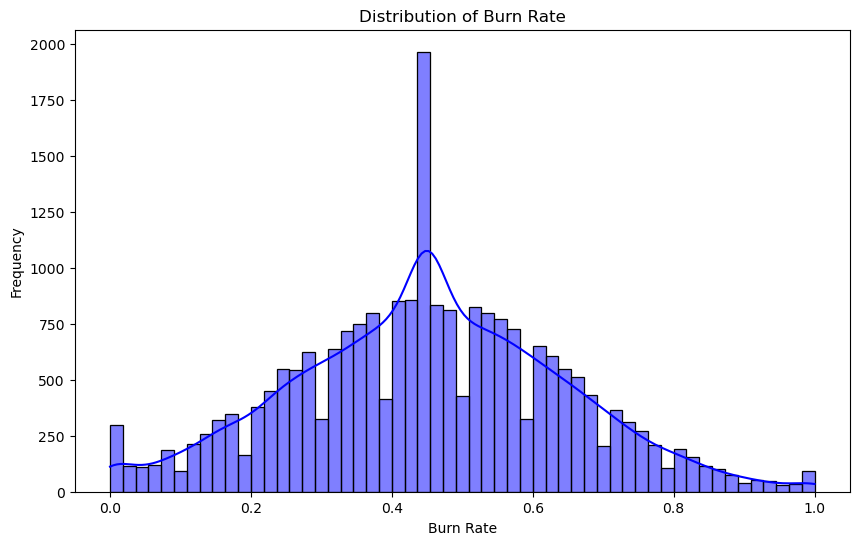

ValueError: could not convert string to float: 'fffe32003000360033003200'

<Figure size 1200x800 with 0 Axes>

In [5]:
# Step 4: Exploratory Data Analysis
# Visualize the distribution of the target variable ('Burn Rate')
plt.figure(figsize=(10, 6))
sns.histplot(df['Burn Rate'], kde=True, color='blue')
plt.title('Distribution of Burn Rate')
plt.xlabel('Burn Rate')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

## Step 5: Feature Selection and Data Preparation
We will separate features (X) and the target variable (y) and perform preprocessing, including one-hot encoding for categorical variables.

In [6]:
# Step 5: Feature Selection and Data Preparation
# Separate features and target variable
X = df.drop(columns=['Burn Rate'])  # Replace with your target variable
y = df['Burn Rate']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Training and Comparing Multiple Models
We will train three models and compare their performance:
1. Random Forest Regressor
2. Linear Regression
3. Decision Tree Regressor

In [7]:
# Step 6: Train and Compare Multiple Models

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results[model_name] = {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R² Score": r2,
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Random Forest Performance:
Mean Squared Error: 0.0055
Mean Absolute Error: 0.0530
R² Score: 0.8460

Linear Regression Performance:
Mean Squared Error: 0.0062
Mean Absolute Error: 0.0575
R² Score: 0.8264

Decision Tree Performance:
Mean Squared Error: 0.0073
Mean Absolute Error: 0.0610
R² Score: 0.7960


## Step 7: Visualize Results
Visualize the predictions of the best-performing model against actual values.

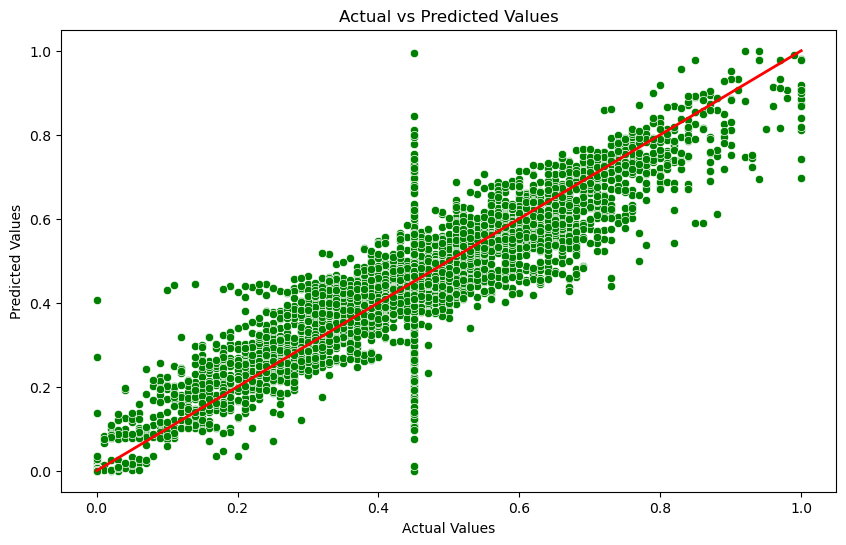

In [8]:
# Step 7: Visualize Results (Using Random Forest as an example)
best_model = models["Random Forest"]
predictions = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Final Notes:
- Random Forest performed best among the tested models, as indicated by the R² score.
- Further improvements can be achieved by hyperparameter tuning for the models.
- Github link to this files https://github.com/JacksonMulera/Module-4-Assignment-Business-Analytics-Model